# INTEGRATE Synthetic Case Study example
An example using inverting data obtained from synthetic reference model


In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # # # # # #%load_ext autoreload
    # # # # # # # # # #%autoreload 2
    pass

import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
hardcopy=True

Notebook detected. Parallel processing is OK


## Create The reference model and data

In [2]:
# Create reference model

# select the type of referenc model
case = 'wedge'
case = '3layer'

z_max = 60
rho = [120,10,120]
#rho = [10,120,10]
rho = [120,10,10]
#rho = [720,10,520]
dx=0.1
if case.lower() == 'wedge':
    # Make Wedge MODEL
    M_ref, x_ref, z_ref = ig.synthetic_case(case='Wedge', wedge_angle=10, dx=dx, z_max=z_max, dz=.5, x_max=100, z1=15, rho = rho)
elif case.lower() == '3layer':
    # Make 3 layer MODEL
    M_ref, x_ref, z_ref = ig.synthetic_case(case='3layer', dx=dx, rho1_1 = rho[0], rho1_2 = rho[1], rho3=rho[2], x_max = 100, x_range = 10)

# Create reference data
f_data_h5 = '%s_%d.h5' % (case,z_max)    
thickness = np.diff(z_ref)
# Get an exampele of a GEX file
file_gex = ig.get_case_data(case='DAUGAARD', filelist=['TX07_20231016_2x4_RC20-33.gex'])[0]
D_ref = ig.forward_gaaem(C=1./M_ref, thickness=thickness, file_gex=file_gex)

# Initialize random number generator to sample from noise model!
rng = np.random.default_rng()
d_std = 0.05
d_std_base = 1e-12
D_std = d_std * D_ref + d_std_base
D_noise = rng.normal(0, D_std, D_ref.shape)
D_obs = D_ref + D_noise

# Write to hdf5 file
# Add option to reomve existing file before writing!
f_data_h5 = ig.write_data_gaussian(D_obs, D_std = D_std, f_data_h5 = f_data_h5, id=1, showInfo=1)
#check_data(f_data_h5)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD


gatdaem1d:   0%|                                              | 0/1000 [00:00<?, ?it/s]

gatdaem1d:   7%|██▍                                  | 67/1000 [00:01<00:14, 66.60it/s]

gatdaem1d:  14%|████▊                               | 135/1000 [00:02<00:12, 67.32it/s]

gatdaem1d:  20%|███████▎                            | 203/1000 [00:03<00:11, 67.24it/s]

gatdaem1d:  27%|█████████▊                          | 271/1000 [00:04<00:10, 67.20it/s]

gatdaem1d:  34%|████████████▏                       | 339/1000 [00:05<00:09, 67.30it/s]

gatdaem1d:  41%|██████████████▋                     | 407/1000 [00:06<00:08, 67.07it/s]

gatdaem1d:  48%|█████████████████                   | 475/1000 [00:07<00:07, 66.98it/s]

gatdaem1d:  54%|███████████████████▌                | 543/1000 [00:08<00:06, 67.02it/s]

gatdaem1d:  61%|█████████████████████▉              | 611/1000 [00:09<00:05, 66.79it/s]

gatdaem1d:  68%|████████████████████████▍           | 678/1000 [00:10<00:04, 66.51it/s]

gatdaem1d:  74%|██████████████████████████▊         | 745/1000 [00:11<00:03, 66.39it/s]

gatdaem1d:  81%|█████████████████████████████▏      | 812/1000 [00:12<00:02, 66.01it/s]

gatdaem1d:  88%|███████████████████████████████▋    | 879/1000 [00:13<00:01, 65.66it/s]

gatdaem1d:  94%|██████████████████████████████████  | 945/1000 [00:14<00:00, 65.48it/s]

Creating 3layer_60.h5:/UTMX
Creating 3layer_60.h5:/UTMY
Creating 3layer_60.h5:/LINE
Creating 3layer_60.h5:/ELEVATION
Adding group 3layer_60.h5:D1 


plot_data: Found data set D1
plot_data: Using data set D1


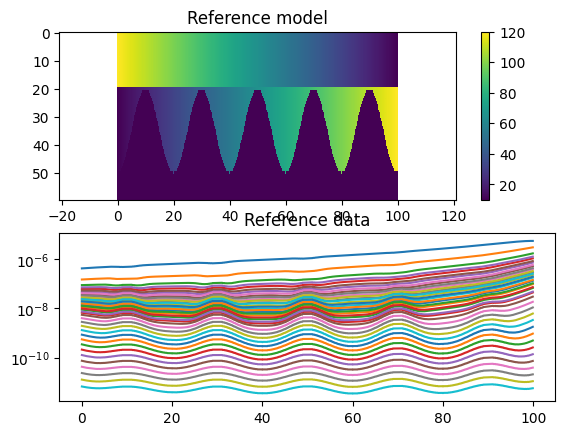

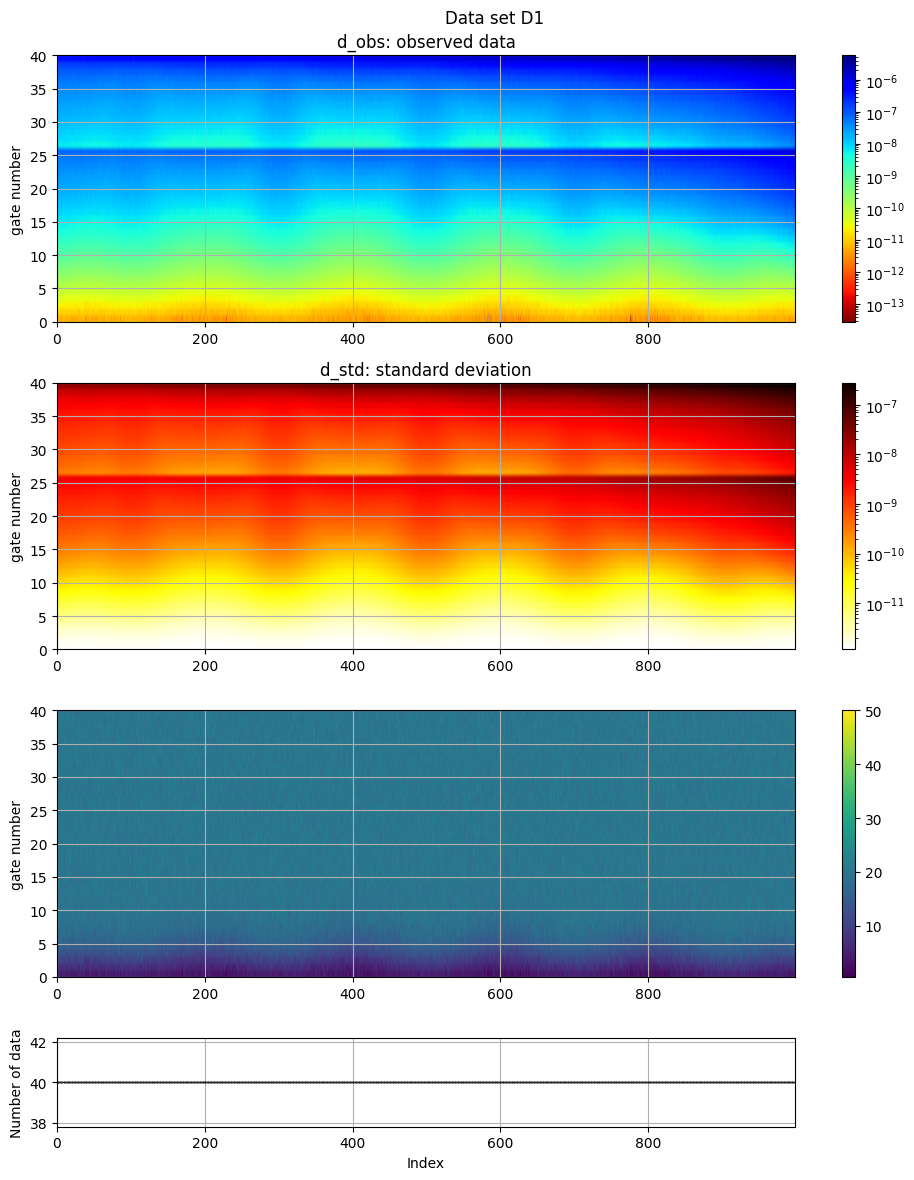

In [3]:
# Plot the model and data
plt.figure()
plt.subplot(2,1,1)
xx_ref, zz_ref = np.meshgrid(x_ref, z_ref)
plt.pcolor(xx_ref,zz_ref,M_ref.T)
plt.gca().invert_yaxis()
plt.axis('equal')
plt.colorbar()
plt.title('Reference model')
plt.subplot(2,1,2)
plt.semilogy(x_ref,D_ref);
plt.title('Reference data')

ig.plot_data(f_data_h5)

## Create prior model and data

prior_layered:   0%|                                        | 0/500000 [00:00<?, ?it/s]

prior_layered:  27%|██████▏                | 135751/500000 [00:01<00:02, 135750.45it/s]

prior_layered:  54%|████████████▌          | 272001/500000 [00:02<00:01, 136041.69it/s]

prior_layered:  82%|██████████████████▊    | 409216/500000 [00:03<00:00, 136577.37it/s]

File PRIOR_UNIFORM_NL_2-3_log-uniform_N500000.h5 does not exist.


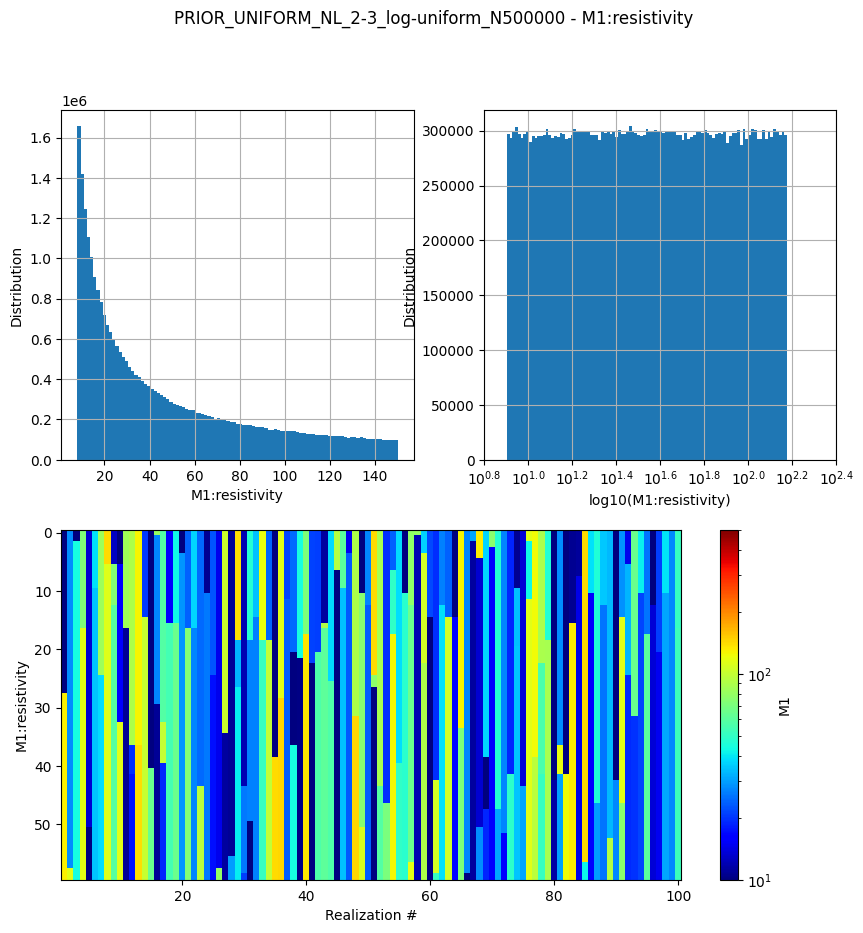

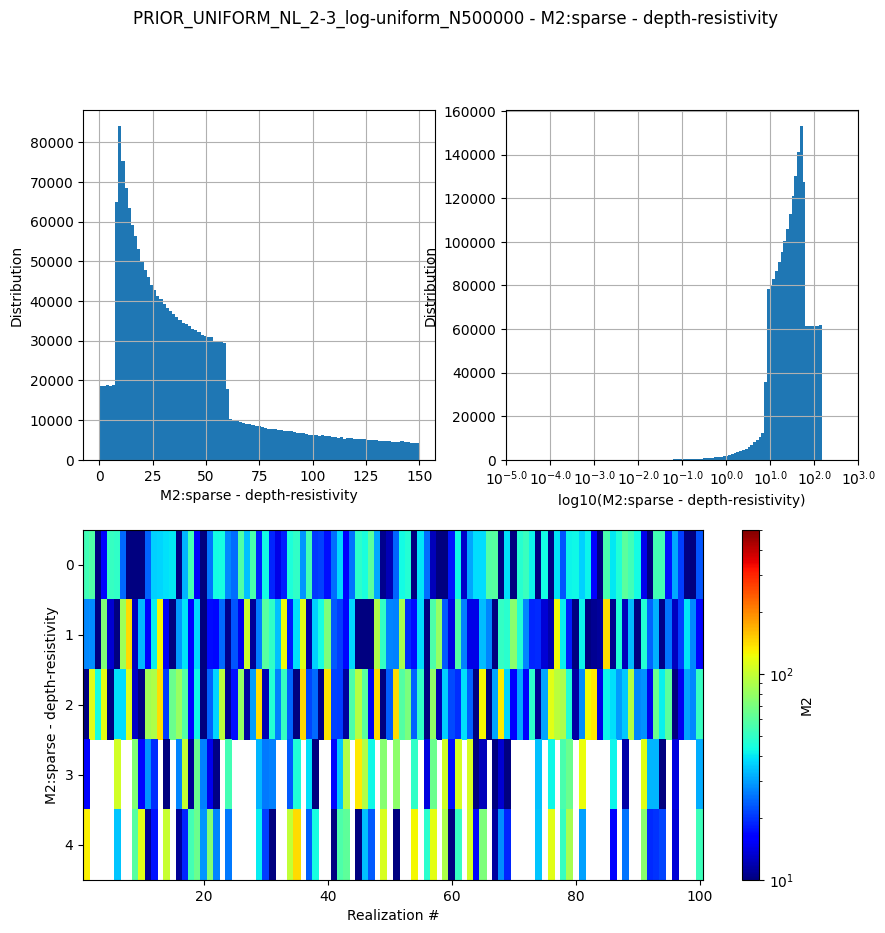

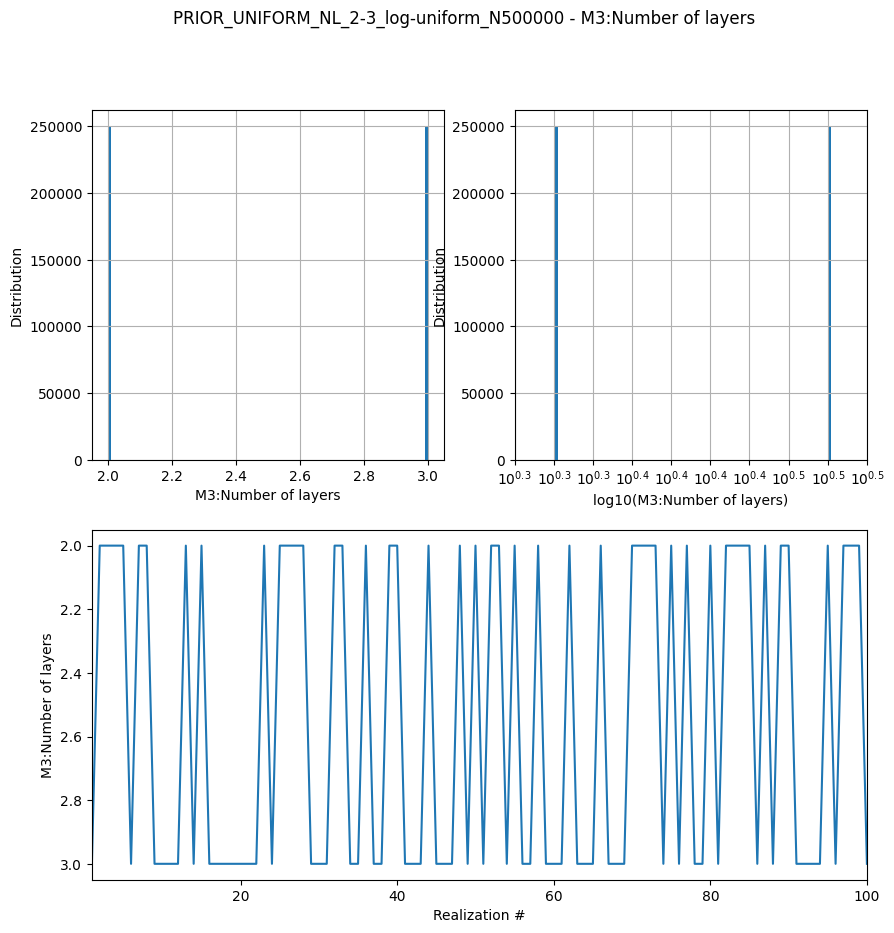

In [4]:
N=500000 # sample size 
RHO_dist='log-uniform'
#RHO_dist='uniform'
RHO_min=0.8*min(rho)
RHO_max=1.25*max(rho)
NLAY_min=2
NLAY_max=3
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist=RHO_dist, RHO_min=RHO_min, RHO_max=RHO_max)

ig.plot_prior_stats(f_prior_h5)

prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/15625 [00:00<?, ?it/s]

gatdaem1d:   0%|                                    | 41/15625 [00:01<06:25, 40.44it/s]

gatdaem1d:   0%|                                    | 39/15625 [00:01<06:40, 38.95it/s]

gatdaem1d:   0%|                                    | 41/15625 [00:01<06:30, 39.95it/s]

gatdaem1d:   0%|                                    | 38/15625 [00:01<07:00, 37.08it/s]

gatdaem1d:   0%|                                    | 40/15625 [00:01<06:35, 39.44it/s]

gatdaem1d:   0%|                                    | 37/15625 [00:01<07:10, 36.22it/s]

gatdaem1d:   0%|                                    | 47/15625 [00:01<05:31, 46.95it/s]

gatdaem1d:   0%|                                    | 50/15625 [00:01<05:18, 48.98it/s]

gatdaem1d:   0%|                                    | 49/15625 [00:01<05:20, 48.58it/s]

gatdaem1d:   0%|                                    | 32/15625 [00:01<08:19, 31.22it/s]

gatdaem1d:   0%|                                    | 32/15625 [00:01<08:09, 31.83it/s]

gatdaem1d:   0%|                                    | 37/15625 [00:01<07:11, 36.11it/s]

gatdaem1d:   0%|                                    | 37/15625 [00:01<07:12, 36.03it/s]

gatdaem1d:   0%|                                    | 33/15625 [00:01<08:04, 32.16it/s]

gatdaem1d:   0%|                                    | 37/15625 [00:01<07:10, 36.21it/s]

gatdaem1d:   0%|                                    | 46/15625 [00:01<05:46, 45.02it/s]

gatdaem1d:   0%|                                    | 37/15625 [00:01<07:10, 36.23it/s]

gatdaem1d:   0%|                                    | 36/15625 [00:01<07:17, 35.59it/s]

gatdaem1d:   0%|                                    | 36/15625 [00:01<07:19, 35.45it/s]

gatdaem1d:   0%|                                    | 44/15625 [00:01<05:55, 43.83it/s]

gatdaem1d:   0%|                                    | 45/15625 [00:01<05:47, 44.81it/s]

gatdaem1d:   0%|                                    | 45/15625 [00:01<05:52, 44.18it/s]

gatdaem1d:   0%|                                    | 45/15625 [00:01<05:52, 44.22it/s]

gatdaem1d:   0%|                                    | 48/15625 [00:01<05:30, 47.08it/s]

gatdaem1d:   0%|                                    | 45/15625 [00:01<05:50, 44.49it/s]

gatdaem1d:   0%|                                    | 48/15625 [00:01<05:31, 47.04it/s]

gatdaem1d:   0%|                                    | 45/15625 [00:01<05:52, 44.22it/s]

gatdaem1d:   0%|                                    | 44/15625 [00:01<06:00, 43.24it/s]

gatdaem1d:   0%|                                    | 47/15625 [00:01<05:38, 46.09it/s]

gatdaem1d:   0%|                                    | 45/15625 [00:01<05:48, 44.72it/s]

gatdaem1d:   0%|                                    | 31/15625 [00:01<08:37, 30.14it/s]

gatdaem1d:   0%|                                    | 33/15625 [00:01<08:05, 32.11it/s]

gatdaem1d:   1%|▏                                   | 82/15625 [00:02<06:17, 41.16it/s]

gatdaem1d:   1%|▏                                   | 81/15625 [00:02<06:24, 40.42it/s]

gatdaem1d:   1%|▏                                   | 99/15625 [00:02<05:24, 47.87it/s]

gatdaem1d:   0%|▏                                   | 76/15625 [00:02<07:12, 35.93it/s]

gatdaem1d:   0%|▏                                   | 78/15625 [00:02<06:32, 39.61it/s]

gatdaem1d:   1%|▏                                   | 94/15625 [00:02<05:41, 45.45it/s]

gatdaem1d:   0%|▏                                   | 67/15625 [00:02<07:43, 33.58it/s]

gatdaem1d:   1%|▏                                   | 82/15625 [00:02<06:51, 37.78it/s]

gatdaem1d:   1%|▏                                   | 81/15625 [00:02<07:02, 36.82it/s]

gatdaem1d:   0%|▏                                   | 69/15625 [00:02<07:35, 34.12it/s]

gatdaem1d:   0%|▏                                   | 74/15625 [00:02<07:15, 35.69it/s]

gatdaem1d:   0%|▏                                   | 74/15625 [00:02<07:04, 36.64it/s]

gatdaem1d:   1%|▏                                   | 80/15625 [00:02<07:06, 36.43it/s]

gatdaem1d:   0%|▏                                   | 74/15625 [00:02<07:15, 35.67it/s]

gatdaem1d:   1%|▏                                   | 90/15625 [00:02<05:47, 44.75it/s]

gatdaem1d:   0%|▏                                   | 72/15625 [00:02<07:33, 34.31it/s]

gatdaem1d:   1%|▏                                   | 90/15625 [00:02<05:50, 44.30it/s]

gatdaem1d:   0%|▏                                   | 74/15625 [00:02<07:49, 33.13it/s]

gatdaem1d:   1%|▏                                   | 90/15625 [00:02<05:53, 43.90it/s]

gatdaem1d:   0%|▏                                   | 72/15625 [00:02<07:38, 33.91it/s]

gatdaem1d:   1%|▏                                   | 90/15625 [00:02<05:49, 44.45it/s]

gatdaem1d:   1%|▏                                   | 96/15625 [00:02<05:35, 46.32it/s]

gatdaem1d:   1%|▏                                   | 96/15625 [00:02<05:40, 45.57it/s]

gatdaem1d:   1%|▏                                   | 94/15625 [00:02<05:34, 46.49it/s]

gatdaem1d:   1%|▏                                   | 89/15625 [00:02<05:55, 43.75it/s]

gatdaem1d:   0%|▏                                   | 76/15625 [00:02<06:43, 38.57it/s]

gatdaem1d:   1%|▏                                   | 92/15625 [00:02<06:36, 39.17it/s]

gatdaem1d:   0%|▏                                   | 73/15625 [00:02<07:07, 36.41it/s]

gatdaem1d:   1%|▏                                   | 90/15625 [00:02<06:23, 40.46it/s]

gatdaem1d:   1%|▏                                   | 88/15625 [00:02<07:16, 35.56it/s]

gatdaem1d:   1%|▏                                   | 98/15625 [00:02<06:59, 37.05it/s]

gatdaem1d:   1%|▏                                   | 90/15625 [00:02<06:55, 37.37it/s]

gatdaem1d:   1%|▎                                  | 126/15625 [00:03<06:07, 42.12it/s]

gatdaem1d:   1%|▎                                  | 124/15625 [00:03<06:06, 42.32it/s]

gatdaem1d:   1%|▎                                  | 116/15625 [00:03<06:55, 37.30it/s]

gatdaem1d:   1%|▎                                  | 140/15625 [00:03<05:43, 45.05it/s]

gatdaem1d:   1%|▎                                  | 128/15625 [00:03<06:15, 41.22it/s]

gatdaem1d:   1%|▏                                  | 101/15625 [00:03<07:50, 32.98it/s]

gatdaem1d:   1%|▎                                  | 126/15625 [00:03<06:27, 40.03it/s]

gatdaem1d:   1%|▏                                  | 105/15625 [00:03<07:28, 34.63it/s]

gatdaem1d:   1%|▎                                  | 121/15625 [00:03<06:16, 41.22it/s]

gatdaem1d:   1%|▎                                  | 125/15625 [00:03<06:27, 40.03it/s]

gatdaem1d:   1%|▏                                  | 110/15625 [00:03<07:19, 35.30it/s]

gatdaem1d:   1%|▏                                  | 110/15625 [00:03<07:18, 35.37it/s]

gatdaem1d:   1%|▎                                  | 124/15625 [00:03<06:57, 37.15it/s]

gatdaem1d:   1%|▎                                  | 147/15625 [00:03<05:48, 44.47it/s]

gatdaem1d:   1%|▎                                  | 135/15625 [00:03<05:50, 44.19it/s]

gatdaem1d:   1%|▎                                  | 118/15625 [00:03<06:51, 37.66it/s]

gatdaem1d:   1%|▏                                  | 108/15625 [00:03<07:27, 34.66it/s]

gatdaem1d:   1%|▎                                  | 135/15625 [00:03<05:51, 44.10it/s]

gatdaem1d:   1%|▎                                  | 141/15625 [00:03<05:32, 46.52it/s]

gatdaem1d:   1%|▎                                  | 143/15625 [00:03<05:40, 45.46it/s]

gatdaem1d:   1%|▎                                  | 115/15625 [00:03<06:56, 37.28it/s]

gatdaem1d:   1%|▎                                  | 118/15625 [00:03<06:28, 39.87it/s]

gatdaem1d:   1%|▎                                  | 135/15625 [00:03<06:31, 39.57it/s]

gatdaem1d:   1%|▏                                  | 107/15625 [00:03<08:24, 30.79it/s]

gatdaem1d:   1%|▎                                  | 132/15625 [00:03<06:51, 37.61it/s]

gatdaem1d:   1%|▎                                  | 134/15625 [00:03<06:38, 38.86it/s]

gatdaem1d:   1%|▎                                  | 142/15625 [00:03<06:15, 41.28it/s]

gatdaem1d:   1%|▎                                  | 143/15625 [00:03<06:26, 40.10it/s]

gatdaem1d:   1%|▎                                  | 129/15625 [00:03<06:51, 37.65it/s]

gatdaem1d:   1%|▎                                  | 133/15625 [00:03<06:40, 38.68it/s]

gatdaem1d:   1%|▎                                  | 131/15625 [00:03<06:59, 36.97it/s]

gatdaem1d:   1%|▎                                  | 129/15625 [00:03<07:17, 35.45it/s]

gatdaem1d:   1%|▍                                  | 170/15625 [00:04<06:00, 42.81it/s]

gatdaem1d:   1%|▍                                  | 175/15625 [00:04<05:56, 43.38it/s]

gatdaem1d:   1%|▍                                  | 171/15625 [00:04<06:09, 41.88it/s]

gatdaem1d:   1%|▎                                  | 138/15625 [00:04<07:32, 34.24it/s]

gatdaem1d:   1%|▎                                  | 154/15625 [00:04<07:03, 36.56it/s]

gatdaem1d:   1%|▍                                  | 168/15625 [00:04<05:56, 43.34it/s]

gatdaem1d:   1%|▍                                  | 170/15625 [00:04<06:09, 41.77it/s]

gatdaem1d:   1%|▎                                  | 167/15625 [00:04<06:15, 41.11it/s]

gatdaem1d:   1%|▎                                  | 153/15625 [00:04<06:50, 37.71it/s]

gatdaem1d:   1%|▍                                  | 180/15625 [00:04<05:49, 44.19it/s]

gatdaem1d:   1%|▎                                  | 160/15625 [00:04<06:34, 39.20it/s]

gatdaem1d:   1%|▎                                  | 144/15625 [00:04<07:21, 35.07it/s]

gatdaem1d:   1%|▎                                  | 162/15625 [00:04<06:59, 36.82it/s]

gatdaem1d:   1%|▎                                  | 140/15625 [00:04<07:49, 32.95it/s]

gatdaem1d:   1%|▍                                  | 180/15625 [00:04<05:48, 44.26it/s]

gatdaem1d:   1%|▎                                  | 146/15625 [00:04<07:36, 33.93it/s]

gatdaem1d:   1%|▍                                  | 188/15625 [00:04<05:33, 46.31it/s]

gatdaem1d:   1%|▎                                  | 159/15625 [00:04<06:29, 39.72it/s]

gatdaem1d:   1%|▍                                  | 186/15625 [00:04<06:28, 39.76it/s]

gatdaem1d:   1%|▎                                  | 163/15625 [00:04<06:12, 41.54it/s]

gatdaem1d:   1%|▍                                  | 179/15625 [00:04<06:17, 40.95it/s]

gatdaem1d:   1%|▎                                  | 142/15625 [00:04<08:01, 32.17it/s]

gatdaem1d:   1%|▍                                  | 192/15625 [00:04<06:23, 40.26it/s]

gatdaem1d:   1%|▍                                  | 177/15625 [00:04<06:24, 40.15it/s]

gatdaem1d:   1%|▍                                  | 188/15625 [00:04<06:08, 41.84it/s]

gatdaem1d:   1%|▍                                  | 178/15625 [00:04<06:19, 40.69it/s]

gatdaem1d:   1%|▍                                  | 189/15625 [00:04<06:20, 40.55it/s]

gatdaem1d:   1%|▍                                  | 168/15625 [00:04<07:02, 36.62it/s]

gatdaem1d:   1%|▍                                  | 174/15625 [00:04<06:54, 37.31it/s]

gatdaem1d:   1%|▍                                  | 184/15625 [00:04<06:30, 39.57it/s]

gatdaem1d:   1%|▎                                  | 165/15625 [00:04<07:19, 35.15it/s]

gatdaem1d:   1%|▍                                  | 169/15625 [00:04<07:14, 35.53it/s]

gatdaem1d:   1%|▍                                  | 222/15625 [00:05<05:45, 44.53it/s]

gatdaem1d:   1%|▍                                  | 216/15625 [00:05<06:00, 42.77it/s]

gatdaem1d:   1%|▍                                  | 174/15625 [00:05<07:27, 34.57it/s]

gatdaem1d:   1%|▍                                  | 215/15625 [00:05<05:46, 44.47it/s]

gatdaem1d:   1%|▍                                  | 214/15625 [00:05<06:03, 42.41it/s]

gatdaem1d:   1%|▍                                  | 211/15625 [00:05<06:07, 41.91it/s]

gatdaem1d:   1%|▍                                  | 191/15625 [00:05<07:13, 35.56it/s]

gatdaem1d:   1%|▍                                  | 213/15625 [00:05<06:31, 39.33it/s]

gatdaem1d:   1%|▍                                  | 206/15625 [00:05<06:34, 39.13it/s]

gatdaem1d:   1%|▍                                  | 176/15625 [00:05<07:38, 33.67it/s]

gatdaem1d:   1%|▍                                  | 180/15625 [00:05<07:23, 34.81it/s]

gatdaem1d:   1%|▍                                  | 190/15625 [00:05<06:53, 37.29it/s]

gatdaem1d:   1%|▍                                  | 191/15625 [00:05<07:05, 36.31it/s]

gatdaem1d:   2%|▌                                  | 235/15625 [00:05<05:34, 45.99it/s]

gatdaem1d:   1%|▍                                  | 200/15625 [00:05<06:48, 37.80it/s]

gatdaem1d:   1%|▍                                  | 203/15625 [00:05<06:14, 41.22it/s]

gatdaem1d:   1%|▍                                  | 208/15625 [00:05<06:03, 42.47it/s]

gatdaem1d:   1%|▌                                  | 224/15625 [00:05<06:06, 42.05it/s]

gatdaem1d:   1%|▍                                  | 176/15625 [00:05<07:51, 32.73it/s]

gatdaem1d:   1%|▌                                  | 225/15625 [00:05<06:15, 41.00it/s]

gatdaem1d:   1%|▍                                  | 220/15625 [00:05<06:15, 41.01it/s]

gatdaem1d:   1%|▌                                  | 227/15625 [00:05<06:38, 38.67it/s]

gatdaem1d:   1%|▌                                  | 225/15625 [00:05<06:27, 39.76it/s]

gatdaem1d:   1%|▍                                  | 223/15625 [00:05<06:06, 41.99it/s]

gatdaem1d:   1%|▌                                  | 233/15625 [00:05<06:40, 38.44it/s]

gatdaem1d:   2%|▌                                  | 236/15625 [00:05<06:01, 42.57it/s]

gatdaem1d:   1%|▌                                  | 229/15625 [00:05<06:12, 41.31it/s]

gatdaem1d:   1%|▌                                  | 231/15625 [00:05<06:26, 39.86it/s]

gatdaem1d:   1%|▍                                  | 206/15625 [00:05<07:06, 36.15it/s]

gatdaem1d:   1%|▍                                  | 212/15625 [00:05<07:08, 35.96it/s]

gatdaem1d:   1%|▍                                  | 204/15625 [00:05<07:06, 36.15it/s]

gatdaem1d:   1%|▍                                  | 205/15625 [00:05<07:28, 34.38it/s]

gatdaem1d:   2%|▌                                  | 270/15625 [00:06<05:37, 45.49it/s]

gatdaem1d:   2%|▌                                  | 260/15625 [00:06<05:56, 43.11it/s]

gatdaem1d:   2%|▌                                  | 262/15625 [00:06<05:39, 45.30it/s]

gatdaem1d:   1%|▍                                  | 213/15625 [00:06<07:11, 35.73it/s]

gatdaem1d:   2%|▌                                  | 236/15625 [00:06<06:39, 38.50it/s]

gatdaem1d:   1%|▍                                  | 219/15625 [00:06<06:59, 36.69it/s]

gatdaem1d:   1%|▌                                  | 225/15625 [00:06<06:45, 38.02it/s]

gatdaem1d:   2%|▌                                  | 235/15625 [00:06<06:28, 39.63it/s]

gatdaem1d:   2%|▌                                  | 246/15625 [00:06<06:41, 38.30it/s]

gatdaem1d:   2%|▋                                  | 282/15625 [00:06<05:32, 46.16it/s]

gatdaem1d:   2%|▌                                  | 257/15625 [00:06<06:28, 39.57it/s]

gatdaem1d:   2%|▌                                  | 239/15625 [00:06<06:49, 37.61it/s]

gatdaem1d:   2%|▌                                  | 253/15625 [00:06<06:49, 37.50it/s]

gatdaem1d:   2%|▌                                  | 248/15625 [00:06<06:03, 42.30it/s]

gatdaem1d:   2%|▌                                  | 253/15625 [00:06<05:56, 43.17it/s]

gatdaem1d:   2%|▌                                  | 253/15625 [00:06<06:46, 37.83it/s]

gatdaem1d:   2%|▌                                  | 269/15625 [00:06<05:57, 42.90it/s]

gatdaem1d:   1%|▍                                  | 212/15625 [00:06<07:37, 33.72it/s]

gatdaem1d:   2%|▌                                  | 264/15625 [00:06<06:06, 41.87it/s]

gatdaem1d:   2%|▌                                  | 268/15625 [00:06<05:58, 42.88it/s]

gatdaem1d:   2%|▋                                  | 280/15625 [00:06<06:14, 40.96it/s]

gatdaem1d:   2%|▋                                  | 284/15625 [00:06<05:48, 43.99it/s]

gatdaem1d:   2%|▌                                  | 267/15625 [00:06<06:32, 39.08it/s]

gatdaem1d:   2%|▌                                  | 267/15625 [00:06<06:54, 37.02it/s]

gatdaem1d:   2%|▌                                  | 271/15625 [00:06<06:19, 40.51it/s]

gatdaem1d:   2%|▌                                  | 243/15625 [00:06<07:07, 35.94it/s]

gatdaem1d:   1%|▌                                  | 228/15625 [00:06<08:10, 31.40it/s]

gatdaem1d:   2%|▌                                  | 266/15625 [00:06<06:52, 37.26it/s]

gatdaem1d:   2%|▌                                  | 249/15625 [00:06<07:07, 35.95it/s]

gatdaem1d:   2%|▌                                  | 241/15625 [00:06<07:10, 35.75it/s]

gatdaem1d:   2%|▌                                  | 272/15625 [00:06<06:43, 38.09it/s]

gatdaem1d:   2%|▌                                  | 240/15625 [00:06<07:27, 34.40it/s]

gatdaem1d:   2%|▋                                  | 317/15625 [00:07<05:33, 45.95it/s]

gatdaem1d:   2%|▋                                  | 309/15625 [00:07<05:34, 45.77it/s]

gatdaem1d:   2%|▌                                  | 249/15625 [00:07<07:09, 35.76it/s]

gatdaem1d:   2%|▋                                  | 304/15625 [00:07<06:06, 41.77it/s]

gatdaem1d:   2%|▋                                  | 281/15625 [00:07<06:20, 40.34it/s]

gatdaem1d:   2%|▌                                  | 258/15625 [00:07<06:51, 37.38it/s]

gatdaem1d:   2%|▌                                  | 271/15625 [00:07<06:19, 40.45it/s]

gatdaem1d:   2%|▋                                  | 280/15625 [00:07<06:12, 41.22it/s]

gatdaem1d:   2%|▋                                  | 329/15625 [00:07<05:30, 46.30it/s]

gatdaem1d:   2%|▋                                  | 293/15625 [00:07<05:56, 43.02it/s]

gatdaem1d:   2%|▋                                  | 285/15625 [00:07<06:53, 37.11it/s]

gatdaem1d:   2%|▌                                  | 277/15625 [00:07<06:55, 36.98it/s]

gatdaem1d:   2%|▋                                  | 297/15625 [00:07<05:53, 43.35it/s]

gatdaem1d:   2%|▋                                  | 314/15625 [00:07<05:53, 43.36it/s]

gatdaem1d:   2%|▌                                  | 257/15625 [00:07<06:54, 37.04it/s]

gatdaem1d:   2%|▋                                  | 297/15625 [00:07<06:47, 37.65it/s]

gatdaem1d:   2%|▋                                  | 291/15625 [00:07<07:11, 35.54it/s]

gatdaem1d:   2%|▋                                  | 313/15625 [00:07<05:51, 43.54it/s]

gatdaem1d:   2%|▋                                  | 327/15625 [00:07<05:58, 42.63it/s]

gatdaem1d:   2%|▋                                  | 330/15625 [00:07<05:42, 44.61it/s]

gatdaem1d:   2%|▋                                  | 292/15625 [00:07<07:06, 35.92it/s]

gatdaem1d:   2%|▋                                  | 307/15625 [00:07<06:27, 39.54it/s]

gatdaem1d:   2%|▋                                  | 288/15625 [00:07<06:37, 38.54it/s]

gatdaem1d:   2%|▌                                  | 264/15625 [00:07<07:52, 32.48it/s]

gatdaem1d:   2%|▋                                  | 312/15625 [00:07<06:32, 39.05it/s]

gatdaem1d:   2%|▋                                  | 305/15625 [00:07<07:08, 35.78it/s]

gatdaem1d:   2%|▋                                  | 307/15625 [00:07<06:53, 37.08it/s]

gatdaem1d:   2%|▋                                  | 317/15625 [00:07<06:21, 40.13it/s]

gatdaem1d:   2%|▋                                  | 286/15625 [00:07<07:21, 34.76it/s]

gatdaem1d:   2%|▋                                  | 304/15625 [00:07<07:07, 35.80it/s]

gatdaem1d:   2%|▌                                  | 277/15625 [00:07<07:22, 34.69it/s]

gatdaem1d:   2%|▌                                  | 275/15625 [00:07<07:41, 33.25it/s]

gatdaem1d:   2%|▊                                  | 364/15625 [00:08<05:33, 45.72it/s]

gatdaem1d:   2%|▊                                  | 357/15625 [00:08<05:30, 46.25it/s]

gatdaem1d:   2%|▋                                  | 326/15625 [00:08<06:08, 41.54it/s]

gatdaem1d:   2%|▋                                  | 317/15625 [00:08<06:05, 41.93it/s]

gatdaem1d:   2%|▋                                  | 325/15625 [00:08<06:02, 42.17it/s]

gatdaem1d:   2%|▋                                  | 285/15625 [00:08<07:33, 33.80it/s]

gatdaem1d:   2%|▊                                  | 376/15625 [00:08<05:30, 46.20it/s]

gatdaem1d:   2%|▊                                  | 346/15625 [00:08<06:23, 39.82it/s]

gatdaem1d:   2%|▋                                  | 296/15625 [00:08<07:07, 35.87it/s]

gatdaem1d:   2%|▊                                  | 338/15625 [00:08<05:51, 43.46it/s]

gatdaem1d:   2%|▊                                  | 342/15625 [00:08<05:50, 43.56it/s]

gatdaem1d:   2%|▊                                  | 359/15625 [00:08<05:49, 43.62it/s]

gatdaem1d:   2%|▋                                  | 302/15625 [00:08<06:29, 39.30it/s]

gatdaem1d:   2%|▋                                  | 315/15625 [00:08<06:59, 36.52it/s]

gatdaem1d:   2%|▋                                  | 327/15625 [00:08<07:13, 35.26it/s]

gatdaem1d:   2%|▊                                  | 357/15625 [00:08<05:53, 43.19it/s]

gatdaem1d:   2%|▋                                  | 323/15625 [00:08<07:16, 35.09it/s]

gatdaem1d:   2%|▊                                  | 336/15625 [00:08<06:57, 36.59it/s]

gatdaem1d:   2%|▊                                  | 374/15625 [00:08<05:48, 43.74it/s]

gatdaem1d:   2%|▋                                  | 329/15625 [00:08<07:07, 35.76it/s]

gatdaem1d:   2%|▋                                  | 333/15625 [00:08<06:19, 40.25it/s]

gatdaem1d:   2%|▋                                  | 298/15625 [00:08<07:50, 32.55it/s]

gatdaem1d:   2%|▊                                  | 358/15625 [00:08<06:12, 40.99it/s]

gatdaem1d:   2%|▊                                  | 342/15625 [00:08<07:08, 35.67it/s]

gatdaem1d:   2%|▊                                  | 375/15625 [00:08<06:08, 41.34it/s]

gatdaem1d:   2%|▊                                  | 347/15625 [00:08<06:44, 37.72it/s]

gatdaem1d:   2%|▋                                  | 319/15625 [00:08<06:58, 36.60it/s]

gatdaem1d:   2%|▊                                  | 345/15625 [00:08<07:06, 35.85it/s]

gatdaem1d:   2%|▊                                  | 347/15625 [00:08<07:01, 36.26it/s]

gatdaem1d:   2%|▋                                  | 321/15625 [00:08<07:38, 33.35it/s]

gatdaem1d:   2%|▊                                  | 358/15625 [00:09<06:43, 37.80it/s]

gatdaem1d:   2%|▋                                  | 309/15625 [00:08<07:44, 33.00it/s]

gatdaem1d:   3%|▉                                  | 404/15625 [00:09<05:37, 45.03it/s]

gatdaem1d:   2%|▊                                  | 368/15625 [00:09<06:09, 41.29it/s]

gatdaem1d:   3%|▉                                  | 410/15625 [00:09<05:50, 43.42it/s]

gatdaem1d:   2%|▊                                  | 359/15625 [00:09<06:13, 40.84it/s]

gatdaem1d:   2%|▊                                  | 368/15625 [00:09<06:11, 41.10it/s]

gatdaem1d:   2%|▊                                  | 335/15625 [00:09<06:57, 36.65it/s]

gatdaem1d:   2%|▋                                  | 319/15625 [00:09<08:01, 31.79it/s]

gatdaem1d:   2%|▊                                  | 342/15625 [00:09<06:33, 38.81it/s]

gatdaem1d:   2%|▊                                  | 382/15625 [00:09<06:07, 41.45it/s]

gatdaem1d:   2%|▊                                  | 386/15625 [00:09<06:07, 41.48it/s]

gatdaem1d:   3%|▉                                  | 403/15625 [00:09<06:04, 41.72it/s]

gatdaem1d:   2%|▊                                  | 374/15625 [00:09<06:54, 36.79it/s]

gatdaem1d:   2%|▊                                  | 387/15625 [00:09<07:01, 36.17it/s]

gatdaem1d:   3%|▉                                  | 423/15625 [00:09<06:07, 41.35it/s]

gatdaem1d:   2%|▊                                  | 337/15625 [00:09<07:26, 34.24it/s]

gatdaem1d:   2%|▊                                  | 374/15625 [00:09<06:25, 39.52it/s]

gatdaem1d:   2%|▊                                  | 352/15625 [00:09<07:40, 33.16it/s]

gatdaem1d:   2%|▊                                  | 363/15625 [00:09<07:41, 33.05it/s]

gatdaem1d:   2%|▊                                  | 359/15625 [00:09<07:41, 33.10it/s]

gatdaem1d:   3%|▉                                  | 400/15625 [00:09<06:16, 40.42it/s]

gatdaem1d:   2%|▊                                  | 386/15625 [00:09<06:40, 38.07it/s]

gatdaem1d:   2%|▊                                  | 359/15625 [00:09<06:47, 37.44it/s]

gatdaem1d:   3%|▉                                  | 401/15625 [00:09<06:40, 38.01it/s]

gatdaem1d:   2%|▊                                  | 378/15625 [00:10<07:34, 33.56it/s]

gatdaem1d:   2%|▊                                  | 366/15625 [00:10<07:55, 32.08it/s]

gatdaem1d:   3%|▉                                  | 419/15625 [00:10<06:35, 38.47it/s]

gatdaem1d:   2%|▊                                  | 382/15625 [00:10<07:30, 33.81it/s]

gatdaem1d:   2%|▊                                  | 355/15625 [00:10<07:59, 31.82it/s]

gatdaem1d:   2%|▊                                  | 384/15625 [00:10<07:27, 34.05it/s]

gatdaem1d:   3%|▉                                  | 410/15625 [00:10<06:10, 41.10it/s]

gatdaem1d:   3%|█                                  | 450/15625 [00:10<05:42, 44.29it/s]

gatdaem1d:   2%|▊                                  | 343/15625 [00:10<08:05, 31.49it/s]

gatdaem1d:   3%|▉                                  | 402/15625 [00:10<06:08, 41.33it/s]

gatdaem1d:   2%|▊                                  | 381/15625 [00:10<06:27, 39.36it/s]

gatdaem1d:   3%|▉                                  | 411/15625 [00:10<06:07, 41.38it/s]

gatdaem1d:   3%|▉                                  | 397/15625 [00:10<07:18, 34.74it/s]

gatdaem1d:   3%|▉                                  | 417/15625 [00:10<07:05, 35.75it/s]

gatdaem1d:   2%|▊                                  | 354/15625 [00:10<07:50, 32.49it/s]

gatdaem1d:   3%|▉                                  | 425/15625 [00:10<06:02, 41.87it/s]

gatdaem1d:   2%|▊                                  | 381/15625 [00:10<06:37, 38.37it/s]

gatdaem1d:   3%|▉                                  | 430/15625 [00:10<06:00, 42.15it/s]

gatdaem1d:   3%|█                                  | 454/15625 [00:10<06:28, 39.01it/s]

gatdaem1d:   3%|▉                                  | 418/15625 [00:10<06:32, 38.70it/s]

gatdaem1d:   2%|▊                                  | 381/15625 [00:10<06:53, 36.90it/s]

gatdaem1d:   3%|▉                                  | 393/15625 [00:10<07:12, 35.19it/s]

gatdaem1d:   3%|▉                                  | 417/15625 [00:10<06:17, 40.27it/s]

gatdaem1d:   3%|▉                                  | 398/15625 [00:11<07:20, 34.60it/s]

gatdaem1d:   3%|▉                                  | 445/15625 [00:10<06:30, 38.88it/s]

gatdaem1d:   3%|▉                                  | 398/15625 [00:11<07:36, 33.33it/s]

gatdaem1d:   3%|▉                                  | 430/15625 [00:10<06:22, 39.71it/s]

gatdaem1d:   3%|▉                                  | 424/15625 [00:11<07:21, 34.42it/s]

gatdaem1d:   3%|▉                                  | 441/15625 [00:10<06:22, 39.75it/s]

gatdaem1d:   3%|█                                  | 466/15625 [00:10<06:29, 38.89it/s]

gatdaem1d:   3%|▉                                  | 403/15625 [00:10<06:29, 39.12it/s]

gatdaem1d:   3%|▉                                  | 400/15625 [00:11<07:48, 32.51it/s]

gatdaem1d:   3%|▉                                  | 412/15625 [00:11<07:44, 32.76it/s]

gatdaem1d:   3%|▉                                  | 417/15625 [00:11<07:26, 34.09it/s]

gatdaem1d:   3%|▉                                  | 399/15625 [00:11<07:13, 35.09it/s]

gatdaem1d:   3%|█                                  | 454/15625 [00:11<06:02, 41.85it/s]

gatdaem1d:   3%|█                                  | 496/15625 [00:11<05:39, 44.57it/s]

gatdaem1d:   3%|█                                  | 459/15625 [00:11<06:49, 37.04it/s]

gatdaem1d:   3%|▉                                  | 419/15625 [00:11<07:30, 33.74it/s]

gatdaem1d:   2%|▊                                  | 375/15625 [00:11<08:06, 31.33it/s]

gatdaem1d:   3%|▉                                  | 441/15625 [00:11<07:03, 35.86it/s]

gatdaem1d:   3%|█                                  | 447/15625 [00:11<05:59, 42.18it/s]

gatdaem1d:   3%|█                                  | 455/15625 [00:11<06:02, 41.89it/s]

gatdaem1d:   3%|▉                                  | 424/15625 [00:11<06:19, 40.06it/s]

gatdaem1d:   3%|█                                  | 461/15625 [00:11<06:41, 37.78it/s]

gatdaem1d:   3%|▉                                  | 433/15625 [00:11<07:26, 34.00it/s]

gatdaem1d:   2%|▊                                  | 388/15625 [00:11<07:45, 32.71it/s]

gatdaem1d:   3%|█                                  | 468/15625 [00:11<06:00, 42.10it/s]

gatdaem1d:   3%|█                                  | 474/15625 [00:11<05:55, 42.58it/s]

gatdaem1d:   3%|▉                                  | 420/15625 [00:11<06:44, 37.57it/s]

gatdaem1d:   3%|█                                  | 462/15625 [00:11<06:18, 40.04it/s]

gatdaem1d:   3%|▉                                  | 425/15625 [00:11<06:32, 38.73it/s]

gatdaem1d:   3%|▉                                  | 442/15625 [00:12<06:48, 37.18it/s]

gatdaem1d:   3%|▉                                  | 429/15625 [00:11<07:13, 35.02it/s]

gatdaem1d:   3%|▉                                  | 440/15625 [00:12<07:06, 35.63it/s]

gatdaem1d:   3%|█                                  | 494/15625 [00:12<06:51, 36.77it/s]

gatdaem1d:   3%|█                                  | 481/15625 [00:11<06:21, 39.68it/s]

gatdaem1d:   3%|█                                  | 459/15625 [00:12<07:26, 33.94it/s]

gatdaem1d:   3%|█                                  | 485/15625 [00:11<06:43, 37.52it/s]

gatdaem1d:   3%|█▏                                 | 506/15625 [00:11<06:32, 38.48it/s]

gatdaem1d:   3%|█                                  | 471/15625 [00:11<06:33, 38.51it/s]

gatdaem1d:   3%|▉                                  | 434/15625 [00:12<07:43, 32.79it/s]

gatdaem1d:   3%|█                                  | 458/15625 [00:12<06:54, 36.62it/s]

gatdaem1d:   3%|▉                                  | 443/15625 [00:12<06:49, 37.07it/s]

gatdaem1d:   3%|█                                  | 447/15625 [00:12<07:38, 33.14it/s]

gatdaem1d:   3%|█                                  | 452/15625 [00:12<07:25, 34.05it/s]

gatdaem1d:   3%|▉                                  | 443/15625 [00:12<06:44, 37.49it/s]

gatdaem1d:   3%|█▏                                 | 542/15625 [00:12<05:35, 44.89it/s]

gatdaem1d:   3%|█                                  | 462/15625 [00:12<06:57, 36.29it/s]

gatdaem1d:   3%|▉                                  | 409/15625 [00:12<07:55, 32.02it/s]

gatdaem1d:   3%|█                                  | 497/15625 [00:12<06:53, 36.55it/s]

gatdaem1d:   3%|█                                  | 483/15625 [00:12<06:47, 37.12it/s]

gatdaem1d:   3%|█                                  | 492/15625 [00:12<05:52, 42.89it/s]

gatdaem1d:   3%|█▏                                 | 503/15625 [00:12<06:30, 38.72it/s]

gatdaem1d:   3%|█                                  | 496/15625 [00:12<06:22, 39.50it/s]

gatdaem1d:   3%|█                                  | 477/15625 [00:12<06:53, 36.59it/s]

gatdaem1d:   3%|█                                  | 497/15625 [00:12<06:13, 40.55it/s]

gatdaem1d:   3%|▉                                  | 422/15625 [00:12<07:39, 33.06it/s]

gatdaem1d:   3%|█▏                                 | 511/15625 [00:12<05:57, 42.30it/s]

gatdaem1d:   3%|█▏                                 | 518/15625 [00:12<05:53, 42.75it/s]

gatdaem1d:   3%|█                                  | 460/15625 [00:12<06:37, 38.20it/s]

gatdaem1d:   3%|█▏                                 | 505/15625 [00:12<06:10, 40.82it/s]

gatdaem1d:   3%|█                                  | 465/15625 [00:12<06:44, 37.51it/s]

gatdaem1d:   3%|█                                  | 470/15625 [00:12<06:16, 40.30it/s]

gatdaem1d:   3%|█                                  | 480/15625 [00:13<06:46, 37.24it/s]

gatdaem1d:   3%|█                                  | 475/15625 [00:12<06:38, 38.02it/s]

gatdaem1d:   3%|█▏                                 | 538/15625 [00:13<06:31, 38.58it/s]

gatdaem1d:   3%|█                                  | 476/15625 [00:13<07:17, 34.60it/s]

gatdaem1d:   3%|█▏                                 | 530/15625 [00:12<06:23, 39.38it/s]

gatdaem1d:   3%|█                                  | 494/15625 [00:13<07:37, 33.07it/s]

gatdaem1d:   3%|█▏                                 | 521/15625 [00:13<06:40, 37.72it/s]

gatdaem1d:   3%|█                                  | 468/15625 [00:13<07:43, 32.74it/s]

gatdaem1d:   3%|█                                  | 500/15625 [00:13<06:39, 37.89it/s]

gatdaem1d:   3%|█                                  | 482/15625 [00:13<07:32, 33.43it/s]

gatdaem1d:   3%|█                                  | 496/15625 [00:13<06:51, 36.81it/s]

gatdaem1d:   3%|█                                  | 485/15625 [00:13<06:32, 38.56it/s]

gatdaem1d:   3%|█▏                                 | 510/15625 [00:13<06:56, 36.29it/s]

gatdaem1d:   3%|█▏                                 | 546/15625 [00:13<06:52, 36.55it/s]

gatdaem1d:   4%|█▎                                 | 588/15625 [00:13<05:32, 45.19it/s]

gatdaem1d:   3%|█▏                                 | 506/15625 [00:13<06:35, 38.23it/s]

gatdaem1d:   3%|█                                  | 453/15625 [00:13<07:08, 35.40it/s]

gatdaem1d:   3%|█                                  | 481/15625 [00:13<07:03, 35.77it/s]

gatdaem1d:   3%|█▏                                 | 537/15625 [00:13<05:48, 43.32it/s]

gatdaem1d:   3%|█▏                                 | 535/15625 [00:13<06:57, 36.12it/s]

gatdaem1d:   3%|█▏                                 | 521/15625 [00:13<06:55, 36.35it/s]

gatdaem1d:   3%|█▏                                 | 520/15625 [00:13<06:34, 38.26it/s]

gatdaem1d:   4%|█▏                                 | 554/15625 [00:13<05:55, 42.43it/s]

gatdaem1d:   3%|█                                  | 456/15625 [00:13<07:51, 32.19it/s]

gatdaem1d:   3%|█▏                                 | 543/15625 [00:13<06:49, 36.80it/s]

gatdaem1d:   4%|█▏                                 | 549/15625 [00:13<06:02, 41.56it/s]

gatdaem1d:   3%|█▏                                 | 536/15625 [00:13<06:45, 37.20it/s]

gatdaem1d:   4%|█▎                                 | 561/15625 [00:13<06:04, 41.29it/s]

gatdaem1d:   3%|█                                  | 499/15625 [00:13<06:47, 37.10it/s]

gatdaem1d:   3%|█▏                                 | 503/15625 [00:13<06:55, 36.42it/s]

gatdaem1d:   3%|█▏                                 | 538/15625 [00:13<06:45, 37.17it/s]

gatdaem1d:   3%|█▏                                 | 511/15625 [00:13<06:14, 40.39it/s]

gatdaem1d:   3%|█▏                                 | 524/15625 [00:14<06:27, 38.97it/s]

gatdaem1d:   3%|█▏                                 | 519/15625 [00:13<06:21, 39.56it/s]

gatdaem1d:   4%|█▎                                 | 585/15625 [00:14<06:09, 40.68it/s]

gatdaem1d:   3%|█▏                                 | 512/15625 [00:14<07:14, 34.78it/s]

gatdaem1d:   4%|█▎                                 | 573/15625 [00:13<06:14, 40.18it/s]

gatdaem1d:   3%|█▏                                 | 528/15625 [00:14<07:37, 33.01it/s]

gatdaem1d:   3%|█▏                                 | 512/15625 [00:14<07:02, 35.75it/s]

gatdaem1d:   4%|█▎                                 | 559/15625 [00:14<06:47, 36.98it/s]

gatdaem1d:   3%|█▏                                 | 516/15625 [00:14<07:30, 33.52it/s]

gatdaem1d:   3%|█▏                                 | 540/15625 [00:14<06:29, 38.75it/s]

gatdaem1d:   4%|█▏                                 | 549/15625 [00:14<06:20, 39.58it/s]

gatdaem1d:   3%|█▏                                 | 524/15625 [00:14<06:36, 38.12it/s]

gatdaem1d:   4%|█▍                                 | 634/15625 [00:14<05:32, 45.03it/s]

gatdaem1d:   3%|█                                  | 492/15625 [00:14<06:57, 36.26it/s]

gatdaem1d:   4%|█▏                                 | 547/15625 [00:14<07:05, 35.48it/s]

gatdaem1d:   4%|█▎                                 | 584/15625 [00:14<06:59, 35.87it/s]

gatdaem1d:   3%|█▏                                 | 539/15625 [00:14<06:56, 36.20it/s]

gatdaem1d:   4%|█▎                                 | 581/15625 [00:14<05:46, 43.38it/s]

gatdaem1d:   3%|█▏                                 | 518/15625 [00:14<07:12, 34.91it/s]

gatdaem1d:   4%|█▎                                 | 565/15625 [00:14<06:33, 38.24it/s]

gatdaem1d:   4%|█▎                                 | 572/15625 [00:14<07:01, 35.70it/s]

gatdaem1d:   4%|█▎                                 | 564/15625 [00:14<06:19, 39.67it/s]

gatdaem1d:   4%|█▎                                 | 597/15625 [00:14<05:53, 42.57it/s]

gatdaem1d:   3%|█                                  | 491/15625 [00:14<07:40, 32.88it/s]

gatdaem1d:   4%|█▎                                 | 605/15625 [00:14<05:58, 41.94it/s]

gatdaem1d:   3%|█▏                                 | 543/15625 [00:14<06:27, 38.93it/s]

gatdaem1d:   4%|█▎                                 | 574/15625 [00:14<06:54, 36.30it/s]

gatdaem1d:   3%|█▏                                 | 543/15625 [00:14<06:45, 37.18it/s]

gatdaem1d:   4%|█▎                                 | 581/15625 [00:14<06:59, 35.83it/s]

gatdaem1d:   4%|█▎                                 | 591/15625 [00:14<06:16, 39.92it/s]

gatdaem1d:   4%|█▎                                 | 568/15625 [00:15<06:14, 40.24it/s]

gatdaem1d:   4%|█▎                                 | 565/15625 [00:14<06:05, 41.20it/s]

gatdaem1d:   4%|█▍                                 | 631/15625 [00:15<05:56, 42.02it/s]

gatdaem1d:   4%|█▎                                 | 576/15625 [00:15<07:01, 35.73it/s]

gatdaem1d:   4%|█▍                                 | 616/15625 [00:15<06:07, 40.84it/s]

gatdaem1d:   4%|█▏                                 | 552/15625 [00:15<06:33, 38.27it/s]

gatdaem1d:   4%|█▏                                 | 547/15625 [00:15<07:22, 34.08it/s]

gatdaem1d:   4%|█▎                                 | 559/15625 [00:15<06:56, 36.17it/s]

gatdaem1d:   4%|█▎                                 | 562/15625 [00:15<07:46, 32.32it/s]

gatdaem1d:   4%|█▎                                 | 583/15625 [00:15<06:18, 39.75it/s]

gatdaem1d:   4%|█▎                                 | 597/15625 [00:15<06:52, 36.46it/s]

gatdaem1d:   4%|█▏                                 | 549/15625 [00:15<07:15, 34.63it/s]

gatdaem1d:   4%|█▎                                 | 592/15625 [00:15<06:11, 40.47it/s]

gatdaem1d:   4%|█▎                                 | 567/15625 [00:15<06:23, 39.29it/s]

gatdaem1d:   3%|█▏                                 | 529/15625 [00:15<07:00, 35.90it/s]

gatdaem1d:   4%|█▍                                 | 625/15625 [00:15<05:47, 43.18it/s]

gatdaem1d:   4%|█▎                                 | 583/15625 [00:15<07:10, 34.91it/s]

gatdaem1d:   4%|█▍                                 | 621/15625 [00:15<07:02, 35.55it/s]

gatdaem1d:   4%|█▎                                 | 609/15625 [00:15<06:18, 39.71it/s]

gatdaem1d:   4%|█▎                                 | 608/15625 [00:15<07:00, 35.72it/s]

gatdaem1d:   4%|█▎                                 | 576/15625 [00:15<07:06, 35.30it/s]

gatdaem1d:   4%|█▎                                 | 607/15625 [00:15<06:12, 40.36it/s]

gatdaem1d:   4%|█▍                                 | 641/15625 [00:15<05:50, 42.73it/s]

gatdaem1d:   4%|█▌                                 | 680/15625 [00:15<05:57, 41.86it/s]

gatdaem1d:   4%|█▏                                 | 554/15625 [00:15<07:25, 33.80it/s]

gatdaem1d:   3%|█▏                                 | 527/15625 [00:15<07:27, 33.74it/s]

gatdaem1d:   4%|█▎                                 | 586/15625 [00:15<06:15, 40.03it/s]

gatdaem1d:   4%|█▎                                 | 612/15625 [00:15<06:49, 36.68it/s]

gatdaem1d:   4%|█▍                                 | 623/15625 [00:15<06:40, 37.46it/s]

gatdaem1d:   4%|█▍                                 | 633/15625 [00:15<06:11, 40.34it/s]

gatdaem1d:   4%|█▍                                 | 648/15625 [00:15<06:11, 40.26it/s]

gatdaem1d:   4%|█▎                                 | 612/15625 [00:16<06:05, 41.12it/s]

gatdaem1d:   4%|█▎                                 | 581/15625 [00:15<06:59, 35.84it/s]

gatdaem1d:   4%|█▍                                 | 660/15625 [00:16<05:58, 41.70it/s]

gatdaem1d:   4%|█▎                                 | 613/15625 [00:16<07:12, 34.75it/s]

gatdaem1d:   4%|█▎                                 | 607/15625 [00:16<06:28, 38.69it/s]

gatdaem1d:   4%|█▎                                 | 582/15625 [00:16<07:31, 33.32it/s]

gatdaem1d:   4%|█▌                                 | 674/15625 [00:16<06:23, 38.94it/s]

gatdaem1d:   4%|█▎                                 | 591/15625 [00:16<06:48, 36.80it/s]

gatdaem1d:   4%|█▎                                 | 598/15625 [00:16<07:33, 33.11it/s]

gatdaem1d:   4%|█▍                                 | 626/15625 [00:16<06:08, 40.69it/s]

gatdaem1d:   4%|█▍                                 | 643/15625 [00:16<06:23, 39.11it/s]

gatdaem1d:   4%|█▎                                 | 596/15625 [00:16<07:01, 35.66it/s]

gatdaem1d:   4%|█▎                                 | 593/15625 [00:16<06:45, 37.07it/s]

gatdaem1d:   4%|█▎                                 | 611/15625 [00:16<06:10, 40.55it/s]

gatdaem1d:   4%|█▍                                 | 659/15625 [00:16<06:56, 35.92it/s]

gatdaem1d:   4%|█▍                                 | 619/15625 [00:16<07:10, 34.84it/s]

gatdaem1d:   4%|█▎                                 | 566/15625 [00:16<07:06, 35.32it/s]

gatdaem1d:   4%|█▍                                 | 653/15625 [00:16<06:07, 40.78it/s]

gatdaem1d:   4%|█▍                                 | 644/15625 [00:16<06:59, 35.75it/s]

gatdaem1d:   4%|█▍                                 | 633/15625 [00:16<06:35, 37.94it/s]

gatdaem1d:   4%|█▎                                 | 612/15625 [00:16<07:08, 35.06it/s]

gatdaem1d:   4%|█▍                                 | 651/15625 [00:16<06:02, 41.35it/s]

gatdaem1d:   4%|█▌                                 | 685/15625 [00:16<05:48, 42.88it/s]

gatdaem1d:   4%|█▍                                 | 669/15625 [00:16<06:03, 41.10it/s]

gatdaem1d:   4%|█▎                                 | 598/15625 [00:16<06:52, 36.47it/s]

gatdaem1d:   4%|█▎                                 | 563/15625 [00:16<07:18, 34.37it/s]

gatdaem1d:   4%|█▍                                 | 630/15625 [00:16<06:04, 41.13it/s]

gatdaem1d:   4%|█▍                                 | 655/15625 [00:16<06:29, 38.47it/s]

gatdaem1d:   4%|█▍                                 | 665/15625 [00:16<06:28, 38.55it/s]

gatdaem1d:   4%|█▌                                 | 677/15625 [00:16<06:02, 41.21it/s]

gatdaem1d:   5%|█▌                                 | 723/15625 [00:16<06:27, 38.50it/s]

gatdaem1d:   4%|█▍                                 | 655/15625 [00:17<06:00, 41.49it/s]

gatdaem1d:   5%|█▌                                 | 704/15625 [00:17<05:53, 42.26it/s]

gatdaem1d:   4%|█▍                                 | 618/15625 [00:17<07:10, 34.87it/s]

gatdaem1d:   4%|█▌                                 | 689/15625 [00:16<06:28, 38.41it/s]

gatdaem1d:   4%|█▍                                 | 654/15625 [00:17<06:51, 36.42it/s]

gatdaem1d:   4%|█▍                                 | 616/15625 [00:17<07:30, 33.29it/s]

gatdaem1d:   4%|█▌                                 | 689/15625 [00:17<06:05, 40.90it/s]

gatdaem1d:   4%|█▍                                 | 636/15625 [00:17<06:26, 38.77it/s]

gatdaem1d:   4%|█▍                                 | 632/15625 [00:17<07:40, 32.58it/s]

gatdaem1d:   4%|█▍                                 | 655/15625 [00:17<06:02, 41.35it/s]

gatdaem1d:   4%|█▍                                 | 629/15625 [00:17<06:59, 35.71it/s]

gatdaem1d:   5%|█▌                                 | 714/15625 [00:17<06:35, 37.74it/s]

gatdaem1d:   4%|█▍                                 | 632/15625 [00:17<07:16, 34.35it/s]

gatdaem1d:   4%|█▍                                 | 647/15625 [00:17<06:55, 36.02it/s]

gatdaem1d:   4%|█▍                                 | 667/15625 [00:17<06:28, 38.55it/s]

gatdaem1d:   4%|█▎                                 | 604/15625 [00:17<06:57, 35.99it/s]

gatdaem1d:   4%|█▍                                 | 662/15625 [00:17<06:46, 36.84it/s]

gatdaem1d:   4%|█▌                                 | 696/15625 [00:17<06:02, 41.21it/s]

gatdaem1d:   4%|█▌                                 | 696/15625 [00:17<06:59, 35.57it/s]

gatdaem1d:   4%|█▌                                 | 680/15625 [00:17<07:01, 35.49it/s]

gatdaem1d:   4%|█▍                                 | 656/15625 [00:17<06:40, 37.38it/s]

gatdaem1d:   5%|█▋                                 | 728/15625 [00:17<05:47, 42.87it/s]

gatdaem1d:   4%|█▍                                 | 642/15625 [00:17<06:30, 38.39it/s]

gatdaem1d:   4%|█▌                                 | 693/15625 [00:17<06:11, 40.21it/s]

gatdaem1d:   4%|█▎                                 | 602/15625 [00:17<07:01, 35.60it/s]

gatdaem1d:   4%|█▌                                 | 672/15625 [00:17<06:46, 36.75it/s]

gatdaem1d:   4%|█▌                                 | 699/15625 [00:17<06:14, 39.89it/s]

gatdaem1d:   4%|█▌                                 | 672/15625 [00:17<06:05, 40.90it/s]

gatdaem1d:   5%|█▌                                 | 711/15625 [00:17<06:24, 38.77it/s]

gatdaem1d:   5%|█▌                                 | 720/15625 [00:18<05:59, 41.51it/s]

gatdaem1d:   4%|█▌                                 | 699/15625 [00:18<05:55, 42.02it/s]

gatdaem1d:   5%|█▋                                 | 763/15625 [00:18<06:36, 37.48it/s]

gatdaem1d:   5%|█▋                                 | 748/15625 [00:18<05:49, 42.56it/s]

gatdaem1d:   4%|█▍                                 | 661/15625 [00:18<06:43, 37.08it/s]

gatdaem1d:   5%|█▌                                 | 705/15625 [00:17<06:51, 36.25it/s]

gatdaem1d:   5%|█▋                                 | 732/15625 [00:17<06:25, 38.60it/s]

gatdaem1d:   4%|█▌                                 | 691/15625 [00:18<06:57, 35.80it/s]

gatdaem1d:   4%|█▍                                 | 650/15625 [00:18<07:30, 33.26it/s]

gatdaem1d:   5%|█▋                                 | 735/15625 [00:18<05:51, 42.36it/s]

gatdaem1d:   4%|█▌                                 | 680/15625 [00:18<06:12, 40.13it/s]

gatdaem1d:   4%|█▍                                 | 667/15625 [00:18<07:31, 33.13it/s]

gatdaem1d:   4%|█▍                                 | 667/15625 [00:18<07:15, 34.38it/s]

gatdaem1d:   4%|█▌                                 | 691/15625 [00:18<06:32, 38.04it/s]

gatdaem1d:   4%|█▍                                 | 665/15625 [00:18<07:11, 34.65it/s]

gatdaem1d:   4%|█▌                                 | 702/15625 [00:18<06:35, 37.69it/s]

gatdaem1d:   5%|█▋                                 | 753/15625 [00:18<06:47, 36.52it/s]

gatdaem1d:   4%|█▍                                 | 648/15625 [00:18<06:33, 38.06it/s]

gatdaem1d:   5%|█▋                                 | 740/15625 [00:18<05:55, 41.84it/s]

gatdaem1d:   5%|█▋                                 | 732/15625 [00:18<06:59, 35.50it/s]

gatdaem1d:   4%|█▌                                 | 697/15625 [00:18<06:21, 39.13it/s]

gatdaem1d:   4%|█▌                                 | 700/15625 [00:18<06:21, 39.14it/s]

gatdaem1d:   5%|█▌                                 | 706/15625 [00:18<06:44, 36.89it/s]

gatdaem1d:   5%|█▋                                 | 771/15625 [00:18<05:50, 42.32it/s]

gatdaem1d:   4%|█▌                                 | 686/15625 [00:18<06:15, 39.81it/s]

gatdaem1d:   4%|█▍                                 | 638/15625 [00:18<07:06, 35.16it/s]

gatdaem1d:   5%|█▌                                 | 716/15625 [00:18<07:24, 33.52it/s]

gatdaem1d:   5%|█▋                                 | 744/15625 [00:18<06:00, 41.22it/s]

gatdaem1d:   5%|█▋                                 | 755/15625 [00:18<06:11, 40.05it/s]

gatdaem1d:   5%|█▋                                 | 734/15625 [00:18<06:30, 38.15it/s]

gatdaem1d:   5%|█▋                                 | 762/15625 [00:19<06:07, 40.48it/s]

gatdaem1d:   5%|█▌                                 | 710/15625 [00:19<07:14, 34.31it/s]

gatdaem1d:   5%|█▋                                 | 742/15625 [00:19<06:04, 40.84it/s]

gatdaem1d:   5%|█▊                                 | 809/15625 [00:19<06:14, 39.60it/s]

gatdaem1d:   5%|█▊                                 | 792/15625 [00:19<05:46, 42.81it/s]

gatdaem1d:   5%|█▌                                 | 705/15625 [00:19<06:24, 38.82it/s]

gatdaem1d:   5%|█▌                                 | 713/15625 [00:19<06:37, 37.54it/s]

gatdaem1d:   5%|█▋                                 | 742/15625 [00:19<06:59, 35.44it/s]

gatdaem1d:   4%|█▌                                 | 688/15625 [00:19<07:11, 34.59it/s]

gatdaem1d:   5%|█▋                                 | 728/15625 [00:19<07:01, 35.32it/s]

gatdaem1d:   5%|█▊                                 | 782/15625 [00:19<05:41, 43.45it/s]

gatdaem1d:   5%|█▋                                 | 771/15625 [00:19<06:38, 37.29it/s]

gatdaem1d:   4%|█▌                                 | 702/15625 [00:19<07:23, 33.63it/s]

gatdaem1d:   5%|█▌                                 | 710/15625 [00:19<06:46, 36.67it/s]

gatdaem1d:   5%|█▌                                 | 709/15625 [00:19<06:42, 37.06it/s]

gatdaem1d:   5%|█▌                                 | 721/15625 [00:19<06:27, 38.46it/s]

gatdaem1d:   5%|█▊                                 | 791/15625 [00:19<06:41, 36.91it/s]

gatdaem1d:   5%|█▊                                 | 783/15625 [00:19<05:52, 42.13it/s]

gatdaem1d:   4%|█▌                                 | 692/15625 [00:19<06:17, 39.60it/s]

gatdaem1d:   5%|█▋                                 | 741/15625 [00:19<06:33, 37.78it/s]

gatdaem1d:   5%|█▋                                 | 768/15625 [00:19<06:59, 35.40it/s]

gatdaem1d:   5%|█▋                                 | 730/15625 [00:19<06:48, 36.49it/s]

gatdaem1d:   5%|█▊                                 | 815/15625 [00:19<05:47, 42.56it/s]

gatdaem1d:   5%|█▋                                 | 730/15625 [00:19<06:05, 40.79it/s]

gatdaem1d:   5%|█▋                                 | 737/15625 [00:19<06:36, 37.54it/s]

gatdaem1d:   5%|█▋                                 | 750/15625 [00:19<07:22, 33.58it/s]

gatdaem1d:   5%|█▋                                 | 744/15625 [00:19<06:56, 35.76it/s]

gatdaem1d:   4%|█▌                                 | 674/15625 [00:19<07:08, 34.93it/s]

gatdaem1d:   5%|█▋                                 | 740/15625 [00:19<06:40, 37.16it/s]

gatdaem1d:   5%|█▊                                 | 788/15625 [00:20<05:53, 41.92it/s]

gatdaem1d:   5%|█▊                                 | 799/15625 [00:19<06:02, 40.94it/s]

gatdaem1d:   5%|█▋                                 | 751/15625 [00:20<06:52, 36.09it/s]

gatdaem1d:   5%|█▉                                 | 855/15625 [00:20<05:57, 41.32it/s]

gatdaem1d:   5%|█▋                                 | 773/15625 [00:20<06:48, 36.35it/s]

gatdaem1d:   5%|█▊                                 | 836/15625 [00:20<05:44, 42.96it/s]

gatdaem1d:   5%|█▋                                 | 748/15625 [00:20<06:12, 39.94it/s]

gatdaem1d:   5%|█▊                                 | 788/15625 [00:20<06:28, 38.21it/s]

gatdaem1d:   5%|█▊                                 | 803/15625 [00:20<06:33, 37.67it/s]

gatdaem1d:   5%|█▌                                 | 723/15625 [00:20<07:16, 34.11it/s]

gatdaem1d:   5%|█▋                                 | 752/15625 [00:20<06:50, 36.23it/s]

gatdaem1d:   5%|█▋                                 | 770/15625 [00:20<06:41, 36.98it/s]

gatdaem1d:   5%|█▋                                 | 746/15625 [00:20<06:48, 36.46it/s]

gatdaem1d:   5%|█▊                                 | 783/15625 [00:20<06:42, 36.85it/s]

gatdaem1d:   5%|█▋                                 | 752/15625 [00:20<06:29, 38.20it/s]

gatdaem1d:   5%|█▊                                 | 809/15625 [00:20<06:51, 36.01it/s]

gatdaem1d:   5%|█▋                                 | 753/15625 [00:20<06:22, 38.85it/s]

gatdaem1d:   5%|█▊                                 | 826/15625 [00:20<05:49, 42.35it/s]

gatdaem1d:   5%|█▊                                 | 784/15625 [00:20<06:18, 39.26it/s]

gatdaem1d:   5%|█▊                                 | 826/15625 [00:20<06:04, 40.60it/s]

gatdaem1d:   5%|█▊                                 | 814/15625 [00:20<06:26, 38.31it/s]

gatdaem1d:   5%|█▊                                 | 829/15625 [00:20<06:48, 36.26it/s]

gatdaem1d:   5%|█▋                                 | 760/15625 [00:20<06:39, 37.22it/s]

gatdaem1d:   5%|█▉                                 | 859/15625 [00:20<05:44, 42.90it/s]

gatdaem1d:   5%|█▋                                 | 774/15625 [00:20<05:56, 41.63it/s]

gatdaem1d:   5%|█▊                                 | 785/15625 [00:20<07:18, 33.88it/s]

gatdaem1d:   5%|█▌                                 | 709/15625 [00:20<07:08, 34.83it/s]

gatdaem1d:   5%|█▊                                 | 788/15625 [00:20<06:32, 37.83it/s]

gatdaem1d:   5%|█▋                                 | 767/15625 [00:20<07:03, 35.08it/s]

gatdaem1d:   5%|█▋                                 | 732/15625 [00:20<06:45, 36.72it/s]

gatdaem1d:   5%|█▊                                 | 832/15625 [00:21<05:50, 42.25it/s]

gatdaem1d:   5%|█▋                                 | 775/15625 [00:20<06:51, 36.05it/s]

gatdaem1d:   5%|█▉                                 | 843/15625 [00:20<05:54, 41.66it/s]

gatdaem1d:   5%|█▋                                 | 778/15625 [00:20<06:52, 35.98it/s]

gatdaem1d:   5%|█▊                                 | 788/15625 [00:21<06:59, 35.38it/s]

gatdaem1d:   6%|██                                 | 900/15625 [00:21<05:49, 42.17it/s]

gatdaem1d:   5%|█▊                                 | 790/15625 [00:21<06:06, 40.48it/s]

gatdaem1d:   6%|█▉                                 | 880/15625 [00:21<05:41, 43.16it/s]

gatdaem1d:   5%|█▊                                 | 810/15625 [00:21<06:55, 35.62it/s]

gatdaem1d:   5%|█▊                                 | 827/15625 [00:21<06:34, 37.47it/s]

gatdaem1d:   5%|█▋                                 | 758/15625 [00:21<07:17, 33.99it/s]

gatdaem1d:   5%|█▊                                 | 814/15625 [00:21<06:20, 38.92it/s]

gatdaem1d:   5%|█▊                                 | 790/15625 [00:21<06:24, 38.61it/s]

gatdaem1d:   5%|█▊                                 | 789/15625 [00:21<07:01, 35.18it/s]

gatdaem1d:   5%|█▉                                 | 842/15625 [00:21<06:54, 35.63it/s]

gatdaem1d:   5%|█▊                                 | 798/15625 [00:21<06:07, 40.37it/s]

gatdaem1d:   5%|█▊                                 | 828/15625 [00:21<06:04, 40.56it/s]

gatdaem1d:   5%|█▊                                 | 821/15625 [00:21<06:53, 35.80it/s]

gatdaem1d:   5%|█▉                                 | 846/15625 [00:21<06:58, 35.30it/s]

gatdaem1d:   5%|█▉                                 | 859/15625 [00:21<06:06, 40.26it/s]

gatdaem1d:   5%|█▊                                 | 793/15625 [00:21<06:33, 37.74it/s]

gatdaem1d:   6%|██                                 | 903/15625 [00:21<05:41, 43.15it/s]

gatdaem1d:   5%|█▊                                 | 818/15625 [00:21<05:51, 42.09it/s]

gatdaem1d:   5%|█▊                                 | 798/15625 [00:21<06:46, 36.47it/s]

gatdaem1d:   6%|█▉                                 | 866/15625 [00:21<07:00, 35.09it/s]

gatdaem1d:   6%|█▉                                 | 869/15625 [00:21<06:12, 39.61it/s]

gatdaem1d:   5%|█▊                                 | 821/15625 [00:21<07:11, 34.32it/s]

gatdaem1d:   5%|█▊                                 | 830/15625 [00:21<06:19, 38.97it/s]

gatdaem1d:   5%|█▋                                 | 774/15625 [00:21<06:28, 38.18it/s]

gatdaem1d:   5%|█▊                                 | 811/15625 [00:21<06:37, 37.29it/s]

gatdaem1d:   5%|█▋                                 | 744/15625 [00:21<07:12, 34.41it/s]

gatdaem1d:   6%|█▉                                 | 868/15625 [00:21<06:29, 37.89it/s]

gatdaem1d:   6%|█▉                                 | 885/15625 [00:21<06:01, 40.76it/s]

gatdaem1d:   5%|█▊                                 | 815/15625 [00:21<06:54, 35.73it/s]

gatdaem1d:   5%|█▊                                 | 812/15625 [00:21<07:00, 35.27it/s]

gatdaem1d:   6%|█▉                                 | 875/15625 [00:22<06:10, 39.79it/s]

gatdaem1d:   5%|█▊                                 | 833/15625 [00:22<05:59, 41.16it/s]

gatdaem1d:   6%|██                                 | 924/15625 [00:22<05:39, 43.33it/s]

gatdaem1d:   5%|█▊                                 | 824/15625 [00:22<07:10, 34.37it/s]

gatdaem1d:   6%|██                                 | 943/15625 [00:22<05:59, 40.86it/s]

gatdaem1d:   5%|█▉                                 | 846/15625 [00:22<07:02, 35.01it/s]

gatdaem1d:   5%|█▉                                 | 857/15625 [00:22<06:10, 39.89it/s]

gatdaem1d:   5%|█▊                                 | 793/15625 [00:22<07:17, 33.90it/s]

gatdaem1d:   5%|█▊                                 | 833/15625 [00:22<06:10, 39.90it/s]

gatdaem1d:   6%|█▉                                 | 865/15625 [00:22<06:43, 36.53it/s]

gatdaem1d:   5%|█▉                                 | 840/15625 [00:22<06:04, 40.61it/s]

gatdaem1d:   5%|█▊                                 | 825/15625 [00:22<07:06, 34.68it/s]

gatdaem1d:   6%|█▉                                 | 872/15625 [00:22<05:56, 41.44it/s]

gatdaem1d:   6%|██                                 | 904/15625 [00:22<05:53, 41.60it/s]

gatdaem1d:   6%|█▉                                 | 890/15625 [00:22<06:32, 37.56it/s]

gatdaem1d:   6%|█▉                                 | 879/15625 [00:22<07:10, 34.28it/s]

gatdaem1d:   5%|█▉                                 | 858/15625 [00:22<06:59, 35.21it/s]

gatdaem1d:   6%|██                                 | 947/15625 [00:22<05:40, 43.13it/s]

gatdaem1d:   6%|█▉                                 | 863/15625 [00:22<05:46, 42.66it/s]

gatdaem1d:   5%|█▊                                 | 831/15625 [00:22<06:44, 36.60it/s]

gatdaem1d:   6%|██                                 | 913/15625 [00:22<06:25, 38.19it/s]

gatdaem1d:   6%|█▉                                 | 863/15625 [00:22<06:44, 36.50it/s]

gatdaem1d:   5%|█▊                                 | 835/15625 [00:22<06:52, 35.89it/s]

gatdaem1d:   5%|█▉                                 | 853/15625 [00:22<06:22, 38.57it/s]

gatdaem1d:   5%|█▊                                 | 819/15625 [00:22<06:11, 39.90it/s]

gatdaem1d:   5%|█▋                                 | 779/15625 [00:23<07:20, 33.69it/s]

gatdaem1d:   6%|██                                 | 910/15625 [00:22<06:26, 38.07it/s]

gatdaem1d:   6%|██                                 | 929/15625 [00:22<05:54, 41.48it/s]

gatdaem1d:   5%|█▉                                 | 855/15625 [00:22<06:34, 37.40it/s]

gatdaem1d:   6%|█▉                                 | 870/15625 [00:22<06:38, 37.03it/s]

gatdaem1d:   6%|██                                 | 907/15625 [00:22<06:40, 36.78it/s]

gatdaem1d:   5%|█▉                                 | 851/15625 [00:23<06:58, 35.27it/s]

gatdaem1d:   6%|█▉                                 | 877/15625 [00:23<05:51, 41.91it/s]

gatdaem1d:   6%|██▏                                | 969/15625 [00:23<05:36, 43.56it/s]

gatdaem1d:   6%|██                                 | 916/15625 [00:23<06:26, 38.06it/s]

gatdaem1d:   5%|█▉                                 | 859/15625 [00:23<07:18, 33.69it/s]

gatdaem1d:   6%|█▉                                 | 882/15625 [00:23<07:09, 34.29it/s]

gatdaem1d:   6%|██                                 | 900/15625 [00:23<06:02, 40.65it/s]

gatdaem1d:   5%|█▊                                 | 827/15625 [00:23<07:19, 33.68it/s]

gatdaem1d:   6%|█▉                                 | 877/15625 [00:23<05:59, 40.97it/s]

gatdaem1d:   6%|██                                 | 909/15625 [00:23<06:21, 38.62it/s]

gatdaem1d:   6%|██▏                                | 985/15625 [00:23<06:19, 38.57it/s]

gatdaem1d:   6%|█▉                                 | 860/15625 [00:23<07:08, 34.49it/s]

gatdaem1d:   6%|██                                 | 917/15625 [00:23<05:48, 42.20it/s]

gatdaem1d:   6%|██                                 | 934/15625 [00:23<06:14, 39.26it/s]

gatdaem1d:   6%|██▏                                | 950/15625 [00:23<05:44, 42.63it/s]

gatdaem1d:   6%|██▏                                | 991/15625 [00:23<05:37, 43.37it/s]

gatdaem1d:   6%|█▉                                 | 881/15625 [00:23<06:27, 38.06it/s]

gatdaem1d:   6%|██                                 | 906/15625 [00:23<05:50, 42.05it/s]

gatdaem1d:   6%|██▏                                | 960/15625 [00:23<06:01, 40.54it/s]

gatdaem1d:   6%|██                                 | 908/15625 [00:23<06:19, 38.81it/s]

gatdaem1d:   6%|██                                 | 894/15625 [00:24<07:16, 33.78it/s]

gatdaem1d:   6%|██                                 | 914/15625 [00:24<07:30, 32.66it/s]

gatdaem1d:   6%|█▉                                 | 860/15625 [00:23<06:11, 39.70it/s]

gatdaem1d:   6%|█▉                                 | 872/15625 [00:24<06:59, 35.17it/s]

gatdaem1d:   6%|█▉                                 | 892/15625 [00:24<06:33, 37.48it/s]

gatdaem1d:   6%|█▉                                 | 868/15625 [00:24<07:02, 34.94it/s]

gatdaem1d:   5%|█▊                                 | 814/15625 [00:24<07:16, 33.92it/s]

gatdaem1d:   6%|██▏                                | 973/15625 [00:23<05:47, 42.20it/s]

gatdaem1d:   6%|██                                 | 914/15625 [00:23<06:19, 38.79it/s]

gatdaem1d:   6%|██▏                                | 950/15625 [00:23<06:23, 38.25it/s]

gatdaem1d:   6%|██                                 | 893/15625 [00:24<06:42, 36.64it/s]

gatdaem1d:   6%|█▉                                 | 887/15625 [00:24<07:02, 34.90it/s]

gatdaem1d:   6%|██▏                                | 949/15625 [00:24<06:50, 35.71it/s]

gatdaem1d:   6%|██▏                                | 960/15625 [00:24<06:10, 39.61it/s]

gatdaem1d:   6%|██                                 | 899/15625 [00:24<06:56, 35.34it/s]

gatdaem1d:   6%|██                                 | 920/15625 [00:24<06:12, 39.51it/s]

gatdaem1d:   6%|██                                 | 917/15625 [00:24<07:09, 34.28it/s]

gatdaem1d:   6%|██                                 | 944/15625 [00:24<05:54, 41.41it/s]

gatdaem1d:   6%|██▏                                | 955/15625 [00:24<06:00, 40.73it/s]

gatdaem1d:   6%|██▏                               | 1013/15625 [00:24<06:00, 40.49it/s]

gatdaem1d:   6%|██                                 | 919/15625 [00:24<06:09, 39.77it/s]

gatdaem1d:   6%|█▉                                 | 861/15625 [00:24<07:36, 32.34it/s]

gatdaem1d:   6%|██                                 | 903/15625 [00:24<06:42, 36.62it/s]

gatdaem1d:   6%|██▏                                | 961/15625 [00:24<05:44, 42.58it/s]

gatdaem1d:   6%|██▏                                | 978/15625 [00:24<06:01, 40.49it/s]

gatdaem1d:   6%|██▏                                | 996/15625 [00:24<05:36, 43.45it/s]

gatdaem1d:   7%|██▏                               | 1025/15625 [00:24<06:34, 37.05it/s]

gatdaem1d:   7%|██▎                               | 1035/15625 [00:24<05:36, 43.34it/s]

gatdaem1d:   6%|██▏                                | 950/15625 [00:24<05:45, 42.51it/s]

gatdaem1d:   6%|██▏                               | 1009/15625 [00:24<05:41, 42.78it/s]

gatdaem1d:   6%|██▏                                | 954/15625 [00:24<05:58, 40.91it/s]

gatdaem1d:   6%|██                                 | 920/15625 [00:24<06:37, 36.98it/s]

gatdaem1d:   6%|██                                 | 947/15625 [00:25<07:29, 32.67it/s]

gatdaem1d:   6%|██                                 | 929/15625 [00:25<07:16, 33.64it/s]

gatdaem1d:   6%|██                                 | 915/15625 [00:25<06:34, 37.26it/s]

gatdaem1d:   6%|██                                 | 909/15625 [00:25<06:42, 36.59it/s]

gatdaem1d:   7%|██▏                               | 1018/15625 [00:25<05:41, 42.73it/s]

gatdaem1d:   6%|██▏                                | 958/15625 [00:24<06:05, 40.15it/s]

gatdaem1d:   6%|██                                 | 900/15625 [00:24<06:26, 38.06it/s]

gatdaem1d:   6%|██                                 | 930/15625 [00:25<06:42, 36.49it/s]

gatdaem1d:   5%|█▉                                 | 848/15625 [00:25<07:29, 32.89it/s]

gatdaem1d:   6%|██▏                                | 989/15625 [00:25<06:31, 37.39it/s]

gatdaem1d:   6%|██                                 | 930/15625 [00:25<06:52, 35.61it/s]

gatdaem1d:   6%|██▏                                | 987/15625 [00:25<06:43, 36.31it/s]

gatdaem1d:   6%|██                                 | 922/15625 [00:25<07:18, 33.54it/s]

gatdaem1d:   6%|██▏                               | 1000/15625 [00:25<06:11, 39.34it/s]

gatdaem1d:   6%|██                                 | 943/15625 [00:25<06:30, 37.62it/s]

gatdaem1d:   6%|██▏                                | 958/15625 [00:25<06:48, 35.94it/s]

gatdaem1d:   6%|██▏                               | 1001/15625 [00:25<05:47, 42.13it/s]

gatdaem1d:   6%|██▏                                | 960/15625 [00:25<06:30, 37.59it/s]

gatdaem1d:   6%|██                                 | 894/15625 [00:25<07:39, 32.08it/s]

gatdaem1d:   6%|██▏                               | 1005/15625 [00:25<05:41, 42.78it/s]

gatdaem1d:   6%|██                                 | 940/15625 [00:25<06:48, 35.93it/s]

gatdaem1d:   7%|██▏                               | 1022/15625 [00:25<05:53, 41.26it/s]

gatdaem1d:   7%|██▎                               | 1042/15625 [00:25<05:31, 43.96it/s]

gatdaem1d:   6%|██▏                                | 959/15625 [00:25<06:27, 37.86it/s]

gatdaem1d:   7%|██▎                               | 1054/15625 [00:25<06:28, 37.48it/s]

gatdaem1d:   7%|██▎                               | 1063/15625 [00:25<06:35, 36.79it/s]

gatdaem1d:   6%|██▏                                | 986/15625 [00:25<06:28, 37.64it/s]

gatdaem1d:   7%|██▎                               | 1079/15625 [00:25<05:36, 43.25it/s]

gatdaem1d:   7%|██▎                               | 1055/15625 [00:25<05:33, 43.71it/s]

gatdaem1d:   6%|██▏                                | 994/15625 [00:25<05:41, 42.80it/s]

gatdaem1d:   6%|██▏                                | 964/15625 [00:26<06:17, 38.83it/s]

gatdaem1d:   6%|██▏                                | 981/15625 [00:26<07:24, 32.97it/s]

gatdaem1d:   6%|██▏                                | 973/15625 [00:26<06:42, 36.43it/s]

gatdaem1d:   6%|██▏                                | 960/15625 [00:26<06:13, 39.26it/s]

gatdaem1d:   6%|██▏                                | 953/15625 [00:26<06:20, 38.58it/s]

gatdaem1d:   6%|██▏                                | 996/15625 [00:26<06:14, 39.08it/s]

gatdaem1d:   6%|██▏                               | 1002/15625 [00:25<05:55, 41.17it/s]

gatdaem1d:   6%|█▉                                 | 881/15625 [00:26<07:34, 32.41it/s]

gatdaem1d:   6%|██                                 | 939/15625 [00:25<06:37, 36.99it/s]

gatdaem1d:   6%|██▏                                | 967/15625 [00:26<06:56, 35.16it/s]

gatdaem1d:   6%|██▏                                | 956/15625 [00:26<07:16, 33.62it/s]

gatdaem1d:   7%|██▏                               | 1031/15625 [00:26<06:20, 38.31it/s]

gatdaem1d:   7%|██▏                               | 1027/15625 [00:26<06:43, 36.20it/s]

gatdaem1d:   7%|██▎                               | 1061/15625 [00:26<06:05, 39.86it/s]

gatdaem1d:   6%|██▏                                | 966/15625 [00:26<07:02, 34.72it/s]

gatdaem1d:   6%|██▏                                | 981/15625 [00:26<06:31, 37.38it/s]

gatdaem1d:   6%|██▏                               | 1001/15625 [00:26<06:25, 37.91it/s]

gatdaem1d:   7%|██▎                               | 1048/15625 [00:26<05:36, 43.28it/s]

gatdaem1d:   7%|██▎                               | 1040/15625 [00:26<06:37, 36.66it/s]

gatdaem1d:   6%|██                                 | 927/15625 [00:26<07:35, 32.24it/s]

gatdaem1d:   7%|██▎                               | 1049/15625 [00:26<05:38, 43.07it/s]

gatdaem1d:   7%|██▎                               | 1087/15625 [00:26<05:28, 44.25it/s]

gatdaem1d:   7%|██▎                               | 1067/15625 [00:26<05:45, 42.10it/s]

gatdaem1d:   6%|██▏                                | 998/15625 [00:26<06:44, 36.15it/s]

gatdaem1d:   7%|██▍                               | 1098/15625 [00:26<06:10, 39.17it/s]

gatdaem1d:   6%|██▏                                | 977/15625 [00:26<06:55, 35.28it/s]

gatdaem1d:   7%|██▍                               | 1123/15625 [00:26<05:35, 43.24it/s]

gatdaem1d:   7%|██▍                               | 1105/15625 [00:26<05:19, 45.46it/s]

gatdaem1d:   6%|██▏                                | 998/15625 [00:27<06:34, 37.06it/s]

gatdaem1d:   7%|██▎                               | 1038/15625 [00:26<05:39, 42.93it/s]

gatdaem1d:   6%|██▏                               | 1008/15625 [00:27<06:03, 40.20it/s]

gatdaem1d:   7%|██▍                               | 1101/15625 [00:26<06:50, 35.36it/s]

gatdaem1d:   7%|██▏                               | 1018/15625 [00:27<06:17, 38.65it/s]

gatdaem1d:   6%|██▏                               | 1015/15625 [00:27<07:26, 32.74it/s]

gatdaem1d:   6%|██▏                               | 1004/15625 [00:27<06:01, 40.49it/s]

gatdaem1d:   6%|██▏                                | 996/15625 [00:27<06:07, 39.84it/s]

gatdaem1d:   7%|██▎                               | 1045/15625 [00:26<05:49, 41.69it/s]

gatdaem1d:   7%|██▏                               | 1025/15625 [00:27<07:01, 34.61it/s]

gatdaem1d:   6%|██                                 | 915/15625 [00:27<07:32, 32.51it/s]

gatdaem1d:   6%|██▏                                | 977/15625 [00:27<06:41, 36.49it/s]

gatdaem1d:   7%|██▎                               | 1075/15625 [00:27<06:05, 39.76it/s]

gatdaem1d:   7%|██▎                               | 1036/15625 [00:27<06:39, 36.56it/s]

gatdaem1d:   6%|██▏                               | 1003/15625 [00:27<07:02, 34.63it/s]

gatdaem1d:   6%|██▏                                | 990/15625 [00:27<07:18, 33.36it/s]

gatdaem1d:   7%|██▎                               | 1064/15625 [00:27<06:45, 35.94it/s]

gatdaem1d:   6%|██▏                               | 1001/15625 [00:27<07:03, 34.51it/s]

gatdaem1d:   7%|██▎                               | 1045/15625 [00:27<06:09, 39.46it/s]

gatdaem1d:   7%|██▍                               | 1093/15625 [00:27<05:32, 43.65it/s]

gatdaem1d:   7%|██▍                               | 1102/15625 [00:27<06:26, 37.55it/s]

gatdaem1d:   7%|██▏                               | 1019/15625 [00:27<06:52, 35.42it/s]

gatdaem1d:   6%|██▏                                | 961/15625 [00:27<07:28, 32.68it/s]

gatdaem1d:   7%|██▍                               | 1093/15625 [00:27<05:37, 43.11it/s]

gatdaem1d:   7%|██▍                               | 1132/15625 [00:27<05:26, 44.38it/s]

gatdaem1d:   7%|██▍                               | 1111/15625 [00:27<05:41, 42.50it/s]

gatdaem1d:   7%|██▎                               | 1042/15625 [00:27<06:21, 38.23it/s]

gatdaem1d:   7%|██▎                               | 1078/15625 [00:27<06:47, 35.68it/s]

gatdaem1d:   7%|██▌                               | 1167/15625 [00:27<05:34, 43.25it/s]

gatdaem1d:   6%|██▏                               | 1013/15625 [00:27<07:03, 34.51it/s]

gatdaem1d:   7%|██▎                               | 1082/15625 [00:27<05:38, 42.99it/s]

gatdaem1d:   7%|██▌                               | 1151/15625 [00:28<05:22, 44.82it/s]

gatdaem1d:   7%|██▎                               | 1052/15625 [00:28<05:53, 41.21it/s]

gatdaem1d:   7%|██▍                               | 1138/15625 [00:27<06:27, 37.39it/s]

gatdaem1d:   7%|██▎                               | 1062/15625 [00:28<06:03, 40.05it/s]

gatdaem1d:   7%|██▎                               | 1039/15625 [00:28<05:58, 40.73it/s]

gatdaem1d:   7%|██▎                               | 1048/15625 [00:28<05:52, 41.37it/s]

gatdaem1d:   7%|██▎                               | 1036/15625 [00:28<06:47, 35.80it/s]

gatdaem1d:   7%|██▎                               | 1048/15625 [00:28<07:28, 32.51it/s]

gatdaem1d:   7%|██▎                               | 1089/15625 [00:27<05:43, 42.29it/s]

gatdaem1d:   7%|██▍                               | 1137/15625 [00:28<07:14, 33.34it/s]

gatdaem1d:   7%|██▎                               | 1061/15625 [00:28<07:02, 34.44it/s]

gatdaem1d:   6%|██                                 | 948/15625 [00:28<07:32, 32.47it/s]

gatdaem1d:   7%|██▍                               | 1119/15625 [00:28<05:56, 40.72it/s]

gatdaem1d:   7%|██▎                               | 1080/15625 [00:28<06:19, 38.34it/s]

gatdaem1d:   7%|██▏                               | 1024/15625 [00:28<07:18, 33.27it/s]

gatdaem1d:   6%|██▏                               | 1014/15625 [00:28<06:49, 35.68it/s]

gatdaem1d:   7%|██▎                               | 1038/15625 [00:28<07:15, 33.47it/s]

gatdaem1d:   7%|██▎                               | 1036/15625 [00:28<07:10, 33.87it/s]

gatdaem1d:   7%|██▎                               | 1088/15625 [00:28<06:00, 40.34it/s]

gatdaem1d:   7%|██▍                               | 1139/15625 [00:28<05:27, 44.20it/s]

gatdaem1d:   7%|██▍                               | 1101/15625 [00:28<07:05, 34.16it/s]

gatdaem1d:   7%|██▍                               | 1141/15625 [00:28<06:33, 36.80it/s]

gatdaem1d:   7%|██▎                               | 1055/15625 [00:28<06:57, 34.86it/s]

gatdaem1d:   7%|██▍                               | 1137/15625 [00:28<05:34, 43.26it/s]

gatdaem1d:   6%|██▏                                | 994/15625 [00:28<07:36, 32.04it/s]

gatdaem1d:   7%|██▌                               | 1156/15625 [00:28<05:36, 42.96it/s]

gatdaem1d:   7%|██▎                               | 1086/15625 [00:28<06:05, 39.79it/s]

gatdaem1d:   8%|██▌                               | 1177/15625 [00:28<05:36, 42.96it/s]

gatdaem1d:   8%|██▋                               | 1211/15625 [00:28<05:33, 43.24it/s]

gatdaem1d:   7%|██▍                               | 1115/15625 [00:29<06:55, 34.89it/s]

gatdaem1d:   7%|██▍                               | 1126/15625 [00:28<05:37, 42.98it/s]

gatdaem1d:   7%|██▎                               | 1048/15625 [00:28<07:05, 34.25it/s]

gatdaem1d:   7%|██▍                               | 1096/15625 [00:29<05:46, 41.94it/s]

gatdaem1d:   8%|██▌                               | 1177/15625 [00:28<06:23, 37.64it/s]

gatdaem1d:   7%|██▎                               | 1083/15625 [00:29<05:48, 41.69it/s]

gatdaem1d:   7%|██▍                               | 1105/15625 [00:29<05:56, 40.78it/s]

gatdaem1d:   7%|██▎                               | 1085/15625 [00:29<07:10, 33.78it/s]

gatdaem1d:   7%|██▎                               | 1072/15625 [00:29<06:55, 35.04it/s]

gatdaem1d:   7%|██▍                               | 1133/15625 [00:28<05:40, 42.60it/s]

gatdaem1d:   8%|██▌                               | 1173/15625 [00:29<07:05, 33.99it/s]

gatdaem1d:   7%|██▎                               | 1090/15625 [00:29<06:10, 39.22it/s]

gatdaem1d:   6%|██▏                                | 989/15625 [00:29<06:58, 34.93it/s]

gatdaem1d:   7%|██▍                               | 1097/15625 [00:29<07:02, 34.40it/s]

gatdaem1d:   8%|██▌                               | 1196/15625 [00:29<05:58, 40.27it/s]

gatdaem1d:   7%|██▎                               | 1068/15625 [00:29<06:41, 36.26it/s]

gatdaem1d:   7%|██▎                               | 1058/15625 [00:29<06:23, 37.94it/s]

gatdaem1d:   7%|██▍                               | 1119/15625 [00:29<06:26, 37.51it/s]

gatdaem1d:   7%|██▎                               | 1071/15625 [00:29<07:08, 33.95it/s]

gatdaem1d:   7%|██▍                               | 1132/15625 [00:29<05:52, 41.16it/s]

gatdaem1d:   7%|██▎                               | 1072/15625 [00:29<07:19, 33.12it/s]

gatdaem1d:   7%|██▌                               | 1160/15625 [00:29<06:14, 38.62it/s]

gatdaem1d:   7%|██▍                               | 1136/15625 [00:29<07:03, 34.21it/s]

gatdaem1d:   8%|██▌                               | 1181/15625 [00:29<05:33, 43.31it/s]

gatdaem1d:   7%|██▎                               | 1037/15625 [00:29<06:54, 35.19it/s]

gatdaem1d:   8%|██▌                               | 1184/15625 [00:29<05:50, 41.23it/s]

gatdaem1d:   8%|██▌                               | 1200/15625 [00:29<05:35, 43.04it/s]

gatdaem1d:   7%|██▍                               | 1130/15625 [00:29<05:55, 40.77it/s]

gatdaem1d:   7%|██▎                               | 1091/15625 [00:29<07:06, 34.09it/s]

gatdaem1d:   8%|██▌                               | 1179/15625 [00:29<06:42, 35.87it/s]

gatdaem1d:   8%|██▋                               | 1255/15625 [00:29<05:32, 43.25it/s]

gatdaem1d:   7%|██▌                               | 1159/15625 [00:30<06:28, 37.26it/s]

gatdaem1d:   7%|██▌                               | 1171/15625 [00:29<05:31, 43.56it/s]

gatdaem1d:   7%|██▎                               | 1083/15625 [00:29<07:04, 34.28it/s]

gatdaem1d:   8%|██▋                               | 1221/15625 [00:29<06:07, 39.22it/s]

gatdaem1d:   7%|██▍                               | 1129/15625 [00:30<05:39, 42.68it/s]

gatdaem1d:   7%|██▍                               | 1129/15625 [00:30<06:36, 36.60it/s]

gatdaem1d:   8%|██▌                               | 1176/15625 [00:29<05:40, 42.42it/s]

gatdaem1d:   8%|██▋                               | 1221/15625 [00:29<06:06, 39.25it/s]

gatdaem1d:   7%|██▍                               | 1108/15625 [00:30<07:02, 34.39it/s]

gatdaem1d:   7%|██▍                               | 1139/15625 [00:30<06:09, 39.22it/s]

gatdaem1d:   7%|██▏                               | 1025/15625 [00:30<06:59, 34.81it/s]

gatdaem1d:   7%|██▍                               | 1133/15625 [00:30<06:58, 34.63it/s]

gatdaem1d:   8%|██▋                               | 1208/15625 [00:30<07:14, 33.15it/s]

gatdaem1d:   7%|██▍                               | 1112/15625 [00:30<06:17, 38.43it/s]

gatdaem1d:   7%|██▍                               | 1102/15625 [00:30<06:07, 39.53it/s]

gatdaem1d:   7%|██▍                               | 1146/15625 [00:30<06:38, 36.35it/s]

gatdaem1d:   7%|██▍                               | 1130/15625 [00:30<06:35, 36.67it/s]

gatdaem1d:   7%|██▌                               | 1157/15625 [00:30<06:31, 36.96it/s]

gatdaem1d:   8%|██▌                               | 1175/15625 [00:30<05:46, 41.66it/s]

gatdaem1d:   8%|██▋                               | 1238/15625 [00:30<06:13, 38.55it/s]

gatdaem1d:   7%|██▍                               | 1105/15625 [00:30<07:11, 33.63it/s]

gatdaem1d:   8%|██▌                               | 1204/15625 [00:30<06:00, 40.00it/s]

gatdaem1d:   7%|██▍                               | 1106/15625 [00:30<07:29, 32.27it/s]

gatdaem1d:   7%|██▌                               | 1171/15625 [00:30<07:05, 33.95it/s]

gatdaem1d:   8%|██▋                               | 1225/15625 [00:30<05:32, 43.29it/s]

gatdaem1d:   7%|██▎                               | 1080/15625 [00:30<06:28, 37.43it/s]

gatdaem1d:   8%|██▋                               | 1244/15625 [00:30<05:33, 43.18it/s]

gatdaem1d:   8%|██▌                               | 1174/15625 [00:30<05:48, 41.48it/s]

gatdaem1d:   8%|██▊                               | 1299/15625 [00:30<05:30, 43.35it/s]

gatdaem1d:   8%|██▋                               | 1216/15625 [00:30<05:27, 43.97it/s]

gatdaem1d:   8%|██▌                               | 1203/15625 [00:31<06:09, 39.01it/s]

gatdaem1d:   7%|██▍                               | 1126/15625 [00:30<07:17, 33.15it/s]

gatdaem1d:   8%|██▋                               | 1226/15625 [00:30<06:05, 39.41it/s]

gatdaem1d:   7%|██▍                               | 1118/15625 [00:30<07:05, 34.10it/s]

gatdaem1d:   8%|██▋                               | 1216/15625 [00:30<06:58, 34.43it/s]

gatdaem1d:   8%|██▊                               | 1265/15625 [00:30<05:55, 40.41it/s]

gatdaem1d:   8%|██▌                               | 1174/15625 [00:31<05:34, 43.24it/s]

gatdaem1d:   8%|██▌                               | 1173/15625 [00:31<06:13, 38.73it/s]

gatdaem1d:   8%|██▋                               | 1220/15625 [00:31<05:37, 42.65it/s]

gatdaem1d:   7%|██▍                               | 1143/15625 [00:31<07:08, 33.83it/s]

gatdaem1d:   8%|██▌                               | 1174/15625 [00:31<06:38, 36.28it/s]

gatdaem1d:   7%|██▎                               | 1060/15625 [00:31<07:01, 34.54it/s]

gatdaem1d:   8%|██▋                               | 1244/15625 [00:31<07:04, 33.86it/s]

gatdaem1d:   7%|██▍                               | 1147/15625 [00:31<05:52, 41.10it/s]

gatdaem1d:   8%|██▌                               | 1179/15625 [00:31<06:27, 37.29it/s]

gatdaem1d:   8%|██▋                               | 1261/15625 [00:31<06:28, 36.97it/s]

gatdaem1d:   8%|██▋                               | 1218/15625 [00:31<05:43, 41.92it/s]

gatdaem1d:   8%|██▋                               | 1247/15625 [00:31<05:52, 40.82it/s]

gatdaem1d:   7%|██▍                               | 1140/15625 [00:31<07:08, 33.81it/s]

gatdaem1d:   8%|██▌                               | 1184/15625 [00:31<06:47, 35.46it/s]

gatdaem1d:   8%|██▌                               | 1195/15625 [00:31<06:37, 36.31it/s]

gatdaem1d:   7%|██▌                               | 1168/15625 [00:31<06:42, 35.89it/s]

gatdaem1d:   7%|██▍                               | 1140/15625 [00:31<07:22, 32.71it/s]

gatdaem1d:   8%|██▊                               | 1278/15625 [00:31<06:24, 37.30it/s]

gatdaem1d:   8%|██▋                               | 1207/15625 [00:31<07:00, 34.31it/s]

gatdaem1d:   7%|██▌                               | 1151/15625 [00:31<06:52, 35.11it/s]

gatdaem1d:   8%|██▊                               | 1269/15625 [00:31<05:30, 43.43it/s]

gatdaem1d:   7%|██▍                               | 1123/15625 [00:31<06:11, 38.99it/s]

gatdaem1d:   8%|██▊                               | 1288/15625 [00:31<05:30, 43.36it/s]

gatdaem1d:   8%|██▋                               | 1217/15625 [00:31<05:45, 41.76it/s]

gatdaem1d:   8%|██▋                               | 1260/15625 [00:31<05:28, 43.78it/s]

gatdaem1d:   8%|██▊                               | 1270/15625 [00:31<05:53, 40.63it/s]

gatdaem1d:   8%|██▋                               | 1251/15625 [00:31<06:57, 34.45it/s]

gatdaem1d:   8%|██▊                               | 1310/15625 [00:31<05:44, 41.52it/s]

gatdaem1d:   7%|██▌                               | 1160/15625 [00:32<07:25, 32.50it/s]

gatdaem1d:   8%|██▋                               | 1217/15625 [00:32<05:59, 40.04it/s]

gatdaem1d:   9%|██▉                               | 1343/15625 [00:31<05:48, 40.96it/s]

gatdaem1d:   8%|██▋                               | 1218/15625 [00:32<05:38, 42.56it/s]

gatdaem1d:   8%|██▊                               | 1264/15625 [00:32<05:34, 42.95it/s]

gatdaem1d:   8%|██▋                               | 1243/15625 [00:32<06:32, 36.68it/s]

gatdaem1d:   7%|██▌                               | 1153/15625 [00:32<07:33, 31.91it/s]

gatdaem1d:   8%|██▋                               | 1218/15625 [00:32<06:14, 38.47it/s]

gatdaem1d:   8%|██▌                               | 1177/15625 [00:32<07:09, 33.66it/s]

gatdaem1d:   7%|██▍                               | 1095/15625 [00:32<07:02, 34.37it/s]

gatdaem1d:   8%|██▊                               | 1290/15625 [00:32<06:26, 37.08it/s]

gatdaem1d:   8%|██▌                               | 1191/15625 [00:32<05:44, 41.93it/s]

gatdaem1d:   8%|██▊                               | 1306/15625 [00:32<06:06, 39.08it/s]

gatdaem1d:   8%|██▊                               | 1293/15625 [00:32<05:38, 42.32it/s]

gatdaem1d:   8%|██▌                               | 1174/15625 [00:32<07:14, 33.27it/s]

gatdaem1d:   8%|██▋                               | 1217/15625 [00:32<06:44, 35.62it/s]

gatdaem1d:   8%|██▋                               | 1232/15625 [00:32<06:37, 36.20it/s]

gatdaem1d:   8%|██▋                               | 1221/15625 [00:32<06:51, 35.03it/s]

gatdaem1d:   8%|██▌                               | 1205/15625 [00:32<06:47, 35.36it/s]

gatdaem1d:   8%|██▋                               | 1252/15625 [00:32<06:25, 37.31it/s]

gatdaem1d:   8%|██▌                               | 1195/15625 [00:32<06:25, 37.43it/s]

gatdaem1d:   8%|██▌                               | 1173/15625 [00:32<07:36, 31.64it/s]

gatdaem1d:   7%|██▌                               | 1167/15625 [00:32<05:59, 40.27it/s]

gatdaem1d:   9%|██▉                               | 1332/15625 [00:32<05:28, 43.45it/s]

gatdaem1d:   8%|██▊                               | 1316/15625 [00:32<06:35, 36.15it/s]

gatdaem1d:   8%|██▋                               | 1260/15625 [00:32<06:13, 38.42it/s]

gatdaem1d:   8%|██▋                               | 1261/15625 [00:32<05:40, 42.19it/s]

gatdaem1d:   8%|██▊                               | 1305/15625 [00:32<05:26, 43.89it/s]

gatdaem1d:   8%|██▊                               | 1316/15625 [00:32<05:40, 42.08it/s]

gatdaem1d:   8%|██▊                               | 1286/15625 [00:32<06:54, 34.58it/s]

gatdaem1d:   8%|██▌                               | 1193/15625 [00:33<07:22, 32.62it/s]

gatdaem1d:   9%|██▉                               | 1354/15625 [00:32<05:39, 42.04it/s]

gatdaem1d:   9%|███                               | 1387/15625 [00:32<05:42, 41.58it/s]

gatdaem1d:   8%|██▊                               | 1313/15625 [00:33<06:07, 38.99it/s]

gatdaem1d:   8%|██▊                               | 1307/15625 [00:33<05:36, 42.60it/s]

gatdaem1d:   8%|██▋                               | 1258/15625 [00:33<06:15, 38.28it/s]

gatdaem1d:   8%|██▌                               | 1187/15625 [00:33<07:25, 32.38it/s]

gatdaem1d:   8%|██▋                               | 1262/15625 [00:33<05:59, 40.00it/s]

gatdaem1d:   8%|██▋                               | 1211/15625 [00:33<07:13, 33.27it/s]

gatdaem1d:   9%|██▉                               | 1336/15625 [00:33<06:01, 39.51it/s]

gatdaem1d:   8%|██▊                               | 1281/15625 [00:33<06:50, 34.92it/s]

gatdaem1d:   7%|██▍                               | 1130/15625 [00:33<07:09, 33.76it/s]

gatdaem1d:   8%|██▋                               | 1235/15625 [00:33<05:39, 42.42it/s]

gatdaem1d:   9%|██▉                               | 1353/15625 [00:33<05:46, 41.16it/s]

gatdaem1d:   8%|██▋                               | 1261/15625 [00:33<06:10, 38.75it/s]

gatdaem1d:   8%|██▋                               | 1208/15625 [00:33<07:11, 33.40it/s]

gatdaem1d:   8%|██▊                               | 1273/15625 [00:33<06:23, 37.45it/s]

gatdaem1d:   8%|██▋                               | 1253/15625 [00:33<06:49, 35.08it/s]

gatdaem1d:   8%|██▊                               | 1297/15625 [00:33<06:03, 39.46it/s]

gatdaem1d:   8%|██▋                               | 1241/15625 [00:33<06:50, 35.05it/s]

gatdaem1d:   9%|██▉                               | 1336/15625 [00:33<05:55, 40.17it/s]

gatdaem1d:   8%|██▋                               | 1239/15625 [00:33<06:07, 39.12it/s]

gatdaem1d:   8%|██▌                               | 1205/15625 [00:33<07:37, 31.51it/s]

gatdaem1d:   9%|██▉                               | 1376/15625 [00:33<05:28, 43.42it/s]

gatdaem1d:   8%|██▋                               | 1210/15625 [00:33<05:54, 40.63it/s]

gatdaem1d:   8%|██▋                               | 1257/15625 [00:33<07:06, 33.68it/s]

gatdaem1d:   8%|██▊                               | 1304/15625 [00:33<05:59, 39.87it/s]

gatdaem1d:   8%|██▊                               | 1305/15625 [00:33<05:37, 42.47it/s]

gatdaem1d:   9%|██▉                               | 1353/15625 [00:34<06:40, 35.68it/s]

gatdaem1d:   9%|██▉                               | 1362/15625 [00:33<05:30, 43.09it/s]

gatdaem1d:   8%|██▉                               | 1326/15625 [00:33<06:37, 35.99it/s]

gatdaem1d:   8%|██▋                               | 1228/15625 [00:34<07:15, 33.02it/s]

gatdaem1d:   9%|███                               | 1431/15625 [00:33<05:37, 42.12it/s]

gatdaem1d:   9%|██▉                               | 1350/15625 [00:34<05:34, 42.69it/s]

gatdaem1d:   8%|██▋                               | 1220/15625 [00:34<07:27, 32.17it/s]

gatdaem1d:   9%|██▉                               | 1349/15625 [00:34<05:59, 39.67it/s]

gatdaem1d:   9%|███                               | 1397/15625 [00:34<06:03, 39.12it/s]

gatdaem1d:   9%|███                               | 1380/15625 [00:34<05:49, 40.76it/s]

gatdaem1d:   8%|██▋                               | 1249/15625 [00:34<06:56, 34.51it/s]

gatdaem1d:   9%|██▉                               | 1353/15625 [00:34<06:27, 36.84it/s]

gatdaem1d:   8%|██▊                               | 1297/15625 [00:34<06:27, 36.94it/s]

gatdaem1d:   8%|██▉                               | 1325/15625 [00:34<06:23, 37.26it/s]

gatdaem1d:   7%|██▌                               | 1167/15625 [00:34<06:58, 34.51it/s]

gatdaem1d:   9%|███                               | 1401/15625 [00:34<05:30, 43.05it/s]

gatdaem1d:   8%|██▊                               | 1303/15625 [00:34<06:20, 37.68it/s]

gatdaem1d:   8%|██▊                               | 1301/15625 [00:34<06:26, 37.11it/s]

gatdaem1d:   8%|██▊                               | 1319/15625 [00:34<06:00, 39.71it/s]

gatdaem1d:   8%|██▊                               | 1278/15625 [00:34<06:01, 39.64it/s]

gatdaem1d:   8%|██▊                               | 1297/15625 [00:34<06:22, 37.46it/s]

gatdaem1d:   8%|██▋                               | 1242/15625 [00:34<07:17, 32.85it/s]

gatdaem1d:   9%|██▉                               | 1343/15625 [00:34<05:46, 41.22it/s]

gatdaem1d:   9%|███                               | 1380/15625 [00:34<05:45, 41.21it/s]

gatdaem1d:   8%|██▊                               | 1283/15625 [00:34<05:55, 40.29it/s]

gatdaem1d:   8%|██▊                               | 1277/15625 [00:34<06:56, 34.44it/s]

gatdaem1d:   9%|██▉                               | 1348/15625 [00:34<05:49, 40.86it/s]

gatdaem1d:   8%|██▋                               | 1237/15625 [00:34<07:43, 31.04it/s]

gatdaem1d:   8%|██▊                               | 1292/15625 [00:34<07:05, 33.67it/s]

gatdaem1d:   9%|███                               | 1420/15625 [00:34<05:33, 42.65it/s]

gatdaem1d:   9%|███                               | 1408/15625 [00:34<05:24, 43.87it/s]

gatdaem1d:   9%|██▉                               | 1348/15625 [00:34<05:45, 41.28it/s]

gatdaem1d:   9%|███                               | 1389/15625 [00:35<06:51, 34.59it/s]

gatdaem1d:   9%|██▉                               | 1370/15625 [00:34<06:12, 38.22it/s]

gatdaem1d:   9%|███▏                              | 1474/15625 [00:34<05:34, 42.34it/s]

gatdaem1d:   8%|██▋                               | 1262/15625 [00:35<07:19, 32.69it/s]

gatdaem1d:   8%|██▋                               | 1251/15625 [00:35<06:37, 36.15it/s]

gatdaem1d:   8%|██▊                               | 1264/15625 [00:35<06:45, 35.41it/s]

gatdaem1d:   8%|██▊                               | 1293/15625 [00:35<06:26, 37.09it/s]

gatdaem1d:   9%|███                               | 1393/15625 [00:35<05:52, 40.34it/s]

gatdaem1d:   9%|██▉                               | 1340/15625 [00:35<06:10, 38.53it/s]

gatdaem1d:   9%|██▉                               | 1369/15625 [00:35<06:06, 38.91it/s]

gatdaem1d:   9%|███▏                              | 1448/15625 [00:35<05:22, 43.96it/s]

gatdaem1d:   9%|███▏                              | 1437/15625 [00:35<06:18, 37.49it/s]

gatdaem1d:   9%|███                               | 1421/15625 [00:35<06:05, 38.83it/s]

gatdaem1d:   9%|███                               | 1391/15625 [00:35<06:40, 35.56it/s]

gatdaem1d:   9%|███                               | 1390/15625 [00:35<06:17, 37.67it/s]

gatdaem1d:   8%|██▌                               | 1202/15625 [00:35<07:11, 33.45it/s]

gatdaem1d:   9%|██▉                               | 1342/15625 [00:35<06:29, 36.67it/s]

gatdaem1d:   9%|██▉                               | 1341/15625 [00:35<06:04, 39.24it/s]

gatdaem1d:   9%|███                               | 1388/15625 [00:35<05:37, 42.20it/s]

gatdaem1d:   9%|███                               | 1423/15625 [00:35<05:40, 41.72it/s]

gatdaem1d:   9%|██▉                               | 1359/15625 [00:35<06:12, 38.28it/s]

gatdaem1d:   9%|██▉                               | 1339/15625 [00:35<06:38, 35.89it/s]

gatdaem1d:   8%|██▊                               | 1275/15625 [00:35<07:37, 31.38it/s]

gatdaem1d:   9%|███                               | 1391/15625 [00:35<05:43, 41.42it/s]

gatdaem1d:   8%|██▊                               | 1276/15625 [00:35<07:11, 33.25it/s]

gatdaem1d:   8%|██▊                               | 1312/15625 [00:35<06:58, 34.19it/s]

gatdaem1d:   9%|██▉                               | 1335/15625 [00:36<06:34, 36.23it/s]

gatdaem1d:   9%|███▏                              | 1464/15625 [00:35<05:30, 42.91it/s]

gatdaem1d:   8%|██▉                               | 1324/15625 [00:35<06:07, 38.90it/s]

gatdaem1d:   8%|██▊                               | 1319/15625 [00:35<06:28, 36.87it/s]

gatdaem1d:   9%|███▏                              | 1454/15625 [00:35<05:19, 44.30it/s]

gatdaem1d:   9%|███                               | 1425/15625 [00:36<06:47, 34.81it/s]

gatdaem1d:   9%|███                               | 1414/15625 [00:35<05:58, 39.66it/s]

gatdaem1d:   8%|██▊                               | 1304/15625 [00:36<06:47, 35.16it/s]

gatdaem1d:   8%|██▊                               | 1289/15625 [00:36<06:35, 36.21it/s]

gatdaem1d:   9%|███                               | 1390/15625 [00:36<06:17, 37.72it/s]

gatdaem1d:   8%|██▊                               | 1308/15625 [00:36<06:19, 37.70it/s]

gatdaem1d:  10%|███▎                              | 1517/15625 [00:36<05:55, 39.71it/s]

gatdaem1d:   9%|██▉                               | 1336/15625 [00:36<06:08, 38.76it/s]

gatdaem1d:   9%|███                               | 1384/15625 [00:36<05:56, 39.94it/s]

gatdaem1d:   9%|███                               | 1412/15625 [00:36<05:55, 40.03it/s]

gatdaem1d:  10%|███▎                              | 1496/15625 [00:36<05:13, 45.07it/s]

gatdaem1d:   8%|██▋                               | 1236/15625 [00:36<07:08, 33.58it/s]

gatdaem1d:   9%|███                               | 1434/15625 [00:36<06:09, 38.43it/s]

gatdaem1d:   9%|███                               | 1428/15625 [00:36<06:43, 35.20it/s]

gatdaem1d:   9%|███▏                              | 1475/15625 [00:36<06:32, 36.08it/s]

gatdaem1d:   9%|███                               | 1385/15625 [00:36<05:51, 40.55it/s]

gatdaem1d:   9%|███▏                              | 1461/15625 [00:36<06:20, 37.22it/s]

gatdaem1d:   9%|███                               | 1433/15625 [00:36<05:31, 42.83it/s]

gatdaem1d:   9%|███▏                              | 1467/15625 [00:36<05:36, 42.10it/s]

gatdaem1d:   9%|███                               | 1429/15625 [00:36<06:38, 35.66it/s]

gatdaem1d:   9%|███                               | 1380/15625 [00:36<06:38, 35.76it/s]

gatdaem1d:   8%|██▊                               | 1313/15625 [00:36<07:11, 33.20it/s]

gatdaem1d:   8%|██▊                               | 1320/15625 [00:36<06:35, 36.21it/s]

gatdaem1d:  10%|███▎                              | 1508/15625 [00:36<05:27, 43.08it/s]

gatdaem1d:   9%|██▉                               | 1376/15625 [00:36<06:45, 35.15it/s]

gatdaem1d:   9%|██▉                               | 1347/15625 [00:36<07:00, 33.92it/s]

gatdaem1d:   9%|██▉                               | 1366/15625 [00:36<06:00, 39.59it/s]

gatdaem1d:   9%|███                               | 1398/15625 [00:37<06:24, 36.98it/s]

gatdaem1d:  10%|███▎                              | 1500/15625 [00:36<05:16, 44.59it/s]

gatdaem1d:   9%|██▉                               | 1372/15625 [00:37<06:49, 34.84it/s]

gatdaem1d:   9%|███▏                              | 1458/15625 [00:37<05:47, 40.75it/s]

gatdaem1d:   9%|███                               | 1433/15625 [00:37<06:04, 38.96it/s]

gatdaem1d:   9%|██▉                               | 1348/15625 [00:37<06:20, 37.49it/s]

gatdaem1d:   9%|██▉                               | 1357/15625 [00:36<06:50, 34.73it/s]

gatdaem1d:   9%|███                               | 1434/15625 [00:37<06:00, 39.33it/s]

gatdaem1d:   9%|██▉                               | 1351/15625 [00:37<06:04, 39.20it/s]

gatdaem1d:   9%|███▏                              | 1460/15625 [00:37<07:21, 32.08it/s]

gatdaem1d:   8%|██▉                               | 1326/15625 [00:37<06:44, 35.35it/s]

gatdaem1d:   9%|███                               | 1380/15625 [00:37<05:55, 40.09it/s]

gatdaem1d:   9%|███                               | 1427/15625 [00:37<05:48, 40.72it/s]

gatdaem1d:   9%|███▏                              | 1456/15625 [00:37<05:45, 41.02it/s]

gatdaem1d:  10%|███▍                              | 1558/15625 [00:37<06:05, 38.49it/s]

gatdaem1d:   9%|███▏                              | 1473/15625 [00:37<06:14, 37.77it/s]

gatdaem1d:  10%|███▎                              | 1519/15625 [00:37<06:10, 38.04it/s]

gatdaem1d:   9%|███▏                              | 1464/15625 [00:37<06:47, 34.73it/s]

gatdaem1d:   8%|██▊                               | 1270/15625 [00:37<07:25, 32.25it/s]

gatdaem1d:  10%|███▎                              | 1507/15625 [00:37<05:57, 39.49it/s]

gatdaem1d:   9%|███▏                              | 1479/15625 [00:37<05:24, 43.65it/s]

gatdaem1d:  10%|███▎                              | 1542/15625 [00:37<05:37, 41.76it/s]

gatdaem1d:  10%|███▎                              | 1511/15625 [00:37<05:33, 42.38it/s]

gatdaem1d:   9%|███▏                              | 1466/15625 [00:37<06:42, 35.14it/s]

gatdaem1d:   9%|██▉                               | 1349/15625 [00:37<07:01, 33.87it/s]

gatdaem1d:   9%|██▉                               | 1364/15625 [00:37<06:11, 38.36it/s]

gatdaem1d:  10%|███▍                              | 1552/15625 [00:37<05:25, 43.24it/s]

gatdaem1d:   9%|███                               | 1408/15625 [00:37<05:53, 40.21it/s]

gatdaem1d:   9%|███                               | 1382/15625 [00:37<06:58, 34.03it/s]

gatdaem1d:   9%|███                               | 1412/15625 [00:37<06:47, 34.84it/s]

gatdaem1d:   9%|███                               | 1426/15625 [00:38<06:18, 37.55it/s]

gatdaem1d:  10%|███▎                              | 1547/15625 [00:37<05:12, 45.04it/s]

gatdaem1d:  10%|███▎                              | 1502/15625 [00:38<05:39, 41.57it/s]

gatdaem1d:   9%|███                               | 1408/15625 [00:38<06:51, 34.53it/s]

gatdaem1d:   9%|███                               | 1391/15625 [00:38<06:04, 39.08it/s]

gatdaem1d:   9%|███                               | 1417/15625 [00:38<07:17, 32.45it/s]

gatdaem1d:   9%|███                               | 1436/15625 [00:38<06:51, 34.46it/s]

gatdaem1d:   9%|███                               | 1393/15625 [00:38<06:49, 34.79it/s]

gatdaem1d:   9%|███▏                              | 1473/15625 [00:38<06:18, 37.38it/s]

gatdaem1d:   9%|███▏                              | 1478/15625 [00:38<05:49, 40.53it/s]

gatdaem1d:  10%|███▎                              | 1496/15625 [00:38<07:06, 33.11it/s]

gatdaem1d:   9%|███                               | 1395/15625 [00:38<05:51, 40.49it/s]

gatdaem1d:   9%|███                               | 1423/15625 [00:38<05:47, 40.92it/s]

gatdaem1d:  10%|███▎                              | 1500/15625 [00:38<05:37, 41.81it/s]

gatdaem1d:   9%|██▉                               | 1362/15625 [00:38<06:49, 34.86it/s]

gatdaem1d:   9%|███▏                              | 1468/15625 [00:38<05:55, 39.87it/s]

gatdaem1d:  10%|███▍                              | 1597/15625 [00:38<06:14, 37.42it/s]

gatdaem1d:  10%|███▎                              | 1513/15625 [00:38<06:09, 38.22it/s]

gatdaem1d:  10%|███▍                              | 1559/15625 [00:38<06:06, 38.34it/s]

gatdaem1d:  10%|███▎                              | 1499/15625 [00:38<06:49, 34.50it/s]

gatdaem1d:   8%|██▊                               | 1304/15625 [00:38<07:20, 32.53it/s]

gatdaem1d:  10%|███▎                              | 1525/15625 [00:38<05:18, 44.26it/s]

gatdaem1d:  10%|███▍                              | 1588/15625 [00:38<05:27, 42.87it/s]

gatdaem1d:  10%|███▍                              | 1555/15625 [00:38<05:30, 42.58it/s]

gatdaem1d:   9%|███                               | 1386/15625 [00:38<06:52, 34.52it/s]

gatdaem1d:  10%|███▎                              | 1547/15625 [00:38<06:14, 37.55it/s]

gatdaem1d:  10%|███▍                              | 1596/15625 [00:38<05:23, 43.31it/s]

gatdaem1d:   9%|███▏                              | 1451/15625 [00:38<05:46, 40.90it/s]

gatdaem1d:  10%|███▎                              | 1502/15625 [00:38<06:49, 34.50it/s]

gatdaem1d:   9%|███                               | 1417/15625 [00:39<06:58, 33.95it/s]

gatdaem1d:   9%|███▏                              | 1465/15625 [00:39<06:14, 37.80it/s]

gatdaem1d:   9%|███▏                              | 1448/15625 [00:39<06:46, 34.85it/s]

gatdaem1d:  10%|███▍                              | 1593/15625 [00:38<05:11, 45.11it/s]

gatdaem1d:   9%|███                               | 1403/15625 [00:39<06:31, 36.35it/s]

gatdaem1d:  10%|███▎                              | 1546/15625 [00:39<05:34, 42.05it/s]

gatdaem1d:   9%|███▏                              | 1445/15625 [00:39<06:43, 35.14it/s]

gatdaem1d:   9%|███                               | 1435/15625 [00:39<05:51, 40.33it/s]

gatdaem1d:   9%|███▏                              | 1479/15625 [00:39<06:26, 36.61it/s]

gatdaem1d:  10%|███▎                              | 1535/15625 [00:39<06:47, 34.61it/s]

gatdaem1d:   9%|███▏                              | 1439/15625 [00:39<05:43, 41.33it/s]

gatdaem1d:   9%|███▏                              | 1451/15625 [00:39<07:30, 31.44it/s]

gatdaem1d:  10%|███▎                              | 1511/15625 [00:39<06:26, 36.53it/s]

gatdaem1d:   9%|███▏                              | 1465/15625 [00:39<05:43, 41.16it/s]

gatdaem1d:   9%|███                               | 1429/15625 [00:39<07:05, 33.37it/s]

gatdaem1d:  10%|███▎                              | 1544/15625 [00:39<05:33, 42.18it/s]

gatdaem1d:   9%|███                               | 1405/15625 [00:39<06:24, 36.98it/s]

gatdaem1d:  10%|███▎                              | 1520/15625 [00:39<06:10, 38.02it/s]

gatdaem1d:  10%|███▌                              | 1635/15625 [00:39<06:20, 36.78it/s]

gatdaem1d:  10%|███▍                              | 1557/15625 [00:39<05:54, 39.68it/s]

gatdaem1d:  10%|███▎                              | 1509/15625 [00:39<06:12, 37.89it/s]

gatdaem1d:   9%|██▉                               | 1338/15625 [00:39<07:16, 32.72it/s]

gatdaem1d:  10%|███▍                              | 1570/15625 [00:39<05:16, 44.46it/s]

gatdaem1d:  10%|███▌                              | 1633/15625 [00:39<05:22, 43.33it/s]

gatdaem1d:  10%|███▎                              | 1534/15625 [00:39<06:56, 33.85it/s]

gatdaem1d:  10%|███▍                              | 1599/15625 [00:39<05:27, 42.80it/s]

gatdaem1d:  10%|███▍                              | 1598/15625 [00:39<06:17, 37.11it/s]

gatdaem1d:   9%|███                               | 1431/15625 [00:39<06:18, 37.50it/s]

gatdaem1d:  10%|███▍                              | 1593/15625 [00:39<05:53, 39.73it/s]

gatdaem1d:  10%|███▎                              | 1494/15625 [00:39<05:41, 41.38it/s]

gatdaem1d:  10%|███▌                              | 1640/15625 [00:39<05:25, 43.03it/s]

gatdaem1d:   9%|███▏                              | 1452/15625 [00:40<06:54, 34.20it/s]

gatdaem1d:  10%|███▎                              | 1508/15625 [00:40<05:59, 39.24it/s]

gatdaem1d:   9%|███▏                              | 1483/15625 [00:40<06:49, 34.56it/s]

gatdaem1d:  10%|███▎                              | 1537/15625 [00:39<06:55, 33.93it/s]

gatdaem1d:  10%|███▍                              | 1589/15625 [00:40<05:32, 42.21it/s]

gatdaem1d:   9%|███▏                              | 1482/15625 [00:40<06:43, 35.05it/s]

gatdaem1d:   9%|███▏                              | 1440/15625 [00:40<06:50, 34.58it/s]

gatdaem1d:  10%|███▌                              | 1639/15625 [00:40<05:31, 42.13it/s]

gatdaem1d:  10%|███▍                              | 1571/15625 [00:40<06:44, 34.72it/s]

gatdaem1d:  10%|███▎                              | 1551/15625 [00:40<06:16, 37.34it/s]

gatdaem1d:  10%|███▏                              | 1487/15625 [00:40<07:16, 32.38it/s]

gatdaem1d:  10%|███▎                              | 1508/15625 [00:40<05:39, 41.64it/s]

gatdaem1d:  10%|███▎                              | 1517/15625 [00:40<06:40, 35.27it/s]

gatdaem1d:   9%|███▏                              | 1476/15625 [00:40<06:15, 37.63it/s]

gatdaem1d:   9%|███▏                              | 1463/15625 [00:40<07:03, 33.47it/s]

gatdaem1d:  10%|███▍                              | 1588/15625 [00:40<05:30, 42.53it/s]

gatdaem1d:   9%|███▏                              | 1481/15625 [00:40<06:04, 38.83it/s]

gatdaem1d:   9%|███▏                              | 1443/15625 [00:40<06:40, 35.41it/s]

gatdaem1d:  11%|███▋                              | 1679/15625 [00:40<06:00, 38.65it/s]

gatdaem1d:  10%|███▍                              | 1552/15625 [00:40<05:59, 39.20it/s]

gatdaem1d:  10%|███▍                              | 1559/15625 [00:40<06:23, 36.69it/s]

gatdaem1d:  10%|███▌                              | 1616/15625 [00:40<05:13, 44.66it/s]

gatdaem1d:  10%|███▍                              | 1597/15625 [00:40<06:01, 38.80it/s]

gatdaem1d:  10%|███▍                              | 1569/15625 [00:40<06:52, 34.05it/s]

gatdaem1d:  11%|███▌                              | 1643/15625 [00:40<05:24, 43.03it/s]

gatdaem1d:  11%|███▋                              | 1677/15625 [00:40<05:26, 42.72it/s]

gatdaem1d:   9%|██▉                               | 1371/15625 [00:40<07:29, 31.74it/s]

gatdaem1d:  10%|███▌                              | 1636/15625 [00:40<06:23, 36.51it/s]

gatdaem1d:   9%|███▏                              | 1477/15625 [00:40<05:55, 39.76it/s]

gatdaem1d:  10%|███▌                              | 1638/15625 [00:40<05:39, 41.21it/s]

gatdaem1d:  11%|███▋                              | 1684/15625 [00:40<05:22, 43.17it/s]

gatdaem1d:  10%|███▎                              | 1495/15625 [00:41<06:25, 36.69it/s]

gatdaem1d:  10%|███▎                              | 1551/15625 [00:41<05:49, 40.24it/s]

gatdaem1d:  10%|███▎                              | 1518/15625 [00:41<06:49, 34.47it/s]

gatdaem1d:  10%|███▌                              | 1634/15625 [00:41<05:27, 42.75it/s]

gatdaem1d:  10%|███▍                              | 1572/15625 [00:40<07:06, 32.93it/s]

gatdaem1d:  10%|███▎                              | 1526/15625 [00:41<06:15, 37.50it/s]

gatdaem1d:  10%|███▎                              | 1536/15625 [00:41<06:08, 38.25it/s]

gatdaem1d:   9%|███▏                              | 1475/15625 [00:41<06:52, 34.27it/s]

gatdaem1d:  10%|███▍                              | 1608/15625 [00:41<06:39, 35.07it/s]

gatdaem1d:  10%|███▎                              | 1522/15625 [00:41<07:08, 32.89it/s]

gatdaem1d:  10%|███▎                              | 1551/15625 [00:41<05:36, 41.85it/s]

gatdaem1d:  10%|███▍                              | 1563/15625 [00:41<06:09, 38.08it/s]

gatdaem1d:  10%|███▍                              | 1589/15625 [00:41<06:26, 36.30it/s]

gatdaem1d:  10%|███▌                              | 1631/15625 [00:41<05:32, 42.09it/s]

gatdaem1d:  10%|███▎                              | 1497/15625 [00:41<07:17, 32.32it/s]

gatdaem1d:  10%|███▎                              | 1525/15625 [00:41<05:51, 40.11it/s]

gatdaem1d:  10%|███▎                              | 1515/15625 [00:41<06:29, 36.22it/s]

gatdaem1d:  11%|███▋                              | 1682/15625 [00:41<05:59, 38.75it/s]

gatdaem1d:  10%|███▏                              | 1487/15625 [00:41<06:16, 37.56it/s]

gatdaem1d:  11%|███▋                              | 1723/15625 [00:41<05:47, 39.99it/s]

gatdaem1d:  11%|███▌                              | 1641/15625 [00:41<05:48, 40.17it/s]

gatdaem1d:  10%|███▍                              | 1604/15625 [00:41<06:52, 33.98it/s]

gatdaem1d:  11%|███▋                              | 1687/15625 [00:41<05:23, 43.10it/s]

gatdaem1d:   9%|███                               | 1403/15625 [00:41<07:28, 31.70it/s]

gatdaem1d:  10%|███▍                              | 1597/15625 [00:41<06:34, 35.59it/s]

gatdaem1d:  10%|███▎                              | 1521/15625 [00:41<05:45, 40.87it/s]

gatdaem1d:  11%|███▋                              | 1685/15625 [00:41<05:25, 42.81it/s]

gatdaem1d:  10%|███▍                              | 1592/15625 [00:42<06:20, 36.90it/s]

gatdaem1d:  11%|███▊                              | 1728/15625 [00:41<05:21, 43.28it/s]

gatdaem1d:  10%|███▎                              | 1539/15625 [00:42<06:02, 38.82it/s]

gatdaem1d:  11%|███▋                              | 1673/15625 [00:41<06:29, 35.80it/s]

gatdaem1d:  10%|███▍                              | 1595/15625 [00:42<05:40, 41.19it/s]

gatdaem1d:  11%|███▌                              | 1661/15625 [00:41<05:36, 41.49it/s]

gatdaem1d:  11%|███▋                              | 1678/15625 [00:42<05:24, 42.97it/s]

gatdaem1d:  10%|███▍                              | 1570/15625 [00:42<05:57, 39.35it/s]

gatdaem1d:  11%|███▋                              | 1721/15625 [00:42<05:57, 38.93it/s]

gatdaem1d:  10%|███▍                              | 1606/15625 [00:42<07:09, 32.64it/s]

gatdaem1d:  10%|███▍                              | 1553/15625 [00:42<07:13, 32.50it/s]

gatdaem1d:  10%|███▍                              | 1575/15625 [00:42<06:18, 37.16it/s]

gatdaem1d:  10%|███▎                              | 1510/15625 [00:42<06:58, 33.72it/s]

gatdaem1d:  11%|███▌                              | 1644/15625 [00:42<06:37, 35.13it/s]

gatdaem1d:  10%|███▌                              | 1609/15625 [00:42<05:49, 40.10it/s]

gatdaem1d:  10%|███▍                              | 1556/15625 [00:42<07:09, 32.77it/s]

gatdaem1d:  10%|███▍                              | 1593/15625 [00:42<05:43, 40.84it/s]

gatdaem1d:  11%|███▋                              | 1675/15625 [00:42<05:27, 42.53it/s]

gatdaem1d:  10%|███▌                              | 1626/15625 [00:42<06:32, 35.62it/s]

gatdaem1d:  10%|███▍                              | 1559/15625 [00:42<06:07, 38.28it/s]

gatdaem1d:  10%|███▎                              | 1532/15625 [00:42<07:09, 32.81it/s]

gatdaem1d:  10%|███▎                              | 1530/15625 [00:42<06:00, 39.07it/s]

gatdaem1d:  11%|███▊                              | 1769/15625 [00:42<05:33, 41.50it/s]

gatdaem1d:  11%|███▋                              | 1722/15625 [00:42<06:11, 37.38it/s]

gatdaem1d:  10%|███▍                              | 1566/15625 [00:42<06:08, 38.16it/s]

gatdaem1d:  11%|███▋                              | 1684/15625 [00:42<05:41, 40.82it/s]

gatdaem1d:  10%|███▌                              | 1639/15625 [00:42<06:49, 34.15it/s]

gatdaem1d:   9%|███▏                              | 1447/15625 [00:42<06:44, 35.05it/s]

gatdaem1d:  11%|███▊                              | 1730/15625 [00:42<05:20, 43.38it/s]

gatdaem1d:  10%|███▍                              | 1565/15625 [00:42<05:37, 41.68it/s]

gatdaem1d:  11%|███▊                              | 1772/15625 [00:42<05:20, 43.18it/s]

gatdaem1d:  10%|███▌                              | 1639/15625 [00:43<05:33, 41.93it/s]

gatdaem1d:  10%|███▌                              | 1633/15625 [00:43<06:44, 34.60it/s]

gatdaem1d:  10%|███▍                              | 1578/15625 [00:43<06:10, 37.87it/s]

gatdaem1d:  10%|███▌                              | 1630/15625 [00:43<06:31, 35.73it/s]

gatdaem1d:  11%|███▋                              | 1709/15625 [00:43<06:40, 34.75it/s]

gatdaem1d:  11%|███▊                              | 1731/15625 [00:42<05:49, 39.81it/s]

gatdaem1d:  11%|███▋                              | 1722/15625 [00:43<05:23, 43.03it/s]

gatdaem1d:  10%|███▌                              | 1615/15625 [00:43<05:43, 40.78it/s]

gatdaem1d:  11%|███▋                              | 1703/15625 [00:43<05:51, 39.63it/s]

gatdaem1d:  10%|███▍                              | 1588/15625 [00:43<07:03, 33.13it/s]

gatdaem1d:  11%|███▊                              | 1761/15625 [00:43<06:08, 37.65it/s]

gatdaem1d:  10%|███▌                              | 1639/15625 [00:43<07:24, 31.47it/s]

gatdaem1d:  10%|███▎                              | 1548/15625 [00:43<06:45, 34.70it/s]

gatdaem1d:  11%|███▌                              | 1655/15625 [00:43<05:35, 41.66it/s]

gatdaem1d:  11%|███▋                              | 1680/15625 [00:43<06:38, 35.01it/s]

gatdaem1d:  10%|███▍                              | 1601/15625 [00:43<06:28, 36.12it/s]

gatdaem1d:  10%|███▌                              | 1613/15625 [00:43<06:27, 36.20it/s]

gatdaem1d:  10%|███▌                              | 1637/15625 [00:43<05:36, 41.58it/s]

gatdaem1d:  10%|███▍                              | 1603/15625 [00:43<05:52, 39.81it/s]

gatdaem1d:  10%|███▍                              | 1565/15625 [00:43<07:13, 32.46it/s]

gatdaem1d:  10%|███▍                              | 1573/15625 [00:43<05:49, 40.15it/s]

gatdaem1d:  11%|███▌                              | 1662/15625 [00:43<06:46, 34.36it/s]

gatdaem1d:  12%|███▉                              | 1813/15625 [00:43<05:27, 42.15it/s]

gatdaem1d:  11%|███▋                              | 1718/15625 [00:43<05:52, 39.42it/s]

gatdaem1d:  11%|███▊                              | 1728/15625 [00:43<05:34, 41.54it/s]

gatdaem1d:  11%|███▋                              | 1683/15625 [00:43<06:19, 36.77it/s]

gatdaem1d:  11%|███▊                              | 1760/15625 [00:43<06:18, 36.68it/s]

gatdaem1d:   9%|███▏                              | 1483/15625 [00:43<06:43, 35.06it/s]

gatdaem1d:  11%|███▊                              | 1776/15625 [00:43<05:15, 43.96it/s]

gatdaem1d:  11%|███▋                              | 1668/15625 [00:44<06:42, 34.67it/s]

gatdaem1d:  12%|███▉                              | 1816/15625 [00:43<05:20, 43.05it/s]

gatdaem1d:  10%|███▍                              | 1605/15625 [00:44<06:34, 35.50it/s]

gatdaem1d:  10%|███▍                              | 1607/15625 [00:43<05:52, 39.76it/s]

gatdaem1d:  11%|███▊                              | 1752/15625 [00:44<06:14, 37.01it/s]

gatdaem1d:  11%|███▋                              | 1675/15625 [00:44<06:05, 38.14it/s]

gatdaem1d:  11%|███▊                              | 1774/15625 [00:43<05:40, 40.70it/s]

gatdaem1d:  11%|███▋                              | 1682/15625 [00:44<05:46, 40.26it/s]

gatdaem1d:  10%|███▌                              | 1616/15625 [00:44<06:23, 36.52it/s]

gatdaem1d:  11%|███▌                              | 1659/15625 [00:44<05:35, 41.59it/s]

gatdaem1d:  10%|███▌                              | 1623/15625 [00:44<06:58, 33.47it/s]

gatdaem1d:  11%|███▊                              | 1744/15625 [00:44<06:03, 38.14it/s]

gatdaem1d:  11%|███▋                              | 1672/15625 [00:44<07:17, 31.87it/s]

gatdaem1d:  11%|███▊                              | 1724/15625 [00:44<06:11, 37.45it/s]

gatdaem1d:  10%|███▍                              | 1583/15625 [00:44<06:49, 34.27it/s]

gatdaem1d:  11%|███▌                              | 1645/15625 [00:44<06:06, 38.18it/s]

gatdaem1d:  11%|███▌                              | 1650/15625 [00:44<06:29, 35.89it/s]

gatdaem1d:  11%|███▋                              | 1698/15625 [00:44<05:41, 40.75it/s]

gatdaem1d:  11%|███▊                              | 1766/15625 [00:44<06:02, 38.25it/s]

gatdaem1d:  12%|███▉                              | 1800/15625 [00:44<06:30, 35.42it/s]

gatdaem1d:  11%|███▌                              | 1646/15625 [00:44<05:43, 40.66it/s]

gatdaem1d:  10%|███▍                              | 1599/15625 [00:44<07:07, 32.82it/s]

gatdaem1d:  11%|███▋                              | 1679/15625 [00:44<05:54, 39.38it/s]

gatdaem1d:  11%|███▋                              | 1705/15625 [00:44<06:19, 36.70it/s]

gatdaem1d:  12%|████                              | 1857/15625 [00:44<05:23, 42.51it/s]

gatdaem1d:  11%|███▊                              | 1761/15625 [00:44<05:43, 40.39it/s]

gatdaem1d:  11%|███▊                              | 1772/15625 [00:44<05:29, 42.03it/s]

gatdaem1d:  11%|███▊                              | 1727/15625 [00:44<05:58, 38.71it/s]

gatdaem1d:  10%|███▌                              | 1614/15625 [00:45<06:09, 37.95it/s]

gatdaem1d:  10%|███▎                              | 1525/15625 [00:44<06:21, 36.98it/s]

gatdaem1d:  12%|███▉                              | 1798/15625 [00:44<06:21, 36.25it/s]

gatdaem1d:  12%|███▉                              | 1822/15625 [00:44<05:11, 44.32it/s]

gatdaem1d:  11%|███▋                              | 1711/15625 [00:45<06:16, 36.97it/s]

gatdaem1d:  12%|████                              | 1860/15625 [00:44<05:20, 42.95it/s]

gatdaem1d:  11%|███▉                              | 1795/15625 [00:45<05:57, 38.71it/s]

gatdaem1d:  11%|███▌                              | 1642/15625 [00:45<06:39, 35.03it/s]

gatdaem1d:  11%|███▋                              | 1714/15625 [00:45<06:15, 37.07it/s]

gatdaem1d:  12%|███▉                              | 1816/15625 [00:45<05:50, 39.38it/s]

gatdaem1d:  11%|███▌                              | 1653/15625 [00:45<06:32, 35.59it/s]

gatdaem1d:  11%|███▋                              | 1701/15625 [00:45<05:45, 40.27it/s]

gatdaem1d:  11%|███▌                              | 1647/15625 [00:45<06:15, 37.19it/s]

gatdaem1d:  11%|███▌                              | 1657/15625 [00:45<07:03, 32.98it/s]

gatdaem1d:  11%|███▋                              | 1705/15625 [00:45<07:14, 32.01it/s]

gatdaem1d:  11%|███▋                              | 1723/15625 [00:45<06:06, 37.95it/s]

gatdaem1d:  11%|███▉                              | 1783/15625 [00:45<06:10, 37.32it/s]

gatdaem1d:  11%|███▋                              | 1688/15625 [00:45<05:52, 39.56it/s]

gatdaem1d:  11%|███▊                              | 1771/15625 [00:45<05:45, 40.07it/s]

gatdaem1d:  10%|███▌                              | 1618/15625 [00:45<06:51, 34.01it/s]

gatdaem1d:  11%|███▋                              | 1690/15625 [00:45<06:16, 37.02it/s]

gatdaem1d:  11%|███▋                              | 1689/15625 [00:45<05:37, 41.32it/s]

gatdaem1d:  10%|███▌                              | 1639/15625 [00:45<06:46, 34.44it/s]

gatdaem1d:  12%|███▉                              | 1836/15625 [00:45<06:37, 34.66it/s]

gatdaem1d:  11%|███▊                              | 1749/15625 [00:45<05:58, 38.72it/s]

gatdaem1d:  12%|████▏                             | 1901/15625 [00:45<05:20, 42.84it/s]

gatdaem1d:  11%|███▊                              | 1740/15625 [00:45<05:58, 38.71it/s]

gatdaem1d:  12%|███▉                              | 1806/15625 [00:45<06:17, 36.64it/s]

gatdaem1d:  12%|███▉                              | 1805/15625 [00:45<05:35, 41.25it/s]

gatdaem1d:  12%|███▉                              | 1815/15625 [00:45<05:29, 41.86it/s]

gatdaem1d:  11%|███▊                              | 1771/15625 [00:45<05:45, 40.06it/s]

gatdaem1d:  10%|███▍                              | 1568/15625 [00:45<06:02, 38.73it/s]

gatdaem1d:  12%|████                              | 1868/15625 [00:45<05:07, 44.67it/s]

gatdaem1d:  11%|███▋                              | 1719/15625 [00:46<06:20, 36.58it/s]

gatdaem1d:  11%|███▊                              | 1749/15625 [00:46<06:15, 36.94it/s]

gatdaem1d:  12%|████▏                             | 1904/15625 [00:45<05:18, 43.13it/s]

gatdaem1d:  12%|███▉                              | 1835/15625 [00:45<06:32, 35.16it/s]

gatdaem1d:  12%|███▉                              | 1836/15625 [00:46<05:51, 39.22it/s]

gatdaem1d:  11%|███▌                              | 1653/15625 [00:46<06:33, 35.51it/s]

gatdaem1d:  11%|███▋                              | 1686/15625 [00:46<06:13, 37.33it/s]

gatdaem1d:  11%|███▋                              | 1689/15625 [00:46<06:38, 35.00it/s]

gatdaem1d:  11%|███▋                              | 1691/15625 [00:46<05:58, 38.89it/s]

gatdaem1d:  11%|███▊                              | 1752/15625 [00:46<06:25, 35.94it/s]

gatdaem1d:  11%|███▊                              | 1747/15625 [00:46<06:38, 34.81it/s]

gatdaem1d:  11%|███▋                              | 1691/15625 [00:46<07:11, 32.28it/s]

gatdaem1d:  12%|████                              | 1856/15625 [00:46<06:05, 37.68it/s]

gatdaem1d:  12%|███▉                              | 1815/15625 [00:46<05:35, 41.18it/s]

gatdaem1d:  11%|███▊                              | 1732/15625 [00:46<05:41, 40.66it/s]

gatdaem1d:  11%|███▊                              | 1742/15625 [00:46<06:01, 38.38it/s]

gatdaem1d:  11%|███▊                              | 1762/15625 [00:46<06:14, 37.06it/s]

gatdaem1d:  12%|███▉                              | 1821/15625 [00:46<06:19, 36.36it/s]

gatdaem1d:  11%|███▌                              | 1653/15625 [00:46<06:54, 33.68it/s]

gatdaem1d:  11%|███▊                              | 1733/15625 [00:46<05:31, 41.91it/s]

gatdaem1d:  12%|████                              | 1871/15625 [00:46<06:36, 34.73it/s]

gatdaem1d:  11%|███▉                              | 1793/15625 [00:46<05:43, 40.21it/s]

gatdaem1d:  11%|███▋                              | 1674/15625 [00:46<06:46, 34.34it/s]

gatdaem1d:  11%|███▊                              | 1728/15625 [00:46<06:36, 35.04it/s]

gatdaem1d:  11%|███▉                              | 1785/15625 [00:46<05:42, 40.43it/s]

gatdaem1d:  12%|████                              | 1848/15625 [00:46<06:03, 37.87it/s]

gatdaem1d:  12%|████                              | 1849/15625 [00:46<05:29, 41.80it/s]

gatdaem1d:  12%|████▏                             | 1944/15625 [00:46<05:28, 41.62it/s]

gatdaem1d:  12%|███▉                              | 1815/15625 [00:46<05:36, 41.00it/s]

gatdaem1d:  10%|███▌                              | 1612/15625 [00:46<05:50, 40.03it/s]

gatdaem1d:  12%|████▏                             | 1914/15625 [00:46<05:05, 44.83it/s]

gatdaem1d:  11%|███▊                              | 1758/15625 [00:47<06:12, 37.20it/s]

gatdaem1d:  12%|████▏                             | 1948/15625 [00:46<05:17, 43.03it/s]

gatdaem1d:  12%|████                              | 1871/15625 [00:46<06:33, 34.98it/s]

gatdaem1d:  12%|████                              | 1857/15625 [00:47<05:57, 38.52it/s]

gatdaem1d:  11%|███▊                              | 1729/15625 [00:47<05:58, 38.74it/s]

gatdaem1d:  11%|███▋                              | 1690/15625 [00:47<06:39, 34.90it/s]

gatdaem1d:  11%|███▉                              | 1787/15625 [00:47<06:38, 34.74it/s]

gatdaem1d:  12%|████                              | 1876/15625 [00:47<06:09, 37.17it/s]

gatdaem1d:  11%|███▊                              | 1735/15625 [00:47<05:45, 40.17it/s]

gatdaem1d:  11%|███▉                              | 1790/15625 [00:47<06:12, 37.10it/s]

gatdaem1d:  11%|███▉                              | 1789/15625 [00:47<06:29, 35.48it/s]

gatdaem1d:  11%|███▊                              | 1725/15625 [00:47<06:46, 34.19it/s]

gatdaem1d:  11%|███▊                              | 1725/15625 [00:47<07:06, 32.55it/s]

gatdaem1d:  12%|████▏                             | 1900/15625 [00:47<05:50, 39.21it/s]

gatdaem1d:  11%|███▊                              | 1776/15625 [00:47<05:33, 41.53it/s]

gatdaem1d:  11%|███▋                              | 1687/15625 [00:47<06:55, 33.56it/s]

gatdaem1d:  11%|███▉                              | 1781/15625 [00:47<06:12, 37.16it/s]

gatdaem1d:  11%|███▊                              | 1777/15625 [00:47<05:26, 42.45it/s]

gatdaem1d:  12%|████                              | 1857/15625 [00:47<05:50, 39.31it/s]

gatdaem1d:  12%|████                              | 1858/15625 [00:47<06:29, 35.35it/s]

gatdaem1d:  12%|███▉                              | 1800/15625 [00:47<06:33, 35.13it/s]

gatdaem1d:  12%|███▉                              | 1837/15625 [00:47<05:35, 41.12it/s]

gatdaem1d:  12%|███▉                              | 1831/15625 [00:47<05:29, 41.89it/s]

gatdaem1d:  12%|████▏                             | 1906/15625 [00:47<06:43, 34.00it/s]

gatdaem1d:  11%|███▋                              | 1709/15625 [00:47<06:52, 33.74it/s]

gatdaem1d:  12%|████                              | 1892/15625 [00:47<05:48, 39.45it/s]

gatdaem1d:  12%|████                              | 1894/15625 [00:47<05:21, 42.68it/s]

gatdaem1d:  11%|███▊                              | 1764/15625 [00:47<06:45, 34.17it/s]

gatdaem1d:  12%|████                              | 1859/15625 [00:47<05:29, 41.81it/s]

gatdaem1d:  11%|███▌                              | 1656/15625 [00:47<05:39, 41.10it/s]

gatdaem1d:  13%|████▎                             | 1960/15625 [00:47<05:03, 44.99it/s]

gatdaem1d:  12%|███▉                              | 1802/15625 [00:48<05:55, 38.92it/s]

gatdaem1d:  13%|████▎                             | 1992/15625 [00:47<05:15, 43.27it/s]

gatdaem1d:  12%|████▏                             | 1907/15625 [00:48<06:36, 34.57it/s]

gatdaem1d:  13%|████▎                             | 1986/15625 [00:48<06:00, 37.79it/s]

gatdaem1d:  11%|███▊                              | 1773/15625 [00:48<05:45, 40.04it/s]

gatdaem1d:  11%|███▊                              | 1726/15625 [00:48<06:42, 34.51it/s]

gatdaem1d:  11%|███▊                              | 1779/15625 [00:48<05:36, 41.14it/s]

gatdaem1d:  12%|████▏                             | 1897/15625 [00:48<06:14, 36.63it/s]

gatdaem1d:  12%|████▏                             | 1914/15625 [00:48<06:16, 36.41it/s]

gatdaem1d:  12%|███▉                              | 1834/15625 [00:48<05:54, 38.88it/s]

gatdaem1d:  12%|███▉                              | 1825/15625 [00:48<06:31, 35.27it/s]

gatdaem1d:  11%|███▊                              | 1761/15625 [00:48<06:54, 33.47it/s]

gatdaem1d:  12%|████▏                             | 1943/15625 [00:48<05:40, 40.23it/s]

gatdaem1d:  11%|███▊                              | 1760/15625 [00:48<06:47, 34.06it/s]

gatdaem1d:  12%|███▉                              | 1818/15625 [00:48<05:35, 41.18it/s]

gatdaem1d:  12%|███▉                              | 1823/15625 [00:48<07:04, 32.50it/s]

gatdaem1d:  12%|███▉                              | 1821/15625 [00:48<05:22, 42.80it/s]

gatdaem1d:  12%|████▏                             | 1902/15625 [00:48<05:35, 40.87it/s]

gatdaem1d:  11%|███▋                              | 1721/15625 [00:48<07:03, 32.85it/s]

gatdaem1d:  12%|████                              | 1881/15625 [00:48<05:29, 41.71it/s]

gatdaem1d:  12%|████                              | 1877/15625 [00:48<05:20, 42.86it/s]

gatdaem1d:  12%|███▉                              | 1819/15625 [00:48<06:25, 35.86it/s]

gatdaem1d:  12%|████▏                             | 1942/15625 [00:48<06:37, 34.44it/s]

gatdaem1d:  11%|███▊                              | 1743/15625 [00:48<06:53, 33.60it/s]

gatdaem1d:  12%|████▏                             | 1936/15625 [00:48<05:37, 40.62it/s]

gatdaem1d:  12%|████                              | 1894/15625 [00:48<06:42, 34.13it/s]

gatdaem1d:  12%|███▉                              | 1836/15625 [00:48<06:43, 34.20it/s]

gatdaem1d:  12%|███▉                              | 1807/15625 [00:48<06:18, 36.53it/s]

gatdaem1d:  12%|████▏                             | 1902/15625 [00:48<05:25, 42.10it/s]

gatdaem1d:  12%|████                              | 1846/15625 [00:49<05:42, 40.24it/s]

gatdaem1d:  13%|████▎                             | 2006/15625 [00:49<05:02, 44.95it/s]

gatdaem1d:  12%|████▏                             | 1937/15625 [00:49<05:44, 39.72it/s]

gatdaem1d:  13%|████▍                             | 2036/15625 [00:48<05:13, 43.28it/s]

gatdaem1d:  12%|████▏                             | 1943/15625 [00:49<06:31, 34.94it/s]

gatdaem1d:  12%|███▉                              | 1816/15625 [00:49<05:40, 40.60it/s]

gatdaem1d:  13%|████▍                             | 2025/15625 [00:49<06:03, 37.42it/s]

gatdaem1d:  11%|███▋                              | 1698/15625 [00:49<06:16, 37.02it/s]

gatdaem1d:  11%|███▊                              | 1761/15625 [00:49<06:45, 34.20it/s]

gatdaem1d:  12%|███▉                              | 1822/15625 [00:49<05:32, 41.45it/s]

gatdaem1d:  12%|████▏                             | 1940/15625 [00:49<05:58, 38.16it/s]

gatdaem1d:  12%|████                              | 1878/15625 [00:49<05:41, 40.20it/s]

gatdaem1d:  11%|███▉                              | 1795/15625 [00:49<06:51, 33.59it/s]

gatdaem1d:  12%|████▏                             | 1951/15625 [00:49<06:21, 35.84it/s]

gatdaem1d:  13%|████▎                             | 1987/15625 [00:49<05:31, 41.10it/s]

gatdaem1d:  11%|███▉                              | 1795/15625 [00:49<06:44, 34.16it/s]

gatdaem1d:  12%|████                              | 1858/15625 [00:49<06:55, 33.10it/s]

gatdaem1d:  12%|████                              | 1861/15625 [00:49<06:47, 33.79it/s]

gatdaem1d:  12%|████                              | 1865/15625 [00:49<05:20, 42.88it/s]

gatdaem1d:  11%|███▊                              | 1755/15625 [00:49<06:58, 33.12it/s]

gatdaem1d:  12%|████▏                             | 1944/15625 [00:49<05:35, 40.83it/s]

gatdaem1d:  12%|████                              | 1860/15625 [00:49<05:51, 39.14it/s]

gatdaem1d:  12%|████▏                             | 1925/15625 [00:49<05:23, 42.30it/s]

gatdaem1d:  12%|████▏                             | 1923/15625 [00:49<05:14, 43.64it/s]

gatdaem1d:  13%|████▎                             | 1986/15625 [00:49<06:08, 36.97it/s]

gatdaem1d:  12%|████                              | 1856/15625 [00:50<06:28, 35.42it/s]

gatdaem1d:  12%|████▏                             | 1930/15625 [00:49<06:37, 34.44it/s]

gatdaem1d:  11%|███▊                              | 1777/15625 [00:49<06:55, 33.29it/s]

gatdaem1d:  12%|████                              | 1850/15625 [00:49<06:00, 38.23it/s]

gatdaem1d:  13%|████▎                             | 1978/15625 [00:49<05:41, 39.97it/s]

gatdaem1d:  12%|████▏                             | 1945/15625 [00:49<05:24, 42.09it/s]

gatdaem1d:  12%|████                              | 1871/15625 [00:50<06:52, 33.38it/s]

gatdaem1d:  12%|████                              | 1889/15625 [00:50<05:36, 40.84it/s]

gatdaem1d:  13%|████▍                             | 2052/15625 [00:50<05:00, 45.09it/s]

gatdaem1d:  13%|████▎                             | 1979/15625 [00:50<06:31, 34.82it/s]

gatdaem1d:  12%|████                              | 1858/15625 [00:50<05:36, 40.97it/s]

gatdaem1d:  13%|████▎                             | 1978/15625 [00:50<05:59, 37.96it/s]

gatdaem1d:  13%|████▍                             | 2063/15625 [00:50<06:06, 36.99it/s]

gatdaem1d:  13%|████▌                             | 2080/15625 [00:50<05:35, 40.33it/s]

gatdaem1d:  11%|███▉                              | 1796/15625 [00:50<06:45, 34.08it/s]

gatdaem1d:  13%|████▎                             | 1984/15625 [00:50<05:44, 39.55it/s]

gatdaem1d:  12%|████                              | 1864/15625 [00:50<05:34, 41.17it/s]

gatdaem1d:  12%|████▏                             | 1921/15625 [00:50<05:34, 40.93it/s]

gatdaem1d:  11%|███▊                              | 1736/15625 [00:50<06:25, 36.00it/s]

gatdaem1d:  12%|███▉                              | 1829/15625 [00:50<06:51, 33.56it/s]

gatdaem1d:  13%|████▍                             | 2031/15625 [00:50<05:24, 41.87it/s]

gatdaem1d:  12%|███▉                              | 1830/15625 [00:50<06:46, 33.95it/s]

gatdaem1d:  13%|████▎                             | 1987/15625 [00:50<06:32, 34.75it/s]

gatdaem1d:  12%|████                              | 1892/15625 [00:50<06:55, 33.03it/s]

gatdaem1d:  12%|████▏                             | 1904/15625 [00:50<06:18, 36.29it/s]

gatdaem1d:  12%|████▏                             | 1908/15625 [00:50<05:23, 42.43it/s]

gatdaem1d:  12%|███▉                              | 1799/15625 [00:50<06:23, 36.07it/s]

gatdaem1d:  12%|████▏                             | 1904/15625 [00:50<05:39, 40.38it/s]

gatdaem1d:  13%|████▎                             | 1968/15625 [00:50<05:21, 42.47it/s]

gatdaem1d:  13%|████▎                             | 1968/15625 [00:50<05:10, 43.99it/s]

gatdaem1d:  13%|████▍                             | 2032/15625 [00:50<05:43, 39.51it/s]

gatdaem1d:  12%|███▉                              | 1820/15625 [00:50<06:23, 36.03it/s]

gatdaem1d:  12%|████                              | 1892/15625 [00:51<06:30, 35.19it/s]

gatdaem1d:  13%|████▎                             | 1986/15625 [00:51<05:54, 38.43it/s]

gatdaem1d:  13%|████▎                             | 1965/15625 [00:50<06:44, 33.74it/s]

gatdaem1d:  13%|████▍                             | 2019/15625 [00:50<05:46, 39.27it/s]

gatdaem1d:  12%|████▏                             | 1932/15625 [00:51<05:30, 41.38it/s]

gatdaem1d:  12%|████▏                             | 1905/15625 [00:51<06:57, 32.82it/s]

gatdaem1d:  13%|████▎                             | 1988/15625 [00:51<05:36, 40.57it/s]

gatdaem1d:  12%|████                              | 1889/15625 [00:51<06:18, 36.29it/s]

gatdaem1d:  13%|████▌                             | 2098/15625 [00:51<05:11, 43.40it/s]

gatdaem1d:  13%|████▍                             | 2015/15625 [00:51<06:30, 34.89it/s]

gatdaem1d:  13%|████▍                             | 2021/15625 [00:51<05:49, 38.89it/s]

gatdaem1d:  13%|████▌                             | 2108/15625 [00:51<05:46, 39.03it/s]

gatdaem1d:  13%|████▍                             | 2028/15625 [00:51<05:35, 40.57it/s]

gatdaem1d:  13%|████▎                             | 1965/15625 [00:51<05:27, 41.69it/s]

gatdaem1d:  12%|████▏                             | 1900/15625 [00:51<05:59, 38.20it/s]

gatdaem1d:  12%|████                              | 1864/15625 [00:51<06:46, 33.81it/s]

gatdaem1d:  11%|███▊                              | 1773/15625 [00:51<06:30, 35.47it/s]

gatdaem1d:  14%|████▌                             | 2121/15625 [00:51<05:51, 38.38it/s]

gatdaem1d:  12%|████                              | 1874/15625 [00:51<06:14, 36.68it/s]

gatdaem1d:  12%|███▉                              | 1831/15625 [00:51<07:04, 32.52it/s]

gatdaem1d:  13%|████▌                             | 2074/15625 [00:51<05:32, 40.78it/s]

gatdaem1d:  12%|████▏                             | 1926/15625 [00:51<06:54, 33.09it/s]

gatdaem1d:  12%|████▏                             | 1947/15625 [00:51<05:58, 38.14it/s]

gatdaem1d:  12%|████▏                             | 1906/15625 [00:51<05:57, 38.42it/s]

gatdaem1d:  12%|████                              | 1843/15625 [00:51<06:00, 38.19it/s]

gatdaem1d:  12%|████▏                             | 1952/15625 [00:51<05:20, 42.62it/s]

gatdaem1d:  12%|████▏                             | 1948/15625 [00:51<05:31, 41.24it/s]

gatdaem1d:  13%|████▍                             | 2022/15625 [00:51<06:48, 33.30it/s]

gatdaem1d:  13%|████▍                             | 2012/15625 [00:51<05:18, 42.80it/s]

gatdaem1d:  13%|████▍                             | 2014/15625 [00:51<05:05, 44.52it/s]

gatdaem1d:  12%|████▏                             | 1931/15625 [00:52<06:19, 36.04it/s]

gatdaem1d:  12%|████                              | 1857/15625 [00:51<06:27, 35.53it/s]

gatdaem1d:  13%|████▍                             | 2032/15625 [00:52<05:37, 40.31it/s]

gatdaem1d:  13%|████▎                             | 1999/15625 [00:51<06:48, 33.39it/s]

gatdaem1d:  13%|████▍                             | 2062/15625 [00:51<05:37, 40.22it/s]

gatdaem1d:  13%|████▎                             | 1976/15625 [00:52<05:25, 41.90it/s]

gatdaem1d:  13%|████▌                             | 2072/15625 [00:51<06:05, 37.12it/s]

gatdaem1d:  12%|████▏                             | 1945/15625 [00:52<06:35, 34.60it/s]

gatdaem1d:  13%|████▍                             | 2030/15625 [00:52<05:31, 40.95it/s]

gatdaem1d:  12%|████▏                             | 1926/15625 [00:52<06:22, 35.78it/s]

gatdaem1d:  13%|████▍                             | 2050/15625 [00:52<06:32, 34.55it/s]

gatdaem1d:  13%|████▌                             | 2071/15625 [00:52<05:28, 41.27it/s]

gatdaem1d:  13%|████▎                             | 2009/15625 [00:52<05:22, 42.24it/s]

gatdaem1d:  14%|████▋                             | 2148/15625 [00:52<05:58, 37.63it/s]

gatdaem1d:  12%|████▏                             | 1898/15625 [00:52<06:46, 33.78it/s]

gatdaem1d:  14%|████▋                             | 2142/15625 [00:52<05:42, 39.32it/s]

gatdaem1d:  14%|████▋                             | 2165/15625 [00:52<05:38, 39.72it/s]

gatdaem1d:  12%|███▉                              | 1809/15625 [00:52<06:31, 35.26it/s]

gatdaem1d:  12%|████▏                             | 1918/15625 [00:52<05:54, 38.67it/s]

gatdaem1d:  13%|████▍                             | 2061/15625 [00:52<06:12, 36.40it/s]

gatdaem1d:  12%|████                              | 1864/15625 [00:52<07:02, 32.59it/s]

gatdaem1d:  12%|████▏                             | 1950/15625 [00:52<05:44, 39.75it/s]

gatdaem1d:  12%|████                              | 1886/15625 [00:52<05:47, 39.54it/s]

gatdaem1d:  13%|████▎                             | 1996/15625 [00:52<05:17, 42.92it/s]

gatdaem1d:  13%|████▎                             | 1960/15625 [00:52<07:03, 32.24it/s]

gatdaem1d:  13%|████▎                             | 1992/15625 [00:52<05:25, 41.88it/s]

gatdaem1d:  12%|████▏                             | 1939/15625 [00:52<06:21, 35.88it/s]

gatdaem1d:  13%|████▎                             | 1986/15625 [00:52<06:10, 36.85it/s]

gatdaem1d:  13%|████▍                             | 2060/15625 [00:52<05:02, 44.78it/s]

gatdaem1d:  14%|████▌                             | 2115/15625 [00:52<05:50, 38.56it/s]

gatdaem1d:  13%|████▍                             | 2056/15625 [00:52<07:03, 32.05it/s]

gatdaem1d:  13%|████▎                             | 1974/15625 [00:53<05:59, 38.02it/s]

gatdaem1d:  12%|████▏                             | 1901/15625 [00:52<06:02, 37.88it/s]

gatdaem1d:  13%|████▌                             | 2077/15625 [00:53<05:26, 41.45it/s]

gatdaem1d:  13%|████▍                             | 2033/15625 [00:52<06:45, 33.56it/s]

gatdaem1d:  13%|████▌                             | 2106/15625 [00:52<05:27, 41.29it/s]

gatdaem1d:  13%|████▍                             | 2020/15625 [00:53<05:21, 42.27it/s]

gatdaem1d:  13%|████▎                             | 1983/15625 [00:53<06:24, 35.48it/s]

gatdaem1d:  14%|████▌                             | 2110/15625 [00:52<06:07, 36.73it/s]

gatdaem1d:  13%|████▍                             | 2055/15625 [00:53<05:50, 38.68it/s]

gatdaem1d:  13%|████▌                             | 2072/15625 [00:53<05:43, 39.41it/s]

gatdaem1d:  13%|████▎                             | 1963/15625 [00:53<06:27, 35.23it/s]

gatdaem1d:  13%|████▌                             | 2085/15625 [00:53<06:44, 33.44it/s]

gatdaem1d:  14%|████▌                             | 2115/15625 [00:53<05:22, 41.90it/s]

gatdaem1d:  13%|████▍                             | 2053/15625 [00:53<05:18, 42.60it/s]

gatdaem1d:  14%|████▊                             | 2209/15625 [00:53<05:28, 40.84it/s]

gatdaem1d:  12%|████▏                             | 1932/15625 [00:53<06:52, 33.19it/s]

gatdaem1d:  12%|████                              | 1849/15625 [00:53<06:19, 36.35it/s]

gatdaem1d:  13%|████▎                             | 1962/15625 [00:53<05:40, 40.10it/s]

gatdaem1d:  12%|████▏                             | 1907/15625 [00:53<06:27, 35.42it/s]

gatdaem1d:  14%|████▊                             | 2186/15625 [00:53<06:08, 36.44it/s]

gatdaem1d:  14%|████▊                             | 2183/15625 [00:53<05:50, 38.35it/s]

gatdaem1d:  13%|████▌                             | 2098/15625 [00:53<06:20, 35.53it/s]

gatdaem1d:  13%|████▎                             | 1994/15625 [00:53<05:34, 40.79it/s]

gatdaem1d:  13%|████▍                             | 2040/15625 [00:53<05:15, 43.10it/s]

gatdaem1d:  13%|████▍                             | 2036/15625 [00:53<05:20, 42.38it/s]

gatdaem1d:  13%|████▌                             | 2106/15625 [00:53<05:00, 44.99it/s]

gatdaem1d:  12%|████▏                             | 1926/15625 [00:53<05:56, 38.43it/s]

gatdaem1d:  13%|████▎                             | 1993/15625 [00:53<07:10, 31.67it/s]

gatdaem1d:  13%|████▎                             | 1976/15625 [00:53<06:32, 34.75it/s]

gatdaem1d:  13%|████▍                             | 2024/15625 [00:54<06:19, 35.87it/s]

gatdaem1d:  14%|████▋                             | 2154/15625 [00:53<06:00, 37.32it/s]

gatdaem1d:  13%|████▍                             | 2013/15625 [00:54<05:59, 37.91it/s]

gatdaem1d:  12%|████▏                             | 1944/15625 [00:53<05:47, 39.35it/s]

gatdaem1d:  14%|████▌                             | 2123/15625 [00:54<05:16, 42.72it/s]

gatdaem1d:  14%|████▋                             | 2150/15625 [00:54<05:22, 41.83it/s]

gatdaem1d:  13%|████▍                             | 2063/15625 [00:54<05:19, 42.48it/s]

gatdaem1d:  13%|████▌                             | 2089/15625 [00:54<07:16, 31.00it/s]

gatdaem1d:  13%|████▌                             | 2098/15625 [00:54<05:40, 39.78it/s]

gatdaem1d:  13%|████▍                             | 2019/15625 [00:54<06:30, 34.85it/s]

gatdaem1d:  13%|████▍                             | 2067/15625 [00:54<07:03, 32.02it/s]

gatdaem1d:  14%|████▋                             | 2148/15625 [00:54<06:12, 36.18it/s]

gatdaem1d:  13%|████▎                             | 1999/15625 [00:54<06:33, 34.66it/s]

gatdaem1d:  14%|████▌                             | 2119/15625 [00:54<06:42, 33.53it/s]

gatdaem1d:  14%|████▌                             | 2112/15625 [00:54<05:59, 37.55it/s]

gatdaem1d:  14%|████▋                             | 2158/15625 [00:54<05:19, 42.16it/s]

gatdaem1d:  13%|████▌                             | 2097/15625 [00:54<05:16, 42.73it/s]

gatdaem1d:  12%|████                              | 1893/15625 [00:54<05:58, 38.32it/s]

gatdaem1d:  13%|████▎                             | 2006/15625 [00:54<05:31, 41.05it/s]

gatdaem1d:  13%|████▎                             | 1970/15625 [00:54<06:38, 34.29it/s]

gatdaem1d:  12%|████▏                             | 1944/15625 [00:54<06:24, 35.57it/s]

gatdaem1d:  14%|████▊                             | 2223/15625 [00:54<05:45, 38.79it/s]

gatdaem1d:  13%|████▍                             | 2038/15625 [00:54<05:27, 41.45it/s]

gatdaem1d:  14%|████▊                             | 2223/15625 [00:54<06:22, 35.07it/s]

gatdaem1d:  13%|████▌                             | 2080/15625 [00:54<05:17, 42.64it/s]

gatdaem1d:  14%|████▋                             | 2134/15625 [00:54<06:30, 34.56it/s]

gatdaem1d:  14%|████▋                             | 2152/15625 [00:54<05:00, 44.85it/s]

gatdaem1d:  13%|████▎                             | 1967/15625 [00:54<05:50, 38.94it/s]

gatdaem1d:  14%|████▉                             | 2251/15625 [00:54<05:51, 38.05it/s]

gatdaem1d:  13%|████▍                             | 2029/15625 [00:54<06:56, 32.65it/s]

gatdaem1d:  13%|████▍                             | 2067/15625 [00:55<05:58, 37.80it/s]

gatdaem1d:  13%|████▎                             | 1987/15625 [00:54<05:37, 40.42it/s]

gatdaem1d:  14%|████▋                             | 2169/15625 [00:55<05:08, 43.61it/s]

gatdaem1d:  13%|████▍                             | 2012/15625 [00:54<06:35, 34.45it/s]

gatdaem1d:  13%|████▌                             | 2084/15625 [00:55<05:37, 40.10it/s]

gatdaem1d:  14%|████▊                             | 2192/15625 [00:54<06:08, 36.41it/s]

gatdaem1d:  14%|████▊                             | 2192/15625 [00:55<05:23, 41.56it/s]

gatdaem1d:  13%|████▌                             | 2106/15625 [00:55<05:18, 42.44it/s]

gatdaem1d:  14%|████▌                             | 2121/15625 [00:55<07:21, 30.58it/s]

gatdaem1d:  14%|████▋                             | 2141/15625 [00:55<05:32, 40.50it/s]

gatdaem1d:  13%|████▍                             | 2052/15625 [00:55<06:18, 35.85it/s]

gatdaem1d:  13%|████▍                             | 2054/15625 [00:55<06:33, 34.50it/s]

gatdaem1d:  13%|████▌                             | 2100/15625 [00:55<07:02, 31.99it/s]

gatdaem1d:  14%|████▊                             | 2185/15625 [00:55<06:12, 36.09it/s]

gatdaem1d:  13%|████▍                             | 2043/15625 [00:55<06:05, 37.13it/s]

gatdaem1d:  14%|████▋                             | 2165/15625 [00:55<06:04, 36.93it/s]

gatdaem1d:  14%|████▊                             | 2202/15625 [00:55<05:16, 42.43it/s]

gatdaem1d:  14%|████▋                             | 2141/15625 [00:55<05:14, 42.84it/s]

gatdaem1d:  14%|████▋                             | 2150/15625 [00:55<06:16, 35.79it/s]

gatdaem1d:  12%|████▏                             | 1937/15625 [00:55<05:43, 39.85it/s]

gatdaem1d:  13%|████▎                             | 2005/15625 [00:55<06:41, 33.95it/s]

gatdaem1d:  13%|████▎                             | 1980/15625 [00:55<06:30, 34.98it/s]

gatdaem1d:  13%|████▌                             | 2082/15625 [00:55<05:22, 41.93it/s]

gatdaem1d:  14%|████▌                             | 2124/15625 [00:55<05:15, 42.83it/s]

gatdaem1d:  13%|████▍                             | 2048/15625 [00:55<05:47, 39.10it/s]

gatdaem1d:  14%|████▊                             | 2198/15625 [00:55<04:58, 45.05it/s]

gatdaem1d:  13%|████▍                             | 2011/15625 [00:55<05:37, 40.30it/s]

gatdaem1d:  14%|████▋                             | 2169/15625 [00:56<06:32, 34.25it/s]

gatdaem1d:  14%|████▉                             | 2259/15625 [00:55<06:27, 34.47it/s]

gatdaem1d:  14%|████▉                             | 2263/15625 [00:55<05:59, 37.12it/s]

gatdaem1d:  13%|████▌                             | 2073/15625 [00:55<06:19, 35.73it/s]

gatdaem1d:  14%|████▌                             | 2111/15625 [00:56<05:43, 39.33it/s]

gatdaem1d:  14%|████▊                             | 2214/15625 [00:56<05:05, 43.95it/s]

gatdaem1d:  13%|████▍                             | 2028/15625 [00:55<05:37, 40.25it/s]

gatdaem1d:  13%|████▍                             | 2048/15625 [00:55<06:31, 34.67it/s]

gatdaem1d:  15%|████▉                             | 2290/15625 [00:55<06:02, 36.76it/s]

gatdaem1d:  14%|████▊                             | 2229/15625 [00:55<06:13, 35.89it/s]

gatdaem1d:  14%|████▊                             | 2234/15625 [00:56<05:30, 40.56it/s]

gatdaem1d:  14%|████▊                             | 2185/15625 [00:56<05:25, 41.34it/s]

gatdaem1d:  14%|████▋                             | 2157/15625 [00:56<07:02, 31.85it/s]

gatdaem1d:  13%|████▌                             | 2089/15625 [00:56<06:14, 36.11it/s]

gatdaem1d:  14%|████▌                             | 2125/15625 [00:56<05:50, 38.47it/s]

gatdaem1d:  13%|████▌                             | 2089/15625 [00:56<06:38, 33.99it/s]

gatdaem1d:  14%|████▊                             | 2231/15625 [00:56<05:46, 38.71it/s]

gatdaem1d:  14%|████▋                             | 2133/15625 [00:56<07:10, 31.31it/s]

gatdaem1d:  13%|████▌                             | 2087/15625 [00:56<05:47, 38.96it/s]

gatdaem1d:  14%|████▋                             | 2149/15625 [00:56<05:42, 39.35it/s]

gatdaem1d:  14%|████▊                             | 2211/15625 [00:56<05:40, 39.38it/s]

gatdaem1d:  14%|████▉                             | 2246/15625 [00:56<05:13, 42.69it/s]

gatdaem1d:  14%|████▊                             | 2184/15625 [00:56<05:13, 42.86it/s]

gatdaem1d:  14%|████▊                             | 2192/15625 [00:56<06:00, 37.25it/s]

gatdaem1d:  13%|████▍                             | 2040/15625 [00:56<06:38, 34.12it/s]

gatdaem1d:  14%|████▋                             | 2126/15625 [00:56<05:18, 42.43it/s]

gatdaem1d:  13%|████▍                             | 2016/15625 [00:56<06:33, 34.56it/s]

gatdaem1d:  14%|████▋                             | 2168/15625 [00:56<05:12, 43.10it/s]

gatdaem1d:  13%|████▎                             | 1978/15625 [00:56<05:59, 37.98it/s]

gatdaem1d:  13%|████▍                             | 2055/15625 [00:56<05:28, 41.32it/s]

gatdaem1d:  14%|████▉                             | 2245/15625 [00:57<04:54, 45.38it/s]

gatdaem1d:  15%|████▉                             | 2294/15625 [00:56<06:27, 34.41it/s]

gatdaem1d:  14%|████▌                             | 2117/15625 [00:56<05:56, 37.90it/s]

gatdaem1d:  14%|████▋                             | 2155/15625 [00:57<05:31, 40.61it/s]

gatdaem1d:  14%|████▉                             | 2260/15625 [00:57<05:00, 44.45it/s]

gatdaem1d:  14%|████▊                             | 2204/15625 [00:57<06:42, 33.35it/s]

gatdaem1d:  15%|█████                             | 2301/15625 [00:57<06:11, 35.88it/s]

gatdaem1d:  13%|████▌                             | 2083/15625 [00:57<06:33, 34.42it/s]

gatdaem1d:  14%|████▉                             | 2265/15625 [00:56<06:13, 35.75it/s]

gatdaem1d:  13%|████▌                             | 2088/15625 [00:57<06:17, 35.89it/s]

gatdaem1d:  13%|████▌                             | 2069/15625 [00:56<05:51, 38.57it/s]

gatdaem1d:  14%|████▊                             | 2233/15625 [00:57<05:11, 43.00it/s]

gatdaem1d:  14%|████▋                             | 2133/15625 [00:57<05:52, 38.24it/s]

gatdaem1d:  15%|████▉                             | 2276/15625 [00:57<05:30, 40.39it/s]

gatdaem1d:  14%|████▊                             | 2189/15625 [00:57<07:15, 30.89it/s]

gatdaem1d:  15%|█████                             | 2328/15625 [00:57<06:26, 34.39it/s]

gatdaem1d:  14%|████▋                             | 2168/15625 [00:57<06:56, 32.31it/s]

gatdaem1d:  15%|████▉                             | 2275/15625 [00:57<05:44, 38.77it/s]

gatdaem1d:  14%|████▌                             | 2124/15625 [00:57<06:46, 33.25it/s]

gatdaem1d:  14%|████▋                             | 2132/15625 [00:57<05:33, 40.46it/s]

gatdaem1d:  14%|████▉                             | 2257/15625 [00:57<05:24, 41.25it/s]

gatdaem1d:  15%|████▉                             | 2290/15625 [00:57<05:10, 42.92it/s]

gatdaem1d:  14%|████▊                             | 2228/15625 [00:57<05:11, 43.05it/s]

gatdaem1d:  14%|████▊                             | 2189/15625 [00:57<05:56, 37.64it/s]

gatdaem1d:  14%|████▋                             | 2164/15625 [00:57<06:28, 34.63it/s]

gatdaem1d:  14%|████▊                             | 2237/15625 [00:57<05:39, 39.41it/s]

gatdaem1d:  13%|████▌                             | 2076/15625 [00:57<06:33, 34.41it/s]

gatdaem1d:  14%|████▊                             | 2213/15625 [00:57<05:08, 43.41it/s]

gatdaem1d:  13%|████▍                             | 2051/15625 [00:58<06:38, 34.10it/s]

gatdaem1d:  13%|████▌                             | 2099/15625 [00:57<05:22, 41.95it/s]

gatdaem1d:  15%|████▉                             | 2292/15625 [00:58<04:52, 45.64it/s]

gatdaem1d:  14%|████▋                             | 2162/15625 [00:57<05:38, 39.72it/s]

gatdaem1d:  15%|█████                             | 2329/15625 [00:57<06:30, 34.02it/s]

gatdaem1d:  14%|████▊                             | 2199/15625 [00:58<05:23, 41.48it/s]

gatdaem1d:  15%|█████                             | 2306/15625 [00:58<04:57, 44.73it/s]

gatdaem1d:  14%|████▋                             | 2169/15625 [00:57<05:39, 39.63it/s]

gatdaem1d:  14%|████▊                             | 2238/15625 [00:58<06:44, 33.07it/s]

gatdaem1d:  14%|████▋                             | 2127/15625 [00:58<06:04, 37.04it/s]

gatdaem1d:  13%|████▍                             | 2017/15625 [00:58<06:20, 35.77it/s]

gatdaem1d:  15%|█████                             | 2338/15625 [00:58<06:15, 35.36it/s]

gatdaem1d:  15%|█████                             | 2308/15625 [00:57<05:54, 37.61it/s]

gatdaem1d:  15%|████▉                             | 2277/15625 [00:58<05:10, 43.02it/s]

gatdaem1d:  13%|████▌                             | 2108/15625 [00:58<06:02, 37.33it/s]

gatdaem1d:  15%|█████                             | 2321/15625 [00:58<05:20, 41.53it/s]

gatdaem1d:  14%|████▌                             | 2125/15625 [00:58<06:28, 34.75it/s]

gatdaem1d:  14%|████▊                             | 2221/15625 [00:58<07:12, 31.02it/s]

gatdaem1d:  14%|████▊                             | 2203/15625 [00:58<06:48, 32.88it/s]

gatdaem1d:  14%|████▋                             | 2176/15625 [00:58<05:25, 41.36it/s]

gatdaem1d:  14%|████▋                             | 2172/15625 [00:58<06:10, 36.26it/s]

gatdaem1d:  15%|█████▏                            | 2363/15625 [00:58<06:35, 33.53it/s]

gatdaem1d:  14%|████▋                             | 2158/15625 [00:58<06:48, 33.00it/s]

gatdaem1d:  15%|█████                             | 2314/15625 [00:58<05:56, 37.36it/s]

gatdaem1d:  15%|█████                             | 2303/15625 [00:58<05:13, 42.46it/s]

gatdaem1d:  15%|█████                             | 2333/15625 [00:58<05:09, 42.90it/s]

gatdaem1d:  15%|████▉                             | 2272/15625 [00:58<05:08, 43.29it/s]

gatdaem1d:  15%|████▉                             | 2278/15625 [00:58<05:36, 39.63it/s]

gatdaem1d:  14%|████▊                             | 2200/15625 [00:58<06:30, 34.36it/s]

gatdaem1d:  14%|████▊                             | 2228/15625 [00:58<06:10, 36.14it/s]

gatdaem1d:  14%|████▌                             | 2111/15625 [00:58<06:38, 33.89it/s]

gatdaem1d:  14%|████▉                             | 2259/15625 [00:58<05:02, 44.13it/s]

gatdaem1d:  13%|████▌                             | 2091/15625 [00:59<06:20, 35.61it/s]

gatdaem1d:  14%|████▋                             | 2143/15625 [00:58<05:17, 42.45it/s]

gatdaem1d:  15%|█████                             | 2338/15625 [00:59<04:51, 45.66it/s]

gatdaem1d:  14%|████▊                             | 2206/15625 [00:58<05:29, 40.79it/s]

gatdaem1d:  15%|█████▏                            | 2364/15625 [00:58<06:28, 34.10it/s]

gatdaem1d:  15%|█████                             | 2352/15625 [00:59<04:55, 44.96it/s]

gatdaem1d:  14%|████▋                             | 2170/15625 [00:59<05:47, 38.66it/s]

gatdaem1d:  15%|████▉                             | 2272/15625 [00:59<06:42, 33.14it/s]

gatdaem1d:  15%|█████▏                            | 2374/15625 [00:59<06:13, 35.45it/s]

gatdaem1d:  15%|█████                             | 2352/15625 [00:59<05:37, 39.37it/s]

gatdaem1d:  14%|████▉                             | 2241/15625 [00:59<05:42, 39.10it/s]

gatdaem1d:  13%|████▍                             | 2054/15625 [00:59<06:29, 34.81it/s]

gatdaem1d:  15%|█████                             | 2321/15625 [00:59<05:09, 43.01it/s]

gatdaem1d:  14%|████▊                             | 2210/15625 [00:59<05:56, 37.62it/s]

gatdaem1d:  15%|█████▏                            | 2366/15625 [00:59<05:11, 42.53it/s]

gatdaem1d:  14%|████▋                             | 2150/15625 [00:59<05:53, 38.14it/s]

gatdaem1d:  14%|████▉                             | 2255/15625 [00:59<07:02, 31.66it/s]

gatdaem1d:  14%|████▊                             | 2239/15625 [00:59<06:38, 33.56it/s]

gatdaem1d:  14%|████▊                             | 2220/15625 [00:59<05:19, 41.93it/s]

gatdaem1d:  14%|████▋                             | 2161/15625 [00:59<06:34, 34.16it/s]

gatdaem1d:  15%|█████▏                            | 2398/15625 [00:59<06:31, 33.77it/s]

gatdaem1d:  14%|████▊                             | 2192/15625 [00:59<06:51, 32.68it/s]

gatdaem1d:  15%|█████                             | 2350/15625 [00:59<05:04, 43.60it/s]

gatdaem1d:  15%|█████                             | 2316/15625 [00:59<05:07, 43.25it/s]

gatdaem1d:  15%|█████                             | 2352/15625 [00:59<06:03, 36.54it/s]

gatdaem1d:  14%|████▊                             | 2209/15625 [00:59<06:31, 34.31it/s]

gatdaem1d:  15%|█████▏                            | 2376/15625 [00:59<05:20, 41.29it/s]

gatdaem1d:  15%|████▉                             | 2268/15625 [00:59<05:59, 37.11it/s]

gatdaem1d:  14%|████▋                             | 2145/15625 [00:59<06:38, 33.83it/s]

gatdaem1d:  14%|████▊                             | 2235/15625 [00:59<06:41, 33.38it/s]

gatdaem1d:  15%|█████                             | 2318/15625 [00:59<05:50, 37.97it/s]

gatdaem1d:  14%|████▋                             | 2134/15625 [01:00<05:58, 37.64it/s]

gatdaem1d:  14%|████▊                             | 2186/15625 [00:59<05:15, 42.55it/s]

gatdaem1d:  14%|████▉                             | 2250/15625 [00:59<05:21, 41.58it/s]

gatdaem1d:  15%|█████▏                            | 2399/15625 [00:59<06:26, 34.20it/s]

gatdaem1d:  15%|█████                             | 2304/15625 [01:00<05:14, 42.35it/s]

gatdaem1d:  15%|█████▏                            | 2398/15625 [01:00<04:56, 44.62it/s]

gatdaem1d:  14%|████▊                             | 2214/15625 [01:00<05:34, 40.03it/s]

gatdaem1d:  15%|█████                             | 2306/15625 [01:00<06:43, 33.01it/s]

gatdaem1d:  15%|█████▏                            | 2384/15625 [01:00<05:09, 42.81it/s]

gatdaem1d:  15%|█████▏                            | 2410/15625 [01:00<06:17, 35.00it/s]

gatdaem1d:  15%|█████▏                            | 2392/15625 [01:00<05:43, 38.55it/s]

gatdaem1d:  15%|█████▏                            | 2365/15625 [01:00<05:09, 42.87it/s]

gatdaem1d:  13%|████▌                             | 2090/15625 [01:00<06:33, 34.41it/s]

gatdaem1d:  15%|█████▏                            | 2411/15625 [01:00<05:06, 43.16it/s]

gatdaem1d:  15%|█████                             | 2299/15625 [01:00<06:20, 35.04it/s]

gatdaem1d:  15%|████▉                             | 2275/15625 [01:00<06:32, 34.05it/s]

gatdaem1d:  15%|████▉                             | 2281/15625 [01:00<05:59, 37.15it/s]

gatdaem1d:  14%|████▊                             | 2205/15625 [01:00<06:06, 36.65it/s]

gatdaem1d:  14%|████▉                             | 2249/15625 [01:00<06:08, 36.33it/s]

gatdaem1d:  16%|█████▎                            | 2437/15625 [01:00<06:16, 35.00it/s]

gatdaem1d:  14%|████▊                             | 2189/15625 [01:00<06:05, 36.79it/s]

gatdaem1d:  14%|████▊                             | 2225/15625 [01:00<06:50, 32.65it/s]

gatdaem1d:  15%|█████▏                            | 2396/15625 [01:00<05:02, 43.74it/s]

gatdaem1d:  15%|█████▎                            | 2420/15625 [01:00<05:15, 41.87it/s]

gatdaem1d:  14%|████▉                             | 2253/15625 [01:00<06:03, 36.74it/s]

gatdaem1d:  15%|█████▏                            | 2360/15625 [01:00<05:15, 42.00it/s]

gatdaem1d:  14%|████▉                             | 2263/15625 [01:00<05:42, 39.07it/s]

gatdaem1d:  15%|█████                             | 2312/15625 [01:00<05:42, 38.92it/s]

gatdaem1d:  15%|█████▏                            | 2389/15625 [01:00<06:25, 34.37it/s]

gatdaem1d:  15%|█████▏                            | 2362/15625 [01:00<05:35, 39.49it/s]

gatdaem1d:  14%|████▋                             | 2179/15625 [01:00<06:43, 33.34it/s]

gatdaem1d:  15%|████▉                             | 2269/15625 [01:00<06:43, 33.10it/s]

gatdaem1d:  14%|████▋                             | 2177/15625 [01:01<05:43, 39.18it/s]

gatdaem1d:  14%|████▊                             | 2229/15625 [01:00<05:14, 42.59it/s]

gatdaem1d:  15%|████▉                             | 2293/15625 [01:01<05:17, 41.94it/s]

gatdaem1d:  16%|█████▎                            | 2443/15625 [01:00<05:57, 36.86it/s]

gatdaem1d:  16%|█████▎                            | 2443/15625 [01:01<04:54, 44.70it/s]

gatdaem1d:  14%|████▉                             | 2257/15625 [01:01<05:26, 40.88it/s]

gatdaem1d:  15%|█████                             | 2340/15625 [01:01<06:42, 32.97it/s]

gatdaem1d:  16%|█████▎                            | 2446/15625 [01:01<06:19, 34.77it/s]

gatdaem1d:  16%|█████▎                            | 2435/15625 [01:01<05:31, 39.78it/s]

gatdaem1d:  15%|█████▏                            | 2408/15625 [01:01<05:08, 42.84it/s]

gatdaem1d:  16%|█████▎                            | 2456/15625 [01:01<05:01, 43.64it/s]

gatdaem1d:  14%|████▌                             | 2125/15625 [01:01<06:33, 34.33it/s]

gatdaem1d:  15%|█████                             | 2342/15625 [01:01<05:56, 37.27it/s]

gatdaem1d:  15%|█████                             | 2347/15625 [01:01<05:47, 38.20it/s]

gatdaem1d:  15%|█████                             | 2311/15625 [01:01<06:25, 34.49it/s]

gatdaem1d:  16%|█████▎                            | 2428/15625 [01:01<05:35, 39.30it/s]

gatdaem1d:  15%|████▉                             | 2267/15625 [01:01<06:18, 35.31it/s]

gatdaem1d:  15%|████▉                             | 2286/15625 [01:01<06:14, 35.63it/s]

gatdaem1d:  15%|█████                             | 2319/15625 [01:01<06:08, 36.07it/s]

gatdaem1d:  16%|█████▍                            | 2473/15625 [01:01<06:23, 34.32it/s]

gatdaem1d:  14%|████▉                             | 2243/15625 [01:01<06:17, 35.44it/s]

gatdaem1d:  14%|████▊                             | 2226/15625 [01:01<06:21, 35.09it/s]

gatdaem1d:  15%|████▉                             | 2297/15625 [01:01<05:44, 38.64it/s]

gatdaem1d:  16%|█████▎                            | 2464/15625 [01:01<05:11, 42.23it/s]

gatdaem1d:  15%|█████                             | 2303/15625 [01:01<05:40, 39.15it/s]

gatdaem1d:  15%|█████▏                            | 2356/15625 [01:01<05:29, 40.21it/s]

gatdaem1d:  16%|█████▎                            | 2440/15625 [01:01<05:21, 41.02it/s]

gatdaem1d:  16%|█████▎                            | 2424/15625 [01:01<06:26, 34.17it/s]

gatdaem1d:  14%|████▊                             | 2213/15625 [01:01<06:44, 33.15it/s]

gatdaem1d:  14%|████▊                             | 2220/15625 [01:02<05:32, 40.27it/s]

gatdaem1d:  15%|████▉                             | 2273/15625 [01:02<05:11, 42.83it/s]

gatdaem1d:  15%|█████                             | 2336/15625 [01:02<05:14, 42.19it/s]

gatdaem1d:  15%|█████▏                            | 2403/15625 [01:01<05:39, 38.92it/s]

gatdaem1d:  16%|█████▍                            | 2487/15625 [01:01<05:38, 38.81it/s]

gatdaem1d:  15%|█████                             | 2303/15625 [01:02<06:59, 31.77it/s]

gatdaem1d:  16%|█████▍                            | 2489/15625 [01:02<04:52, 44.88it/s]

gatdaem1d:  15%|█████▏                            | 2402/15625 [01:02<05:56, 37.06it/s]

gatdaem1d:  15%|█████▏                            | 2380/15625 [01:02<06:20, 34.84it/s]

gatdaem1d:  15%|█████                             | 2300/15625 [01:02<05:28, 40.51it/s]

gatdaem1d:  16%|█████▍                            | 2481/15625 [01:02<06:21, 34.46it/s]

gatdaem1d:  16%|█████▍                            | 2502/15625 [01:02<04:56, 44.24it/s]

gatdaem1d:  14%|████▋                             | 2160/15625 [01:02<06:31, 34.38it/s]

gatdaem1d:  16%|█████▍                            | 2475/15625 [01:02<05:36, 39.11it/s]

gatdaem1d:  16%|█████▎                            | 2451/15625 [01:02<05:13, 42.06it/s]

gatdaem1d:  15%|█████▏                            | 2386/15625 [01:02<05:39, 39.01it/s]

gatdaem1d:  15%|█████▏                            | 2356/15625 [01:02<05:53, 37.53it/s]

gatdaem1d:  15%|█████                             | 2303/15625 [01:02<06:22, 34.83it/s]

gatdaem1d:  15%|████▉                             | 2285/15625 [01:02<06:00, 37.01it/s]

gatdaem1d:  15%|█████▏                            | 2387/15625 [01:02<06:01, 36.57it/s]

gatdaem1d:  15%|█████                             | 2322/15625 [01:02<06:23, 34.70it/s]

gatdaem1d:  15%|█████▏                            | 2356/15625 [01:02<06:15, 35.32it/s]

gatdaem1d:  16%|█████▍                            | 2508/15625 [01:02<06:31, 33.50it/s]

gatdaem1d:  16%|█████▎                            | 2469/15625 [01:02<05:48, 37.80it/s]

gatdaem1d:  15%|█████                             | 2339/15625 [01:02<05:36, 39.43it/s]

gatdaem1d:  16%|█████▍                            | 2508/15625 [01:02<05:08, 42.54it/s]

gatdaem1d:  14%|████▉                             | 2262/15625 [01:02<06:24, 34.79it/s]

gatdaem1d:  16%|█████▍                            | 2486/15625 [01:02<05:10, 42.27it/s]

gatdaem1d:  15%|█████▏                            | 2401/15625 [01:02<05:19, 41.34it/s]

gatdaem1d:  16%|█████▎                            | 2467/15625 [01:02<05:59, 36.60it/s]

gatdaem1d:  15%|█████                             | 2343/15625 [01:02<05:57, 37.12it/s]

gatdaem1d:  14%|████▉                             | 2263/15625 [01:03<05:27, 40.83it/s]

gatdaem1d:  15%|█████                             | 2317/15625 [01:03<05:09, 43.04it/s]

gatdaem1d:  14%|████▉                             | 2247/15625 [01:03<06:48, 32.75it/s]

gatdaem1d:  15%|█████▏                            | 2380/15625 [01:03<05:12, 42.45it/s]

gatdaem1d:  16%|█████▌                            | 2532/15625 [01:02<05:23, 40.49it/s]

gatdaem1d:  15%|█████                             | 2347/15625 [01:03<06:20, 34.93it/s]

gatdaem1d:  16%|█████▌                            | 2535/15625 [01:03<04:50, 45.02it/s]

gatdaem1d:  16%|█████▎                            | 2443/15625 [01:02<05:52, 37.35it/s]

gatdaem1d:  16%|█████▎                            | 2423/15625 [01:03<05:56, 37.08it/s]

gatdaem1d:  16%|█████▎                            | 2440/15625 [01:03<06:07, 35.86it/s]

gatdaem1d:  16%|█████▍                            | 2516/15625 [01:03<06:18, 34.61it/s]

gatdaem1d:  14%|████▊                             | 2195/15625 [01:03<06:30, 34.36it/s]

gatdaem1d:  15%|█████                             | 2341/15625 [01:03<05:49, 38.04it/s]

gatdaem1d:  16%|█████▎                            | 2430/15625 [01:03<05:27, 40.32it/s]

gatdaem1d:  15%|█████▏                            | 2402/15625 [01:03<05:32, 39.82it/s]

gatdaem1d:  16%|█████▌                            | 2547/15625 [01:03<05:15, 41.43it/s]

gatdaem1d:  16%|█████▍                            | 2515/15625 [01:03<05:58, 36.56it/s]

gatdaem1d:  15%|█████                             | 2338/15625 [01:03<06:24, 34.54it/s]

gatdaem1d:  15%|█████                             | 2329/15625 [01:03<05:42, 38.84it/s]

gatdaem1d:  15%|█████▏                            | 2357/15625 [01:03<06:27, 34.26it/s]

gatdaem1d:  15%|█████▏                            | 2382/15625 [01:03<05:27, 40.45it/s]

gatdaem1d:  16%|█████▌                            | 2544/15625 [01:03<06:25, 33.96it/s]

gatdaem1d:  16%|█████▌                            | 2552/15625 [01:03<05:05, 42.78it/s]

gatdaem1d:  16%|█████▍                            | 2494/15625 [01:03<05:44, 38.09it/s]

gatdaem1d:  15%|████▉                             | 2297/15625 [01:03<06:24, 34.64it/s]

gatdaem1d:  16%|█████▌                            | 2532/15625 [01:03<05:02, 43.26it/s]

gatdaem1d:  15%|█████▏                            | 2392/15625 [01:03<06:28, 34.08it/s]

gatdaem1d:  16%|█████▎                            | 2445/15625 [01:03<05:14, 41.85it/s]

gatdaem1d:  16%|█████▎                            | 2425/15625 [01:03<06:16, 35.03it/s]

gatdaem1d:  16%|█████▍                            | 2510/15625 [01:03<05:42, 38.33it/s]

gatdaem1d:  16%|█████▍                            | 2508/15625 [01:03<06:02, 36.15it/s]

gatdaem1d:  15%|█████▏                            | 2386/15625 [01:03<05:41, 38.71it/s]

gatdaem1d:  15%|█████                             | 2305/15625 [01:04<05:23, 41.15it/s]

gatdaem1d:  15%|████▉                             | 2290/15625 [01:04<06:14, 35.65it/s]

gatdaem1d:  16%|█████▎                            | 2423/15625 [01:04<05:15, 41.80it/s]

gatdaem1d:  17%|█████▌                            | 2580/15625 [01:03<05:07, 42.42it/s]

gatdaem1d:  15%|█████▏                            | 2391/15625 [01:04<05:55, 37.26it/s]

gatdaem1d:  16%|█████▎                            | 2462/15625 [01:04<05:51, 37.42it/s]

gatdaem1d:  15%|█████▏                            | 2361/15625 [01:04<05:38, 39.24it/s]

gatdaem1d:  16%|█████▌                            | 2552/15625 [01:04<06:16, 34.76it/s]

gatdaem1d:  16%|█████▍                            | 2481/15625 [01:04<06:05, 35.99it/s]

gatdaem1d:  16%|█████▍                            | 2477/15625 [01:04<06:15, 34.98it/s]

gatdaem1d:  16%|█████▍                            | 2474/15625 [01:04<05:19, 41.17it/s]

gatdaem1d:  14%|████▊                             | 2230/15625 [01:04<06:39, 33.56it/s]

gatdaem1d:  16%|█████▎                            | 2442/15625 [01:04<05:36, 39.15it/s]

gatdaem1d:  17%|█████▌                            | 2581/15625 [01:04<05:21, 40.52it/s]

gatdaem1d:  15%|█████▏                            | 2380/15625 [01:04<05:58, 36.93it/s]

gatdaem1d:  15%|█████▏                            | 2373/15625 [01:04<05:29, 40.17it/s]

gatdaem1d:  16%|█████▌                            | 2552/15625 [01:04<06:04, 35.87it/s]

gatdaem1d:  16%|█████▎                            | 2424/15625 [01:04<05:23, 40.78it/s]

gatdaem1d:  15%|█████▏                            | 2401/15625 [01:04<05:59, 36.83it/s]

gatdaem1d:  15%|█████▏                            | 2373/15625 [01:04<06:34, 33.55it/s]

gatdaem1d:  16%|█████▌                            | 2534/15625 [01:04<05:40, 38.48it/s]

gatdaem1d:  17%|█████▋                            | 2589/15625 [01:04<05:32, 39.19it/s]

gatdaem1d:  15%|█████                             | 2332/15625 [01:04<06:28, 34.26it/s]

gatdaem1d:  16%|█████▎                            | 2427/15625 [01:04<06:26, 34.17it/s]

gatdaem1d:  16%|█████▌                            | 2578/15625 [01:04<04:57, 43.79it/s]

gatdaem1d:  16%|█████▍                            | 2488/15625 [01:04<05:11, 42.18it/s]

gatdaem1d:  17%|█████▌                            | 2579/15625 [01:04<06:34, 33.08it/s]

gatdaem1d:  16%|█████▎                            | 2469/15625 [01:04<05:53, 37.25it/s]

gatdaem1d:  16%|█████▌                            | 2554/15625 [01:04<05:28, 39.80it/s]

gatdaem1d:  16%|█████▌                            | 2545/15625 [01:05<06:02, 36.08it/s]

gatdaem1d:  16%|█████▎                            | 2429/15625 [01:04<05:31, 39.79it/s]

gatdaem1d:  17%|█████▋                            | 2595/15625 [01:04<05:25, 40.05it/s]

gatdaem1d:  15%|█████                             | 2334/15625 [01:05<05:50, 37.92it/s]

gatdaem1d:  17%|█████▋                            | 2624/15625 [01:04<05:03, 42.86it/s]

gatdaem1d:  15%|█████                             | 2347/15625 [01:05<05:35, 39.57it/s]

gatdaem1d:  16%|█████▎                            | 2435/15625 [01:05<05:38, 39.00it/s]

gatdaem1d:  16%|█████▎                            | 2465/15625 [01:05<05:34, 39.36it/s]

gatdaem1d:  16%|█████▍                            | 2500/15625 [01:05<06:02, 36.25it/s]

gatdaem1d:  17%|█████▋                            | 2587/15625 [01:05<06:15, 34.77it/s]

gatdaem1d:  16%|█████▍                            | 2518/15625 [01:05<06:07, 35.63it/s]

gatdaem1d:  16%|█████▍                            | 2518/15625 [01:05<05:13, 41.80it/s]

gatdaem1d:  16%|█████▍                            | 2487/15625 [01:05<05:21, 40.84it/s]

gatdaem1d:  16%|█████▎                            | 2423/15625 [01:05<05:41, 38.62it/s]

gatdaem1d:  16%|█████▍                            | 2513/15625 [01:05<06:30, 33.58it/s]

gatdaem1d:  15%|█████▏                            | 2401/15625 [01:05<05:59, 36.75it/s]

gatdaem1d:  14%|████▉                             | 2264/15625 [01:05<06:55, 32.17it/s]

gatdaem1d:  15%|█████▎                            | 2417/15625 [01:05<05:20, 41.17it/s]

gatdaem1d:  17%|█████▋                            | 2623/15625 [01:05<05:35, 38.81it/s]

gatdaem1d:  16%|█████▎                            | 2466/15625 [01:05<05:20, 41.11it/s]

gatdaem1d:  16%|█████▎                            | 2445/15625 [01:05<05:40, 38.73it/s]

gatdaem1d:  15%|█████▏                            | 2407/15625 [01:05<06:32, 33.65it/s]

gatdaem1d:  16%|█████▌                            | 2578/15625 [01:05<05:27, 39.79it/s]

gatdaem1d:  15%|█████▏                            | 2367/15625 [01:05<06:25, 34.38it/s]

gatdaem1d:  17%|█████▋                            | 2624/15625 [01:05<04:52, 44.41it/s]

gatdaem1d:  16%|█████▍                            | 2471/15625 [01:05<05:57, 36.79it/s]

gatdaem1d:  16%|█████▍                            | 2514/15625 [01:05<05:33, 39.35it/s]

gatdaem1d:  17%|█████▋                            | 2589/15625 [01:05<06:16, 34.66it/s]

gatdaem1d:  17%|█████▋                            | 2598/15625 [01:05<05:17, 40.99it/s]

gatdaem1d:  17%|█████▋                            | 2613/15625 [01:05<06:42, 32.32it/s]

gatdaem1d:  17%|█████▋                            | 2629/15625 [01:05<05:43, 37.82it/s]

gatdaem1d:  16%|█████▍                            | 2473/15625 [01:05<05:22, 40.82it/s]

gatdaem1d:  15%|█████▏                            | 2378/15625 [01:06<05:34, 39.57it/s]

gatdaem1d:  17%|█████▌                            | 2582/15625 [01:06<06:10, 35.17it/s]

gatdaem1d:  16%|█████▍                            | 2479/15625 [01:06<05:25, 40.33it/s]

gatdaem1d:  16%|█████▌                            | 2531/15625 [01:06<05:43, 38.08it/s]

gatdaem1d:  17%|█████▊                            | 2667/15625 [01:06<05:17, 40.85it/s]

gatdaem1d:  17%|█████▋                            | 2636/15625 [01:06<05:49, 37.13it/s]

gatdaem1d:  15%|█████▏                            | 2387/15625 [01:06<05:55, 37.26it/s]

gatdaem1d:  17%|█████▋                            | 2633/15625 [01:06<05:43, 37.85it/s]

gatdaem1d:  16%|█████▌                            | 2537/15625 [01:06<06:06, 35.67it/s]

gatdaem1d:  16%|█████▌                            | 2562/15625 [01:06<05:08, 42.29it/s]

gatdaem1d:  16%|█████▍                            | 2505/15625 [01:06<05:48, 37.60it/s]

gatdaem1d:  16%|█████▌                            | 2554/15625 [01:06<06:18, 34.52it/s]

gatdaem1d:  16%|█████▎                            | 2467/15625 [01:06<05:29, 39.98it/s]

gatdaem1d:  16%|█████▌                            | 2554/15625 [01:06<06:10, 35.29it/s]

gatdaem1d:  15%|█████                             | 2299/15625 [01:06<06:46, 32.75it/s]

gatdaem1d:  16%|█████▎                            | 2460/15625 [01:06<05:16, 41.66it/s]

gatdaem1d:  16%|█████▍                            | 2509/15625 [01:06<05:15, 41.54it/s]

gatdaem1d:  16%|█████▍                            | 2488/15625 [01:06<05:28, 39.94it/s]

gatdaem1d:  16%|█████▎                            | 2442/15625 [01:06<06:28, 33.90it/s]

gatdaem1d:  16%|█████▌                            | 2528/15625 [01:06<05:45, 37.94it/s]

gatdaem1d:  16%|█████▎                            | 2439/15625 [01:06<06:15, 35.11it/s]

gatdaem1d:  17%|█████▋                            | 2622/15625 [01:06<05:19, 40.76it/s]

gatdaem1d:  15%|█████▏                            | 2402/15625 [01:06<06:23, 34.51it/s]

gatdaem1d:  17%|█████▊                            | 2663/15625 [01:06<05:42, 37.88it/s]

gatdaem1d:  16%|█████▍                            | 2515/15625 [01:06<05:39, 38.66it/s]

gatdaem1d:  16%|█████▌                            | 2558/15625 [01:06<05:22, 40.52it/s]

gatdaem1d:  17%|█████▋                            | 2640/15625 [01:06<05:17, 40.86it/s]

gatdaem1d:  17%|█████▊                            | 2647/15625 [01:06<06:36, 32.75it/s]

gatdaem1d:  16%|█████▍                            | 2516/15625 [01:06<05:16, 41.44it/s]

gatdaem1d:  17%|█████▊                            | 2669/15625 [01:06<05:39, 38.20it/s]

gatdaem1d:  17%|█████▊                            | 2669/15625 [01:06<05:04, 42.56it/s]

gatdaem1d:  17%|█████▋                            | 2624/15625 [01:06<06:30, 33.33it/s]

gatdaem1d:  16%|█████▎                            | 2422/15625 [01:07<05:24, 40.72it/s]

gatdaem1d:  17%|█████▋                            | 2618/15625 [01:07<06:14, 34.77it/s]

gatdaem1d:  16%|█████▍                            | 2520/15625 [01:07<05:29, 39.83it/s]

gatdaem1d:  17%|█████▊                            | 2674/15625 [01:07<05:49, 37.04it/s]

gatdaem1d:  16%|█████▌                            | 2570/15625 [01:07<05:55, 36.75it/s]

gatdaem1d:  17%|█████▊                            | 2679/15625 [01:07<05:23, 39.99it/s]

gatdaem1d:  17%|█████▉                            | 2709/15625 [01:07<05:33, 38.72it/s]

gatdaem1d:  16%|█████▎                            | 2425/15625 [01:07<06:11, 35.57it/s]

gatdaem1d:  17%|█████▋                            | 2590/15625 [01:07<06:14, 34.81it/s]

gatdaem1d:  16%|█████▌                            | 2573/15625 [01:07<06:19, 34.35it/s]

gatdaem1d:  17%|█████▋                            | 2597/15625 [01:07<05:49, 37.27it/s]

gatdaem1d:  16%|█████▌                            | 2543/15625 [01:07<06:03, 35.97it/s]

gatdaem1d:  15%|█████                             | 2343/15625 [01:07<06:11, 35.75it/s]

gatdaem1d:  16%|█████▍                            | 2504/15625 [01:07<05:11, 42.17it/s]

gatdaem1d:  17%|█████▋                            | 2605/15625 [01:07<05:29, 39.49it/s]

gatdaem1d:  16%|█████▌                            | 2552/15625 [01:07<05:12, 41.87it/s]

gatdaem1d:  16%|█████▍                            | 2508/15625 [01:07<05:43, 38.18it/s]

gatdaem1d:  16%|█████▍                            | 2485/15625 [01:07<05:59, 36.53it/s]

gatdaem1d:  16%|█████▍                            | 2483/15625 [01:07<05:52, 37.26it/s]

gatdaem1d:  17%|█████▊                            | 2666/15625 [01:07<05:11, 41.54it/s]

gatdaem1d:  17%|█████▉                            | 2708/15625 [01:08<05:25, 39.66it/s]

gatdaem1d:  16%|█████▌                            | 2559/15625 [01:07<05:26, 40.01it/s]

gatdaem1d:  17%|█████▋                            | 2602/15625 [01:07<05:14, 41.37it/s]

gatdaem1d:  16%|█████▌                            | 2529/15625 [01:07<05:45, 37.94it/s]

gatdaem1d:  17%|█████▊                            | 2691/15625 [01:07<06:00, 35.85it/s]

gatdaem1d:  16%|█████▎                            | 2437/15625 [01:07<06:36, 33.30it/s]

gatdaem1d:  16%|█████▌                            | 2560/15625 [01:07<05:11, 41.97it/s]

gatdaem1d:  17%|█████▉                            | 2715/15625 [01:07<05:21, 40.19it/s]

gatdaem1d:  17%|█████▊                            | 2663/15625 [01:07<06:11, 34.86it/s]

gatdaem1d:  16%|█████▎                            | 2463/15625 [01:08<05:27, 40.16it/s]

gatdaem1d:  16%|█████▌                            | 2567/15625 [01:07<06:12, 35.09it/s]

gatdaem1d:  17%|█████▊                            | 2654/15625 [01:08<06:09, 35.09it/s]

gatdaem1d:  17%|█████▊                            | 2682/15625 [01:08<05:35, 38.59it/s]

gatdaem1d:  17%|█████▉                            | 2712/15625 [01:08<05:20, 40.25it/s]

gatdaem1d:  16%|█████▌                            | 2561/15625 [01:08<05:44, 37.90it/s]

gatdaem1d:  17%|█████▉                            | 2712/15625 [01:08<06:01, 35.71it/s]

gatdaem1d:  18%|█████▉                            | 2751/15625 [01:08<05:26, 39.42it/s]

gatdaem1d:  17%|█████▋                            | 2608/15625 [01:08<06:03, 35.86it/s]

gatdaem1d:  16%|█████▎                            | 2463/15625 [01:08<06:06, 35.96it/s]

gatdaem1d:  17%|█████▋                            | 2625/15625 [01:08<06:14, 34.69it/s]

gatdaem1d:  17%|█████▋                            | 2615/15625 [01:08<05:57, 36.38it/s]

gatdaem1d:  17%|█████▋                            | 2640/15625 [01:08<05:34, 38.86it/s]

gatdaem1d:  17%|█████▉                            | 2720/15625 [01:08<05:43, 37.54it/s]

gatdaem1d:  15%|█████▏                            | 2386/15625 [01:08<05:50, 37.75it/s]

gatdaem1d:  17%|█████▌                            | 2580/15625 [01:08<06:08, 35.40it/s]

gatdaem1d:  17%|█████▋                            | 2596/15625 [01:08<05:08, 42.24it/s]

gatdaem1d:  16%|█████▌                            | 2552/15625 [01:08<05:30, 39.61it/s]

gatdaem1d:  16%|█████▍                            | 2525/15625 [01:08<05:51, 37.28it/s]

gatdaem1d:  18%|█████▉                            | 2754/15625 [01:09<05:10, 41.43it/s]

gatdaem1d:  16%|█████▌                            | 2547/15625 [01:08<05:25, 40.24it/s]

gatdaem1d:  17%|█████▉                            | 2708/15625 [01:08<05:15, 40.99it/s]

gatdaem1d:  17%|█████▋                            | 2603/15625 [01:09<05:17, 41.07it/s]

gatdaem1d:  16%|█████▍                            | 2521/15625 [01:08<05:59, 36.47it/s]

gatdaem1d:  17%|█████▉                            | 2731/15625 [01:08<05:50, 36.77it/s]

gatdaem1d:  16%|█████▍                            | 2474/15625 [01:08<06:25, 34.09it/s]

gatdaem1d:  17%|█████▋                            | 2604/15625 [01:08<05:07, 42.35it/s]

gatdaem1d:  18%|██████                            | 2761/15625 [01:08<05:08, 41.72it/s]

gatdaem1d:  17%|█████▊                            | 2645/15625 [01:08<05:53, 36.68it/s]

gatdaem1d:  17%|█████▉                            | 2707/15625 [01:08<05:46, 37.29it/s]

gatdaem1d:  16%|█████▌                            | 2568/15625 [01:08<05:56, 36.66it/s]

gatdaem1d:  17%|█████▋                            | 2603/15625 [01:09<06:11, 35.04it/s]

gatdaem1d:  17%|█████▊                            | 2690/15625 [01:09<06:11, 34.85it/s]

gatdaem1d:  18%|█████▉                            | 2753/15625 [01:09<05:20, 40.18it/s]

gatdaem1d:  17%|█████▊                            | 2644/15625 [01:09<05:49, 37.19it/s]

gatdaem1d:  17%|█████▉                            | 2721/15625 [01:09<05:46, 37.21it/s]

gatdaem1d:  16%|█████▍                            | 2504/15625 [01:09<05:51, 37.29it/s]

gatdaem1d:  18%|█████▉                            | 2751/15625 [01:09<05:53, 36.39it/s]

gatdaem1d:  18%|██████                            | 2796/15625 [01:09<05:14, 40.77it/s]

gatdaem1d:  17%|█████▊                            | 2652/15625 [01:09<05:42, 37.87it/s]

gatdaem1d:  17%|█████▊                            | 2663/15625 [01:09<06:06, 35.35it/s]

gatdaem1d:  17%|█████▋                            | 2600/15625 [01:09<05:59, 36.24it/s]

gatdaem1d:  17%|█████▊                            | 2654/15625 [01:09<05:51, 36.94it/s]

gatdaem1d:  17%|█████▊                            | 2684/15625 [01:09<05:22, 40.12it/s]

gatdaem1d:  16%|█████▍                            | 2500/15625 [01:09<06:11, 35.29it/s]

gatdaem1d:  16%|█████▎                            | 2430/15625 [01:09<05:34, 39.46it/s]

gatdaem1d:  18%|██████                            | 2758/15625 [01:09<05:52, 36.49it/s]

gatdaem1d:  17%|█████▋                            | 2622/15625 [01:09<05:51, 37.01it/s]

gatdaem1d:  17%|█████▋                            | 2640/15625 [01:09<05:05, 42.52it/s]

gatdaem1d:  16%|█████▌                            | 2565/15625 [01:09<05:43, 38.05it/s]

gatdaem1d:  17%|█████▋                            | 2596/15625 [01:09<05:20, 40.61it/s]

gatdaem1d:  18%|██████                            | 2800/15625 [01:10<05:01, 42.60it/s]

gatdaem1d:  17%|█████▊                            | 2647/15625 [01:10<05:09, 41.87it/s]

gatdaem1d:  16%|█████▍                            | 2514/15625 [01:09<06:06, 35.79it/s]

gatdaem1d:  18%|██████                            | 2807/15625 [01:09<04:59, 42.85it/s]

gatdaem1d:  18%|██████                            | 2769/15625 [01:09<05:48, 36.90it/s]

gatdaem1d:  17%|█████▊                            | 2647/15625 [01:09<05:07, 42.22it/s]

gatdaem1d:  16%|█████▌                            | 2558/15625 [01:10<06:08, 35.43it/s]

gatdaem1d:  18%|█████▉                            | 2749/15625 [01:09<05:35, 38.40it/s]

gatdaem1d:  18%|█████▉                            | 2750/15625 [01:10<05:32, 38.73it/s]

gatdaem1d:  17%|█████▋                            | 2612/15625 [01:10<05:37, 38.57it/s]

gatdaem1d:  17%|█████▊                            | 2683/15625 [01:10<06:03, 35.60it/s]

gatdaem1d:  17%|█████▋                            | 2588/15625 [01:10<05:51, 37.12it/s]

gatdaem1d:  17%|█████▉                            | 2725/15625 [01:10<06:11, 34.71it/s]

gatdaem1d:  17%|█████▋                            | 2639/15625 [01:10<06:15, 34.55it/s]

gatdaem1d:  17%|█████▊                            | 2683/15625 [01:10<05:59, 36.03it/s]

gatdaem1d:  18%|██████                            | 2794/15625 [01:10<05:39, 37.74it/s]

gatdaem1d:  18%|██████                            | 2788/15625 [01:10<05:57, 35.93it/s]

gatdaem1d:  17%|█████▊                            | 2696/15625 [01:10<05:31, 39.02it/s]

gatdaem1d:  16%|█████▌                            | 2542/15625 [01:10<06:10, 35.31it/s]

gatdaem1d:  17%|█████▊                            | 2697/15625 [01:10<05:35, 38.52it/s]

gatdaem1d:  17%|█████▊                            | 2644/15625 [01:10<05:40, 38.15it/s]

gatdaem1d:  18%|██████                            | 2759/15625 [01:10<06:17, 34.08it/s]

gatdaem1d:  17%|█████▊                            | 2699/15625 [01:10<06:12, 34.67it/s]

gatdaem1d:  16%|█████▍                            | 2475/15625 [01:10<05:20, 41.06it/s]

gatdaem1d:  18%|██████▏                           | 2838/15625 [01:10<05:32, 38.51it/s]

gatdaem1d:  16%|█████▌                            | 2536/15625 [01:10<06:20, 34.44it/s]

gatdaem1d:  17%|█████▉                            | 2725/15625 [01:10<05:34, 38.56it/s]

gatdaem1d:  17%|█████▊                            | 2684/15625 [01:10<05:03, 42.67it/s]

gatdaem1d:  17%|█████▋                            | 2640/15625 [01:10<05:13, 41.46it/s]

gatdaem1d:  17%|█████▋                            | 2604/15625 [01:10<05:43, 37.86it/s]

gatdaem1d:  18%|██████                            | 2795/15625 [01:10<06:01, 35.46it/s]

gatdaem1d:  17%|█████▊                            | 2660/15625 [01:10<05:58, 36.19it/s]

gatdaem1d:  18%|██████▏                           | 2845/15625 [01:11<04:55, 43.21it/s]

gatdaem1d:  17%|█████▊                            | 2691/15625 [01:11<05:05, 42.28it/s]

gatdaem1d:  16%|█████▌                            | 2555/15625 [01:10<05:50, 37.29it/s]

gatdaem1d:  18%|██████                            | 2813/15625 [01:10<05:29, 38.83it/s]

gatdaem1d:  17%|█████▊                            | 2690/15625 [01:10<05:05, 42.35it/s]

gatdaem1d:  17%|█████▋                            | 2602/15625 [01:11<05:46, 37.64it/s]

gatdaem1d:  18%|██████                            | 2793/15625 [01:10<05:22, 39.76it/s]

gatdaem1d:  17%|█████▊                            | 2657/15625 [01:11<05:21, 40.35it/s]

gatdaem1d:  18%|██████▏                           | 2851/15625 [01:10<05:09, 41.30it/s]

gatdaem1d:  18%|██████                            | 2770/15625 [01:11<05:41, 37.61it/s]

gatdaem1d:  17%|█████▉                            | 2720/15625 [01:11<06:09, 34.94it/s]

gatdaem1d:  17%|█████▋                            | 2626/15625 [01:11<05:57, 36.34it/s]

gatdaem1d:  18%|██████                            | 2790/15625 [01:11<05:48, 36.78it/s]

gatdaem1d:  17%|█████▊                            | 2674/15625 [01:11<06:28, 33.29it/s]

gatdaem1d:  17%|█████▉                            | 2721/15625 [01:11<05:52, 36.56it/s]

gatdaem1d:  18%|█████▉                            | 2739/15625 [01:11<05:26, 39.49it/s]

gatdaem1d:  16%|█████▌                            | 2578/15625 [01:11<06:11, 35.12it/s]

gatdaem1d:  17%|█████▊                            | 2684/15625 [01:11<05:36, 38.45it/s]

gatdaem1d:  18%|██████▏                           | 2833/15625 [01:11<05:49, 36.58it/s]

gatdaem1d:  18%|██████                            | 2802/15625 [01:11<05:52, 36.40it/s]

gatdaem1d:  18%|██████▏                           | 2825/15625 [01:11<06:05, 35.05it/s]

gatdaem1d:  17%|█████▌                            | 2579/15625 [01:11<05:55, 36.71it/s]

gatdaem1d:  17%|█████▉                            | 2734/15625 [01:11<06:21, 33.83it/s]

gatdaem1d:  17%|█████▊                            | 2684/15625 [01:11<05:06, 42.17it/s]

gatdaem1d:  17%|█████▉                            | 2728/15625 [01:11<05:00, 42.95it/s]

gatdaem1d:  17%|█████▊                            | 2647/15625 [01:11<05:29, 39.36it/s]

gatdaem1d:  18%|██████▏                           | 2836/15625 [01:11<05:47, 36.79it/s]

gatdaem1d:  19%|██████▎                           | 2891/15625 [01:12<04:50, 43.85it/s]

gatdaem1d:  16%|█████▍                            | 2517/15625 [01:11<05:34, 39.18it/s]

gatdaem1d:  18%|█████▉                            | 2736/15625 [01:12<05:59, 35.86it/s]

gatdaem1d:  18%|██████▎                           | 2877/15625 [01:11<05:45, 36.88it/s]

gatdaem1d:  18%|█████▉                            | 2735/15625 [01:12<05:02, 42.56it/s]

gatdaem1d:  18%|██████▏                           | 2857/15625 [01:11<05:17, 40.17it/s]

gatdaem1d:  18%|██████                            | 2764/15625 [01:11<05:56, 36.03it/s]

gatdaem1d:  17%|█████▊                            | 2697/15625 [01:12<06:14, 34.54it/s]

gatdaem1d:  18%|██████▏                           | 2836/15625 [01:11<05:14, 40.61it/s]

gatdaem1d:  17%|█████▋                            | 2593/15625 [01:11<05:57, 36.43it/s]

gatdaem1d:  17%|█████▉                            | 2701/15625 [01:12<05:13, 41.20it/s]

gatdaem1d:  17%|█████▋                            | 2640/15625 [01:12<05:55, 36.55it/s]

gatdaem1d:  17%|█████▉                            | 2733/15625 [01:12<05:18, 40.49it/s]

gatdaem1d:  18%|██████▏                           | 2816/15625 [01:12<05:21, 39.85it/s]

gatdaem1d:  18%|██████                            | 2762/15625 [01:12<05:50, 36.66it/s]

gatdaem1d:  18%|██████▏                           | 2834/15625 [01:12<05:31, 38.60it/s]

gatdaem1d:  19%|██████▎                           | 2893/15625 [01:12<05:23, 39.39it/s]

gatdaem1d:  17%|█████▊                            | 2663/15625 [01:12<06:03, 35.67it/s]

gatdaem1d:  17%|█████▉                            | 2708/15625 [01:12<06:33, 32.84it/s]

gatdaem1d:  18%|██████                            | 2783/15625 [01:12<05:16, 40.63it/s]

gatdaem1d:  17%|█████▋                            | 2614/15625 [01:12<06:09, 35.23it/s]

gatdaem1d:  17%|█████▉                            | 2728/15625 [01:12<05:23, 39.84it/s]

gatdaem1d:  18%|██████▏                           | 2845/15625 [01:12<05:34, 38.17it/s]

gatdaem1d:  18%|██████▏                           | 2870/15625 [01:12<05:54, 35.97it/s]

gatdaem1d:  18%|██████                            | 2759/15625 [01:12<06:14, 34.33it/s]

gatdaem1d:  18%|██████                            | 2777/15625 [01:12<05:54, 36.21it/s]

gatdaem1d:  17%|█████▉                            | 2728/15625 [01:12<05:03, 42.55it/s]

gatdaem1d:  18%|██████                            | 2772/15625 [01:12<04:58, 43.12it/s]

gatdaem1d:  18%|██████▏                           | 2861/15625 [01:12<06:18, 33.76it/s]

gatdaem1d:  17%|█████▋                            | 2616/15625 [01:12<06:04, 35.70it/s]

gatdaem1d:  18%|██████                            | 2779/15625 [01:13<05:41, 37.60it/s]

gatdaem1d:  18%|██████▎                           | 2873/15625 [01:12<05:51, 36.28it/s]

gatdaem1d:  17%|█████▊                            | 2687/15625 [01:13<05:39, 38.10it/s]

gatdaem1d:  19%|██████▎                           | 2915/15625 [01:12<05:51, 36.17it/s]

gatdaem1d:  18%|██████                            | 2778/15625 [01:13<05:11, 41.28it/s]

gatdaem1d:  19%|██████▍                           | 2936/15625 [01:13<05:02, 41.96it/s]

gatdaem1d:  16%|█████▌                            | 2557/15625 [01:13<05:49, 37.34it/s]

gatdaem1d:  17%|█████▉                            | 2732/15625 [01:13<06:14, 34.39it/s]

gatdaem1d:  18%|██████▎                           | 2877/15625 [01:12<05:15, 40.42it/s]

gatdaem1d:  19%|██████▎                           | 2898/15625 [01:12<05:23, 39.36it/s]

gatdaem1d:  18%|██████                            | 2801/15625 [01:13<06:01, 35.48it/s]

gatdaem1d:  18%|█████▉                            | 2745/15625 [01:13<05:07, 41.89it/s]

gatdaem1d:  18%|██████▏                           | 2862/15625 [01:13<05:07, 41.45it/s]

gatdaem1d:  17%|█████▊                            | 2677/15625 [01:13<06:00, 35.89it/s]

gatdaem1d:  17%|█████▋                            | 2630/15625 [01:13<06:13, 34.82it/s]

gatdaem1d:  18%|██████                            | 2804/15625 [01:13<05:36, 38.13it/s]

gatdaem1d:  18%|██████▎                           | 2874/15625 [01:13<05:28, 38.86it/s]

gatdaem1d:  17%|█████▉                            | 2703/15625 [01:13<05:52, 36.63it/s]

gatdaem1d:  18%|█████▉                            | 2754/15625 [01:13<05:54, 36.35it/s]

gatdaem1d:  19%|██████▍                           | 2933/15625 [01:13<05:34, 37.96it/s]

gatdaem1d:  18%|██████                            | 2774/15625 [01:13<05:45, 37.24it/s]

gatdaem1d:  18%|██████▏                           | 2827/15625 [01:13<05:09, 41.38it/s]

gatdaem1d:  18%|██████                            | 2771/15625 [01:13<05:15, 40.70it/s]

gatdaem1d:  18%|██████▎                           | 2889/15625 [01:13<05:22, 39.55it/s]

gatdaem1d:  17%|█████▊                            | 2650/15625 [01:13<06:11, 34.91it/s]

gatdaem1d:  19%|██████▎                           | 2916/15625 [01:13<05:29, 38.62it/s]

gatdaem1d:  18%|██████                            | 2797/15625 [01:13<06:04, 35.22it/s]

gatdaem1d:  18%|██████                            | 2771/15625 [01:13<05:01, 42.62it/s]

gatdaem1d:  18%|██████▏                           | 2816/15625 [01:13<04:56, 43.14it/s]

gatdaem1d:  19%|██████▎                           | 2904/15625 [01:13<05:50, 36.26it/s]

gatdaem1d:  18%|██████                            | 2814/15625 [01:13<05:57, 35.83it/s]

gatdaem1d:  17%|█████▊                            | 2659/15625 [01:14<05:43, 37.69it/s]

gatdaem1d:  18%|██████▏                           | 2823/15625 [01:14<05:26, 39.26it/s]

gatdaem1d:  19%|██████▎                           | 2910/15625 [01:13<05:51, 36.16it/s]

gatdaem1d:  19%|██████▍                           | 2958/15625 [01:13<05:33, 37.95it/s]

gatdaem1d:  18%|██████                            | 2767/15625 [01:14<06:15, 34.28it/s]

gatdaem1d:  17%|█████▉                            | 2726/15625 [01:14<05:55, 36.23it/s]

gatdaem1d:  18%|██████                            | 2789/15625 [01:14<05:03, 42.29it/s]

gatdaem1d:  18%|██████▏                           | 2837/15625 [01:14<06:02, 35.31it/s]

gatdaem1d:  17%|█████▋                            | 2595/15625 [01:14<05:58, 36.31it/s]

gatdaem1d:  19%|██████▎                           | 2908/15625 [01:14<04:58, 42.55it/s]

gatdaem1d:  17%|█████▉                            | 2714/15625 [01:14<06:01, 35.74it/s]

gatdaem1d:  19%|██████▍                           | 2979/15625 [01:14<05:17, 39.78it/s]

gatdaem1d:  18%|██████▏                           | 2847/15625 [01:14<05:23, 39.44it/s]

gatdaem1d:  19%|██████▍                           | 2938/15625 [01:14<05:37, 37.61it/s]

gatdaem1d:  19%|██████▎                           | 2914/15625 [01:14<05:25, 39.09it/s]

gatdaem1d:  18%|██████▏                           | 2820/15625 [01:14<05:41, 37.47it/s]

gatdaem1d:  18%|██████                            | 2799/15625 [01:14<05:31, 38.72it/s]

gatdaem1d:  17%|█████▊                            | 2666/15625 [01:14<06:31, 33.13it/s]

gatdaem1d:  19%|██████▎                           | 2918/15625 [01:14<05:49, 36.33it/s]

gatdaem1d:  18%|█████▉                            | 2740/15625 [01:14<06:03, 35.40it/s]

gatdaem1d:  18%|██████▏                           | 2819/15625 [01:14<05:26, 39.19it/s]

gatdaem1d:  18%|██████▏                           | 2871/15625 [01:14<05:04, 41.90it/s]

gatdaem1d:  19%|██████▍                           | 2932/15625 [01:14<05:13, 40.52it/s]

gatdaem1d:  19%|██████▍                           | 2972/15625 [01:14<05:51, 36.04it/s]

gatdaem1d:  17%|█████▊                            | 2686/15625 [01:14<06:11, 34.81it/s]

gatdaem1d:  18%|██████                            | 2812/15625 [01:14<05:22, 39.72it/s]

gatdaem1d:  18%|██████▏                           | 2815/15625 [01:14<04:59, 42.82it/s]

gatdaem1d:  19%|██████▍                           | 2942/15625 [01:14<05:46, 36.63it/s]

gatdaem1d:  19%|██████▍                           | 2955/15625 [01:14<05:41, 37.12it/s]

gatdaem1d:  17%|█████▉                            | 2702/15625 [01:15<05:31, 38.99it/s]

gatdaem1d:  18%|██████▏                           | 2860/15625 [01:15<04:58, 42.70it/s]

gatdaem1d:  18%|██████▏                           | 2850/15625 [01:14<06:02, 35.25it/s]

gatdaem1d:  18%|██████▏                           | 2866/15625 [01:15<05:16, 40.31it/s]

gatdaem1d:  18%|██████▏                           | 2833/15625 [01:14<06:22, 33.44it/s]

gatdaem1d:  19%|██████▌                           | 3002/15625 [01:14<05:20, 39.41it/s]

gatdaem1d:  19%|██████▍                           | 2947/15625 [01:15<05:58, 35.36it/s]

gatdaem1d:  18%|██████▏                           | 2832/15625 [01:15<05:01, 42.47it/s]

gatdaem1d:  18%|██████                            | 2802/15625 [01:15<06:17, 33.94it/s]

gatdaem1d:  17%|█████▋                            | 2636/15625 [01:15<05:45, 37.60it/s]

gatdaem1d:  18%|██████▎                           | 2873/15625 [01:15<06:06, 34.76it/s]

gatdaem1d:  19%|██████▍                           | 2953/15625 [01:15<04:52, 43.26it/s]

gatdaem1d:  18%|██████                            | 2763/15625 [01:15<06:04, 35.32it/s]

gatdaem1d:  18%|█████▉                            | 2750/15625 [01:15<06:00, 35.71it/s]

gatdaem1d:  18%|██████▎                           | 2890/15625 [01:15<05:15, 40.42it/s]

gatdaem1d:  19%|██████▍                           | 2957/15625 [01:15<05:16, 40.08it/s]

gatdaem1d:  19%|██████▍                           | 2976/15625 [01:15<05:45, 36.61it/s]

gatdaem1d:  19%|██████▌                           | 3020/15625 [01:15<05:26, 38.58it/s]

gatdaem1d:  18%|██████▏                           | 2864/15625 [01:15<05:26, 39.05it/s]

gatdaem1d:  17%|█████▉                            | 2709/15625 [01:15<06:00, 35.79it/s]

gatdaem1d:  19%|██████▍                           | 2962/15625 [01:15<05:31, 38.20it/s]

gatdaem1d:  18%|██████▏                           | 2862/15625 [01:15<05:17, 40.15it/s]

gatdaem1d:  18%|██████▏                           | 2839/15625 [01:15<05:39, 37.68it/s]

gatdaem1d:  19%|██████▎                           | 2914/15625 [01:15<05:01, 42.16it/s]

gatdaem1d:  18%|██████                            | 2776/15625 [01:15<06:16, 34.14it/s]

gatdaem1d:  19%|██████▍                           | 2975/15625 [01:15<05:07, 41.17it/s]

gatdaem1d:  17%|█████▉                            | 2729/15625 [01:15<05:48, 37.00it/s]

gatdaem1d:  19%|██████▌                           | 3009/15625 [01:15<05:58, 35.20it/s]

gatdaem1d:  18%|██████▏                           | 2859/15625 [01:15<04:57, 42.96it/s]

gatdaem1d:  18%|█████▉                            | 2745/15625 [01:16<05:21, 40.03it/s]

gatdaem1d:  18%|██████▏                           | 2852/15625 [01:15<05:38, 37.72it/s]

gatdaem1d:  19%|██████▍                           | 2979/15625 [01:15<05:53, 35.82it/s]

gatdaem1d:  19%|██████▎                           | 2910/15625 [01:16<05:09, 41.15it/s]

gatdaem1d:  18%|██████▏                           | 2867/15625 [01:16<06:30, 32.69it/s]

gatdaem1d:  20%|██████▋                           | 3047/15625 [01:15<05:08, 40.82it/s]

gatdaem1d:  19%|██████▍                           | 2983/15625 [01:16<05:57, 35.32it/s]

gatdaem1d:  19%|██████▌                           | 2993/15625 [01:15<05:59, 35.10it/s]

gatdaem1d:  18%|██████▎                           | 2886/15625 [01:15<06:22, 33.33it/s]

gatdaem1d:  18%|██████▎                           | 2875/15625 [01:16<05:01, 42.23it/s]

gatdaem1d:  19%|██████▎                           | 2903/15625 [01:16<05:23, 39.30it/s]

gatdaem1d:  17%|█████▊                            | 2679/15625 [01:16<05:31, 39.05it/s]

gatdaem1d:  18%|██████▏                           | 2837/15625 [01:16<06:22, 33.48it/s]

gatdaem1d:  19%|██████▎                           | 2908/15625 [01:16<06:06, 34.66it/s]

gatdaem1d:  19%|██████▌                           | 2999/15625 [01:16<04:48, 43.81it/s]

gatdaem1d:  19%|██████▍                           | 2934/15625 [01:16<05:07, 41.32it/s]

gatdaem1d:  18%|██████                            | 2786/15625 [01:16<06:04, 35.23it/s]

gatdaem1d:  19%|██████▌                           | 3001/15625 [01:16<05:08, 40.98it/s]

gatdaem1d:  19%|██████▎                           | 2907/15625 [01:16<05:17, 40.07it/s]

gatdaem1d:  18%|██████                            | 2799/15625 [01:16<06:19, 33.80it/s]

gatdaem1d:  18%|█████▉                            | 2752/15625 [01:16<05:40, 37.80it/s]

gatdaem1d:  19%|██████▌                           | 3005/15625 [01:16<05:19, 39.51it/s]

gatdaem1d:  19%|██████▎                           | 2906/15625 [01:16<05:09, 41.16it/s]

gatdaem1d:  20%|██████▋                           | 3059/15625 [01:16<05:36, 37.35it/s]

gatdaem1d:  19%|██████▌                           | 3013/15625 [01:16<06:08, 34.25it/s]

gatdaem1d:  18%|██████▎                           | 2877/15625 [01:16<05:47, 36.71it/s]

gatdaem1d:  19%|██████▍                           | 2958/15625 [01:16<04:58, 42.38it/s]

gatdaem1d:  18%|██████                            | 2811/15625 [01:16<06:19, 33.75it/s]

gatdaem1d:  18%|██████                            | 2767/15625 [01:16<05:46, 37.06it/s]

gatdaem1d:  19%|██████▌                           | 3017/15625 [01:16<05:18, 39.59it/s]

gatdaem1d:  20%|██████▋                           | 3054/15625 [01:16<05:33, 37.65it/s]

gatdaem1d:  19%|██████▎                           | 2903/15625 [01:16<04:55, 43.10it/s]

gatdaem1d:  19%|██████▍                           | 2952/15625 [01:17<05:10, 40.86it/s]

gatdaem1d:  19%|██████▌                           | 3015/15625 [01:16<06:00, 35.00it/s]

gatdaem1d:  19%|██████▎                           | 2891/15625 [01:17<05:47, 36.66it/s]

gatdaem1d:  19%|██████▎                           | 2902/15625 [01:17<06:23, 33.16it/s]

gatdaem1d:  19%|██████▌                           | 3032/15625 [01:16<05:49, 36.02it/s]

gatdaem1d:  18%|██████                            | 2786/15625 [01:17<05:40, 37.73it/s]

gatdaem1d:  19%|██████▍                           | 2945/15625 [01:17<05:17, 39.99it/s]

gatdaem1d:  19%|██████▌                           | 3019/15625 [01:17<06:07, 34.34it/s]

gatdaem1d:  19%|██████▎                           | 2918/15625 [01:17<05:01, 42.21it/s]

gatdaem1d:  19%|██████▎                           | 2920/15625 [01:17<06:30, 32.55it/s]

gatdaem1d:  18%|██████▏                           | 2872/15625 [01:17<06:16, 33.84it/s]

gatdaem1d:  19%|██████▌                           | 3043/15625 [01:17<04:47, 43.81it/s]

gatdaem1d:  20%|██████▋                           | 3089/15625 [01:17<05:23, 38.73it/s]

gatdaem1d:  19%|██████▍                           | 2943/15625 [01:17<06:13, 33.93it/s]

gatdaem1d:  18%|██████▏                           | 2830/15625 [01:17<05:40, 37.56it/s]

gatdaem1d:  17%|█████▉                            | 2719/15625 [01:17<05:45, 37.37it/s]

gatdaem1d:  19%|██████▍                           | 2976/15625 [01:17<05:11, 40.61it/s]

gatdaem1d:  19%|██████▋                           | 3045/15625 [01:17<05:02, 41.59it/s]

gatdaem1d:  19%|██████▍                           | 2951/15625 [01:17<05:08, 41.12it/s]

gatdaem1d:  18%|██████                            | 2795/15625 [01:17<05:27, 39.16it/s]

gatdaem1d:  18%|██████▏                           | 2834/15625 [01:17<06:21, 33.49it/s]

gatdaem1d:  20%|██████▋                           | 3048/15625 [01:17<05:10, 40.49it/s]

gatdaem1d:  20%|██████▊                           | 3104/15625 [01:17<05:17, 39.41it/s]

gatdaem1d:  19%|██████▍                           | 2950/15625 [01:17<05:03, 41.71it/s]

gatdaem1d:  19%|██████▎                           | 2922/15625 [01:17<05:26, 38.93it/s]

gatdaem1d:  20%|██████▋                           | 3048/15625 [01:17<06:13, 33.72it/s]

gatdaem1d:  18%|██████▏                           | 2846/15625 [01:17<06:17, 33.89it/s]

gatdaem1d:  18%|██████                            | 2805/15625 [01:17<05:49, 36.71it/s]

gatdaem1d:  20%|██████▋                           | 3060/15625 [01:17<05:11, 40.35it/s]

gatdaem1d:  20%|██████▋                           | 3100/15625 [01:17<05:14, 39.78it/s]

gatdaem1d:  19%|██████▍                           | 2947/15625 [01:17<04:55, 42.97it/s]

gatdaem1d:  19%|██████▌                           | 3001/15625 [01:18<05:19, 39.47it/s]

gatdaem1d:  19%|██████▍                           | 2936/15625 [01:18<06:21, 33.30it/s]

gatdaem1d:  20%|██████▋                           | 3077/15625 [01:17<05:26, 38.48it/s]

gatdaem1d:  19%|██████▎                           | 2928/15625 [01:18<05:53, 35.93it/s]

gatdaem1d:  20%|██████▋                           | 3051/15625 [01:18<06:10, 33.91it/s]

gatdaem1d:  19%|██████▌                           | 2994/15625 [01:18<05:24, 38.88it/s]

gatdaem1d:  20%|██████▋                           | 3055/15625 [01:18<06:02, 34.67it/s]

gatdaem1d:  19%|██████▍                           | 2963/15625 [01:18<05:58, 35.36it/s]

gatdaem1d:  19%|██████▎                           | 2915/15625 [01:18<05:49, 36.41it/s]

gatdaem1d:  20%|██████▋                           | 3088/15625 [01:18<04:44, 44.14it/s]

gatdaem1d:  18%|██████▏                           | 2825/15625 [01:18<05:49, 36.58it/s]

gatdaem1d:  20%|██████▊                           | 3132/15625 [01:18<05:13, 39.88it/s]

gatdaem1d:  18%|██████▎                           | 2874/15625 [01:18<05:25, 39.22it/s]

gatdaem1d:  19%|██████▍                           | 2978/15625 [01:18<06:15, 33.70it/s]

gatdaem1d:  20%|██████▋                           | 3088/15625 [01:18<04:59, 41.80it/s]

gatdaem1d:  19%|██████▍                           | 2986/15625 [01:18<05:36, 37.59it/s]

gatdaem1d:  19%|██████▌                           | 2993/15625 [01:18<05:07, 41.07it/s]

gatdaem1d:  19%|██████▍                           | 2961/15625 [01:18<05:24, 39.06it/s]

gatdaem1d:  18%|██████▏                           | 2840/15625 [01:18<05:13, 40.74it/s]

gatdaem1d:  18%|█████▉                            | 2757/15625 [01:18<05:56, 36.08it/s]

gatdaem1d:  18%|██████▏                           | 2870/15625 [01:18<06:15, 33.93it/s]

gatdaem1d:  20%|██████▊                           | 3148/15625 [01:18<05:08, 40.42it/s]

gatdaem1d:  19%|██████▍                           | 2967/15625 [01:18<05:11, 40.59it/s]

gatdaem1d:  18%|██████▎                           | 2889/15625 [01:18<05:49, 36.44it/s]

gatdaem1d:  19%|██████▌                           | 3017/15625 [01:18<05:44, 36.63it/s]

gatdaem1d:  20%|██████▋                           | 3089/15625 [01:18<05:32, 37.76it/s]

gatdaem1d:  19%|██████▌                           | 2992/15625 [01:18<05:23, 39.06it/s]

gatdaem1d:  20%|██████▋                           | 3082/15625 [01:18<06:19, 33.04it/s]

gatdaem1d:  20%|██████▊                           | 3105/15625 [01:18<05:01, 41.46it/s]

gatdaem1d:  20%|██████▊                           | 3146/15625 [01:18<05:01, 41.34it/s]

gatdaem1d:  19%|██████▌                           | 2991/15625 [01:18<04:52, 43.21it/s]

gatdaem1d:  18%|██████▏                           | 2842/15625 [01:19<06:15, 34.03it/s]

gatdaem1d:  19%|██████▍                           | 2970/15625 [01:19<06:20, 33.28it/s]

gatdaem1d:  20%|██████▊                           | 3123/15625 [01:18<05:08, 40.53it/s]

gatdaem1d:  19%|██████▌                           | 3041/15625 [01:19<05:40, 37.00it/s]

gatdaem1d:  19%|██████▌                           | 3038/15625 [01:19<05:13, 40.14it/s]

gatdaem1d:  20%|██████▋                           | 3100/15625 [01:19<05:34, 37.47it/s]

gatdaem1d:  19%|██████▌                           | 3007/15625 [01:19<05:35, 37.62it/s]

gatdaem1d:  20%|██████▊                           | 3133/15625 [01:19<04:42, 44.28it/s]

gatdaem1d:  19%|██████▍                           | 2965/15625 [01:19<06:02, 34.92it/s]

gatdaem1d:  20%|██████▋                           | 3086/15625 [01:19<06:17, 33.21it/s]

gatdaem1d:  20%|██████▉                           | 3176/15625 [01:19<05:04, 40.91it/s]

gatdaem1d:  19%|██████▍                           | 2952/15625 [01:19<05:55, 35.65it/s]

gatdaem1d:  19%|██████▎                           | 2918/15625 [01:19<05:15, 40.33it/s]

gatdaem1d:  19%|██████▌                           | 3021/15625 [01:19<05:47, 36.26it/s]

gatdaem1d:  18%|██████▏                           | 2862/15625 [01:19<06:02, 35.24it/s]

gatdaem1d:  20%|██████▊                           | 3132/15625 [01:19<04:56, 42.19it/s]

gatdaem1d:  18%|██████▎                           | 2885/15625 [01:19<05:03, 41.92it/s]

gatdaem1d:  19%|██████▎                           | 2905/15625 [01:19<06:16, 33.83it/s]

gatdaem1d:  18%|██████                            | 2794/15625 [01:19<06:01, 35.49it/s]

gatdaem1d:  19%|██████▌                           | 3025/15625 [01:19<05:46, 36.31it/s]

gatdaem1d:  19%|██████▌                           | 3013/15625 [01:19<04:59, 42.05it/s]

gatdaem1d:  19%|██████▌                           | 3001/15625 [01:19<05:40, 37.11it/s]

gatdaem1d:  20%|██████▉                           | 3189/15625 [01:19<05:21, 38.63it/s]

gatdaem1d:  19%|██████▍                           | 2934/15625 [01:19<05:27, 38.74it/s]

gatdaem1d:  20%|██████▊                           | 3116/15625 [01:19<06:15, 33.30it/s]

gatdaem1d:  20%|██████▋                           | 3055/15625 [01:19<05:48, 36.07it/s]

gatdaem1d:  20%|██████▊                           | 3149/15625 [01:19<04:56, 42.02it/s]

gatdaem1d:  20%|██████▉                           | 3191/15625 [01:19<04:54, 42.25it/s]

gatdaem1d:  19%|██████▌                           | 3035/15625 [01:20<05:44, 36.54it/s]

gatdaem1d:  19%|██████▌                           | 3035/15625 [01:19<04:50, 43.27it/s]

gatdaem1d:  19%|██████▌                           | 3032/15625 [01:19<05:35, 37.54it/s]

gatdaem1d:  20%|██████▊                           | 3128/15625 [01:19<05:50, 35.61it/s]

gatdaem1d:  18%|██████▎                           | 2877/15625 [01:20<06:14, 34.08it/s]

gatdaem1d:  19%|██████▌                           | 3005/15625 [01:20<06:16, 33.49it/s]

gatdaem1d:  20%|██████▋                           | 3085/15625 [01:20<05:23, 38.71it/s]

gatdaem1d:  20%|██████▋                           | 3081/15625 [01:20<05:06, 40.93it/s]

gatdaem1d:  20%|██████▋                           | 3047/15625 [01:20<05:29, 38.15it/s]

gatdaem1d:  20%|██████▉                           | 3179/15625 [01:20<04:38, 44.64it/s]

gatdaem1d:  19%|██████▌                           | 3009/15625 [01:20<05:38, 37.28it/s]

gatdaem1d:  21%|███████                           | 3220/15625 [01:20<04:57, 41.75it/s]

gatdaem1d:  20%|██████▊                           | 3138/15625 [01:20<05:38, 36.86it/s]

gatdaem1d:  20%|██████▊                           | 3120/15625 [01:20<06:19, 32.94it/s]

gatdaem1d:  19%|██████▌                           | 2988/15625 [01:20<05:57, 35.37it/s]

gatdaem1d:  19%|██████▍                           | 2962/15625 [01:20<05:07, 41.15it/s]

gatdaem1d:  20%|██████▉                           | 3176/15625 [01:20<04:52, 42.52it/s]

gatdaem1d:  20%|██████▋                           | 3058/15625 [01:20<05:52, 35.61it/s]

gatdaem1d:  19%|██████▎                           | 2928/15625 [01:20<05:01, 42.16it/s]

gatdaem1d:  20%|██████▉                           | 3164/15625 [01:20<05:42, 36.35it/s]

gatdaem1d:  19%|██████▎                           | 2898/15625 [01:20<06:16, 33.78it/s]

gatdaem1d:  19%|██████▍                           | 2940/15625 [01:20<06:14, 33.89it/s]

gatdaem1d:  20%|██████▋                           | 3069/15625 [01:20<05:28, 38.26it/s]

gatdaem1d:  20%|██████▋                           | 3056/15625 [01:20<04:59, 41.99it/s]

gatdaem1d:  18%|██████▏                           | 2830/15625 [01:20<06:11, 34.48it/s]

gatdaem1d:  19%|██████▍                           | 2977/15625 [01:20<05:18, 39.77it/s]

gatdaem1d:  19%|██████▌                           | 3039/15625 [01:20<05:44, 36.49it/s]

gatdaem1d:  20%|██████▊                           | 3151/15625 [01:20<06:10, 33.69it/s]

gatdaem1d:  21%|███████                           | 3228/15625 [01:21<05:30, 37.56it/s]

gatdaem1d:  21%|███████                           | 3234/15625 [01:20<04:52, 42.42it/s]

gatdaem1d:  20%|██████▋                           | 3079/15625 [01:20<04:49, 43.31it/s]

gatdaem1d:  20%|██████▋                           | 3092/15625 [01:20<06:02, 34.57it/s]

gatdaem1d:  20%|██████▉                           | 3192/15625 [01:21<05:08, 40.30it/s]

gatdaem1d:  20%|██████▋                           | 3073/15625 [01:21<05:56, 35.19it/s]

gatdaem1d:  20%|██████▉                           | 3165/15625 [01:20<05:53, 35.22it/s]

gatdaem1d:  20%|██████▋                           | 3048/15625 [01:21<05:47, 36.19it/s]

gatdaem1d:  19%|██████▎                           | 2912/15625 [01:21<06:15, 33.88it/s]

gatdaem1d:  20%|██████▋                           | 3070/15625 [01:21<05:52, 35.62it/s]

gatdaem1d:  20%|██████▊                           | 3124/15625 [01:21<05:01, 41.44it/s]

gatdaem1d:  20%|██████▊                           | 3129/15625 [01:21<05:12, 39.94it/s]

gatdaem1d:  21%|███████                           | 3224/15625 [01:21<04:37, 44.66it/s]

gatdaem1d:  20%|██████▋                           | 3052/15625 [01:21<05:23, 38.89it/s]

gatdaem1d:  20%|██████▋                           | 3091/15625 [01:21<05:16, 39.62it/s]

gatdaem1d:  21%|███████                           | 3264/15625 [01:21<04:52, 42.30it/s]

gatdaem1d:  20%|██████▊                           | 3154/15625 [01:21<06:16, 33.15it/s]

gatdaem1d:  20%|██████▉                           | 3175/15625 [01:21<05:43, 36.22it/s]

gatdaem1d:  19%|██████▌                           | 3005/15625 [01:21<05:03, 41.62it/s]

gatdaem1d:  21%|███████                           | 3219/15625 [01:21<04:50, 42.64it/s]

gatdaem1d:  19%|██████▍                           | 2972/15625 [01:21<04:56, 42.63it/s]

gatdaem1d:  19%|██████▌                           | 3024/15625 [01:21<06:09, 34.07it/s]

gatdaem1d:  21%|██████▉                           | 3209/15625 [01:21<05:21, 38.59it/s]

gatdaem1d:  20%|██████▋                           | 3094/15625 [01:21<05:58, 34.92it/s]

gatdaem1d:  19%|██████▍                           | 2941/15625 [01:21<05:51, 36.10it/s]

gatdaem1d:  19%|██████▍                           | 2984/15625 [01:21<05:45, 36.57it/s]

gatdaem1d:  20%|██████▊                           | 3114/15625 [01:21<05:13, 39.94it/s]

gatdaem1d:  18%|██████▏                           | 2865/15625 [01:21<06:11, 34.34it/s]

gatdaem1d:  20%|██████▋                           | 3076/15625 [01:21<05:48, 35.99it/s]

gatdaem1d:  20%|██████▉                           | 3185/15625 [01:21<06:11, 33.45it/s]

gatdaem1d:  21%|███████                           | 3266/15625 [01:22<05:34, 36.94it/s]

gatdaem1d:  19%|██████▌                           | 3017/15625 [01:22<05:34, 37.64it/s]

gatdaem1d:  20%|██████▋                           | 3099/15625 [01:21<05:23, 38.76it/s]

gatdaem1d:  20%|██████▊                           | 3127/15625 [01:21<06:01, 34.54it/s]

gatdaem1d:  21%|███████▏                          | 3277/15625 [01:21<05:07, 40.21it/s]

gatdaem1d:  21%|██████▉                           | 3209/15625 [01:21<05:31, 37.41it/s]

gatdaem1d:  20%|██████▋                           | 3092/15625 [01:22<05:27, 38.24it/s]

gatdaem1d:  20%|██████▊                           | 3109/15625 [01:22<05:59, 34.85it/s]

gatdaem1d:  19%|██████▍                           | 2947/15625 [01:22<06:14, 33.83it/s]

gatdaem1d:  20%|██████▉                           | 3167/15625 [01:22<04:57, 41.85it/s]

gatdaem1d:  20%|██████▊                           | 3106/15625 [01:22<05:55, 35.24it/s]

gatdaem1d:  20%|██████▉                           | 3173/15625 [01:22<05:04, 40.85it/s]

gatdaem1d:  20%|██████▋                           | 3095/15625 [01:22<05:12, 40.05it/s]

gatdaem1d:  20%|██████▊                           | 3134/15625 [01:22<05:07, 40.58it/s]

gatdaem1d:  20%|██████▊                           | 3123/15625 [01:22<05:18, 39.22it/s]

gatdaem1d:  21%|███████▏                          | 3307/15625 [01:22<04:50, 42.38it/s]

gatdaem1d:  21%|███████                           | 3233/15625 [01:22<05:28, 37.67it/s]

gatdaem1d:  20%|██████▉                           | 3198/15625 [01:22<05:44, 36.05it/s]

gatdaem1d:  21%|██████▉                           | 3212/15625 [01:22<05:45, 35.88it/s]

gatdaem1d:  20%|██████▋                           | 3048/15625 [01:22<04:59, 41.96it/s]

gatdaem1d:  21%|███████                           | 3262/15625 [01:22<04:49, 42.65it/s]

gatdaem1d:  21%|███████                           | 3269/15625 [01:22<04:51, 42.42it/s]

gatdaem1d:  19%|██████▌                           | 3015/15625 [01:22<04:56, 42.58it/s]

gatdaem1d:  20%|██████▋                           | 3059/15625 [01:22<06:11, 33.84it/s]

gatdaem1d:  21%|███████                           | 3249/15625 [01:22<05:23, 38.30it/s]

gatdaem1d:  19%|██████▌                           | 3027/15625 [01:22<05:27, 38.42it/s]

gatdaem1d:  19%|██████▍                           | 2984/15625 [01:22<05:34, 37.82it/s]

gatdaem1d:  20%|██████▊                           | 3157/15625 [01:22<05:05, 40.75it/s]

gatdaem1d:  20%|██████▊                           | 3130/15625 [01:22<06:13, 33.44it/s]

gatdaem1d:  19%|██████▎                           | 2900/15625 [01:22<06:13, 34.03it/s]

gatdaem1d:  20%|██████▊                           | 3119/15625 [01:22<05:30, 37.85it/s]

gatdaem1d:  21%|███████                           | 3219/15625 [01:22<06:10, 33.46it/s]

gatdaem1d:  20%|██████▉                           | 3170/15625 [01:23<05:38, 36.80it/s]

gatdaem1d:  21%|███████▏                          | 3304/15625 [01:23<05:44, 35.78it/s]

gatdaem1d:  21%|███████                           | 3253/15625 [01:22<05:17, 39.02it/s]

gatdaem1d:  20%|██████▊                           | 3136/15625 [01:23<05:14, 39.73it/s]

gatdaem1d:  20%|██████▋                           | 3055/15625 [01:23<05:50, 35.82it/s]

gatdaem1d:  20%|██████▊                           | 3139/15625 [01:23<05:33, 37.45it/s]

gatdaem1d:  20%|██████▊                           | 3145/15625 [01:23<05:58, 34.77it/s]

gatdaem1d:  21%|██████▉                           | 3210/15625 [01:23<04:54, 42.10it/s]

gatdaem1d:  19%|██████▍                           | 2981/15625 [01:23<06:21, 33.18it/s]

gatdaem1d:  21%|███████▏                          | 3318/15625 [01:23<05:21, 38.23it/s]

gatdaem1d:  20%|██████▉                           | 3166/15625 [01:23<05:10, 40.09it/s]

gatdaem1d:  21%|███████▎                          | 3351/15625 [01:23<04:47, 42.64it/s]

gatdaem1d:  21%|██████▉                           | 3215/15625 [01:23<05:07, 40.30it/s]

gatdaem1d:  21%|███████                           | 3240/15625 [01:23<05:28, 37.76it/s]

gatdaem1d:  20%|██████▊                           | 3142/15625 [01:23<06:07, 33.96it/s]

gatdaem1d:  20%|██████▉                           | 3175/15625 [01:23<05:15, 39.48it/s]

gatdaem1d:  20%|██████▋                           | 3091/15625 [01:23<04:57, 42.12it/s]

gatdaem1d:  21%|███████                           | 3248/15625 [01:23<05:49, 35.42it/s]

gatdaem1d:  21%|███████▏                          | 3306/15625 [01:23<04:47, 42.89it/s]

gatdaem1d:  21%|███████                           | 3272/15625 [01:23<05:38, 36.47it/s]

gatdaem1d:  20%|██████▊                           | 3136/15625 [01:23<05:30, 37.81it/s]

gatdaem1d:  20%|██████▋                           | 3059/15625 [01:23<04:53, 42.88it/s]

gatdaem1d:  20%|██████▋                           | 3070/15625 [01:23<05:15, 39.73it/s]

gatdaem1d:  19%|██████▌                           | 3027/15625 [01:23<05:22, 39.12it/s]

gatdaem1d:  20%|██████▉                           | 3201/15625 [01:23<04:59, 41.54it/s]

gatdaem1d:  20%|██████▋                           | 3093/15625 [01:23<06:19, 33.01it/s]

gatdaem1d:  21%|███████▏                          | 3288/15625 [01:23<05:29, 37.39it/s]

gatdaem1d:  21%|███████▏                          | 3312/15625 [01:23<05:09, 39.85it/s]

gatdaem1d:  20%|██████▉                           | 3165/15625 [01:23<06:09, 33.75it/s]

gatdaem1d:  21%|███████                           | 3253/15625 [01:23<06:08, 33.57it/s]

gatdaem1d:  20%|██████▉                           | 3162/15625 [01:23<05:18, 39.09it/s]

gatdaem1d:  19%|██████▍                           | 2935/15625 [01:24<06:29, 32.59it/s]

gatdaem1d:  21%|███████▎                          | 3341/15625 [01:24<05:40, 36.07it/s]

gatdaem1d:  21%|██████▉                           | 3214/15625 [01:24<05:20, 38.67it/s]

gatdaem1d:  21%|███████▏                          | 3296/15625 [01:23<05:08, 40.02it/s]

gatdaem1d:  20%|██████▉                           | 3180/15625 [01:24<05:05, 40.80it/s]

gatdaem1d:  21%|███████                           | 3253/15625 [01:24<04:52, 42.26it/s]

gatdaem1d:  20%|██████▉                           | 3181/15625 [01:24<06:01, 34.47it/s]

gatdaem1d:  20%|██████▋                           | 3092/15625 [01:24<05:54, 35.32it/s]

gatdaem1d:  20%|██████▉                           | 3177/15625 [01:24<05:37, 36.84it/s]

gatdaem1d:  19%|██████▌                           | 3015/15625 [01:24<06:18, 33.30it/s]

gatdaem1d:  21%|███████▎                          | 3359/15625 [01:24<05:15, 38.92it/s]

gatdaem1d:  21%|███████▏                          | 3284/15625 [01:24<05:13, 39.39it/s]

gatdaem1d:  20%|██████▊                           | 3134/15625 [01:24<04:54, 42.38it/s]

gatdaem1d:  21%|███████▏                          | 3290/15625 [01:24<05:32, 37.13it/s]

gatdaem1d:  21%|███████▎                          | 3350/15625 [01:24<04:45, 42.97it/s]

gatdaem1d:  21%|███████▏                          | 3316/15625 [01:24<05:21, 38.33it/s]

gatdaem1d:  21%|██████▉                           | 3207/15625 [01:24<05:25, 38.14it/s]

gatdaem1d:  20%|██████▉                           | 3179/15625 [01:24<05:18, 39.03it/s]

gatdaem1d:  20%|██████▉                           | 3177/15625 [01:24<06:18, 32.86it/s]

gatdaem1d:  21%|███████                           | 3256/15625 [01:24<05:26, 37.94it/s]

gatdaem1d:  22%|███████▍                          | 3394/15625 [01:24<05:06, 39.89it/s]

gatdaem1d:  20%|██████▋                           | 3102/15625 [01:24<05:00, 41.68it/s]

gatdaem1d:  20%|██████▊                           | 3114/15625 [01:24<05:06, 40.78it/s]

gatdaem1d:  21%|███████                           | 3245/15625 [01:24<04:54, 42.04it/s]

gatdaem1d:  21%|██████▉                           | 3215/15625 [01:24<05:41, 36.32it/s]

gatdaem1d:  20%|██████▊                           | 3136/15625 [01:24<05:51, 35.52it/s]

gatdaem1d:  21%|███████▏                          | 3327/15625 [01:24<05:26, 37.66it/s]

gatdaem1d:  20%|██████▉                           | 3200/15625 [01:24<06:05, 33.99it/s]

gatdaem1d:  20%|██████▋                           | 3067/15625 [01:25<05:37, 37.16it/s]

gatdaem1d:  21%|███████▎                          | 3353/15625 [01:25<05:20, 38.28it/s]

gatdaem1d:  21%|███████▏                          | 3288/15625 [01:24<06:04, 33.85it/s]

gatdaem1d:  20%|██████▉                           | 3202/15625 [01:24<05:27, 37.99it/s]

gatdaem1d:  19%|██████▍                           | 2968/15625 [01:25<06:38, 31.79it/s]

gatdaem1d:  22%|███████▎                          | 3387/15625 [01:25<05:16, 38.68it/s]

gatdaem1d:  21%|███████▎                          | 3340/15625 [01:25<05:00, 40.92it/s]

gatdaem1d:  21%|███████                           | 3224/15625 [01:25<04:57, 41.63it/s]

gatdaem1d:  21%|███████                           | 3254/15625 [01:25<05:28, 37.63it/s]

gatdaem1d:  21%|███████▏                          | 3296/15625 [01:25<04:52, 42.18it/s]

gatdaem1d:  21%|███████                           | 3225/15625 [01:25<05:35, 36.91it/s]

gatdaem1d:  20%|██████▋                           | 3049/15625 [01:25<06:17, 33.36it/s]

gatdaem1d:  20%|██████▊                           | 3128/15625 [01:25<05:58, 34.88it/s]

gatdaem1d:  21%|███████▏                          | 3328/15625 [01:25<05:03, 40.54it/s]

gatdaem1d:  21%|██████▉                           | 3215/15625 [01:25<05:47, 35.74it/s]

gatdaem1d:  20%|██████▉                           | 3178/15625 [01:25<04:52, 42.60it/s]

gatdaem1d:  22%|███████▍                          | 3399/15625 [01:25<05:29, 37.10it/s]

gatdaem1d:  22%|███████▎                          | 3360/15625 [01:25<05:08, 39.72it/s]

gatdaem1d:  21%|███████                           | 3251/15625 [01:25<05:12, 39.60it/s]

gatdaem1d:  21%|██████▉                           | 3212/15625 [01:25<06:11, 33.42it/s]

gatdaem1d:  21%|███████▏                          | 3300/15625 [01:25<05:12, 39.46it/s]

gatdaem1d:  21%|███████▏                          | 3328/15625 [01:25<05:40, 36.08it/s]

gatdaem1d:  20%|██████▊                           | 3144/15625 [01:25<04:59, 41.68it/s]

gatdaem1d:  20%|██████▊                           | 3157/15625 [01:25<05:01, 41.29it/s]

gatdaem1d:  21%|███████▏                          | 3289/15625 [01:25<04:50, 42.43it/s]

gatdaem1d:  22%|███████▍                          | 3393/15625 [01:25<05:01, 40.50it/s]

gatdaem1d:  22%|███████▎                          | 3372/15625 [01:25<05:08, 39.70it/s]

gatdaem1d:  20%|██████▉                           | 3179/15625 [01:25<05:32, 37.46it/s]

gatdaem1d:  21%|███████                           | 3219/15625 [01:25<05:35, 36.99it/s]

gatdaem1d:  22%|███████▍                          | 3435/15625 [01:25<05:19, 38.15it/s]

gatdaem1d:  21%|███████                           | 3235/15625 [01:25<06:04, 34.04it/s]

gatdaem1d:  21%|███████                           | 3252/15625 [01:25<05:49, 35.41it/s]

gatdaem1d:  22%|███████▍                          | 3396/15625 [01:26<05:09, 39.51it/s]

gatdaem1d:  21%|███████▏                          | 3323/15625 [01:25<06:02, 33.93it/s]

gatdaem1d:  20%|██████▊                           | 3105/15625 [01:26<05:55, 35.24it/s]

gatdaem1d:  22%|███████▍                          | 3433/15625 [01:26<05:00, 40.59it/s]

gatdaem1d:  21%|███████                           | 3241/15625 [01:26<05:36, 36.82it/s]

gatdaem1d:  22%|███████▎                          | 3384/15625 [01:26<04:53, 41.69it/s]

gatdaem1d:  21%|███████                           | 3268/15625 [01:26<04:53, 42.08it/s]

gatdaem1d:  19%|██████▌                           | 3000/15625 [01:26<06:51, 30.67it/s]

gatdaem1d:  21%|███████▏                          | 3293/15625 [01:26<05:26, 37.78it/s]

gatdaem1d:  21%|███████                           | 3268/15625 [01:26<05:20, 38.61it/s]

gatdaem1d:  20%|██████▋                           | 3084/15625 [01:26<06:12, 33.63it/s]

gatdaem1d:  22%|███████▎                          | 3372/15625 [01:26<04:56, 41.28it/s]

gatdaem1d:  21%|███████                           | 3251/15625 [01:26<05:48, 35.46it/s]

gatdaem1d:  20%|██████▉                           | 3164/15625 [01:26<06:11, 33.54it/s]

gatdaem1d:  21%|███████▏                          | 3295/15625 [01:26<05:02, 40.74it/s]

gatdaem1d:  22%|███████▍                          | 3404/15625 [01:26<05:00, 40.68it/s]

gatdaem1d:  21%|███████▎                          | 3339/15625 [01:26<05:13, 39.14it/s]

gatdaem1d:  21%|███████                           | 3255/15625 [01:26<05:43, 36.00it/s]

gatdaem1d:  21%|███████▎                          | 3344/15625 [01:26<05:02, 40.56it/s]

gatdaem1d:  21%|███████                           | 3221/15625 [01:26<05:05, 40.63it/s]

gatdaem1d:  22%|███████▎                          | 3365/15625 [01:26<05:42, 35.81it/s]

gatdaem1d:  20%|██████▉                           | 3188/15625 [01:26<04:54, 42.24it/s]

gatdaem1d:  21%|███████▎                          | 3333/15625 [01:26<04:46, 42.87it/s]

gatdaem1d:  21%|███████                           | 3223/15625 [01:26<05:16, 39.22it/s]

gatdaem1d:  22%|███████▍                          | 3437/15625 [01:26<05:47, 35.07it/s]

gatdaem1d:  22%|███████▍                          | 3417/15625 [01:26<04:58, 40.93it/s]

gatdaem1d:  21%|███████                           | 3263/15625 [01:26<05:19, 38.71it/s]

gatdaem1d:  21%|███████                           | 3270/15625 [01:26<06:03, 33.98it/s]

gatdaem1d:  22%|███████▌                          | 3474/15625 [01:26<05:29, 36.93it/s]

gatdaem1d:  22%|███████▍                          | 3441/15625 [01:27<04:58, 40.87it/s]

gatdaem1d:  21%|███████▏                          | 3288/15625 [01:26<05:55, 34.69it/s]

gatdaem1d:  20%|██████▉                           | 3199/15625 [01:27<05:21, 38.61it/s]

gatdaem1d:  22%|███████▍                          | 3434/15625 [01:27<05:18, 38.28it/s]

gatdaem1d:  21%|███████▎                          | 3358/15625 [01:26<05:58, 34.19it/s]

gatdaem1d:  21%|███████▏                          | 3284/15625 [01:27<05:20, 38.54it/s]

gatdaem1d:  21%|███████▏                          | 3311/15625 [01:27<04:50, 42.34it/s]

gatdaem1d:  22%|███████▍                          | 3428/15625 [01:27<04:49, 42.15it/s]

gatdaem1d:  20%|██████▊                           | 3141/15625 [01:27<06:06, 34.07it/s]

gatdaem1d:  21%|███████▎                          | 3336/15625 [01:27<05:13, 39.24it/s]

gatdaem1d:  19%|██████▌                           | 3031/15625 [01:27<06:57, 30.15it/s]

gatdaem1d:  21%|███████▏                          | 3312/15625 [01:27<05:08, 39.96it/s]

gatdaem1d:  22%|███████▌                          | 3474/15625 [01:27<05:15, 38.49it/s]

gatdaem1d:  22%|███████▍                          | 3415/15625 [01:27<04:52, 41.78it/s]

gatdaem1d:  21%|██████▉                           | 3205/15625 [01:27<05:49, 35.57it/s]

gatdaem1d:  20%|██████▊                           | 3118/15625 [01:27<06:32, 31.84it/s]

gatdaem1d:  21%|███████▏                          | 3287/15625 [01:27<05:56, 34.59it/s]

gatdaem1d:  21%|███████▎                          | 3339/15625 [01:27<04:56, 41.49it/s]

gatdaem1d:  22%|███████▌                          | 3448/15625 [01:27<04:54, 41.42it/s]

gatdaem1d:  22%|███████▎                          | 3388/15625 [01:27<04:55, 41.41it/s]

gatdaem1d:  22%|███████▍                          | 3401/15625 [01:27<05:41, 35.75it/s]

gatdaem1d:  21%|███████                           | 3232/15625 [01:27<04:50, 42.59it/s]

gatdaem1d:  22%|███████▎                          | 3379/15625 [01:27<05:24, 37.80it/s]

gatdaem1d:  21%|███████▏                          | 3292/15625 [01:27<05:55, 34.68it/s]

gatdaem1d:  21%|███████                           | 3267/15625 [01:27<05:05, 40.40it/s]

gatdaem1d:  22%|███████▌                          | 3473/15625 [01:27<05:46, 35.12it/s]

gatdaem1d:  21%|███████▏                          | 3307/15625 [01:27<05:08, 39.95it/s]

gatdaem1d:  22%|███████▌                          | 3459/15625 [01:27<05:02, 40.17it/s]

gatdaem1d:  21%|███████▏                          | 3305/15625 [01:27<06:03, 33.90it/s]

gatdaem1d:  22%|███████▌                          | 3486/15625 [01:28<04:49, 41.97it/s]

gatdaem1d:  21%|███████                           | 3262/15625 [01:27<05:28, 37.59it/s]

gatdaem1d:  21%|███████                           | 3245/15625 [01:28<05:04, 40.61it/s]

gatdaem1d:  21%|███████▏                          | 3323/15625 [01:27<05:54, 34.66it/s]

gatdaem1d:  22%|███████▋                          | 3512/15625 [01:27<05:34, 36.18it/s]

gatdaem1d:  22%|███████▍                          | 3393/15625 [01:27<06:05, 33.44it/s]

gatdaem1d:  22%|███████▎                          | 3376/15625 [01:28<05:14, 38.94it/s]

gatdaem1d:  22%|███████▌                          | 3473/15625 [01:28<05:28, 36.97it/s]

gatdaem1d:  21%|███████▎                          | 3355/15625 [01:28<04:47, 42.67it/s]

gatdaem1d:  20%|██████▉                           | 3176/15625 [01:28<06:06, 33.99it/s]

gatdaem1d:  22%|███████▎                          | 3376/15625 [01:28<05:13, 39.07it/s]

gatdaem1d:  20%|██████▋                           | 3065/15625 [01:28<06:42, 31.19it/s]

gatdaem1d:  21%|███████▎                          | 3355/15625 [01:28<05:01, 40.69it/s]

gatdaem1d:  21%|███████▏                          | 3323/15625 [01:28<05:33, 36.89it/s]

gatdaem1d:  23%|███████▋                          | 3520/15625 [01:28<04:59, 40.48it/s]

gatdaem1d:  22%|███████▌                          | 3471/15625 [01:28<05:02, 40.13it/s]

gatdaem1d:  22%|███████▌                          | 3459/15625 [01:28<04:46, 42.41it/s]

gatdaem1d:  21%|███████                           | 3244/15625 [01:28<05:39, 36.46it/s]

gatdaem1d:  20%|██████▊                           | 3153/15625 [01:28<06:23, 32.52it/s]

gatdaem1d:  22%|███████▎                          | 3382/15625 [01:28<04:52, 41.82it/s]

gatdaem1d:  22%|███████▌                          | 3491/15625 [01:28<04:50, 41.80it/s]

gatdaem1d:  22%|███████▍                          | 3431/15625 [01:28<04:51, 41.81it/s]

gatdaem1d:  21%|███████▏                          | 3322/15625 [01:28<06:06, 33.61it/s]

gatdaem1d:  22%|███████▍                          | 3445/15625 [01:28<05:20, 37.99it/s]

gatdaem1d:  21%|███████▎                          | 3334/15625 [01:28<05:35, 36.59it/s]

gatdaem1d:  21%|███████▏                          | 3310/15625 [01:28<05:00, 41.04it/s]

gatdaem1d:  22%|███████▋                          | 3509/15625 [01:28<05:44, 35.15it/s]

gatdaem1d:  21%|███████▎                          | 3351/15625 [01:28<04:59, 40.94it/s]

gatdaem1d:  23%|███████▋                          | 3532/15625 [01:29<04:40, 43.09it/s]

gatdaem1d:  22%|███████▍                          | 3418/15625 [01:29<05:39, 35.93it/s]

gatdaem1d:  21%|███████▏                          | 3288/15625 [01:29<04:59, 41.18it/s]

gatdaem1d:  21%|███████▏                          | 3275/15625 [01:28<05:11, 39.61it/s]

gatdaem1d:  22%|███████▌                          | 3500/15625 [01:28<05:09, 39.17it/s]

gatdaem1d:  21%|███████▎                          | 3339/15625 [01:28<06:11, 33.05it/s]

gatdaem1d:  21%|███████▎                          | 3358/15625 [01:28<05:58, 34.21it/s]

gatdaem1d:  22%|███████▍                          | 3433/15625 [01:28<05:45, 35.24it/s]

gatdaem1d:  21%|███████▏                          | 3301/15625 [01:29<05:37, 36.53it/s]

gatdaem1d:  23%|███████▋                          | 3549/15625 [01:28<05:45, 34.99it/s]

gatdaem1d:  22%|███████▋                          | 3511/15625 [01:29<05:35, 36.12it/s]

gatdaem1d:  22%|███████▍                          | 3416/15625 [01:29<05:24, 37.62it/s]

gatdaem1d:  22%|███████▍                          | 3398/15625 [01:29<04:49, 42.30it/s]

gatdaem1d:  21%|██████▉                           | 3215/15625 [01:29<05:52, 35.18it/s]

gatdaem1d:  20%|██████▋                           | 3100/15625 [01:29<06:28, 32.25it/s]

gatdaem1d:  22%|███████▎                          | 3366/15625 [01:29<05:18, 38.51it/s]

gatdaem1d:  23%|███████▊                          | 3565/15625 [01:29<04:48, 41.75it/s]

gatdaem1d:  22%|███████▍                          | 3399/15625 [01:29<04:54, 41.46it/s]

gatdaem1d:  22%|███████▍                          | 3416/15625 [01:29<05:24, 37.64it/s]

gatdaem1d:  22%|███████▋                          | 3512/15625 [01:29<05:04, 39.72it/s]

gatdaem1d:  21%|███████▏                          | 3285/15625 [01:29<05:27, 37.67it/s]

gatdaem1d:  22%|███████▍                          | 3426/15625 [01:29<04:48, 42.33it/s]

gatdaem1d:  23%|███████▋                          | 3533/15625 [01:29<04:52, 41.28it/s]

gatdaem1d:  22%|███████▌                          | 3475/15625 [01:29<04:47, 42.25it/s]

gatdaem1d:  21%|███████▎                          | 3359/15625 [01:29<05:55, 34.55it/s]

gatdaem1d:  20%|██████▉                           | 3186/15625 [01:29<06:34, 31.50it/s]

gatdaem1d:  22%|███████▌                          | 3490/15625 [01:29<05:03, 39.96it/s]

gatdaem1d:  22%|███████▌                          | 3502/15625 [01:29<05:10, 39.00it/s]

gatdaem1d:  22%|███████▎                          | 3377/15625 [01:29<05:19, 38.34it/s]

gatdaem1d:  21%|███████▎                          | 3354/15625 [01:29<04:53, 41.75it/s]

gatdaem1d:  22%|███████▍                          | 3395/15625 [01:29<04:53, 41.74it/s]

gatdaem1d:  23%|███████▋                          | 3545/15625 [01:29<05:49, 34.51it/s]

gatdaem1d:  21%|███████▏                          | 3331/15625 [01:30<04:54, 41.69it/s]

gatdaem1d:  22%|███████▎                          | 3383/15625 [01:29<05:40, 36.00it/s]

gatdaem1d:  22%|███████▌                          | 3455/15625 [01:30<05:45, 35.20it/s]

gatdaem1d:  22%|███████▍                          | 3393/15625 [01:29<06:00, 33.94it/s]

gatdaem1d:  23%|███████▋                          | 3540/15625 [01:29<05:15, 38.33it/s]

gatdaem1d:  22%|███████▌                          | 3469/15625 [01:29<05:50, 34.68it/s]

gatdaem1d:  21%|███████▏                          | 3316/15625 [01:29<05:26, 37.68it/s]

gatdaem1d:  23%|███████▊                          | 3592/15625 [01:29<05:24, 37.10it/s]

gatdaem1d:  21%|███████▎                          | 3338/15625 [01:30<05:44, 35.69it/s]

gatdaem1d:  22%|███████▌                          | 3458/15625 [01:30<05:13, 38.82it/s]

gatdaem1d:  23%|███████▊                          | 3576/15625 [01:30<05:03, 39.66it/s]

gatdaem1d:  23%|███████▋                          | 3548/15625 [01:30<05:41, 35.41it/s]

gatdaem1d:  21%|███████                           | 3252/15625 [01:30<05:47, 35.61it/s]

gatdaem1d:  20%|██████▊                           | 3135/15625 [01:30<06:19, 32.88it/s]

gatdaem1d:  22%|███████▍                          | 3409/15625 [01:30<05:06, 39.80it/s]

gatdaem1d:  23%|███████▊                          | 3610/15625 [01:30<04:42, 42.53it/s]

gatdaem1d:  22%|███████▍                          | 3443/15625 [01:30<04:50, 41.97it/s]

gatdaem1d:  22%|███████▌                          | 3454/15625 [01:30<05:35, 36.30it/s]

gatdaem1d:  22%|███████▌                          | 3470/15625 [01:30<04:45, 42.54it/s]

gatdaem1d:  22%|███████▍                          | 3441/15625 [01:30<05:16, 38.51it/s]

gatdaem1d:  23%|███████▋                          | 3519/15625 [01:30<04:44, 42.54it/s]

gatdaem1d:  21%|███████                           | 3219/15625 [01:30<06:28, 31.90it/s]

gatdaem1d:  22%|███████▍                          | 3402/15625 [01:30<05:32, 36.81it/s]

gatdaem1d:  23%|███████▋                          | 3536/15625 [01:30<04:51, 41.49it/s]

gatdaem1d:  21%|███████▏                          | 3323/15625 [01:30<05:44, 35.66it/s]

gatdaem1d:  23%|███████▋                          | 3545/15625 [01:30<05:02, 39.92it/s]

gatdaem1d:  22%|███████▍                          | 3421/15625 [01:30<05:06, 39.83it/s]

gatdaem1d:  23%|███████▋                          | 3552/15625 [01:30<05:29, 36.64it/s]

gatdaem1d:  22%|███████▍                          | 3439/15625 [01:30<04:48, 42.22it/s]

gatdaem1d:  22%|███████▍                          | 3396/15625 [01:30<05:02, 40.46it/s]

gatdaem1d:  23%|███████▊                          | 3584/15625 [01:30<05:39, 35.51it/s]

gatdaem1d:  22%|███████▎                          | 3375/15625 [01:31<04:49, 42.26it/s]

gatdaem1d:  23%|███████▊                          | 3575/15625 [01:30<05:21, 37.47it/s]

gatdaem1d:  22%|███████▍                          | 3427/15625 [01:30<05:19, 38.15it/s]

gatdaem1d:  21%|███████▎                          | 3359/15625 [01:30<05:14, 39.06it/s]

gatdaem1d:  23%|███████▉                          | 3636/15625 [01:30<05:08, 38.92it/s]

gatdaem1d:  22%|███████▌                          | 3504/15625 [01:30<05:55, 34.13it/s]

gatdaem1d:  22%|███████▌                          | 3491/15625 [01:31<05:58, 33.86it/s]

gatdaem1d:  22%|███████▌                          | 3501/15625 [01:31<05:03, 39.95it/s]

gatdaem1d:  22%|███████▍                          | 3428/15625 [01:31<06:14, 32.61it/s]

gatdaem1d:  23%|███████▊                          | 3579/15625 [01:31<05:26, 36.89it/s]

gatdaem1d:  22%|███████▎                          | 3374/15625 [01:31<05:47, 35.22it/s]

gatdaem1d:  21%|███████▏                          | 3296/15625 [01:31<05:25, 37.87it/s]

gatdaem1d:  20%|██████▉                           | 3177/15625 [01:31<05:52, 35.36it/s]

gatdaem1d:  23%|███████▉                          | 3656/15625 [01:31<04:36, 43.32it/s]

gatdaem1d:  23%|███████▊                          | 3584/15625 [01:31<05:46, 34.73it/s]

gatdaem1d:  22%|███████▌                          | 3486/15625 [01:31<04:48, 42.03it/s]

gatdaem1d:  23%|███████▊                          | 3617/15625 [01:31<05:14, 38.23it/s]

gatdaem1d:  22%|███████▋                          | 3513/15625 [01:31<04:43, 42.66it/s]

gatdaem1d:  22%|███████▌                          | 3450/15625 [01:31<05:32, 36.59it/s]

gatdaem1d:  22%|███████▌                          | 3448/15625 [01:31<05:10, 39.22it/s]

gatdaem1d:  22%|███████▌                          | 3491/15625 [01:31<05:45, 35.14it/s]

gatdaem1d:  21%|███████                           | 3252/15625 [01:31<06:28, 31.89it/s]

gatdaem1d:  23%|███████▊                          | 3581/15625 [01:31<04:43, 42.42it/s]

gatdaem1d:  23%|███████▊                          | 3588/15625 [01:31<04:56, 40.54it/s]

gatdaem1d:  22%|███████▌                          | 3465/15625 [01:31<04:58, 40.80it/s]

gatdaem1d:  21%|███████▎                          | 3359/15625 [01:31<05:47, 35.29it/s]

gatdaem1d:  23%|███████▊                          | 3562/15625 [01:31<04:53, 41.13it/s]

gatdaem1d:  22%|███████▌                          | 3481/15625 [01:31<05:28, 37.02it/s]

gatdaem1d:  22%|███████▌                          | 3483/15625 [01:31<04:45, 42.60it/s]

gatdaem1d:  23%|███████▊                          | 3590/15625 [01:31<05:39, 35.47it/s]

gatdaem1d:  23%|███████▉                          | 3620/15625 [01:31<05:38, 35.46it/s]

gatdaem1d:  23%|███████▊                          | 3616/15625 [01:31<05:13, 38.29it/s]

gatdaem1d:  22%|███████▍                          | 3437/15625 [01:32<05:16, 38.47it/s]

gatdaem1d:  22%|███████▌                          | 3466/15625 [01:32<05:29, 36.87it/s]

gatdaem1d:  22%|███████▍                          | 3418/15625 [01:32<05:05, 39.93it/s]

gatdaem1d:  22%|███████▍                          | 3402/15625 [01:31<05:04, 40.12it/s]

gatdaem1d:  24%|████████                          | 3680/15625 [01:31<04:57, 40.20it/s]

gatdaem1d:  23%|███████▋                          | 3539/15625 [01:31<05:53, 34.21it/s]

gatdaem1d:  23%|███████▋                          | 3545/15625 [01:32<04:54, 40.98it/s]

gatdaem1d:  23%|███████▉                          | 3624/15625 [01:32<05:06, 39.13it/s]

gatdaem1d:  23%|███████▋                          | 3526/15625 [01:32<05:57, 33.87it/s]

gatdaem1d:  22%|███████▌                          | 3461/15625 [01:32<06:22, 31.78it/s]

gatdaem1d:  21%|███████▎                          | 3339/15625 [01:32<05:14, 39.12it/s]

gatdaem1d:  24%|████████                          | 3701/15625 [01:32<04:32, 43.77it/s]

gatdaem1d:  22%|███████▍                          | 3410/15625 [01:32<05:59, 33.97it/s]

gatdaem1d:  23%|███████▋                          | 3529/15625 [01:32<04:45, 42.30it/s]

gatdaem1d:  23%|███████▊                          | 3619/15625 [01:32<05:46, 34.65it/s]

gatdaem1d:  23%|███████▉                          | 3662/15625 [01:32<04:58, 40.07it/s]

gatdaem1d:  21%|██████▉                           | 3213/15625 [01:32<05:55, 34.88it/s]

gatdaem1d:  23%|███████▋                          | 3557/15625 [01:32<04:41, 42.80it/s]

gatdaem1d:  22%|███████▌                          | 3494/15625 [01:32<04:55, 41.10it/s]

gatdaem1d:  21%|███████▏                          | 3287/15625 [01:32<06:17, 32.68it/s]

gatdaem1d:  23%|███████▉                          | 3627/15625 [01:32<04:37, 43.23it/s]

gatdaem1d:  23%|███████▉                          | 3634/15625 [01:32<04:46, 41.89it/s]

gatdaem1d:  22%|███████▌                          | 3488/15625 [01:32<05:39, 35.79it/s]

gatdaem1d:  22%|███████▋                          | 3509/15625 [01:32<04:51, 41.52it/s]

gatdaem1d:  23%|███████▋                          | 3527/15625 [01:32<05:52, 34.28it/s]

gatdaem1d:  23%|███████▋                          | 3527/15625 [01:32<04:42, 42.75it/s]

gatdaem1d:  22%|███████▍                          | 3395/15625 [01:33<05:59, 33.98it/s]

gatdaem1d:  23%|███████▉                          | 3632/15625 [01:32<05:22, 37.15it/s]

gatdaem1d:  23%|███████▊                          | 3604/15625 [01:33<05:06, 39.24it/s]

gatdaem1d:  23%|███████▉                          | 3659/15625 [01:32<05:03, 39.48it/s]

gatdaem1d:  23%|███████▋                          | 3519/15625 [01:33<05:44, 35.14it/s]

gatdaem1d:  23%|███████▉                          | 3656/15625 [01:32<05:45, 34.64it/s]

gatdaem1d:  22%|███████▍                          | 3446/15625 [01:32<04:57, 40.99it/s]

gatdaem1d:  24%|████████                          | 3724/15625 [01:32<04:48, 41.20it/s]

gatdaem1d:  23%|███████▉                          | 3669/15625 [01:33<04:53, 40.78it/s]

gatdaem1d:  23%|███████▊                          | 3583/15625 [01:32<05:26, 36.91it/s]

gatdaem1d:  22%|███████▌                          | 3476/15625 [01:33<05:30, 36.78it/s]

gatdaem1d:  23%|███████▋                          | 3561/15625 [01:33<05:58, 33.66it/s]

gatdaem1d:  22%|███████▌                          | 3504/15625 [01:33<05:39, 35.66it/s]

gatdaem1d:  22%|███████▌                          | 3493/15625 [01:33<06:22, 31.74it/s]

gatdaem1d:  22%|███████▌                          | 3459/15625 [01:33<05:20, 37.91it/s]

gatdaem1d:  24%|████████▏                         | 3747/15625 [01:33<04:28, 44.16it/s]

gatdaem1d:  23%|███████▊                          | 3572/15625 [01:33<04:45, 42.23it/s]

gatdaem1d:  22%|███████▍                          | 3445/15625 [01:33<05:59, 33.90it/s]

gatdaem1d:  24%|████████                          | 3707/15625 [01:33<04:48, 41.32it/s]

gatdaem1d:  23%|███████▉                          | 3654/15625 [01:33<05:53, 33.82it/s]

gatdaem1d:  23%|███████▊                          | 3587/15625 [01:33<05:19, 37.71it/s]

gatdaem1d:  22%|███████▎                          | 3379/15625 [01:33<05:29, 37.14it/s]

gatdaem1d:  23%|███████▊                          | 3600/15625 [01:33<04:44, 42.31it/s]

gatdaem1d:  21%|███████                           | 3248/15625 [01:33<06:23, 32.31it/s]

gatdaem1d:  21%|███████▏                          | 3329/15625 [01:33<05:47, 35.36it/s]

gatdaem1d:  24%|███████▉                          | 3673/15625 [01:33<04:33, 43.76it/s]

gatdaem1d:  23%|███████▋                          | 3553/15625 [01:33<04:47, 41.99it/s]

gatdaem1d:  23%|███████▊                          | 3567/15625 [01:33<05:37, 35.70it/s]

gatdaem1d:  23%|███████▊                          | 3571/15625 [01:33<04:40, 43.00it/s]

gatdaem1d:  23%|███████▋                          | 3536/15625 [01:33<05:08, 39.16it/s]

gatdaem1d:  24%|████████                          | 3677/15625 [01:33<05:05, 39.11it/s]

gatdaem1d:  23%|███████▋                          | 3525/15625 [01:33<05:53, 34.27it/s]

gatdaem1d:  24%|████████                          | 3702/15625 [01:33<04:55, 40.35it/s]

gatdaem1d:  22%|███████▍                          | 3430/15625 [01:34<06:05, 33.37it/s]

gatdaem1d:  24%|████████                          | 3698/15625 [01:33<05:24, 36.72it/s]

gatdaem1d:  24%|████████                          | 3677/15625 [01:33<05:04, 39.28it/s]

gatdaem1d:  23%|███████▋                          | 3555/15625 [01:34<05:49, 34.57it/s]

gatdaem1d:  22%|███████▌                          | 3489/15625 [01:33<04:52, 41.52it/s]

gatdaem1d:  23%|███████▉                          | 3622/15625 [01:33<05:20, 37.42it/s]

gatdaem1d:  23%|███████▉                          | 3644/15625 [01:34<05:26, 36.74it/s]

gatdaem1d:  24%|████████                          | 3715/15625 [01:34<04:43, 42.04it/s]

gatdaem1d:  23%|███████▊                          | 3595/15625 [01:34<05:57, 33.62it/s]

gatdaem1d:  23%|███████▋                          | 3527/15625 [01:34<06:14, 32.35it/s]

gatdaem1d:  22%|███████▋                          | 3514/15625 [01:34<05:35, 36.10it/s]

gatdaem1d:  23%|███████▋                          | 3540/15625 [01:34<05:46, 34.83it/s]

gatdaem1d:  24%|████████▎                         | 3793/15625 [01:34<04:26, 44.46it/s]

gatdaem1d:  23%|███████▊                          | 3616/15625 [01:34<04:42, 42.48it/s]

gatdaem1d:  24%|████████▏                         | 3753/15625 [01:34<04:39, 42.42it/s]

gatdaem1d:  24%|████████                          | 3699/15625 [01:34<05:24, 36.77it/s]

gatdaem1d:  24%|████████▏                         | 3766/15625 [01:34<05:11, 38.07it/s]

gatdaem1d:  22%|███████▌                          | 3479/15625 [01:34<06:06, 33.11it/s]

gatdaem1d:  22%|███████▌                          | 3498/15625 [01:34<05:30, 36.64it/s]

gatdaem1d:  23%|███████▉                          | 3643/15625 [01:34<04:42, 42.47it/s]

gatdaem1d:  21%|███████▏                          | 3290/15625 [01:34<05:52, 34.99it/s]

gatdaem1d:  23%|███████▉                          | 3626/15625 [01:34<05:28, 36.48it/s]

gatdaem1d:  22%|███████▍                          | 3417/15625 [01:34<05:41, 35.74it/s]

gatdaem1d:  22%|███████▎                          | 3372/15625 [01:34<05:26, 37.50it/s]

gatdaem1d:  24%|████████                          | 3719/15625 [01:34<04:29, 44.13it/s]

gatdaem1d:  23%|███████▊                          | 3597/15625 [01:34<04:44, 42.32it/s]

gatdaem1d:  23%|███████▊                          | 3604/15625 [01:34<05:33, 36.01it/s]

gatdaem1d:  23%|███████▊                          | 3615/15625 [01:34<04:38, 43.05it/s]

gatdaem1d:  22%|███████▌                          | 3465/15625 [01:35<05:59, 33.81it/s]

gatdaem1d:  24%|████████▏                         | 3745/15625 [01:35<04:50, 40.93it/s]

gatdaem1d:  24%|████████▏                         | 3744/15625 [01:34<05:03, 39.18it/s]

gatdaem1d:  23%|███████▋                          | 3560/15625 [01:34<05:57, 33.78it/s]

gatdaem1d:  23%|███████▊                          | 3576/15625 [01:35<05:22, 37.33it/s]

gatdaem1d:  24%|████████                          | 3717/15625 [01:34<05:14, 37.85it/s]

gatdaem1d:  23%|███████▊                          | 3590/15625 [01:35<05:51, 34.22it/s]

gatdaem1d:  24%|████████▏                         | 3760/15625 [01:35<04:37, 42.78it/s]

gatdaem1d:  23%|███████▉                          | 3633/15625 [01:35<05:45, 34.75it/s]

gatdaem1d:  23%|███████▊                          | 3570/15625 [01:35<05:41, 35.33it/s]

gatdaem1d:  23%|███████▉                          | 3660/15625 [01:35<05:30, 36.22it/s]

gatdaem1d:  23%|███████▋                          | 3558/15625 [01:35<05:16, 38.12it/s]

gatdaem1d:  25%|████████▎                         | 3838/15625 [01:35<04:24, 44.52it/s]

gatdaem1d:  23%|███████▉                          | 3659/15625 [01:35<04:40, 42.59it/s]

gatdaem1d:  24%|████████                          | 3682/15625 [01:35<05:40, 35.05it/s]

gatdaem1d:  23%|███████▋                          | 3531/15625 [01:35<05:12, 38.65it/s]

gatdaem1d:  24%|████████                          | 3717/15625 [01:35<05:38, 35.15it/s]

gatdaem1d:  24%|████████▏                         | 3743/15625 [01:35<05:05, 38.83it/s]

gatdaem1d:  23%|███████▊                          | 3575/15625 [01:35<05:58, 33.58it/s]

gatdaem1d:  24%|████████▎                         | 3805/15625 [01:35<05:19, 37.04it/s]

gatdaem1d:  23%|███████▋                          | 3535/15625 [01:35<05:38, 35.74it/s]

gatdaem1d:  22%|███████▋                          | 3513/15625 [01:35<06:17, 32.08it/s]

gatdaem1d:  24%|████████▎                         | 3796/15625 [01:35<04:56, 39.87it/s]

gatdaem1d:  24%|████████                          | 3687/15625 [01:35<04:39, 42.70it/s]

gatdaem1d:  21%|███████▎                          | 3335/15625 [01:35<05:26, 37.66it/s]

gatdaem1d:  22%|███████▍                          | 3411/15625 [01:35<05:22, 37.85it/s]

gatdaem1d:  24%|████████▏                         | 3764/15625 [01:35<04:27, 44.34it/s]

gatdaem1d:  23%|███████▉                          | 3663/15625 [01:35<05:36, 35.55it/s]

gatdaem1d:  23%|███████▉                          | 3641/15625 [01:35<04:40, 42.78it/s]

gatdaem1d:  23%|███████▉                          | 3647/15625 [01:35<05:15, 37.97it/s]

gatdaem1d:  22%|███████▌                          | 3454/15625 [01:36<05:53, 34.39it/s]

gatdaem1d:  23%|███████▉                          | 3659/15625 [01:35<04:36, 43.20it/s]

gatdaem1d:  22%|███████▌                          | 3504/15625 [01:36<05:45, 35.12it/s]

gatdaem1d:  24%|████████▏                         | 3789/15625 [01:36<04:44, 41.59it/s]

gatdaem1d:  24%|████████▏                         | 3789/15625 [01:35<04:50, 40.80it/s]

gatdaem1d:  23%|███████▊                          | 3595/15625 [01:36<05:58, 33.60it/s]

gatdaem1d:  23%|███████▉                          | 3625/15625 [01:36<05:51, 34.17it/s]

gatdaem1d:  24%|████████▏                         | 3756/15625 [01:36<05:22, 36.82it/s]

gatdaem1d:  23%|███████▊                          | 3614/15625 [01:36<05:32, 36.16it/s]

gatdaem1d:  24%|████████▎                         | 3806/15625 [01:36<04:31, 43.61it/s]

gatdaem1d:  23%|███████▊                          | 3613/15625 [01:36<05:19, 37.55it/s]

gatdaem1d:  24%|████████                          | 3698/15625 [01:36<05:24, 36.71it/s]

gatdaem1d:  23%|███████▉                          | 3668/15625 [01:36<05:49, 34.18it/s]

gatdaem1d:  23%|███████▊                          | 3597/15625 [01:36<05:17, 37.91it/s]

gatdaem1d:  23%|███████▊                          | 3571/15625 [01:36<05:09, 38.97it/s]

gatdaem1d:  24%|████████▏                         | 3760/15625 [01:36<05:19, 37.12it/s]

gatdaem1d:  24%|████████                          | 3718/15625 [01:36<05:44, 34.60it/s]

gatdaem1d:  24%|████████▏                         | 3788/15625 [01:36<04:53, 40.36it/s]

gatdaem1d:  25%|████████▍                         | 3883/15625 [01:36<04:35, 42.61it/s]

gatdaem1d:  23%|███████▊                          | 3609/15625 [01:36<06:02, 33.14it/s]

gatdaem1d:  23%|███████▋                          | 3554/15625 [01:36<05:50, 34.40it/s]

gatdaem1d:  25%|████████▎                         | 3840/15625 [01:36<04:48, 40.84it/s]

gatdaem1d:  24%|████████                          | 3702/15625 [01:36<05:01, 39.49it/s]

gatdaem1d:  24%|████████                          | 3731/15625 [01:36<04:37, 42.83it/s]

gatdaem1d:  22%|███████▎                          | 3376/15625 [01:36<05:19, 38.38it/s]

gatdaem1d:  25%|████████▎                         | 3843/15625 [01:36<05:27, 35.99it/s]

gatdaem1d:  24%|████████▎                         | 3809/15625 [01:36<04:25, 44.52it/s]

gatdaem1d:  22%|███████▌                          | 3449/15625 [01:36<05:28, 37.08it/s]

gatdaem1d:  23%|███████▊                          | 3571/15625 [01:36<05:57, 33.71it/s]

gatdaem1d:  24%|████████                          | 3691/15625 [01:36<05:01, 39.54it/s]

gatdaem1d:  22%|███████▌                          | 3497/15625 [01:37<05:30, 36.69it/s]

gatdaem1d:  24%|████████                          | 3699/15625 [01:37<05:44, 34.66it/s]

gatdaem1d:  25%|████████▎                         | 3832/15625 [01:37<04:41, 41.94it/s]

gatdaem1d:  24%|████████                          | 3703/15625 [01:37<04:47, 41.42it/s]

gatdaem1d:  23%|███████▉                          | 3629/15625 [01:37<05:56, 33.61it/s]

gatdaem1d:  23%|███████▋                          | 3540/15625 [01:37<05:53, 34.23it/s]

gatdaem1d:  23%|███████▉                          | 3668/15625 [01:37<05:27, 36.52it/s]

gatdaem1d:  24%|████████                          | 3684/15625 [01:37<05:11, 38.38it/s]

gatdaem1d:  25%|████████▎                         | 3830/15625 [01:37<05:07, 38.32it/s]

gatdaem1d:  23%|███████▉                          | 3651/15625 [01:37<05:36, 35.64it/s]

gatdaem1d:  23%|███████▉                          | 3656/15625 [01:37<05:06, 39.00it/s]

gatdaem1d:  24%|████████▏                         | 3741/15625 [01:37<05:08, 38.54it/s]

gatdaem1d:  25%|████████▍                         | 3850/15625 [01:37<04:40, 41.95it/s]

gatdaem1d:  24%|████████▎                         | 3794/15625 [01:37<05:35, 35.28it/s]

gatdaem1d:  24%|████████                          | 3703/15625 [01:37<05:52, 33.78it/s]

gatdaem1d:  23%|███████▊                          | 3614/15625 [01:37<05:01, 39.90it/s]

gatdaem1d:  24%|████████▎                         | 3803/15625 [01:37<05:05, 38.69it/s]

gatdaem1d:  24%|████████▏                         | 3753/15625 [01:37<05:45, 34.40it/s]

gatdaem1d:  23%|███████▉                          | 3653/15625 [01:37<05:32, 36.03it/s]

gatdaem1d:  25%|████████▎                         | 3829/15625 [01:37<04:58, 39.57it/s]

gatdaem1d:  23%|███████▊                          | 3597/15625 [01:37<05:27, 36.74it/s]

gatdaem1d:  25%|████████▌                         | 3926/15625 [01:37<04:42, 41.41it/s]

gatdaem1d:  24%|████████▏                         | 3774/15625 [01:37<04:37, 42.78it/s]

gatdaem1d:  25%|████████▍                         | 3886/15625 [01:37<04:39, 42.05it/s]

gatdaem1d:  23%|███████▉                          | 3636/15625 [01:37<05:39, 35.30it/s]

gatdaem1d:  25%|████████▍                         | 3855/15625 [01:37<04:22, 44.76it/s]

gatdaem1d:  22%|███████▌                          | 3493/15625 [01:37<05:11, 38.93it/s]

gatdaem1d:  25%|████████▍                         | 3880/15625 [01:37<05:31, 35.46it/s]

gatdaem1d:  24%|████████▏                         | 3734/15625 [01:37<04:53, 40.53it/s]

gatdaem1d:  23%|███████▊                          | 3606/15625 [01:37<05:54, 33.94it/s]

gatdaem1d:  23%|███████▋                          | 3540/15625 [01:38<05:15, 38.36it/s]

gatdaem1d:  24%|████████▏                         | 3742/15625 [01:38<05:17, 37.45it/s]

gatdaem1d:  22%|███████▍                          | 3415/15625 [01:37<05:33, 36.64it/s]

gatdaem1d:  25%|████████▍                         | 3875/15625 [01:38<04:38, 42.22it/s]

gatdaem1d:  24%|████████▏                         | 3746/15625 [01:38<04:43, 41.86it/s]

gatdaem1d:  24%|████████▏                         | 3734/15625 [01:38<05:58, 33.15it/s]

gatdaem1d:  23%|███████▉                          | 3664/15625 [01:38<05:54, 33.78it/s]

gatdaem1d:  24%|████████                          | 3711/15625 [01:38<05:10, 38.36it/s]

gatdaem1d:  23%|███████▊                          | 3575/15625 [01:38<05:57, 33.75it/s]

gatdaem1d:  24%|████████                          | 3687/15625 [01:38<05:35, 35.56it/s]

gatdaem1d:  25%|████████▍                         | 3869/15625 [01:38<05:11, 37.74it/s]

gatdaem1d:  24%|████████                          | 3696/15625 [01:38<05:04, 39.23it/s]

gatdaem1d:  24%|████████▏                         | 3784/15625 [01:38<04:58, 39.67it/s]

gatdaem1d:  25%|████████▎                         | 3838/15625 [01:38<05:13, 37.63it/s]

gatdaem1d:  24%|████████                          | 3724/15625 [01:38<05:24, 36.71it/s]

gatdaem1d:  25%|████████▎                         | 3846/15625 [01:38<04:55, 39.81it/s]

gatdaem1d:  24%|████████                          | 3696/15625 [01:38<05:14, 37.90it/s]

gatdaem1d:  25%|████████▍                         | 3893/15625 [01:38<04:56, 39.56it/s]

gatdaem1d:  24%|████████▏                         | 3737/15625 [01:38<06:11, 32.01it/s]

gatdaem1d:  23%|███████▉                          | 3641/15625 [01:38<05:09, 38.66it/s]

gatdaem1d:  23%|███████▉                          | 3655/15625 [01:38<05:15, 37.99it/s]

gatdaem1d:  25%|████████▌                         | 3932/15625 [01:38<04:31, 43.05it/s]

gatdaem1d:  24%|████████▎                         | 3817/15625 [01:38<04:38, 42.35it/s]

gatdaem1d:  24%|████████▏                         | 3788/15625 [01:38<06:01, 32.74it/s]

gatdaem1d:  25%|████████▍                         | 3869/15625 [01:38<05:15, 37.32it/s]

gatdaem1d:  24%|███████▉                          | 3672/15625 [01:38<05:47, 34.38it/s]

gatdaem1d:  23%|███████▋                          | 3536/15625 [01:38<05:01, 40.08it/s]

gatdaem1d:  25%|████████▌                         | 3923/15625 [01:38<05:11, 37.51it/s]

gatdaem1d:  25%|████████▍                         | 3900/15625 [01:38<04:29, 43.49it/s]

gatdaem1d:  24%|████████▏                         | 3784/15625 [01:39<05:06, 38.65it/s]

gatdaem1d:  23%|███████▊                          | 3583/15625 [01:39<05:05, 39.47it/s]

gatdaem1d:  25%|████████▋                         | 3968/15625 [01:39<04:58, 39.07it/s]

gatdaem1d:  23%|███████▉                          | 3641/15625 [01:39<05:58, 33.38it/s]

gatdaem1d:  24%|████████▏                         | 3775/15625 [01:39<05:07, 38.48it/s]

gatdaem1d:  24%|████████▏                         | 3777/15625 [01:39<05:31, 35.78it/s]

gatdaem1d:  24%|████████▏                         | 3788/15625 [01:39<04:45, 41.48it/s]

gatdaem1d:  22%|███████▌                          | 3453/15625 [01:39<05:47, 35.01it/s]

gatdaem1d:  24%|████████                          | 3698/15625 [01:39<05:56, 33.46it/s]

gatdaem1d:  24%|████████▏                         | 3755/15625 [01:39<04:57, 39.86it/s]

gatdaem1d:  23%|███████▊                          | 3616/15625 [01:39<05:36, 35.72it/s]

gatdaem1d:  25%|████████▌                         | 3918/15625 [01:39<04:55, 39.66it/s]

gatdaem1d:  24%|████████                          | 3723/15625 [01:39<05:37, 35.31it/s]

gatdaem1d:  24%|████████▎                         | 3827/15625 [01:39<04:50, 40.55it/s]

gatdaem1d:  25%|████████▌                         | 3908/15625 [01:39<05:18, 36.83it/s]

gatdaem1d:  25%|████████▍                         | 3889/15625 [01:39<04:48, 40.70it/s]

gatdaem1d:  24%|████████▏                         | 3736/15625 [01:39<05:15, 37.72it/s]

gatdaem1d:  25%|████████▍                         | 3877/15625 [01:39<05:23, 36.33it/s]

gatdaem1d:  24%|████████▏                         | 3739/15625 [01:39<05:03, 39.21it/s]

gatdaem1d:  25%|████████▌                         | 3934/15625 [01:39<04:52, 39.91it/s]

gatdaem1d:  24%|████████▏                         | 3771/15625 [01:39<06:05, 32.47it/s]

gatdaem1d:  24%|████████▏                         | 3762/15625 [01:39<05:41, 34.77it/s]

gatdaem1d:  24%|████████                          | 3699/15625 [01:39<05:02, 39.44it/s]

gatdaem1d:  25%|████████▋                         | 3978/15625 [01:39<04:26, 43.76it/s]

gatdaem1d:  25%|████████▎                         | 3831/15625 [01:39<05:31, 35.55it/s]

gatdaem1d:  25%|████████▌                         | 3913/15625 [01:39<05:00, 38.96it/s]

gatdaem1d:  25%|████████▋                         | 3967/15625 [01:39<04:57, 39.17it/s]

gatdaem1d:  24%|████████                          | 3707/15625 [01:39<05:48, 34.19it/s]

gatdaem1d:  24%|████████                          | 3680/15625 [01:39<05:27, 36.42it/s]

gatdaem1d:  23%|███████▉                          | 3626/15625 [01:40<04:56, 40.41it/s]

gatdaem1d:  25%|████████▎                         | 3829/15625 [01:40<04:53, 40.14it/s]

gatdaem1d:  23%|███████▊                          | 3577/15625 [01:40<05:08, 39.01it/s]

gatdaem1d:  24%|███████▉                          | 3676/15625 [01:40<05:55, 33.62it/s]

gatdaem1d:  24%|████████▎                         | 3820/15625 [01:40<05:13, 37.71it/s]

gatdaem1d:  26%|████████▋                         | 4008/15625 [01:40<05:11, 37.33it/s]

gatdaem1d:  25%|████████▍                         | 3860/15625 [01:40<05:06, 38.39it/s]

gatdaem1d:  22%|███████▌                          | 3496/15625 [01:40<05:27, 37.02it/s]

gatdaem1d:  25%|████████▌                         | 3944/15625 [01:40<04:47, 40.70it/s]

gatdaem1d:  24%|████████▎                         | 3814/15625 [01:40<05:17, 37.21it/s]

gatdaem1d:  24%|████████▎                         | 3798/15625 [01:40<04:50, 40.77it/s]

gatdaem1d:  23%|███████▉                          | 3660/15625 [01:40<05:14, 38.01it/s]

gatdaem1d:  24%|████████                          | 3732/15625 [01:40<06:00, 33.02it/s]

gatdaem1d:  25%|████████▎                         | 3830/15625 [01:40<05:05, 38.66it/s]

gatdaem1d:  24%|████████▏                         | 3759/15625 [01:40<05:35, 35.40it/s]

gatdaem1d:  25%|████████▍                         | 3870/15625 [01:40<04:46, 41.05it/s]

gatdaem1d:  25%|████████▌                         | 3954/15625 [01:40<04:56, 39.30it/s]

gatdaem1d:  25%|████████▌                         | 3959/15625 [01:40<05:08, 37.85it/s]

gatdaem1d:  25%|████████▌                         | 3931/15625 [01:40<04:53, 39.90it/s]

gatdaem1d:  24%|████████▏                         | 3782/15625 [01:40<04:54, 40.19it/s]

gatdaem1d:  24%|████████▏                         | 3774/15625 [01:40<05:26, 36.26it/s]

gatdaem1d:  24%|████████▎                         | 3806/15625 [01:40<05:58, 33.00it/s]

gatdaem1d:  25%|████████▌                         | 3914/15625 [01:40<05:32, 35.23it/s]

gatdaem1d:  26%|████████▊                         | 4024/15625 [01:40<04:21, 44.29it/s]

gatdaem1d:  25%|████████▋                         | 3975/15625 [01:40<04:58, 38.99it/s]

gatdaem1d:  25%|████████▍                         | 3875/15625 [01:40<05:11, 37.71it/s]

gatdaem1d:  24%|████████▎                         | 3798/15625 [01:40<05:50, 33.74it/s]

gatdaem1d:  24%|████████▏                         | 3739/15625 [01:40<05:13, 37.94it/s]

gatdaem1d:  26%|████████▋                         | 4010/15625 [01:40<04:48, 40.21it/s]

gatdaem1d:  25%|████████▌                         | 3957/15625 [01:40<04:50, 40.14it/s]

gatdaem1d:  24%|████████▏                         | 3752/15625 [01:40<05:20, 37.02it/s]

gatdaem1d:  24%|████████                          | 3722/15625 [01:40<05:13, 37.93it/s]

gatdaem1d:  25%|████████▍                         | 3873/15625 [01:41<04:46, 41.00it/s]

gatdaem1d:  23%|███████▉                          | 3620/15625 [01:41<04:59, 40.03it/s]

gatdaem1d:  24%|████████                          | 3710/15625 [01:41<06:05, 32.62it/s]

gatdaem1d:  25%|████████▍                         | 3864/15625 [01:41<04:59, 39.28it/s]

gatdaem1d:  23%|███████▋                          | 3540/15625 [01:41<05:11, 38.83it/s]

gatdaem1d:  25%|████████▎                         | 3842/15625 [01:41<04:43, 41.58it/s]

gatdaem1d:  24%|████████▏                         | 3766/15625 [01:41<05:56, 33.26it/s]

gatdaem1d:  24%|████████                          | 3704/15625 [01:41<05:01, 39.52it/s]

gatdaem1d:  25%|████████▍                         | 3852/15625 [01:41<05:23, 36.41it/s]

gatdaem1d:  23%|███████▉                          | 3667/15625 [01:41<05:27, 36.53it/s]

gatdaem1d:  26%|████████▋                         | 3986/15625 [01:41<04:56, 39.30it/s]

gatdaem1d:  26%|████████▊                         | 4046/15625 [01:41<05:32, 34.85it/s]

gatdaem1d:  25%|████████▍                         | 3900/15625 [01:41<05:25, 36.05it/s]

gatdaem1d:  25%|████████▌                         | 3912/15625 [01:41<04:46, 40.86it/s]

gatdaem1d:  24%|████████▎                         | 3795/15625 [01:41<05:42, 34.53it/s]

gatdaem1d:  26%|████████▋                         | 4000/15625 [01:41<04:43, 41.06it/s]

gatdaem1d:  26%|████████▋                         | 3998/15625 [01:41<05:15, 36.83it/s]

gatdaem1d:  24%|████████▎                         | 3825/15625 [01:41<04:47, 40.99it/s]

gatdaem1d:  25%|████████▍                         | 3870/15625 [01:41<05:25, 36.10it/s]

gatdaem1d:  25%|████████▎                         | 3840/15625 [01:41<05:55, 33.12it/s]

gatdaem1d:  24%|████████▎                         | 3811/15625 [01:41<05:31, 35.59it/s]

gatdaem1d:  26%|████████▊                         | 4070/15625 [01:41<04:19, 44.58it/s]

gatdaem1d:  26%|████████▋                         | 4021/15625 [01:41<04:45, 40.70it/s]

gatdaem1d:  25%|████████▌                         | 3950/15625 [01:41<05:34, 34.87it/s]

gatdaem1d:  25%|████████▌                         | 3918/15625 [01:41<04:59, 39.12it/s]

gatdaem1d:  25%|████████▋                         | 3972/15625 [01:41<05:05, 38.12it/s]

gatdaem1d:  26%|████████▋                         | 4003/15625 [01:41<04:38, 41.74it/s]

gatdaem1d:  26%|████████▊                         | 4054/15625 [01:41<04:41, 41.16it/s]

gatdaem1d:  24%|████████▏                         | 3783/15625 [01:41<05:00, 39.41it/s]

gatdaem1d:  25%|████████▎                         | 3833/15625 [01:41<05:51, 33.54it/s]

gatdaem1d:  24%|████████▏                         | 3763/15625 [01:42<05:07, 38.58it/s]

gatdaem1d:  23%|███████▉                          | 3663/15625 [01:42<04:52, 40.85it/s]

gatdaem1d:  24%|████████▏                         | 3790/15625 [01:42<05:29, 35.90it/s]

gatdaem1d:  24%|████████▏                         | 3745/15625 [01:42<05:58, 33.14it/s]

gatdaem1d:  25%|████████▌                         | 3908/15625 [01:42<04:49, 40.42it/s]

gatdaem1d:  23%|███████▊                          | 3584/15625 [01:42<05:00, 40.07it/s]

gatdaem1d:  25%|████████▍                         | 3886/15625 [01:42<04:38, 42.15it/s]

gatdaem1d:  25%|████████▌                         | 3915/15625 [01:42<05:07, 38.11it/s]

gatdaem1d:  24%|████████▏                         | 3747/15625 [01:42<04:53, 40.50it/s]

gatdaem1d:  24%|████████▎                         | 3800/15625 [01:42<05:55, 33.24it/s]

gatdaem1d:  26%|████████▉                         | 4082/15625 [01:42<05:32, 34.68it/s]

gatdaem1d:  26%|████████▊                         | 4026/15625 [01:42<05:04, 38.11it/s]

gatdaem1d:  25%|████████▌                         | 3955/15625 [01:42<04:42, 41.31it/s]

gatdaem1d:  25%|████████▍                         | 3889/15625 [01:42<05:36, 34.87it/s]

gatdaem1d:  26%|████████▊                         | 4046/15625 [01:42<04:33, 42.26it/s]

gatdaem1d:  25%|████████▌                         | 3937/15625 [01:42<05:34, 34.95it/s]

gatdaem1d:  25%|████████▎                         | 3830/15625 [01:42<05:51, 33.51it/s]

gatdaem1d:  24%|████████                          | 3705/15625 [01:42<05:51, 33.91it/s]

gatdaem1d:  25%|████████▍                         | 3869/15625 [01:42<04:42, 41.68it/s]

gatdaem1d:  25%|████████▍                         | 3874/15625 [01:42<05:53, 33.22it/s]

gatdaem1d:  26%|████████▊                         | 4036/15625 [01:42<05:20, 36.15it/s]

gatdaem1d:  26%|████████▉                         | 4116/15625 [01:42<04:16, 44.79it/s]

gatdaem1d:  26%|████████▊                         | 4067/15625 [01:42<04:35, 42.00it/s]

gatdaem1d:  25%|████████▌                         | 3961/15625 [01:42<04:50, 40.10it/s]

gatdaem1d:  26%|████████▋                         | 3994/15625 [01:42<05:12, 37.26it/s]

gatdaem1d:  25%|████████▎                         | 3847/15625 [01:42<05:37, 34.89it/s]

gatdaem1d:  25%|████████▌                         | 3907/15625 [01:42<05:37, 34.72it/s]

gatdaem1d:  26%|████████▉                         | 4096/15625 [01:42<04:39, 41.28it/s]

gatdaem1d:  24%|████████▎                         | 3827/15625 [01:42<04:50, 40.57it/s]

gatdaem1d:  25%|████████▍                         | 3867/15625 [01:42<05:50, 33.53it/s]

gatdaem1d:  26%|████████▊                         | 4045/15625 [01:43<04:40, 41.25it/s]

gatdaem1d:  26%|████████▋                         | 4011/15625 [01:42<05:13, 37.01it/s]

gatdaem1d:  24%|████████▎                         | 3802/15625 [01:43<05:10, 38.12it/s]

gatdaem1d:  24%|████████                          | 3707/15625 [01:43<04:46, 41.59it/s]

gatdaem1d:  24%|████████▎                         | 3827/15625 [01:43<05:33, 35.33it/s]

gatdaem1d:  24%|████████▏                         | 3780/15625 [01:43<05:52, 33.64it/s]

gatdaem1d:  25%|████████▌                         | 3949/15625 [01:43<04:48, 40.46it/s]

gatdaem1d:  23%|███████▉                          | 3628/15625 [01:43<04:52, 41.04it/s]

gatdaem1d:  25%|████████▌                         | 3930/15625 [01:43<04:35, 42.51it/s]

gatdaem1d:  25%|████████▎                         | 3841/15625 [01:43<05:32, 35.44it/s]

gatdaem1d:  24%|████████▏                         | 3791/15625 [01:43<04:46, 41.32it/s]

gatdaem1d:  25%|████████▌                         | 3954/15625 [01:43<05:14, 37.06it/s]

gatdaem1d:  26%|████████▉                         | 4117/15625 [01:43<05:32, 34.63it/s]

gatdaem1d:  26%|████████▋                         | 3999/15625 [01:43<04:37, 41.90it/s]

gatdaem1d:  25%|████████▌                         | 3928/15625 [01:43<05:25, 35.93it/s]

gatdaem1d:  26%|████████▉                         | 4092/15625 [01:43<04:26, 43.21it/s]

gatdaem1d:  26%|████████▊                         | 4065/15625 [01:43<05:10, 37.28it/s]

gatdaem1d:  25%|████████▍                         | 3866/15625 [01:43<05:46, 33.91it/s]

gatdaem1d:  25%|████████▋                         | 3973/15625 [01:43<05:45, 33.71it/s]

gatdaem1d:  25%|████████▌                         | 3908/15625 [01:43<05:56, 32.89it/s]

gatdaem1d:  27%|█████████                         | 4162/15625 [01:43<04:14, 45.08it/s]

gatdaem1d:  26%|████████▊                         | 4073/15625 [01:43<05:22, 35.86it/s]

gatdaem1d:  26%|████████▊                         | 4038/15625 [01:43<04:56, 39.09it/s]

gatdaem1d:  25%|████████▌                         | 3911/15625 [01:43<04:52, 39.99it/s]

gatdaem1d:  26%|████████▉                         | 4113/15625 [01:43<04:28, 42.89it/s]

gatdaem1d:  26%|████████▋                         | 4005/15625 [01:43<04:43, 40.99it/s]

gatdaem1d:  24%|████████▏                         | 3740/15625 [01:43<06:06, 32.46it/s]

gatdaem1d:  25%|████████▍                         | 3891/15625 [01:43<05:14, 37.35it/s]

gatdaem1d:  26%|████████▉                         | 4091/15625 [01:44<04:30, 42.57it/s]

gatdaem1d:  26%|████████▊                         | 4055/15625 [01:43<04:58, 38.74it/s]

gatdaem1d:  24%|████████▏                         | 3751/15625 [01:44<04:41, 42.19it/s]

gatdaem1d:  25%|████████▍                         | 3901/15625 [01:43<06:02, 32.38it/s]

gatdaem1d:  25%|████████▌                         | 3943/15625 [01:44<05:53, 33.07it/s]

gatdaem1d:  25%|████████▍                         | 3868/15625 [01:43<05:04, 38.58it/s]

gatdaem1d:  26%|█████████                         | 4138/15625 [01:43<04:53, 39.10it/s]

gatdaem1d:  24%|████████▎                         | 3814/15625 [01:44<05:55, 33.23it/s]

gatdaem1d:  25%|████████▎                         | 3841/15625 [01:44<05:25, 36.20it/s]

gatdaem1d:  24%|███████▉                          | 3672/15625 [01:44<04:46, 41.68it/s]

gatdaem1d:  25%|████████▍                         | 3863/15625 [01:44<05:39, 34.65it/s]

gatdaem1d:  25%|████████▋                         | 3974/15625 [01:44<04:32, 42.75it/s]

gatdaem1d:  25%|████████▎                         | 3835/15625 [01:44<04:40, 42.06it/s]

gatdaem1d:  25%|████████▍                         | 3886/15625 [01:44<05:08, 38.04it/s]

gatdaem1d:  26%|████████▊                         | 4043/15625 [01:44<04:33, 42.29it/s]

gatdaem1d:  25%|████████▋                         | 3972/15625 [01:44<05:05, 38.13it/s]

gatdaem1d:  26%|████████▋                         | 3990/15625 [01:44<05:15, 36.89it/s]

gatdaem1d:  27%|█████████                         | 4152/15625 [01:44<05:37, 34.00it/s]

gatdaem1d:  26%|████████▉                         | 4136/15625 [01:44<04:25, 43.30it/s]

gatdaem1d:  26%|████████▋                         | 3992/15625 [01:44<05:26, 35.66it/s]

gatdaem1d:  26%|████████▉                         | 4103/15625 [01:44<05:14, 36.62it/s]

gatdaem1d:  25%|████████▍                         | 3901/15625 [01:44<05:42, 34.19it/s]

gatdaem1d:  26%|████████▋                         | 4010/15625 [01:44<05:35, 34.58it/s]

gatdaem1d:  25%|████████▌                         | 3942/15625 [01:44<05:53, 33.09it/s]

gatdaem1d:  27%|█████████▏                        | 4208/15625 [01:44<04:12, 45.17it/s]

gatdaem1d:  27%|█████████                         | 4159/15625 [01:44<04:21, 43.76it/s]

gatdaem1d:  26%|████████▉                         | 4082/15625 [01:44<04:45, 40.38it/s]

gatdaem1d:  26%|████████▊                         | 4049/15625 [01:44<04:38, 41.60it/s]

gatdaem1d:  25%|████████▌                         | 3934/15625 [01:44<05:00, 38.97it/s]

gatdaem1d:  26%|████████▉                         | 4109/15625 [01:44<05:25, 35.33it/s]

gatdaem1d:  24%|████████▏                         | 3774/15625 [01:45<06:09, 32.11it/s]

gatdaem1d:  26%|████████▉                         | 4135/15625 [01:45<04:28, 42.78it/s]

gatdaem1d:  26%|████████▉                         | 4098/15625 [01:44<04:50, 39.67it/s]

gatdaem1d:  25%|████████▌                         | 3952/15625 [01:44<05:05, 38.18it/s]

gatdaem1d:  25%|████████▌                         | 3934/15625 [01:45<05:59, 32.52it/s]

gatdaem1d:  25%|████████▋                         | 3977/15625 [01:45<05:49, 33.30it/s]

gatdaem1d:  24%|████████                          | 3716/15625 [01:45<04:42, 42.17it/s]

gatdaem1d:  25%|████████▍                         | 3898/15625 [01:45<05:38, 34.69it/s]

gatdaem1d:  25%|████████▌                         | 3907/15625 [01:45<05:13, 37.36it/s]

gatdaem1d:  25%|████████▎                         | 3848/15625 [01:45<05:56, 33.07it/s]

gatdaem1d:  25%|████████▍                         | 3878/15625 [01:45<05:28, 35.78it/s]

gatdaem1d:  26%|████████▋                         | 4018/15625 [01:45<04:30, 42.89it/s]

gatdaem1d:  27%|█████████                         | 4178/15625 [01:45<05:07, 37.19it/s]

gatdaem1d:  24%|████████▎                         | 3794/15625 [01:45<05:04, 38.85it/s]

gatdaem1d:  25%|████████▍                         | 3878/15625 [01:45<04:39, 41.98it/s]

gatdaem1d:  25%|████████▌                         | 3930/15625 [01:45<04:55, 39.55it/s]

gatdaem1d:  26%|████████▉                         | 4088/15625 [01:45<04:28, 42.91it/s]

gatdaem1d:  26%|████████▋                         | 4016/15625 [01:45<04:52, 39.64it/s]

gatdaem1d:  27%|█████████                         | 4187/15625 [01:45<05:36, 34.00it/s]

gatdaem1d:  27%|█████████                         | 4181/15625 [01:45<04:22, 43.53it/s]

gatdaem1d:  26%|████████▊                         | 4028/15625 [01:45<05:27, 35.46it/s]

gatdaem1d:  25%|████████▌                         | 3936/15625 [01:45<05:46, 33.76it/s]

gatdaem1d:  26%|████████▊                         | 4054/15625 [01:45<05:11, 37.09it/s]

gatdaem1d:  26%|████████▊                         | 4028/15625 [01:45<05:34, 34.69it/s]

gatdaem1d:  26%|█████████                         | 4140/15625 [01:45<05:23, 35.47it/s]

gatdaem1d:  27%|█████████▎                        | 4254/15625 [01:45<04:10, 45.36it/s]

gatdaem1d:  26%|████████▉                         | 4128/15625 [01:45<04:33, 41.98it/s]

gatdaem1d:  27%|█████████▏                        | 4203/15625 [01:45<04:21, 43.75it/s]

gatdaem1d:  25%|████████▋                         | 3977/15625 [01:45<04:50, 40.13it/s]

gatdaem1d:  26%|████████▉                         | 4093/15625 [01:46<04:33, 42.11it/s]

gatdaem1d:  25%|████████▋                         | 3976/15625 [01:46<06:04, 31.99it/s]

gatdaem1d:  24%|████████▎                         | 3815/15625 [01:46<05:42, 34.44it/s]

gatdaem1d:  27%|█████████                         | 4145/15625 [01:45<05:30, 34.76it/s]

gatdaem1d:  27%|█████████                         | 4178/15625 [01:46<04:27, 42.82it/s]

gatdaem1d:  25%|████████▋                         | 3969/15625 [01:46<05:53, 33.01it/s]

gatdaem1d:  26%|█████████                         | 4138/15625 [01:46<05:01, 38.04it/s]

gatdaem1d:  26%|████████▋                         | 4011/15625 [01:46<05:53, 32.82it/s]

gatdaem1d:  26%|████████▋                         | 3991/15625 [01:46<05:19, 36.46it/s]

gatdaem1d:  25%|████████▌                         | 3933/15625 [01:46<05:37, 34.66it/s]

gatdaem1d:  24%|████████▏                         | 3760/15625 [01:46<04:38, 42.55it/s]

gatdaem1d:  25%|████████▍                         | 3890/15625 [01:46<05:30, 35.55it/s]

gatdaem1d:  25%|████████▌                         | 3914/15625 [01:46<05:30, 35.47it/s]

gatdaem1d:  25%|████████▌                         | 3945/15625 [01:46<05:18, 36.71it/s]

gatdaem1d:  25%|████████▋                         | 3974/15625 [01:46<04:46, 40.65it/s]

gatdaem1d:  25%|████████▌                         | 3922/15625 [01:46<04:36, 42.33it/s]

gatdaem1d:  27%|█████████▏                        | 4216/15625 [01:46<05:11, 36.66it/s]

gatdaem1d:  26%|████████▊                         | 4060/15625 [01:46<04:43, 40.86it/s]

gatdaem1d:  26%|████████▉                         | 4132/15625 [01:46<04:27, 43.04it/s]

gatdaem1d:  27%|█████████▏                        | 4225/15625 [01:46<04:21, 43.65it/s]

gatdaem1d:  25%|████████▎                         | 3834/15625 [01:46<05:22, 36.61it/s]

gatdaem1d:  27%|█████████▏                        | 4223/15625 [01:46<05:32, 34.33it/s]

gatdaem1d:  26%|████████▊                         | 4061/15625 [01:46<04:54, 39.26it/s]

gatdaem1d:  25%|████████▋                         | 3972/15625 [01:46<05:39, 34.29it/s]

gatdaem1d:  26%|████████▉                         | 4101/15625 [01:46<04:50, 39.63it/s]

gatdaem1d:  26%|████████▊                         | 4071/15625 [01:46<05:13, 36.90it/s]

gatdaem1d:  26%|████████▊                         | 4064/15625 [01:46<05:42, 33.73it/s]

gatdaem1d:  27%|█████████                         | 4172/15625 [01:46<04:30, 42.41it/s]

gatdaem1d:  27%|█████████▏                        | 4248/15625 [01:46<04:18, 43.95it/s]

gatdaem1d:  26%|████████▋                         | 4021/15625 [01:46<04:42, 41.02it/s]

gatdaem1d:  26%|█████████                         | 4137/15625 [01:47<04:30, 42.42it/s]

gatdaem1d:  25%|████████▍                         | 3858/15625 [01:47<05:20, 36.69it/s]

gatdaem1d:  27%|█████████                         | 4176/15625 [01:46<05:37, 33.96it/s]

gatdaem1d:  27%|█████████▏                        | 4221/15625 [01:47<04:26, 42.78it/s]

gatdaem1d:  26%|████████▋                         | 4009/15625 [01:47<06:03, 31.97it/s]

gatdaem1d:  27%|█████████                         | 4180/15625 [01:46<05:36, 33.99it/s]

gatdaem1d:  26%|████████▋                         | 4004/15625 [01:47<05:47, 33.46it/s]

gatdaem1d:  28%|█████████▎                        | 4300/15625 [01:47<04:34, 41.32it/s]

gatdaem1d:  24%|████████▎                         | 3804/15625 [01:47<04:36, 42.74it/s]

gatdaem1d:  25%|████████▋                         | 3968/15625 [01:47<05:38, 34.45it/s]

gatdaem1d:  25%|████████▌                         | 3926/15625 [01:47<05:31, 35.34it/s]

gatdaem1d:  26%|████████▊                         | 4044/15625 [01:47<06:04, 31.74it/s]

gatdaem1d:  26%|████████▊                         | 4028/15625 [01:47<05:24, 35.76it/s]

gatdaem1d:  27%|█████████                         | 4177/15625 [01:47<05:12, 36.65it/s]

gatdaem1d:  25%|████████▌                         | 3950/15625 [01:47<05:31, 35.26it/s]

gatdaem1d:  25%|████████▋                         | 3982/15625 [01:47<05:20, 36.32it/s]

gatdaem1d:  26%|████████▋                         | 4017/15625 [01:47<04:41, 41.31it/s]

gatdaem1d:  25%|████████▋                         | 3966/15625 [01:47<04:33, 42.68it/s]

gatdaem1d:  27%|█████████▎                        | 4253/15625 [01:47<05:20, 35.51it/s]

gatdaem1d:  26%|████████▉                         | 4104/15625 [01:47<04:36, 41.67it/s]

gatdaem1d:  27%|█████████                         | 4176/15625 [01:47<04:26, 42.99it/s]

gatdaem1d:  27%|█████████▎                        | 4270/15625 [01:47<04:19, 43.83it/s]

gatdaem1d:  27%|█████████▎                        | 4258/15625 [01:47<05:29, 34.48it/s]

gatdaem1d:  26%|████████▉                         | 4106/15625 [01:47<04:42, 40.77it/s]

gatdaem1d:  26%|████████▋                         | 4008/15625 [01:47<05:35, 34.68it/s]

gatdaem1d:  27%|█████████                         | 4143/15625 [01:47<04:45, 40.25it/s]

gatdaem1d:  26%|████████▉                         | 4114/15625 [01:47<04:59, 38.49it/s]

gatdaem1d:  26%|████████▉                         | 4108/15625 [01:47<05:17, 36.32it/s]

gatdaem1d:  25%|████████▍                         | 3872/15625 [01:47<05:38, 34.74it/s]

gatdaem1d:  27%|█████████▏                        | 4215/15625 [01:47<04:28, 42.51it/s]

gatdaem1d:  26%|████████▊                         | 4064/15625 [01:47<04:39, 41.34it/s]

gatdaem1d:  25%|████████▍                         | 3901/15625 [01:48<05:05, 38.34it/s]

gatdaem1d:  27%|█████████▎                        | 4293/15625 [01:47<04:25, 42.70it/s]

gatdaem1d:  26%|████████▊                         | 4044/15625 [01:48<05:54, 32.68it/s]

gatdaem1d:  27%|█████████▏                        | 4211/15625 [01:47<05:37, 33.82it/s]

gatdaem1d:  26%|████████▊                         | 4039/15625 [01:48<05:43, 33.77it/s]

gatdaem1d:  27%|█████████▏                        | 4215/15625 [01:48<05:41, 33.38it/s]

gatdaem1d:  28%|█████████▍                        | 4343/15625 [01:48<04:30, 41.74it/s]

gatdaem1d:  27%|█████████                         | 4180/15625 [01:48<04:57, 38.46it/s]

gatdaem1d:  25%|████████▎                         | 3848/15625 [01:48<04:33, 43.05it/s]

gatdaem1d:  26%|████████▊                         | 4068/15625 [01:48<05:12, 36.93it/s]

gatdaem1d:  26%|████████▊                         | 4078/15625 [01:48<05:59, 32.15it/s]

gatdaem1d:  26%|████████▋                         | 4003/15625 [01:48<05:40, 34.11it/s]

gatdaem1d:  27%|█████████▎                        | 4264/15625 [01:48<04:54, 38.62it/s]

gatdaem1d:  26%|████████▊                         | 4061/15625 [01:48<04:35, 41.98it/s]

gatdaem1d:  25%|████████▌                         | 3962/15625 [01:48<05:37, 34.52it/s]

gatdaem1d:  26%|████████▋                         | 3986/15625 [01:48<05:33, 34.85it/s]

gatdaem1d:  26%|████████▋                         | 4019/15625 [01:48<05:27, 35.45it/s]

gatdaem1d:  27%|█████████▏                        | 4214/15625 [01:48<05:25, 35.08it/s]

gatdaem1d:  27%|█████████▎                        | 4296/15625 [01:48<05:01, 37.56it/s]

gatdaem1d:  27%|█████████                         | 4148/15625 [01:48<04:32, 42.19it/s]

gatdaem1d:  27%|█████████▏                        | 4220/15625 [01:48<04:25, 42.90it/s]

gatdaem1d:  28%|█████████▍                        | 4317/15625 [01:48<04:13, 44.58it/s]

gatdaem1d:  27%|█████████                         | 4151/15625 [01:48<04:33, 41.95it/s]

gatdaem1d:  26%|████████▋                         | 4009/15625 [01:48<04:53, 39.52it/s]

gatdaem1d:  27%|█████████▎                        | 4293/15625 [01:48<05:33, 33.99it/s]

gatdaem1d:  27%|█████████                         | 4187/15625 [01:48<04:38, 41.07it/s]

gatdaem1d:  26%|████████▊                         | 4043/15625 [01:48<05:38, 34.18it/s]

gatdaem1d:  27%|█████████                         | 4158/15625 [01:48<04:48, 39.76it/s]

gatdaem1d:  27%|█████████                         | 4151/15625 [01:48<05:00, 38.14it/s]

gatdaem1d:  27%|█████████▎                        | 4258/15625 [01:48<04:26, 42.62it/s]

gatdaem1d:  25%|████████▌                         | 3908/15625 [01:48<05:42, 34.23it/s]

gatdaem1d:  26%|████████▉                         | 4106/15625 [01:48<04:40, 41.08it/s]

gatdaem1d:  25%|████████▌                         | 3944/15625 [01:49<04:54, 39.61it/s]

gatdaem1d:  27%|█████████▏                        | 4245/15625 [01:48<05:37, 33.71it/s]

gatdaem1d:  26%|████████▊                         | 4077/15625 [01:49<06:06, 31.50it/s]

gatdaem1d:  27%|█████████▏                        | 4249/15625 [01:49<05:43, 33.13it/s]

gatdaem1d:  28%|█████████▌                        | 4389/15625 [01:49<04:22, 42.74it/s]

gatdaem1d:  26%|████████▊                         | 4073/15625 [01:49<05:49, 33.02it/s]

gatdaem1d:  28%|█████████▍                        | 4336/15625 [01:49<04:43, 39.83it/s]

gatdaem1d:  27%|█████████▏                        | 4224/15625 [01:49<04:46, 39.84it/s]

gatdaem1d:  25%|████████▍                         | 3892/15625 [01:49<04:34, 42.67it/s]

gatdaem1d:  26%|████████▉                         | 4113/15625 [01:49<05:50, 32.81it/s]

gatdaem1d:  26%|████████▊                         | 4038/15625 [01:49<05:41, 33.97it/s]

gatdaem1d:  26%|████████▉                         | 4106/15625 [01:49<05:16, 36.34it/s]

gatdaem1d:  26%|████████▉                         | 4105/15625 [01:49<04:30, 42.51it/s]

gatdaem1d:  26%|████████▊                         | 4022/15625 [01:49<05:32, 34.91it/s]

gatdaem1d:  26%|████████▊                         | 4061/15625 [01:49<05:11, 37.13it/s]

gatdaem1d:  26%|████████▋                         | 3997/15625 [01:49<05:46, 33.52it/s]

gatdaem1d:  28%|█████████▎                        | 4304/15625 [01:49<05:06, 36.96it/s]

gatdaem1d:  28%|█████████▍                        | 4336/15625 [01:49<04:56, 38.10it/s]

gatdaem1d:  27%|█████████                         | 4192/15625 [01:49<04:28, 42.51it/s]

gatdaem1d:  27%|█████████▎                        | 4264/15625 [01:49<04:24, 42.98it/s]

gatdaem1d:  28%|█████████▍                        | 4362/15625 [01:49<04:13, 44.50it/s]

gatdaem1d:  27%|█████████▏                        | 4194/15625 [01:49<04:31, 42.12it/s]

gatdaem1d:  27%|█████████▏                        | 4250/15625 [01:49<05:39, 33.49it/s]

gatdaem1d:  28%|█████████▍                        | 4328/15625 [01:49<05:33, 33.83it/s]

gatdaem1d:  27%|█████████▏                        | 4230/15625 [01:49<04:34, 41.52it/s]

gatdaem1d:  27%|█████████▏                        | 4198/15625 [01:49<04:41, 40.57it/s]

gatdaem1d:  27%|█████████▏                        | 4201/15625 [01:49<04:41, 40.51it/s]

gatdaem1d:  26%|████████▊                         | 4049/15625 [01:49<05:07, 37.61it/s]

gatdaem1d:  26%|████████▊                         | 4078/15625 [01:49<05:40, 33.87it/s]

gatdaem1d:  28%|█████████▎                        | 4302/15625 [01:49<04:24, 42.77it/s]

gatdaem1d:  25%|████████▌                         | 3943/15625 [01:49<05:42, 34.13it/s]

gatdaem1d:  26%|████████▋                         | 3987/15625 [01:50<04:47, 40.43it/s]

gatdaem1d:  27%|█████████▎                        | 4281/15625 [01:50<05:32, 34.12it/s]

gatdaem1d:  26%|████████▉                         | 4111/15625 [01:50<05:58, 32.10it/s]

gatdaem1d:  27%|█████████▎                        | 4284/15625 [01:50<05:37, 33.56it/s]

gatdaem1d:  28%|█████████▋                        | 4434/15625 [01:50<04:18, 43.28it/s]

gatdaem1d:  27%|█████████                         | 4148/15625 [01:50<05:00, 38.20it/s]

gatdaem1d:  26%|████████▉                         | 4107/15625 [01:50<05:52, 32.64it/s]

gatdaem1d:  27%|█████████▎                        | 4265/15625 [01:50<04:44, 39.96it/s]

gatdaem1d:  25%|████████▌                         | 3936/15625 [01:50<04:32, 42.96it/s]

gatdaem1d:  26%|████████▊                         | 4073/15625 [01:50<05:37, 34.24it/s]

gatdaem1d:  28%|█████████▌                        | 4377/15625 [01:50<04:51, 38.55it/s]

gatdaem1d:  27%|█████████                         | 4149/15625 [01:50<04:28, 42.76it/s]

gatdaem1d:  27%|█████████                         | 4146/15625 [01:50<05:58, 32.06it/s]

gatdaem1d:  26%|████████▉                         | 4105/15625 [01:50<04:56, 38.90it/s]

gatdaem1d:  26%|████████▊                         | 4057/15625 [01:50<05:39, 34.10it/s]

gatdaem1d:  28%|█████████▌                        | 4380/15625 [01:50<04:44, 39.58it/s]

gatdaem1d:  26%|████████▊                         | 4031/15625 [01:50<05:51, 32.99it/s]

gatdaem1d:  27%|█████████▏                        | 4236/15625 [01:50<04:26, 42.76it/s]

gatdaem1d:  27%|█████████                         | 4143/15625 [01:50<05:32, 34.58it/s]

gatdaem1d:  28%|█████████▍                        | 4309/15625 [01:50<04:20, 43.42it/s]

gatdaem1d:  28%|█████████▌                        | 4407/15625 [01:50<04:11, 44.61it/s]

gatdaem1d:  28%|█████████▍                        | 4342/15625 [01:50<05:10, 36.31it/s]

gatdaem1d:  27%|█████████▏                        | 4237/15625 [01:50<04:28, 42.37it/s]

gatdaem1d:  28%|█████████▌                        | 4368/15625 [01:50<05:18, 35.40it/s]

gatdaem1d:  27%|█████████▎                        | 4284/15625 [01:50<05:43, 33.01it/s]

gatdaem1d:  27%|█████████▎                        | 4274/15625 [01:50<04:29, 42.08it/s]

gatdaem1d:  27%|█████████▏                        | 4243/15625 [01:50<04:32, 41.71it/s]

gatdaem1d:  27%|█████████▏                        | 4245/15625 [01:50<04:35, 41.26it/s]

gatdaem1d:  26%|████████▉                         | 4117/15625 [01:50<05:27, 35.14it/s]

gatdaem1d:  28%|█████████▍                        | 4345/15625 [01:50<04:24, 42.70it/s]

gatdaem1d:  25%|████████▋                         | 3978/15625 [01:51<05:44, 33.81it/s]

gatdaem1d:  26%|████████▊                         | 4030/15625 [01:51<04:43, 40.94it/s]

gatdaem1d:  28%|█████████▍                        | 4317/15625 [01:51<05:28, 34.42it/s]

gatdaem1d:  26%|████████▉                         | 4088/15625 [01:51<05:28, 35.08it/s]

gatdaem1d:  27%|█████████                         | 4146/15625 [01:51<05:50, 32.77it/s]

gatdaem1d:  29%|█████████▋                        | 4480/15625 [01:51<04:14, 43.87it/s]

gatdaem1d:  27%|█████████                         | 4141/15625 [01:51<05:47, 33.02it/s]

gatdaem1d:  25%|████████▋                         | 3980/15625 [01:51<04:29, 43.19it/s]

gatdaem1d:  27%|█████████                         | 4187/15625 [01:51<05:08, 37.03it/s]

gatdaem1d:  26%|████████▉                         | 4108/15625 [01:51<05:35, 34.37it/s]

gatdaem1d:  28%|█████████▍                        | 4318/15625 [01:51<05:55, 31.83it/s]

gatdaem1d:  27%|█████████                         | 4181/15625 [01:51<05:48, 32.84it/s]

gatdaem1d:  27%|█████████                         | 4148/15625 [01:51<04:46, 40.01it/s]

gatdaem1d:  28%|█████████▌                        | 4416/15625 [01:51<05:01, 37.14it/s]

gatdaem1d:  28%|█████████▋                        | 4424/15625 [01:51<04:35, 40.64it/s]

gatdaem1d:  28%|█████████▎                        | 4306/15625 [01:51<05:04, 37.12it/s]

gatdaem1d:  27%|█████████                         | 4192/15625 [01:51<04:41, 40.62it/s]

gatdaem1d:  27%|█████████                         | 4185/15625 [01:51<05:13, 36.54it/s]

gatdaem1d:  26%|████████▉                         | 4092/15625 [01:51<05:42, 33.68it/s]

gatdaem1d:  26%|████████▊                         | 4065/15625 [01:51<05:49, 33.08it/s]

gatdaem1d:  28%|█████████▋                        | 4452/15625 [01:51<04:11, 44.49it/s]

gatdaem1d:  27%|█████████▎                        | 4280/15625 [01:51<04:28, 42.26it/s]

gatdaem1d:  28%|█████████▌                        | 4404/15625 [01:51<05:16, 35.49it/s]

gatdaem1d:  28%|█████████▍                        | 4353/15625 [01:51<04:28, 41.94it/s]

gatdaem1d:  28%|█████████▌                        | 4379/15625 [01:51<05:19, 35.24it/s]

gatdaem1d:  28%|█████████▍                        | 4318/15625 [01:51<04:26, 42.45it/s]

gatdaem1d:  27%|█████████▎                        | 4279/15625 [01:51<04:44, 39.87it/s]

gatdaem1d:  27%|█████████▎                        | 4289/15625 [01:51<04:30, 41.88it/s]

gatdaem1d:  28%|█████████▍                        | 4318/15625 [01:51<05:52, 32.08it/s]

gatdaem1d:  27%|█████████▎                        | 4285/15625 [01:52<04:35, 41.17it/s]

gatdaem1d:  27%|█████████                         | 4163/15625 [01:51<04:59, 38.22it/s]

gatdaem1d:  28%|█████████▌                        | 4388/15625 [01:51<04:23, 42.71it/s]

gatdaem1d:  26%|████████▊                         | 4072/15625 [01:52<04:40, 41.24it/s]

gatdaem1d:  26%|████████▋                         | 4021/15625 [01:52<05:20, 36.24it/s]

gatdaem1d:  28%|█████████▍                        | 4363/15625 [01:52<04:59, 37.60it/s]

gatdaem1d:  27%|█████████                         | 4179/15625 [01:52<05:51, 32.58it/s]

gatdaem1d:  26%|████████▉                         | 4124/15625 [01:52<05:32, 34.55it/s]

gatdaem1d:  26%|████████▊                         | 4024/15625 [01:52<04:29, 43.10it/s]

gatdaem1d:  29%|█████████▊                        | 4525/15625 [01:52<04:23, 42.15it/s]

gatdaem1d:  27%|█████████                         | 4175/15625 [01:52<05:55, 32.17it/s]

gatdaem1d:  28%|█████████▍                        | 4361/15625 [01:52<05:23, 34.77it/s]

gatdaem1d:  27%|█████████                         | 4143/15625 [01:52<05:37, 34.03it/s]

gatdaem1d:  27%|█████████▏                        | 4214/15625 [01:52<05:52, 32.40it/s]

gatdaem1d:  27%|█████████                         | 4191/15625 [01:52<04:39, 40.88it/s]

gatdaem1d:  29%|█████████▋                        | 4463/15625 [01:52<04:40, 39.74it/s]

gatdaem1d:  29%|█████████▋                        | 4468/15625 [01:52<04:28, 41.55it/s]

gatdaem1d:  26%|████████▉                         | 4126/15625 [01:52<05:41, 33.63it/s]

gatdaem1d:  27%|█████████▏                        | 4228/15625 [01:52<04:58, 38.13it/s]

gatdaem1d:  26%|████████▉                         | 4107/15625 [01:52<05:24, 35.48it/s]

gatdaem1d:  27%|█████████▏                        | 4225/15625 [01:52<05:30, 34.49it/s]

gatdaem1d:  29%|█████████▊                        | 4498/15625 [01:52<04:08, 44.71it/s]

gatdaem1d:  27%|█████████▏                        | 4233/15625 [01:52<04:52, 38.90it/s]

gatdaem1d:  28%|█████████▌                        | 4415/15625 [01:52<05:19, 35.12it/s]

gatdaem1d:  28%|█████████▋                        | 4440/15625 [01:52<05:20, 34.88it/s]

gatdaem1d:  28%|█████████▍                        | 4344/15625 [01:52<05:22, 35.03it/s]

gatdaem1d:  28%|█████████▍                        | 4362/15625 [01:52<04:23, 42.71it/s]

gatdaem1d:  28%|█████████▍                        | 4332/15625 [01:53<04:28, 42.12it/s]

gatdaem1d:  27%|█████████▏                        | 4208/15625 [01:52<04:45, 39.96it/s]

gatdaem1d:  28%|█████████▍                        | 4323/15625 [01:52<04:45, 39.52it/s]

gatdaem1d:  28%|█████████▋                        | 4431/15625 [01:52<04:23, 42.47it/s]

gatdaem1d:  28%|█████████▍                        | 4351/15625 [01:52<05:56, 31.59it/s]

gatdaem1d:  28%|█████████▌                        | 4396/15625 [01:52<04:44, 39.45it/s]

gatdaem1d:  26%|████████▉                         | 4115/15625 [01:53<04:36, 41.66it/s]

gatdaem1d:  26%|████████▊                         | 4065/15625 [01:53<05:02, 38.26it/s]

gatdaem1d:  28%|█████████▌                        | 4409/15625 [01:53<04:40, 39.92it/s]

gatdaem1d:  28%|█████████▍                        | 4327/15625 [01:53<04:51, 38.70it/s]

gatdaem1d:  28%|█████████▍                        | 4320/15625 [01:53<05:08, 36.64it/s]

gatdaem1d:  27%|█████████▏                        | 4217/15625 [01:53<05:35, 33.99it/s]

gatdaem1d:  27%|█████████                         | 4160/15625 [01:53<05:36, 34.11it/s]

gatdaem1d:  26%|████████▊                         | 4068/15625 [01:53<04:28, 43.06it/s]

gatdaem1d:  27%|█████████▏                        | 4208/15625 [01:53<05:55, 32.12it/s]

gatdaem1d:  27%|█████████                         | 4179/15625 [01:53<05:31, 34.51it/s]

gatdaem1d:  28%|█████████▌                        | 4397/15625 [01:53<05:23, 34.74it/s]

gatdaem1d:  27%|█████████▏                        | 4249/15625 [01:53<05:46, 32.87it/s]

gatdaem1d:  27%|█████████▏                        | 4235/15625 [01:53<04:34, 41.53it/s]

gatdaem1d:  29%|█████████▊                        | 4510/15625 [01:53<04:27, 41.55it/s]

gatdaem1d:  29%|█████████▉                        | 4568/15625 [01:53<04:35, 40.15it/s]

gatdaem1d:  29%|█████████▊                        | 4511/15625 [01:53<04:24, 41.94it/s]

gatdaem1d:  27%|█████████                         | 4169/15625 [01:53<05:17, 36.13it/s]

gatdaem1d:  27%|█████████                         | 4143/15625 [01:53<05:27, 35.10it/s]

gatdaem1d:  27%|█████████▎                        | 4269/15625 [01:53<05:07, 36.90it/s]

gatdaem1d:  29%|█████████▉                        | 4544/15625 [01:53<04:06, 45.03it/s]

gatdaem1d:  27%|█████████▎                        | 4267/15625 [01:53<05:07, 36.92it/s]

gatdaem1d:  29%|█████████▋                        | 4459/15625 [01:53<04:57, 37.52it/s]

gatdaem1d:  29%|█████████▊                        | 4483/15625 [01:53<05:00, 37.10it/s]

gatdaem1d:  28%|█████████▌                        | 4406/15625 [01:53<04:21, 42.95it/s]

gatdaem1d:  28%|█████████▌                        | 4375/15625 [01:54<04:26, 42.27it/s]

gatdaem1d:  27%|█████████▎                        | 4254/15625 [01:53<04:33, 41.56it/s]

gatdaem1d:  27%|█████████▎                        | 4273/15625 [01:53<05:06, 37.05it/s]

gatdaem1d:  29%|█████████▋                        | 4474/15625 [01:53<04:25, 41.94it/s]

gatdaem1d:  28%|█████████▌                        | 4380/15625 [01:54<05:31, 33.88it/s]

gatdaem1d:  28%|█████████▌                        | 4385/15625 [01:53<05:50, 32.08it/s]

gatdaem1d:  27%|█████████                         | 4158/15625 [01:54<04:33, 41.93it/s]

gatdaem1d:  29%|█████████▋                        | 4455/15625 [01:54<04:29, 41.51it/s]

gatdaem1d:  28%|█████████▋                        | 4436/15625 [01:53<04:57, 37.66it/s]

gatdaem1d:  26%|████████▉                         | 4104/15625 [01:54<05:12, 36.88it/s]

gatdaem1d:  28%|█████████▍                        | 4363/15625 [01:54<05:06, 36.69it/s]

gatdaem1d:  27%|█████████▎                        | 4252/15625 [01:54<05:35, 33.92it/s]

gatdaem1d:  28%|█████████▍                        | 4358/15625 [01:54<05:17, 35.53it/s]

gatdaem1d:  28%|█████████▌                        | 4367/15625 [01:54<05:08, 36.51it/s]

gatdaem1d:  26%|████████▉                         | 4112/15625 [01:54<04:27, 43.07it/s]

gatdaem1d:  27%|█████████▏                        | 4195/15625 [01:54<05:41, 33.50it/s]

gatdaem1d:  27%|█████████▏                        | 4222/15625 [01:54<05:08, 36.93it/s]

gatdaem1d:  28%|█████████▋                        | 4432/15625 [01:54<05:25, 34.39it/s]

gatdaem1d:  27%|█████████▏                        | 4241/15625 [01:54<06:03, 31.35it/s]

gatdaem1d:  27%|█████████▎                        | 4279/15625 [01:54<04:30, 41.98it/s]

gatdaem1d:  27%|█████████▎                        | 4282/15625 [01:54<05:50, 32.39it/s]

gatdaem1d:  29%|█████████▉                        | 4558/15625 [01:54<04:16, 43.14it/s]

gatdaem1d:  27%|█████████▏                        | 4212/15625 [01:54<05:00, 38.00it/s]

gatdaem1d:  29%|█████████▉                        | 4590/15625 [01:54<04:04, 45.10it/s]

gatdaem1d:  28%|█████████▍                        | 4313/15625 [01:54<04:52, 38.64it/s]

gatdaem1d:  29%|█████████▉                        | 4554/15625 [01:54<04:30, 40.97it/s]

gatdaem1d:  27%|█████████                         | 4179/15625 [01:54<05:30, 34.63it/s]

gatdaem1d:  29%|██████████                        | 4609/15625 [01:54<04:51, 37.76it/s]

gatdaem1d:  28%|█████████▋                        | 4449/15625 [01:54<04:20, 42.86it/s]

gatdaem1d:  29%|█████████▊                        | 4497/15625 [01:54<05:00, 36.98it/s]

gatdaem1d:  28%|█████████▎                        | 4305/15625 [01:54<05:15, 35.83it/s]

gatdaem1d:  28%|█████████▌                        | 4419/15625 [01:55<04:23, 42.50it/s]

gatdaem1d:  29%|█████████▊                        | 4521/15625 [01:55<05:04, 36.43it/s]

gatdaem1d:  28%|█████████▎                        | 4300/15625 [01:54<04:25, 42.60it/s]

gatdaem1d:  28%|█████████▍                        | 4313/15625 [01:54<05:00, 37.63it/s]

gatdaem1d:  29%|█████████▊                        | 4518/15625 [01:54<04:22, 42.32it/s]

gatdaem1d:  28%|█████████▌                        | 4415/15625 [01:55<05:29, 34.00it/s]

gatdaem1d:  28%|█████████▌                        | 4419/15625 [01:54<05:44, 32.49it/s]

gatdaem1d:  27%|█████████▏                        | 4201/15625 [01:55<04:31, 42.00it/s]

gatdaem1d:  27%|█████████                         | 4146/15625 [01:55<05:00, 38.23it/s]

gatdaem1d:  27%|█████████▎                        | 4295/15625 [01:55<05:10, 36.47it/s]

gatdaem1d:  28%|█████████▌                        | 4401/15625 [01:55<05:14, 35.71it/s]

gatdaem1d:  29%|█████████▊                        | 4497/15625 [01:55<04:50, 38.25it/s]

gatdaem1d:  27%|█████████                         | 4156/15625 [01:55<04:26, 43.04it/s]

gatdaem1d:  29%|█████████▋                        | 4474/15625 [01:55<05:16, 35.22it/s]

gatdaem1d:  27%|█████████▏                        | 4238/15625 [01:55<05:18, 35.80it/s]

gatdaem1d:  27%|█████████▎                        | 4265/15625 [01:55<04:53, 38.68it/s]

gatdaem1d:  28%|█████████▌                        | 4395/15625 [01:55<05:25, 34.50it/s]

gatdaem1d:  28%|█████████▌                        | 4404/15625 [01:55<05:16, 35.51it/s]

gatdaem1d:  29%|█████████▋                        | 4467/15625 [01:55<05:27, 34.09it/s]

gatdaem1d:  27%|█████████▎                        | 4284/15625 [01:55<05:27, 34.59it/s]

gatdaem1d:  28%|█████████▍                        | 4323/15625 [01:55<04:26, 42.35it/s]

gatdaem1d:  28%|█████████▍                        | 4315/15625 [01:55<05:49, 32.39it/s]

gatdaem1d:  29%|██████████                        | 4603/15625 [01:55<04:12, 43.66it/s]

gatdaem1d:  30%|██████████                        | 4636/15625 [01:55<04:04, 45.01it/s]

gatdaem1d:  27%|█████████▏                        | 4223/15625 [01:55<05:06, 37.20it/s]

gatdaem1d:  27%|█████████▎                        | 4251/15625 [01:55<05:16, 35.99it/s]

gatdaem1d:  29%|█████████▊                        | 4492/15625 [01:55<04:20, 42.67it/s]

gatdaem1d:  28%|█████████▍                        | 4344/15625 [01:55<05:08, 36.61it/s]

gatdaem1d:  29%|██████████                        | 4596/15625 [01:55<04:44, 38.82it/s]

gatdaem1d:  30%|██████████                        | 4648/15625 [01:56<04:55, 37.11it/s]

gatdaem1d:  28%|█████████▍                        | 4353/15625 [01:55<05:10, 36.29it/s]

gatdaem1d:  28%|█████████▍                        | 4346/15625 [01:55<04:19, 43.41it/s]

gatdaem1d:  29%|█████████▉                        | 4558/15625 [01:56<05:06, 36.09it/s]

gatdaem1d:  29%|█████████▊                        | 4535/15625 [01:56<05:06, 36.14it/s]

gatdaem1d:  29%|█████████▉                        | 4562/15625 [01:55<04:18, 42.79it/s]

gatdaem1d:  29%|█████████▋                        | 4460/15625 [01:55<05:20, 34.85it/s]

gatdaem1d:  27%|█████████▏                        | 4244/15625 [01:56<04:30, 42.10it/s]

gatdaem1d:  28%|█████████▋                        | 4450/15625 [01:56<05:35, 33.33it/s]

gatdaem1d:  29%|█████████▋                        | 4462/15625 [01:56<04:42, 39.57it/s]

gatdaem1d:  27%|█████████                         | 4190/15625 [01:56<04:47, 39.74it/s]

gatdaem1d:  28%|█████████▍                        | 4351/15625 [01:56<05:20, 35.19it/s]

gatdaem1d:  28%|█████████▋                        | 4445/15625 [01:56<04:55, 37.80it/s]

gatdaem1d:  28%|█████████▎                        | 4308/15625 [01:56<04:43, 39.88it/s]

gatdaem1d:  27%|█████████▏                        | 4200/15625 [01:56<04:26, 42.88it/s]

gatdaem1d:  28%|█████████▋                        | 4430/15625 [01:56<05:23, 34.61it/s]

gatdaem1d:  29%|█████████▊                        | 4536/15625 [01:56<04:55, 37.49it/s]

gatdaem1d:  28%|█████████▋                        | 4447/15625 [01:56<04:58, 37.41it/s]

gatdaem1d:  27%|█████████▎                        | 4275/15625 [01:56<05:19, 35.49it/s]

gatdaem1d:  28%|█████████▍                        | 4332/15625 [01:56<05:33, 33.81it/s]

gatdaem1d:  28%|█████████▍                        | 4327/15625 [01:56<05:05, 37.01it/s]

gatdaem1d:  29%|█████████▊                        | 4502/15625 [01:56<05:25, 34.13it/s]

gatdaem1d:  29%|█████████▊                        | 4510/15625 [01:56<05:23, 34.38it/s]

gatdaem1d:  28%|█████████▌                        | 4367/15625 [01:56<04:24, 42.62it/s]

gatdaem1d:  30%|██████████                        | 4650/15625 [01:56<04:06, 44.43it/s]

gatdaem1d:  28%|█████████▍                        | 4348/15625 [01:56<06:00, 31.25it/s]

gatdaem1d:  30%|██████████▏                       | 4682/15625 [01:56<04:03, 44.95it/s]

gatdaem1d:  27%|█████████▎                        | 4267/15625 [01:56<04:50, 39.07it/s]

gatdaem1d:  30%|██████████▏                       | 4688/15625 [01:57<04:48, 37.85it/s]

gatdaem1d:  30%|██████████                        | 4640/15625 [01:56<04:34, 40.08it/s]

gatdaem1d:  28%|█████████▌                        | 4391/15625 [01:56<04:16, 43.78it/s]

gatdaem1d:  28%|█████████▌                        | 4381/15625 [01:56<05:13, 35.92it/s]

gatdaem1d:  29%|██████████                        | 4605/15625 [01:56<04:17, 42.81it/s]

gatdaem1d:  29%|█████████▉                        | 4576/15625 [01:57<04:56, 37.29it/s]

gatdaem1d:  27%|█████████▎                        | 4288/15625 [01:57<05:25, 34.85it/s]

gatdaem1d:  29%|█████████▉                        | 4595/15625 [01:57<05:06, 35.96it/s]

gatdaem1d:  28%|█████████▌                        | 4390/15625 [01:56<05:14, 35.69it/s]

gatdaem1d:  29%|█████████▊                        | 4495/15625 [01:56<05:23, 34.39it/s]

gatdaem1d:  29%|█████████▊                        | 4484/15625 [01:57<05:35, 33.17it/s]

gatdaem1d:  29%|█████████▊                        | 4535/15625 [01:57<04:40, 39.47it/s]

gatdaem1d:  27%|█████████▏                        | 4233/15625 [01:57<04:41, 40.53it/s]

gatdaem1d:  28%|█████████▌                        | 4395/15625 [01:57<05:00, 37.36it/s]

gatdaem1d:  27%|█████████▎                        | 4287/15625 [01:57<04:50, 39.00it/s]

gatdaem1d:  29%|█████████▊                        | 4485/15625 [01:57<04:51, 38.23it/s]

gatdaem1d:  29%|█████████▊                        | 4503/15625 [01:57<04:58, 37.26it/s]

gatdaem1d:  27%|█████████▏                        | 4244/15625 [01:57<04:25, 42.91it/s]

gatdaem1d:  29%|█████████▋                        | 4465/15625 [01:57<05:22, 34.64it/s]

gatdaem1d:  29%|█████████▊                        | 4490/15625 [01:57<04:45, 38.93it/s]

gatdaem1d:  29%|█████████▊                        | 4537/15625 [01:57<05:22, 34.37it/s]

gatdaem1d:  28%|█████████▌                        | 4370/15625 [01:57<04:51, 38.60it/s]

gatdaem1d:  29%|█████████▉                        | 4553/15625 [01:57<05:02, 36.60it/s]

gatdaem1d:  30%|██████████▏                       | 4695/15625 [01:57<04:05, 44.57it/s]

gatdaem1d:  28%|█████████▍                        | 4348/15625 [01:57<04:54, 38.23it/s]

gatdaem1d:  28%|█████████▌                        | 4367/15625 [01:57<05:37, 33.39it/s]

gatdaem1d:  29%|█████████▉                        | 4574/15625 [01:57<05:04, 36.24it/s]

gatdaem1d:  30%|██████████▎                       | 4728/15625 [01:57<04:00, 45.24it/s]

gatdaem1d:  28%|█████████▌                        | 4410/15625 [01:57<04:35, 40.70it/s]

gatdaem1d:  28%|█████████▌                        | 4380/15625 [01:57<06:02, 30.99it/s]

gatdaem1d:  28%|█████████▍                        | 4311/15625 [01:57<04:41, 40.26it/s]

gatdaem1d:  28%|█████████▍                        | 4311/15625 [01:57<05:42, 33.05it/s]

gatdaem1d:  30%|██████████▎                       | 4734/15625 [01:58<04:32, 39.95it/s]

gatdaem1d:  30%|██████████▏                       | 4684/15625 [01:57<04:26, 41.05it/s]

gatdaem1d:  28%|█████████▋                        | 4437/15625 [01:57<04:11, 44.43it/s]

gatdaem1d:  30%|██████████                        | 4648/15625 [01:57<04:16, 42.86it/s]

gatdaem1d:  30%|██████████                        | 4631/15625 [01:58<05:08, 35.65it/s]

gatdaem1d:  28%|█████████▍                        | 4324/15625 [01:58<05:24, 34.80it/s]

gatdaem1d:  30%|██████████                        | 4614/15625 [01:58<04:59, 36.74it/s]

gatdaem1d:  28%|█████████▌                        | 4418/15625 [01:58<05:20, 34.93it/s]

gatdaem1d:  29%|█████████▊                        | 4530/15625 [01:57<05:28, 33.80it/s]

gatdaem1d:  29%|█████████▊                        | 4521/15625 [01:58<05:26, 34.03it/s]

gatdaem1d:  28%|█████████▋                        | 4427/15625 [01:58<05:23, 34.66it/s]

gatdaem1d:  27%|█████████▎                        | 4275/15625 [01:58<04:37, 40.94it/s]

gatdaem1d:  28%|█████████▋                        | 4436/15625 [01:58<04:53, 38.09it/s]

gatdaem1d:  29%|█████████▉                        | 4575/15625 [01:58<04:55, 37.45it/s]

gatdaem1d:  28%|█████████▍                        | 4330/15625 [01:58<04:43, 39.87it/s]

gatdaem1d:  29%|█████████▊                        | 4524/15625 [01:58<04:59, 37.03it/s]

gatdaem1d:  29%|█████████▊                        | 4532/15625 [01:58<04:38, 39.78it/s]

gatdaem1d:  29%|█████████▊                        | 4500/15625 [01:58<05:25, 34.17it/s]

gatdaem1d:  29%|█████████▉                        | 4575/15625 [01:58<05:13, 35.29it/s]

gatdaem1d:  29%|█████████▉                        | 4541/15625 [01:58<05:07, 36.00it/s]

gatdaem1d:  28%|█████████▌                        | 4414/15625 [01:58<04:40, 40.01it/s]

gatdaem1d:  29%|█████████▉                        | 4592/15625 [01:58<04:57, 37.04it/s]

gatdaem1d:  30%|██████████▎                       | 4741/15625 [01:58<04:02, 44.81it/s]

gatdaem1d:  30%|██████████                        | 4620/15625 [01:58<04:44, 38.74it/s]

gatdaem1d:  27%|█████████▎                        | 4287/15625 [01:58<04:39, 40.55it/s]

gatdaem1d:  28%|█████████▌                        | 4387/15625 [01:58<05:04, 36.91it/s]

gatdaem1d:  28%|█████████▋                        | 4453/15625 [01:58<04:30, 41.35it/s]

gatdaem1d:  28%|█████████▌                        | 4401/15625 [01:58<05:48, 32.23it/s]

gatdaem1d:  28%|█████████▌                        | 4414/15625 [01:58<05:53, 31.76it/s]

gatdaem1d:  28%|█████████▍                        | 4355/15625 [01:58<04:33, 41.27it/s]

gatdaem1d:  30%|██████████▎                       | 4726/15625 [01:58<04:24, 41.15it/s]

gatdaem1d:  31%|██████████▍                       | 4780/15625 [01:59<04:21, 41.49it/s]

gatdaem1d:  28%|█████████▍                        | 4345/15625 [01:59<05:56, 31.66it/s]

gatdaem1d:  28%|█████████▌                        | 4367/15625 [01:59<05:03, 37.10it/s]

gatdaem1d:  31%|██████████▍                       | 4774/15625 [01:58<04:24, 41.07it/s]

gatdaem1d:  29%|█████████▋                        | 4462/15625 [01:59<04:58, 37.34it/s]

gatdaem1d:  30%|██████████▏                       | 4691/15625 [01:58<04:24, 41.40it/s]

gatdaem1d:  30%|██████████▏                       | 4667/15625 [01:59<05:17, 34.56it/s]

gatdaem1d:  29%|█████████▉                        | 4566/15625 [01:59<05:23, 34.17it/s]

gatdaem1d:  29%|█████████▉                        | 4565/15625 [01:59<05:00, 36.76it/s]

gatdaem1d:  29%|█████████▋                        | 4465/15625 [01:59<05:14, 35.49it/s]

gatdaem1d:  30%|██████████                        | 4651/15625 [01:59<05:09, 35.44it/s]

gatdaem1d:  29%|█████████▊                        | 4482/15625 [01:59<04:28, 41.46it/s]

gatdaem1d:  28%|█████████▍                        | 4318/15625 [01:59<04:33, 41.39it/s]

gatdaem1d:  29%|█████████▋                        | 4475/15625 [01:59<05:04, 36.63it/s]

gatdaem1d:  29%|█████████▉                        | 4562/15625 [01:59<05:00, 36.85it/s]

gatdaem1d:  29%|█████████▊                        | 4535/15625 [01:59<05:23, 34.26it/s]

gatdaem1d:  29%|█████████▉                        | 4583/15625 [01:59<04:53, 37.61it/s]

gatdaem1d:  30%|██████████                        | 4618/15625 [01:59<04:54, 37.32it/s]

gatdaem1d:  29%|█████████▋                        | 4457/15625 [01:59<04:34, 40.75it/s]

gatdaem1d:  29%|█████████▉                        | 4573/15625 [01:59<04:41, 39.24it/s]

gatdaem1d:  28%|█████████▌                        | 4371/15625 [01:59<05:00, 37.50it/s]

gatdaem1d:  31%|██████████▍                       | 4787/15625 [01:59<04:01, 44.94it/s]

gatdaem1d:  30%|██████████                        | 4613/15625 [01:59<05:14, 35.01it/s]

gatdaem1d:  30%|██████████▏                       | 4666/15625 [01:59<04:29, 40.59it/s]

gatdaem1d:  30%|██████████                        | 4630/15625 [01:59<05:02, 36.41it/s]

gatdaem1d:  28%|█████████▍                        | 4332/15625 [01:59<04:31, 41.60it/s]

gatdaem1d:  29%|█████████▊                        | 4498/15625 [01:59<04:24, 42.13it/s]

gatdaem1d:  28%|█████████▋                        | 4435/15625 [01:59<05:44, 32.51it/s]

gatdaem1d:  28%|█████████▌                        | 4399/15625 [01:59<04:28, 41.80it/s]

gatdaem1d:  28%|█████████▋                        | 4446/15625 [01:59<05:55, 31.43it/s]

gatdaem1d:  31%|██████████▌                       | 4826/15625 [02:00<04:13, 42.54it/s]

gatdaem1d:  28%|█████████▌                        | 4377/15625 [02:00<05:55, 31.67it/s]

gatdaem1d:  28%|█████████▋                        | 4425/15625 [02:00<05:22, 34.74it/s]

gatdaem1d:  31%|██████████▍                       | 4768/15625 [01:59<04:29, 40.35it/s]

gatdaem1d:  29%|█████████▊                        | 4506/15625 [02:00<04:44, 39.09it/s]

gatdaem1d:  28%|█████████▌                        | 4405/15625 [02:00<05:08, 36.34it/s]

gatdaem1d:  30%|██████████▎                       | 4714/15625 [02:00<04:46, 38.09it/s]

gatdaem1d:  29%|██████████                        | 4609/15625 [02:00<04:43, 38.81it/s]

gatdaem1d:  28%|█████████▍                        | 4361/15625 [02:00<04:29, 41.84it/s]

gatdaem1d:  29%|██████████                        | 4601/15625 [02:00<05:28, 33.58it/s]

gatdaem1d:  29%|█████████▊                        | 4501/15625 [02:00<05:20, 34.75it/s]

gatdaem1d:  31%|██████████▍                       | 4816/15625 [02:00<04:35, 39.22it/s]

gatdaem1d:  30%|██████████▎                       | 4733/15625 [02:00<04:38, 39.09it/s]

gatdaem1d:  30%|██████████▏                       | 4687/15625 [02:00<05:19, 34.28it/s]

gatdaem1d:  29%|█████████▊                        | 4524/15625 [02:00<04:46, 38.80it/s]

gatdaem1d:  29%|█████████▊                        | 4512/15625 [02:00<05:09, 35.85it/s]

gatdaem1d:  29%|██████████                        | 4605/15625 [02:00<04:45, 38.54it/s]

gatdaem1d:  29%|█████████▉                        | 4578/15625 [02:00<05:00, 36.70it/s]

gatdaem1d:  30%|██████████                        | 4626/15625 [02:00<04:41, 39.02it/s]

gatdaem1d:  29%|█████████▊                        | 4498/15625 [02:00<04:33, 40.66it/s]

gatdaem1d:  28%|█████████▌                        | 4414/15625 [02:00<04:49, 38.76it/s]

gatdaem1d:  31%|██████████▌                       | 4833/15625 [02:00<04:00, 44.94it/s]

gatdaem1d:  30%|██████████▎                       | 4712/15625 [02:00<04:20, 41.90it/s]

gatdaem1d:  28%|█████████▌                        | 4376/15625 [02:00<04:26, 42.21it/s]

gatdaem1d:  30%|██████████                        | 4649/15625 [02:00<05:17, 34.57it/s]

gatdaem1d:  30%|██████████▏                       | 4656/15625 [02:00<05:05, 35.86it/s]

gatdaem1d:  29%|█████████▋                        | 4469/15625 [02:00<05:40, 32.72it/s]

gatdaem1d:  28%|█████████▋                        | 4443/15625 [02:00<04:23, 42.37it/s]

gatdaem1d:  29%|█████████▊                        | 4487/15625 [02:00<05:26, 34.09it/s]

gatdaem1d:  30%|██████████▏                       | 4667/15625 [02:00<05:12, 35.03it/s]

gatdaem1d:  30%|██████████                        | 4613/15625 [02:00<05:01, 36.56it/s]

gatdaem1d:  28%|█████████▌                        | 4412/15625 [02:01<05:45, 32.48it/s]

gatdaem1d:  29%|█████████▉                        | 4541/15625 [02:00<04:38, 39.76it/s]

gatdaem1d:  31%|██████████▌                       | 4869/15625 [02:01<04:16, 41.97it/s]

gatdaem1d:  29%|█████████▉                        | 4549/15625 [02:01<04:35, 40.13it/s]

gatdaem1d:  29%|█████████▋                        | 4461/15625 [02:01<05:33, 33.47it/s]

gatdaem1d:  30%|██████████▎                       | 4756/15625 [02:01<04:38, 38.99it/s]

gatdaem1d:  30%|██████████                        | 4653/15625 [02:01<04:33, 40.15it/s]

gatdaem1d:  28%|█████████▋                        | 4442/15625 [02:01<05:14, 35.54it/s]

gatdaem1d:  30%|██████████                        | 4635/15625 [02:01<05:26, 33.62it/s]

gatdaem1d:  28%|█████████▌                        | 4404/15625 [02:01<04:27, 41.90it/s]

gatdaem1d:  29%|█████████▉                        | 4540/15625 [02:01<05:09, 35.84it/s]

gatdaem1d:  30%|██████████▎                       | 4730/15625 [02:01<04:57, 36.61it/s]

gatdaem1d:  31%|██████████▍                       | 4809/15625 [02:01<04:52, 36.99it/s]

gatdaem1d:  31%|██████████▌                       | 4856/15625 [02:01<04:43, 38.00it/s]

gatdaem1d:  31%|██████████▍                       | 4773/15625 [02:01<04:52, 37.08it/s]

gatdaem1d:  30%|██████████                        | 4648/15625 [02:01<04:35, 39.80it/s]

gatdaem1d:  30%|██████████                        | 4622/15625 [02:01<04:44, 38.73it/s]

gatdaem1d:  29%|█████████▉                        | 4549/15625 [02:01<05:12, 35.39it/s]

gatdaem1d:  29%|█████████▋                        | 4457/15625 [02:01<04:40, 39.86it/s]

gatdaem1d:  31%|██████████▌                       | 4878/15625 [02:01<03:59, 44.85it/s]

gatdaem1d:  29%|█████████▉                        | 4564/15625 [02:01<04:57, 37.15it/s]

gatdaem1d:  30%|██████████▎                       | 4758/15625 [02:01<04:12, 43.03it/s]

gatdaem1d:  28%|█████████▌                        | 4420/15625 [02:01<04:23, 42.57it/s]

gatdaem1d:  30%|██████████▏                       | 4666/15625 [02:01<04:51, 37.53it/s]

gatdaem1d:  30%|██████████▏                       | 4684/15625 [02:01<05:19, 34.25it/s]

gatdaem1d:  30%|██████████▏                       | 4693/15625 [02:01<05:04, 35.92it/s]

gatdaem1d:  29%|█████████▊                        | 4487/15625 [02:01<04:21, 42.61it/s]

gatdaem1d:  29%|█████████▉                        | 4539/15625 [02:01<04:50, 38.13it/s]

gatdaem1d:  29%|█████████▊                        | 4513/15625 [02:01<05:12, 35.60it/s]

gatdaem1d:  29%|█████████▊                        | 4531/15625 [02:01<05:01, 36.77it/s]

gatdaem1d:  30%|██████████▏                       | 4703/15625 [02:01<05:15, 34.58it/s]

gatdaem1d:  30%|██████████                        | 4651/15625 [02:02<05:07, 35.68it/s]

gatdaem1d:  28%|█████████▋                        | 4447/15625 [02:02<05:37, 33.13it/s]

gatdaem1d:  31%|██████████▋                       | 4915/15625 [02:02<04:09, 42.88it/s]

gatdaem1d:  29%|█████████▉                        | 4593/15625 [02:02<04:28, 41.01it/s]

gatdaem1d:  30%|██████████▏                       | 4697/15625 [02:02<04:26, 41.07it/s]

gatdaem1d:  31%|██████████▍                       | 4796/15625 [02:02<04:38, 38.88it/s]

gatdaem1d:  29%|█████████▉                        | 4582/15625 [02:01<04:52, 37.76it/s]

gatdaem1d:  30%|██████████▏                       | 4678/15625 [02:02<05:02, 36.23it/s]

gatdaem1d:  29%|█████████▊                        | 4495/15625 [02:02<05:46, 32.10it/s]

gatdaem1d:  29%|█████████▉                        | 4577/15625 [02:02<05:13, 35.29it/s]

gatdaem1d:  31%|██████████▎                       | 4767/15625 [02:02<04:57, 36.48it/s]

gatdaem1d:  31%|██████████▋                       | 4902/15625 [02:02<04:27, 40.09it/s]

gatdaem1d:  29%|█████████▋                        | 4478/15625 [02:02<05:36, 33.15it/s]

gatdaem1d:  28%|█████████▋                        | 4446/15625 [02:02<04:46, 39.02it/s]

gatdaem1d:  31%|██████████▌                       | 4847/15625 [02:02<05:02, 35.63it/s]

gatdaem1d:  30%|██████████▏                       | 4691/15625 [02:02<04:28, 40.72it/s]

gatdaem1d:  30%|██████████▏                       | 4665/15625 [02:02<04:35, 39.85it/s]

gatdaem1d:  29%|█████████▉                        | 4585/15625 [02:02<05:12, 35.34it/s]

gatdaem1d:  29%|█████████▊                        | 4499/15625 [02:02<04:35, 40.44it/s]

gatdaem1d:  32%|██████████▋                       | 4924/15625 [02:02<03:57, 45.01it/s]

gatdaem1d:  29%|██████████                        | 4609/15625 [02:02<04:41, 39.11it/s]

gatdaem1d:  31%|██████████▍                       | 4811/15625 [02:02<05:00, 35.96it/s]

gatdaem1d:  31%|██████████▍                       | 4802/15625 [02:02<04:12, 42.83it/s]

gatdaem1d:  30%|██████████▏                       | 4709/15625 [02:02<04:39, 39.02it/s]

gatdaem1d:  30%|██████████▎                       | 4723/15625 [02:02<05:07, 35.40it/s]

gatdaem1d:  29%|█████████▉                        | 4582/15625 [02:02<04:40, 39.35it/s]

gatdaem1d:  30%|██████████▎                       | 4730/15625 [02:02<05:08, 35.34it/s]

gatdaem1d:  30%|██████████▎                       | 4746/15625 [02:02<04:54, 36.91it/s]

gatdaem1d:  29%|█████████▉                        | 4549/15625 [02:03<05:21, 34.42it/s]

gatdaem1d:  29%|█████████▋                        | 4463/15625 [02:03<04:41, 39.59it/s]

gatdaem1d:  30%|██████████▏                       | 4693/15625 [02:03<04:52, 37.33it/s]

gatdaem1d:  29%|█████████▊                        | 4482/15625 [02:03<05:32, 33.54it/s]

gatdaem1d:  29%|█████████▊                        | 4530/15625 [02:03<04:35, 40.23it/s]

gatdaem1d:  29%|█████████▉                        | 4568/15625 [02:03<05:18, 34.76it/s]

gatdaem1d:  30%|██████████                        | 4637/15625 [02:03<04:23, 41.71it/s]

gatdaem1d:  31%|██████████▌                       | 4839/15625 [02:03<04:29, 40.06it/s]

gatdaem1d:  32%|██████████▊                       | 4959/15625 [02:03<04:21, 40.79it/s]

gatdaem1d:  30%|██████████▎                       | 4739/15625 [02:03<04:28, 40.59it/s]

gatdaem1d:  30%|██████████▎                       | 4721/15625 [02:03<04:46, 38.06it/s]

gatdaem1d:  29%|█████████▊                        | 4529/15625 [02:03<05:41, 32.47it/s]

gatdaem1d:  30%|██████████                        | 4621/15625 [02:03<04:53, 37.53it/s]

gatdaem1d:  31%|██████████▍                       | 4804/15625 [02:03<05:00, 35.99it/s]

gatdaem1d:  30%|██████████                        | 4621/15625 [02:03<05:05, 35.98it/s]

gatdaem1d:  32%|██████████▊                       | 4948/15625 [02:03<04:16, 41.63it/s]

gatdaem1d:  31%|██████████▋                       | 4888/15625 [02:03<04:50, 36.93it/s]

gatdaem1d:  30%|██████████▎                       | 4734/15625 [02:03<04:23, 41.37it/s]

gatdaem1d:  29%|█████████▊                        | 4512/15625 [02:03<05:40, 32.67it/s]

gatdaem1d:  30%|██████████▏                       | 4709/15625 [02:03<04:27, 40.83it/s]

gatdaem1d:  30%|██████████                        | 4621/15625 [02:03<05:11, 35.32it/s]

gatdaem1d:  29%|█████████▉                        | 4542/15625 [02:03<04:29, 41.11it/s]

gatdaem1d:  32%|██████████▊                       | 4971/15625 [02:03<03:54, 45.41it/s]

gatdaem1d:  30%|██████████▏                       | 4655/15625 [02:03<04:28, 40.82it/s]

gatdaem1d:  29%|█████████▊                        | 4486/15625 [02:03<05:02, 36.88it/s]

gatdaem1d:  31%|██████████▌                       | 4848/15625 [02:03<05:08, 34.94it/s]

gatdaem1d:  30%|██████████                        | 4625/15625 [02:03<04:33, 40.15it/s]

gatdaem1d:  30%|██████████▎                       | 4759/15625 [02:03<05:15, 34.49it/s]

gatdaem1d:  31%|██████████▍                       | 4790/15625 [02:03<04:39, 38.77it/s]

gatdaem1d:  31%|██████████▌                       | 4845/15625 [02:03<04:25, 40.59it/s]

gatdaem1d:  31%|██████████▎                       | 4766/15625 [02:03<05:16, 34.27it/s]

gatdaem1d:  29%|█████████▉                        | 4593/15625 [02:04<04:58, 36.95it/s]

gatdaem1d:  30%|██████████▎                       | 4749/15625 [02:04<04:58, 36.43it/s]

gatdaem1d:  29%|█████████▉                        | 4571/15625 [02:04<04:34, 40.32it/s]

gatdaem1d:  30%|██████████                        | 4611/15625 [02:04<04:57, 37.05it/s]

gatdaem1d:  29%|█████████▊                        | 4516/15625 [02:04<05:39, 32.71it/s]

gatdaem1d:  30%|██████████▎                       | 4731/15625 [02:04<05:00, 36.20it/s]

gatdaem1d:  30%|██████████▏                       | 4681/15625 [02:04<04:19, 42.16it/s]

gatdaem1d:  29%|█████████▊                        | 4504/15625 [02:04<04:57, 37.33it/s]

gatdaem1d:  29%|█████████▉                        | 4573/15625 [02:04<05:11, 35.50it/s]

gatdaem1d:  31%|██████████▌                       | 4880/15625 [02:04<04:41, 38.15it/s]

gatdaem1d:  30%|██████████▏                       | 4665/15625 [02:04<04:39, 39.24it/s]

gatdaem1d:  30%|██████████▎                       | 4760/15625 [02:04<04:54, 36.95it/s]

gatdaem1d:  32%|██████████▊                       | 4994/15625 [02:04<04:08, 42.81it/s]

gatdaem1d:  31%|██████████▌                       | 4849/15625 [02:04<04:40, 38.37it/s]

gatdaem1d:  32%|██████████▉                       | 5001/15625 [02:04<04:34, 38.65it/s]

gatdaem1d:  29%|█████████▉                        | 4555/15625 [02:04<05:11, 35.51it/s]

gatdaem1d:  31%|██████████▍                       | 4778/15625 [02:04<04:18, 41.89it/s]

gatdaem1d:  31%|██████████▍                       | 4780/15625 [02:04<04:51, 37.19it/s]

gatdaem1d:  30%|██████████▏                       | 4658/15625 [02:04<05:17, 34.58it/s]

gatdaem1d:  30%|██████████▎                       | 4750/15625 [02:04<04:31, 40.08it/s]

gatdaem1d:  29%|█████████▉                        | 4585/15625 [02:04<04:26, 41.46it/s]

gatdaem1d:  32%|██████████▋                       | 4926/15625 [02:04<04:58, 35.83it/s]

gatdaem1d:  30%|██████████▏                       | 4701/15625 [02:04<04:20, 41.94it/s]

gatdaem1d:  30%|██████████▏                       | 4657/15625 [02:04<05:21, 34.15it/s]

gatdaem1d:  32%|██████████▉                       | 5017/15625 [02:04<04:05, 43.14it/s]

gatdaem1d:  30%|██████████▏                       | 4668/15625 [02:04<04:28, 40.80it/s]

gatdaem1d:  31%|██████████▍                       | 4794/15625 [02:04<05:15, 34.33it/s]

gatdaem1d:  31%|██████████▋                       | 4884/15625 [02:04<05:12, 34.36it/s]

gatdaem1d:  31%|██████████▌                       | 4834/15625 [02:04<04:29, 40.05it/s]

gatdaem1d:  31%|██████████▋                       | 4888/15625 [02:04<04:21, 41.06it/s]

gatdaem1d:  30%|██████████                        | 4637/15625 [02:05<04:42, 38.87it/s]

gatdaem1d:  31%|██████████▍                       | 4801/15625 [02:04<05:16, 34.24it/s]

gatdaem1d:  29%|█████████▊                        | 4524/15625 [02:05<05:22, 34.37it/s]

gatdaem1d:  31%|██████████▍                       | 4791/15625 [02:05<04:47, 37.66it/s]

gatdaem1d:  30%|██████████▏                       | 4654/15625 [02:05<04:43, 38.69it/s]

gatdaem1d:  29%|█████████▉                        | 4551/15625 [02:05<05:34, 33.12it/s]

gatdaem1d:  30%|██████████▎                       | 4724/15625 [02:05<04:17, 42.40it/s]

gatdaem1d:  30%|██████████                        | 4612/15625 [02:05<04:47, 38.37it/s]

gatdaem1d:  31%|██████████▍                       | 4768/15625 [02:05<05:17, 34.25it/s]

gatdaem1d:  30%|██████████                        | 4616/15625 [02:05<04:52, 37.60it/s]

gatdaem1d:  29%|█████████▉                        | 4542/15625 [02:05<05:08, 35.98it/s]

gatdaem1d:  30%|██████████▏                       | 4709/15625 [02:05<04:30, 40.36it/s]

gatdaem1d:  31%|██████████▋                       | 4893/15625 [02:05<04:29, 39.79it/s]

gatdaem1d:  31%|██████████▋                       | 4919/15625 [02:05<04:45, 37.49it/s]

gatdaem1d:  31%|██████████▍                       | 4798/15625 [02:05<05:01, 35.86it/s]

gatdaem1d:  29%|██████████                        | 4598/15625 [02:05<04:53, 37.62it/s]

gatdaem1d:  32%|██████████▉                       | 5038/15625 [02:05<04:15, 41.38it/s]

gatdaem1d:  31%|██████████▍                       | 4823/15625 [02:05<04:39, 38.64it/s]

gatdaem1d:  30%|██████████▏                       | 4693/15625 [02:05<05:18, 34.35it/s]

gatdaem1d:  30%|██████████                        | 4628/15625 [02:05<04:23, 41.69it/s]

gatdaem1d:  32%|██████████▉                       | 5041/15625 [02:05<04:48, 36.73it/s]

gatdaem1d:  30%|██████████▎                       | 4746/15625 [02:05<04:17, 42.23it/s]

gatdaem1d:  32%|██████████▊                       | 4963/15625 [02:05<05:02, 35.20it/s]

gatdaem1d:  31%|██████████▍                       | 4820/15625 [02:05<04:37, 38.97it/s]

gatdaem1d:  31%|██████████▍                       | 4791/15625 [02:05<04:44, 38.12it/s]

gatdaem1d:  32%|███████████                       | 5063/15625 [02:05<04:01, 43.79it/s]

gatdaem1d:  30%|██████████▎                       | 4711/15625 [02:05<04:24, 41.31it/s]

gatdaem1d:  31%|██████████▌                       | 4837/15625 [02:05<04:53, 36.77it/s]

gatdaem1d:  31%|██████████▋                       | 4919/15625 [02:05<05:10, 34.52it/s]

gatdaem1d:  31%|██████████▌                       | 4877/15625 [02:05<04:23, 40.79it/s]

gatdaem1d:  30%|██████████▏                       | 4692/15625 [02:05<05:36, 32.47it/s]

gatdaem1d:  30%|██████████▏                       | 4681/15625 [02:06<04:32, 40.14it/s]

gatdaem1d:  32%|██████████▋                       | 4930/15625 [02:06<04:26, 40.17it/s]

gatdaem1d:  31%|██████████▌                       | 4835/15625 [02:06<04:33, 39.43it/s]

gatdaem1d:  30%|██████████▏                       | 4697/15625 [02:06<04:33, 39.94it/s]

gatdaem1d:  31%|██████████▌                       | 4836/15625 [02:06<05:20, 33.67it/s]

gatdaem1d:  29%|█████████▉                        | 4559/15625 [02:06<05:26, 33.91it/s]

gatdaem1d:  29%|█████████▉                        | 4586/15625 [02:06<05:29, 33.46it/s]

gatdaem1d:  31%|██████████▍                       | 4768/15625 [02:06<04:14, 42.66it/s]

gatdaem1d:  30%|██████████▏                       | 4659/15625 [02:06<04:40, 39.15it/s]

gatdaem1d:  31%|██████████▍                       | 4803/15625 [02:06<05:18, 34.02it/s]

gatdaem1d:  29%|█████████▉                        | 4579/15625 [02:06<05:07, 35.89it/s]

gatdaem1d:  30%|██████████▎                       | 4753/15625 [02:06<04:23, 41.25it/s]

gatdaem1d:  30%|██████████                        | 4651/15625 [02:06<05:05, 35.95it/s]

gatdaem1d:  31%|██████████▌                       | 4842/15625 [02:06<04:43, 37.99it/s]

gatdaem1d:  30%|██████████                        | 4640/15625 [02:06<04:42, 38.85it/s]

gatdaem1d:  32%|██████████▊                       | 4957/15625 [02:06<04:51, 36.56it/s]

gatdaem1d:  33%|███████████                       | 5083/15625 [02:06<04:09, 42.27it/s]

gatdaem1d:  31%|██████████▌                       | 4867/15625 [02:06<04:29, 39.97it/s]

gatdaem1d:  30%|██████████▎                       | 4728/15625 [02:06<05:17, 34.33it/s]

gatdaem1d:  33%|███████████                       | 5084/15625 [02:06<04:35, 38.26it/s]

gatdaem1d:  32%|██████████▋                       | 4933/15625 [02:06<04:50, 36.86it/s]

gatdaem1d:  31%|██████████▌                       | 4861/15625 [02:06<04:33, 39.34it/s]

gatdaem1d:  33%|███████████                       | 5109/15625 [02:06<03:57, 44.28it/s]

gatdaem1d:  30%|██████████▎                       | 4754/15625 [02:06<04:20, 41.72it/s]

gatdaem1d:  30%|██████████▏                       | 4670/15625 [02:07<04:38, 39.27it/s]

gatdaem1d:  31%|██████████▌                       | 4880/15625 [02:06<04:38, 38.57it/s]

gatdaem1d:  32%|██████████▉                       | 4999/15625 [02:06<05:14, 33.77it/s]

gatdaem1d:  30%|██████████▎                       | 4725/15625 [02:07<04:25, 41.08it/s]

gatdaem1d:  32%|██████████▊                       | 4975/15625 [02:07<04:16, 41.52it/s]

gatdaem1d:  31%|██████████▌                       | 4878/15625 [02:07<04:26, 40.40it/s]

gatdaem1d:  30%|██████████▎                       | 4741/15625 [02:07<04:24, 41.11it/s]

gatdaem1d:  31%|██████████▍                       | 4789/15625 [02:06<04:37, 39.09it/s]

gatdaem1d:  30%|██████████▎                       | 4725/15625 [02:06<05:43, 31.74it/s]

gatdaem1d:  32%|██████████▊                       | 4954/15625 [02:06<05:24, 32.91it/s]

gatdaem1d:  31%|██████████▌                       | 4870/15625 [02:07<05:23, 33.28it/s]

gatdaem1d:  31%|██████████▋                       | 4918/15625 [02:06<04:40, 38.18it/s]

gatdaem1d:  31%|██████████▍                       | 4812/15625 [02:07<04:11, 43.05it/s]

gatdaem1d:  31%|██████████▌                       | 4830/15625 [02:07<05:08, 35.02it/s]

gatdaem1d:  29%|█████████▉                        | 4594/15625 [02:07<05:32, 33.16it/s]

gatdaem1d:  30%|██████████                        | 4620/15625 [02:07<05:39, 32.45it/s]

gatdaem1d:  30%|██████████▏                       | 4703/15625 [02:07<04:30, 40.39it/s]

gatdaem1d:  31%|██████████▌                       | 4840/15625 [02:07<05:11, 34.62it/s]

gatdaem1d:  31%|██████████▍                       | 4797/15625 [02:07<04:18, 41.89it/s]

gatdaem1d:  31%|██████████▋                       | 4886/15625 [02:07<04:31, 39.58it/s]

gatdaem1d:  30%|██████████▏                       | 4688/15625 [02:07<05:10, 35.24it/s]

gatdaem1d:  30%|██████████                        | 4616/15625 [02:07<05:18, 34.59it/s]

gatdaem1d:  30%|██████████▏                       | 4684/15625 [02:07<04:32, 40.10it/s]

gatdaem1d:  33%|███████████▏                      | 5128/15625 [02:07<04:04, 43.00it/s]

gatdaem1d:  31%|██████████▋                       | 4911/15625 [02:07<04:21, 40.99it/s]

gatdaem1d:  32%|██████████▊                       | 4994/15625 [02:07<04:54, 36.15it/s]

gatdaem1d:  30%|██████████▎                       | 4763/15625 [02:07<05:15, 34.46it/s]

gatdaem1d:  33%|███████████▏                      | 5128/15625 [02:07<04:25, 39.54it/s]

gatdaem1d:  31%|██████████▍                       | 4797/15625 [02:07<04:17, 42.06it/s]

gatdaem1d:  33%|███████████▏                      | 5155/15625 [02:07<03:55, 44.54it/s]

gatdaem1d:  31%|██████████▋                       | 4901/15625 [02:07<04:38, 38.46it/s]

gatdaem1d:  32%|██████████▉                       | 5042/15625 [02:07<04:51, 36.28it/s]

gatdaem1d:  32%|██████████▊                       | 4971/15625 [02:08<05:07, 34.70it/s]

gatdaem1d:  31%|██████████▍                       | 4769/15625 [02:08<04:19, 41.82it/s]

gatdaem1d:  32%|██████████▉                       | 5021/15625 [02:08<04:08, 42.63it/s]

gatdaem1d:  32%|██████████▋                       | 4922/15625 [02:08<04:19, 41.26it/s]

gatdaem1d:  31%|██████████▋                       | 4919/15625 [02:08<04:49, 36.95it/s]

gatdaem1d:  30%|██████████▎                       | 4760/15625 [02:08<05:34, 32.48it/s]

gatdaem1d:  30%|██████████▏                       | 4710/15625 [02:08<04:52, 37.31it/s]

gatdaem1d:  32%|██████████▉                       | 4998/15625 [02:07<04:57, 35.73it/s]

gatdaem1d:  31%|██████████▋                       | 4904/15625 [02:08<05:20, 33.47it/s]

gatdaem1d:  31%|██████████▌                       | 4829/15625 [02:08<04:43, 38.13it/s]

gatdaem1d:  31%|██████████▌                       | 4856/15625 [02:08<04:09, 43.20it/s]

gatdaem1d:  30%|██████████                        | 4637/15625 [02:08<05:06, 35.83it/s]

gatdaem1d:  30%|██████████                        | 4653/15625 [02:08<05:36, 32.60it/s]

gatdaem1d:  32%|██████████▊                       | 4957/15625 [02:08<04:48, 37.03it/s]

gatdaem1d:  31%|██████████▍                       | 4783/15625 [02:08<04:43, 38.31it/s]

gatdaem1d:  30%|██████████▎                       | 4747/15625 [02:08<04:23, 41.26it/s]

gatdaem1d:  31%|██████████▌                       | 4866/15625 [02:08<05:23, 33.29it/s]

gatdaem1d:  31%|██████████▌                       | 4840/15625 [02:08<04:17, 41.95it/s]

gatdaem1d:  31%|██████████▌                       | 4875/15625 [02:08<05:19, 33.64it/s]

gatdaem1d:  32%|██████████▋                       | 4932/15625 [02:08<04:18, 41.29it/s]

gatdaem1d:  33%|███████████▎                      | 5174/15625 [02:08<03:59, 43.69it/s]

gatdaem1d:  32%|██████████▊                       | 4955/15625 [02:08<04:15, 41.75it/s]

gatdaem1d:  30%|██████████                        | 4651/15625 [02:08<05:20, 34.29it/s]

gatdaem1d:  30%|██████████▎                       | 4725/15625 [02:08<04:34, 39.69it/s]

gatdaem1d:  32%|██████████▉                       | 5031/15625 [02:08<04:56, 35.76it/s]

gatdaem1d:  30%|██████████▎                       | 4724/15625 [02:08<05:24, 33.64it/s]

gatdaem1d:  31%|██████████▍                       | 4798/15625 [02:08<05:24, 33.38it/s]

gatdaem1d:  33%|███████████▎                      | 5200/15625 [02:08<03:54, 44.47it/s]

gatdaem1d:  33%|███████████▏                      | 5168/15625 [02:09<04:39, 37.41it/s]

gatdaem1d:  32%|██████████▊                       | 4944/15625 [02:08<04:30, 39.54it/s]

gatdaem1d:  31%|██████████▍                       | 4813/15625 [02:09<04:15, 42.28it/s]

gatdaem1d:  33%|███████████                       | 5079/15625 [02:08<04:56, 35.55it/s]

gatdaem1d:  32%|███████████                       | 5067/15625 [02:09<04:03, 43.45it/s]

gatdaem1d:  32%|██████████▊                       | 4966/15625 [02:09<04:14, 41.88it/s]

gatdaem1d:  32%|██████████▉                       | 5007/15625 [02:09<05:11, 34.07it/s]

gatdaem1d:  30%|██████████▎                       | 4752/15625 [02:09<04:41, 38.57it/s]

gatdaem1d:  31%|██████████▍                       | 4804/15625 [02:09<05:04, 35.58it/s]

gatdaem1d:  32%|██████████▋                       | 4939/15625 [02:09<05:15, 33.83it/s]

gatdaem1d:  32%|██████████▉                       | 5035/15625 [02:09<05:00, 35.24it/s]

gatdaem1d:  31%|██████████▋                       | 4900/15625 [02:09<04:08, 43.19it/s]

gatdaem1d:  30%|██████████▏                       | 4681/15625 [02:09<04:47, 38.02it/s]

gatdaem1d:  30%|██████████▏                       | 4689/15625 [02:09<05:25, 33.55it/s]

gatdaem1d:  32%|██████████▊                       | 4957/15625 [02:09<05:05, 34.91it/s]

gatdaem1d:  31%|██████████▌                       | 4840/15625 [02:09<04:45, 37.73it/s]

gatdaem1d:  32%|██████████▉                       | 5001/15625 [02:09<04:33, 38.85it/s]

gatdaem1d:  31%|██████████▌                       | 4868/15625 [02:09<04:53, 36.62it/s]

gatdaem1d:  31%|██████████▋                       | 4910/15625 [02:09<04:57, 35.97it/s]

gatdaem1d:  31%|██████████▍                       | 4822/15625 [02:09<04:50, 37.15it/s]

gatdaem1d:  31%|██████████▋                       | 4910/15625 [02:09<05:15, 34.00it/s]

gatdaem1d:  31%|██████████▍                       | 4789/15625 [02:09<04:32, 39.75it/s]

gatdaem1d:  32%|██████████▊                       | 4977/15625 [02:09<04:11, 42.26it/s]

gatdaem1d:  33%|███████████▎                      | 5219/15625 [02:09<03:56, 44.06it/s]

gatdaem1d:  30%|██████████▏                       | 4688/15625 [02:09<05:13, 34.94it/s]

gatdaem1d:  31%|██████████▋                       | 4883/15625 [02:09<04:27, 40.13it/s]

gatdaem1d:  32%|██████████▉                       | 4998/15625 [02:09<04:24, 40.19it/s]

gatdaem1d:  31%|██████████▍                       | 4768/15625 [02:09<04:59, 36.31it/s]

gatdaem1d:  32%|███████████                       | 5067/15625 [02:09<05:04, 34.64it/s]

gatdaem1d:  31%|██████████▌                       | 4832/15625 [02:09<05:25, 33.13it/s]

gatdaem1d:  30%|██████████▎                       | 4765/15625 [02:09<04:53, 37.05it/s]

gatdaem1d:  33%|███████████▎                      | 5215/15625 [02:10<04:21, 39.81it/s]

gatdaem1d:  31%|██████████▌                       | 4857/15625 [02:10<04:13, 42.55it/s]

gatdaem1d:  33%|███████████▏                      | 5113/15625 [02:10<03:59, 43.93it/s]

gatdaem1d:  32%|██████████▉                       | 5010/15625 [02:10<04:11, 42.23it/s]

gatdaem1d:  33%|███████████▏                      | 5115/15625 [02:09<04:58, 35.20it/s]

gatdaem1d:  32%|██████████▉                       | 5044/15625 [02:10<05:05, 34.62it/s]

gatdaem1d:  31%|██████████▌                       | 4841/15625 [02:10<05:02, 35.67it/s]

gatdaem1d:  32%|██████████▊                       | 4983/15625 [02:10<04:51, 36.57it/s]

gatdaem1d:  32%|██████████▊                       | 4984/15625 [02:10<04:46, 37.08it/s]

gatdaem1d:  34%|███████████▍                      | 5245/15625 [02:10<04:13, 40.92it/s]

gatdaem1d:  30%|██████████▎                       | 4725/15625 [02:10<04:35, 39.63it/s]

gatdaem1d:  32%|██████████▊                       | 4944/15625 [02:10<04:07, 43.21it/s]

gatdaem1d:  31%|██████████▍                       | 4791/15625 [02:10<04:51, 37.12it/s]

gatdaem1d:  30%|██████████▎                       | 4723/15625 [02:10<05:26, 33.39it/s]

gatdaem1d:  32%|██████████▉                       | 5045/15625 [02:10<04:23, 40.12it/s]

gatdaem1d:  31%|██████████▋                       | 4910/15625 [02:10<04:41, 38.02it/s]

gatdaem1d:  32%|███████████                       | 5071/15625 [02:10<05:11, 33.86it/s]

gatdaem1d:  32%|██████████▊                       | 4993/15625 [02:10<05:10, 34.24it/s]

gatdaem1d:  32%|██████████▊                       | 4954/15625 [02:10<04:39, 38.14it/s]

gatdaem1d:  31%|██████████▌                       | 4860/15625 [02:10<04:56, 36.31it/s]

gatdaem1d:  32%|██████████▊                       | 4945/15625 [02:10<05:16, 33.80it/s]

gatdaem1d:  32%|██████████▉                       | 5021/15625 [02:10<04:09, 42.49it/s]

gatdaem1d:  31%|██████████▌                       | 4879/15625 [02:10<05:05, 35.17it/s]

gatdaem1d:  34%|███████████▍                      | 5264/15625 [02:10<03:54, 44.27it/s]

gatdaem1d:  32%|██████████▋                       | 4926/15625 [02:10<04:21, 40.93it/s]

gatdaem1d:  30%|██████████▎                       | 4724/15625 [02:10<05:13, 34.75it/s]

gatdaem1d:  31%|██████████▍                       | 4811/15625 [02:10<04:44, 38.03it/s]

gatdaem1d:  31%|██████████▌                       | 4829/15625 [02:10<04:52, 36.91it/s]

gatdaem1d:  33%|███████████                       | 5104/15625 [02:11<04:59, 35.12it/s]

gatdaem1d:  31%|██████████▌                       | 4875/15625 [02:10<04:59, 35.85it/s]

gatdaem1d:  32%|██████████▉                       | 5039/15625 [02:11<04:35, 38.36it/s]

gatdaem1d:  34%|███████████▍                      | 5260/15625 [02:11<04:12, 41.12it/s]

gatdaem1d:  31%|██████████▋                       | 4901/15625 [02:11<04:10, 42.75it/s]

gatdaem1d:  33%|███████████▏                      | 5158/15625 [02:11<03:56, 44.21it/s]

gatdaem1d:  32%|██████████▉                       | 5054/15625 [02:11<04:07, 42.64it/s]

gatdaem1d:  31%|██████████▍                       | 4803/15625 [02:11<05:07, 35.22it/s]

gatdaem1d:  33%|███████████                       | 5079/15625 [02:11<05:06, 34.36it/s]

gatdaem1d:  32%|██████████▉                       | 5027/15625 [02:11<04:34, 38.56it/s]

gatdaem1d:  33%|███████████▏                      | 5151/15625 [02:10<05:02, 34.63it/s]

gatdaem1d:  31%|██████████▍                       | 4768/15625 [02:11<04:27, 40.57it/s]

gatdaem1d:  32%|██████████▊                       | 4988/15625 [02:11<04:05, 43.35it/s]

gatdaem1d:  31%|██████████▌                       | 4877/15625 [02:11<05:10, 34.65it/s]

gatdaem1d:  31%|██████████▌                       | 4834/15625 [02:11<04:40, 38.48it/s]

gatdaem1d:  30%|██████████▎                       | 4759/15625 [02:11<05:19, 33.97it/s]

gatdaem1d:  33%|███████████                       | 5087/15625 [02:11<04:20, 40.47it/s]

gatdaem1d:  34%|███████████▌                      | 5287/15625 [02:11<04:25, 39.00it/s]

gatdaem1d:  32%|██████████▉                       | 5000/15625 [02:11<04:24, 40.10it/s]

gatdaem1d:  32%|██████████▉                       | 5022/15625 [02:11<05:07, 34.46it/s]

gatdaem1d:  33%|███████████                       | 5106/15625 [02:11<05:19, 32.94it/s]

gatdaem1d:  32%|██████████▉                       | 5028/15625 [02:11<05:17, 33.40it/s]

gatdaem1d:  32%|██████████▊                       | 4979/15625 [02:11<05:14, 33.83it/s]

gatdaem1d:  32%|███████████                       | 5065/15625 [02:11<04:07, 42.71it/s]

gatdaem1d:  34%|███████████▌                      | 5310/15625 [02:11<03:51, 44.62it/s]

gatdaem1d:  31%|██████████▋                       | 4897/15625 [02:11<05:00, 35.74it/s]

gatdaem1d:  32%|██████████▊                       | 4969/15625 [02:11<04:16, 41.49it/s]

gatdaem1d:  32%|██████████▊                       | 4949/15625 [02:11<05:01, 35.40it/s]

gatdaem1d:  31%|██████████▋                       | 4916/15625 [02:11<05:08, 34.68it/s]

gatdaem1d:  30%|██████████▎                       | 4759/15625 [02:11<05:21, 33.81it/s]

gatdaem1d:  31%|██████████▌                       | 4854/15625 [02:11<04:33, 39.44it/s]

gatdaem1d:  31%|██████████▋                       | 4919/15625 [02:11<04:42, 37.95it/s]

gatdaem1d:  33%|███████████▏                      | 5140/15625 [02:12<05:03, 34.51it/s]

gatdaem1d:  31%|██████████▌                       | 4867/15625 [02:11<04:57, 36.16it/s]

gatdaem1d:  34%|███████████▌                      | 5306/15625 [02:12<04:04, 42.27it/s]

gatdaem1d:  32%|██████████▊                       | 4944/15625 [02:12<04:10, 42.69it/s]

gatdaem1d:  33%|███████████▎                      | 5204/15625 [02:12<03:53, 44.55it/s]

gatdaem1d:  33%|███████████                       | 5098/15625 [02:12<04:05, 42.94it/s]

gatdaem1d:  31%|██████████▌                       | 4845/15625 [02:12<04:52, 36.89it/s]

gatdaem1d:  32%|███████████                       | 5078/15625 [02:12<04:45, 36.94it/s]

gatdaem1d:  32%|███████████                       | 5071/15625 [02:12<04:23, 40.03it/s]

gatdaem1d:  33%|███████████▏                      | 5114/15625 [02:12<05:10, 33.87it/s]

gatdaem1d:  31%|██████████▍                       | 4815/15625 [02:12<04:15, 42.35it/s]

gatdaem1d:  32%|██████████▉                       | 5032/15625 [02:12<04:04, 43.38it/s]

gatdaem1d:  31%|██████████▋                       | 4912/15625 [02:12<05:17, 33.78it/s]

gatdaem1d:  33%|███████████▏                      | 5131/15625 [02:12<04:13, 41.38it/s]

gatdaem1d:  33%|███████████▎                      | 5186/15625 [02:12<05:17, 32.88it/s]

gatdaem1d:  31%|██████████▌                       | 4873/15625 [02:12<04:49, 37.10it/s]

gatdaem1d:  31%|██████████▍                       | 4794/15625 [02:12<05:27, 33.08it/s]

gatdaem1d:  32%|██████████▉                       | 5044/15625 [02:12<04:17, 41.03it/s]

gatdaem1d:  32%|███████████                       | 5062/15625 [02:12<05:15, 33.47it/s]

gatdaem1d:  34%|███████████▌                      | 5327/15625 [02:12<04:31, 37.96it/s]

gatdaem1d:  33%|███████████▏                      | 5140/15625 [02:12<05:20, 32.67it/s]

gatdaem1d:  32%|██████████▉                       | 5013/15625 [02:12<05:14, 33.75it/s]

gatdaem1d:  32%|███████████                       | 5058/15625 [02:12<05:13, 33.68it/s]

gatdaem1d:  33%|███████████                       | 5109/15625 [02:12<04:05, 42.82it/s]

gatdaem1d:  32%|██████████▊                       | 4941/15625 [02:12<04:42, 37.83it/s]

gatdaem1d:  32%|██████████▉                       | 5013/15625 [02:12<04:12, 42.10it/s]

gatdaem1d:  32%|██████████▊                       | 4952/15625 [02:12<05:10, 34.35it/s]

gatdaem1d:  31%|██████████▍                       | 4802/15625 [02:12<04:58, 36.24it/s]

gatdaem1d:  32%|██████████▊                       | 4985/15625 [02:12<05:14, 33.79it/s]

gatdaem1d:  32%|██████████▊                       | 4963/15625 [02:12<04:29, 39.51it/s]

gatdaem1d:  33%|███████████▎                      | 5176/15625 [02:13<05:02, 34.51it/s]

gatdaem1d:  34%|███████████▋                      | 5355/15625 [02:12<04:15, 40.19it/s]

gatdaem1d:  34%|███████████▋                      | 5352/15625 [02:13<03:58, 43.12it/s]

gatdaem1d:  32%|██████████▊                       | 4988/15625 [02:13<04:08, 42.85it/s]

gatdaem1d:  34%|███████████▍                      | 5250/15625 [02:13<03:51, 44.82it/s]

gatdaem1d:  33%|███████████▏                      | 5142/15625 [02:13<04:03, 43.08it/s]

gatdaem1d:  31%|██████████▋                       | 4889/15625 [02:13<04:36, 38.78it/s]

gatdaem1d:  31%|██████████▋                       | 4894/15625 [02:13<04:59, 35.85it/s]

gatdaem1d:  31%|██████████▋                       | 4904/15625 [02:13<05:15, 33.95it/s]

gatdaem1d:  33%|███████████▏                      | 5115/15625 [02:13<04:16, 40.97it/s]

gatdaem1d:  31%|██████████▌                       | 4862/15625 [02:13<04:07, 43.55it/s]

gatdaem1d:  33%|███████████▏                      | 5148/15625 [02:13<05:12, 33.57it/s]

gatdaem1d:  33%|███████████▏                      | 5116/15625 [02:13<04:54, 35.73it/s]

gatdaem1d:  32%|███████████                       | 5076/15625 [02:13<04:05, 42.98it/s]

gatdaem1d:  32%|██████████▊                       | 4947/15625 [02:13<05:13, 34.11it/s]

gatdaem1d:  33%|███████████▎                      | 5175/15625 [02:13<04:09, 41.94it/s]

gatdaem1d:  33%|███████████▎                      | 5220/15625 [02:13<05:17, 32.78it/s]

gatdaem1d:  31%|██████████▌                       | 4828/15625 [02:13<05:28, 32.85it/s]

gatdaem1d:  33%|███████████                       | 5088/15625 [02:13<04:13, 41.62it/s]

gatdaem1d:  33%|███████████                       | 5097/15625 [02:13<05:10, 33.89it/s]

gatdaem1d:  33%|███████████▎                      | 5175/15625 [02:13<05:14, 33.19it/s]

gatdaem1d:  31%|██████████▋                       | 4911/15625 [02:13<05:00, 35.67it/s]

gatdaem1d:  33%|███████████                       | 5093/15625 [02:13<05:09, 33.99it/s]

gatdaem1d:  33%|███████████▏                      | 5153/15625 [02:13<04:03, 42.92it/s]

gatdaem1d:  32%|██████████▉                       | 5047/15625 [02:13<05:18, 33.19it/s]

gatdaem1d:  32%|███████████                       | 5057/15625 [02:13<04:08, 42.48it/s]

gatdaem1d:  32%|██████████▊                       | 4985/15625 [02:13<04:30, 39.34it/s]

gatdaem1d:  34%|███████████▋                      | 5366/15625 [02:13<04:37, 36.91it/s]

gatdaem1d:  32%|██████████▊                       | 4987/15625 [02:13<05:11, 34.10it/s]

gatdaem1d:  31%|██████████▌                       | 4845/15625 [02:13<04:43, 38.02it/s]

gatdaem1d:  32%|██████████▉                       | 5007/15625 [02:13<04:21, 40.63it/s]

gatdaem1d:  32%|██████████▉                       | 5020/15625 [02:13<05:16, 33.50it/s]

gatdaem1d:  33%|███████████▎                      | 5211/15625 [02:14<05:01, 34.57it/s]

gatdaem1d:  35%|███████████▋                      | 5398/15625 [02:14<03:53, 43.79it/s]

gatdaem1d:  32%|██████████▉                       | 5032/15625 [02:14<04:06, 43.05it/s]

gatdaem1d:  33%|███████████▎                      | 5186/15625 [02:14<04:01, 43.27it/s]

gatdaem1d:  32%|██████████▋                       | 4935/15625 [02:14<04:22, 40.71it/s]

gatdaem1d:  32%|██████████▊                       | 4947/15625 [02:14<04:54, 36.29it/s]

gatdaem1d:  33%|███████████▏                      | 5159/15625 [02:14<04:11, 41.69it/s]

gatdaem1d:  35%|███████████▋                      | 5397/15625 [02:14<04:26, 38.36it/s]

gatdaem1d:  32%|██████████▋                       | 4931/15625 [02:14<05:01, 35.50it/s]

gatdaem1d:  33%|███████████▏                      | 5120/15625 [02:14<04:03, 43.06it/s]

gatdaem1d:  34%|███████████▌                      | 5295/15625 [02:14<04:06, 41.96it/s]

gatdaem1d:  33%|███████████▎                      | 5182/15625 [02:14<05:17, 32.91it/s]

gatdaem1d:  33%|███████████▏                      | 5152/15625 [02:14<05:03, 34.50it/s]

gatdaem1d:  32%|██████████▊                       | 4982/15625 [02:14<05:17, 33.53it/s]

gatdaem1d:  34%|███████████▍                      | 5253/15625 [02:14<05:19, 32.48it/s]

gatdaem1d:  31%|██████████▋                       | 4906/15625 [02:14<04:21, 41.00it/s]

gatdaem1d:  31%|██████████▌                       | 4862/15625 [02:14<05:25, 33.10it/s]

gatdaem1d:  33%|███████████▏                      | 5132/15625 [02:14<04:09, 42.02it/s]

gatdaem1d:  33%|███████████▎                      | 5218/15625 [02:14<04:20, 39.89it/s]

gatdaem1d:  33%|███████████▎                      | 5210/15625 [02:14<05:10, 33.54it/s]

gatdaem1d:  32%|██████████▊                       | 4954/15625 [02:14<04:44, 37.53it/s]

gatdaem1d:  33%|███████████▎                      | 5197/15625 [02:14<04:01, 43.19it/s]

gatdaem1d:  33%|███████████▏                      | 5128/15625 [02:14<05:10, 33.83it/s]

gatdaem1d:  33%|███████████                       | 5100/15625 [02:14<04:07, 42.50it/s]

gatdaem1d:  32%|██████████▉                       | 5029/15625 [02:14<04:21, 40.52it/s]

gatdaem1d:  33%|███████████▏                      | 5132/15625 [02:14<05:22, 32.51it/s]

gatdaem1d:  33%|███████████                       | 5081/15625 [02:14<05:25, 32.43it/s]

gatdaem1d:  35%|███████████▊                      | 5404/15625 [02:14<04:41, 36.34it/s]

gatdaem1d:  31%|██████████▋                       | 4887/15625 [02:14<04:34, 39.11it/s]

gatdaem1d:  32%|██████████▉                       | 5029/15625 [02:14<04:52, 36.19it/s]

gatdaem1d:  32%|██████████▉                       | 5051/15625 [02:14<04:14, 41.50it/s]

gatdaem1d:  32%|██████████▉                       | 5054/15625 [02:14<05:18, 33.23it/s]

gatdaem1d:  35%|███████████▊                      | 5443/15625 [02:15<03:51, 44.04it/s]

gatdaem1d:  34%|███████████▍                      | 5246/15625 [02:15<05:09, 33.59it/s]

gatdaem1d:  32%|███████████                       | 5076/15625 [02:15<04:04, 43.12it/s]

gatdaem1d:  33%|███████████▍                      | 5230/15625 [02:15<03:59, 43.38it/s]

gatdaem1d:  32%|██████████▊                       | 4991/15625 [02:15<04:38, 38.20it/s]

gatdaem1d:  33%|███████████▎                      | 5203/15625 [02:15<04:07, 42.19it/s]

gatdaem1d:  32%|██████████▊                       | 4968/15625 [02:15<05:03, 35.11it/s]

gatdaem1d:  33%|███████████▏                      | 5164/15625 [02:15<04:02, 43.10it/s]

gatdaem1d:  33%|███████████▎                      | 5215/15625 [02:15<05:20, 32.45it/s]

gatdaem1d:  32%|██████████▉                       | 5016/15625 [02:15<05:16, 33.57it/s]

gatdaem1d:  32%|██████████▊                       | 4953/15625 [02:15<04:10, 42.54it/s]

gatdaem1d:  34%|███████████▌                      | 5287/15625 [02:15<05:18, 32.51it/s]

gatdaem1d:  35%|███████████▊                      | 5437/15625 [02:15<04:42, 36.00it/s]

gatdaem1d:  31%|██████████▋                       | 4896/15625 [02:15<05:23, 33.15it/s]

gatdaem1d:  33%|███████████▎                      | 5176/15625 [02:15<04:06, 42.40it/s]

gatdaem1d:  34%|███████████▌                      | 5338/15625 [02:15<04:17, 39.88it/s]

gatdaem1d:  32%|██████████▊                       | 4977/15625 [02:15<04:51, 36.58it/s]

gatdaem1d:  33%|███████████▎                      | 5187/15625 [02:15<05:16, 33.02it/s]

gatdaem1d:  32%|██████████▊                       | 4997/15625 [02:15<04:32, 39.00it/s]

gatdaem1d:  34%|███████████▍                      | 5246/15625 [02:15<05:06, 33.81it/s]

gatdaem1d:  34%|███████████▍                      | 5241/15625 [02:15<03:59, 43.28it/s]

gatdaem1d:  33%|███████████▏                      | 5144/15625 [02:15<04:05, 42.77it/s]

gatdaem1d:  32%|███████████                       | 5073/15625 [02:15<04:15, 41.27it/s]

gatdaem1d:  33%|███████████▏                      | 5166/15625 [02:15<05:18, 32.84it/s]

gatdaem1d:  33%|███████████▏                      | 5163/15625 [02:15<05:10, 33.74it/s]

gatdaem1d:  33%|███████████▏                      | 5116/15625 [02:15<05:17, 33.11it/s]

gatdaem1d:  34%|███████████▍                      | 5259/15625 [02:15<04:34, 37.71it/s]

gatdaem1d:  32%|██████████▋                       | 4931/15625 [02:15<04:24, 40.37it/s]

gatdaem1d:  32%|███████████                       | 5067/15625 [02:15<04:48, 36.58it/s]

gatdaem1d:  35%|███████████▊                      | 5441/15625 [02:15<04:48, 35.28it/s]

gatdaem1d:  33%|███████████                       | 5094/15625 [02:15<04:11, 41.92it/s]

gatdaem1d:  33%|███████████                       | 5089/15625 [02:15<05:13, 33.66it/s]

gatdaem1d:  35%|███████████▉                      | 5489/15625 [02:16<03:48, 44.34it/s]

gatdaem1d:  34%|███████████▍                      | 5282/15625 [02:16<05:02, 34.21it/s]

gatdaem1d:  33%|███████████▏                      | 5120/15625 [02:16<04:03, 43.18it/s]

gatdaem1d:  34%|███████████▍                      | 5274/15625 [02:16<03:59, 43.30it/s]

gatdaem1d:  34%|███████████▍                      | 5247/15625 [02:16<04:04, 42.47it/s]

gatdaem1d:  32%|██████████▉                       | 5030/15625 [02:16<04:45, 37.14it/s]

gatdaem1d:  33%|███████████▎                      | 5208/15625 [02:16<04:03, 42.76it/s]

gatdaem1d:  32%|██████████▉                       | 5004/15625 [02:16<05:05, 34.75it/s]

gatdaem1d:  34%|███████████▍                      | 5250/15625 [02:16<05:14, 32.97it/s]

gatdaem1d:  32%|██████████▉                       | 5050/15625 [02:16<05:14, 33.66it/s]

gatdaem1d:  34%|███████████▌                      | 5321/15625 [02:16<05:13, 32.84it/s]

gatdaem1d:  32%|██████████▋                       | 4939/15625 [02:16<04:57, 35.89it/s]

gatdaem1d:  33%|███████████▎                      | 5220/15625 [02:16<04:03, 42.69it/s]

gatdaem1d:  35%|███████████▉                      | 5474/15625 [02:16<04:43, 35.86it/s]

gatdaem1d:  32%|██████████▉                       | 5040/15625 [02:16<04:24, 39.98it/s]

gatdaem1d:  34%|███████████▌                      | 5288/15625 [02:16<04:46, 36.08it/s]

gatdaem1d:  34%|███████████▌                      | 5287/15625 [02:16<03:55, 43.96it/s]

gatdaem1d:  34%|███████████▋                      | 5379/15625 [02:16<04:24, 38.70it/s]

gatdaem1d:  33%|███████████▎                      | 5188/15625 [02:16<04:03, 42.88it/s]

gatdaem1d:  32%|██████████▉                       | 5015/15625 [02:16<04:58, 35.58it/s]

gatdaem1d:  33%|███████████▏                      | 5116/15625 [02:16<04:13, 41.53it/s]

gatdaem1d:  33%|███████████▎                      | 5202/15625 [02:16<05:10, 33.55it/s]

gatdaem1d:  33%|███████████▎                      | 5197/15625 [02:16<05:11, 33.53it/s]

gatdaem1d:  33%|███████████▏                      | 5150/15625 [02:16<05:14, 33.33it/s]

gatdaem1d:  33%|███████████▎                      | 5221/15625 [02:16<05:28, 31.63it/s]

gatdaem1d:  32%|██████████▊                       | 4975/15625 [02:16<04:18, 41.25it/s]

gatdaem1d:  32%|██████████▊                       | 4996/15625 [02:16<04:39, 37.99it/s]

gatdaem1d:  35%|███████████▉                      | 5487/15625 [02:16<04:26, 38.01it/s]

gatdaem1d:  33%|███████████▏                      | 5138/15625 [02:16<04:07, 42.35it/s]

gatdaem1d:  33%|███████████                       | 5104/15625 [02:16<04:58, 35.27it/s]

gatdaem1d:  33%|███████████▏                      | 5123/15625 [02:16<05:14, 33.42it/s]

gatdaem1d:  34%|███████████▌                      | 5298/15625 [02:16<04:46, 35.99it/s]

gatdaem1d:  34%|███████████▌                      | 5317/15625 [02:17<05:02, 34.08it/s]

gatdaem1d:  35%|████████████                      | 5534/15625 [02:17<03:52, 43.43it/s]

gatdaem1d:  33%|███████████▏                      | 5164/15625 [02:17<04:02, 43.05it/s]

gatdaem1d:  34%|███████████▌                      | 5318/15625 [02:17<03:58, 43.29it/s]

gatdaem1d:  34%|███████████▌                      | 5291/15625 [02:17<04:02, 42.69it/s]

gatdaem1d:  34%|███████████▍                      | 5251/15625 [02:17<04:02, 42.76it/s]

gatdaem1d:  32%|██████████▉                       | 5040/15625 [02:17<05:02, 35.03it/s]

gatdaem1d:  32%|███████████                       | 5068/15625 [02:17<04:53, 35.99it/s]

gatdaem1d:  33%|███████████                       | 5084/15625 [02:17<05:14, 33.50it/s]

gatdaem1d:  34%|███████████▍                      | 5284/15625 [02:17<05:20, 32.26it/s]

gatdaem1d:  34%|███████████▋                      | 5355/15625 [02:17<05:11, 32.92it/s]

gatdaem1d:  32%|██████████▊                       | 4982/15625 [02:17<04:40, 37.88it/s]

gatdaem1d:  35%|████████████                      | 5516/15625 [02:17<04:30, 37.37it/s]

gatdaem1d:  34%|███████████▌                      | 5331/15625 [02:17<04:30, 38.08it/s]

gatdaem1d:  34%|███████████▍                      | 5263/15625 [02:17<04:11, 41.25it/s]

gatdaem1d:  34%|███████████▌                      | 5332/15625 [02:17<03:53, 44.15it/s]

gatdaem1d:  33%|███████████▍                      | 5231/15625 [02:17<04:02, 42.80it/s]

gatdaem1d:  33%|███████████▏                      | 5159/15625 [02:17<04:09, 41.91it/s]

gatdaem1d:  34%|███████████▍                      | 5246/15625 [02:17<04:45, 36.34it/s]

gatdaem1d:  33%|███████████                       | 5081/15625 [02:17<04:32, 38.63it/s]

gatdaem1d:  33%|███████████▍                      | 5232/15625 [02:17<05:08, 33.74it/s]

gatdaem1d:  33%|███████████▎                      | 5185/15625 [02:17<05:11, 33.55it/s]

gatdaem1d:  34%|███████████▍                      | 5255/15625 [02:17<05:23, 32.03it/s]

gatdaem1d:  35%|███████████▊                      | 5419/15625 [02:17<04:34, 37.22it/s]

gatdaem1d:  32%|██████████▉                       | 5019/15625 [02:17<04:13, 41.83it/s]

gatdaem1d:  32%|██████████▉                       | 5052/15625 [02:17<05:09, 34.17it/s]

gatdaem1d:  35%|████████████                      | 5531/15625 [02:17<04:14, 39.70it/s]

gatdaem1d:  33%|███████████▎                      | 5182/15625 [02:17<04:04, 42.65it/s]

gatdaem1d:  33%|███████████▏                      | 5168/15625 [02:17<04:44, 36.71it/s]

gatdaem1d:  32%|██████████▉                       | 5036/15625 [02:18<04:50, 36.47it/s]

gatdaem1d:  34%|███████████▌                      | 5335/15625 [02:17<04:51, 35.25it/s]

gatdaem1d:  34%|███████████▋                      | 5353/15625 [02:18<04:58, 34.37it/s]

gatdaem1d:  36%|████████████▏                     | 5580/15625 [02:18<03:48, 43.94it/s]

gatdaem1d:  33%|███████████▏                      | 5140/15625 [02:18<05:11, 33.62it/s]

gatdaem1d:  34%|███████████▌                      | 5335/15625 [02:18<03:59, 42.95it/s]

gatdaem1d:  34%|███████████▋                      | 5362/15625 [02:18<04:12, 40.68it/s]

gatdaem1d:  34%|███████████▌                      | 5295/15625 [02:18<04:01, 42.85it/s]

gatdaem1d:  32%|███████████                       | 5076/15625 [02:18<05:05, 34.53it/s]

gatdaem1d:  33%|███████████▎                      | 5208/15625 [02:18<04:26, 39.12it/s]

gatdaem1d:  33%|███████████                       | 5105/15625 [02:18<04:55, 35.58it/s]

gatdaem1d:  34%|███████████▌                      | 5319/15625 [02:18<05:13, 32.91it/s]

gatdaem1d:  32%|██████████▉                       | 5025/15625 [02:18<04:29, 39.32it/s]

gatdaem1d:  34%|███████████▋                      | 5389/15625 [02:18<05:09, 33.11it/s]

gatdaem1d:  33%|███████████▏                      | 5118/15625 [02:18<05:20, 32.79it/s]

gatdaem1d:  36%|████████████                      | 5554/15625 [02:18<04:29, 37.36it/s]

gatdaem1d:  34%|███████████▋                      | 5375/15625 [02:18<04:18, 39.68it/s]

gatdaem1d:  33%|███████████▎                      | 5202/15625 [02:18<04:07, 42.16it/s]

gatdaem1d:  34%|███████████▌                      | 5289/15625 [02:18<04:30, 38.27it/s]

gatdaem1d:  34%|███████████▋                      | 5377/15625 [02:18<03:56, 43.28it/s]

gatdaem1d:  34%|███████████▍                      | 5272/15625 [02:18<04:51, 35.46it/s]

gatdaem1d:  33%|███████████▎                      | 5220/15625 [02:18<05:08, 33.71it/s]

gatdaem1d:  34%|███████████▌                      | 5294/15625 [02:18<05:05, 33.86it/s]

gatdaem1d:  35%|███████████▉                      | 5464/15625 [02:18<04:18, 39.29it/s]

gatdaem1d:  32%|███████████                       | 5062/15625 [02:18<04:10, 42.16it/s]

gatdaem1d:  34%|███████████▍                      | 5274/15625 [02:18<04:15, 40.46it/s]

gatdaem1d:  36%|████████████▏                     | 5577/15625 [02:18<04:03, 41.31it/s]

gatdaem1d:  33%|███████████▏                      | 5120/15625 [02:19<04:44, 36.90it/s]

gatdaem1d:  33%|███████████▎                      | 5226/15625 [02:18<04:02, 42.83it/s]

gatdaem1d:  34%|███████████▌                      | 5305/15625 [02:18<04:30, 38.18it/s]

gatdaem1d:  33%|███████████▎                      | 5213/15625 [02:18<04:26, 39.11it/s]

gatdaem1d:  33%|███████████                       | 5087/15625 [02:19<05:24, 32.44it/s]

gatdaem1d:  34%|███████████▋                      | 5379/15625 [02:18<04:33, 37.48it/s]

gatdaem1d:  34%|███████████▋                      | 5389/15625 [02:19<04:56, 34.57it/s]

gatdaem1d:  33%|███████████▎                      | 5184/15625 [02:19<04:47, 36.33it/s]

gatdaem1d:  32%|███████████                       | 5074/15625 [02:19<04:55, 35.70it/s]

gatdaem1d:  34%|███████████▌                      | 5338/15625 [02:19<04:00, 42.85it/s]

gatdaem1d:  36%|████████████▏                     | 5625/15625 [02:19<04:05, 40.78it/s]

gatdaem1d:  34%|███████████▋                      | 5378/15625 [02:19<04:11, 40.69it/s]

gatdaem1d:  34%|███████████▋                      | 5362/15625 [02:19<04:47, 35.73it/s]

gatdaem1d:  33%|███████████▏                      | 5148/15625 [02:19<04:39, 37.45it/s]

gatdaem1d:  33%|███████████▏                      | 5152/15625 [02:19<05:16, 33.11it/s]

gatdaem1d:  35%|███████████▊                      | 5427/15625 [02:19<04:57, 34.31it/s]

gatdaem1d:  33%|███████████                       | 5111/15625 [02:19<05:18, 33.06it/s]

gatdaem1d:  35%|███████████▊                      | 5404/15625 [02:19<04:26, 38.36it/s]

gatdaem1d:  35%|███████████▊                      | 5418/15625 [02:19<04:11, 40.61it/s]

gatdaem1d:  32%|███████████                       | 5065/15625 [02:19<04:39, 37.81it/s]

gatdaem1d:  34%|███████████▍                      | 5248/15625 [02:19<04:37, 37.43it/s]

gatdaem1d:  34%|███████████▌                      | 5333/15625 [02:19<04:17, 39.94it/s]

gatdaem1d:  34%|███████████▌                      | 5316/15625 [02:19<04:32, 37.82it/s]

gatdaem1d:  36%|████████████▏                     | 5592/15625 [02:19<04:44, 35.31it/s]

gatdaem1d:  34%|███████████▍                      | 5262/15625 [02:19<04:48, 35.93it/s]

gatdaem1d:  34%|███████████▍                      | 5245/15625 [02:19<04:14, 40.77it/s]

gatdaem1d:  33%|███████████                       | 5105/15625 [02:19<04:08, 42.39it/s]

gatdaem1d:  35%|███████████▉                      | 5510/15625 [02:19<04:06, 40.99it/s]

gatdaem1d:  34%|███████████▌                      | 5329/15625 [02:20<05:10, 33.16it/s]

gatdaem1d:  36%|████████████▏                     | 5623/15625 [02:19<03:55, 42.41it/s]

gatdaem1d:  33%|███████████▏                      | 5162/15625 [02:20<04:33, 38.22it/s]

gatdaem1d:  35%|███████████▊                      | 5421/15625 [02:19<04:16, 39.85it/s]

gatdaem1d:  34%|███████████▋                      | 5344/15625 [02:20<04:38, 36.97it/s]

gatdaem1d:  34%|███████████▍                      | 5253/15625 [02:20<04:33, 37.97it/s]

gatdaem1d:  34%|███████████▌                      | 5315/15625 [02:19<04:29, 38.27it/s]

gatdaem1d:  33%|███████████▏                      | 5120/15625 [02:20<05:23, 32.49it/s]

gatdaem1d:  35%|███████████▊                      | 5418/15625 [02:19<04:30, 37.70it/s]

gatdaem1d:  35%|███████████▊                      | 5434/15625 [02:20<04:31, 37.50it/s]

gatdaem1d:  33%|███████████▎                      | 5223/15625 [02:20<04:41, 36.97it/s]

gatdaem1d:  33%|███████████▏                      | 5118/15625 [02:20<04:38, 37.74it/s]

gatdaem1d:  34%|███████████▍                      | 5269/15625 [02:20<04:28, 38.60it/s]

gatdaem1d:  34%|███████████▋                      | 5382/15625 [02:20<03:58, 42.98it/s]

gatdaem1d:  33%|███████████▎                      | 5191/15625 [02:20<04:27, 39.02it/s]

gatdaem1d:  35%|███████████▊                      | 5406/15625 [02:20<04:28, 38.02it/s]

gatdaem1d:  35%|███████████▉                      | 5470/15625 [02:20<04:35, 36.83it/s]

gatdaem1d:  35%|███████████▊                      | 5419/15625 [02:20<04:19, 39.28it/s]

gatdaem1d:  33%|███████████▎                      | 5186/15625 [02:20<05:17, 32.90it/s]

gatdaem1d:  35%|███████████▉                      | 5462/15625 [02:20<04:05, 41.34it/s]

gatdaem1d:  34%|███████████▌                      | 5291/15625 [02:20<04:25, 38.90it/s]

gatdaem1d:  36%|████████████▎                     | 5667/15625 [02:20<04:21, 38.04it/s]

gatdaem1d:  33%|███████████▏                      | 5145/15625 [02:20<05:25, 32.17it/s]

gatdaem1d:  34%|███████████▋                      | 5377/15625 [02:20<04:10, 40.95it/s]

gatdaem1d:  35%|███████████▊                      | 5443/15625 [02:20<04:36, 36.88it/s]

gatdaem1d:  34%|███████████▋                      | 5354/15625 [02:20<04:38, 36.94it/s]

gatdaem1d:  34%|███████████▌                      | 5298/15625 [02:21<04:50, 35.53it/s]

gatdaem1d:  36%|████████████▏                     | 5628/15625 [02:20<04:47, 34.77it/s]

gatdaem1d:  33%|███████████                       | 5103/15625 [02:20<04:53, 35.83it/s]

gatdaem1d:  33%|███████████▏                      | 5148/15625 [02:20<04:08, 42.20it/s]

gatdaem1d:  36%|████████████▎                     | 5668/15625 [02:20<03:51, 42.97it/s]

gatdaem1d:  33%|███████████▎                      | 5205/15625 [02:21<04:24, 39.40it/s]

gatdaem1d:  34%|███████████▋                      | 5372/15625 [02:21<04:48, 35.53it/s]

gatdaem1d:  36%|████████████                      | 5552/15625 [02:21<04:13, 39.80it/s]

gatdaem1d:  34%|███████████▌                      | 5286/15625 [02:21<04:25, 38.89it/s]

gatdaem1d:  33%|███████████▏                      | 5155/15625 [02:21<05:16, 33.11it/s]

gatdaem1d:  35%|███████████▉                      | 5480/15625 [02:21<04:14, 39.81it/s]

gatdaem1d:  34%|███████████▍                      | 5265/15625 [02:21<04:30, 38.36it/s]

gatdaem1d:  34%|███████████▋                      | 5382/15625 [02:21<04:42, 36.27it/s]

gatdaem1d:  34%|███████████▌                      | 5292/15625 [02:21<04:39, 37.02it/s]

gatdaem1d:  33%|███████████▏                      | 5162/15625 [02:21<04:26, 39.27it/s]

gatdaem1d:  34%|███████████▋                      | 5354/15625 [02:21<04:38, 36.84it/s]

gatdaem1d:  35%|███████████▊                      | 5456/15625 [02:21<04:40, 36.29it/s]

gatdaem1d:  35%|███████████▉                      | 5462/15625 [02:21<04:29, 37.73it/s]

gatdaem1d:  34%|███████████▌                      | 5312/15625 [02:21<04:20, 39.61it/s]

gatdaem1d:  35%|███████████▊                      | 5426/15625 [02:21<03:57, 43.00it/s]

gatdaem1d:  33%|███████████▍                      | 5231/15625 [02:21<04:24, 39.23it/s]

gatdaem1d:  35%|███████████▊                      | 5450/15625 [02:21<04:16, 39.61it/s]

gatdaem1d:  35%|███████████▉                      | 5507/15625 [02:21<04:38, 36.29it/s]

gatdaem1d:  33%|███████████▎                      | 5220/15625 [02:21<05:15, 33.02it/s]

gatdaem1d:  35%|███████████▉                      | 5506/15625 [02:21<04:01, 41.89it/s]

gatdaem1d:  35%|███████████▉                      | 5459/15625 [02:21<04:26, 38.20it/s]

gatdaem1d:  34%|███████████▌                      | 5335/15625 [02:21<04:17, 40.03it/s]

gatdaem1d:  33%|███████████▎                      | 5180/15625 [02:21<05:18, 32.77it/s]

gatdaem1d:  35%|███████████▉                      | 5487/15625 [02:21<04:21, 38.74it/s]

gatdaem1d:  37%|████████████▍                     | 5706/15625 [02:21<04:25, 37.43it/s]

gatdaem1d:  33%|███████████▏                      | 5147/15625 [02:22<04:35, 38.09it/s]

gatdaem1d:  36%|████████████▎                     | 5673/15625 [02:21<04:25, 37.41it/s]

gatdaem1d:  34%|███████████▌                      | 5334/15625 [02:22<04:55, 34.84it/s]

gatdaem1d:  34%|███████████▍                      | 5248/15625 [02:22<04:17, 40.31it/s]

gatdaem1d:  35%|███████████▊                      | 5415/15625 [02:22<04:32, 37.50it/s]

gatdaem1d:  35%|███████████▊                      | 5419/15625 [02:21<04:23, 38.68it/s]

gatdaem1d:  35%|███████████▋                      | 5392/15625 [02:22<04:50, 35.24it/s]

gatdaem1d:  36%|████████████▏                     | 5593/15625 [02:22<04:14, 39.40it/s]

gatdaem1d:  33%|███████████▎                      | 5200/15625 [02:22<04:47, 36.24it/s]

gatdaem1d:  33%|███████████▎                      | 5191/15625 [02:22<04:26, 39.22it/s]

gatdaem1d:  34%|███████████▌                      | 5308/15625 [02:22<04:20, 39.68it/s]

gatdaem1d:  35%|████████████                      | 5526/15625 [02:22<04:04, 41.38it/s]

gatdaem1d:  34%|███████████▌                      | 5326/15625 [02:22<04:36, 37.28it/s]

gatdaem1d:  37%|████████████▍                     | 5712/15625 [02:22<04:09, 39.70it/s]

gatdaem1d:  33%|███████████▎                      | 5206/15625 [02:22<04:17, 40.48it/s]

gatdaem1d:  35%|███████████▊                      | 5419/15625 [02:22<04:46, 35.61it/s]

gatdaem1d:  35%|███████████▉                      | 5499/15625 [02:22<04:25, 38.12it/s]

gatdaem1d:  34%|███████████▋                      | 5356/15625 [02:22<04:12, 40.66it/s]

gatdaem1d:  34%|███████████▌                      | 5330/15625 [02:22<04:49, 35.62it/s]

gatdaem1d:  35%|███████████▋                      | 5392/15625 [02:22<04:46, 35.67it/s]

gatdaem1d:  35%|███████████▉                      | 5501/15625 [02:22<04:41, 36.02it/s]

gatdaem1d:  35%|███████████▉                      | 5494/15625 [02:22<04:09, 40.69it/s]

gatdaem1d:  34%|███████████▍                      | 5256/15625 [02:22<05:06, 33.88it/s]

gatdaem1d:  35%|███████████▉                      | 5470/15625 [02:22<04:10, 40.49it/s]

gatdaem1d:  36%|████████████                      | 5548/15625 [02:22<04:00, 41.86it/s]

gatdaem1d:  35%|███████████▉                      | 5503/15625 [02:22<04:14, 39.70it/s]

gatdaem1d:  34%|███████████▍                      | 5271/15625 [02:22<04:36, 37.50it/s]

gatdaem1d:  33%|███████████▎                      | 5215/15625 [02:22<05:12, 33.28it/s]

gatdaem1d:  35%|████████████                      | 5544/15625 [02:22<04:53, 34.31it/s]

gatdaem1d:  33%|███████████▎                      | 5191/15625 [02:23<04:23, 39.61it/s]

gatdaem1d:  37%|████████████▍                     | 5713/15625 [02:22<04:21, 37.96it/s]

gatdaem1d:  34%|███████████▋                      | 5376/15625 [02:23<04:30, 37.83it/s]

gatdaem1d:  34%|███████████▋                      | 5377/15625 [02:23<04:36, 37.00it/s]

gatdaem1d:  35%|███████████▉                      | 5458/15625 [02:23<04:20, 39.08it/s]

gatdaem1d:  34%|███████████▌                      | 5291/15625 [02:23<04:12, 40.99it/s]

gatdaem1d:  35%|███████████▉                      | 5463/15625 [02:23<04:14, 39.93it/s]

gatdaem1d:  37%|████████████▍                     | 5744/15625 [02:23<04:36, 35.75it/s]

gatdaem1d:  36%|████████████▎                     | 5638/15625 [02:23<04:03, 40.96it/s]

gatdaem1d:  35%|████████████                      | 5527/15625 [02:23<04:38, 36.25it/s]

gatdaem1d:  35%|███████████▊                      | 5428/15625 [02:23<04:52, 34.91it/s]

gatdaem1d:  34%|███████████▍                      | 5244/15625 [02:23<04:31, 38.27it/s]

gatdaem1d:  36%|████████████                      | 5572/15625 [02:23<03:56, 42.51it/s]

gatdaem1d:  34%|███████████▍                      | 5250/15625 [02:23<04:11, 41.31it/s]

gatdaem1d:  35%|████████████                      | 5542/15625 [02:23<04:16, 39.35it/s]

gatdaem1d:  33%|███████████▍                      | 5231/15625 [02:23<04:36, 37.65it/s]

gatdaem1d:  35%|███████████▋                      | 5399/15625 [02:23<04:08, 41.23it/s]

gatdaem1d:  34%|███████████▋                      | 5364/15625 [02:23<04:47, 35.65it/s]

gatdaem1d:  34%|███████████▋                      | 5368/15625 [02:23<04:44, 36.06it/s]

gatdaem1d:  34%|███████████▋                      | 5348/15625 [02:23<04:35, 37.25it/s]

gatdaem1d:  35%|███████████▊                      | 5455/15625 [02:23<04:58, 34.03it/s]

gatdaem1d:  37%|████████████▌                     | 5753/15625 [02:23<04:25, 37.14it/s]

gatdaem1d:  35%|███████████▊                      | 5428/15625 [02:23<04:56, 34.43it/s]

gatdaem1d:  35%|████████████                      | 5538/15625 [02:23<04:03, 41.39it/s]

gatdaem1d:  34%|███████████▌                      | 5292/15625 [02:23<05:00, 34.38it/s]

gatdaem1d:  35%|████████████                      | 5538/15625 [02:23<04:50, 34.71it/s]

gatdaem1d:  36%|████████████▏                     | 5592/15625 [02:23<03:56, 42.35it/s]

gatdaem1d:  36%|████████████                      | 5547/15625 [02:23<04:07, 40.72it/s]

gatdaem1d:  34%|███████████▌                      | 5318/15625 [02:23<04:17, 40.00it/s]

gatdaem1d:  34%|███████████▍                      | 5250/15625 [02:23<05:08, 33.65it/s]

gatdaem1d:  35%|███████████▉                      | 5511/15625 [02:23<04:22, 38.47it/s]

gatdaem1d:  33%|███████████▍                      | 5234/15625 [02:24<04:16, 40.58it/s]

gatdaem1d:  36%|████████████▏                     | 5579/15625 [02:23<05:01, 33.37it/s]

gatdaem1d:  35%|███████████▊                      | 5421/15625 [02:24<04:22, 38.94it/s]

gatdaem1d:  34%|███████████▌                      | 5334/15625 [02:24<04:07, 41.50it/s]

gatdaem1d:  35%|███████████▉                      | 5502/15625 [02:24<04:10, 40.39it/s]

gatdaem1d:  37%|████████████▌                     | 5752/15625 [02:23<04:23, 37.40it/s]

gatdaem1d:  35%|███████████▉                      | 5507/15625 [02:24<04:06, 41.01it/s]

gatdaem1d:  36%|████████████▎                     | 5684/15625 [02:24<03:55, 42.20it/s]

gatdaem1d:  37%|████████████▌                     | 5781/15625 [02:24<04:41, 35.00it/s]

gatdaem1d:  36%|████████████                      | 5564/15625 [02:24<04:42, 35.63it/s]

gatdaem1d:  35%|███████████▊                      | 5415/15625 [02:24<04:43, 36.01it/s]

gatdaem1d:  34%|███████████▌                      | 5288/15625 [02:24<04:19, 39.83it/s]

gatdaem1d:  36%|████████████▏                     | 5618/15625 [02:24<03:50, 43.37it/s]

gatdaem1d:  35%|███████████▉                      | 5464/15625 [02:24<04:59, 33.96it/s]

gatdaem1d:  34%|███████████▌                      | 5294/15625 [02:24<04:06, 41.90it/s]

gatdaem1d:  36%|████████████▏                     | 5584/15625 [02:24<04:10, 40.09it/s]

gatdaem1d:  35%|███████████▊                      | 5442/15625 [02:24<04:03, 41.74it/s]

gatdaem1d:  35%|███████████▊                      | 5400/15625 [02:24<04:50, 35.25it/s]

gatdaem1d:  34%|███████████▍                      | 5270/15625 [02:24<04:42, 36.62it/s]

gatdaem1d:  35%|███████████▉                      | 5490/15625 [02:24<04:56, 34.15it/s]

gatdaem1d:  35%|███████████▊                      | 5405/15625 [02:24<04:50, 35.15it/s]

gatdaem1d:  34%|███████████▋                      | 5386/15625 [02:24<04:44, 35.96it/s]

gatdaem1d:  35%|███████████▉                      | 5463/15625 [02:24<04:59, 33.91it/s]

gatdaem1d:  34%|███████████▌                      | 5327/15625 [02:24<05:00, 34.32it/s]

gatdaem1d:  36%|████████████▏                     | 5579/15625 [02:24<04:36, 36.31it/s]

gatdaem1d:  36%|████████████▎                     | 5635/15625 [02:24<03:54, 42.51it/s]

gatdaem1d:  37%|████████████▌                     | 5791/15625 [02:24<04:35, 35.72it/s]

gatdaem1d:  36%|████████████▏                     | 5591/15625 [02:24<04:01, 41.54it/s]

gatdaem1d:  34%|███████████▋                      | 5359/15625 [02:24<04:17, 39.89it/s]

gatdaem1d:  36%|████████████▏                     | 5580/15625 [02:24<04:15, 39.25it/s]

gatdaem1d:  36%|████████████                      | 5552/15625 [02:24<04:17, 39.09it/s]

gatdaem1d:  34%|███████████▍                      | 5284/15625 [02:25<05:14, 32.91it/s]

gatdaem1d:  34%|███████████▍                      | 5277/15625 [02:25<04:10, 41.27it/s]

gatdaem1d:  36%|████████████▏                     | 5613/15625 [02:24<05:01, 33.26it/s]

gatdaem1d:  34%|███████████▋                      | 5377/15625 [02:25<04:05, 41.82it/s]

gatdaem1d:  36%|████████████                      | 5551/15625 [02:25<04:02, 41.58it/s]

gatdaem1d:  37%|████████████▍                     | 5730/15625 [02:25<03:49, 43.18it/s]

gatdaem1d:  37%|████████████▌                     | 5790/15625 [02:24<04:30, 36.40it/s]

gatdaem1d:  35%|████████████                      | 5543/15625 [02:25<04:18, 39.03it/s]

gatdaem1d:  37%|████████████▋                     | 5817/15625 [02:25<04:43, 34.57it/s]

gatdaem1d:  35%|███████████▉                      | 5459/15625 [02:25<04:27, 37.99it/s]

gatdaem1d:  36%|████████████▏                     | 5600/15625 [02:25<04:46, 35.04it/s]

gatdaem1d:  36%|████████████▎                     | 5663/15625 [02:25<03:48, 43.69it/s]

gatdaem1d:  35%|███████████▉                      | 5507/15625 [02:25<04:38, 36.32it/s]

gatdaem1d:  34%|███████████▌                      | 5337/15625 [02:25<04:03, 42.19it/s]

gatdaem1d:  35%|███████████▉                      | 5461/15625 [02:25<04:44, 35.73it/s]

gatdaem1d:  35%|███████████▉                      | 5486/15625 [02:25<04:00, 42.19it/s]

gatdaem1d:  34%|███████████▌                      | 5329/15625 [02:25<04:37, 37.11it/s]

gatdaem1d:  36%|████████████▏                     | 5625/15625 [02:25<04:19, 38.50it/s]

gatdaem1d:  35%|████████████                      | 5533/15625 [02:25<04:35, 36.60it/s]

gatdaem1d:  35%|███████████▊                      | 5436/15625 [02:25<04:50, 35.06it/s]

gatdaem1d:  35%|███████████▊                      | 5451/15625 [02:25<04:27, 38.00it/s]

gatdaem1d:  34%|███████████▌                      | 5307/15625 [02:25<04:50, 35.56it/s]

gatdaem1d:  35%|███████████▉                      | 5504/15625 [02:25<04:42, 35.84it/s]

gatdaem1d:  34%|███████████▋                      | 5362/15625 [02:25<04:59, 34.31it/s]

gatdaem1d:  35%|███████████▊                      | 5423/15625 [02:25<04:50, 35.11it/s]

gatdaem1d:  36%|████████████▏                     | 5623/15625 [02:25<04:21, 38.26it/s]

gatdaem1d:  36%|████████████▎                     | 5679/15625 [02:25<03:52, 42.70it/s]

gatdaem1d:  34%|███████████▌                      | 5318/15625 [02:26<05:10, 33.19it/s]

gatdaem1d:  36%|████████████▏                     | 5596/15625 [02:25<04:08, 40.31it/s]

gatdaem1d:  37%|████████████▋                     | 5828/15625 [02:25<04:46, 34.25it/s]

gatdaem1d:  34%|███████████▌                      | 5321/15625 [02:26<04:06, 41.78it/s]

gatdaem1d:  36%|████████████▎                     | 5633/15625 [02:25<04:16, 38.90it/s]

gatdaem1d:  36%|████████████▏                     | 5620/15625 [02:26<04:28, 37.29it/s]

gatdaem1d:  35%|███████████▊                      | 5420/15625 [02:26<04:03, 41.86it/s]

gatdaem1d:  36%|████████████▏                     | 5595/15625 [02:26<03:58, 42.12it/s]

gatdaem1d:  36%|████████████▎                     | 5647/15625 [02:25<05:04, 32.75it/s]

gatdaem1d:  37%|████████████▌                     | 5775/15625 [02:26<03:46, 43.50it/s]

gatdaem1d:  35%|███████████▊                      | 5400/15625 [02:26<04:41, 36.29it/s]

gatdaem1d:  37%|████████████▋                     | 5827/15625 [02:26<04:34, 35.68it/s]

gatdaem1d:  37%|████████████▋                     | 5853/15625 [02:26<04:39, 34.93it/s]

gatdaem1d:  35%|███████████▉                      | 5503/15625 [02:26<04:16, 39.49it/s]

gatdaem1d:  37%|████████████▍                     | 5709/15625 [02:26<03:44, 44.07it/s]

gatdaem1d:  35%|████████████                      | 5545/15625 [02:26<04:34, 36.69it/s]

gatdaem1d:  36%|████████████▎                     | 5636/15625 [02:26<04:49, 34.53it/s]

gatdaem1d:  35%|████████████                      | 5530/15625 [02:26<03:56, 42.65it/s]

gatdaem1d:  36%|████████████▏                     | 5583/15625 [02:26<04:36, 36.34it/s]

gatdaem1d:  34%|███████████▋                      | 5380/15625 [02:26<04:09, 41.09it/s]

gatdaem1d:  35%|███████████▉                      | 5498/15625 [02:26<04:52, 34.64it/s]

gatdaem1d:  34%|███████████▋                      | 5373/15625 [02:26<04:24, 38.77it/s]

gatdaem1d:  36%|████████████▏                     | 5577/15625 [02:26<04:20, 38.50it/s]

gatdaem1d:  35%|███████████▉                      | 5472/15625 [02:26<04:52, 34.69it/s]

gatdaem1d:  35%|███████████▉                      | 5496/15625 [02:26<04:13, 39.93it/s]

gatdaem1d:  36%|████████████▎                     | 5664/15625 [02:26<04:25, 37.47it/s]

gatdaem1d:  36%|████████████                      | 5548/15625 [02:26<04:25, 38.02it/s]

gatdaem1d:  36%|████████████▎                     | 5666/15625 [02:26<04:11, 39.56it/s]

gatdaem1d:  37%|████████████▍                     | 5723/15625 [02:26<03:50, 42.90it/s]

gatdaem1d:  35%|███████████▋                      | 5397/15625 [02:26<05:01, 33.91it/s]

gatdaem1d:  34%|███████████▋                      | 5343/15625 [02:26<05:01, 34.14it/s]

gatdaem1d:  35%|███████████▉                      | 5459/15625 [02:26<04:52, 34.71it/s]

gatdaem1d:  36%|████████████▎                     | 5640/15625 [02:26<04:01, 41.31it/s]

gatdaem1d:  34%|███████████▋                      | 5365/15625 [02:27<04:03, 42.18it/s]

gatdaem1d:  38%|████████████▊                     | 5863/15625 [02:26<04:46, 34.04it/s]

gatdaem1d:  34%|███████████▋                      | 5352/15625 [02:27<05:14, 32.70it/s]

gatdaem1d:  36%|████████████▎                     | 5660/15625 [02:27<04:22, 38.02it/s]

gatdaem1d:  35%|███████████▉                      | 5463/15625 [02:27<04:02, 41.95it/s]

gatdaem1d:  36%|████████████▎                     | 5639/15625 [02:27<03:54, 42.60it/s]

gatdaem1d:  36%|████████████▎                     | 5682/15625 [02:26<04:58, 33.30it/s]

gatdaem1d:  36%|████████████▎                     | 5673/15625 [02:27<04:27, 37.18it/s]

gatdaem1d:  38%|████████████▊                     | 5899/15625 [02:27<04:16, 37.92it/s]

gatdaem1d:  38%|████████████▊                     | 5863/15625 [02:27<04:37, 35.19it/s]

gatdaem1d:  35%|███████████▊                      | 5438/15625 [02:27<04:44, 35.83it/s]

gatdaem1d:  37%|████████████▌                     | 5755/15625 [02:27<03:42, 44.44it/s]

gatdaem1d:  37%|████████████▋                     | 5819/15625 [02:27<03:59, 41.01it/s]

gatdaem1d:  35%|████████████                      | 5543/15625 [02:27<04:24, 38.11it/s]

gatdaem1d:  36%|████████████▎                     | 5672/15625 [02:27<04:47, 34.63it/s]

gatdaem1d:  36%|████████████▏                     | 5574/15625 [02:27<03:54, 42.93it/s]

gatdaem1d:  35%|███████████▊                      | 5427/15625 [02:27<03:58, 42.77it/s]

gatdaem1d:  36%|████████████▏                     | 5620/15625 [02:27<04:38, 35.92it/s]

gatdaem1d:  36%|████████████▏                     | 5620/15625 [02:27<04:11, 39.80it/s]

gatdaem1d:  35%|███████████▊                      | 5417/15625 [02:27<04:14, 40.07it/s]

gatdaem1d:  36%|████████████▏                     | 5582/15625 [02:27<04:55, 34.03it/s]

gatdaem1d:  35%|████████████                      | 5542/15625 [02:27<04:02, 41.52it/s]

gatdaem1d:  35%|███████████▉                      | 5507/15625 [02:27<04:52, 34.60it/s]

gatdaem1d:  35%|████████████                      | 5534/15625 [02:27<04:58, 33.76it/s]

gatdaem1d:  36%|████████████▍                     | 5702/15625 [02:27<04:29, 36.78it/s]

gatdaem1d:  36%|████████████▏                     | 5592/15625 [02:27<04:14, 39.50it/s]

gatdaem1d:  37%|████████████▍                     | 5710/15625 [02:27<04:04, 40.61it/s]

gatdaem1d:  37%|████████████▌                     | 5767/15625 [02:27<03:48, 43.06it/s]

gatdaem1d:  35%|███████████▊                      | 5437/15625 [02:27<04:46, 35.52it/s]

gatdaem1d:  35%|███████████▉                      | 5494/15625 [02:27<04:59, 33.77it/s]

gatdaem1d:  36%|████████████▎                     | 5684/15625 [02:27<03:57, 41.80it/s]

gatdaem1d:  34%|███████████▋                      | 5378/15625 [02:28<05:11, 32.85it/s]

gatdaem1d:  35%|███████████▊                      | 5408/15625 [02:28<04:01, 42.24it/s]

gatdaem1d:  38%|████████████▊                     | 5899/15625 [02:27<04:43, 34.34it/s]

gatdaem1d:  35%|███████████▉                      | 5506/15625 [02:28<04:00, 42.14it/s]

gatdaem1d:  36%|████████████▎                     | 5683/15625 [02:28<03:52, 42.76it/s]

gatdaem1d:  34%|███████████▋                      | 5385/15625 [02:28<05:22, 31.74it/s]

gatdaem1d:  36%|████████████▍                     | 5699/15625 [02:28<04:28, 36.99it/s]

gatdaem1d:  37%|████████████▍                     | 5716/15625 [02:28<05:06, 32.36it/s]

gatdaem1d:  38%|████████████▉                     | 5944/15625 [02:28<04:02, 39.92it/s]

gatdaem1d:  38%|████████████▊                     | 5904/15625 [02:28<04:25, 36.59it/s]

gatdaem1d:  37%|████████████▌                     | 5800/15625 [02:28<03:41, 44.43it/s]

gatdaem1d:  37%|████████████▍                     | 5712/15625 [02:28<04:34, 36.07it/s]

gatdaem1d:  35%|███████████▉                      | 5470/15625 [02:28<03:57, 42.73it/s]

gatdaem1d:  37%|████████████▍                     | 5711/15625 [02:28<04:43, 34.99it/s]

gatdaem1d:  35%|███████████▉                      | 5475/15625 [02:28<04:58, 34.00it/s]

gatdaem1d:  38%|████████████▊                     | 5861/15625 [02:28<04:08, 39.24it/s]

gatdaem1d:  35%|███████████▉                      | 5461/15625 [02:28<04:07, 41.00it/s]

gatdaem1d:  36%|████████████▏                     | 5618/15625 [02:28<04:01, 41.47it/s]

gatdaem1d:  36%|████████████▏                     | 5582/15625 [02:28<04:35, 36.45it/s]

gatdaem1d:  36%|████████████▎                     | 5657/15625 [02:28<04:44, 35.09it/s]

gatdaem1d:  36%|████████████▏                     | 5588/15625 [02:28<03:55, 42.62it/s]

gatdaem1d:  36%|████████████▏                     | 5577/15625 [02:28<04:37, 36.24it/s]

gatdaem1d:  36%|████████████▏                     | 5617/15625 [02:28<04:56, 33.78it/s]

gatdaem1d:  35%|████████████                      | 5542/15625 [02:28<04:57, 33.90it/s]

gatdaem1d:  36%|████████████▎                     | 5661/15625 [02:28<04:21, 38.09it/s]

gatdaem1d:  36%|████████████▎                     | 5636/15625 [02:28<04:05, 40.70it/s]

gatdaem1d:  37%|████████████▌                     | 5752/15625 [02:28<04:01, 40.82it/s]

gatdaem1d:  37%|████████████▋                     | 5811/15625 [02:28<03:47, 43.06it/s]

gatdaem1d:  37%|████████████▍                     | 5739/15625 [02:28<04:38, 35.49it/s]

gatdaem1d:  35%|███████████▉                      | 5473/15625 [02:28<04:49, 35.05it/s]

gatdaem1d:  35%|████████████                      | 5528/15625 [02:28<05:01, 33.45it/s]

gatdaem1d:  35%|███████████▊                      | 5421/15625 [02:29<04:46, 35.58it/s]

gatdaem1d:  37%|████████████▍                     | 5727/15625 [02:28<03:56, 41.84it/s]

gatdaem1d:  35%|███████████▊                      | 5452/15625 [02:29<03:59, 42.51it/s]

gatdaem1d:  38%|████████████▉                     | 5936/15625 [02:28<04:37, 34.86it/s]

gatdaem1d:  37%|████████████▍                     | 5726/15625 [02:29<03:51, 42.82it/s]

gatdaem1d:  35%|███████████▊                      | 5417/15625 [02:29<05:23, 31.59it/s]

gatdaem1d:  37%|████████████▍                     | 5743/15625 [02:29<04:14, 38.82it/s]

gatdaem1d:  37%|████████████▌                     | 5759/15625 [02:29<04:39, 35.31it/s]

gatdaem1d:  38%|█████████████                     | 5991/15625 [02:29<03:50, 41.85it/s]

gatdaem1d:  38%|████████████▉                     | 5941/15625 [02:29<04:27, 36.23it/s]

gatdaem1d:  36%|████████████                      | 5549/15625 [02:29<04:17, 39.13it/s]

gatdaem1d:  37%|████████████▌                     | 5756/15625 [02:29<04:18, 38.18it/s]

gatdaem1d:  35%|███████████▉                      | 5514/15625 [02:29<03:55, 42.96it/s]

gatdaem1d:  35%|███████████▉                      | 5510/15625 [02:29<04:57, 34.00it/s]

gatdaem1d:  37%|████████████▋                     | 5845/15625 [02:29<03:52, 41.99it/s]

gatdaem1d:  37%|████████████▌                     | 5747/15625 [02:29<04:47, 34.37it/s]

gatdaem1d:  35%|███████████▉                      | 5503/15625 [02:29<04:06, 41.10it/s]

gatdaem1d:  36%|████████████▎                     | 5634/15625 [02:29<03:50, 43.35it/s]

gatdaem1d:  36%|████████████▏                     | 5618/15625 [02:29<04:26, 37.49it/s]

gatdaem1d:  36%|████████████▍                     | 5693/15625 [02:29<04:47, 34.53it/s]

gatdaem1d:  36%|████████████▏                     | 5619/15625 [02:29<04:43, 35.30it/s]

gatdaem1d:  36%|████████████▏                     | 5577/15625 [02:29<04:55, 34.01it/s]

gatdaem1d:  36%|████████████▎                     | 5680/15625 [02:29<04:00, 41.43it/s]

gatdaem1d:  36%|████████████▎                     | 5660/15625 [02:29<04:14, 39.13it/s]

gatdaem1d:  37%|████████████▌                     | 5796/15625 [02:29<03:56, 41.53it/s]

gatdaem1d:  38%|████████████▊                     | 5901/15625 [02:29<04:24, 36.78it/s]

gatdaem1d:  37%|████████████▋                     | 5855/15625 [02:29<03:46, 43.11it/s]

gatdaem1d:  37%|████████████▌                     | 5781/15625 [02:29<04:24, 37.16it/s]

gatdaem1d:  36%|████████████▎                     | 5652/15625 [02:29<05:10, 32.11it/s]

gatdaem1d:  36%|████████████▍                     | 5700/15625 [02:29<04:33, 36.28it/s]

gatdaem1d:  35%|███████████▉                      | 5509/15625 [02:29<04:55, 34.28it/s]

gatdaem1d:  36%|████████████                      | 5562/15625 [02:29<05:01, 33.42it/s]

gatdaem1d:  35%|███████████▉                      | 5464/15625 [02:30<04:29, 37.65it/s]

gatdaem1d:  37%|████████████▌                     | 5769/15625 [02:30<03:50, 42.83it/s]

gatdaem1d:  35%|███████████▊                      | 5453/15625 [02:30<05:11, 32.64it/s]

gatdaem1d:  37%|████████████▌                     | 5787/15625 [02:30<04:05, 40.11it/s]

gatdaem1d:  38%|████████████▉                     | 5972/15625 [02:30<04:47, 33.58it/s]

gatdaem1d:  37%|████████████▌                     | 5769/15625 [02:30<04:12, 39.05it/s]

gatdaem1d:  37%|████████████▋                     | 5803/15625 [02:30<04:20, 37.65it/s]

gatdaem1d:  35%|███████████▉                      | 5495/15625 [02:30<04:14, 39.74it/s]

gatdaem1d:  39%|█████████████▏                    | 6034/15625 [02:30<03:50, 41.60it/s]

gatdaem1d:  38%|█████████████                     | 5983/15625 [02:30<04:15, 37.75it/s]

gatdaem1d:  37%|████████████▌                     | 5800/15625 [02:30<04:07, 39.64it/s]

gatdaem1d:  36%|████████████                      | 5558/15625 [02:30<03:54, 42.91it/s]

gatdaem1d:  38%|████████████▊                     | 5889/15625 [02:30<03:49, 42.40it/s]

gatdaem1d:  36%|████████████▏                     | 5589/15625 [02:30<04:29, 37.18it/s]

gatdaem1d:  35%|████████████                      | 5545/15625 [02:30<04:58, 33.82it/s]

gatdaem1d:  35%|████████████                      | 5545/15625 [02:30<04:05, 41.01it/s]

gatdaem1d:  37%|████████████▌                     | 5782/15625 [02:30<04:47, 34.19it/s]

gatdaem1d:  36%|████████████▎                     | 5679/15625 [02:30<03:47, 43.80it/s]

gatdaem1d:  37%|████████████▍                     | 5724/15625 [02:30<03:55, 42.05it/s]

gatdaem1d:  36%|████████████▏                     | 5612/15625 [02:30<04:56, 33.81it/s]

gatdaem1d:  37%|████████████▍                     | 5728/15625 [02:30<04:50, 34.02it/s]

gatdaem1d:  37%|████████████▋                     | 5840/15625 [02:30<03:52, 42.07it/s]

gatdaem1d:  36%|████████████▎                     | 5656/15625 [02:30<04:38, 35.85it/s]

gatdaem1d:  38%|████████████▊                     | 5899/15625 [02:30<03:45, 43.17it/s]

gatdaem1d:  37%|████████████▋                     | 5824/15625 [02:30<04:12, 38.76it/s]

gatdaem1d:  36%|████████████▎                     | 5655/15625 [02:31<04:53, 33.99it/s]

gatdaem1d:  36%|████████████▎                     | 5687/15625 [02:30<05:02, 32.85it/s]

gatdaem1d:  38%|████████████▉                     | 5939/15625 [02:30<04:26, 36.35it/s]

gatdaem1d:  35%|███████████▉                      | 5507/15625 [02:31<04:18, 39.09it/s]

gatdaem1d:  36%|████████████▏                     | 5605/15625 [02:30<04:38, 36.03it/s]

gatdaem1d:  35%|████████████                      | 5544/15625 [02:30<04:54, 34.29it/s]

gatdaem1d:  36%|████████████▍                     | 5700/15625 [02:30<04:28, 36.94it/s]

gatdaem1d:  37%|████████████▍                     | 5737/15625 [02:31<04:43, 34.87it/s]

gatdaem1d:  37%|████████████▋                     | 5812/15625 [02:31<03:48, 42.86it/s]

gatdaem1d:  35%|███████████▉                      | 5489/15625 [02:31<05:03, 33.39it/s]

gatdaem1d:  37%|████████████▋                     | 5829/15625 [02:31<04:01, 40.62it/s]

gatdaem1d:  38%|█████████████                     | 6007/15625 [02:31<04:45, 33.67it/s]

gatdaem1d:  37%|████████████▋                     | 5847/15625 [02:31<04:08, 39.30it/s]

gatdaem1d:  35%|████████████                      | 5536/15625 [02:31<04:13, 39.80it/s]

gatdaem1d:  39%|█████████████                     | 6028/15625 [02:31<04:01, 39.67it/s]

gatdaem1d:  37%|████████████▋                     | 5809/15625 [02:31<04:24, 37.16it/s]

gatdaem1d:  37%|████████████▋                     | 5844/15625 [02:31<04:00, 40.66it/s]

gatdaem1d:  39%|█████████████▏                    | 6076/15625 [02:31<04:04, 38.98it/s]

gatdaem1d:  36%|████████████▏                     | 5601/15625 [02:31<03:56, 42.32it/s]

gatdaem1d:  37%|████████████▍                     | 5723/15625 [02:31<03:46, 43.66it/s]

gatdaem1d:  36%|████████████▏                     | 5580/15625 [02:31<05:03, 33.12it/s]

gatdaem1d:  37%|████████████▋                     | 5817/15625 [02:31<04:53, 33.36it/s]

gatdaem1d:  36%|████████████▏                     | 5627/15625 [02:31<04:41, 35.50it/s]

gatdaem1d:  36%|████████████▎                     | 5657/15625 [02:31<04:30, 36.91it/s]

gatdaem1d:  37%|████████████▌                     | 5770/15625 [02:31<04:33, 36.01it/s]

gatdaem1d:  37%|████████████▌                     | 5767/15625 [02:31<03:57, 41.49it/s]

gatdaem1d:  36%|████████████▏                     | 5587/15625 [02:31<04:18, 38.76it/s]

gatdaem1d:  38%|████████████▉                     | 5932/15625 [02:31<04:05, 39.49it/s]

gatdaem1d:  36%|████████████▍                     | 5694/15625 [02:32<04:42, 35.20it/s]

gatdaem1d:  38%|████████████▉                     | 5943/15625 [02:31<03:48, 42.36it/s]

gatdaem1d:  36%|████████████                      | 5547/15625 [02:32<04:16, 39.27it/s]

gatdaem1d:  36%|████████████▎                     | 5645/15625 [02:31<04:29, 37.00it/s]

gatdaem1d:  36%|████████████▍                     | 5693/15625 [02:32<04:49, 34.30it/s]

gatdaem1d:  37%|████████████▍                     | 5721/15625 [02:32<05:13, 31.63it/s]

gatdaem1d:  38%|████████████▊                     | 5863/15625 [02:31<04:29, 36.16it/s]

gatdaem1d:  36%|████████████▏                     | 5579/15625 [02:32<05:08, 32.59it/s]

gatdaem1d:  37%|████████████▋                     | 5855/15625 [02:32<03:54, 41.71it/s]

gatdaem1d:  38%|████████████▊                     | 5883/15625 [02:32<04:16, 37.93it/s]

gatdaem1d:  37%|████████████▌                     | 5773/15625 [02:32<04:51, 33.84it/s]

gatdaem1d:  38%|████████████▊                     | 5870/15625 [02:32<04:04, 39.93it/s]

gatdaem1d:  38%|█████████████                     | 5976/15625 [02:32<04:53, 32.85it/s]

gatdaem1d:  38%|████████████▊                     | 5887/15625 [02:32<04:10, 38.90it/s]

gatdaem1d:  35%|████████████                      | 5523/15625 [02:32<05:15, 32.05it/s]

gatdaem1d:  37%|████████████▍                     | 5738/15625 [02:32<04:50, 34.02it/s]

gatdaem1d:  36%|████████████▏                     | 5577/15625 [02:32<04:16, 39.10it/s]

gatdaem1d:  39%|█████████████▏                    | 6068/15625 [02:32<04:03, 39.30it/s]

gatdaem1d:  39%|█████████████▏                    | 6041/15625 [02:32<04:58, 32.06it/s]

gatdaem1d:  38%|████████████▊                     | 5885/15625 [02:32<04:05, 39.67it/s]

gatdaem1d:  37%|████████████▋                     | 5847/15625 [02:32<04:38, 35.09it/s]

gatdaem1d:  36%|████████████▎                     | 5644/15625 [02:32<04:03, 40.94it/s]

gatdaem1d:  37%|████████████▌                     | 5767/15625 [02:32<03:52, 42.43it/s]

gatdaem1d:  36%|████████████▍                     | 5699/15625 [02:32<04:20, 38.15it/s]

gatdaem1d:  37%|████████████▋                     | 5810/15625 [02:32<04:25, 37.00it/s]

gatdaem1d:  36%|████████████▏                     | 5614/15625 [02:32<05:10, 32.21it/s]

gatdaem1d:  39%|█████████████▎                    | 6116/15625 [02:32<04:23, 36.04it/s]

gatdaem1d:  37%|████████████▋                     | 5809/15625 [02:32<04:00, 40.90it/s]

gatdaem1d:  37%|████████████▍                     | 5734/15625 [02:33<04:31, 36.48it/s]

gatdaem1d:  37%|████████████▋                     | 5851/15625 [02:32<05:08, 31.71it/s]

gatdaem1d:  36%|████████████▏                     | 5588/15625 [02:33<04:13, 39.52it/s]

gatdaem1d:  36%|████████████▎                     | 5685/15625 [02:32<04:23, 37.77it/s]

gatdaem1d:  38%|█████████████                     | 5986/15625 [02:32<03:51, 41.63it/s]

gatdaem1d:  36%|████████████▎                     | 5663/15625 [02:33<05:02, 32.90it/s]

gatdaem1d:  37%|████████████▍                     | 5728/15625 [02:33<04:54, 33.62it/s]

gatdaem1d:  38%|████████████▉                     | 5972/15625 [02:33<04:24, 36.48it/s]

gatdaem1d:  36%|████████████▏                     | 5627/15625 [02:33<04:40, 35.70it/s]

gatdaem1d:  37%|████████████▌                     | 5753/15625 [02:33<05:22, 30.60it/s]

gatdaem1d:  38%|████████████▊                     | 5897/15625 [02:33<03:53, 41.59it/s]

gatdaem1d:  36%|████████████▏                     | 5612/15625 [02:33<05:10, 32.25it/s]

gatdaem1d:  38%|████████████▊                     | 5912/15625 [02:33<04:00, 40.39it/s]

gatdaem1d:  38%|████████████▊                     | 5900/15625 [02:33<04:39, 34.74it/s]

gatdaem1d:  37%|████████████▋                     | 5808/15625 [02:33<04:52, 33.61it/s]

gatdaem1d:  38%|█████████████                     | 6010/15625 [02:33<04:50, 33.14it/s]

gatdaem1d:  38%|████████████▉                     | 5930/15625 [02:33<04:03, 39.87it/s]

gatdaem1d:  36%|████████████                      | 5556/15625 [02:33<05:13, 32.10it/s]

gatdaem1d:  37%|████████████▌                     | 5781/15625 [02:33<04:30, 36.33it/s]

gatdaem1d:  36%|████████████▏                     | 5620/15625 [02:33<04:09, 40.04it/s]

gatdaem1d:  39%|█████████████▎                    | 6113/15625 [02:33<03:52, 40.92it/s]

gatdaem1d:  39%|█████████████▏                    | 6074/15625 [02:33<04:56, 32.23it/s]

gatdaem1d:  38%|████████████▉                     | 5922/15625 [02:33<04:32, 35.64it/s]

gatdaem1d:  38%|████████████▉                     | 5928/15625 [02:33<03:58, 40.59it/s]

gatdaem1d:  36%|████████████▎                     | 5687/15625 [02:33<03:59, 41.50it/s]

gatdaem1d:  38%|████████████▊                     | 5883/15625 [02:33<04:43, 34.34it/s]

gatdaem1d:  37%|████████████▋                     | 5813/15625 [02:33<03:47, 43.22it/s]

gatdaem1d:  37%|████████████▋                     | 5854/15625 [02:33<04:11, 38.83it/s]

gatdaem1d:  36%|████████████▎                     | 5649/15625 [02:33<05:04, 32.73it/s]

gatdaem1d:  37%|████████████▋                     | 5853/15625 [02:33<03:54, 41.71it/s]

gatdaem1d:  39%|█████████████▍                    | 6153/15625 [02:34<04:23, 36.01it/s]

gatdaem1d:  37%|████████████▌                     | 5771/15625 [02:34<04:30, 36.45it/s]

gatdaem1d:  38%|████████████▊                     | 5884/15625 [02:33<05:05, 31.88it/s]

gatdaem1d:  37%|████████████▍                     | 5738/15625 [02:33<04:30, 36.54it/s]

gatdaem1d:  39%|█████████████                     | 6030/15625 [02:33<03:47, 42.27it/s]

gatdaem1d:  37%|████████████▍                     | 5723/15625 [02:34<04:30, 36.60it/s]

gatdaem1d:  39%|█████████████                     | 6018/15625 [02:34<04:07, 38.85it/s]

gatdaem1d:  37%|████████████▌                     | 5789/15625 [02:34<05:06, 32.08it/s]

gatdaem1d:  38%|████████████▉                     | 5940/15625 [02:34<03:50, 41.98it/s]

gatdaem1d:  36%|████████████▏                     | 5628/15625 [02:34<04:28, 37.22it/s]

gatdaem1d:  36%|████████████▍                     | 5697/15625 [02:34<05:11, 31.88it/s]

gatdaem1d:  37%|████████████▌                     | 5762/15625 [02:34<05:03, 32.51it/s]

gatdaem1d:  36%|████████████▎                     | 5645/15625 [02:34<05:09, 32.23it/s]

gatdaem1d:  38%|████████████▉                     | 5955/15625 [02:34<03:55, 41.13it/s]

gatdaem1d:  37%|████████████▋                     | 5851/15625 [02:34<04:29, 36.20it/s]

gatdaem1d:  39%|█████████████▏                    | 6056/15625 [02:34<04:22, 36.47it/s]

gatdaem1d:  38%|████████████▉                     | 5973/15625 [02:34<03:56, 40.78it/s]

gatdaem1d:  38%|████████████▉                     | 5936/15625 [02:34<04:42, 34.35it/s]

gatdaem1d:  36%|████████████▏                     | 5599/15625 [02:34<04:44, 35.20it/s]

gatdaem1d:  36%|████████████▎                     | 5663/15625 [02:34<04:04, 40.72it/s]

gatdaem1d:  39%|█████████████▍                    | 6158/15625 [02:34<03:45, 42.04it/s]

gatdaem1d:  36%|████████████▎                     | 5664/15625 [02:34<04:56, 33.55it/s]

gatdaem1d:  39%|█████████████▎                    | 6110/15625 [02:34<04:46, 33.16it/s]

gatdaem1d:  37%|████████████▋                     | 5819/15625 [02:34<04:35, 35.60it/s]

gatdaem1d:  38%|████████████▉                     | 5972/15625 [02:34<03:53, 41.32it/s]

gatdaem1d:  38%|████████████▉                     | 5959/15625 [02:34<04:45, 33.90it/s]

gatdaem1d:  38%|████████████▊                     | 5860/15625 [02:34<03:40, 44.27it/s]

gatdaem1d:  38%|████████████▉                     | 5926/15625 [02:34<04:25, 36.56it/s]

gatdaem1d:  38%|████████████▊                     | 5897/15625 [02:34<03:50, 42.19it/s]

gatdaem1d:  40%|█████████████▍                    | 6199/15625 [02:35<04:04, 38.56it/s]

gatdaem1d:  38%|████████████▉                     | 5917/15625 [02:34<05:02, 32.09it/s]

gatdaem1d:  36%|████████████▎                     | 5682/15625 [02:34<05:11, 31.88it/s]

gatdaem1d:  37%|████████████▍                     | 5729/15625 [02:35<04:18, 38.32it/s]

gatdaem1d:  38%|████████████▊                     | 5893/15625 [02:35<04:23, 36.90it/s]

gatdaem1d:  37%|████████████▋                     | 5808/15625 [02:35<04:36, 35.51it/s]

gatdaem1d:  37%|████████████▌                     | 5775/15625 [02:35<04:33, 35.99it/s]

gatdaem1d:  39%|█████████████▏                    | 6073/15625 [02:34<03:47, 41.92it/s]

gatdaem1d:  39%|█████████████▏                    | 6064/15625 [02:35<03:54, 40.71it/s]

gatdaem1d:  37%|████████████▌                     | 5760/15625 [02:35<04:34, 35.99it/s]

gatdaem1d:  37%|████████████▋                     | 5824/15625 [02:35<05:00, 32.63it/s]

gatdaem1d:  38%|█████████████                     | 5983/15625 [02:35<03:48, 42.24it/s]

gatdaem1d:  37%|████████████▍                     | 5730/15625 [02:35<05:07, 32.15it/s]

gatdaem1d:  36%|████████████▎                     | 5671/15625 [02:35<04:17, 38.67it/s]

gatdaem1d:  36%|████████████▎                     | 5685/15625 [02:35<04:49, 34.37it/s]

gatdaem1d:  37%|████████████▌                     | 5795/15625 [02:35<05:04, 32.27it/s]

gatdaem1d:  38%|█████████████                     | 5999/15625 [02:35<03:50, 41.84it/s]

gatdaem1d:  39%|█████████████▎                    | 6102/15625 [02:35<04:04, 38.90it/s]

gatdaem1d:  39%|█████████████                     | 6017/15625 [02:35<03:51, 41.50it/s]

gatdaem1d:  38%|████████████▉                     | 5971/15625 [02:35<04:42, 34.13it/s]

gatdaem1d:  37%|████████████▍                     | 5706/15625 [02:35<04:00, 41.25it/s]

gatdaem1d:  40%|█████████████▍                    | 6201/15625 [02:35<03:44, 42.04it/s]

gatdaem1d:  39%|█████████████▎                    | 6145/15625 [02:35<04:42, 33.62it/s]

gatdaem1d:  38%|████████████▊                     | 5888/15625 [02:35<04:39, 34.78it/s]

gatdaem1d:  37%|████████████▍                     | 5704/15625 [02:35<04:43, 35.01it/s]

gatdaem1d:  37%|████████████▋                     | 5856/15625 [02:35<04:38, 35.12it/s]

gatdaem1d:  39%|█████████████                     | 6016/15625 [02:35<03:49, 41.85it/s]

gatdaem1d:  36%|████████████▎                     | 5635/15625 [02:35<05:07, 32.49it/s]

gatdaem1d:  38%|█████████████                     | 5994/15625 [02:35<04:45, 33.79it/s]

gatdaem1d:  38%|████████████▉                     | 5969/15625 [02:35<04:11, 38.33it/s]

gatdaem1d:  38%|████████████▊                     | 5905/15625 [02:35<03:44, 43.31it/s]

gatdaem1d:  38%|████████████▉                     | 5940/15625 [02:35<03:48, 42.33it/s]

gatdaem1d:  40%|█████████████▌                    | 6240/15625 [02:36<04:00, 38.97it/s]

gatdaem1d:  37%|████████████▍                     | 5724/15625 [02:36<04:46, 34.60it/s]

gatdaem1d:  38%|████████████▉                     | 5952/15625 [02:35<04:56, 32.61it/s]

gatdaem1d:  37%|████████████▋                     | 5818/15625 [02:36<04:19, 37.80it/s]

gatdaem1d:  37%|████████████▋                     | 5844/15625 [02:36<04:39, 34.95it/s]

gatdaem1d:  37%|████████████▌                     | 5768/15625 [02:36<04:27, 36.84it/s]

gatdaem1d:  38%|████████████▉                     | 5931/15625 [02:36<04:32, 35.58it/s]

gatdaem1d:  39%|█████████████▎                    | 6110/15625 [02:36<03:45, 42.14it/s]

gatdaem1d:  38%|████████████▊                     | 5867/15625 [02:36<04:35, 35.43it/s]

gatdaem1d:  39%|█████████████                     | 6027/15625 [02:36<03:45, 42.53it/s]

gatdaem1d:  37%|████████████▍                     | 5714/15625 [02:36<04:09, 39.79it/s]

gatdaem1d:  37%|████████████▌                     | 5765/15625 [02:36<05:01, 32.75it/s]

gatdaem1d:  37%|████████████▍                     | 5720/15625 [02:36<04:47, 34.47it/s]

gatdaem1d:  37%|████████████▌                     | 5797/15625 [02:36<04:38, 35.31it/s]

gatdaem1d:  37%|████████████▋                     | 5840/15625 [02:36<04:34, 35.61it/s]

gatdaem1d:  39%|█████████████▍                    | 6148/15625 [02:36<03:53, 40.65it/s]

gatdaem1d:  38%|█████████████                     | 6014/15625 [02:36<04:22, 36.60it/s]

gatdaem1d:  40%|█████████████▌                    | 6246/15625 [02:36<03:38, 42.89it/s]

gatdaem1d:  39%|█████████████▎                    | 6115/15625 [02:36<04:13, 37.46it/s]

gatdaem1d:  40%|█████████████▍                    | 6181/15625 [02:36<04:36, 34.11it/s]

gatdaem1d:  39%|█████████████▏                    | 6059/15625 [02:36<04:01, 39.60it/s]

gatdaem1d:  39%|█████████████▏                    | 6059/15625 [02:36<03:47, 42.08it/s]

gatdaem1d:  37%|████████████▌                     | 5748/15625 [02:36<04:12, 39.05it/s]

gatdaem1d:  39%|█████████████▏                    | 6041/15625 [02:36<04:12, 37.98it/s]

gatdaem1d:  38%|████████████▉                     | 5924/15625 [02:36<04:51, 33.28it/s]

gatdaem1d:  38%|████████████▊                     | 5892/15625 [02:36<04:40, 34.66it/s]

gatdaem1d:  37%|████████████▍                     | 5740/15625 [02:36<04:54, 33.52it/s]

gatdaem1d:  36%|████████████▎                     | 5672/15625 [02:36<04:55, 33.66it/s]

gatdaem1d:  39%|█████████████                     | 6029/15625 [02:36<04:42, 33.99it/s]

gatdaem1d:  38%|█████████████                     | 6013/15625 [02:36<04:01, 39.78it/s]

gatdaem1d:  38%|█████████████                     | 5984/15625 [02:36<03:46, 42.56it/s]

gatdaem1d:  40%|█████████████▋                    | 6283/15625 [02:37<03:54, 39.82it/s]

gatdaem1d:  37%|████████████▌                     | 5763/15625 [02:37<04:35, 35.85it/s]

gatdaem1d:  38%|█████████████                     | 5995/15625 [02:36<04:31, 35.54it/s]

gatdaem1d:  38%|████████████▊                     | 5860/15625 [02:37<04:11, 38.88it/s]

gatdaem1d:  38%|████████████▊                     | 5880/15625 [02:37<04:39, 34.82it/s]

gatdaem1d:  38%|████████████▉                     | 5949/15625 [02:37<04:00, 40.30it/s]

gatdaem1d:  37%|████████████▋                     | 5806/15625 [02:37<04:26, 36.90it/s]

gatdaem1d:  39%|█████████████▍                    | 6155/15625 [02:37<03:40, 42.91it/s]

gatdaem1d:  38%|████████████▉                     | 5967/15625 [02:37<04:33, 35.28it/s]

gatdaem1d:  38%|████████████▊                     | 5910/15625 [02:37<04:18, 37.60it/s]

gatdaem1d:  37%|████████████▌                     | 5799/15625 [02:37<04:58, 32.94it/s]

gatdaem1d:  37%|████████████▌                     | 5763/15625 [02:37<04:27, 36.88it/s]

gatdaem1d:  38%|████████████▊                     | 5884/15625 [02:37<04:17, 37.82it/s]

gatdaem1d:  40%|█████████████▍                    | 6194/15625 [02:37<03:44, 41.94it/s]

gatdaem1d:  37%|████████████▋                     | 5833/15625 [02:37<04:43, 34.49it/s]

gatdaem1d:  39%|█████████████▏                    | 6053/15625 [02:37<04:18, 37.07it/s]

gatdaem1d:  39%|█████████████▏                    | 6070/15625 [02:37<03:58, 40.05it/s]

gatdaem1d:  37%|████████████▌                     | 5755/15625 [02:37<04:21, 37.76it/s]

gatdaem1d:  40%|█████████████▋                    | 6289/15625 [02:37<03:39, 42.62it/s]

gatdaem1d:  40%|█████████████▌                    | 6227/15625 [02:37<04:12, 37.25it/s]

gatdaem1d:  39%|█████████████▍                    | 6154/15625 [02:37<04:19, 36.50it/s]

gatdaem1d:  39%|█████████████▎                    | 6102/15625 [02:37<03:45, 42.29it/s]

gatdaem1d:  37%|████████████▌                     | 5790/15625 [02:37<04:07, 39.80it/s]

gatdaem1d:  38%|████████████▉                     | 5936/15625 [02:37<04:21, 37.05it/s]

gatdaem1d:  38%|████████████▉                     | 5961/15625 [02:37<04:45, 33.89it/s]

gatdaem1d:  37%|████████████▌                     | 5774/15625 [02:37<04:56, 33.21it/s]

gatdaem1d:  37%|████████████▍                     | 5707/15625 [02:37<04:59, 33.10it/s]

gatdaem1d:  39%|█████████████▎                    | 6099/15625 [02:37<04:18, 36.92it/s]

gatdaem1d:  39%|█████████████▏                    | 6064/15625 [02:37<04:42, 33.89it/s]

gatdaem1d:  39%|█████████████▏                    | 6056/15625 [02:37<03:55, 40.71it/s]

gatdaem1d:  39%|█████████████▏                    | 6080/15625 [02:38<04:28, 35.51it/s]

gatdaem1d:  39%|█████████████                     | 6027/15625 [02:37<03:44, 42.67it/s]

gatdaem1d:  39%|█████████████▏                    | 6038/15625 [02:37<04:14, 37.67it/s]

gatdaem1d:  37%|████████████▌                     | 5800/15625 [02:38<04:38, 35.33it/s]

gatdaem1d:  38%|████████████▊                     | 5903/15625 [02:38<04:03, 39.97it/s]

gatdaem1d:  40%|█████████████▊                    | 6324/15625 [02:38<04:04, 38.09it/s]

gatdaem1d:  37%|████████████▋                     | 5849/15625 [02:38<04:13, 38.55it/s]

gatdaem1d:  40%|█████████████▍                    | 6200/15625 [02:38<03:37, 43.37it/s]

gatdaem1d:  38%|████████████▉                     | 5954/15625 [02:38<04:05, 39.34it/s]

gatdaem1d:  38%|████████████▊                     | 5915/15625 [02:38<04:48, 33.69it/s]

gatdaem1d:  37%|████████████▋                     | 5806/15625 [02:38<04:13, 38.68it/s]

gatdaem1d:  37%|████████████▋                     | 5833/15625 [02:38<04:58, 32.84it/s]

gatdaem1d:  38%|████████████▉                     | 5928/15625 [02:38<04:05, 39.50it/s]

gatdaem1d:  38%|█████████████                     | 6003/15625 [02:38<04:43, 33.91it/s]

gatdaem1d:  40%|█████████████▌                    | 6240/15625 [02:38<03:38, 42.87it/s]

gatdaem1d:  38%|████████████▊                     | 5868/15625 [02:38<04:44, 34.34it/s]

gatdaem1d:  38%|█████████████                     | 5990/15625 [02:38<04:15, 37.73it/s]

gatdaem1d:  37%|████████████▌                     | 5798/15625 [02:38<04:11, 39.13it/s]

gatdaem1d:  39%|█████████████▎                    | 6091/15625 [02:38<04:25, 35.95it/s]

gatdaem1d:  39%|█████████████▎                    | 6146/15625 [02:38<03:42, 42.52it/s]

gatdaem1d:  37%|████████████▋                     | 5834/15625 [02:38<03:59, 40.92it/s]

gatdaem1d:  40%|█████████████▍                    | 6192/15625 [02:38<04:21, 36.08it/s]

gatdaem1d:  40%|█████████████▋                    | 6265/15625 [02:38<04:22, 35.62it/s]

gatdaem1d:  39%|█████████████▎                    | 6111/15625 [02:38<04:11, 37.76it/s]

gatdaem1d:  37%|████████████▋                     | 5817/15625 [02:38<04:33, 35.85it/s]

gatdaem1d:  41%|█████████████▊                    | 6332/15625 [02:38<03:53, 39.88it/s]

gatdaem1d:  38%|█████████████                     | 5996/15625 [02:38<04:47, 33.44it/s]

gatdaem1d:  38%|████████████▉                     | 5974/15625 [02:38<04:29, 35.87it/s]

gatdaem1d:  39%|█████████████▎                    | 6099/15625 [02:38<04:40, 33.93it/s]

gatdaem1d:  37%|████████████▍                     | 5741/15625 [02:38<05:01, 32.80it/s]

gatdaem1d:  39%|█████████████▎                    | 6097/15625 [02:38<03:56, 40.21it/s]

gatdaem1d:  39%|█████████████▎                    | 6124/15625 [02:39<04:12, 37.57it/s]

gatdaem1d:  39%|█████████████▎                    | 6137/15625 [02:38<04:28, 35.40it/s]

gatdaem1d:  39%|█████████████▏                    | 6082/15625 [02:38<04:03, 39.27it/s]

gatdaem1d:  37%|████████████▋                     | 5843/15625 [02:39<04:21, 37.39it/s]

gatdaem1d:  38%|████████████▉                     | 5946/15625 [02:39<03:57, 40.83it/s]

gatdaem1d:  40%|█████████████▌                    | 6245/15625 [02:39<03:34, 43.75it/s]

gatdaem1d:  41%|█████████████▊                    | 6363/15625 [02:39<04:06, 37.51it/s]

gatdaem1d:  38%|█████████████                     | 5997/15625 [02:39<03:59, 40.28it/s]

gatdaem1d:  38%|████████████▊                     | 5888/15625 [02:39<04:19, 37.45it/s]

gatdaem1d:  37%|████████████▋                     | 5850/15625 [02:39<04:04, 39.98it/s]

gatdaem1d:  38%|████████████▊                     | 5875/15625 [02:39<04:35, 35.45it/s]

gatdaem1d:  38%|████████████▉                     | 5949/15625 [02:39<04:53, 32.95it/s]

gatdaem1d:  38%|████████████▉                     | 5972/15625 [02:39<03:58, 40.42it/s]

gatdaem1d:  39%|█████████████▏                    | 6044/15625 [02:39<04:28, 35.66it/s]

gatdaem1d:  39%|█████████████▏                    | 6070/15625 [02:39<04:15, 37.41it/s]

gatdaem1d:  40%|█████████████▋                    | 6285/15625 [02:39<03:36, 43.21it/s]

gatdaem1d:  39%|█████████████▏                    | 6034/15625 [02:39<04:03, 39.33it/s]

gatdaem1d:  37%|████████████▋                     | 5842/15625 [02:39<04:02, 40.34it/s]

gatdaem1d:  38%|████████████▊                     | 5903/15625 [02:39<04:55, 32.85it/s]

gatdaem1d:  40%|█████████████▍                    | 6190/15625 [02:39<03:41, 42.69it/s]

gatdaem1d:  38%|████████████▊                     | 5878/15625 [02:39<03:54, 41.57it/s]

gatdaem1d:  39%|█████████████▎                    | 6128/15625 [02:39<04:31, 35.02it/s]

gatdaem1d:  40%|█████████████▋                    | 6302/15625 [02:39<04:19, 35.91it/s]

gatdaem1d:  39%|█████████████▍                    | 6155/15625 [02:39<04:01, 39.25it/s]

gatdaem1d:  40%|█████████████▌                    | 6229/15625 [02:39<04:24, 35.48it/s]

gatdaem1d:  39%|█████████████                     | 6030/15625 [02:39<04:45, 33.56it/s]

gatdaem1d:  37%|████████████▋                     | 5854/15625 [02:39<04:37, 35.22it/s]

gatdaem1d:  37%|████████████▌                     | 5775/15625 [02:39<04:57, 33.13it/s]

gatdaem1d:  39%|█████████████▎                    | 6134/15625 [02:39<04:41, 33.69it/s]

gatdaem1d:  41%|█████████████▊                    | 6373/15625 [02:39<04:02, 38.15it/s]

gatdaem1d:  38%|█████████████                     | 6011/15625 [02:39<04:33, 35.21it/s]

gatdaem1d:  39%|█████████████▍                    | 6168/15625 [02:40<04:01, 39.20it/s]

gatdaem1d:  40%|█████████████▍                    | 6180/15625 [02:39<04:12, 37.33it/s]

gatdaem1d:  39%|█████████████▎                    | 6138/15625 [02:39<04:06, 38.49it/s]

gatdaem1d:  38%|████████████▊                     | 5883/15625 [02:40<04:15, 38.10it/s]

gatdaem1d:  38%|█████████████                     | 5989/15625 [02:40<03:52, 41.44it/s]

gatdaem1d:  40%|█████████████▋                    | 6291/15625 [02:40<03:31, 44.19it/s]

gatdaem1d:  39%|█████████████▏                    | 6040/15625 [02:40<03:53, 40.97it/s]

gatdaem1d:  41%|█████████████▉                    | 6401/15625 [02:40<04:07, 37.30it/s]

gatdaem1d:  38%|████████████▉                     | 5931/15625 [02:40<04:08, 38.97it/s]

gatdaem1d:  38%|████████████▉                     | 5918/15625 [02:40<04:18, 37.53it/s]

gatdaem1d:  38%|█████████████                     | 5993/15625 [02:40<04:28, 35.91it/s]

gatdaem1d:  39%|█████████████▎                    | 6122/15625 [02:40<04:26, 35.71it/s]

gatdaem1d:  39%|█████████████▏                    | 6079/15625 [02:40<03:53, 40.83it/s]

gatdaem1d:  41%|█████████████▊                    | 6331/15625 [02:40<03:32, 43.82it/s]

gatdaem1d:  38%|█████████████                     | 6013/15625 [02:40<04:02, 39.66it/s]

gatdaem1d:  39%|█████████████▏                    | 6080/15625 [02:40<04:33, 34.91it/s]

gatdaem1d:  38%|████████████▊                     | 5884/15625 [02:40<03:59, 40.70it/s]

gatdaem1d:  38%|████████████▊                     | 5891/15625 [02:40<04:17, 37.82it/s]

gatdaem1d:  39%|█████████████▎                    | 6109/15625 [02:40<04:26, 35.67it/s]

gatdaem1d:  38%|████████████▉                     | 5936/15625 [02:40<04:59, 32.35it/s]

gatdaem1d:  40%|█████████████▌                    | 6233/15625 [02:40<03:40, 42.60it/s]

gatdaem1d:  41%|█████████████▊                    | 6339/15625 [02:40<04:19, 35.78it/s]

gatdaem1d:  40%|█████████████▍                    | 6199/15625 [02:40<03:53, 40.39it/s]

gatdaem1d:  39%|█████████████▍                    | 6164/15625 [02:40<04:33, 34.58it/s]

gatdaem1d:  39%|█████████████▏                    | 6071/15625 [02:40<04:28, 35.61it/s]

gatdaem1d:  38%|████████████▉                     | 5920/15625 [02:40<04:04, 39.72it/s]

gatdaem1d:  37%|████████████▋                     | 5809/15625 [02:40<04:54, 33.28it/s]

gatdaem1d:  38%|████████████▊                     | 5890/15625 [02:40<04:39, 34.82it/s]

gatdaem1d:  39%|█████████████▍                    | 6168/15625 [02:40<04:40, 33.72it/s]

gatdaem1d:  40%|█████████████▋                    | 6265/15625 [02:40<04:34, 34.15it/s]

gatdaem1d:  39%|█████████████▏                    | 6051/15625 [02:40<04:22, 36.41it/s]

gatdaem1d:  41%|█████████████▉                    | 6412/15625 [02:40<04:07, 37.26it/s]

gatdaem1d:  38%|████████████▉                     | 5927/15625 [02:41<04:04, 39.64it/s]

gatdaem1d:  40%|█████████████▌                    | 6208/15625 [02:41<04:08, 37.84it/s]

gatdaem1d:  40%|█████████████▌                    | 6218/15625 [02:40<04:20, 36.16it/s]

gatdaem1d:  40%|█████████████▍                    | 6177/15625 [02:41<04:13, 37.34it/s]

gatdaem1d:  41%|█████████████▊                    | 6337/15625 [02:41<03:27, 44.66it/s]

gatdaem1d:  41%|██████████████                    | 6446/15625 [02:41<03:52, 39.46it/s]

gatdaem1d:  39%|█████████████▏                    | 6083/15625 [02:41<03:50, 41.48it/s]

gatdaem1d:  38%|█████████████                     | 5975/15625 [02:41<04:00, 40.19it/s]

gatdaem1d:  39%|█████████████                     | 6031/15625 [02:41<04:07, 38.77it/s]

gatdaem1d:  38%|████████████▉                     | 5961/15625 [02:41<04:07, 38.99it/s]

gatdaem1d:  39%|█████████████▏                    | 6032/15625 [02:41<04:22, 36.58it/s]

gatdaem1d:  39%|█████████████▍                    | 6161/15625 [02:41<04:20, 36.39it/s]

gatdaem1d:  41%|█████████████▉                    | 6377/15625 [02:41<03:28, 44.43it/s]

gatdaem1d:  39%|█████████████▎                    | 6121/15625 [02:41<03:52, 40.87it/s]

gatdaem1d:  39%|█████████████▏                    | 6057/15625 [02:41<03:55, 40.70it/s]

gatdaem1d:  38%|████████████▉                     | 5925/15625 [02:41<04:07, 39.26it/s]

gatdaem1d:  39%|█████████████▍                    | 6151/15625 [02:41<04:14, 37.26it/s]

gatdaem1d:  38%|████████████▉                     | 5974/15625 [02:41<04:44, 33.88it/s]

gatdaem1d:  39%|█████████████▎                    | 6116/15625 [02:41<04:45, 33.30it/s]

gatdaem1d:  38%|████████████▉                     | 5930/15625 [02:41<04:25, 36.45it/s]

gatdaem1d:  40%|█████████████▌                    | 6207/15625 [02:41<04:15, 36.91it/s]

gatdaem1d:  40%|█████████████▌                    | 6243/15625 [02:41<03:47, 41.18it/s]

gatdaem1d:  39%|█████████████▎                    | 6113/15625 [02:41<04:14, 37.38it/s]

gatdaem1d:  41%|█████████████▊                    | 6375/15625 [02:41<04:25, 34.90it/s]

gatdaem1d:  37%|████████████▋                     | 5852/15625 [02:41<04:31, 36.05it/s]

gatdaem1d:  38%|████████████▉                     | 5926/15625 [02:41<04:39, 34.76it/s]

gatdaem1d:  40%|█████████████▍                    | 6203/15625 [02:41<04:38, 33.86it/s]

gatdaem1d:  40%|█████████████▋                    | 6308/15625 [02:41<04:16, 36.37it/s]

gatdaem1d:  40%|█████████████▋                    | 6276/15625 [02:42<04:00, 38.83it/s]

gatdaem1d:  39%|█████████████▏                    | 6088/15625 [02:41<04:26, 35.73it/s]

gatdaem1d:  38%|████████████▉                     | 5960/15625 [02:42<04:17, 37.46it/s]

gatdaem1d:  38%|████████████▉                     | 5969/15625 [02:42<03:59, 40.27it/s]

gatdaem1d:  40%|█████████████▌                    | 6248/15625 [02:42<04:04, 38.36it/s]

gatdaem1d:  40%|█████████████▌                    | 6215/15625 [02:42<04:17, 36.60it/s]

gatdaem1d:  40%|█████████████▌                    | 6255/15625 [02:42<04:25, 35.26it/s]

gatdaem1d:  39%|█████████████▎                    | 6126/15625 [02:42<03:46, 41.91it/s]

gatdaem1d:  42%|██████████████▏                   | 6492/15625 [02:42<03:41, 41.16it/s]

gatdaem1d:  41%|██████████████                    | 6450/15625 [02:42<04:23, 34.76it/s]

gatdaem1d:  38%|█████████████                     | 6001/15625 [02:42<04:07, 38.92it/s]

gatdaem1d:  39%|█████████████                     | 6016/15625 [02:42<04:02, 39.61it/s]

gatdaem1d:  40%|█████████████▍                    | 6203/15625 [02:42<04:09, 37.81it/s]

gatdaem1d:  39%|█████████████▎                    | 6100/15625 [02:42<03:50, 41.34it/s]

gatdaem1d:  39%|█████████████▏                    | 6071/15625 [02:42<04:20, 36.72it/s]

gatdaem1d:  41%|█████████████▉                    | 6382/15625 [02:42<03:50, 40.06it/s]

gatdaem1d:  41%|█████████████▉                    | 6422/15625 [02:42<03:37, 42.25it/s]

gatdaem1d:  39%|█████████████▏                    | 6069/15625 [02:42<04:43, 33.74it/s]

gatdaem1d:  39%|█████████████                     | 6017/15625 [02:42<04:25, 36.25it/s]

gatdaem1d:  39%|█████████████▍                    | 6158/15625 [02:42<04:25, 35.63it/s]

gatdaem1d:  39%|█████████████▍                    | 6163/15625 [02:42<04:05, 38.55it/s]

gatdaem1d:  38%|████████████▉                     | 5972/15625 [02:42<04:15, 37.80it/s]

gatdaem1d:  40%|█████████████▌                    | 6251/15625 [02:42<04:01, 38.81it/s]

gatdaem1d:  39%|█████████████▍                    | 6156/15625 [02:42<04:03, 38.89it/s]

gatdaem1d:  40%|█████████████▍                    | 6190/15625 [02:42<04:23, 35.83it/s]

gatdaem1d:  41%|█████████████▉                    | 6419/15625 [02:42<04:06, 37.38it/s]

gatdaem1d:  38%|████████████▊                     | 5894/15625 [02:42<04:18, 37.68it/s]

gatdaem1d:  40%|█████████████▌                    | 6246/15625 [02:42<04:18, 36.34it/s]

gatdaem1d:  41%|█████████████▊                    | 6351/15625 [02:42<04:03, 38.06it/s]

gatdaem1d:  38%|████████████▉                     | 5965/15625 [02:43<04:29, 35.82it/s]

gatdaem1d:  38%|████████████▉                     | 5961/15625 [02:43<04:43, 34.04it/s]

gatdaem1d:  40%|█████████████▋                    | 6285/15625 [02:42<04:02, 38.53it/s]

gatdaem1d:  38%|█████████████                     | 6013/15625 [02:43<03:53, 41.20it/s]

gatdaem1d:  39%|█████████████▎                    | 6124/15625 [02:42<04:34, 34.66it/s]

gatdaem1d:  38%|█████████████                     | 5998/15625 [02:43<04:23, 36.53it/s]

gatdaem1d:  40%|█████████████▌                    | 6259/15625 [02:43<04:02, 38.57it/s]

gatdaem1d:  40%|█████████████▋                    | 6316/15625 [02:43<04:14, 36.60it/s]

gatdaem1d:  42%|██████████████▏                   | 6538/15625 [02:43<03:34, 42.31it/s]

gatdaem1d:  42%|██████████████                    | 6486/15625 [02:43<04:23, 34.62it/s]

gatdaem1d:  40%|█████████████▋                    | 6287/15625 [02:43<04:19, 36.01it/s]

gatdaem1d:  40%|█████████████▋                    | 6291/15625 [02:43<04:32, 34.21it/s]

gatdaem1d:  39%|█████████████▏                    | 6058/15625 [02:43<03:57, 40.30it/s]

gatdaem1d:  40%|█████████████▌                    | 6246/15625 [02:43<03:58, 39.25it/s]

gatdaem1d:  39%|█████████████▍                    | 6168/15625 [02:43<04:01, 39.23it/s]

gatdaem1d:  39%|█████████████▎                    | 6110/15625 [02:43<04:16, 37.12it/s]

gatdaem1d:  39%|█████████████▏                    | 6041/15625 [02:43<04:19, 36.91it/s]

gatdaem1d:  39%|█████████████▎                    | 6142/15625 [02:43<04:00, 39.47it/s]

gatdaem1d:  41%|██████████████                    | 6465/15625 [02:43<03:37, 42.19it/s]

gatdaem1d:  39%|█████████████▎                    | 6112/15625 [02:43<04:22, 36.26it/s]

gatdaem1d:  40%|█████████████▍                    | 6194/15625 [02:43<04:24, 35.68it/s]

gatdaem1d:  39%|█████████████▏                    | 6061/15625 [02:43<04:10, 38.26it/s]

gatdaem1d:  38%|█████████████                     | 6015/15625 [02:43<04:05, 39.16it/s]

gatdaem1d:  40%|█████████████▍                    | 6203/15625 [02:43<04:07, 38.14it/s]

gatdaem1d:  40%|█████████████▋                    | 6294/15625 [02:43<03:53, 40.00it/s]

gatdaem1d:  40%|█████████████▍                    | 6200/15625 [02:43<03:53, 40.29it/s]

gatdaem1d:  41%|█████████████▉                    | 6424/15625 [02:43<03:59, 38.35it/s]

gatdaem1d:  41%|██████████████                    | 6464/15625 [02:43<03:52, 39.37it/s]

gatdaem1d:  38%|████████████▉                     | 5935/15625 [02:43<04:11, 38.54it/s]

gatdaem1d:  40%|█████████████▌                    | 6227/15625 [02:43<04:25, 35.36it/s]

gatdaem1d:  40%|█████████████▋                    | 6289/15625 [02:43<04:05, 38.09it/s]

gatdaem1d:  41%|█████████████▉                    | 6394/15625 [02:43<03:54, 39.39it/s]

gatdaem1d:  38%|█████████████                     | 6008/15625 [02:44<04:15, 37.63it/s]

gatdaem1d:  38%|█████████████                     | 5996/15625 [02:44<04:43, 33.97it/s]

gatdaem1d:  39%|█████████████▍                    | 6159/15625 [02:43<04:35, 34.42it/s]

gatdaem1d:  39%|█████████████▏                    | 6055/15625 [02:44<04:00, 39.80it/s]

gatdaem1d:  40%|█████████████▋                    | 6303/15625 [02:44<03:52, 40.02it/s]

gatdaem1d:  39%|█████████████▏                    | 6035/15625 [02:44<04:29, 35.54it/s]

gatdaem1d:  42%|██████████████▎                   | 6584/15625 [02:44<03:29, 43.17it/s]

gatdaem1d:  42%|██████████████▏                   | 6521/15625 [02:44<04:23, 34.50it/s]

gatdaem1d:  41%|█████████████▊                    | 6354/15625 [02:44<04:19, 35.74it/s]

gatdaem1d:  39%|█████████████▎                    | 6101/15625 [02:44<03:51, 41.06it/s]

gatdaem1d:  40%|█████████████▊                    | 6325/15625 [02:44<04:24, 35.17it/s]

gatdaem1d:  40%|█████████████▊                    | 6326/15625 [02:44<04:33, 34.02it/s]

gatdaem1d:  40%|█████████████▊                    | 6324/15625 [02:44<04:23, 35.25it/s]

gatdaem1d:  40%|█████████████▌                    | 6212/15625 [02:44<03:53, 40.33it/s]

gatdaem1d:  40%|█████████████▋                    | 6286/15625 [02:44<04:13, 36.89it/s]

gatdaem1d:  39%|█████████████▏                    | 6079/15625 [02:44<04:25, 36.01it/s]

gatdaem1d:  40%|█████████████▌                    | 6237/15625 [02:44<04:08, 37.71it/s]

gatdaem1d:  39%|█████████████▍                    | 6157/15625 [02:44<04:05, 38.49it/s]

gatdaem1d:  39%|█████████████▎                    | 6104/15625 [02:44<04:00, 39.53it/s]

gatdaem1d:  39%|█████████████▏                    | 6059/15625 [02:44<03:57, 40.30it/s]

gatdaem1d:  42%|██████████████▏                   | 6508/15625 [02:44<03:42, 40.98it/s]

gatdaem1d:  39%|█████████████▍                    | 6148/15625 [02:44<04:27, 35.41it/s]

gatdaem1d:  41%|█████████████▊                    | 6337/15625 [02:44<03:47, 40.87it/s]

gatdaem1d:  40%|█████████████▌                    | 6249/15625 [02:44<03:53, 40.18it/s]

gatdaem1d:  40%|█████████████▌                    | 6243/15625 [02:44<03:48, 41.02it/s]

gatdaem1d:  42%|██████████████▏                   | 6510/15625 [02:44<03:42, 41.04it/s]

gatdaem1d:  38%|█████████████                     | 5978/15625 [02:45<04:03, 39.65it/s]

gatdaem1d:  40%|█████████████▍                    | 6182/15625 [02:45<04:17, 36.64it/s]

gatdaem1d:  41%|██████████████                    | 6464/15625 [02:45<04:05, 37.38it/s]

gatdaem1d:  41%|██████████████                    | 6434/15625 [02:44<03:58, 38.54it/s]

gatdaem1d:  40%|█████████████▋                    | 6263/15625 [02:44<04:38, 33.62it/s]

gatdaem1d:  39%|█████████████                     | 6031/15625 [02:45<04:48, 33.23it/s]

gatdaem1d:  39%|█████████████▏                    | 6047/15625 [02:45<04:26, 36.00it/s]

gatdaem1d:  40%|█████████████▊                    | 6328/15625 [02:45<04:23, 35.34it/s]

gatdaem1d:  39%|█████████████▎                    | 6098/15625 [02:45<03:54, 40.60it/s]

gatdaem1d:  41%|█████████████▊                    | 6347/15625 [02:45<03:46, 40.93it/s]

gatdaem1d:  40%|█████████████▍                    | 6194/15625 [02:45<04:41, 33.48it/s]

gatdaem1d:  42%|██████████████▎                   | 6556/15625 [02:45<04:23, 34.45it/s]

gatdaem1d:  39%|█████████████▎                    | 6144/15625 [02:45<03:48, 41.40it/s]

gatdaem1d:  41%|█████████████▊                    | 6365/15625 [02:45<04:22, 35.23it/s]

gatdaem1d:  42%|██████████████▍                   | 6628/15625 [02:45<03:34, 41.87it/s]

gatdaem1d:  39%|█████████████▏                    | 6071/15625 [02:45<04:40, 34.01it/s]

gatdaem1d:  41%|█████████████▉                    | 6391/15625 [02:45<04:22, 35.15it/s]

gatdaem1d:  41%|█████████████▊                    | 6360/15625 [02:45<04:23, 35.19it/s]

gatdaem1d:  40%|█████████████▌                    | 6256/15625 [02:45<03:47, 41.16it/s]

gatdaem1d:  41%|█████████████▊                    | 6361/15625 [02:45<04:31, 34.17it/s]

gatdaem1d:  40%|█████████████▍                    | 6197/15625 [02:45<04:02, 38.88it/s]

gatdaem1d:  40%|█████████████▋                    | 6280/15625 [02:45<03:58, 39.14it/s]

gatdaem1d:  39%|█████████████▍                    | 6148/15625 [02:45<03:52, 40.72it/s]

gatdaem1d:  39%|█████████████▎                    | 6103/15625 [02:45<03:51, 41.11it/s]

gatdaem1d:  40%|█████████████▊                    | 6324/15625 [02:45<04:19, 35.87it/s]

gatdaem1d:  40%|█████████████▍                    | 6188/15625 [02:45<04:18, 36.53it/s]

gatdaem1d:  42%|██████████████▎                   | 6554/15625 [02:45<03:35, 42.18it/s]

gatdaem1d:  40%|█████████████▋                    | 6293/15625 [02:45<03:47, 41.10it/s]

gatdaem1d:  39%|█████████████▎                    | 6116/15625 [02:45<04:30, 35.19it/s]

gatdaem1d:  40%|█████████████▋                    | 6286/15625 [02:45<03:44, 41.56it/s]

gatdaem1d:  41%|█████████████▉                    | 6379/15625 [02:45<03:49, 40.37it/s]

gatdaem1d:  42%|██████████████▎                   | 6556/15625 [02:45<03:33, 42.42it/s]

gatdaem1d:  39%|█████████████                     | 6019/15625 [02:46<04:00, 39.99it/s]

gatdaem1d:  40%|█████████████▌                    | 6220/15625 [02:46<04:22, 35.85it/s]

gatdaem1d:  42%|██████████████▏                   | 6502/15625 [02:46<04:10, 36.42it/s]

gatdaem1d:  40%|█████████████▋                    | 6297/15625 [02:45<04:38, 33.49it/s]

gatdaem1d:  39%|█████████████▏                    | 6065/15625 [02:46<04:48, 33.16it/s]

gatdaem1d:  39%|█████████████▎                    | 6091/15625 [02:46<04:11, 37.97it/s]

gatdaem1d:  41%|██████████████                    | 6473/15625 [02:46<04:10, 36.55it/s]

gatdaem1d:  39%|█████████████▎                    | 6143/15625 [02:46<03:47, 41.75it/s]

gatdaem1d:  40%|█████████████▌                    | 6228/15625 [02:46<04:40, 33.54it/s]

gatdaem1d:  41%|█████████████▊                    | 6364/15625 [02:46<04:28, 34.45it/s]

gatdaem1d:  42%|██████████████▎                   | 6601/15625 [02:46<04:01, 37.40it/s]

gatdaem1d:  40%|█████████████▍                    | 6187/15625 [02:46<03:45, 41.78it/s]

gatdaem1d:  43%|██████████████▌                   | 6673/15625 [02:46<03:29, 42.66it/s]

gatdaem1d:  41%|█████████████▉                    | 6401/15625 [02:46<04:23, 35.01it/s]

gatdaem1d:  39%|█████████████▎                    | 6106/15625 [02:46<04:41, 33.82it/s]

gatdaem1d:  41%|█████████████▉                    | 6404/15625 [02:46<04:12, 36.52it/s]

gatdaem1d:  40%|█████████████▋                    | 6300/15625 [02:46<03:42, 41.83it/s]

gatdaem1d:  41%|█████████████▉                    | 6389/15625 [02:46<04:03, 37.94it/s]

gatdaem1d:  41%|█████████████▉                    | 6396/15625 [02:46<04:28, 34.42it/s]

gatdaem1d:  41%|█████████████▉                    | 6427/15625 [02:46<04:29, 34.14it/s]

gatdaem1d:  39%|█████████████▍                    | 6147/15625 [02:46<03:47, 41.74it/s]

gatdaem1d:  41%|█████████████▊                    | 6362/15625 [02:46<04:15, 36.23it/s]

gatdaem1d:  40%|█████████████▊                    | 6320/15625 [02:46<04:03, 38.27it/s]

gatdaem1d:  41%|█████████████▊                    | 6339/15625 [02:46<03:39, 42.26it/s]

gatdaem1d:  41%|█████████████▊                    | 6330/15625 [02:46<03:40, 42.24it/s]

gatdaem1d:  40%|█████████████▍                    | 6189/15625 [02:46<04:00, 39.23it/s]

gatdaem1d:  42%|██████████████▎                   | 6597/15625 [02:46<03:38, 41.38it/s]

gatdaem1d:  40%|█████████████▌                    | 6225/15625 [02:46<04:23, 35.70it/s]

gatdaem1d:  42%|██████████████▎                   | 6601/15625 [02:46<03:29, 43.17it/s]

gatdaem1d:  39%|█████████████▍                    | 6152/15625 [02:47<04:34, 34.54it/s]

gatdaem1d:  40%|█████████████▌                    | 6237/15625 [02:47<04:15, 36.73it/s]

gatdaem1d:  41%|█████████████▉                    | 6420/15625 [02:46<03:55, 39.17it/s]

gatdaem1d:  42%|██████████████▏                   | 6539/15625 [02:47<04:11, 36.19it/s]

gatdaem1d:  40%|█████████████▌                    | 6257/15625 [02:47<04:26, 35.17it/s]

gatdaem1d:  39%|█████████████▎                    | 6099/15625 [02:47<04:45, 33.35it/s]

gatdaem1d:  41%|█████████████▊                    | 6338/15625 [02:47<04:22, 35.36it/s]

gatdaem1d:  39%|█████████████▏                    | 6060/15625 [02:47<04:20, 36.70it/s]

gatdaem1d:  39%|█████████████▎                    | 6135/15625 [02:47<04:00, 39.46it/s]

gatdaem1d:  40%|█████████████▋                    | 6267/15625 [02:47<04:27, 35.01it/s]

gatdaem1d:  42%|██████████████▏                   | 6510/15625 [02:47<04:13, 35.94it/s]

gatdaem1d:  41%|█████████████▉                    | 6407/15625 [02:47<04:11, 36.72it/s]

gatdaem1d:  43%|██████████████▍                   | 6646/15625 [02:47<03:46, 39.58it/s]

gatdaem1d:  40%|█████████████▌                    | 6230/15625 [02:47<03:43, 42.07it/s]

gatdaem1d:  40%|█████████████▍                    | 6185/15625 [02:47<03:56, 40.00it/s]

gatdaem1d:  43%|██████████████▌                   | 6718/15625 [02:47<03:25, 43.27it/s]

gatdaem1d:  41%|██████████████                    | 6448/15625 [02:47<03:59, 38.33it/s]

gatdaem1d:  41%|██████████████                    | 6437/15625 [02:47<04:27, 34.29it/s]

gatdaem1d:  41%|█████████████▉                    | 6432/15625 [02:47<03:54, 39.26it/s]

gatdaem1d:  41%|██████████████                    | 6439/15625 [02:47<04:10, 36.72it/s]

gatdaem1d:  39%|█████████████▎                    | 6140/15625 [02:47<04:50, 32.61it/s]

gatdaem1d:  41%|█████████████▊                    | 6343/15625 [02:47<03:50, 40.25it/s]

gatdaem1d:  40%|█████████████▍                    | 6190/15625 [02:47<03:44, 42.06it/s]

gatdaem1d:  41%|██████████████                    | 6462/15625 [02:47<04:40, 32.70it/s]

gatdaem1d:  41%|█████████████▉                    | 6384/15625 [02:47<03:35, 42.92it/s]

gatdaem1d:  41%|█████████████▊                    | 6363/15625 [02:47<03:54, 39.42it/s]

gatdaem1d:  41%|█████████████▊                    | 6374/15625 [02:47<03:37, 42.52it/s]

gatdaem1d:  41%|█████████████▉                    | 6399/15625 [02:47<04:18, 35.74it/s]

gatdaem1d:  43%|██████████████▍                   | 6646/15625 [02:47<03:25, 43.69it/s]

gatdaem1d:  40%|█████████████▋                    | 6263/15625 [02:47<04:19, 36.11it/s]

gatdaem1d:  41%|██████████████                    | 6460/15625 [02:47<03:53, 39.29it/s]

gatdaem1d:  40%|█████████████▍                    | 6187/15625 [02:48<04:37, 33.95it/s]

gatdaem1d:  40%|█████████████▌                    | 6229/15625 [02:47<04:08, 37.85it/s]

gatdaem1d:  42%|██████████████▍                   | 6639/15625 [02:48<03:45, 39.88it/s]

gatdaem1d:  40%|█████████████▋                    | 6275/15625 [02:48<04:19, 36.05it/s]

gatdaem1d:  42%|██████████████▎                   | 6585/15625 [02:48<03:52, 38.83it/s]

gatdaem1d:  39%|█████████████▎                    | 6133/15625 [02:48<04:44, 33.41it/s]

gatdaem1d:  40%|█████████████▋                    | 6293/15625 [02:48<04:29, 34.64it/s]

gatdaem1d:  41%|█████████████▊                    | 6374/15625 [02:48<04:24, 34.95it/s]

gatdaem1d:  40%|█████████████▍                    | 6179/15625 [02:48<03:53, 40.52it/s]

gatdaem1d:  41%|██████████████                    | 6450/15625 [02:48<03:58, 38.49it/s]

gatdaem1d:  39%|█████████████▎                    | 6098/15625 [02:48<04:29, 35.40it/s]

gatdaem1d:  43%|██████████████▌                   | 6692/15625 [02:48<03:36, 41.20it/s]

gatdaem1d:  40%|█████████████▋                    | 6274/15625 [02:48<03:40, 42.39it/s]

gatdaem1d:  40%|█████████████▋                    | 6303/15625 [02:48<04:35, 33.89it/s]

gatdaem1d:  43%|██████████████▋                   | 6763/15625 [02:48<03:22, 43.68it/s]

gatdaem1d:  42%|██████████████▏                   | 6547/15625 [02:48<04:22, 34.62it/s]

gatdaem1d:  41%|██████████████                    | 6476/15625 [02:48<03:45, 40.60it/s]

gatdaem1d:  42%|██████████████                    | 6489/15625 [02:48<03:55, 38.86it/s]

gatdaem1d:  41%|██████████████                    | 6482/15625 [02:48<03:58, 38.32it/s]

gatdaem1d:  41%|██████████████                    | 6472/15625 [02:48<04:30, 33.79it/s]

gatdaem1d:  40%|█████████████▌                    | 6226/15625 [02:48<04:10, 37.45it/s]

gatdaem1d:  40%|█████████████▍                    | 6173/15625 [02:48<04:54, 32.11it/s]

gatdaem1d:  40%|█████████████▌                    | 6234/15625 [02:48<03:41, 42.48it/s]

gatdaem1d:  42%|██████████████▏                   | 6504/15625 [02:48<04:19, 35.16it/s]

gatdaem1d:  41%|█████████████▉                    | 6429/15625 [02:48<03:31, 43.44it/s]

gatdaem1d:  43%|██████████████▌                   | 6692/15625 [02:48<03:21, 44.29it/s]

gatdaem1d:  40%|█████████████▋                    | 6307/15625 [02:48<04:04, 38.12it/s]

gatdaem1d:  41%|█████████████▉                    | 6384/15625 [02:48<04:04, 37.77it/s]

gatdaem1d:  42%|██████████████▏                   | 6504/15625 [02:48<03:44, 40.57it/s]

gatdaem1d:  41%|█████████████▉                    | 6417/15625 [02:48<03:45, 40.79it/s]

gatdaem1d:  40%|█████████████▌                    | 6222/15625 [02:49<04:38, 33.77it/s]

gatdaem1d:  41%|█████████████▉                    | 6403/15625 [02:49<04:08, 37.04it/s]

gatdaem1d:  41%|██████████████                    | 6435/15625 [02:49<04:30, 34.00it/s]

gatdaem1d:  40%|█████████████▋                    | 6268/15625 [02:49<04:14, 36.76it/s]

gatdaem1d:  40%|█████████████▋                    | 6312/15625 [02:49<04:25, 35.07it/s]

gatdaem1d:  43%|██████████████▌                   | 6680/15625 [02:49<03:53, 38.37it/s]

gatdaem1d:  41%|█████████████▉                    | 6418/15625 [02:49<04:06, 37.34it/s]

gatdaem1d:  40%|█████████████▌                    | 6223/15625 [02:49<03:47, 41.30it/s]

gatdaem1d:  42%|██████████████▍                   | 6625/15625 [02:49<04:00, 37.43it/s]

gatdaem1d:  39%|█████████████▍                    | 6167/15625 [02:49<04:55, 31.96it/s]

gatdaem1d:  42%|██████████████▏                   | 6494/15625 [02:49<03:49, 39.83it/s]

gatdaem1d:  39%|█████████████▎                    | 6141/15625 [02:49<04:12, 37.49it/s]

gatdaem1d:  43%|██████████████▋                   | 6738/15625 [02:49<03:29, 42.41it/s]

gatdaem1d:  40%|█████████████▋                    | 6318/15625 [02:49<03:38, 42.57it/s]

gatdaem1d:  44%|██████████████▊                   | 6808/15625 [02:49<03:20, 44.00it/s]

gatdaem1d:  40%|█████████████▊                    | 6328/15625 [02:49<04:51, 31.87it/s]

gatdaem1d:  42%|██████████████▎                   | 6582/15625 [02:49<04:24, 34.15it/s]

gatdaem1d:  41%|█████████████▊                    | 6338/15625 [02:49<04:41, 32.94it/s]

gatdaem1d:  42%|██████████████▏                   | 6522/15625 [02:49<03:36, 41.96it/s]

gatdaem1d:  42%|██████████████▏                   | 6526/15625 [02:49<03:48, 39.77it/s]

gatdaem1d:  42%|██████████████▏                   | 6507/15625 [02:49<04:28, 33.94it/s]

gatdaem1d:  40%|█████████████▋                    | 6264/15625 [02:49<04:14, 36.80it/s]

gatdaem1d:  42%|██████████████▏                   | 6529/15625 [02:49<04:05, 37.10it/s]

gatdaem1d:  40%|█████████████▌                    | 6206/15625 [02:49<04:59, 31.49it/s]

gatdaem1d:  40%|█████████████▋                    | 6278/15625 [02:49<03:39, 42.68it/s]

gatdaem1d:  42%|██████████████▏                   | 6548/15625 [02:49<04:02, 37.48it/s]

gatdaem1d:  41%|██████████████                    | 6474/15625 [02:49<03:28, 43.84it/s]

gatdaem1d:  43%|██████████████▋                   | 6739/15625 [02:49<03:18, 44.81it/s]

gatdaem1d:  41%|█████████████▊                    | 6350/15625 [02:49<03:55, 39.42it/s]

gatdaem1d:  42%|██████████████▏                   | 6547/15625 [02:49<03:40, 41.15it/s]

gatdaem1d:  41%|█████████████▉                    | 6426/15625 [02:50<03:59, 38.47it/s]

gatdaem1d:  41%|██████████████                    | 6470/15625 [02:50<04:28, 34.15it/s]

gatdaem1d:  40%|█████████████▌                    | 6256/15625 [02:50<04:49, 32.40it/s]

gatdaem1d:  41%|█████████████▊                    | 6348/15625 [02:50<04:25, 34.94it/s]

gatdaem1d:  41%|██████████████                    | 6458/15625 [02:50<03:57, 38.59it/s]

gatdaem1d:  40%|█████████████▋                    | 6305/15625 [02:50<04:21, 35.70it/s]

gatdaem1d:  41%|██████████████                    | 6462/15625 [02:50<03:54, 39.08it/s]

gatdaem1d:  40%|█████████████▋                    | 6266/15625 [02:50<03:44, 41.65it/s]

gatdaem1d:  43%|██████████████▌                   | 6719/15625 [02:50<03:59, 37.13it/s]

gatdaem1d:  40%|█████████████▍                    | 6200/15625 [02:50<04:52, 32.22it/s]

gatdaem1d:  41%|██████████████                    | 6441/15625 [02:50<04:28, 34.22it/s]

gatdaem1d:  42%|██████████████▏                   | 6538/15625 [02:50<03:42, 40.79it/s]

gatdaem1d:  40%|█████████████▍                    | 6185/15625 [02:50<04:01, 39.17it/s]

gatdaem1d:  43%|██████████████▍                   | 6663/15625 [02:50<04:07, 36.18it/s]

gatdaem1d:  41%|█████████████▊                    | 6361/15625 [02:50<03:37, 42.69it/s]

gatdaem1d:  44%|██████████████▉                   | 6853/15625 [02:50<03:18, 44.15it/s]

gatdaem1d:  41%|█████████████▊                    | 6363/15625 [02:50<04:45, 32.48it/s]

gatdaem1d:  41%|█████████████▉                    | 6380/15625 [02:50<04:21, 35.40it/s]

gatdaem1d:  42%|██████████████▎                   | 6569/15625 [02:50<03:42, 40.68it/s]

gatdaem1d:  43%|██████████████▊                   | 6781/15625 [02:50<03:41, 40.00it/s]

gatdaem1d:  42%|██████████████▍                   | 6617/15625 [02:50<04:31, 33.19it/s]

gatdaem1d:  42%|██████████████▏                   | 6542/15625 [02:50<04:27, 33.99it/s]

gatdaem1d:  40%|█████████████▋                    | 6304/15625 [02:50<04:08, 37.55it/s]

gatdaem1d:  40%|█████████████▌                    | 6240/15625 [02:50<04:52, 32.14it/s]

gatdaem1d:  40%|█████████████▊                    | 6321/15625 [02:50<03:38, 42.67it/s]

gatdaem1d:  42%|██████████████▎                   | 6590/15625 [02:50<03:54, 38.56it/s]

gatdaem1d:  42%|██████████████▏                   | 6519/15625 [02:50<03:26, 44.05it/s]

gatdaem1d:  42%|██████████████▎                   | 6567/15625 [02:50<04:09, 36.25it/s]

gatdaem1d:  42%|██████████████▎                   | 6565/15625 [02:50<03:54, 38.70it/s]

gatdaem1d:  43%|██████████████▊                   | 6784/15625 [02:50<03:17, 44.83it/s]

gatdaem1d:  41%|█████████████▉                    | 6394/15625 [02:50<03:47, 40.55it/s]

gatdaem1d:  41%|██████████████                    | 6468/15625 [02:51<03:53, 39.27it/s]

gatdaem1d:  42%|██████████████▏                   | 6505/15625 [02:51<04:26, 34.17it/s]

gatdaem1d:  40%|█████████████▋                    | 6289/15625 [02:51<04:48, 32.33it/s]

gatdaem1d:  42%|██████████████▏                   | 6501/15625 [02:51<03:49, 39.80it/s]

gatdaem1d:  41%|█████████████▉                    | 6384/15625 [02:51<04:26, 34.70it/s]

gatdaem1d:  42%|██████████████▏                   | 6506/15625 [02:51<03:46, 40.29it/s]

gatdaem1d:  40%|█████████████▋                    | 6309/15625 [02:51<03:41, 41.97it/s]

gatdaem1d:  42%|██████████████▎                   | 6589/15625 [02:51<03:58, 37.86it/s]

gatdaem1d:  41%|█████████████▊                    | 6341/15625 [02:51<04:24, 35.15it/s]

gatdaem1d:  40%|█████████████▌                    | 6233/15625 [02:51<04:50, 32.35it/s]

gatdaem1d:  42%|██████████████▎                   | 6580/15625 [02:51<03:39, 41.13it/s]

gatdaem1d:  40%|█████████████▌                    | 6229/15625 [02:51<03:52, 40.33it/s]

gatdaem1d:  41%|██████████████                    | 6476/15625 [02:51<04:29, 33.94it/s]

gatdaem1d:  43%|██████████████▌                   | 6700/15625 [02:51<04:06, 36.19it/s]

gatdaem1d:  43%|██████████████▋                   | 6757/15625 [02:51<04:06, 36.04it/s]

gatdaem1d:  41%|█████████████▉                    | 6405/15625 [02:51<03:35, 42.85it/s]

gatdaem1d:  44%|███████████████                   | 6898/15625 [02:51<03:16, 44.33it/s]

gatdaem1d:  41%|█████████████▉                    | 6398/15625 [02:51<04:39, 32.97it/s]

gatdaem1d:  41%|█████████████▉                    | 6422/15625 [02:51<04:08, 37.07it/s]

gatdaem1d:  44%|██████████████▊                   | 6825/15625 [02:51<03:34, 41.10it/s]

gatdaem1d:  43%|██████████████▍                   | 6657/15625 [02:51<04:17, 34.85it/s]

gatdaem1d:  42%|██████████████▎                   | 6577/15625 [02:51<04:29, 33.55it/s]

gatdaem1d:  42%|██████████████▍                   | 6610/15625 [02:51<03:52, 38.79it/s]

gatdaem1d:  40%|█████████████▋                    | 6284/15625 [02:51<04:24, 35.34it/s]

gatdaem1d:  41%|█████████████▊                    | 6365/15625 [02:51<03:36, 42.85it/s]

gatdaem1d:  42%|██████████████▍                   | 6629/15625 [02:52<04:00, 37.44it/s]

gatdaem1d:  41%|██████████████                    | 6437/15625 [02:51<03:42, 41.24it/s]

gatdaem1d:  41%|█████████████▊                    | 6342/15625 [02:51<04:19, 35.83it/s]

gatdaem1d:  42%|██████████████▎                   | 6604/15625 [02:51<04:13, 35.57it/s]

gatdaem1d:  44%|██████████████▊                   | 6829/15625 [02:52<03:27, 42.35it/s]

gatdaem1d:  42%|██████████████▎                   | 6605/15625 [02:52<04:05, 36.77it/s]

gatdaem1d:  42%|██████████████▏                   | 6540/15625 [02:52<04:28, 33.78it/s]

gatdaem1d:  40%|█████████████▊                    | 6323/15625 [02:52<04:44, 32.74it/s]

gatdaem1d:  42%|██████████████▎                   | 6564/15625 [02:52<03:48, 39.64it/s]

gatdaem1d:  42%|██████████████▏                   | 6508/15625 [02:52<04:07, 36.90it/s]

gatdaem1d:  41%|█████████████▉                    | 6427/15625 [02:52<04:09, 36.80it/s]

gatdaem1d:  42%|██████████████▎                   | 6549/15625 [02:52<03:41, 41.06it/s]

gatdaem1d:  41%|█████████████▊                    | 6352/15625 [02:52<03:40, 42.12it/s]

gatdaem1d:  41%|█████████████▉                    | 6383/15625 [02:52<04:09, 37.02it/s]

gatdaem1d:  40%|█████████████▋                    | 6277/15625 [02:52<04:21, 35.73it/s]

gatdaem1d:  42%|██████████████▍                   | 6623/15625 [02:52<03:36, 41.58it/s]

gatdaem1d:  42%|██████████████▏                   | 6516/15625 [02:52<04:15, 35.59it/s]

gatdaem1d:  42%|██████████████▍                   | 6628/15625 [02:52<04:05, 36.71it/s]

gatdaem1d:  40%|█████████████▋                    | 6273/15625 [02:52<03:47, 41.17it/s]

gatdaem1d:  41%|██████████████                    | 6448/15625 [02:52<03:34, 42.87it/s]

gatdaem1d:  43%|██████████████▊                   | 6794/15625 [02:52<04:06, 35.85it/s]

gatdaem1d:  44%|███████████████                   | 6943/15625 [02:52<03:16, 44.21it/s]

gatdaem1d:  42%|██████████████▏                   | 6542/15625 [02:52<04:05, 36.97it/s]

gatdaem1d:  43%|██████████████▋                   | 6737/15625 [02:52<04:10, 35.48it/s]

gatdaem1d:  41%|██████████████                    | 6437/15625 [02:52<04:25, 34.63it/s]

gatdaem1d:  41%|██████████████                    | 6464/15625 [02:52<03:58, 38.49it/s]

gatdaem1d:  44%|██████████████▉                   | 6869/15625 [02:52<03:28, 41.90it/s]

gatdaem1d:  43%|██████████████▌                   | 6693/15625 [02:52<04:18, 34.61it/s]

gatdaem1d:  40%|█████████████▊                    | 6328/15625 [02:52<04:06, 37.68it/s]

gatdaem1d:  42%|██████████████▍                   | 6611/15625 [02:52<04:40, 32.10it/s]

gatdaem1d:  41%|██████████████                    | 6479/15625 [02:52<03:40, 41.40it/s]

gatdaem1d:  41%|█████████████▉                    | 6385/15625 [02:53<04:04, 37.74it/s]

gatdaem1d:  42%|██████████████▍                   | 6640/15625 [02:53<04:17, 34.90it/s]

gatdaem1d:  43%|██████████████▌                   | 6667/15625 [02:53<04:06, 36.34it/s]

gatdaem1d:  43%|██████████████▍                   | 6650/15625 [02:53<04:07, 36.28it/s]

gatdaem1d:  43%|██████████████▍                   | 6647/15625 [02:53<03:55, 38.06it/s]

gatdaem1d:  42%|██████████████▎                   | 6575/15625 [02:53<04:26, 33.90it/s]

gatdaem1d:  41%|█████████████▊                    | 6357/15625 [02:53<04:41, 32.92it/s]

gatdaem1d:  41%|█████████████▉                    | 6408/15625 [02:53<04:01, 38.17it/s]

gatdaem1d:  41%|██████████████                    | 6470/15625 [02:53<03:57, 38.52it/s]

gatdaem1d:  42%|██████████████▎                   | 6593/15625 [02:53<03:36, 41.65it/s]

gatdaem1d:  41%|█████████████▉                    | 6422/15625 [02:53<04:07, 37.24it/s]

gatdaem1d:  44%|██████████████▉                   | 6872/15625 [02:53<03:39, 39.86it/s]

gatdaem1d:  40%|█████████████▊                    | 6321/15625 [02:53<04:07, 37.66it/s]

gatdaem1d:  42%|██████████████▏                   | 6546/15625 [02:53<04:14, 35.70it/s]

gatdaem1d:  43%|██████████████▌                   | 6667/15625 [02:53<03:32, 42.07it/s]

gatdaem1d:  42%|██████████████▎                   | 6605/15625 [02:53<03:58, 37.78it/s]

gatdaem1d:  40%|█████████████▋                    | 6317/15625 [02:53<03:42, 41.76it/s]

gatdaem1d:  42%|██████████████▎                   | 6553/15625 [02:53<04:16, 35.40it/s]

gatdaem1d:  44%|██████████████▉                   | 6839/15625 [02:53<03:49, 38.36it/s]

gatdaem1d:  41%|█████████████▉                    | 6395/15625 [02:53<03:51, 39.83it/s]

gatdaem1d:  45%|███████████████▏                  | 6988/15625 [02:53<03:15, 44.08it/s]

gatdaem1d:  43%|██████████████▊                   | 6782/15625 [02:53<03:52, 38.02it/s]

gatdaem1d:  43%|██████████████▌                   | 6666/15625 [02:53<04:08, 36.01it/s]

gatdaem1d:  42%|██████████████▏                   | 6507/15625 [02:53<03:49, 39.81it/s]

gatdaem1d:  41%|██████████████                    | 6472/15625 [02:53<04:24, 34.60it/s]

gatdaem1d:  44%|███████████████                   | 6913/15625 [02:53<03:25, 42.30it/s]

gatdaem1d:  42%|██████████████▎                   | 6580/15625 [02:53<04:14, 35.53it/s]

gatdaem1d:  42%|██████████████                    | 6491/15625 [02:53<03:50, 39.70it/s]

gatdaem1d:  43%|██████████████▋                   | 6735/15625 [02:53<04:02, 36.67it/s]

gatdaem1d:  43%|██████████████▍                   | 6653/15625 [02:53<04:17, 34.88it/s]

gatdaem1d:  42%|██████████████▏                   | 6521/15625 [02:53<03:39, 41.55it/s]

gatdaem1d:  41%|█████████████▊                    | 6366/15625 [02:54<04:13, 36.55it/s]

gatdaem1d:  41%|█████████████▉                    | 6429/15625 [02:54<03:53, 39.38it/s]

gatdaem1d:  43%|██████████████▌                   | 6693/15625 [02:54<03:54, 38.04it/s]

gatdaem1d:  43%|██████████████▌                   | 6704/15625 [02:54<04:10, 35.60it/s]

gatdaem1d:  43%|██████████████▌                   | 6676/15625 [02:54<04:22, 34.10it/s]

gatdaem1d:  42%|██████████████▍                   | 6610/15625 [02:54<04:23, 34.21it/s]

gatdaem1d:  43%|██████████████▌                   | 6686/15625 [02:54<04:01, 36.99it/s]

gatdaem1d:  42%|██████████████▏                   | 6514/15625 [02:54<03:48, 39.85it/s]

gatdaem1d:  41%|█████████████▉                    | 6395/15625 [02:54<04:34, 33.60it/s]

gatdaem1d:  42%|██████████████▍                   | 6637/15625 [02:54<03:33, 42.07it/s]

gatdaem1d:  41%|██████████████                    | 6466/15625 [02:54<03:54, 39.06it/s]

gatdaem1d:  42%|██████████████▎                   | 6589/15625 [02:54<03:59, 37.69it/s]

gatdaem1d:  41%|█████████████▊                    | 6360/15625 [02:54<03:40, 42.06it/s]

gatdaem1d:  41%|██████████████                    | 6448/15625 [02:54<04:12, 36.31it/s]

gatdaem1d:  44%|███████████████                   | 6913/15625 [02:54<03:45, 38.64it/s]

gatdaem1d:  42%|██████████████▎                   | 6597/15625 [02:54<03:59, 37.67it/s]

gatdaem1d:  41%|█████████████▊                    | 6359/15625 [02:54<04:14, 36.40it/s]

gatdaem1d:  44%|██████████████▊                   | 6821/15625 [02:54<03:52, 37.85it/s]

gatdaem1d:  43%|██████████████▍                   | 6644/15625 [02:54<04:04, 36.79it/s]

gatdaem1d:  42%|██████████████▎                   | 6550/15625 [02:54<03:43, 40.68it/s]

gatdaem1d:  43%|██████████████▌                   | 6703/15625 [02:54<04:10, 35.63it/s]

gatdaem1d:  42%|██████████████▏                   | 6515/15625 [02:54<04:06, 36.94it/s]

gatdaem1d:  44%|██████████████▉                   | 6878/15625 [02:54<03:55, 37.07it/s]

gatdaem1d:  45%|███████████████▎                  | 7033/15625 [02:54<03:20, 42.88it/s]

gatdaem1d:  43%|██████████████▌                   | 6710/15625 [02:54<03:48, 38.95it/s]

gatdaem1d:  41%|██████████████                    | 6436/15625 [02:54<04:04, 37.57it/s]

gatdaem1d:  43%|██████████████▊                   | 6779/15625 [02:54<03:48, 38.71it/s]

gatdaem1d:  42%|██████████████▍                   | 6616/15625 [02:54<04:23, 34.18it/s]

gatdaem1d:  43%|██████████████▌                   | 6697/15625 [02:54<03:58, 37.36it/s]

gatdaem1d:  45%|███████████████▏                  | 6956/15625 [02:54<03:41, 39.20it/s]

gatdaem1d:  42%|██████████████▎                   | 6565/15625 [02:54<03:35, 42.14it/s]

gatdaem1d:  41%|██████████████                    | 6473/15625 [02:55<03:45, 40.52it/s]

gatdaem1d:  42%|██████████████▏                   | 6532/15625 [02:55<04:09, 36.44it/s]

gatdaem1d:  43%|██████████████▋                   | 6737/15625 [02:55<03:45, 39.49it/s]

gatdaem1d:  41%|█████████████▉                    | 6403/15625 [02:55<04:26, 34.60it/s]

gatdaem1d:  43%|██████████████▍                   | 6653/15625 [02:55<04:04, 36.76it/s]

gatdaem1d:  43%|██████████████▌                   | 6720/15625 [02:55<04:02, 36.65it/s]

gatdaem1d:  43%|██████████████▋                   | 6740/15625 [02:55<04:15, 34.82it/s]

gatdaem1d:  43%|██████████████▋                   | 6724/15625 [02:55<03:58, 37.24it/s]

gatdaem1d:  42%|██████████████▎                   | 6557/15625 [02:55<03:43, 40.63it/s]

gatdaem1d:  41%|█████████████▉                    | 6429/15625 [02:55<04:33, 33.59it/s]

gatdaem1d:  42%|██████████████▏                   | 6510/15625 [02:55<03:45, 40.36it/s]

gatdaem1d:  42%|██████████████▍                   | 6632/15625 [02:55<03:49, 39.18it/s]

gatdaem1d:  41%|█████████████▉                    | 6404/15625 [02:55<03:37, 42.34it/s]

gatdaem1d:  45%|███████████████▏                  | 6958/15625 [02:55<03:35, 40.15it/s]

gatdaem1d:  43%|██████████████▍                   | 6641/15625 [02:55<03:48, 39.34it/s]

gatdaem1d:  43%|██████████████▌                   | 6680/15625 [02:55<03:47, 39.28it/s]

gatdaem1d:  42%|██████████████▎                   | 6594/15625 [02:55<03:37, 41.54it/s]

gatdaem1d:  42%|██████████████▎                   | 6558/15625 [02:55<03:54, 38.60it/s]

gatdaem1d:  44%|███████████████                   | 6916/15625 [02:55<03:53, 37.32it/s]

gatdaem1d:  41%|█████████████▉                    | 6396/15625 [02:55<04:20, 35.41it/s]

gatdaem1d:  43%|██████████████▋                   | 6739/15625 [02:55<04:12, 35.21it/s]

gatdaem1d:  42%|██████████████                    | 6486/15625 [02:55<04:22, 34.87it/s]

gatdaem1d:  44%|██████████████▉                   | 6859/15625 [02:55<04:04, 35.81it/s]

gatdaem1d:  44%|██████████████▊                   | 6822/15625 [02:55<03:41, 39.80it/s]

gatdaem1d:  43%|██████████████▌                   | 6682/15625 [02:55<04:18, 34.55it/s]

gatdaem1d:  45%|███████████████▍                  | 7076/15625 [02:56<03:32, 40.24it/s]

gatdaem1d:  41%|██████████████                    | 6475/15625 [02:55<04:09, 36.62it/s]

gatdaem1d:  43%|██████████████▋                   | 6750/15625 [02:55<03:58, 37.20it/s]

gatdaem1d:  43%|██████████████▋                   | 6741/15625 [02:55<03:47, 39.09it/s]

gatdaem1d:  42%|██████████████▍                   | 6609/15625 [02:55<03:32, 42.46it/s]

gatdaem1d:  42%|██████████████▏                   | 6516/15625 [02:56<03:42, 40.98it/s]

gatdaem1d:  42%|██████████████▎                   | 6575/15625 [02:56<03:59, 37.79it/s]

gatdaem1d:  43%|██████████████▍                   | 6651/15625 [02:56<04:42, 31.72it/s]

gatdaem1d:  45%|███████████████▏                  | 6996/15625 [02:55<03:51, 37.22it/s]

gatdaem1d:  41%|██████████████                    | 6447/15625 [02:56<04:07, 37.04it/s]

gatdaem1d:  43%|██████████████▋                   | 6763/15625 [02:56<03:50, 38.42it/s]

gatdaem1d:  43%|██████████████▌                   | 6697/15625 [02:56<03:51, 38.56it/s]

gatdaem1d:  43%|██████████████▋                   | 6775/15625 [02:56<04:14, 34.75it/s]

gatdaem1d:  43%|██████████████▋                   | 6777/15625 [02:56<03:53, 37.93it/s]

gatdaem1d:  42%|██████████████▎                   | 6600/15625 [02:56<03:38, 41.23it/s]

gatdaem1d:  41%|██████████████                    | 6463/15625 [02:56<04:33, 33.52it/s]

gatdaem1d:  42%|██████████████▎                   | 6554/15625 [02:56<03:39, 41.30it/s]

gatdaem1d:  43%|██████████████▌                   | 6675/15625 [02:56<03:42, 40.26it/s]

gatdaem1d:  43%|██████████████▋                   | 6762/15625 [02:56<04:10, 35.35it/s]

gatdaem1d:  41%|██████████████                    | 6447/15625 [02:56<03:36, 42.48it/s]

gatdaem1d:  45%|███████████████▏                  | 7002/15625 [02:56<03:29, 41.19it/s]

gatdaem1d:  43%|██████████████▌                   | 6685/15625 [02:56<03:40, 40.47it/s]

gatdaem1d:  42%|██████████████▍                   | 6639/15625 [02:56<03:31, 42.39it/s]

gatdaem1d:  42%|██████████████▎                   | 6601/15625 [02:56<03:46, 39.83it/s]

gatdaem1d:  41%|█████████████▉                    | 6432/15625 [02:56<04:21, 35.19it/s]

gatdaem1d:  42%|██████████████▏                   | 6522/15625 [02:56<04:21, 34.81it/s]

gatdaem1d:  45%|███████████████▏                  | 6954/15625 [02:56<03:58, 36.42it/s]

gatdaem1d:  43%|██████████████▋                   | 6775/15625 [02:56<04:17, 34.34it/s]

gatdaem1d:  44%|██████████████▉                   | 6865/15625 [02:56<03:35, 40.57it/s]

gatdaem1d:  44%|███████████████                   | 6896/15625 [02:57<04:04, 35.66it/s]

gatdaem1d:  43%|██████████████▌                   | 6720/15625 [02:56<04:01, 36.92it/s]

gatdaem1d:  43%|██████████████▌                   | 6718/15625 [02:56<04:18, 34.50it/s]

gatdaem1d:  43%|██████████████▊                   | 6785/15625 [02:56<03:38, 40.44it/s]

gatdaem1d:  43%|██████████████▍                   | 6652/15625 [02:56<03:30, 42.62it/s]

gatdaem1d:  42%|██████████████▎                   | 6559/15625 [02:57<03:38, 41.42it/s]

gatdaem1d:  42%|██████████████▏                   | 6512/15625 [02:57<04:19, 35.17it/s]

gatdaem1d:  46%|███████████████▍                  | 7117/15625 [02:57<03:41, 38.48it/s]

gatdaem1d:  42%|██████████████▍                   | 6617/15625 [02:57<03:51, 38.92it/s]

gatdaem1d:  43%|██████████████▊                   | 6788/15625 [02:57<04:12, 35.07it/s]

gatdaem1d:  43%|██████████████▌                   | 6686/15625 [02:57<04:35, 32.45it/s]

gatdaem1d:  42%|██████████████                    | 6491/15625 [02:57<03:55, 38.85it/s]

gatdaem1d:  44%|██████████████▊                   | 6806/15625 [02:57<03:42, 39.65it/s]

gatdaem1d:  43%|██████████████▋                   | 6737/15625 [02:57<03:49, 38.69it/s]

gatdaem1d:  44%|██████████████▊                   | 6811/15625 [02:57<04:12, 34.84it/s]

gatdaem1d:  42%|██████████████▎                   | 6598/15625 [02:57<03:34, 42.01it/s]

gatdaem1d:  43%|██████████████▌                   | 6718/15625 [02:57<03:37, 40.99it/s]

gatdaem1d:  45%|███████████████▎                  | 7034/15625 [02:57<04:06, 34.83it/s]

gatdaem1d:  42%|██████████████▏                   | 6497/15625 [02:57<04:42, 32.28it/s]

gatdaem1d:  45%|███████████████▎                  | 7049/15625 [02:57<03:20, 42.84it/s]

gatdaem1d:  44%|██████████████▊                   | 6798/15625 [02:57<04:14, 34.62it/s]

gatdaem1d:  43%|██████████████▋                   | 6726/15625 [02:57<03:42, 40.02it/s]

gatdaem1d:  43%|██████████████▍                   | 6642/15625 [02:57<03:55, 38.12it/s]

gatdaem1d:  43%|██████████████▍                   | 6644/15625 [02:57<03:40, 40.76it/s]

gatdaem1d:  44%|██████████████▊                   | 6816/15625 [02:57<04:18, 34.05it/s]

gatdaem1d:  41%|██████████████                    | 6468/15625 [02:57<04:19, 35.23it/s]

gatdaem1d:  42%|██████████████                    | 6490/15625 [02:57<03:48, 39.98it/s]

gatdaem1d:  45%|███████████████▏                  | 7000/15625 [02:57<03:41, 38.94it/s]

gatdaem1d:  42%|██████████████▎                   | 6558/15625 [02:57<04:22, 34.56it/s]

gatdaem1d:  44%|██████████████▊                   | 6818/15625 [02:57<03:59, 36.72it/s]

gatdaem1d:  44%|███████████████                   | 6909/15625 [02:57<03:30, 41.33it/s]

gatdaem1d:  43%|██████████████▌                   | 6682/15625 [02:57<03:44, 39.82it/s]

gatdaem1d:  44%|███████████████                   | 6932/15625 [02:58<04:07, 35.08it/s]

gatdaem1d:  43%|██████████████▋                   | 6763/15625 [02:57<03:58, 37.14it/s]

gatdaem1d:  44%|██████████████▊                   | 6828/15625 [02:57<03:34, 41.05it/s]

gatdaem1d:  43%|██████████████▌                   | 6696/15625 [02:58<03:28, 42.79it/s]

gatdaem1d:  42%|██████████████▎                   | 6602/15625 [02:58<03:36, 41.74it/s]

gatdaem1d:  43%|██████████████▋                   | 6758/15625 [02:57<04:11, 35.25it/s]

gatdaem1d:  43%|██████████████▍                   | 6657/15625 [02:58<03:49, 39.02it/s]

gatdaem1d:  44%|██████████████▊                   | 6831/15625 [02:58<03:56, 37.17it/s]

gatdaem1d:  43%|██████████████▌                   | 6719/15625 [02:58<04:33, 32.56it/s]

gatdaem1d:  42%|██████████████▏                   | 6548/15625 [02:58<04:24, 34.27it/s]

gatdaem1d:  42%|██████████████▏                   | 6535/15625 [02:58<03:46, 40.19it/s]

gatdaem1d:  46%|███████████████▌                  | 7156/15625 [02:58<03:48, 37.02it/s]

gatdaem1d:  44%|██████████████▉                   | 6850/15625 [02:58<03:35, 40.68it/s]

gatdaem1d:  43%|██████████████▊                   | 6781/15625 [02:58<03:41, 40.00it/s]

gatdaem1d:  44%|██████████████▉                   | 6846/15625 [02:58<04:19, 33.85it/s]

gatdaem1d:  43%|██████████████▍                   | 6641/15625 [02:58<03:32, 42.23it/s]

gatdaem1d:  43%|██████████████▋                   | 6762/15625 [02:58<03:32, 41.65it/s]

gatdaem1d:  42%|██████████████▏                   | 6530/15625 [02:58<04:40, 32.37it/s]

gatdaem1d:  45%|███████████████▍                  | 7096/15625 [02:58<03:14, 43.87it/s]

gatdaem1d:  45%|███████████████▍                  | 7070/15625 [02:58<04:10, 34.12it/s]

gatdaem1d:  43%|██████████████▌                   | 6687/15625 [02:58<03:35, 41.40it/s]

gatdaem1d:  44%|██████████████▊                   | 6833/15625 [02:58<04:18, 33.98it/s]

gatdaem1d:  44%|██████████████▉                   | 6851/15625 [02:58<04:20, 33.63it/s]

gatdaem1d:  45%|███████████████▎                  | 7046/15625 [02:58<03:30, 40.79it/s]

gatdaem1d:  42%|██████████████▏                   | 6504/15625 [02:58<04:23, 34.61it/s]

gatdaem1d:  42%|██████████████▎                   | 6601/15625 [02:58<04:05, 36.80it/s]

gatdaem1d:  42%|██████████████▏                   | 6531/15625 [02:58<03:52, 39.20it/s]

gatdaem1d:  44%|███████████████▏                  | 6953/15625 [02:58<03:27, 41.87it/s]

gatdaem1d:  43%|██████████████▋                   | 6767/15625 [02:59<03:56, 37.46it/s]

gatdaem1d:  43%|██████████████▌                   | 6681/15625 [02:59<04:10, 35.69it/s]

gatdaem1d:  44%|██████████████▊                   | 6809/15625 [02:58<03:43, 39.36it/s]

gatdaem1d:  44%|██████████████▉                   | 6855/15625 [02:58<04:11, 34.88it/s]

gatdaem1d:  45%|███████████████▏                  | 6968/15625 [02:59<04:11, 34.42it/s]

gatdaem1d:  44%|██████████████▉                   | 6872/15625 [02:58<03:30, 41.67it/s]

gatdaem1d:  43%|██████████████▋                   | 6739/15625 [02:59<03:27, 42.75it/s]

gatdaem1d:  43%|██████████████▍                   | 6645/15625 [02:59<03:34, 41.94it/s]

gatdaem1d:  43%|██████████████▊                   | 6794/15625 [02:58<04:13, 34.80it/s]

gatdaem1d:  43%|██████████████▋                   | 6723/15625 [02:58<03:58, 37.36it/s]

gatdaem1d:  43%|██████████████▋                   | 6753/15625 [02:59<04:29, 32.94it/s]

gatdaem1d:  44%|██████████████▉                   | 6874/15625 [02:59<03:46, 38.58it/s]

gatdaem1d:  42%|██████████████▎                   | 6578/15625 [02:59<03:40, 40.94it/s]

gatdaem1d:  42%|██████████████▎                   | 6583/15625 [02:59<04:29, 33.56it/s]

gatdaem1d:  44%|██████████████▊                   | 6823/15625 [02:59<03:38, 40.29it/s]

gatdaem1d:  46%|███████████████▋                  | 7194/15625 [02:59<03:52, 36.32it/s]

gatdaem1d:  44%|██████████████▉                   | 6880/15625 [02:59<04:18, 33.77it/s]

gatdaem1d:  43%|██████████████▌                   | 6684/15625 [02:59<03:31, 42.27it/s]

gatdaem1d:  43%|██████████████▌                   | 6697/15625 [02:59<04:04, 36.58it/s]

gatdaem1d:  44%|██████████████▉                   | 6891/15625 [02:59<03:48, 38.20it/s]

gatdaem1d:  44%|██████████████▊                   | 6804/15625 [02:59<03:32, 41.56it/s]

gatdaem1d:  42%|██████████████▎                   | 6566/15625 [02:59<04:33, 33.16it/s]

gatdaem1d:  46%|███████████████▍                  | 7116/15625 [02:59<03:49, 37.12it/s]

gatdaem1d:  44%|██████████████▉                   | 6876/15625 [02:59<03:59, 36.50it/s]

gatdaem1d:  43%|██████████████▋                   | 6729/15625 [02:59<03:38, 40.64it/s]

gatdaem1d:  43%|██████████████▍                   | 6644/15625 [02:59<03:53, 38.53it/s]

gatdaem1d:  44%|██████████████▉                   | 6893/15625 [02:59<04:04, 35.72it/s]

gatdaem1d:  45%|███████████████▍                  | 7092/15625 [02:59<03:22, 42.04it/s]

gatdaem1d:  42%|██████████████▏                   | 6539/15625 [02:59<04:24, 34.36it/s]

gatdaem1d:  45%|███████████████▏                  | 6997/15625 [02:59<03:24, 42.28it/s]

gatdaem1d:  46%|███████████████▌                  | 7141/15625 [02:59<03:32, 39.84it/s]

gatdaem1d:  44%|██████████████▉                   | 6855/15625 [02:59<03:33, 41.10it/s]

gatdaem1d:  44%|██████████████▊                   | 6805/15625 [03:00<04:03, 36.24it/s]

gatdaem1d:  42%|██████████████▎                   | 6571/15625 [03:00<04:00, 37.63it/s]

gatdaem1d:  44%|██████████████▉                   | 6891/15625 [02:59<04:10, 34.81it/s]

gatdaem1d:  43%|██████████████▊                   | 6783/15625 [03:00<03:26, 42.88it/s]

gatdaem1d:  43%|██████████████▌                   | 6688/15625 [03:00<03:31, 42.25it/s]

gatdaem1d:  45%|███████████████▏                  | 7003/15625 [03:00<04:16, 33.63it/s]

gatdaem1d:  43%|██████████████▌                   | 6718/15625 [03:00<04:21, 34.02it/s]

gatdaem1d:  43%|██████████████▋                   | 6765/15625 [02:59<03:50, 38.40it/s]

gatdaem1d:  43%|██████████████▊                   | 6787/15625 [03:00<04:26, 33.21it/s]

gatdaem1d:  44%|██████████████▊                   | 6830/15625 [03:00<04:16, 34.34it/s]

gatdaem1d:  44%|███████████████                   | 6918/15625 [03:00<03:37, 39.95it/s]

gatdaem1d:  42%|██████████████▍                   | 6621/15625 [03:00<03:37, 41.33it/s]

gatdaem1d:  42%|██████████████▍                   | 6617/15625 [03:00<04:31, 33.20it/s]

gatdaem1d:  46%|███████████████▊                  | 7239/15625 [03:00<03:37, 38.56it/s]

gatdaem1d:  44%|███████████████                   | 6914/15625 [03:00<03:49, 37.93it/s]

gatdaem1d:  44%|███████████████                   | 6924/15625 [03:00<03:58, 36.53it/s]

gatdaem1d:  43%|██████████████▋                   | 6740/15625 [03:00<03:52, 38.26it/s]

gatdaem1d:  44%|███████████████                   | 6935/15625 [03:00<03:39, 39.60it/s]

gatdaem1d:  44%|██████████████▉                   | 6864/15625 [03:00<03:49, 38.14it/s]

gatdaem1d:  46%|███████████████▌                  | 7161/15625 [03:00<03:35, 39.29it/s]

gatdaem1d:  44%|███████████████                   | 6920/15625 [03:00<03:45, 38.54it/s]

gatdaem1d:  42%|██████████████▎                   | 6600/15625 [03:00<04:42, 31.97it/s]

gatdaem1d:  43%|██████████████▋                   | 6727/15625 [03:00<03:46, 39.28it/s]

gatdaem1d:  44%|██████████████▉                   | 6846/15625 [03:00<03:48, 38.36it/s]

gatdaem1d:  43%|██████████████▌                   | 6688/15625 [03:00<03:44, 39.84it/s]

gatdaem1d:  45%|███████████████▎                  | 7041/15625 [03:00<03:21, 42.61it/s]

gatdaem1d:  43%|██████████████▋                   | 6770/15625 [03:01<03:48, 38.76it/s]

gatdaem1d:  44%|███████████████                   | 6930/15625 [03:01<04:07, 35.07it/s]

gatdaem1d:  42%|██████████████▎                   | 6574/15625 [03:01<04:29, 33.53it/s]

gatdaem1d:  46%|███████████████▌                  | 7135/15625 [03:00<03:29, 40.53it/s]

gatdaem1d:  44%|███████████████                   | 6900/15625 [03:00<03:27, 42.05it/s]

gatdaem1d:  44%|██████████████▉                   | 6845/15625 [03:01<03:55, 37.25it/s]

gatdaem1d:  42%|██████████████▍                   | 6610/15625 [03:01<03:57, 37.98it/s]

gatdaem1d:  44%|██████████████▊                   | 6826/15625 [03:01<03:25, 42.85it/s]

gatdaem1d:  43%|██████████████▋                   | 6732/15625 [03:01<03:28, 42.58it/s]

gatdaem1d:  46%|███████████████▋                  | 7182/15625 [03:00<03:40, 38.21it/s]

gatdaem1d:  45%|███████████████▎                  | 7039/15625 [03:01<04:10, 34.28it/s]

gatdaem1d:  44%|███████████████                   | 6927/15625 [03:00<04:13, 34.25it/s]

gatdaem1d:  44%|██████████████▊                   | 6808/15625 [03:00<03:42, 39.61it/s]

gatdaem1d:  44%|██████████████▊                   | 6821/15625 [03:01<04:23, 33.42it/s]

gatdaem1d:  43%|██████████████▋                   | 6753/15625 [03:01<04:24, 33.57it/s]

gatdaem1d:  44%|██████████████▉                   | 6873/15625 [03:01<03:59, 36.61it/s]

gatdaem1d:  43%|██████████████▌                   | 6664/15625 [03:01<03:34, 41.78it/s]

gatdaem1d:  47%|███████████████▊                  | 7284/15625 [03:01<03:26, 40.30it/s]

gatdaem1d:  43%|██████████████▍                   | 6651/15625 [03:01<04:34, 32.68it/s]

gatdaem1d:  45%|███████████████▏                  | 6967/15625 [03:01<03:45, 38.40it/s]

gatdaem1d:  43%|██████████████▊                   | 6780/15625 [03:01<03:49, 38.59it/s]

gatdaem1d:  45%|███████████████▏                  | 6978/15625 [03:01<03:33, 40.56it/s]

gatdaem1d:  45%|███████████████▏                  | 6959/15625 [03:01<03:56, 36.72it/s]

gatdaem1d:  44%|███████████████▏                  | 6953/15625 [03:01<04:00, 36.02it/s]

gatdaem1d:  46%|███████████████▋                  | 7208/15625 [03:01<03:24, 41.19it/s]

gatdaem1d:  44%|███████████████                   | 6903/15625 [03:01<03:56, 36.92it/s]

gatdaem1d:  45%|███████████████▏                  | 6964/15625 [03:01<03:36, 39.96it/s]

gatdaem1d:  43%|██████████████▋                   | 6771/15625 [03:01<03:39, 40.38it/s]

gatdaem1d:  42%|██████████████▍                   | 6633/15625 [03:01<04:47, 31.30it/s]

gatdaem1d:  43%|██████████████▋                   | 6729/15625 [03:01<03:41, 40.14it/s]

gatdaem1d:  45%|███████████████▍                  | 7084/15625 [03:01<03:20, 42.70it/s]

gatdaem1d:  44%|██████████████▉                   | 6885/15625 [03:01<03:58, 36.70it/s]

gatdaem1d:  42%|██████████████▍                   | 6617/15625 [03:02<04:10, 36.00it/s]

gatdaem1d:  45%|███████████████▏                  | 6966/15625 [03:02<04:09, 34.76it/s]

gatdaem1d:  46%|███████████████▌                  | 7180/15625 [03:01<03:23, 41.59it/s]

gatdaem1d:  44%|██████████████▉                   | 6869/15625 [03:02<03:24, 42.85it/s]

gatdaem1d:  44%|██████████████▊                   | 6809/15625 [03:02<03:57, 37.11it/s]

gatdaem1d:  43%|██████████████▋                   | 6775/15625 [03:02<03:27, 42.69it/s]

gatdaem1d:  44%|██████████████▉                   | 6883/15625 [03:02<04:00, 36.36it/s]

gatdaem1d:  45%|███████████████▏                  | 6962/15625 [03:01<04:13, 34.20it/s]

gatdaem1d:  44%|██████████████▉                   | 6864/15625 [03:02<04:03, 36.02it/s]

gatdaem1d:  43%|██████████████▊                   | 6796/15625 [03:02<04:05, 35.99it/s]

gatdaem1d:  44%|███████████████                   | 6916/15625 [03:02<03:46, 38.39it/s]

gatdaem1d:  46%|███████████████▋                  | 7221/15625 [03:02<03:46, 37.18it/s]

gatdaem1d:  43%|██████████████▍                   | 6649/15625 [03:02<04:10, 35.76it/s]

gatdaem1d:  45%|███████████████▍                  | 7074/15625 [03:02<04:18, 33.07it/s]

gatdaem1d:  44%|███████████████                   | 6943/15625 [03:02<03:43, 38.90it/s]

gatdaem1d:  44%|██████████████▉                   | 6848/15625 [03:02<03:51, 37.87it/s]

gatdaem1d:  47%|███████████████▉                  | 7330/15625 [03:02<03:18, 41.75it/s]

gatdaem1d:  45%|███████████████▎                  | 7010/15625 [03:02<03:37, 39.66it/s]

gatdaem1d:  45%|███████████████▎                  | 7021/15625 [03:02<03:28, 41.23it/s]

gatdaem1d:  43%|██████████████▌                   | 6694/15625 [03:02<04:15, 34.89it/s]

gatdaem1d:  44%|██████████████▊                   | 6819/15625 [03:02<03:57, 37.14it/s]

gatdaem1d:  46%|███████████████▊                  | 7252/15625 [03:02<03:19, 41.91it/s]

gatdaem1d:  43%|██████████████▌                   | 6706/15625 [03:02<03:59, 37.22it/s]

gatdaem1d:  45%|███████████████▏                  | 6997/15625 [03:02<04:01, 35.74it/s]

gatdaem1d:  45%|███████████████▏                  | 7007/15625 [03:02<03:31, 40.84it/s]

gatdaem1d:  45%|███████████████▏                  | 6990/15625 [03:02<04:08, 34.82it/s]

gatdaem1d:  44%|███████████████                   | 6941/15625 [03:02<04:00, 36.11it/s]

gatdaem1d:  43%|██████████████▌                   | 6666/15625 [03:02<04:42, 31.68it/s]

gatdaem1d:  43%|██████████████▋                   | 6772/15625 [03:02<03:36, 40.96it/s]

gatdaem1d:  44%|██████████████▊                   | 6812/15625 [03:02<03:46, 38.93it/s]

gatdaem1d:  44%|███████████████                   | 6923/15625 [03:02<03:55, 36.95it/s]

gatdaem1d:  43%|██████████████▍                   | 6660/15625 [03:03<03:56, 37.88it/s]

gatdaem1d:  46%|███████████████▋                  | 7222/15625 [03:02<03:22, 41.44it/s]

gatdaem1d:  45%|███████████████▏                  | 7002/15625 [03:03<04:10, 34.37it/s]

gatdaem1d:  44%|███████████████                   | 6912/15625 [03:03<03:23, 42.84it/s]

gatdaem1d:  44%|██████████████▊                   | 6819/15625 [03:03<03:25, 42.79it/s]

gatdaem1d:  46%|███████████████▌                  | 7127/15625 [03:02<03:31, 40.11it/s]

gatdaem1d:  44%|███████████████                   | 6927/15625 [03:03<03:47, 38.30it/s]

gatdaem1d:  44%|██████████████▉                   | 6847/15625 [03:03<04:03, 36.06it/s]

gatdaem1d:  45%|███████████████▏                  | 6997/15625 [03:02<04:14, 33.89it/s]

gatdaem1d:  44%|██████████████▉                   | 6839/15625 [03:03<03:52, 37.82it/s]

gatdaem1d:  44%|███████████████                   | 6907/15625 [03:03<03:50, 37.82it/s]

gatdaem1d:  45%|███████████████▏                  | 6960/15625 [03:03<03:37, 39.85it/s]

gatdaem1d:  45%|███████████████▍                  | 7109/15625 [03:03<04:14, 33.50it/s]

gatdaem1d:  43%|██████████████▌                   | 6686/15625 [03:03<04:13, 35.32it/s]

gatdaem1d:  46%|███████████████▊                  | 7259/15625 [03:03<03:50, 36.25it/s]

gatdaem1d:  44%|██████████████▉                   | 6888/15625 [03:03<03:49, 38.14it/s]

gatdaem1d:  47%|████████████████                  | 7376/15625 [03:03<03:12, 42.80it/s]

gatdaem1d:  45%|███████████████▎                  | 7054/15625 [03:03<03:29, 40.83it/s]

gatdaem1d:  45%|███████████████▏                  | 6983/15625 [03:03<03:54, 36.87it/s]

gatdaem1d:  45%|███████████████▎                  | 7063/15625 [03:03<03:32, 40.35it/s]

gatdaem1d:  43%|██████████████▋                   | 6729/15625 [03:03<04:23, 33.79it/s]

gatdaem1d:  47%|███████████████▉                  | 7297/15625 [03:03<03:15, 42.60it/s]

gatdaem1d:  45%|███████████████▎                  | 7050/15625 [03:03<03:26, 41.47it/s]

gatdaem1d:  45%|███████████████▎                  | 7041/15625 [03:03<03:47, 37.76it/s]

gatdaem1d:  45%|███████████████▏                  | 6984/15625 [03:03<03:47, 38.00it/s]

gatdaem1d:  45%|███████████████▎                  | 7026/15625 [03:03<04:09, 34.49it/s]

gatdaem1d:  43%|██████████████▌                   | 6699/15625 [03:03<04:39, 31.99it/s]

gatdaem1d:  44%|██████████████▊                   | 6815/15625 [03:03<03:32, 41.54it/s]

gatdaem1d:  44%|██████████████▉                   | 6857/15625 [03:03<04:15, 34.37it/s]

gatdaem1d:  43%|██████████████▋                   | 6745/15625 [03:04<04:12, 35.21it/s]

gatdaem1d:  44%|██████████████▉                   | 6852/15625 [03:03<03:48, 38.39it/s]

gatdaem1d:  43%|██████████████▌                   | 6703/15625 [03:04<03:47, 39.29it/s]

gatdaem1d:  45%|███████████████▎                  | 7037/15625 [03:04<04:09, 34.46it/s]

gatdaem1d:  44%|██████████████▉                   | 6863/15625 [03:04<03:23, 42.99it/s]

gatdaem1d:  45%|███████████████▏                  | 6971/15625 [03:04<03:38, 39.65it/s]

gatdaem1d:  45%|███████████████▏                  | 6961/15625 [03:04<04:06, 35.22it/s]

gatdaem1d:  45%|███████████████▎                  | 7041/15625 [03:03<03:54, 36.65it/s]

gatdaem1d:  46%|███████████████▊                  | 7264/15625 [03:04<03:33, 39.09it/s]

gatdaem1d:  44%|███████████████                   | 6950/15625 [03:04<03:40, 39.30it/s]

gatdaem1d:  44%|██████████████▉                   | 6882/15625 [03:04<03:43, 39.19it/s]

gatdaem1d:  45%|███████████████▏                  | 7004/15625 [03:04<03:31, 40.83it/s]

gatdaem1d:  46%|███████████████▌                  | 7143/15625 [03:04<04:12, 33.59it/s]

gatdaem1d:  45%|███████████████▏                  | 6955/15625 [03:04<03:38, 39.72it/s]

gatdaem1d:  44%|██████████████▉                   | 6884/15625 [03:04<04:09, 35.04it/s]

gatdaem1d:  43%|██████████████▋                   | 6722/15625 [03:04<04:11, 35.37it/s]

gatdaem1d:  47%|███████████████▉                  | 7304/15625 [03:04<03:36, 38.50it/s]

gatdaem1d:  46%|███████████████▌                  | 7168/15625 [03:04<03:44, 37.66it/s]

gatdaem1d:  47%|████████████████▏                 | 7420/15625 [03:04<03:11, 42.82it/s]

gatdaem1d:  45%|███████████████▍                  | 7097/15625 [03:04<03:26, 41.32it/s]

gatdaem1d:  44%|███████████████                   | 6927/15625 [03:04<03:55, 36.99it/s]

gatdaem1d:  45%|███████████████▎                  | 7022/15625 [03:04<03:49, 37.42it/s]

gatdaem1d:  45%|███████████████▍                  | 7104/15625 [03:04<03:31, 40.33it/s]

gatdaem1d:  47%|███████████████▉                  | 7343/15625 [03:04<03:10, 43.41it/s]

gatdaem1d:  45%|███████████████▍                  | 7092/15625 [03:04<03:25, 41.55it/s]

gatdaem1d:  43%|██████████████▋                   | 6763/15625 [03:04<04:36, 32.03it/s]

gatdaem1d:  43%|██████████████▋                   | 6742/15625 [03:04<04:13, 35.02it/s]

gatdaem1d:  45%|███████████████▎                  | 7061/15625 [03:04<04:09, 34.36it/s]

gatdaem1d:  44%|██████████████▉                   | 6858/15625 [03:04<03:29, 41.93it/s]

gatdaem1d:  45%|███████████████▎                  | 7023/15625 [03:04<03:52, 36.93it/s]

gatdaem1d:  44%|██████████████▉                   | 6892/15625 [03:04<04:13, 34.42it/s]

gatdaem1d:  45%|███████████████▍                  | 7080/15625 [03:04<03:59, 35.72it/s]

gatdaem1d:  43%|██████████████▊                   | 6782/15625 [03:05<04:15, 34.64it/s]

gatdaem1d:  44%|██████████████▉                   | 6891/15625 [03:04<03:53, 37.39it/s]

gatdaem1d:  45%|███████████████▍                  | 7072/15625 [03:05<04:08, 34.37it/s]

gatdaem1d:  43%|██████████████▋                   | 6743/15625 [03:05<03:53, 38.06it/s]

gatdaem1d:  44%|███████████████                   | 6907/15625 [03:05<03:22, 42.97it/s]

gatdaem1d:  45%|███████████████▎                  | 7015/15625 [03:05<03:31, 40.78it/s]

gatdaem1d:  47%|███████████████▉                  | 7310/15625 [03:05<03:22, 40.97it/s]

gatdaem1d:  45%|███████████████▍                  | 7085/15625 [03:04<03:41, 38.58it/s]

gatdaem1d:  45%|███████████████▏                  | 6997/15625 [03:05<04:09, 34.60it/s]

gatdaem1d:  45%|███████████████▏                  | 6994/15625 [03:05<03:32, 40.53it/s]

gatdaem1d:  44%|███████████████                   | 6926/15625 [03:05<03:35, 40.40it/s]

gatdaem1d:  46%|███████████████▋                  | 7184/15625 [03:05<03:56, 35.67it/s]

gatdaem1d:  43%|██████████████▋                   | 6764/15625 [03:05<03:58, 37.22it/s]

gatdaem1d:  44%|███████████████                   | 6920/15625 [03:05<04:09, 34.92it/s]

gatdaem1d:  47%|███████████████▉                  | 7343/15625 [03:05<03:40, 37.60it/s]

gatdaem1d:  46%|███████████████▌                  | 7139/15625 [03:05<03:25, 41.38it/s]

gatdaem1d:  45%|███████████████▎                  | 7046/15625 [03:05<03:42, 38.50it/s]

gatdaem1d:  45%|███████████████▏                  | 6971/15625 [03:05<03:42, 38.88it/s]

gatdaem1d:  45%|███████████████▏                  | 6996/15625 [03:05<03:47, 38.00it/s]

gatdaem1d:  45%|███████████████▎                  | 7063/15625 [03:05<03:43, 38.30it/s]

gatdaem1d:  46%|███████████████▋                  | 7207/15625 [03:05<03:56, 35.59it/s]

gatdaem1d:  48%|████████████████▏                 | 7463/15625 [03:05<03:22, 40.28it/s]

gatdaem1d:  46%|███████████████▌                  | 7136/15625 [03:05<03:22, 41.99it/s]

gatdaem1d:  47%|████████████████                  | 7387/15625 [03:05<03:17, 41.81it/s]

gatdaem1d:  44%|██████████████▊                   | 6797/15625 [03:05<04:31, 32.46it/s]

gatdaem1d:  44%|███████████████                   | 6901/15625 [03:05<03:26, 42.23it/s]

gatdaem1d:  45%|███████████████▍                  | 7098/15625 [03:05<04:04, 34.92it/s]

gatdaem1d:  43%|██████████████▊                   | 6785/15625 [03:06<03:58, 37.07it/s]

gatdaem1d:  45%|███████████████▍                  | 7066/15625 [03:05<03:41, 38.60it/s]

gatdaem1d:  46%|███████████████▌                  | 7145/15625 [03:05<03:47, 37.21it/s]

gatdaem1d:  44%|███████████████                   | 6927/15625 [03:05<04:12, 34.48it/s]

gatdaem1d:  46%|███████████████▍                  | 7122/15625 [03:05<03:48, 37.20it/s]

gatdaem1d:  44%|███████████████                   | 6935/15625 [03:06<03:42, 39.10it/s]

gatdaem1d:  44%|██████████████▊                   | 6818/15625 [03:06<04:15, 34.54it/s]

gatdaem1d:  45%|███████████████▍                  | 7107/15625 [03:06<04:08, 34.25it/s]

gatdaem1d:  45%|███████████████▎                  | 7059/15625 [03:06<03:26, 41.45it/s]

gatdaem1d:  43%|██████████████▊                   | 6782/15625 [03:06<03:59, 36.98it/s]

gatdaem1d:  45%|███████████████▎                  | 7040/15625 [03:06<03:52, 36.91it/s]

gatdaem1d:  47%|████████████████                  | 7357/15625 [03:06<03:14, 42.53it/s]

gatdaem1d:  45%|███████████████▏                  | 6969/15625 [03:06<03:31, 40.90it/s]

gatdaem1d:  46%|███████████████▋                  | 7221/15625 [03:06<03:54, 35.79it/s]

gatdaem1d:  44%|██████████████▊                   | 6807/15625 [03:06<03:48, 38.67it/s]

gatdaem1d:  46%|███████████████▌                  | 7124/15625 [03:06<03:50, 36.87it/s]

gatdaem1d:  44%|███████████████                   | 6950/15625 [03:06<03:39, 39.49it/s]

gatdaem1d:  45%|███████████████▏                  | 6956/15625 [03:06<04:12, 34.29it/s]

gatdaem1d:  46%|███████████████▋                  | 7183/15625 [03:06<03:21, 41.92it/s]

gatdaem1d:  45%|███████████████▎                  | 7035/15625 [03:06<03:48, 37.68it/s]

gatdaem1d:  47%|████████████████                  | 7381/15625 [03:06<03:42, 37.02it/s]

gatdaem1d:  45%|███████████████▎                  | 7015/15625 [03:06<03:34, 40.11it/s]

gatdaem1d:  45%|███████████████▎                  | 7040/15625 [03:06<03:37, 39.45it/s]

gatdaem1d:  45%|███████████████▍                  | 7102/15625 [03:06<03:45, 37.78it/s]

gatdaem1d:  48%|████████████████▎                 | 7505/15625 [03:06<03:20, 40.56it/s]

gatdaem1d:  45%|███████████████▍                  | 7085/15625 [03:06<03:53, 36.65it/s]

gatdaem1d:  46%|███████████████▊                  | 7244/15625 [03:06<04:03, 34.36it/s]

gatdaem1d:  44%|██████████████▉                   | 6841/15625 [03:06<04:07, 35.50it/s]

gatdaem1d:  46%|███████████████▌                  | 7141/15625 [03:06<03:47, 37.22it/s]

gatdaem1d:  46%|███████████████▍                  | 7110/15625 [03:06<03:33, 39.90it/s]

gatdaem1d:  45%|███████████████▏                  | 6962/15625 [03:06<04:11, 34.46it/s]

gatdaem1d:  46%|███████████████▌                  | 7179/15625 [03:06<03:33, 39.53it/s]

gatdaem1d:  46%|███████████████▌                  | 7166/15625 [03:06<03:37, 38.91it/s]

gatdaem1d:  44%|██████████████▊                   | 6823/15625 [03:07<04:05, 35.89it/s]

gatdaem1d:  48%|████████████████▏                 | 7430/15625 [03:06<03:26, 39.70it/s]

gatdaem1d:  46%|███████████████▋                  | 7183/15625 [03:06<03:52, 36.27it/s]

gatdaem1d:  45%|███████████████▏                  | 6979/15625 [03:07<03:34, 40.27it/s]

gatdaem1d:  44%|██████████████▉                   | 6853/15625 [03:07<04:20, 33.63it/s]

gatdaem1d:  46%|███████████████▌                  | 7142/15625 [03:07<04:13, 33.41it/s]

gatdaem1d:  44%|███████████████                   | 6944/15625 [03:07<03:48, 37.94it/s]

gatdaem1d:  45%|███████████████▍                  | 7084/15625 [03:07<03:39, 38.91it/s]

gatdaem1d:  47%|████████████████                  | 7406/15625 [03:07<03:05, 44.31it/s]

gatdaem1d:  44%|██████████████▉                   | 6851/15625 [03:07<03:39, 40.02it/s]

gatdaem1d:  44%|██████████████▊                   | 6820/15625 [03:07<04:05, 35.81it/s]

gatdaem1d:  45%|███████████████▍                  | 7101/15625 [03:07<03:37, 39.17it/s]

gatdaem1d:  46%|███████████████▊                  | 7257/15625 [03:07<04:02, 34.55it/s]

gatdaem1d:  45%|███████████████▎                  | 7011/15625 [03:07<03:42, 38.79it/s]

gatdaem1d:  46%|███████████████▋                  | 7227/15625 [03:07<03:18, 42.32it/s]

gatdaem1d:  46%|███████████████▌                  | 7162/15625 [03:07<03:54, 36.04it/s]

gatdaem1d:  45%|███████████████▍                  | 7083/15625 [03:07<03:31, 40.34it/s]

gatdaem1d:  45%|███████████████▍                  | 7079/15625 [03:07<03:38, 39.14it/s]

gatdaem1d:  45%|███████████████▎                  | 7059/15625 [03:07<03:28, 41.03it/s]

gatdaem1d:  47%|████████████████▏                 | 7419/15625 [03:07<03:44, 36.47it/s]

gatdaem1d:  46%|███████████████▌                  | 7146/15625 [03:07<03:35, 39.41it/s]

gatdaem1d:  48%|████████████████▍                 | 7549/15625 [03:07<03:14, 41.52it/s]

gatdaem1d:  45%|███████████████▏                  | 6991/15625 [03:07<04:26, 32.41it/s]

gatdaem1d:  46%|███████████████▌                  | 7127/15625 [03:07<03:43, 38.00it/s]

gatdaem1d:  45%|███████████████▏                  | 6991/15625 [03:07<03:52, 37.15it/s]

gatdaem1d:  44%|██████████████▉                   | 6883/15625 [03:07<03:55, 37.13it/s]

gatdaem1d:  46%|███████████████▋                  | 7181/15625 [03:07<03:43, 37.83it/s]

gatdaem1d:  47%|███████████████▊                  | 7279/15625 [03:07<04:08, 33.62it/s]

gatdaem1d:  45%|███████████████▏                  | 6997/15625 [03:08<04:16, 33.61it/s]

gatdaem1d:  46%|███████████████▋                  | 7206/15625 [03:07<03:42, 37.83it/s]

gatdaem1d:  46%|███████████████▌                  | 7151/15625 [03:08<03:44, 37.82it/s]

gatdaem1d:  45%|███████████████▎                  | 7020/15625 [03:08<03:36, 39.83it/s]

gatdaem1d:  44%|██████████████▉                   | 6860/15625 [03:08<04:13, 34.64it/s]

gatdaem1d:  46%|███████████████▋                  | 7219/15625 [03:08<03:47, 36.94it/s]

gatdaem1d:  48%|████████████████▎                 | 7471/15625 [03:08<03:38, 37.39it/s]

gatdaem1d:  44%|██████████████▉                   | 6887/15625 [03:08<04:25, 32.93it/s]

gatdaem1d:  46%|███████████████▌                  | 7124/15625 [03:08<03:39, 38.71it/s]

gatdaem1d:  46%|███████████████▋                  | 7220/15625 [03:08<04:07, 33.89it/s]

gatdaem1d:  46%|███████████████▌                  | 7176/15625 [03:08<04:23, 32.07it/s]

gatdaem1d:  48%|████████████████▏                 | 7451/15625 [03:08<03:15, 41.92it/s]

gatdaem1d:  45%|███████████████▏                  | 6983/15625 [03:08<04:00, 35.86it/s]

gatdaem1d:  44%|██████████████▉                   | 6892/15625 [03:08<03:43, 39.13it/s]

gatdaem1d:  44%|██████████████▉                   | 6856/15625 [03:08<04:16, 34.15it/s]

gatdaem1d:  47%|███████████████▊                  | 7292/15625 [03:08<04:11, 33.09it/s]

gatdaem1d:  46%|███████████████▌                  | 7124/15625 [03:08<03:34, 39.55it/s]

gatdaem1d:  47%|███████████████▊                  | 7270/15625 [03:08<03:24, 40.85it/s]

gatdaem1d:  45%|███████████████▍                  | 7101/15625 [03:08<03:33, 39.96it/s]

gatdaem1d:  46%|███████████████▋                  | 7186/15625 [03:08<03:35, 39.08it/s]

gatdaem1d:  46%|███████████████▍                  | 7119/15625 [03:08<03:43, 38.04it/s]

gatdaem1d:  45%|███████████████▎                  | 7029/15625 [03:08<03:50, 37.31it/s]

gatdaem1d:  46%|███████████████▋                  | 7199/15625 [03:08<04:04, 34.44it/s]

gatdaem1d:  49%|████████████████▌                 | 7591/15625 [03:08<03:16, 40.79it/s]

gatdaem1d:  45%|███████████████▎                  | 7024/15625 [03:08<04:27, 32.17it/s]

gatdaem1d:  46%|███████████████▌                  | 7166/15625 [03:08<03:44, 37.69it/s]

gatdaem1d:  45%|███████████████▎                  | 7051/15625 [03:08<03:58, 36.01it/s]

gatdaem1d:  44%|███████████████                   | 6922/15625 [03:08<03:51, 37.66it/s]

gatdaem1d:  46%|███████████████▌                  | 7141/15625 [03:09<04:03, 34.79it/s]

gatdaem1d:  48%|████████████████▏                 | 7456/15625 [03:08<04:02, 33.64it/s]

gatdaem1d:  47%|███████████████▉                  | 7313/15625 [03:08<04:13, 32.85it/s]

gatdaem1d:  45%|███████████████▎                  | 7031/15625 [03:09<04:17, 33.40it/s]

gatdaem1d:  46%|███████████████▊                  | 7247/15625 [03:08<03:37, 38.60it/s]

gatdaem1d:  46%|███████████████▋                  | 7220/15625 [03:08<03:56, 35.50it/s]

gatdaem1d:  46%|███████████████▋                  | 7192/15625 [03:09<03:38, 38.58it/s]

gatdaem1d:  45%|███████████████▎                  | 7061/15625 [03:09<03:34, 40.02it/s]

gatdaem1d:  46%|███████████████▊                  | 7262/15625 [03:09<03:52, 35.99it/s]

gatdaem1d:  44%|███████████████                   | 6929/15625 [03:09<04:06, 35.27it/s]

gatdaem1d:  48%|████████████████▎                 | 7509/15625 [03:09<03:41, 36.66it/s]

gatdaem1d:  44%|███████████████                   | 6895/15625 [03:09<04:26, 32.79it/s]

gatdaem1d:  46%|███████████████▊                  | 7257/15625 [03:09<03:55, 35.47it/s]

gatdaem1d:  46%|███████████████▋                  | 7209/15625 [03:09<04:22, 32.03it/s]

gatdaem1d:  48%|████████████████▎                 | 7495/15625 [03:09<03:12, 42.30it/s]

gatdaem1d:  46%|███████████████▌                  | 7163/15625 [03:09<03:50, 36.69it/s]

gatdaem1d:  44%|███████████████                   | 6933/15625 [03:09<03:40, 39.41it/s]

gatdaem1d:  44%|███████████████                   | 6899/15625 [03:09<03:59, 36.45it/s]

gatdaem1d:  45%|███████████████▎                  | 7020/15625 [03:09<04:04, 35.22it/s]

gatdaem1d:  47%|███████████████▉                  | 7332/15625 [03:09<03:57, 34.98it/s]

gatdaem1d:  46%|███████████████▌                  | 7168/15625 [03:09<03:28, 40.59it/s]

gatdaem1d:  46%|███████████████▌                  | 7160/15625 [03:09<03:39, 38.56it/s]

gatdaem1d:  46%|███████████████▊                  | 7242/15625 [03:09<03:48, 36.77it/s]

gatdaem1d:  45%|███████████████▍                  | 7072/15625 [03:09<03:40, 38.82it/s]

gatdaem1d:  45%|███████████████▍                  | 7066/15625 [03:09<04:07, 34.60it/s]

gatdaem1d:  47%|███████████████▉                  | 7311/15625 [03:09<03:31, 39.28it/s]

gatdaem1d:  46%|███████████████▋                  | 7226/15625 [03:09<03:43, 37.57it/s]

gatdaem1d:  46%|███████████████▋                  | 7204/15625 [03:09<03:50, 36.55it/s]

gatdaem1d:  46%|███████████████▋                  | 7184/15625 [03:10<03:48, 36.89it/s]

gatdaem1d:  49%|████████████████▌                 | 7632/15625 [03:10<03:25, 38.88it/s]

gatdaem1d:  45%|███████████████▍                  | 7088/15625 [03:10<04:01, 35.30it/s]

gatdaem1d:  45%|███████████████▏                  | 6960/15625 [03:09<03:52, 37.33it/s]

gatdaem1d:  46%|███████████████▌                  | 7142/15625 [03:09<03:45, 37.60it/s]

gatdaem1d:  48%|████████████████▎                 | 7501/15625 [03:09<03:41, 36.68it/s]

gatdaem1d:  47%|███████████████▉                  | 7346/15625 [03:09<04:11, 32.88it/s]

gatdaem1d:  45%|███████████████▍                  | 7074/15625 [03:10<03:57, 36.08it/s]

gatdaem1d:  47%|███████████████▊                  | 7290/15625 [03:10<03:29, 39.77it/s]

gatdaem1d:  46%|███████████████▋                  | 7236/15625 [03:10<03:30, 39.94it/s]

gatdaem1d:  45%|███████████████▍                  | 7102/15625 [03:10<03:35, 39.52it/s]

gatdaem1d:  46%|███████████████▊                  | 7256/15625 [03:10<04:07, 33.76it/s]

gatdaem1d:  45%|███████████████▏                  | 6973/15625 [03:10<03:50, 37.50it/s]

gatdaem1d:  47%|███████████████▉                  | 7299/15625 [03:10<03:52, 35.74it/s]

gatdaem1d:  48%|████████████████▍                 | 7550/15625 [03:10<03:33, 37.79it/s]

gatdaem1d:  47%|███████████████▊                  | 7293/15625 [03:10<03:57, 35.12it/s]

gatdaem1d:  44%|███████████████                   | 6929/15625 [03:10<04:29, 32.23it/s]

gatdaem1d:  46%|███████████████▊                  | 7242/15625 [03:10<04:23, 31.84it/s]

gatdaem1d:  48%|████████████████▍                 | 7540/15625 [03:10<03:07, 43.06it/s]

gatdaem1d:  44%|███████████████                   | 6936/15625 [03:10<03:57, 36.56it/s]

gatdaem1d:  47%|████████████████                  | 7377/15625 [03:10<03:38, 37.69it/s]

gatdaem1d:  46%|███████████████▋                  | 7201/15625 [03:10<03:56, 35.57it/s]

gatdaem1d:  45%|███████████████▎                  | 7056/15625 [03:10<04:06, 34.73it/s]

gatdaem1d:  46%|███████████████▋                  | 7212/15625 [03:10<03:23, 41.34it/s]

gatdaem1d:  45%|███████████████▏                  | 6973/15625 [03:10<03:51, 37.44it/s]

gatdaem1d:  46%|███████████████▍                  | 7115/15625 [03:10<03:32, 40.00it/s]

gatdaem1d:  47%|███████████████▊                  | 7286/15625 [03:10<03:35, 38.65it/s]

gatdaem1d:  47%|████████████████                  | 7354/15625 [03:10<03:26, 40.15it/s]

gatdaem1d:  45%|███████████████▍                  | 7101/15625 [03:10<04:10, 34.06it/s]

gatdaem1d:  46%|███████████████▋                  | 7199/15625 [03:10<03:49, 36.74it/s]

gatdaem1d:  46%|███████████████▋                  | 7227/15625 [03:11<03:39, 38.33it/s]

gatdaem1d:  46%|███████████████▌                  | 7128/15625 [03:11<03:53, 36.43it/s]

gatdaem1d:  48%|████████████████▍                 | 7546/15625 [03:10<03:27, 38.92it/s]

gatdaem1d:  45%|███████████████▏                  | 6999/15625 [03:10<03:49, 37.56it/s]

gatdaem1d:  46%|███████████████▊                  | 7264/15625 [03:10<03:50, 36.34it/s]

gatdaem1d:  46%|███████████████▊                  | 7241/15625 [03:10<03:54, 35.72it/s]

gatdaem1d:  47%|████████████████                  | 7389/15625 [03:10<03:51, 35.63it/s]

gatdaem1d:  49%|████████████████▋                 | 7672/15625 [03:11<03:30, 37.78it/s]

gatdaem1d:  46%|███████████████▌                  | 7180/15625 [03:10<03:55, 35.92it/s]

gatdaem1d:  46%|███████████████▍                  | 7117/15625 [03:11<03:43, 38.01it/s]

gatdaem1d:  47%|███████████████▉                  | 7333/15625 [03:11<03:24, 40.52it/s]

gatdaem1d:  47%|███████████████▊                  | 7279/15625 [03:11<03:25, 40.59it/s]

gatdaem1d:  45%|███████████████▎                  | 7016/15625 [03:11<03:40, 39.02it/s]

gatdaem1d:  49%|████████████████▌                 | 7596/15625 [03:11<03:21, 39.89it/s]

gatdaem1d:  46%|███████████████▌                  | 7142/15625 [03:11<03:45, 37.59it/s]

gatdaem1d:  47%|███████████████▉                  | 7336/15625 [03:11<03:53, 35.48it/s]

gatdaem1d:  47%|███████████████▊                  | 7291/15625 [03:11<04:13, 32.91it/s]

gatdaem1d:  47%|███████████████▊                  | 7275/15625 [03:11<04:20, 32.01it/s]

gatdaem1d:  45%|███████████████▏                  | 6962/15625 [03:11<04:28, 32.24it/s]

gatdaem1d:  47%|███████████████▉                  | 7329/15625 [03:11<04:04, 33.95it/s]

gatdaem1d:  48%|████████████████▏                 | 7423/15625 [03:11<03:24, 40.03it/s]

gatdaem1d:  46%|███████████████▊                  | 7244/15625 [03:11<03:43, 37.52it/s]

gatdaem1d:  46%|███████████████▊                  | 7256/15625 [03:11<03:20, 41.84it/s]

gatdaem1d:  45%|███████████████▍                  | 7092/15625 [03:11<04:06, 34.58it/s]

gatdaem1d:  45%|███████████████▏                  | 6973/15625 [03:11<04:04, 35.36it/s]

gatdaem1d:  45%|███████████████▎                  | 7017/15625 [03:11<03:40, 39.12it/s]

gatdaem1d:  46%|███████████████▌                  | 7158/15625 [03:11<03:27, 40.72it/s]

gatdaem1d:  49%|████████████████▌                 | 7584/15625 [03:11<03:18, 40.46it/s]

gatdaem1d:  47%|███████████████▉                  | 7329/15625 [03:11<03:28, 39.83it/s]

gatdaem1d:  47%|████████████████                  | 7398/15625 [03:11<03:20, 41.00it/s]

gatdaem1d:  46%|███████████████▌                  | 7136/15625 [03:12<04:10, 33.93it/s]

gatdaem1d:  47%|███████████████▊                  | 7270/15625 [03:12<03:31, 39.55it/s]

gatdaem1d:  49%|████████████████▌                 | 7591/15625 [03:11<03:17, 40.62it/s]

gatdaem1d:  46%|███████████████▌                  | 7165/15625 [03:12<03:54, 36.01it/s]

gatdaem1d:  47%|███████████████▉                  | 7301/15625 [03:11<03:49, 36.22it/s]

gatdaem1d:  48%|████████████████▏                 | 7432/15625 [03:11<03:38, 37.56it/s]

gatdaem1d:  46%|███████████████▋                  | 7237/15625 [03:11<03:56, 35.54it/s]

gatdaem1d:  49%|████████████████▊                 | 7717/15625 [03:12<03:19, 39.62it/s]

gatdaem1d:  47%|███████████████▊                  | 7277/15625 [03:11<03:58, 35.03it/s]

gatdaem1d:  46%|███████████████▋                  | 7223/15625 [03:11<03:42, 37.81it/s]

gatdaem1d:  45%|███████████████▎                  | 7037/15625 [03:12<04:01, 35.59it/s]

gatdaem1d:  47%|████████████████                  | 7375/15625 [03:12<03:22, 40.82it/s]

gatdaem1d:  45%|███████████████▎                  | 7057/15625 [03:12<03:37, 39.43it/s]

gatdaem1d:  47%|███████████████▉                  | 7320/15625 [03:12<03:34, 38.79it/s]

gatdaem1d:  46%|███████████████▌                  | 7156/15625 [03:12<04:00, 35.18it/s]

gatdaem1d:  47%|████████████████                  | 7380/15625 [03:12<03:38, 37.67it/s]

gatdaem1d:  47%|███████████████▉                  | 7308/15625 [03:12<04:18, 32.14it/s]

gatdaem1d:  46%|███████████████▌                  | 7180/15625 [03:12<03:49, 36.74it/s]

gatdaem1d:  47%|███████████████▉                  | 7325/15625 [03:12<04:14, 32.63it/s]

gatdaem1d:  45%|███████████████▏                  | 6995/15625 [03:12<04:29, 32.06it/s]

gatdaem1d:  49%|████████████████▌                 | 7637/15625 [03:12<03:30, 37.94it/s]

gatdaem1d:  47%|████████████████                  | 7372/15625 [03:12<03:47, 36.29it/s]

gatdaem1d:  48%|████████████████▎                 | 7468/15625 [03:12<03:17, 41.38it/s]

gatdaem1d:  47%|███████████████▊                  | 7284/15625 [03:12<03:38, 38.09it/s]

gatdaem1d:  47%|███████████████▉                  | 7299/15625 [03:12<03:17, 42.16it/s]

gatdaem1d:  46%|███████████████▌                  | 7127/15625 [03:12<04:06, 34.53it/s]

gatdaem1d:  47%|████████████████                  | 7373/15625 [03:12<03:22, 40.75it/s]

gatdaem1d:  45%|███████████████▎                  | 7009/15625 [03:12<04:07, 34.82it/s]

gatdaem1d:  49%|████████████████▌                 | 7625/15625 [03:12<03:24, 39.16it/s]

gatdaem1d:  48%|████████████████▏                 | 7440/15625 [03:13<03:20, 40.81it/s]

gatdaem1d:  46%|███████████████▋                  | 7199/15625 [03:12<03:36, 39.01it/s]

gatdaem1d:  46%|███████████████▌                  | 7172/15625 [03:13<04:05, 34.37it/s]

gatdaem1d:  47%|███████████████▉                  | 7313/15625 [03:13<03:25, 40.51it/s]

gatdaem1d:  49%|████████████████▌                 | 7637/15625 [03:12<03:10, 42.02it/s]

gatdaem1d:  46%|███████████████▋                  | 7207/15625 [03:13<03:43, 37.69it/s]

gatdaem1d:  45%|███████████████▎                  | 7057/15625 [03:13<03:53, 36.65it/s]

gatdaem1d:  48%|████████████████▎                 | 7475/15625 [03:12<03:28, 39.04it/s]

gatdaem1d:  50%|████████████████▉                 | 7762/15625 [03:13<03:11, 41.09it/s]

gatdaem1d:  47%|███████████████▉                  | 7314/15625 [03:12<03:54, 35.49it/s]

gatdaem1d:  47%|███████████████▉                  | 7338/15625 [03:12<03:51, 35.76it/s]

gatdaem1d:  47%|███████████████▊                  | 7280/15625 [03:12<03:42, 37.45it/s]

gatdaem1d:  47%|███████████████▊                  | 7267/15625 [03:12<03:32, 39.32it/s]

gatdaem1d:  45%|███████████████▍                  | 7073/15625 [03:13<04:03, 35.05it/s]

gatdaem1d:  47%|████████████████▏                 | 7416/15625 [03:13<03:38, 37.61it/s]

gatdaem1d:  48%|████████████████▏                 | 7427/15625 [03:13<03:24, 40.18it/s]

gatdaem1d:  47%|███████████████▉                  | 7343/15625 [03:13<04:12, 32.77it/s]

gatdaem1d:  45%|███████████████▍                  | 7097/15625 [03:13<03:47, 37.49it/s]

gatdaem1d:  47%|████████████████                  | 7369/15625 [03:13<03:52, 35.58it/s]

gatdaem1d:  45%|███████████████▎                  | 7028/15625 [03:13<04:27, 32.19it/s]

gatdaem1d:  46%|███████████████▋                  | 7192/15625 [03:13<04:09, 33.86it/s]

gatdaem1d:  47%|████████████████                  | 7360/15625 [03:13<03:46, 36.54it/s]

gatdaem1d:  46%|███████████████▋                  | 7217/15625 [03:13<03:56, 35.51it/s]

gatdaem1d:  47%|████████████████                  | 7409/15625 [03:13<03:46, 36.21it/s]

gatdaem1d:  47%|███████████████▉                  | 7327/15625 [03:13<03:30, 39.46it/s]

gatdaem1d:  47%|███████████████▉                  | 7343/15625 [03:13<03:14, 42.50it/s]

gatdaem1d:  47%|████████████████▏                 | 7417/15625 [03:13<03:17, 41.47it/s]

gatdaem1d:  46%|███████████████▌                  | 7169/15625 [03:13<03:55, 35.85it/s]

gatdaem1d:  49%|████████████████▋                 | 7676/15625 [03:13<03:40, 36.07it/s]

gatdaem1d:  45%|███████████████▎                  | 7044/15625 [03:13<04:09, 34.37it/s]

gatdaem1d:  48%|████████████████▎                 | 7510/15625 [03:14<03:28, 38.92it/s]

gatdaem1d:  47%|████████████████                  | 7357/15625 [03:14<03:19, 41.36it/s]

gatdaem1d:  46%|███████████████▋                  | 7207/15625 [03:14<04:06, 34.18it/s]

gatdaem1d:  49%|████████████████▋                 | 7683/15625 [03:13<03:04, 42.93it/s]

gatdaem1d:  45%|███████████████▍                  | 7099/15625 [03:14<03:44, 37.93it/s]

gatdaem1d:  46%|███████████████▊                  | 7239/15625 [03:14<03:41, 37.81it/s]

gatdaem1d:  46%|███████████████▊                  | 7245/15625 [03:14<03:45, 37.12it/s]

gatdaem1d:  48%|████████████████▎                 | 7519/15625 [03:13<03:21, 40.22it/s]

gatdaem1d:  50%|████████████████▉                 | 7807/15625 [03:14<03:05, 42.04it/s]

gatdaem1d:  47%|███████████████▉                  | 7318/15625 [03:14<03:41, 37.43it/s]

gatdaem1d:  49%|████████████████▋                 | 7665/15625 [03:14<03:33, 37.22it/s]

gatdaem1d:  47%|████████████████                  | 7358/15625 [03:13<03:39, 37.66it/s]

gatdaem1d:  48%|████████████████▎                 | 7481/15625 [03:14<03:32, 38.25it/s]

gatdaem1d:  47%|███████████████▉                  | 7311/15625 [03:13<03:25, 40.52it/s]

gatdaem1d:  47%|████████████████                  | 7374/15625 [03:14<03:58, 34.66it/s]

gatdaem1d:  45%|███████████████▍                  | 7109/15625 [03:14<04:10, 34.02it/s]

gatdaem1d:  48%|████████████████▏                 | 7457/15625 [03:14<03:32, 38.53it/s]

gatdaem1d:  47%|████████████████                  | 7377/15625 [03:14<04:10, 32.92it/s]

gatdaem1d:  47%|████████████████▏                 | 7413/15625 [03:14<03:37, 37.74it/s]

gatdaem1d:  45%|███████████████▍                  | 7071/15625 [03:14<04:03, 35.08it/s]

gatdaem1d:  46%|███████████████▋                  | 7227/15625 [03:14<04:07, 33.92it/s]

gatdaem1d:  46%|███████████████▌                  | 7135/15625 [03:14<03:52, 36.48it/s]

gatdaem1d:  48%|████████████████▏                 | 7452/15625 [03:14<03:34, 38.05it/s]

gatdaem1d:  48%|████████████████▎                 | 7468/15625 [03:14<03:34, 38.05it/s]

gatdaem1d:  47%|████████████████                  | 7397/15625 [03:14<03:48, 36.00it/s]

gatdaem1d:  47%|████████████████                  | 7370/15625 [03:14<03:24, 40.40it/s]

gatdaem1d:  46%|███████████████▊                  | 7253/15625 [03:14<03:58, 35.11it/s]

gatdaem1d:  47%|████████████████                  | 7386/15625 [03:14<03:13, 42.60it/s]

gatdaem1d:  48%|████████████████▏                 | 7461/15625 [03:14<03:13, 42.15it/s]

gatdaem1d:  45%|███████████████▍                  | 7088/15625 [03:14<03:51, 36.95it/s]

gatdaem1d:  46%|███████████████▋                  | 7205/15625 [03:14<04:01, 34.91it/s]

gatdaem1d:  49%|████████████████▊                 | 7713/15625 [03:14<03:43, 35.34it/s]

gatdaem1d:  47%|████████████████                  | 7400/15625 [03:15<03:16, 41.83it/s]

gatdaem1d:  49%|████████████████▊                 | 7729/15625 [03:14<03:00, 43.65it/s]

gatdaem1d:  46%|███████████████▌                  | 7142/15625 [03:15<03:35, 39.35it/s]

gatdaem1d:  46%|███████████████▊                  | 7242/15625 [03:15<04:09, 33.59it/s]

gatdaem1d:  47%|███████████████▊                  | 7288/15625 [03:15<03:34, 38.78it/s]

gatdaem1d:  48%|████████████████▍                 | 7561/15625 [03:14<03:18, 40.68it/s]

gatdaem1d:  50%|█████████████████                 | 7852/15625 [03:15<03:01, 42.79it/s]

gatdaem1d:  48%|████████████████▍                 | 7550/15625 [03:15<03:37, 37.09it/s]

gatdaem1d:  47%|████████████████                  | 7401/15625 [03:14<03:30, 39.03it/s]

gatdaem1d:  47%|████████████████                  | 7355/15625 [03:14<03:20, 41.34it/s]

gatdaem1d:  47%|████████████████                  | 7409/15625 [03:15<03:58, 34.46it/s]

gatdaem1d:  48%|████████████████▎                 | 7520/15625 [03:15<03:38, 37.06it/s]

gatdaem1d:  47%|███████████████▊                  | 7278/15625 [03:15<03:53, 35.69it/s]

gatdaem1d:  47%|████████████████                  | 7356/15625 [03:15<03:53, 35.40it/s]

gatdaem1d:  49%|████████████████▊                 | 7703/15625 [03:15<03:45, 35.07it/s]

gatdaem1d:  46%|███████████████▌                  | 7144/15625 [03:15<04:12, 33.58it/s]

gatdaem1d:  47%|████████████████▏                 | 7411/15625 [03:15<04:07, 33.17it/s]

gatdaem1d:  46%|███████████████▍                  | 7114/15625 [03:15<03:48, 37.27it/s]

gatdaem1d:  48%|████████████████▏                 | 7457/15625 [03:15<03:27, 39.34it/s]

gatdaem1d:  48%|████████████████▎                 | 7496/15625 [03:15<03:38, 37.18it/s]

gatdaem1d:  46%|███████████████▊                  | 7262/15625 [03:15<04:09, 33.59it/s]

gatdaem1d:  48%|████████████████▎                 | 7495/15625 [03:15<03:26, 39.36it/s]

gatdaem1d:  48%|████████████████▎                 | 7512/15625 [03:15<03:25, 39.48it/s]

gatdaem1d:  48%|████████████████▏                 | 7436/15625 [03:15<03:44, 36.56it/s]

gatdaem1d:  46%|███████████████▌                  | 7172/15625 [03:15<03:57, 35.65it/s]

gatdaem1d:  48%|████████████████▎                 | 7505/15625 [03:15<03:11, 42.43it/s]

gatdaem1d:  48%|████████████████▏                 | 7429/15625 [03:15<03:18, 41.36it/s]

gatdaem1d:  47%|████████████████▏                 | 7411/15625 [03:15<03:35, 38.13it/s]

gatdaem1d:  46%|███████████████▊                  | 7241/15625 [03:15<03:58, 35.22it/s]

gatdaem1d:  47%|███████████████▊                  | 7289/15625 [03:15<04:10, 33.23it/s]

gatdaem1d:  50%|████████████████▊                 | 7751/15625 [03:15<03:39, 35.86it/s]

gatdaem1d:  48%|████████████████▏                 | 7444/15625 [03:16<03:13, 42.26it/s]

gatdaem1d:  46%|███████████████▋                  | 7185/15625 [03:16<03:29, 40.31it/s]

gatdaem1d:  47%|███████████████▊                  | 7287/15625 [03:16<03:46, 36.75it/s]

gatdaem1d:  49%|████████████████▌                 | 7603/15625 [03:15<03:15, 40.93it/s]

gatdaem1d:  51%|█████████████████▏                | 7897/15625 [03:16<02:58, 43.36it/s]

gatdaem1d:  49%|████████████████▌                 | 7596/15625 [03:16<03:23, 39.38it/s]

gatdaem1d:  48%|████████████████▏                 | 7444/15625 [03:15<03:23, 40.17it/s]

gatdaem1d:  46%|███████████████▌                  | 7126/15625 [03:16<04:04, 34.71it/s]

gatdaem1d:  47%|███████████████▉                  | 7327/15625 [03:16<03:42, 37.38it/s]

gatdaem1d:  48%|████████████████▏                 | 7444/15625 [03:16<03:56, 34.59it/s]

gatdaem1d:  47%|████████████████                  | 7397/15625 [03:16<03:23, 40.51it/s]

gatdaem1d:  47%|████████████████                  | 7394/15625 [03:16<03:48, 36.06it/s]

gatdaem1d:  50%|████████████████▉                 | 7773/15625 [03:16<03:17, 39.67it/s]

gatdaem1d:  50%|████████████████▊                 | 7748/15625 [03:16<03:29, 37.53it/s]

gatdaem1d:  47%|███████████████▉                  | 7315/15625 [03:16<03:55, 35.27it/s]

gatdaem1d:  46%|███████████████▌                  | 7178/15625 [03:16<04:15, 33.11it/s]

gatdaem1d:  48%|████████████████▍                 | 7558/15625 [03:16<03:51, 34.82it/s]

gatdaem1d:  48%|████████████████▏                 | 7445/15625 [03:16<04:04, 33.40it/s]

gatdaem1d:  48%|████████████████▎                 | 7500/15625 [03:16<03:21, 40.37it/s]

gatdaem1d:  46%|███████████████▌                  | 7152/15625 [03:16<03:48, 37.09it/s]

gatdaem1d:  48%|████████████████▍                 | 7539/15625 [03:16<03:19, 40.52it/s]

gatdaem1d:  47%|███████████████▉                  | 7296/15625 [03:16<04:10, 33.31it/s]

gatdaem1d:  48%|████████████████▍                 | 7534/15625 [03:16<03:45, 35.93it/s]

gatdaem1d:  46%|███████████████▋                  | 7209/15625 [03:16<03:55, 35.81it/s]

gatdaem1d:  48%|████████████████▍                 | 7548/15625 [03:16<03:09, 42.53it/s]

gatdaem1d:  48%|████████████████▎                 | 7473/15625 [03:16<03:51, 35.23it/s]

gatdaem1d:  47%|███████████████▊                  | 7284/15625 [03:16<03:42, 37.43it/s]

gatdaem1d:  48%|████████████████▍                 | 7552/15625 [03:16<03:37, 37.06it/s]

gatdaem1d:  50%|████████████████▉                 | 7796/15625 [03:16<03:24, 38.37it/s]

gatdaem1d:  48%|████████████████▎                 | 7487/15625 [03:17<03:11, 42.46it/s]

gatdaem1d:  48%|████████████████▏                 | 7453/15625 [03:16<03:32, 38.49it/s]

gatdaem1d:  47%|███████████████▉                  | 7323/15625 [03:16<04:13, 32.80it/s]

gatdaem1d:  47%|███████████████▉                  | 7328/15625 [03:17<03:39, 37.86it/s]

gatdaem1d:  46%|███████████████▋                  | 7226/15625 [03:17<03:31, 39.72it/s]

gatdaem1d:  51%|█████████████████▎                | 7942/15625 [03:17<02:55, 43.77it/s]

gatdaem1d:  48%|████████████████▎                 | 7471/15625 [03:17<03:33, 38.26it/s]

gatdaem1d:  49%|████████████████▌                 | 7636/15625 [03:17<03:23, 39.25it/s]

gatdaem1d:  47%|████████████████                  | 7370/15625 [03:17<03:32, 38.80it/s]

gatdaem1d:  46%|███████████████▌                  | 7162/15625 [03:17<04:06, 34.31it/s]

gatdaem1d:  48%|████████████████▏                 | 7440/15625 [03:17<03:19, 40.97it/s]

gatdaem1d:  48%|████████████████▎                 | 7485/15625 [03:17<03:46, 35.87it/s]

gatdaem1d:  48%|████████████████▎                 | 7485/15625 [03:17<03:31, 38.54it/s]

gatdaem1d:  48%|████████████████▏                 | 7438/15625 [03:17<03:34, 38.15it/s]

gatdaem1d:  50%|████████████████▉                 | 7793/15625 [03:17<03:17, 39.58it/s]

gatdaem1d:  47%|███████████████▉                  | 7351/15625 [03:17<03:57, 34.84it/s]

gatdaem1d:  49%|████████████████▋                 | 7645/15625 [03:17<03:34, 37.16it/s]

gatdaem1d:  46%|███████████████▋                  | 7212/15625 [03:17<04:13, 33.15it/s]

gatdaem1d:  49%|████████████████▌                 | 7594/15625 [03:17<03:48, 35.14it/s]

gatdaem1d:  48%|████████████████▎                 | 7488/15625 [03:17<03:45, 36.15it/s]

gatdaem1d:  50%|█████████████████                 | 7814/15625 [03:17<03:28, 37.50it/s]

gatdaem1d:  48%|████████████████▍                 | 7543/15625 [03:17<03:16, 41.07it/s]

gatdaem1d:  49%|████████████████▍                 | 7582/15625 [03:17<03:15, 41.13it/s]

gatdaem1d:  47%|███████████████▉                  | 7330/15625 [03:17<04:11, 32.95it/s]

gatdaem1d:  46%|███████████████▋                  | 7190/15625 [03:17<03:56, 35.63it/s]

gatdaem1d:  46%|███████████████▊                  | 7245/15625 [03:17<03:55, 35.60it/s]

gatdaem1d:  49%|████████████████▌                 | 7591/15625 [03:17<03:08, 42.57it/s]

gatdaem1d:  48%|████████████████▍                 | 7571/15625 [03:17<03:49, 35.13it/s]

gatdaem1d:  48%|████████████████▎                 | 7511/15625 [03:17<03:46, 35.86it/s]

gatdaem1d:  50%|█████████████████                 | 7842/15625 [03:17<03:12, 40.38it/s]

gatdaem1d:  48%|████████████████▍                 | 7531/15625 [03:18<03:09, 42.66it/s]

gatdaem1d:  48%|████████████████▎                 | 7496/15625 [03:17<03:24, 39.75it/s]

gatdaem1d:  47%|████████████████                  | 7356/15625 [03:17<04:12, 32.80it/s]

gatdaem1d:  49%|████████████████▌                 | 7590/15625 [03:17<03:40, 36.41it/s]

gatdaem1d:  47%|███████████████▉                  | 7322/15625 [03:17<03:48, 36.32it/s]

gatdaem1d:  47%|████████████████                  | 7370/15625 [03:18<03:32, 38.89it/s]

gatdaem1d:  51%|█████████████████▍                | 7988/15625 [03:18<02:52, 44.26it/s]

gatdaem1d:  47%|████████████████▏                 | 7412/15625 [03:18<03:26, 39.71it/s]

gatdaem1d:  46%|███████████████▋                  | 7197/15625 [03:18<04:05, 34.32it/s]

gatdaem1d:  47%|███████████████▊                  | 7266/15625 [03:18<03:38, 38.26it/s]

gatdaem1d:  48%|████████████████▎                 | 7510/15625 [03:18<03:38, 37.07it/s]

gatdaem1d:  48%|████████████████▍                 | 7528/15625 [03:18<03:24, 39.64it/s]

gatdaem1d:  48%|████████████████▎                 | 7521/15625 [03:18<03:46, 35.73it/s]

gatdaem1d:  48%|████████████████▎                 | 7482/15625 [03:18<03:20, 40.60it/s]

gatdaem1d:  49%|████████████████▋                 | 7676/15625 [03:18<03:32, 37.37it/s]

gatdaem1d:  48%|████████████████▎                 | 7482/15625 [03:18<03:25, 39.58it/s]

gatdaem1d:  50%|█████████████████                 | 7839/15625 [03:18<03:09, 41.17it/s]

gatdaem1d:  47%|████████████████                  | 7386/15625 [03:18<04:00, 34.26it/s]

gatdaem1d:  46%|███████████████▊                  | 7246/15625 [03:18<04:14, 32.97it/s]

gatdaem1d:  49%|████████████████▋                 | 7683/15625 [03:18<03:39, 36.25it/s]

gatdaem1d:  48%|████████████████▍                 | 7532/15625 [03:18<03:31, 38.30it/s]

gatdaem1d:  50%|█████████████████                 | 7856/15625 [03:18<03:21, 38.59it/s]

gatdaem1d:  49%|████████████████▌                 | 7587/15625 [03:18<03:12, 41.66it/s]

gatdaem1d:  49%|████████████████▌                 | 7630/15625 [03:18<03:57, 33.71it/s]

gatdaem1d:  49%|████████████████▌                 | 7626/15625 [03:18<03:11, 41.83it/s]

gatdaem1d:  47%|████████████████                  | 7364/15625 [03:18<04:08, 33.19it/s]

gatdaem1d:  49%|████████████████▌                 | 7635/15625 [03:18<03:06, 42.73it/s]

gatdaem1d:  46%|███████████████▋                  | 7226/15625 [03:18<03:59, 35.05it/s]

gatdaem1d:  49%|████████████████▌                 | 7614/15625 [03:18<03:35, 37.11it/s]

gatdaem1d:  47%|███████████████▊                  | 7281/15625 [03:18<03:59, 34.82it/s]

gatdaem1d:  48%|████████████████▍                 | 7539/15625 [03:18<03:19, 40.59it/s]

gatdaem1d:  50%|█████████████████▏                | 7884/15625 [03:18<03:11, 40.45it/s]

gatdaem1d:  47%|████████████████                  | 7390/15625 [03:18<04:08, 33.10it/s]

gatdaem1d:  48%|████████████████▍                 | 7548/15625 [03:18<03:52, 34.78it/s]

gatdaem1d:  49%|████████████████▌                 | 7633/15625 [03:19<03:29, 38.20it/s]

gatdaem1d:  47%|████████████████                  | 7409/15625 [03:19<03:31, 38.82it/s]

gatdaem1d:  51%|█████████████████▍                | 8033/15625 [03:19<02:51, 44.17it/s]

gatdaem1d:  48%|████████████████▍                 | 7574/15625 [03:19<03:20, 40.21it/s]

gatdaem1d:  47%|████████████████                  | 7359/15625 [03:19<03:56, 34.95it/s]

gatdaem1d:  48%|████████████████▏                 | 7455/15625 [03:19<03:21, 40.60it/s]

gatdaem1d:  46%|███████████████▋                  | 7238/15625 [03:19<03:53, 35.89it/s]

gatdaem1d:  48%|████████████████▍                 | 7553/15625 [03:19<03:29, 38.58it/s]

gatdaem1d:  49%|████████████████▊                 | 7715/15625 [03:19<03:29, 37.73it/s]

gatdaem1d:  48%|████████████████▍                 | 7557/15625 [03:19<03:48, 35.24it/s]

gatdaem1d:  48%|████████████████▍                 | 7526/15625 [03:19<03:19, 40.68it/s]

gatdaem1d:  50%|█████████████████▏                | 7885/15625 [03:19<03:02, 42.45it/s]

gatdaem1d:  47%|███████████████▉                  | 7305/15625 [03:19<03:49, 36.33it/s]

gatdaem1d:  48%|████████████████▍                 | 7568/15625 [03:19<03:32, 37.87it/s]

gatdaem1d:  48%|████████████████▎                 | 7523/15625 [03:19<03:31, 38.30it/s]

gatdaem1d:  47%|███████████████▊                  | 7279/15625 [03:19<04:14, 32.78it/s]

gatdaem1d:  48%|████████████████▍                 | 7572/15625 [03:19<03:28, 38.61it/s]

gatdaem1d:  51%|█████████████████▏                | 7900/15625 [03:19<03:13, 39.82it/s]

gatdaem1d:  49%|████████████████▌                 | 7630/15625 [03:19<03:10, 42.01it/s]

gatdaem1d:  47%|████████████████▏                 | 7421/15625 [03:19<04:08, 32.97it/s]

gatdaem1d:  49%|████████████████▋                 | 7673/15625 [03:19<03:40, 36.11it/s]

gatdaem1d:  49%|████████████████▋                 | 7669/15625 [03:19<03:08, 42.16it/s]

gatdaem1d:  49%|████████████████▊                 | 7720/15625 [03:19<03:49, 34.46it/s]

gatdaem1d:  47%|████████████████                  | 7398/15625 [03:19<04:10, 32.88it/s]

gatdaem1d:  49%|████████████████▋                 | 7678/15625 [03:19<03:05, 42.78it/s]

gatdaem1d:  49%|████████████████▋                 | 7657/15625 [03:19<03:25, 38.77it/s]

gatdaem1d:  46%|███████████████▊                  | 7262/15625 [03:20<04:02, 34.50it/s]

gatdaem1d:  47%|███████████████▉                  | 7316/15625 [03:20<04:01, 34.39it/s]

gatdaem1d:  48%|████████████████▏                 | 7426/15625 [03:19<04:03, 33.65it/s]

gatdaem1d:  49%|████████████████▋                 | 7677/15625 [03:20<03:20, 39.64it/s]

gatdaem1d:  49%|████████████████▌                 | 7583/15625 [03:20<03:57, 33.87it/s]

gatdaem1d:  52%|█████████████████▌                | 8078/15625 [03:20<02:50, 44.34it/s]

gatdaem1d:  49%|████████████████▌                 | 7617/15625 [03:20<03:15, 40.94it/s]

gatdaem1d:  51%|█████████████████▏                | 7925/15625 [03:20<03:20, 38.36it/s]

gatdaem1d:  47%|████████████████                  | 7398/15625 [03:20<03:48, 36.03it/s]

gatdaem1d:  48%|████████████████▏                 | 7448/15625 [03:20<03:38, 37.45it/s]

gatdaem1d:  48%|████████████████▎                 | 7498/15625 [03:20<03:17, 41.17it/s]

gatdaem1d:  49%|████████████████▍                 | 7580/15625 [03:20<03:31, 38.06it/s]

gatdaem1d:  49%|████████████████▌                 | 7595/15625 [03:20<03:23, 39.49it/s]

gatdaem1d:  50%|████████████████▊                 | 7755/15625 [03:20<03:25, 38.33it/s]

gatdaem1d:  47%|███████████████▊                  | 7275/15625 [03:20<03:56, 35.27it/s]

gatdaem1d:  49%|████████████████▌                 | 7603/15625 [03:20<03:30, 38.12it/s]

gatdaem1d:  51%|█████████████████▎                | 7930/15625 [03:20<02:58, 43.15it/s]

gatdaem1d:  48%|████████████████▍                 | 7569/15625 [03:20<03:19, 40.28it/s]

gatdaem1d:  47%|███████████████▉                  | 7314/15625 [03:20<04:09, 33.25it/s]

gatdaem1d:  48%|████████████████▍                 | 7567/15625 [03:20<03:31, 38.14it/s]

gatdaem1d:  49%|████████████████▌                 | 7607/15625 [03:20<03:39, 36.46it/s]

gatdaem1d:  47%|███████████████▉                  | 7342/15625 [03:20<03:59, 34.65it/s]

gatdaem1d:  51%|█████████████████▎                | 7943/15625 [03:20<03:09, 40.60it/s]

gatdaem1d:  49%|████████████████▋                 | 7674/15625 [03:20<03:07, 42.34it/s]

gatdaem1d:  49%|████████████████▊                 | 7717/15625 [03:20<03:27, 38.12it/s]

gatdaem1d:  49%|████████████████▌                 | 7611/15625 [03:20<03:34, 37.41it/s]

gatdaem1d:  48%|████████████████▏                 | 7455/15625 [03:20<04:16, 31.90it/s]

gatdaem1d:  50%|████████████████▊                 | 7755/15625 [03:20<03:52, 33.86it/s]

gatdaem1d:  48%|████████████████▏                 | 7442/15625 [03:20<03:48, 35.87it/s]

gatdaem1d:  49%|████████████████▊                 | 7701/15625 [03:20<03:17, 40.12it/s]

gatdaem1d:  49%|████████████████▊                 | 7712/15625 [03:20<03:18, 39.84it/s]

gatdaem1d:  47%|███████████████▉                  | 7297/15625 [03:21<04:05, 33.93it/s]

gatdaem1d:  47%|███████████████▉                  | 7351/15625 [03:21<04:04, 33.83it/s]

gatdaem1d:  48%|████████████████▎                 | 7470/15625 [03:20<03:43, 36.56it/s]

gatdaem1d:  49%|████████████████▊                 | 7721/15625 [03:21<03:14, 40.73it/s]

gatdaem1d:  49%|████████████████▊                 | 7721/15625 [03:20<03:20, 39.51it/s]

gatdaem1d:  52%|█████████████████▋                | 8123/15625 [03:21<02:48, 44.42it/s]

gatdaem1d:  49%|████████████████▌                 | 7617/15625 [03:21<03:59, 33.49it/s]

gatdaem1d:  49%|████████████████▋                 | 7661/15625 [03:21<03:11, 41.56it/s]

gatdaem1d:  51%|█████████████████▎                | 7971/15625 [03:21<03:09, 40.31it/s]

gatdaem1d:  48%|████████████████▍                 | 7541/15625 [03:21<03:14, 41.62it/s]

gatdaem1d:  48%|████████████████▏                 | 7435/15625 [03:21<03:49, 35.73it/s]

gatdaem1d:  48%|████████████████▎                 | 7486/15625 [03:21<03:45, 36.04it/s]

gatdaem1d:  49%|████████████████▋                 | 7644/15625 [03:21<03:25, 38.79it/s]

gatdaem1d:  51%|█████████████████▎                | 7975/15625 [03:21<02:55, 43.62it/s]

gatdaem1d:  49%|████████████████▌                 | 7619/15625 [03:21<03:41, 36.12it/s]

gatdaem1d:  49%|████████████████▌                 | 7635/15625 [03:21<03:31, 37.69it/s]

gatdaem1d:  50%|████████████████▉                 | 7794/15625 [03:21<03:30, 37.20it/s]

gatdaem1d:  47%|███████████████▉                  | 7311/15625 [03:21<04:06, 33.77it/s]

gatdaem1d:  49%|████████████████▌                 | 7613/15625 [03:21<03:14, 41.15it/s]

gatdaem1d:  47%|████████████████                  | 7359/15625 [03:21<03:46, 36.48it/s]

gatdaem1d:  47%|████████████████                  | 7385/15625 [03:21<03:43, 36.89it/s]

gatdaem1d:  51%|█████████████████▍                | 7988/15625 [03:21<03:02, 41.79it/s]

gatdaem1d:  49%|████████████████▋                 | 7644/15625 [03:21<03:42, 35.86it/s]

gatdaem1d:  49%|████████████████▌                 | 7606/15625 [03:21<03:36, 37.11it/s]

gatdaem1d:  50%|████████████████▉                 | 7760/15625 [03:21<03:19, 39.50it/s]

gatdaem1d:  48%|████████████████▎                 | 7499/15625 [03:21<03:51, 35.12it/s]

gatdaem1d:  48%|████████████████▎                 | 7486/15625 [03:21<03:33, 38.19it/s]

gatdaem1d:  50%|████████████████▊                 | 7744/15625 [03:21<03:12, 40.96it/s]

gatdaem1d:  49%|████████████████▋                 | 7649/15625 [03:22<03:45, 35.40it/s]

gatdaem1d:  50%|████████████████▉                 | 7790/15625 [03:21<03:59, 32.73it/s]

gatdaem1d:  47%|████████████████                  | 7395/15625 [03:22<03:45, 36.51it/s]

gatdaem1d:  49%|████████████████▊                 | 7717/15625 [03:21<03:28, 37.99it/s]

gatdaem1d:  48%|████████████████▎                 | 7513/15625 [03:22<03:32, 38.25it/s]

gatdaem1d:  50%|████████████████▉                 | 7763/15625 [03:22<03:11, 41.08it/s]

gatdaem1d:  47%|███████████████▉                  | 7331/15625 [03:22<04:10, 33.06it/s]

gatdaem1d:  50%|████████████████▊                 | 7753/15625 [03:22<03:26, 38.07it/s]

gatdaem1d:  52%|█████████████████▊                | 8169/15625 [03:22<02:46, 44.72it/s]

gatdaem1d:  51%|█████████████████▍                | 8016/15625 [03:22<03:03, 41.46it/s]

gatdaem1d:  49%|████████████████▌                 | 7585/15625 [03:22<03:11, 42.09it/s]

gatdaem1d:  49%|████████████████▋                 | 7651/15625 [03:22<04:05, 32.53it/s]

gatdaem1d:  48%|████████████████▎                 | 7471/15625 [03:22<03:51, 35.22it/s]

gatdaem1d:  50%|████████████████▉                 | 7762/15625 [03:22<03:27, 37.87it/s]

gatdaem1d:  48%|████████████████▍                 | 7530/15625 [03:22<03:32, 38.12it/s]

gatdaem1d:  51%|█████████████████▍                | 8020/15625 [03:22<02:52, 43.99it/s]

gatdaem1d:  49%|████████████████▋                 | 7683/15625 [03:22<03:31, 37.58it/s]

gatdaem1d:  47%|███████████████▉                  | 7345/15625 [03:22<04:05, 33.75it/s]

gatdaem1d:  49%|████████████████▋                 | 7656/15625 [03:22<03:46, 35.17it/s]

gatdaem1d:  49%|████████████████▊                 | 7703/15625 [03:22<03:29, 37.80it/s]

gatdaem1d:  49%|████████████████▋                 | 7656/15625 [03:22<03:12, 41.42it/s]

gatdaem1d:  49%|████████████████▋                 | 7674/15625 [03:22<03:36, 36.66it/s]

gatdaem1d:  47%|████████████████                  | 7402/15625 [03:22<03:34, 38.36it/s]

gatdaem1d:  51%|█████████████████▍                | 8033/15625 [03:22<02:58, 42.60it/s]

gatdaem1d:  50%|█████████████████                 | 7832/15625 [03:22<03:39, 35.55it/s]

gatdaem1d:  48%|████████████████▏                 | 7429/15625 [03:22<03:32, 38.65it/s]

gatdaem1d:  49%|████████████████▋                 | 7649/15625 [03:22<03:27, 38.53it/s]

gatdaem1d:  49%|████████████████▋                 | 7681/15625 [03:22<03:45, 35.20it/s]

gatdaem1d:  48%|████████████████▍                 | 7542/15625 [03:22<03:36, 37.31it/s]

gatdaem1d:  48%|████████████████▍                 | 7529/15625 [03:22<03:24, 39.55it/s]

gatdaem1d:  49%|████████████████▋                 | 7685/15625 [03:23<03:48, 34.81it/s]

gatdaem1d:  50%|████████████████▉                 | 7800/15625 [03:23<03:34, 36.44it/s]

gatdaem1d:  50%|█████████████████                 | 7824/15625 [03:22<03:57, 32.89it/s]

gatdaem1d:  48%|████████████████▏                 | 7438/15625 [03:23<03:33, 38.29it/s]

gatdaem1d:  50%|████████████████▉                 | 7760/15625 [03:22<03:20, 39.29it/s]

gatdaem1d:  48%|████████████████▍                 | 7556/15625 [03:23<03:24, 39.47it/s]

gatdaem1d:  50%|████████████████▉                 | 7786/15625 [03:23<03:27, 37.76it/s]

gatdaem1d:  47%|████████████████                  | 7365/15625 [03:23<04:15, 32.29it/s]

gatdaem1d:  52%|█████████████████▌                | 8061/15625 [03:23<02:58, 42.48it/s]

gatdaem1d:  49%|████████████████▌                 | 7628/15625 [03:23<03:09, 42.21it/s]

gatdaem1d:  50%|████████████████▉                 | 7792/15625 [03:23<03:33, 36.73it/s]

gatdaem1d:  53%|█████████████████▊                | 8214/15625 [03:23<02:54, 42.56it/s]

gatdaem1d:  49%|████████████████▋                 | 7684/15625 [03:23<04:07, 32.04it/s]

gatdaem1d:  48%|████████████████▍                 | 7573/15625 [03:23<03:23, 39.51it/s]

gatdaem1d:  48%|████████████████▎                 | 7507/15625 [03:23<03:52, 34.87it/s]

gatdaem1d:  50%|████████████████▉                 | 7805/15625 [03:23<03:26, 37.88it/s]

gatdaem1d:  52%|█████████████████▌                | 8066/15625 [03:23<02:50, 44.36it/s]

gatdaem1d:  50%|████████████████▉                 | 7801/15625 [03:23<03:32, 36.83it/s]

gatdaem1d:  47%|████████████████                  | 7388/15625 [03:23<03:47, 36.24it/s]

gatdaem1d:  49%|████████████████▊                 | 7721/15625 [03:23<03:35, 36.60it/s]

gatdaem1d:  48%|████████████████▏                 | 7444/15625 [03:23<03:27, 39.37it/s]

gatdaem1d:  50%|█████████████████▏                | 7877/15625 [03:23<03:23, 38.13it/s]

gatdaem1d:  49%|████████████████▊                 | 7711/15625 [03:23<03:39, 36.10it/s]

gatdaem1d:  48%|████████████████▎                 | 7472/15625 [03:23<03:24, 39.79it/s]

gatdaem1d:  49%|████████████████▋                 | 7692/15625 [03:23<03:51, 34.20it/s]

gatdaem1d:  50%|████████████████▊                 | 7742/15625 [03:23<03:36, 36.40it/s]

gatdaem1d:  49%|████████████████▋                 | 7692/15625 [03:23<03:19, 39.69it/s]

gatdaem1d:  49%|████████████████▊                 | 7719/15625 [03:23<03:41, 35.68it/s]

gatdaem1d:  49%|████████████████▊                 | 7698/15625 [03:23<03:24, 38.81it/s]

gatdaem1d:  49%|████████████████▍                 | 7580/15625 [03:23<03:36, 37.23it/s]

gatdaem1d:  48%|████████████████▍                 | 7573/15625 [03:23<03:17, 40.69it/s]

gatdaem1d:  52%|█████████████████▌                | 8076/15625 [03:23<03:09, 39.78it/s]

gatdaem1d:  49%|████████████████▊                 | 7720/15625 [03:24<03:47, 34.69it/s]

gatdaem1d:  50%|████████████████▉                 | 7803/15625 [03:23<03:13, 40.33it/s]

gatdaem1d:  50%|█████████████████                 | 7858/15625 [03:23<03:56, 32.88it/s]

gatdaem1d:  48%|████████████████▎                 | 7482/15625 [03:24<03:25, 39.69it/s]

gatdaem1d:  49%|████████████████▌                 | 7599/15625 [03:24<03:18, 40.50it/s]

gatdaem1d:  50%|█████████████████                 | 7838/15625 [03:24<03:36, 35.95it/s]

gatdaem1d:  47%|████████████████                  | 7407/15625 [03:24<03:55, 34.86it/s]

gatdaem1d:  50%|█████████████████                 | 7825/15625 [03:24<03:27, 37.65it/s]

gatdaem1d:  52%|█████████████████▋                | 8104/15625 [03:24<03:03, 41.00it/s]

gatdaem1d:  49%|████████████████▌                 | 7616/15625 [03:24<03:17, 40.49it/s]

gatdaem1d:  50%|█████████████████                 | 7848/15625 [03:24<03:18, 39.26it/s]

gatdaem1d:  48%|████████████████▍                 | 7542/15625 [03:24<03:54, 34.50it/s]

gatdaem1d:  52%|█████████████████▋                | 8112/15625 [03:24<02:48, 44.65it/s]

gatdaem1d:  49%|████████████████▊                 | 7717/15625 [03:24<04:10, 31.61it/s]

gatdaem1d:  50%|█████████████████                 | 7830/15625 [03:24<03:38, 35.65it/s]

gatdaem1d:  50%|█████████████████                 | 7843/15625 [03:24<03:23, 38.18it/s]

gatdaem1d:  49%|████████████████▋                 | 7671/15625 [03:24<03:22, 39.25it/s]

gatdaem1d:  53%|█████████████████▉                | 8257/15625 [03:24<03:02, 40.35it/s]

gatdaem1d:  48%|████████████████▏                 | 7432/15625 [03:24<03:33, 38.32it/s]

gatdaem1d:  48%|████████████████▎                 | 7487/15625 [03:24<03:21, 40.36it/s]

gatdaem1d:  51%|█████████████████▏                | 7922/15625 [03:24<03:12, 40.00it/s]

gatdaem1d:  48%|████████████████▎                 | 7515/15625 [03:24<03:19, 40.70it/s]

gatdaem1d:  50%|████████████████▉                 | 7758/15625 [03:24<03:41, 35.49it/s]

gatdaem1d:  50%|████████████████▊                 | 7735/15625 [03:24<03:14, 40.55it/s]

gatdaem1d:  50%|████████████████▊                 | 7748/15625 [03:24<03:44, 35.03it/s]

gatdaem1d:  50%|████████████████▉                 | 7779/15625 [03:24<03:40, 35.58it/s]

gatdaem1d:  50%|████████████████▊                 | 7755/15625 [03:24<03:42, 35.32it/s]

gatdaem1d:  49%|████████████████▌                 | 7618/15625 [03:24<03:36, 36.94it/s]

gatdaem1d:  52%|█████████████████▋                | 8120/15625 [03:24<03:03, 40.92it/s]

gatdaem1d:  49%|████████████████▌                 | 7617/15625 [03:24<03:13, 41.44it/s]

gatdaem1d:  49%|████████████████▊                 | 7727/15625 [03:24<04:04, 32.28it/s]

gatdaem1d:  50%|█████████████████                 | 7847/15625 [03:24<03:08, 41.19it/s]

gatdaem1d:  50%|████████████████▊                 | 7755/15625 [03:25<03:49, 34.26it/s]

gatdaem1d:  48%|████████████████▎                 | 7525/15625 [03:25<03:19, 40.58it/s]

gatdaem1d:  50%|████████████████▊                 | 7738/15625 [03:24<03:35, 36.54it/s]

gatdaem1d:  49%|████████████████▋                 | 7642/15625 [03:25<03:13, 41.17it/s]

gatdaem1d:  51%|█████████████████▏                | 7892/15625 [03:24<03:54, 33.00it/s]

gatdaem1d:  50%|█████████████████▏                | 7875/15625 [03:25<03:35, 35.99it/s]

gatdaem1d:  48%|████████████████▏                 | 7450/15625 [03:25<03:41, 36.96it/s]

gatdaem1d:  49%|████████████████▋                 | 7660/15625 [03:25<03:12, 41.29it/s]

gatdaem1d:  51%|█████████████████▏                | 7892/15625 [03:25<03:11, 40.36it/s]

gatdaem1d:  48%|████████████████▍                 | 7577/15625 [03:25<03:53, 34.49it/s]

gatdaem1d:  50%|████████████████▉                 | 7761/15625 [03:25<03:44, 34.98it/s]

gatdaem1d:  52%|█████████████████▊                | 8158/15625 [03:25<02:46, 44.77it/s]

gatdaem1d:  50%|█████████████████                 | 7866/15625 [03:25<03:42, 34.93it/s]

gatdaem1d:  50%|█████████████████                 | 7864/15625 [03:25<03:41, 35.05it/s]

gatdaem1d:  52%|█████████████████▋                | 8146/15625 [03:25<03:11, 38.98it/s]

gatdaem1d:  48%|████████████████▎                 | 7476/15625 [03:25<03:25, 39.74it/s]

gatdaem1d:  48%|████████████████▍                 | 7530/15625 [03:25<03:17, 40.93it/s]

gatdaem1d:  50%|█████████████████▏                | 7882/15625 [03:25<03:31, 36.60it/s]

gatdaem1d:  51%|█████████████████▎                | 7965/15625 [03:25<03:08, 40.70it/s]

gatdaem1d:  53%|██████████████████                | 8298/15625 [03:25<03:08, 38.93it/s]

gatdaem1d:  48%|████████████████▍                 | 7559/15625 [03:25<03:14, 41.41it/s]

gatdaem1d:  50%|████████████████▉                 | 7794/15625 [03:25<03:41, 35.32it/s]

gatdaem1d:  50%|████████████████▉                 | 7779/15625 [03:25<03:10, 41.29it/s]

gatdaem1d:  49%|████████████████▊                 | 7711/15625 [03:25<03:35, 36.67it/s]

gatdaem1d:  50%|█████████████████                 | 7818/15625 [03:25<03:34, 36.44it/s]

gatdaem1d:  52%|█████████████████▊                | 8165/15625 [03:25<02:57, 42.04it/s]

gatdaem1d:  50%|████████████████▉                 | 7791/15625 [03:25<03:44, 34.92it/s]

gatdaem1d:  50%|████████████████▉                 | 7784/15625 [03:25<03:51, 33.91it/s]

gatdaem1d:  49%|████████████████▋                 | 7659/15625 [03:25<03:13, 41.16it/s]

gatdaem1d:  50%|████████████████▉                 | 7760/15625 [03:26<04:06, 31.96it/s]

gatdaem1d:  49%|████████████████▋                 | 7656/15625 [03:26<03:41, 36.05it/s]

gatdaem1d:  48%|████████████████▍                 | 7569/15625 [03:26<03:14, 41.46it/s]

gatdaem1d:  49%|████████████████▋                 | 7685/15625 [03:26<03:11, 41.57it/s]

gatdaem1d:  51%|█████████████████▏                | 7926/15625 [03:25<03:51, 33.21it/s]

gatdaem1d:  50%|████████████████▉                 | 7790/15625 [03:26<03:53, 33.50it/s]

gatdaem1d:  50%|█████████████████▏                | 7889/15625 [03:26<03:14, 39.77it/s]

gatdaem1d:  48%|████████████████▎                 | 7488/15625 [03:26<03:38, 37.16it/s]

gatdaem1d:  50%|████████████████▉                 | 7776/15625 [03:26<03:45, 34.87it/s]

gatdaem1d:  51%|█████████████████▏                | 7912/15625 [03:26<03:45, 34.27it/s]

gatdaem1d:  49%|████████████████▊                 | 7702/15625 [03:26<03:11, 41.32it/s]

gatdaem1d:  49%|████████████████▌                 | 7616/15625 [03:26<03:44, 35.75it/s]

gatdaem1d:  50%|████████████████▉                 | 7804/15625 [03:26<03:30, 37.24it/s]

gatdaem1d:  52%|█████████████████▊                | 8203/15625 [03:26<02:46, 44.70it/s]

gatdaem1d:  51%|█████████████████▏                | 7909/15625 [03:26<03:27, 37.12it/s]

gatdaem1d:  48%|████████████████▎                 | 7519/15625 [03:26<03:19, 40.57it/s]

gatdaem1d:  51%|█████████████████▏                | 7900/15625 [03:26<03:42, 34.68it/s]

gatdaem1d:  51%|█████████████████▎                | 7933/15625 [03:26<03:22, 38.04it/s]

gatdaem1d:  48%|████████████████▍                 | 7573/15625 [03:26<03:14, 41.33it/s]

gatdaem1d:  52%|█████████████████▊                | 8186/15625 [03:26<03:14, 38.34it/s]

gatdaem1d:  51%|█████████████████▍                | 8010/15625 [03:26<03:02, 41.78it/s]

gatdaem1d:  53%|██████████████████▏               | 8344/15625 [03:26<02:58, 40.68it/s]

gatdaem1d:  51%|█████████████████▏                | 7919/15625 [03:26<03:35, 35.81it/s]

gatdaem1d:  50%|█████████████████                 | 7833/15625 [03:26<03:35, 36.18it/s]

gatdaem1d:  50%|█████████████████                 | 7823/15625 [03:26<03:06, 41.82it/s]

gatdaem1d:  50%|█████████████████                 | 7855/15625 [03:27<03:32, 36.50it/s]

gatdaem1d:  50%|████████████████▊                 | 7749/15625 [03:27<03:38, 36.02it/s]

gatdaem1d:  53%|█████████████████▊                | 8211/15625 [03:26<02:52, 42.98it/s]

gatdaem1d:  50%|█████████████████                 | 7836/15625 [03:26<03:26, 37.75it/s]

gatdaem1d:  49%|████████████████▌                 | 7601/15625 [03:27<03:28, 38.45it/s]

gatdaem1d:  50%|█████████████████                 | 7819/15625 [03:26<03:51, 33.75it/s]

gatdaem1d:  50%|████████████████▉                 | 7794/15625 [03:27<04:01, 32.41it/s]

gatdaem1d:  49%|████████████████▊                 | 7699/15625 [03:27<03:28, 38.00it/s]

gatdaem1d:  49%|████████████████▊                 | 7728/15625 [03:27<03:08, 41.81it/s]

gatdaem1d:  49%|████████████████▊                 | 7701/15625 [03:27<03:24, 38.83it/s]

gatdaem1d:  49%|████████████████▌                 | 7611/15625 [03:27<03:16, 40.70it/s]

gatdaem1d:  50%|█████████████████                 | 7824/15625 [03:27<03:53, 33.46it/s]

gatdaem1d:  51%|█████████████████▎                | 7960/15625 [03:27<03:59, 32.02it/s]

gatdaem1d:  51%|█████████████████▎                | 7930/15625 [03:27<03:18, 38.68it/s]

gatdaem1d:  51%|█████████████████▎                | 7954/15625 [03:27<03:31, 36.25it/s]

gatdaem1d:  48%|████████████████▍                 | 7526/15625 [03:27<03:46, 35.72it/s]

gatdaem1d:  50%|█████████████████                 | 7848/15625 [03:27<03:21, 38.69it/s]

gatdaem1d:  50%|████████████████▉                 | 7812/15625 [03:27<03:55, 33.21it/s]

gatdaem1d:  51%|█████████████████▎                | 7953/15625 [03:27<03:17, 38.84it/s]

gatdaem1d:  49%|████████████████▋                 | 7652/15625 [03:27<03:54, 33.98it/s]

gatdaem1d:  50%|████████████████▊                 | 7744/15625 [03:27<03:22, 38.98it/s]

gatdaem1d:  51%|█████████████████▎                | 7939/15625 [03:27<03:35, 35.63it/s]

gatdaem1d:  49%|████████████████▌                 | 7616/15625 [03:27<03:12, 41.61it/s]

gatdaem1d:  53%|█████████████████▉                | 8232/15625 [03:27<03:03, 40.26it/s]

gatdaem1d:  52%|█████████████████▌                | 8055/15625 [03:27<02:57, 42.71it/s]

gatdaem1d:  48%|████████████████▍                 | 7560/15625 [03:27<03:24, 39.51it/s]

gatdaem1d:  54%|██████████████████▎               | 8390/15625 [03:27<02:52, 41.94it/s]

gatdaem1d:  50%|█████████████████▏                | 7878/15625 [03:27<03:20, 38.60it/s]

gatdaem1d:  50%|█████████████████                 | 7866/15625 [03:27<03:04, 42.08it/s]

gatdaem1d:  53%|█████████████████▉                | 8248/15625 [03:27<03:02, 40.35it/s]

gatdaem1d:  51%|█████████████████▎                | 7972/15625 [03:27<03:30, 36.29it/s]

gatdaem1d:  51%|█████████████████▏                | 7894/15625 [03:28<03:27, 37.21it/s]

gatdaem1d:  51%|█████████████████▎                | 7956/15625 [03:27<03:41, 34.59it/s]

gatdaem1d:  50%|█████████████████▏                | 7876/15625 [03:27<03:23, 38.16it/s]

gatdaem1d:  50%|████████████████▉                 | 7786/15625 [03:28<03:40, 35.56it/s]

gatdaem1d:  49%|████████████████▋                 | 7644/15625 [03:28<03:22, 39.40it/s]

gatdaem1d:  50%|█████████████████                 | 7829/15625 [03:28<03:56, 33.00it/s]

gatdaem1d:  50%|████████████████▊                 | 7743/15625 [03:28<03:19, 39.57it/s]

gatdaem1d:  50%|████████████████▉                 | 7772/15625 [03:28<03:05, 42.23it/s]

gatdaem1d:  50%|█████████████████                 | 7853/15625 [03:28<04:01, 32.24it/s]

gatdaem1d:  53%|█████████████████▉                | 8255/15625 [03:28<03:04, 40.00it/s]

gatdaem1d:  50%|█████████████████                 | 7864/15625 [03:28<03:39, 35.32it/s]

gatdaem1d:  51%|█████████████████▍                | 8003/15625 [03:28<03:37, 35.12it/s]

gatdaem1d:  50%|████████████████▊                 | 7741/15625 [03:28<03:32, 37.07it/s]

gatdaem1d:  49%|████████████████▋                 | 7652/15625 [03:28<03:27, 38.46it/s]

gatdaem1d:  51%|█████████████████▍                | 7996/15625 [03:28<03:22, 37.61it/s]

gatdaem1d:  51%|█████████████████▏                | 7892/15625 [03:28<03:12, 40.10it/s]

gatdaem1d:  51%|█████████████████▎                | 7969/15625 [03:28<03:27, 36.89it/s]

gatdaem1d:  51%|█████████████████▍                | 7997/15625 [03:28<03:10, 40.11it/s]

gatdaem1d:  50%|█████████████████                 | 7846/15625 [03:28<03:59, 32.52it/s]

gatdaem1d:  49%|████████████████▋                 | 7696/15625 [03:28<03:36, 36.66it/s]

gatdaem1d:  51%|█████████████████▎                | 7982/15625 [03:28<03:23, 37.62it/s]

gatdaem1d:  53%|██████████████████                | 8277/15625 [03:28<02:56, 41.59it/s]

gatdaem1d:  49%|████████████████▋                 | 7659/15625 [03:28<03:10, 41.91it/s]

gatdaem1d:  54%|██████████████████▎               | 8436/15625 [03:28<02:47, 42.97it/s]

gatdaem1d:  48%|████████████████▍                 | 7562/15625 [03:28<04:05, 32.86it/s]

gatdaem1d:  51%|█████████████████▏                | 7923/15625 [03:28<03:10, 40.39it/s]

gatdaem1d:  50%|████████████████▉                 | 7784/15625 [03:28<03:29, 37.34it/s]

gatdaem1d:  51%|█████████████████▏                | 7910/15625 [03:28<03:01, 42.51it/s]

gatdaem1d:  53%|██████████████████                | 8293/15625 [03:28<02:56, 41.57it/s]

gatdaem1d:  52%|█████████████████▌                | 8098/15625 [03:29<03:04, 40.83it/s]

gatdaem1d:  51%|█████████████████▍                | 7999/15625 [03:28<03:26, 36.91it/s]

gatdaem1d:  49%|████████████████▌                 | 7600/15625 [03:28<03:36, 37.15it/s]

gatdaem1d:  51%|█████████████████▍                | 8009/15625 [03:28<03:35, 35.38it/s]

gatdaem1d:  51%|█████████████████▎                | 7932/15625 [03:29<03:33, 36.00it/s]

gatdaem1d:  50%|████████████████▉                 | 7788/15625 [03:29<03:11, 41.03it/s]

gatdaem1d:  50%|█████████████████                 | 7863/15625 [03:29<03:57, 32.75it/s]

gatdaem1d:  50%|█████████████████                 | 7822/15625 [03:29<03:49, 34.06it/s]

gatdaem1d:  50%|█████████████████                 | 7816/15625 [03:29<03:03, 42.48it/s]

gatdaem1d:  49%|████████████████▋                 | 7684/15625 [03:29<03:29, 37.85it/s]

gatdaem1d:  51%|█████████████████▏                | 7915/15625 [03:28<03:32, 36.25it/s]

gatdaem1d:  50%|█████████████████▏                | 7889/15625 [03:29<03:52, 33.25it/s]

gatdaem1d:  51%|█████████████████▏                | 7908/15625 [03:29<03:25, 37.63it/s]

gatdaem1d:  51%|█████████████████▍                | 8039/15625 [03:29<03:43, 34.00it/s]

gatdaem1d:  51%|█████████████████▍                | 8034/15625 [03:29<03:27, 36.62it/s]

gatdaem1d:  51%|█████████████████▎                | 7935/15625 [03:29<03:08, 40.87it/s]

gatdaem1d:  53%|██████████████████                | 8296/15625 [03:29<03:17, 37.16it/s]

gatdaem1d:  49%|████████████████▋                 | 7691/15625 [03:29<03:34, 37.07it/s]

gatdaem1d:  51%|█████████████████▍                | 8009/15625 [03:29<03:21, 37.75it/s]

gatdaem1d:  50%|████████████████▉                 | 7779/15625 [03:29<03:44, 34.89it/s]

gatdaem1d:  50%|████████████████▊                 | 7739/15625 [03:29<03:25, 38.38it/s]

gatdaem1d:  50%|█████████████████▏                | 7886/15625 [03:29<03:44, 34.42it/s]

gatdaem1d:  51%|█████████████████▍                | 8026/15625 [03:29<03:12, 39.37it/s]

gatdaem1d:  51%|█████████████████▍                | 8038/15625 [03:29<03:15, 38.84it/s]

gatdaem1d:  53%|██████████████████                | 8323/15625 [03:29<02:51, 42.68it/s]

gatdaem1d:  49%|████████████████▊                 | 7702/15625 [03:29<03:08, 42.05it/s]

gatdaem1d:  54%|██████████████████▍               | 8482/15625 [03:29<02:43, 43.69it/s]

gatdaem1d:  49%|████████████████▌                 | 7596/15625 [03:29<04:05, 32.73it/s]

gatdaem1d:  50%|█████████████████                 | 7822/15625 [03:29<03:29, 37.33it/s]

gatdaem1d:  53%|██████████████████▏               | 8338/15625 [03:29<02:52, 42.35it/s]

gatdaem1d:  51%|█████████████████▍                | 8042/15625 [03:29<03:16, 38.59it/s]

gatdaem1d:  51%|█████████████████▎                | 7964/15625 [03:29<03:16, 38.99it/s]

gatdaem1d:  52%|█████████████████▌                | 8052/15625 [03:29<03:22, 37.45it/s]

gatdaem1d:  51%|█████████████████▎                | 7975/15625 [03:30<03:21, 37.92it/s]

gatdaem1d:  50%|█████████████████                 | 7832/15625 [03:30<03:07, 41.64it/s]

gatdaem1d:  51%|█████████████████▏                | 7896/15625 [03:30<03:57, 32.59it/s]

gatdaem1d:  49%|████████████████▌                 | 7638/15625 [03:30<03:46, 35.33it/s]

gatdaem1d:  50%|█████████████████                 | 7864/15625 [03:30<03:34, 36.18it/s]

gatdaem1d:  51%|█████████████████▎                | 7953/15625 [03:30<03:18, 38.61it/s]

gatdaem1d:  52%|█████████████████▋                | 8140/15625 [03:30<03:18, 37.72it/s]

gatdaem1d:  50%|█████████████████                 | 7859/15625 [03:30<03:04, 42.17it/s]

gatdaem1d:  51%|█████████████████▏                | 7923/15625 [03:30<03:53, 32.97it/s]

gatdaem1d:  51%|█████████████████▎                | 7951/15625 [03:30<03:15, 39.17it/s]

gatdaem1d:  51%|█████████████████▎                | 7952/15625 [03:30<03:35, 35.61it/s]

gatdaem1d:  49%|████████████████▊                 | 7723/15625 [03:30<03:34, 36.76it/s]

gatdaem1d:  52%|█████████████████▌                | 8079/15625 [03:30<03:32, 35.43it/s]

gatdaem1d:  52%|█████████████████▌                | 8071/15625 [03:30<03:30, 35.92it/s]

gatdaem1d:  53%|██████████████████▏               | 8334/15625 [03:30<03:21, 36.25it/s]

gatdaem1d:  51%|█████████████████▎                | 7930/15625 [03:30<03:28, 36.83it/s]

gatdaem1d:  52%|█████████████████▌                | 8070/15625 [03:30<03:05, 40.64it/s]

gatdaem1d:  50%|█████████████████                 | 7815/15625 [03:30<03:45, 34.58it/s]

gatdaem1d:  54%|██████████████████▏               | 8368/15625 [03:30<02:47, 43.27it/s]

gatdaem1d:  49%|████████████████▊                 | 7729/15625 [03:30<03:42, 35.54it/s]

gatdaem1d:  50%|████████████████▊                 | 7745/15625 [03:30<03:07, 41.94it/s]

gatdaem1d:  55%|██████████████████▌               | 8528/15625 [03:30<02:40, 44.35it/s]

gatdaem1d:  51%|█████████████████▎                | 7976/15625 [03:30<03:20, 38.07it/s]

gatdaem1d:  50%|████████████████▉                 | 7778/15625 [03:30<03:33, 36.84it/s]

gatdaem1d:  50%|█████████████████                 | 7864/15625 [03:30<03:20, 38.64it/s]

gatdaem1d:  52%|█████████████████▌                | 8048/15625 [03:30<03:36, 35.05it/s]

gatdaem1d:  49%|████████████████▌                 | 7630/15625 [03:30<04:04, 32.69it/s]

gatdaem1d:  54%|██████████████████▏               | 8383/15625 [03:30<02:48, 42.93it/s]

gatdaem1d:  52%|█████████████████▌                | 8078/15625 [03:30<03:21, 37.37it/s]

gatdaem1d:  52%|█████████████████▌                | 8085/15625 [03:30<03:09, 39.82it/s]

gatdaem1d:  52%|█████████████████▌                | 8095/15625 [03:30<03:13, 38.98it/s]

gatdaem1d:  51%|█████████████████▍                | 8018/15625 [03:31<03:13, 39.33it/s]

gatdaem1d:  50%|█████████████████▏                | 7876/15625 [03:31<03:03, 42.23it/s]

gatdaem1d:  51%|█████████████████▍                | 8004/15625 [03:30<03:21, 37.73it/s]

gatdaem1d:  51%|█████████████████▎                | 7933/15625 [03:31<03:48, 33.68it/s]

gatdaem1d:  49%|████████████████▋                 | 7677/15625 [03:31<03:39, 36.26it/s]

gatdaem1d:  51%|█████████████████▏                | 7908/15625 [03:31<03:22, 38.14it/s]

gatdaem1d:  51%|█████████████████▎                | 7967/15625 [03:31<03:33, 35.88it/s]

gatdaem1d:  51%|█████████████████▍                | 7994/15625 [03:31<03:24, 37.32it/s]

gatdaem1d:  52%|█████████████████▊                | 8179/15625 [03:31<03:21, 36.98it/s]

gatdaem1d:  51%|█████████████████▍                | 7993/15625 [03:31<03:26, 36.96it/s]

gatdaem1d:  51%|█████████████████▍                | 7991/15625 [03:31<03:24, 37.40it/s]

gatdaem1d:  51%|█████████████████▏                | 7902/15625 [03:31<03:16, 39.24it/s]

gatdaem1d:  50%|████████████████▉                 | 7761/15625 [03:31<03:42, 35.27it/s]

gatdaem1d:  52%|█████████████████▋                | 8115/15625 [03:31<03:34, 35.02it/s]

gatdaem1d:  54%|██████████████████▏               | 8379/15625 [03:31<03:07, 38.60it/s]

gatdaem1d:  52%|█████████████████▋                | 8108/15625 [03:31<03:32, 35.44it/s]

gatdaem1d:  51%|█████████████████▎                | 7973/15625 [03:31<03:18, 38.51it/s]

gatdaem1d:  50%|█████████████████                 | 7850/15625 [03:31<03:46, 34.34it/s]

gatdaem1d:  54%|██████████████████▎               | 8414/15625 [03:31<02:44, 43.81it/s]

gatdaem1d:  50%|████████████████▉                 | 7767/15625 [03:31<03:38, 35.98it/s]

gatdaem1d:  50%|████████████████▉                 | 7788/15625 [03:31<03:06, 41.98it/s]

gatdaem1d:  55%|██████████████████▋               | 8574/15625 [03:31<02:37, 44.72it/s]

gatdaem1d:  52%|█████████████████▋                | 8111/15625 [03:31<03:13, 38.90it/s]

gatdaem1d:  51%|█████████████████▏                | 7908/15625 [03:31<03:13, 39.94it/s]

gatdaem1d:  54%|██████████████████▎               | 8428/15625 [03:31<02:45, 43.51it/s]

gatdaem1d:  49%|████████████████▋                 | 7663/15625 [03:31<04:04, 32.52it/s]

gatdaem1d:  52%|█████████████████▌                | 8084/15625 [03:31<03:36, 34.81it/s]

gatdaem1d:  52%|█████████████████▋                | 8128/15625 [03:31<03:04, 40.73it/s]

gatdaem1d:  52%|█████████████████▋                | 8139/15625 [03:31<03:06, 40.18it/s]

gatdaem1d:  50%|█████████████████                 | 7816/15625 [03:31<03:41, 35.27it/s]

gatdaem1d:  52%|█████████████████▌                | 8061/15625 [03:32<03:07, 40.38it/s]

gatdaem1d:  51%|█████████████████▍                | 8015/15625 [03:31<03:34, 35.56it/s]

gatdaem1d:  51%|█████████████████▎                | 7967/15625 [03:32<03:47, 33.65it/s]

gatdaem1d:  52%|█████████████████▋                | 8116/15625 [03:32<03:35, 34.89it/s]

gatdaem1d:  51%|█████████████████▎                | 7951/15625 [03:32<03:14, 39.51it/s]

gatdaem1d:  51%|█████████████████▍                | 8042/15625 [03:32<03:28, 36.33it/s]

gatdaem1d:  51%|█████████████████▍                | 8010/15625 [03:32<03:21, 37.82it/s]

gatdaem1d:  51%|█████████████████▍                | 8038/15625 [03:32<03:14, 39.08it/s]

gatdaem1d:  49%|████████████████▊                 | 7714/15625 [03:32<03:45, 35.10it/s]

gatdaem1d:  51%|█████████████████▏                | 7919/15625 [03:32<03:13, 39.91it/s]

gatdaem1d:  51%|█████████████████▍                | 8035/15625 [03:32<03:13, 39.14it/s]

gatdaem1d:  53%|█████████████████▉                | 8217/15625 [03:32<03:29, 35.42it/s]

gatdaem1d:  52%|█████████████████▋                | 8157/15625 [03:32<03:21, 37.00it/s]

gatdaem1d:  50%|████████████████▉                 | 7798/15625 [03:32<03:40, 35.55it/s]

gatdaem1d:  51%|█████████████████▍                | 8031/15625 [03:32<03:32, 35.76it/s]

gatdaem1d:  54%|██████████████████▎               | 8425/15625 [03:32<02:57, 40.51it/s]

gatdaem1d:  51%|█████████████████▎                | 7942/15625 [03:32<03:25, 37.45it/s]

gatdaem1d:  52%|█████████████████▋                | 8151/15625 [03:32<03:19, 37.48it/s]

gatdaem1d:  54%|██████████████████▍               | 8459/15625 [03:32<02:42, 44.02it/s]

gatdaem1d:  50%|█████████████████▏                | 7885/15625 [03:32<03:46, 34.22it/s]

gatdaem1d:  50%|█████████████████                 | 7831/15625 [03:32<03:04, 42.13it/s]

gatdaem1d:  55%|██████████████████▊               | 8619/15625 [03:32<02:40, 43.72it/s]

gatdaem1d:  51%|█████████████████▎                | 7952/15625 [03:32<03:07, 40.95it/s]

gatdaem1d:  51%|█████████████████▍                | 8012/15625 [03:32<03:27, 36.63it/s]

gatdaem1d:  54%|██████████████████▍               | 8474/15625 [03:32<02:42, 44.04it/s]

gatdaem1d:  50%|████████████████▉                 | 7804/15625 [03:32<03:44, 34.87it/s]

gatdaem1d:  49%|████████████████▋                 | 7696/15625 [03:33<04:03, 32.57it/s]

gatdaem1d:  52%|█████████████████▊                | 8171/15625 [03:32<03:00, 41.35it/s]

gatdaem1d:  52%|█████████████████▋                | 8120/15625 [03:32<03:36, 34.69it/s]

gatdaem1d:  52%|█████████████████▊                | 8183/15625 [03:32<03:00, 41.16it/s]

gatdaem1d:  52%|█████████████████▋                | 8104/15625 [03:33<03:03, 41.06it/s]

gatdaem1d:  52%|█████████████████▋                | 8151/15625 [03:32<03:24, 36.52it/s]

gatdaem1d:  50%|█████████████████                 | 7852/15625 [03:32<03:45, 34.52it/s]

gatdaem1d:  51%|█████████████████▍                | 8002/15625 [03:33<03:44, 33.95it/s]

gatdaem1d:  52%|█████████████████▌                | 8052/15625 [03:33<03:40, 34.35it/s]

gatdaem1d:  52%|█████████████████▋                | 8152/15625 [03:33<03:39, 34.10it/s]

gatdaem1d:  52%|█████████████████▌                | 8050/15625 [03:33<03:17, 38.27it/s]

gatdaem1d:  52%|█████████████████▌                | 8079/15625 [03:33<03:31, 35.67it/s]

gatdaem1d:  52%|█████████████████▌                | 8082/15625 [03:33<03:07, 40.13it/s]

gatdaem1d:  51%|█████████████████▍                | 7991/15625 [03:33<03:20, 38.08it/s]

gatdaem1d:  51%|█████████████████▎                | 7960/15625 [03:33<03:16, 38.97it/s]

gatdaem1d:  52%|█████████████████▌                | 8079/15625 [03:33<03:07, 40.26it/s]

gatdaem1d:  52%|█████████████████▊                | 8200/15625 [03:33<03:11, 38.74it/s]

gatdaem1d:  50%|█████████████████                 | 7841/15625 [03:33<03:26, 37.63it/s]

gatdaem1d:  50%|████████████████▊                 | 7750/15625 [03:33<03:56, 33.29it/s]

gatdaem1d:  53%|█████████████████▉                | 8253/15625 [03:33<03:31, 34.88it/s]

gatdaem1d:  52%|█████████████████▌                | 8068/15625 [03:33<03:35, 35.10it/s]

gatdaem1d:  54%|██████████████████▍               | 8472/15625 [03:33<02:49, 42.09it/s]

gatdaem1d:  51%|█████████████████▎                | 7983/15625 [03:33<03:20, 38.16it/s]

gatdaem1d:  52%|█████████████████▊                | 8189/15625 [03:33<03:19, 37.18it/s]

gatdaem1d:  54%|██████████████████▌               | 8505/15625 [03:33<02:40, 44.31it/s]

gatdaem1d:  51%|█████████████████▏                | 7920/15625 [03:33<03:44, 34.29it/s]

gatdaem1d:  50%|█████████████████▏                | 7874/15625 [03:33<03:03, 42.30it/s]

gatdaem1d:  51%|█████████████████▍                | 7995/15625 [03:33<03:04, 41.40it/s]

gatdaem1d:  55%|██████████████████▊               | 8663/15625 [03:34<02:41, 43.05it/s]

gatdaem1d:  49%|████████████████▊                 | 7732/15625 [03:34<03:56, 33.32it/s]

gatdaem1d:  50%|█████████████████                 | 7843/15625 [03:33<03:37, 35.71it/s]

gatdaem1d:  52%|█████████████████▋                | 8147/15625 [03:34<02:59, 41.58it/s]

gatdaem1d:  52%|█████████████████▌                | 8050/15625 [03:33<03:33, 35.45it/s]

gatdaem1d:  52%|█████████████████▋                | 8155/15625 [03:33<03:42, 33.63it/s]

gatdaem1d:  55%|██████████████████▌               | 8519/15625 [03:34<02:49, 41.96it/s]

gatdaem1d:  51%|█████████████████▏                | 7895/15625 [03:33<03:29, 36.82it/s]

gatdaem1d:  53%|█████████████████▉                | 8225/15625 [03:34<03:06, 39.65it/s]

gatdaem1d:  53%|█████████████████▊                | 8213/15625 [03:33<03:12, 38.48it/s]

gatdaem1d:  51%|█████████████████▍                | 8036/15625 [03:34<03:45, 33.59it/s]

gatdaem1d:  52%|█████████████████▊                | 8188/15625 [03:34<03:27, 35.80it/s]

gatdaem1d:  52%|█████████████████▌                | 8095/15625 [03:34<03:26, 36.50it/s]

gatdaem1d:  52%|█████████████████▌                | 8093/15625 [03:34<03:10, 39.60it/s]

gatdaem1d:  52%|█████████████████▊                | 8192/15625 [03:34<03:30, 35.38it/s]

gatdaem1d:  52%|█████████████████▋                | 8123/15625 [03:34<03:06, 40.17it/s]

gatdaem1d:  52%|█████████████████▋                | 8115/15625 [03:34<03:37, 34.48it/s]

gatdaem1d:  52%|█████████████████▋                | 8122/15625 [03:34<03:03, 40.97it/s]

gatdaem1d:  51%|█████████████████▍                | 8030/15625 [03:34<03:26, 36.85it/s]

gatdaem1d:  53%|█████████████████▉                | 8243/15625 [03:34<03:04, 39.91it/s]

gatdaem1d:  50%|████████████████▉                 | 7793/15625 [03:34<03:37, 35.93it/s]

gatdaem1d:  51%|█████████████████▍                | 8000/15625 [03:34<03:22, 37.65it/s]

gatdaem1d:  53%|██████████████████                | 8299/15625 [03:34<03:13, 37.78it/s]

gatdaem1d:  50%|█████████████████▏                | 7879/15625 [03:34<03:32, 36.44it/s]

gatdaem1d:  52%|█████████████████▋                | 8112/15625 [03:34<03:20, 37.46it/s]

gatdaem1d:  55%|██████████████████▌               | 8517/15625 [03:34<02:46, 42.73it/s]

gatdaem1d:  51%|█████████████████▍                | 8025/15625 [03:34<03:13, 39.23it/s]

gatdaem1d:  51%|█████████████████▎                | 7955/15625 [03:34<03:44, 34.11it/s]

gatdaem1d:  51%|█████████████████▍                | 8038/15625 [03:34<03:01, 41.84it/s]

gatdaem1d:  55%|██████████████████▌               | 8550/15625 [03:34<02:44, 42.93it/s]

gatdaem1d:  50%|█████████████████▏                | 7883/15625 [03:34<03:30, 36.85it/s]

gatdaem1d:  53%|█████████████████▉                | 8227/15625 [03:35<03:29, 35.33it/s]

gatdaem1d:  50%|████████████████▉                 | 7766/15625 [03:35<03:56, 33.25it/s]

gatdaem1d:  51%|█████████████████▏                | 7917/15625 [03:35<03:14, 39.65it/s]

gatdaem1d:  52%|█████████████████▌                | 8086/15625 [03:34<03:34, 35.16it/s]

gatdaem1d:  51%|█████████████████▎                | 7939/15625 [03:35<03:18, 38.73it/s]

gatdaem1d:  52%|█████████████████▊                | 8189/15625 [03:34<03:44, 33.11it/s]

gatdaem1d:  56%|██████████████████▉               | 8707/15625 [03:35<02:51, 40.22it/s]

gatdaem1d:  52%|█████████████████▌                | 8080/15625 [03:35<03:26, 36.54it/s]

gatdaem1d:  52%|█████████████████▋                | 8138/15625 [03:35<03:16, 38.19it/s]

gatdaem1d:  52%|█████████████████▊                | 8189/15625 [03:35<03:11, 38.80it/s]

gatdaem1d:  52%|█████████████████▋                | 8136/15625 [03:35<03:04, 40.51it/s]

gatdaem1d:  52%|█████████████████▊                | 8166/15625 [03:35<03:02, 40.97it/s]

gatdaem1d:  53%|█████████████████▉                | 8252/15625 [03:35<03:19, 36.99it/s]

gatdaem1d:  55%|██████████████████▋               | 8562/15625 [03:35<03:00, 39.05it/s]

gatdaem1d:  53%|█████████████████▉                | 8265/15625 [03:35<03:18, 37.08it/s]

gatdaem1d:  53%|█████████████████▉                | 8228/15625 [03:35<03:35, 34.39it/s]

gatdaem1d:  52%|█████████████████▋                | 8150/15625 [03:35<03:36, 34.45it/s]

gatdaem1d:  53%|█████████████████▉                | 8225/15625 [03:35<03:41, 33.45it/s]

gatdaem1d:  52%|█████████████████▊                | 8166/15625 [03:35<02:58, 41.71it/s]

gatdaem1d:  52%|█████████████████▌                | 8075/15625 [03:35<03:13, 39.01it/s]

gatdaem1d:  53%|██████████████████                | 8286/15625 [03:35<03:00, 40.76it/s]

gatdaem1d:  50%|█████████████████                 | 7837/15625 [03:35<03:24, 38.01it/s]

gatdaem1d:  53%|██████████████████▏               | 8344/15625 [03:35<03:03, 39.75it/s]

gatdaem1d:  52%|█████████████████▋                | 8156/15625 [03:35<03:11, 39.08it/s]

gatdaem1d:  55%|██████████████████▋               | 8563/15625 [03:35<02:42, 43.52it/s]

gatdaem1d:  52%|█████████████████▌                | 8068/15625 [03:35<03:08, 40.17it/s]

gatdaem1d:  51%|█████████████████▍                | 8038/15625 [03:35<03:32, 35.71it/s]

gatdaem1d:  51%|█████████████████▏                | 7916/15625 [03:35<03:39, 35.07it/s]

gatdaem1d:  52%|█████████████████▌                | 8082/15625 [03:36<02:58, 42.29it/s]

gatdaem1d:  51%|█████████████████▍                | 7990/15625 [03:35<03:48, 33.45it/s]

gatdaem1d:  51%|█████████████████▏                | 7927/15625 [03:35<03:18, 38.76it/s]

gatdaem1d:  53%|█████████████████▉                | 8263/15625 [03:36<03:29, 35.14it/s]

gatdaem1d:  50%|████████████████▉                 | 7800/15625 [03:36<03:56, 33.12it/s]

gatdaem1d:  51%|█████████████████▎                | 7983/15625 [03:36<03:10, 40.15it/s]

gatdaem1d:  52%|█████████████████▋                | 8122/15625 [03:35<03:36, 34.73it/s]

gatdaem1d:  55%|██████████████████▋               | 8594/15625 [03:35<02:55, 40.04it/s]

gatdaem1d:  52%|█████████████████▋                | 8124/15625 [03:36<03:14, 38.51it/s]

gatdaem1d:  51%|█████████████████▎                | 7957/15625 [03:36<03:24, 37.56it/s]

gatdaem1d:  52%|█████████████████▊                | 8181/15625 [03:36<03:08, 39.49it/s]

gatdaem1d:  56%|███████████████████               | 8748/15625 [03:36<02:56, 38.95it/s]

gatdaem1d:  52%|█████████████████▊                | 8180/15625 [03:36<03:00, 41.27it/s]

gatdaem1d:  53%|██████████████████                | 8294/15625 [03:36<03:11, 38.29it/s]

gatdaem1d:  53%|█████████████████▉                | 8223/15625 [03:36<03:58, 31.08it/s]

gatdaem1d:  53%|█████████████████▉                | 8263/15625 [03:36<03:33, 34.49it/s]

gatdaem1d:  53%|█████████████████▊                | 8208/15625 [03:36<03:04, 40.21it/s]

gatdaem1d:  53%|█████████████████▉                | 8229/15625 [03:36<03:18, 37.21it/s]

gatdaem1d:  52%|█████████████████▊                | 8186/15625 [03:36<03:33, 34.79it/s]

gatdaem1d:  53%|█████████████████▊                | 8209/15625 [03:36<02:56, 42.05it/s]

gatdaem1d:  53%|█████████████████▉                | 8260/15625 [03:36<03:38, 33.77it/s]

gatdaem1d:  52%|█████████████████▋                | 8118/15625 [03:36<03:07, 40.08it/s]

gatdaem1d:  53%|██████████████████▏               | 8330/15625 [03:36<02:55, 41.57it/s]

gatdaem1d:  55%|██████████████████▋               | 8602/15625 [03:36<03:06, 37.74it/s]

gatdaem1d:  53%|██████████████████                | 8303/15625 [03:36<03:22, 36.09it/s]

gatdaem1d:  50%|█████████████████▏                | 7880/15625 [03:36<03:17, 39.24it/s]

gatdaem1d:  54%|██████████████████▎               | 8391/15625 [03:36<02:53, 41.59it/s]

gatdaem1d:  52%|█████████████████▊                | 8200/15625 [03:36<03:04, 40.26it/s]

gatdaem1d:  52%|█████████████████▋                | 8112/15625 [03:36<03:02, 41.06it/s]

gatdaem1d:  52%|█████████████████▋                | 8126/15625 [03:37<02:55, 42.72it/s]

gatdaem1d:  51%|█████████████████▍                | 8024/15625 [03:36<03:46, 33.52it/s]

gatdaem1d:  51%|█████████████████▎                | 7952/15625 [03:37<03:45, 34.00it/s]

gatdaem1d:  51%|█████████████████▎                | 7971/15625 [03:37<03:10, 40.18it/s]

gatdaem1d:  52%|█████████████████▌                | 8074/15625 [03:36<03:41, 34.07it/s]

gatdaem1d:  50%|█████████████████                 | 7844/15625 [03:37<03:35, 36.16it/s]

gatdaem1d:  55%|██████████████████▋               | 8607/15625 [03:36<02:58, 39.24it/s]

gatdaem1d:  53%|██████████████████                | 8299/15625 [03:37<03:37, 33.70it/s]

gatdaem1d:  51%|█████████████████▍                | 8027/15625 [03:37<03:05, 41.06it/s]

gatdaem1d:  52%|█████████████████▋                | 8157/15625 [03:36<03:37, 34.38it/s]

gatdaem1d:  52%|█████████████████▊                | 8168/15625 [03:37<03:06, 39.88it/s]

gatdaem1d:  53%|█████████████████▉                | 8221/15625 [03:37<03:07, 39.54it/s]

gatdaem1d:  53%|█████████████████▉                | 8223/15625 [03:37<02:57, 41.67it/s]

gatdaem1d:  53%|██████████████████▏               | 8337/15625 [03:37<03:04, 39.57it/s]

gatdaem1d:  51%|█████████████████▍                | 7995/15625 [03:37<03:30, 36.32it/s]

gatdaem1d:  53%|█████████████████▉                | 8258/15625 [03:37<03:50, 31.94it/s]

gatdaem1d:  55%|██████████████████▊               | 8635/15625 [03:37<03:06, 37.50it/s]

gatdaem1d:  53%|█████████████████▉                | 8223/15625 [03:37<03:29, 35.27it/s]

gatdaem1d:  53%|█████████████████▉                | 8252/15625 [03:37<02:54, 42.30it/s]

gatdaem1d:  52%|█████████████████▊                | 8161/15625 [03:37<03:02, 40.88it/s]

gatdaem1d:  56%|███████████████████               | 8788/15625 [03:37<03:04, 37.11it/s]

gatdaem1d:  53%|██████████████████                | 8295/15625 [03:37<03:38, 33.50it/s]

gatdaem1d:  53%|██████████████████                | 8298/15625 [03:37<03:39, 33.39it/s]

gatdaem1d:  53%|█████████████████▉                | 8249/15625 [03:37<03:10, 38.80it/s]

gatdaem1d:  51%|█████████████████▏                | 7920/15625 [03:37<03:17, 39.01it/s]

gatdaem1d:  54%|██████████████████▎               | 8437/15625 [03:37<02:48, 42.69it/s]

gatdaem1d:  53%|█████████████████▉                | 8267/15625 [03:37<03:24, 35.98it/s]

gatdaem1d:  54%|██████████████████▏               | 8372/15625 [03:37<03:00, 40.20it/s]

gatdaem1d:  55%|██████████████████▊               | 8641/15625 [03:37<03:11, 36.42it/s]

gatdaem1d:  53%|██████████████████▏               | 8340/15625 [03:37<03:30, 34.56it/s]

gatdaem1d:  52%|█████████████████▋                | 8157/15625 [03:37<02:57, 42.14it/s]

gatdaem1d:  51%|█████████████████▍                | 7995/15625 [03:38<03:29, 36.46it/s]

gatdaem1d:  52%|█████████████████▌                | 8067/15625 [03:37<03:29, 36.10it/s]

gatdaem1d:  51%|█████████████████▍                | 8014/15625 [03:38<03:05, 40.99it/s]

gatdaem1d:  52%|█████████████████▋                | 8118/15625 [03:37<03:25, 36.61it/s]

gatdaem1d:  50%|█████████████████▏                | 7883/15625 [03:38<03:30, 36.73it/s]

gatdaem1d:  53%|█████████████████▉                | 8241/15625 [03:37<03:20, 36.86it/s]

gatdaem1d:  52%|█████████████████▌                | 8071/15625 [03:38<03:01, 41.70it/s]

gatdaem1d:  52%|█████████████████▊                | 8200/15625 [03:37<03:22, 36.64it/s]

gatdaem1d:  53%|█████████████████▊                | 8211/15625 [03:38<03:02, 40.61it/s]

gatdaem1d:  52%|█████████████████▊                | 8169/15625 [03:38<03:12, 38.77it/s]

gatdaem1d:  53%|██████████████████▏               | 8333/15625 [03:38<03:43, 32.68it/s]

gatdaem1d:  53%|█████████████████▉                | 8264/15625 [03:38<03:01, 40.50it/s]

gatdaem1d:  55%|██████████████████▊               | 8648/15625 [03:38<03:05, 37.68it/s]

gatdaem1d:  53%|█████████████████▉                | 8267/15625 [03:38<02:54, 42.17it/s]

gatdaem1d:  54%|██████████████████▏               | 8380/15625 [03:38<02:58, 40.56it/s]

gatdaem1d:  51%|█████████████████▍                | 8038/15625 [03:38<03:20, 37.91it/s]

gatdaem1d:  53%|██████████████████                | 8295/15625 [03:38<02:52, 42.39it/s]

gatdaem1d:  53%|█████████████████▉                | 8259/15625 [03:38<03:28, 35.34it/s]

gatdaem1d:  53%|██████████████████                | 8291/15625 [03:38<03:53, 31.38it/s]

gatdaem1d:  56%|██████████████████▊               | 8674/15625 [03:38<03:09, 36.76it/s]

gatdaem1d:  53%|██████████████████▏               | 8333/15625 [03:38<03:36, 33.76it/s]

gatdaem1d:  53%|██████████████████                | 8329/15625 [03:38<03:37, 33.51it/s]

gatdaem1d:  52%|█████████████████▊                | 8203/15625 [03:38<03:04, 40.16it/s]

gatdaem1d:  56%|███████████████████▏              | 8826/15625 [03:38<03:05, 36.69it/s]

gatdaem1d:  54%|██████████████████▍               | 8482/15625 [03:38<02:45, 43.25it/s]

gatdaem1d:  54%|██████████████████▎               | 8415/15625 [03:38<02:56, 40.91it/s]

gatdaem1d:  56%|██████████████████▉               | 8678/15625 [03:38<03:10, 36.51it/s]

gatdaem1d:  53%|██████████████████                | 8304/15625 [03:38<03:27, 35.25it/s]

gatdaem1d:  51%|█████████████████▎                | 7960/15625 [03:38<03:23, 37.62it/s]

gatdaem1d:  52%|█████████████████▊                | 8201/15625 [03:38<02:55, 42.37it/s]

gatdaem1d:  54%|██████████████████▏               | 8375/15625 [03:38<03:33, 33.91it/s]

gatdaem1d:  53%|██████████████████                | 8288/15625 [03:38<03:23, 36.12it/s]

gatdaem1d:  51%|█████████████████▍                | 8038/15625 [03:39<03:18, 38.14it/s]

gatdaem1d:  52%|█████████████████▋                | 8111/15625 [03:38<03:16, 38.23it/s]

gatdaem1d:  52%|█████████████████▌                | 8058/15625 [03:39<03:01, 41.60it/s]

gatdaem1d:  52%|█████████████████▋                | 8156/15625 [03:38<03:22, 36.94it/s]

gatdaem1d:  53%|██████████████████                | 8279/15625 [03:39<03:24, 35.94it/s]

gatdaem1d:  51%|█████████████████▏                | 7920/15625 [03:39<03:38, 35.25it/s]

gatdaem1d:  52%|█████████████████▋                | 8114/15625 [03:39<02:58, 42.05it/s]

gatdaem1d:  53%|█████████████████▉                | 8243/15625 [03:38<03:12, 38.37it/s]

gatdaem1d:  54%|██████████████████▏               | 8367/15625 [03:39<03:39, 32.99it/s]

gatdaem1d:  53%|██████████████████                | 8308/15625 [03:39<02:56, 41.39it/s]

gatdaem1d:  53%|█████████████████▉                | 8255/15625 [03:39<02:58, 41.37it/s]

gatdaem1d:  53%|█████████████████▊                | 8209/15625 [03:39<03:16, 37.82it/s]

gatdaem1d:  56%|██████████████████▉               | 8687/15625 [03:39<03:08, 36.81it/s]

gatdaem1d:  54%|██████████████████▎               | 8421/15625 [03:39<03:04, 39.02it/s]

gatdaem1d:  53%|██████████████████▏               | 8334/15625 [03:39<03:30, 34.61it/s]

gatdaem1d:  53%|██████████████████                | 8295/15625 [03:39<03:28, 35.12it/s]

gatdaem1d:  53%|██████████████████                | 8310/15625 [03:39<03:04, 39.67it/s]

gatdaem1d:  57%|███████████████████▎              | 8867/15625 [03:39<02:58, 37.82it/s]

gatdaem1d:  52%|█████████████████▌                | 8077/15625 [03:39<03:29, 36.07it/s]

gatdaem1d:  54%|██████████████████▏               | 8363/15625 [03:39<03:37, 33.34it/s]

gatdaem1d:  53%|█████████████████▉                | 8246/15625 [03:39<03:01, 40.75it/s]

gatdaem1d:  55%|██████████████████▌               | 8528/15625 [03:39<02:41, 43.85it/s]

gatdaem1d:  54%|██████████████████▏               | 8367/15625 [03:39<03:38, 33.18it/s]

gatdaem1d:  56%|██████████████████▉               | 8712/15625 [03:39<03:10, 36.23it/s]

gatdaem1d:  54%|██████████████████▍               | 8459/15625 [03:39<02:52, 41.58it/s]

gatdaem1d:  53%|██████████████████▏               | 8338/15625 [03:39<03:01, 40.25it/s]

gatdaem1d:  56%|██████████████████▉               | 8723/15625 [03:39<02:58, 38.76it/s]

gatdaem1d:  53%|██████████████████▏               | 8346/15625 [03:39<03:16, 37.05it/s]

gatdaem1d:  54%|██████████████████▎               | 8410/15625 [03:39<03:31, 34.16it/s]

gatdaem1d:  51%|█████████████████▍                | 7998/15625 [03:39<03:28, 36.63it/s]

gatdaem1d:  52%|█████████████████▋                | 8155/15625 [03:39<03:07, 39.83it/s]

gatdaem1d:  52%|█████████████████▌                | 8082/15625 [03:40<03:10, 39.61it/s]

gatdaem1d:  52%|█████████████████▊                | 8194/15625 [03:40<03:21, 36.96it/s]

gatdaem1d:  52%|█████████████████▋                | 8100/15625 [03:40<03:06, 40.34it/s]

gatdaem1d:  53%|██████████████████                | 8325/15625 [03:39<03:35, 33.81it/s]

gatdaem1d:  52%|█████████████████▋                | 8157/15625 [03:40<02:58, 41.94it/s]

gatdaem1d:  53%|██████████████████                | 8286/15625 [03:39<03:04, 39.71it/s]

gatdaem1d:  53%|██████████████████                | 8316/15625 [03:40<03:26, 35.41it/s]

gatdaem1d:  51%|█████████████████▎                | 7956/15625 [03:40<03:41, 34.57it/s]

gatdaem1d:  53%|██████████████████▏               | 8351/15625 [03:40<02:54, 41.77it/s]

gatdaem1d:  54%|██████████████████▎               | 8401/15625 [03:40<03:38, 33.07it/s]

gatdaem1d:  53%|█████████████████▉                | 8244/15625 [03:40<03:20, 36.78it/s]

gatdaem1d:  53%|██████████████████                | 8299/15625 [03:40<02:54, 41.91it/s]

gatdaem1d:  53%|█████████████████▉                | 8252/15625 [03:40<03:08, 39.07it/s]

gatdaem1d:  56%|██████████████████▉               | 8728/15625 [03:40<03:02, 37.73it/s]

gatdaem1d:  54%|██████████████████▏               | 8369/15625 [03:40<03:30, 34.46it/s]

gatdaem1d:  53%|██████████████████▏               | 8341/15625 [03:40<03:11, 38.11it/s]

gatdaem1d:  57%|███████████████████▍              | 8913/15625 [03:40<02:48, 39.93it/s]

gatdaem1d:  53%|██████████████████                | 8290/15625 [03:40<02:57, 41.43it/s]

gatdaem1d:  56%|███████████████████               | 8758/15625 [03:40<02:57, 38.79it/s]

gatdaem1d:  52%|█████████████████▋                | 8114/15625 [03:40<03:30, 35.75it/s]

gatdaem1d:  54%|██████████████████▎               | 8401/15625 [03:40<03:39, 32.90it/s]

gatdaem1d:  54%|██████████████████▏               | 8381/15625 [03:40<02:56, 40.98it/s]

gatdaem1d:  54%|██████████████████▎               | 8397/15625 [03:40<03:42, 32.51it/s]

gatdaem1d:  56%|███████████████████               | 8769/15625 [03:40<02:48, 40.62it/s]

gatdaem1d:  54%|██████████████████▍               | 8501/15625 [03:40<02:54, 40.83it/s]

gatdaem1d:  54%|██████████████████▍               | 8461/15625 [03:40<03:15, 36.55it/s]

gatdaem1d:  54%|██████████████████▍               | 8453/15625 [03:40<03:16, 36.54it/s]

gatdaem1d:  53%|██████████████████▏               | 8351/15625 [03:40<03:14, 37.42it/s]

gatdaem1d:  55%|██████████████████▋               | 8572/15625 [03:41<02:51, 41.06it/s]

gatdaem1d:  54%|██████████████████▏               | 8384/15625 [03:41<03:22, 35.72it/s]

gatdaem1d:  52%|█████████████████▊                | 8196/15625 [03:40<03:04, 40.17it/s]

gatdaem1d:  52%|█████████████████▋                | 8126/15625 [03:41<03:04, 40.75it/s]

gatdaem1d:  51%|█████████████████▍                | 8035/15625 [03:41<03:38, 34.71it/s]

gatdaem1d:  54%|██████████████████▏               | 8360/15625 [03:40<03:35, 33.71it/s]

gatdaem1d:  52%|█████████████████▋                | 8141/15625 [03:41<03:09, 39.52it/s]

gatdaem1d:  53%|█████████████████▉                | 8232/15625 [03:41<03:29, 35.29it/s]

gatdaem1d:  53%|██████████████████                | 8329/15625 [03:40<02:59, 40.61it/s]

gatdaem1d:  53%|██████████████████▏               | 8352/15625 [03:41<03:27, 35.08it/s]

gatdaem1d:  53%|██████████████████                | 8287/15625 [03:41<03:11, 38.40it/s]

gatdaem1d:  54%|██████████████████▎               | 8394/15625 [03:41<02:51, 42.07it/s]

gatdaem1d:  53%|██████████████████▏               | 8341/15625 [03:41<02:54, 41.79it/s]

gatdaem1d:  51%|█████████████████▍                | 7991/15625 [03:41<03:46, 33.76it/s]

gatdaem1d:  53%|██████████████████                | 8295/15625 [03:41<03:02, 40.09it/s]

gatdaem1d:  54%|██████████████████▎               | 8435/15625 [03:41<03:43, 32.17it/s]

gatdaem1d:  56%|███████████████████               | 8773/15625 [03:41<02:52, 39.75it/s]

gatdaem1d:  52%|█████████████████▊                | 8200/15625 [03:41<03:08, 39.34it/s]

gatdaem1d:  54%|██████████████████▎               | 8413/15625 [03:41<03:14, 37.07it/s]

gatdaem1d:  53%|██████████████████▏               | 8333/15625 [03:41<02:54, 41.81it/s]

gatdaem1d:  56%|███████████████████▏              | 8804/15625 [03:41<02:47, 40.61it/s]

gatdaem1d:  52%|█████████████████▋                | 8155/15625 [03:41<03:21, 37.04it/s]

gatdaem1d:  54%|██████████████████▎               | 8435/15625 [03:41<03:36, 33.21it/s]

gatdaem1d:  54%|██████████████████▎               | 8424/15625 [03:41<02:53, 41.53it/s]

gatdaem1d:  54%|██████████████████▎               | 8431/15625 [03:41<03:39, 32.74it/s]

gatdaem1d:  54%|██████████████████▏               | 8380/15625 [03:41<03:19, 36.33it/s]

gatdaem1d:  57%|███████████████████▍              | 8954/15625 [03:41<02:52, 38.58it/s]

gatdaem1d:  54%|██████████████████▌               | 8502/15625 [03:41<03:08, 37.77it/s]

gatdaem1d:  54%|██████████████████▍               | 8497/15625 [03:41<03:05, 38.46it/s]

gatdaem1d:  54%|██████████████████▎               | 8389/15625 [03:41<03:13, 37.41it/s]

gatdaem1d:  56%|███████████████████▏              | 8810/15625 [03:41<02:54, 39.08it/s]

gatdaem1d:  54%|██████████████████▎               | 8426/15625 [03:42<03:13, 37.24it/s]

gatdaem1d:  55%|██████████████████▌               | 8542/15625 [03:41<03:02, 38.72it/s]

gatdaem1d:  52%|█████████████████▊                | 8170/15625 [03:42<02:59, 41.50it/s]

gatdaem1d:  52%|█████████████████▌                | 8070/15625 [03:42<03:40, 34.27it/s]

gatdaem1d:  55%|██████████████████▋               | 8614/15625 [03:42<03:01, 38.70it/s]

gatdaem1d:  53%|█████████████████▉                | 8237/15625 [03:42<03:14, 38.00it/s]

gatdaem1d:  52%|█████████████████▊                | 8184/15625 [03:42<03:03, 40.47it/s]

gatdaem1d:  54%|██████████████████▎               | 8396/15625 [03:42<03:32, 34.09it/s]

gatdaem1d:  53%|█████████████████▉                | 8268/15625 [03:42<03:30, 35.03it/s]

gatdaem1d:  54%|██████████████████▏               | 8373/15625 [03:42<02:55, 41.43it/s]

gatdaem1d:  54%|██████████████████▎               | 8390/15625 [03:42<03:21, 35.83it/s]

gatdaem1d:  53%|██████████████████▏               | 8330/15625 [03:42<03:04, 39.61it/s]

gatdaem1d:  54%|██████████████████▎               | 8437/15625 [03:42<02:50, 42.21it/s]

gatdaem1d:  53%|██████████████████▏               | 8339/15625 [03:42<02:56, 41.17it/s]

gatdaem1d:  54%|██████████████████▍               | 8470/15625 [03:42<03:37, 32.84it/s]

gatdaem1d:  56%|███████████████████▏              | 8818/15625 [03:42<02:45, 41.19it/s]

gatdaem1d:  54%|██████████████████▏               | 8383/15625 [03:42<03:04, 39.21it/s]

gatdaem1d:  54%|██████████████████▍               | 8457/15625 [03:42<03:04, 38.78it/s]

gatdaem1d:  51%|█████████████████▍                | 8025/15625 [03:42<04:00, 31.60it/s]

gatdaem1d:  54%|██████████████████▏               | 8377/15625 [03:42<02:51, 42.29it/s]

gatdaem1d:  53%|█████████████████▉                | 8240/15625 [03:42<03:18, 37.12it/s]

gatdaem1d:  57%|███████████████████▎              | 8848/15625 [03:42<02:43, 41.43it/s]

gatdaem1d:  54%|██████████████████▍               | 8468/15625 [03:42<02:49, 42.21it/s]

gatdaem1d:  54%|██████████████████▍               | 8469/15625 [03:42<03:37, 32.97it/s]

gatdaem1d:  54%|██████████████████▍               | 8474/15625 [03:42<03:21, 35.58it/s]

gatdaem1d:  52%|█████████████████▊                | 8193/15625 [03:42<03:24, 36.25it/s]

gatdaem1d:  55%|██████████████████▌               | 8546/15625 [03:42<02:59, 39.35it/s]

gatdaem1d:  54%|██████████████████▎               | 8417/15625 [03:42<03:22, 35.59it/s]

gatdaem1d:  54%|██████████████████▍               | 8470/15625 [03:43<03:03, 38.93it/s]

gatdaem1d:  54%|██████████████████▎               | 8427/15625 [03:42<03:16, 36.54it/s]

gatdaem1d:  55%|██████████████████▋               | 8586/15625 [03:42<02:56, 39.98it/s]

gatdaem1d:  58%|███████████████████▌              | 8993/15625 [03:43<03:00, 36.67it/s]

gatdaem1d:  53%|█████████████████▊                | 8213/15625 [03:43<02:57, 41.67it/s]

gatdaem1d:  55%|██████████████████▌               | 8536/15625 [03:42<03:14, 36.51it/s]

gatdaem1d:  57%|███████████████████▎              | 8850/15625 [03:43<03:00, 37.54it/s]

gatdaem1d:  52%|█████████████████▋                | 8105/15625 [03:43<03:39, 34.25it/s]

gatdaem1d:  53%|█████████████████▉                | 8228/15625 [03:43<02:59, 41.28it/s]

gatdaem1d:  54%|██████████████████▎               | 8431/15625 [03:43<03:31, 34.04it/s]

gatdaem1d:  54%|██████████████████▎               | 8417/15625 [03:43<02:51, 41.99it/s]

gatdaem1d:  53%|██████████████████                | 8304/15625 [03:43<03:30, 34.74it/s]

gatdaem1d:  54%|██████████████████▍               | 8480/15625 [03:43<02:48, 42.37it/s]

gatdaem1d:  54%|██████████████████▎               | 8434/15625 [03:43<03:09, 37.92it/s]

gatdaem1d:  54%|██████████████████▏               | 8374/15625 [03:43<02:58, 40.64it/s]

gatdaem1d:  53%|██████████████████                | 8276/15625 [03:43<03:20, 36.73it/s]

gatdaem1d:  55%|██████████████████▊               | 8654/15625 [03:43<03:11, 36.38it/s]

gatdaem1d:  54%|██████████████████▏               | 8382/15625 [03:43<02:53, 41.63it/s]

gatdaem1d:  57%|███████████████████▎              | 8864/15625 [03:43<02:39, 42.39it/s]

gatdaem1d:  54%|██████████████████▌               | 8503/15625 [03:43<03:39, 32.51it/s]

gatdaem1d:  52%|█████████████████▌                | 8057/15625 [03:43<03:59, 31.66it/s]

gatdaem1d:  54%|██████████████████▎               | 8423/15625 [03:43<03:10, 37.84it/s]

gatdaem1d:  57%|███████████████████▎              | 8893/15625 [03:43<02:39, 42.21it/s]

gatdaem1d:  53%|██████████████████                | 8284/15625 [03:43<03:09, 38.76it/s]

gatdaem1d:  54%|██████████████████▌               | 8513/15625 [03:43<02:45, 42.92it/s]

gatdaem1d:  55%|██████████████████▌               | 8518/15625 [03:43<03:07, 37.81it/s]

gatdaem1d:  54%|██████████████████▌               | 8503/15625 [03:43<03:36, 32.95it/s]

gatdaem1d:  54%|██████████████████▍               | 8496/15625 [03:43<03:13, 36.82it/s]

gatdaem1d:  53%|█████████████████▉                | 8236/15625 [03:43<03:14, 38.00it/s]

gatdaem1d:  54%|██████████████████▍               | 8453/15625 [03:43<03:22, 35.46it/s]

gatdaem1d:  54%|██████████████████▎               | 8420/15625 [03:44<03:02, 39.39it/s]

gatdaem1d:  55%|██████████████████▊               | 8630/15625 [03:43<02:50, 41.09it/s]

gatdaem1d:  53%|█████████████████▉                | 8256/15625 [03:44<02:55, 42.05it/s]

gatdaem1d:  55%|██████████████████▋               | 8586/15625 [03:43<03:11, 36.73it/s]

gatdaem1d:  54%|██████████████████▌               | 8510/15625 [03:44<03:08, 37.77it/s]

gatdaem1d:  55%|██████████████████▋               | 8573/15625 [03:44<03:14, 36.20it/s]

gatdaem1d:  54%|██████████████████▍               | 8464/15625 [03:44<03:24, 35.04it/s]

gatdaem1d:  52%|█████████████████▋                | 8140/15625 [03:44<03:37, 34.45it/s]

gatdaem1d:  58%|███████████████████▋              | 9030/15625 [03:44<03:09, 34.74it/s]

gatdaem1d:  57%|███████████████████▎              | 8888/15625 [03:44<03:05, 36.33it/s]

gatdaem1d:  53%|█████████████████▉                | 8271/15625 [03:44<02:56, 41.76it/s]

gatdaem1d:  54%|██████████████████▍               | 8466/15625 [03:44<03:30, 34.00it/s]

gatdaem1d:  53%|██████████████████▏               | 8347/15625 [03:44<03:17, 36.88it/s]

gatdaem1d:  54%|██████████████████▎               | 8417/15625 [03:44<02:54, 41.25it/s]

gatdaem1d:  53%|██████████████████                | 8313/15625 [03:44<03:19, 36.74it/s]

gatdaem1d:  55%|██████████████████▌               | 8523/15625 [03:44<02:49, 41.87it/s]

gatdaem1d:  56%|██████████████████▉               | 8697/15625 [03:44<03:02, 37.95it/s]

gatdaem1d:  54%|██████████████████▍               | 8473/15625 [03:44<03:13, 36.91it/s]

gatdaem1d:  54%|██████████████████▎               | 8426/15625 [03:44<02:51, 42.07it/s]

gatdaem1d:  57%|███████████████████▍              | 8910/15625 [03:44<02:35, 43.20it/s]

gatdaem1d:  55%|██████████████████▌               | 8545/15625 [03:44<03:20, 35.24it/s]

gatdaem1d:  54%|██████████████████▍               | 8460/15625 [03:44<03:00, 39.70it/s]

gatdaem1d:  52%|█████████████████▌                | 8090/15625 [03:44<03:55, 32.02it/s]

gatdaem1d:  53%|██████████████████                | 8328/15625 [03:44<03:02, 40.07it/s]

gatdaem1d:  55%|██████████████████▋               | 8561/15625 [03:44<03:00, 39.23it/s]

gatdaem1d:  55%|██████████████████▌               | 8537/15625 [03:44<03:34, 33.09it/s]

gatdaem1d:  57%|███████████████████▍              | 8936/15625 [03:44<02:41, 41.30it/s]

gatdaem1d:  53%|██████████████████                | 8280/15625 [03:44<03:06, 39.46it/s]

gatdaem1d:  55%|██████████████████▌               | 8534/15625 [03:44<03:15, 36.27it/s]

gatdaem1d:  54%|██████████████████▍               | 8489/15625 [03:44<03:22, 35.16it/s]

gatdaem1d:  53%|██████████████████                | 8299/15625 [03:45<02:53, 42.17it/s]

gatdaem1d:  55%|██████████████████▌               | 8557/15625 [03:45<02:59, 39.36it/s]

gatdaem1d:  54%|██████████████████▍               | 8462/15625 [03:45<03:27, 34.49it/s]

gatdaem1d:  54%|██████████████████▍               | 8460/15625 [03:45<03:13, 37.12it/s]

gatdaem1d:  55%|██████████████████▋               | 8610/15625 [03:45<03:16, 35.65it/s]

gatdaem1d:  57%|███████████████████▍              | 8933/15625 [03:45<02:52, 38.73it/s]

gatdaem1d:  54%|██████████████████▍               | 8500/15625 [03:45<03:25, 34.64it/s]

gatdaem1d:  58%|███████████████████▋              | 9067/15625 [03:45<03:06, 35.21it/s]

gatdaem1d:  55%|██████████████████▊               | 8624/15625 [03:44<03:16, 35.71it/s]

gatdaem1d:  53%|██████████████████                | 8315/15625 [03:45<02:53, 42.25it/s]

gatdaem1d:  52%|█████████████████▊                | 8175/15625 [03:45<03:40, 33.76it/s]

gatdaem1d:  55%|██████████████████▌               | 8549/15625 [03:45<03:14, 36.40it/s]

gatdaem1d:  56%|██████████████████▊               | 8672/15625 [03:45<03:01, 38.23it/s]

gatdaem1d:  54%|██████████████████▌               | 8507/15625 [03:45<03:18, 35.86it/s]

gatdaem1d:  54%|██████████████████▎               | 8389/15625 [03:45<03:08, 38.29it/s]

gatdaem1d:  54%|██████████████████▍               | 8460/15625 [03:45<02:51, 41.68it/s]

gatdaem1d:  53%|██████████████████▏               | 8356/15625 [03:45<03:09, 38.33it/s]

gatdaem1d:  56%|███████████████████               | 8743/15625 [03:45<02:52, 39.96it/s]

gatdaem1d:  54%|██████████████████▍               | 8469/15625 [03:45<02:51, 41.84it/s]

gatdaem1d:  57%|███████████████████▍              | 8956/15625 [03:45<02:32, 43.79it/s]

gatdaem1d:  54%|██████████████████▌               | 8502/15625 [03:45<02:56, 40.34it/s]

gatdaem1d:  55%|██████████████████▋               | 8589/15625 [03:45<03:07, 37.59it/s]

gatdaem1d:  52%|█████████████████▋                | 8125/15625 [03:45<03:49, 32.72it/s]

gatdaem1d:  55%|██████████████████▋               | 8565/15625 [03:45<03:04, 38.22it/s]

gatdaem1d:  54%|██████████████████▏               | 8372/15625 [03:45<02:57, 40.94it/s]

gatdaem1d:  54%|██████████████████▌               | 8511/15625 [03:45<03:28, 34.20it/s]

gatdaem1d:  55%|██████████████████▋               | 8605/15625 [03:45<02:53, 40.38it/s]

gatdaem1d:  55%|██████████████████▋               | 8576/15625 [03:45<03:23, 34.60it/s]

gatdaem1d:  53%|██████████████████                | 8323/15625 [03:45<03:00, 40.41it/s]

gatdaem1d:  55%|██████████████████▌               | 8525/15625 [03:45<03:23, 34.86it/s]

gatdaem1d:  55%|██████████████████▋               | 8571/15625 [03:45<03:19, 35.34it/s]

gatdaem1d:  53%|██████████████████▏               | 8343/15625 [03:46<02:51, 42.52it/s]

gatdaem1d:  54%|██████████████████▌               | 8506/15625 [03:46<03:12, 36.97it/s]

gatdaem1d:  57%|███████████████████▌              | 8978/15625 [03:45<02:54, 38.02it/s]

gatdaem1d:  57%|███████████████████▌              | 8978/15625 [03:46<02:44, 40.41it/s]

gatdaem1d:  55%|██████████████████▌               | 8543/15625 [03:46<03:11, 36.91it/s]

gatdaem1d:  53%|██████████████████▏               | 8358/15625 [03:46<02:51, 42.43it/s]

gatdaem1d:  53%|█████████████████▊                | 8209/15625 [03:46<03:39, 33.78it/s]

gatdaem1d:  55%|██████████████████▊               | 8646/15625 [03:46<03:19, 35.05it/s]

gatdaem1d:  55%|██████████████████▋               | 8592/15625 [03:46<03:04, 38.20it/s]

gatdaem1d:  55%|██████████████████▋               | 8598/15625 [03:46<03:07, 37.47it/s]

gatdaem1d:  55%|██████████████████▌               | 8547/15625 [03:46<03:11, 37.02it/s]

gatdaem1d:  58%|███████████████████▊              | 9103/15625 [03:46<03:08, 34.58it/s]

gatdaem1d:  54%|██████████████████▍               | 8498/15625 [03:46<03:17, 36.05it/s]

gatdaem1d:  55%|██████████████████▊               | 8661/15625 [03:45<03:17, 35.20it/s]

gatdaem1d:  54%|██████████████████▎               | 8432/15625 [03:46<03:01, 39.57it/s]

gatdaem1d:  54%|██████████████████▎               | 8400/15625 [03:46<03:01, 39.76it/s]

gatdaem1d:  56%|██████████████████▉               | 8711/15625 [03:46<03:07, 36.78it/s]

gatdaem1d:  56%|███████████████████               | 8789/15625 [03:46<02:44, 41.48it/s]

gatdaem1d:  55%|██████████████████▌               | 8545/15625 [03:46<02:52, 41.06it/s]

gatdaem1d:  58%|███████████████████▌              | 9002/15625 [03:46<02:29, 44.36it/s]

gatdaem1d:  54%|██████████████████▌               | 8503/15625 [03:46<03:02, 39.12it/s]

gatdaem1d:  52%|█████████████████▊                | 8158/15625 [03:46<03:48, 32.69it/s]

gatdaem1d:  55%|██████████████████▊               | 8627/15625 [03:46<03:15, 35.72it/s]

gatdaem1d:  54%|██████████████████▌               | 8511/15625 [03:46<03:01, 39.27it/s]

gatdaem1d:  55%|██████████████████▋               | 8605/15625 [03:46<03:02, 38.46it/s]

gatdaem1d:  54%|██████████████████▎               | 8415/15625 [03:46<02:53, 41.46it/s]

gatdaem1d:  55%|██████████████████▊               | 8648/15625 [03:46<02:50, 40.99it/s]

gatdaem1d:  54%|██████████████████▏               | 8369/15625 [03:46<02:52, 41.95it/s]

gatdaem1d:  55%|██████████████████▋               | 8611/15625 [03:46<03:24, 34.38it/s]

gatdaem1d:  55%|██████████████████▌               | 8546/15625 [03:46<03:37, 32.52it/s]

gatdaem1d:  55%|██████████████████▋               | 8561/15625 [03:46<03:22, 34.97it/s]

gatdaem1d:  54%|██████████████████▏               | 8386/15625 [03:47<02:50, 42.56it/s]

gatdaem1d:  55%|██████████████████▌               | 8549/15625 [03:47<03:03, 38.58it/s]

gatdaem1d:  55%|██████████████████▋               | 8607/15625 [03:46<03:25, 34.10it/s]

gatdaem1d:  58%|███████████████████▋              | 9024/15625 [03:47<02:37, 41.91it/s]

gatdaem1d:  55%|██████████████████▋               | 8586/15625 [03:47<03:02, 38.55it/s]

gatdaem1d:  56%|██████████████████▉               | 8682/15625 [03:47<03:17, 35.13it/s]

gatdaem1d:  55%|██████████████████▋               | 8589/15625 [03:47<03:03, 38.33it/s]

gatdaem1d:  58%|███████████████████▉              | 9138/15625 [03:47<03:09, 34.22it/s]

gatdaem1d:  54%|██████████████████▎               | 8401/15625 [03:47<02:55, 41.17it/s]

gatdaem1d:  53%|█████████████████▉                | 8243/15625 [03:47<03:44, 32.82it/s]

gatdaem1d:  54%|██████████████████▍               | 8476/15625 [03:47<02:55, 40.72it/s]

gatdaem1d:  55%|██████████████████▊               | 8631/15625 [03:47<03:08, 37.07it/s]

gatdaem1d:  54%|██████████████████▎               | 8444/15625 [03:47<02:56, 40.77it/s]

gatdaem1d:  58%|███████████████████▌              | 9017/15625 [03:47<03:05, 35.64it/s]

gatdaem1d:  56%|███████████████████               | 8755/15625 [03:47<02:57, 38.70it/s]

gatdaem1d:  57%|███████████████████▏              | 8835/15625 [03:47<02:39, 42.59it/s]

gatdaem1d:  56%|██████████████████▉               | 8697/15625 [03:47<03:26, 33.57it/s]

gatdaem1d:  55%|██████████████████▋               | 8589/15625 [03:47<02:48, 41.67it/s]

gatdaem1d:  58%|███████████████████▋              | 9048/15625 [03:47<02:28, 44.20it/s]

gatdaem1d:  55%|██████████████████▌               | 8535/15625 [03:47<03:29, 33.83it/s]

gatdaem1d:  55%|██████████████████▊               | 8637/15625 [03:47<03:20, 34.84it/s]

gatdaem1d:  55%|██████████████████▌               | 8545/15625 [03:47<02:59, 39.54it/s]

gatdaem1d:  52%|█████████████████▊                | 8192/15625 [03:47<03:45, 32.97it/s]

gatdaem1d:  55%|██████████████████▌               | 8553/15625 [03:47<02:56, 39.98it/s]

gatdaem1d:  55%|██████████████████▊               | 8663/15625 [03:47<03:18, 35.14it/s]

gatdaem1d:  56%|██████████████████▉               | 8691/15625 [03:47<02:47, 41.52it/s]

gatdaem1d:  54%|██████████████████▎               | 8413/15625 [03:47<02:50, 42.35it/s]

gatdaem1d:  55%|██████████████████▊               | 8644/15625 [03:47<03:08, 36.96it/s]

gatdaem1d:  55%|██████████████████▋               | 8579/15625 [03:47<03:35, 32.65it/s]

gatdaem1d:  55%|██████████████████▊               | 8646/15625 [03:47<03:29, 33.39it/s]

gatdaem1d:  54%|██████████████████▍               | 8457/15625 [03:47<03:03, 39.00it/s]

gatdaem1d:  55%|██████████████████▋               | 8599/15625 [03:47<03:17, 35.54it/s]

gatdaem1d:  54%|██████████████████▎               | 8430/15625 [03:48<02:48, 42.78it/s]

gatdaem1d:  55%|██████████████████▋               | 8593/15625 [03:48<02:56, 39.87it/s]

gatdaem1d:  58%|███████████████████▋              | 9070/15625 [03:48<02:32, 42.88it/s]

gatdaem1d:  55%|██████████████████▊               | 8629/15625 [03:48<02:56, 39.67it/s]

gatdaem1d:  55%|██████████████████▊               | 8642/15625 [03:47<03:27, 33.61it/s]

gatdaem1d:  55%|██████████████████▊               | 8633/15625 [03:48<02:55, 39.84it/s]

gatdaem1d:  56%|██████████████████▉               | 8718/15625 [03:48<03:18, 34.73it/s]

gatdaem1d:  59%|███████████████████▉              | 9179/15625 [03:48<02:58, 36.09it/s]

gatdaem1d:  55%|██████████████████▌               | 8519/15625 [03:48<02:51, 41.39it/s]

gatdaem1d:  53%|██████████████████                | 8277/15625 [03:48<03:43, 32.86it/s]

gatdaem1d:  54%|██████████████████▍               | 8487/15625 [03:48<02:52, 41.34it/s]

gatdaem1d:  56%|███████████████████▏              | 8798/15625 [03:48<02:51, 39.90it/s]

gatdaem1d:  58%|███████████████████▋              | 9054/15625 [03:48<03:04, 35.70it/s]

gatdaem1d:  57%|███████████████████▎              | 8881/15625 [03:48<02:35, 43.41it/s]

gatdaem1d:  56%|███████████████████               | 8740/15625 [03:48<03:10, 36.11it/s]

gatdaem1d:  55%|██████████████████▊               | 8632/15625 [03:48<02:46, 42.00it/s]

gatdaem1d:  55%|██████████████████▊               | 8669/15625 [03:48<03:14, 35.75it/s]

gatdaem1d:  54%|██████████████████▎               | 8443/15625 [03:48<03:05, 38.63it/s]

gatdaem1d:  53%|█████████████████▉                | 8234/15625 [03:48<03:27, 35.58it/s]

gatdaem1d:  55%|██████████████████▋               | 8570/15625 [03:48<03:35, 32.75it/s]

gatdaem1d:  55%|██████████████████▋               | 8596/15625 [03:48<02:52, 40.82it/s]

gatdaem1d:  56%|██████████████████▊               | 8673/15625 [03:48<03:25, 33.77it/s]

gatdaem1d:  55%|██████████████████▋               | 8585/15625 [03:48<03:07, 37.57it/s]

gatdaem1d:  56%|███████████████████               | 8734/15625 [03:48<02:44, 41.77it/s]

gatdaem1d:  56%|██████████████████▉               | 8699/15625 [03:49<03:22, 34.14it/s]

gatdaem1d:  58%|███████████████████▊              | 9093/15625 [03:48<02:45, 39.54it/s]

gatdaem1d:  54%|██████████████████▍               | 8456/15625 [03:49<02:54, 41.09it/s]

gatdaem1d:  56%|██████████████████▉               | 8684/15625 [03:48<03:20, 34.58it/s]

gatdaem1d:  55%|██████████████████▋               | 8614/15625 [03:48<03:32, 33.07it/s]

gatdaem1d:  55%|██████████████████▊               | 8635/15625 [03:48<03:16, 35.54it/s]

gatdaem1d:  56%|██████████████████▉               | 8682/15625 [03:49<03:17, 35.16it/s]

gatdaem1d:  54%|██████████████████▍               | 8473/15625 [03:49<02:48, 42.35it/s]

gatdaem1d:  55%|██████████████████▊               | 8638/15625 [03:49<02:49, 41.10it/s]

gatdaem1d:  58%|███████████████████▊              | 9116/15625 [03:49<02:28, 43.70it/s]

gatdaem1d:  56%|██████████████████▊               | 8672/15625 [03:49<02:51, 40.52it/s]

gatdaem1d:  54%|██████████████████▍               | 8497/15625 [03:49<03:14, 36.70it/s]

gatdaem1d:  56%|██████████████████▉               | 8676/15625 [03:49<03:30, 32.96it/s]

gatdaem1d:  59%|████████████████████              | 9224/15625 [03:49<02:46, 38.52it/s]

gatdaem1d:  56%|███████████████████               | 8753/15625 [03:49<03:19, 34.52it/s]

gatdaem1d:  56%|██████████████████▊               | 8673/15625 [03:49<02:56, 39.33it/s]

gatdaem1d:  53%|██████████████████                | 8310/15625 [03:49<03:44, 32.60it/s]

gatdaem1d:  55%|██████████████████▌               | 8531/15625 [03:49<02:48, 42.01it/s]

gatdaem1d:  57%|███████████████████▏              | 8842/15625 [03:49<02:46, 40.85it/s]

gatdaem1d:  55%|██████████████████▋               | 8561/15625 [03:49<02:54, 40.47it/s]

gatdaem1d:  57%|███████████████████▍              | 8927/15625 [03:49<02:32, 43.90it/s]

gatdaem1d:  56%|███████████████████               | 8784/15625 [03:49<02:59, 38.11it/s]

gatdaem1d:  56%|██████████████████▉               | 8676/15625 [03:49<02:43, 42.37it/s]

gatdaem1d:  58%|███████████████████▊              | 9091/15625 [03:49<03:07, 34.86it/s]

gatdaem1d:  56%|██████████████████▉               | 8705/15625 [03:49<03:19, 34.67it/s]

gatdaem1d:  53%|██████████████████                | 8277/15625 [03:49<03:15, 37.59it/s]

gatdaem1d:  55%|██████████████████▊               | 8639/15625 [03:49<02:48, 41.44it/s]

gatdaem1d:  55%|██████████████████▋               | 8604/15625 [03:49<03:35, 32.61it/s]

gatdaem1d:  56%|██████████████████▉               | 8708/15625 [03:49<03:27, 33.37it/s]

gatdaem1d:  55%|██████████████████▊               | 8629/15625 [03:49<02:58, 39.12it/s]

gatdaem1d:  56%|███████████████████               | 8778/15625 [03:49<02:42, 42.24it/s]

gatdaem1d:  54%|██████████████████▍               | 8482/15625 [03:49<03:22, 35.33it/s]

gatdaem1d:  56%|███████████████████               | 8734/15625 [03:50<03:25, 33.46it/s]

gatdaem1d:  58%|███████████████████▉              | 9138/15625 [03:49<02:38, 40.90it/s]

gatdaem1d:  56%|██████████████████▉               | 8727/15625 [03:49<03:06, 36.91it/s]

gatdaem1d:  55%|██████████████████▊               | 8648/15625 [03:49<03:30, 33.13it/s]

gatdaem1d:  55%|██████████████████▊               | 8671/15625 [03:49<03:17, 35.16it/s]

gatdaem1d:  55%|██████████████████▌               | 8517/15625 [03:50<02:46, 42.67it/s]

gatdaem1d:  56%|██████████████████▉               | 8682/15625 [03:50<02:46, 41.79it/s]

gatdaem1d:  56%|██████████████████▉               | 8718/15625 [03:50<03:19, 34.61it/s]

gatdaem1d:  56%|██████████████████▉               | 8715/15625 [03:50<02:47, 41.22it/s]

gatdaem1d:  59%|███████████████████▉              | 9160/15625 [03:50<02:28, 43.48it/s]

gatdaem1d:  56%|██████████████████▉               | 8711/15625 [03:50<03:27, 33.34it/s]

gatdaem1d:  54%|██████████████████▍               | 8498/15625 [03:50<03:10, 37.48it/s]

gatdaem1d:  55%|██████████████████▌               | 8535/15625 [03:50<03:16, 36.01it/s]

gatdaem1d:  59%|████████████████████▏             | 9270/15625 [03:50<02:37, 40.45it/s]

gatdaem1d:  56%|███████████████████               | 8788/15625 [03:50<03:18, 34.38it/s]

gatdaem1d:  55%|██████████████████▋               | 8575/15625 [03:50<02:45, 42.48it/s]

gatdaem1d:  57%|███████████████████▌              | 8973/15625 [03:50<02:29, 44.37it/s]

gatdaem1d:  53%|██████████████████▏               | 8343/15625 [03:50<03:50, 31.63it/s]

gatdaem1d:  56%|███████████████████▏              | 8828/15625 [03:50<02:51, 39.61it/s]

gatdaem1d:  56%|██████████████████▉               | 8720/15625 [03:50<02:41, 42.68it/s]

gatdaem1d:  58%|███████████████████▉              | 9137/15625 [03:50<02:51, 37.81it/s]

gatdaem1d:  56%|██████████████████▉               | 8713/15625 [03:50<03:09, 36.39it/s]

gatdaem1d:  55%|██████████████████▋               | 8602/15625 [03:50<03:04, 38.05it/s]

gatdaem1d:  56%|██████████████████▉               | 8682/15625 [03:50<02:45, 41.84it/s]

gatdaem1d:  56%|███████████████████               | 8740/15625 [03:50<03:23, 33.82it/s]

gatdaem1d:  55%|██████████████████▊               | 8647/15625 [03:50<03:16, 35.43it/s]

gatdaem1d:  56%|███████████████████               | 8743/15625 [03:50<03:24, 33.72it/s]

gatdaem1d:  56%|███████████████████▏              | 8822/15625 [03:50<02:39, 42.70it/s]

gatdaem1d:  56%|██████████████████▊               | 8672/15625 [03:50<02:53, 39.96it/s]

gatdaem1d:  57%|███████████████████▎              | 8884/15625 [03:50<03:07, 36.04it/s]

gatdaem1d:  53%|██████████████████                | 8315/15625 [03:51<03:30, 34.75it/s]

gatdaem1d:  59%|███████████████████▉              | 9182/15625 [03:50<02:34, 41.74it/s]

gatdaem1d:  56%|██████████████████▉               | 8692/15625 [03:50<03:12, 36.09it/s]

gatdaem1d:  55%|██████████████████▌               | 8518/15625 [03:51<03:25, 34.54it/s]

gatdaem1d:  56%|███████████████████               | 8768/15625 [03:51<03:29, 32.71it/s]

gatdaem1d:  56%|██████████████████▉               | 8716/15625 [03:50<03:02, 37.94it/s]

gatdaem1d:  56%|███████████████████               | 8765/15625 [03:51<03:11, 35.85it/s]

gatdaem1d:  56%|██████████████████▉               | 8725/15625 [03:51<02:43, 42.12it/s]

gatdaem1d:  55%|██████████████████▋               | 8561/15625 [03:51<02:44, 42.83it/s]

gatdaem1d:  56%|███████████████████               | 8753/15625 [03:51<03:19, 34.41it/s]

gatdaem1d:  56%|███████████████████               | 8745/15625 [03:51<03:26, 33.31it/s]

gatdaem1d:  60%|████████████████████▎             | 9316/15625 [03:51<02:30, 41.86it/s]

gatdaem1d:  55%|██████████████████▊               | 8618/15625 [03:51<02:44, 42.61it/s]

gatdaem1d:  56%|███████████████████▏              | 8823/15625 [03:51<03:19, 34.01it/s]

gatdaem1d:  55%|██████████████████▋               | 8572/15625 [03:51<03:19, 35.38it/s]

gatdaem1d:  56%|███████████████████               | 8757/15625 [03:51<02:56, 39.02it/s]

gatdaem1d:  58%|███████████████████▌              | 9018/15625 [03:51<02:29, 44.31it/s]

gatdaem1d:  59%|████████████████████              | 9204/15625 [03:51<02:39, 40.38it/s]

gatdaem1d:  57%|███████████████████▎              | 8871/15625 [03:51<02:46, 40.54it/s]

gatdaem1d:  54%|██████████████████▏               | 8381/15625 [03:51<03:37, 33.28it/s]

gatdaem1d:  56%|███████████████████               | 8764/15625 [03:51<02:39, 43.02it/s]

gatdaem1d:  55%|██████████████████▌               | 8537/15625 [03:51<03:19, 35.58it/s]

gatdaem1d:  59%|███████████████████▉              | 9181/15625 [03:51<02:43, 39.39it/s]

gatdaem1d:  55%|██████████████████▊               | 8646/15625 [03:51<02:56, 39.56it/s]

gatdaem1d:  56%|███████████████████               | 8783/15625 [03:51<03:08, 36.30it/s]

gatdaem1d:  56%|███████████████████               | 8750/15625 [03:51<03:15, 35.16it/s]

gatdaem1d:  56%|██████████████████▉               | 8683/15625 [03:51<03:19, 34.86it/s]

gatdaem1d:  56%|███████████████████               | 8786/15625 [03:51<03:08, 36.20it/s]

gatdaem1d:  57%|███████████████████▎              | 8865/15625 [03:51<02:38, 42.59it/s]

gatdaem1d:  59%|████████████████████              | 9228/15625 [03:51<02:29, 42.73it/s]

gatdaem1d:  56%|███████████████████               | 8738/15625 [03:51<02:57, 38.81it/s]

gatdaem1d:  56%|██████████████████▉               | 8724/15625 [03:52<03:00, 38.27it/s]

gatdaem1d:  55%|██████████████████▌               | 8553/15625 [03:52<03:25, 34.42it/s]

gatdaem1d:  56%|███████████████████▏              | 8802/15625 [03:52<03:27, 32.89it/s]

gatdaem1d:  57%|███████████████████▍              | 8922/15625 [03:51<03:12, 34.82it/s]

gatdaem1d:  56%|██████████████████▉               | 8713/15625 [03:52<03:04, 37.49it/s]

gatdaem1d:  56%|███████████████████               | 8769/15625 [03:52<02:40, 42.59it/s]

gatdaem1d:  55%|██████████████████▋               | 8604/15625 [03:52<02:43, 42.85it/s]

gatdaem1d:  56%|███████████████████▏              | 8801/15625 [03:52<03:14, 35.14it/s]

gatdaem1d:  56%|███████████████████▏              | 8796/15625 [03:52<03:06, 36.65it/s]

gatdaem1d:  53%|██████████████████▏               | 8351/15625 [03:52<03:42, 32.67it/s]

gatdaem1d:  56%|███████████████████               | 8755/15625 [03:52<03:07, 36.61it/s]

gatdaem1d:  56%|███████████████████               | 8779/15625 [03:52<03:25, 33.28it/s]

gatdaem1d:  55%|██████████████████▊               | 8662/15625 [03:52<02:42, 42.72it/s]

gatdaem1d:  55%|██████████████████▋               | 8616/15625 [03:52<03:06, 37.53it/s]

gatdaem1d:  57%|███████████████████▎              | 8858/15625 [03:52<03:19, 33.95it/s]

gatdaem1d:  59%|████████████████████              | 9245/15625 [03:52<02:38, 40.35it/s]

gatdaem1d:  54%|██████████████████▎               | 8425/15625 [03:52<03:18, 36.19it/s]

gatdaem1d:  56%|███████████████████▏              | 8808/15625 [03:52<02:38, 43.12it/s]

gatdaem1d:  56%|███████████████████▏              | 8797/15625 [03:52<03:02, 37.42it/s]

gatdaem1d:  60%|████████████████████▎             | 9359/15625 [03:52<02:38, 39.48it/s]

gatdaem1d:  58%|███████████████████▋              | 9063/15625 [03:52<02:31, 43.19it/s]

gatdaem1d:  56%|██████████████████▉               | 8689/15625 [03:52<02:51, 40.50it/s]

gatdaem1d:  55%|██████████████████▋               | 8574/15625 [03:52<03:25, 34.35it/s]

gatdaem1d:  56%|███████████████████▏              | 8827/15625 [03:52<02:57, 38.27it/s]

gatdaem1d:  59%|████████████████████              | 9221/15625 [03:52<02:51, 37.40it/s]

gatdaem1d:  57%|███████████████████▍              | 8912/15625 [03:52<02:57, 37.79it/s]

gatdaem1d:  56%|███████████████████               | 8786/15625 [03:52<03:15, 35.00it/s]

gatdaem1d:  57%|███████████████████▏              | 8829/15625 [03:52<02:58, 38.04it/s]

gatdaem1d:  57%|███████████████████▍              | 8908/15625 [03:52<02:37, 42.54it/s]

gatdaem1d:  56%|██████████████████▉               | 8719/15625 [03:53<03:22, 34.12it/s]

gatdaem1d:  55%|██████████████████▋               | 8595/15625 [03:53<03:12, 36.46it/s]

gatdaem1d:  59%|████████████████████▏             | 9272/15625 [03:52<02:30, 42.16it/s]

gatdaem1d:  57%|███████████████████▌              | 8966/15625 [03:52<02:59, 37.05it/s]

gatdaem1d:  56%|███████████████████▏              | 8813/15625 [03:53<02:38, 42.92it/s]

gatdaem1d:  55%|██████████████████▊               | 8647/15625 [03:53<02:43, 42.73it/s]

gatdaem1d:  56%|███████████████████               | 8778/15625 [03:53<03:01, 37.72it/s]

gatdaem1d:  57%|███████████████████▏              | 8835/15625 [03:53<03:31, 32.16it/s]

gatdaem1d:  56%|███████████████████               | 8763/15625 [03:53<03:06, 36.73it/s]

gatdaem1d:  57%|███████████████████▏              | 8845/15625 [03:53<03:01, 37.44it/s]

gatdaem1d:  57%|███████████████████▏              | 8839/15625 [03:53<02:56, 38.38it/s]

gatdaem1d:  56%|███████████████████               | 8751/15625 [03:53<03:11, 35.97it/s]

gatdaem1d:  54%|██████████████████▏               | 8385/15625 [03:53<03:42, 32.50it/s]

gatdaem1d:  56%|███████████████████▏              | 8813/15625 [03:53<03:24, 33.24it/s]

gatdaem1d:  55%|██████████████████▊               | 8659/15625 [03:53<02:58, 39.01it/s]

gatdaem1d:  56%|██████████████████▉               | 8706/15625 [03:53<02:41, 42.83it/s]

gatdaem1d:  57%|███████████████████▎              | 8892/15625 [03:53<03:18, 33.95it/s]

gatdaem1d:  56%|███████████████████▏              | 8792/15625 [03:53<03:18, 34.34it/s]

gatdaem1d:  54%|██████████████████▍               | 8468/15625 [03:53<03:07, 38.11it/s]

gatdaem1d:  56%|███████████████████               | 8733/15625 [03:53<02:47, 41.25it/s]

gatdaem1d:  57%|███████████████████▏              | 8835/15625 [03:53<03:07, 36.22it/s]

gatdaem1d:  55%|██████████████████▋               | 8613/15625 [03:53<03:17, 35.47it/s]

gatdaem1d:  60%|████████████████████▍             | 9399/15625 [03:53<02:44, 37.92it/s]

gatdaem1d:  57%|███████████████████▎              | 8871/15625 [03:53<02:50, 39.71it/s]

gatdaem1d:  59%|████████████████████▏             | 9286/15625 [03:53<02:49, 37.47it/s]

gatdaem1d:  57%|███████████████████▏              | 8829/15625 [03:53<03:03, 37.07it/s]

gatdaem1d:  57%|███████████████████▎              | 8872/15625 [03:53<02:51, 39.37it/s]

gatdaem1d:  59%|████████████████████▏             | 9259/15625 [03:53<02:53, 36.62it/s]

gatdaem1d:  57%|███████████████████▍              | 8952/15625 [03:53<02:36, 42.77it/s]

gatdaem1d:  58%|███████████████████▊              | 9107/15625 [03:54<02:43, 39.97it/s]

gatdaem1d:  57%|███████████████████▎              | 8852/15625 [03:53<02:54, 38.86it/s]

gatdaem1d:  57%|███████████████████▍              | 8951/15625 [03:53<03:03, 36.31it/s]

gatdaem1d:  56%|███████████████████               | 8754/15625 [03:54<03:25, 33.51it/s]

gatdaem1d:  58%|███████████████████▌              | 9007/15625 [03:53<02:53, 38.06it/s]

gatdaem1d:  55%|██████████████████▊               | 8632/15625 [03:54<03:16, 35.64it/s]

gatdaem1d:  57%|███████████████████▎              | 8858/15625 [03:54<02:36, 43.36it/s]

gatdaem1d:  57%|███████████████████▎              | 8876/15625 [03:54<03:14, 34.67it/s]

gatdaem1d:  56%|███████████████████▏              | 8821/15625 [03:54<02:53, 39.18it/s]

gatdaem1d:  57%|███████████████████▎              | 8889/15625 [03:54<02:51, 39.23it/s]

gatdaem1d:  57%|███████████████████▎              | 8883/15625 [03:54<02:48, 39.94it/s]

gatdaem1d:  60%|████████████████████▎             | 9315/15625 [03:54<02:37, 40.14it/s]

gatdaem1d:  56%|███████████████████               | 8788/15625 [03:54<03:10, 35.85it/s]

gatdaem1d:  54%|██████████████████▎               | 8418/15625 [03:54<03:43, 32.19it/s]

gatdaem1d:  56%|███████████████████▏              | 8801/15625 [03:54<03:11, 35.70it/s]

gatdaem1d:  57%|███████████████████▎              | 8848/15625 [03:54<03:20, 33.72it/s]

gatdaem1d:  56%|██████████████████▉               | 8690/15625 [03:54<02:56, 39.33it/s]

gatdaem1d:  56%|███████████████████               | 8749/15625 [03:54<02:40, 42.88it/s]

gatdaem1d:  57%|███████████████████▍              | 8926/15625 [03:54<03:17, 33.96it/s]

gatdaem1d:  56%|██████████████████▉               | 8703/15625 [03:54<02:51, 40.26it/s]

gatdaem1d:  57%|███████████████████▏              | 8837/15625 [03:54<03:02, 37.24it/s]

gatdaem1d:  54%|██████████████████▌               | 8511/15625 [03:54<03:00, 39.40it/s]

gatdaem1d:  56%|███████████████████               | 8777/15625 [03:54<02:43, 41.81it/s]

gatdaem1d:  60%|████████████████████▎             | 9332/15625 [03:54<02:38, 39.64it/s]

gatdaem1d:  57%|███████████████████▎              | 8872/15625 [03:54<02:54, 38.75it/s]

gatdaem1d:  60%|████████████████████▏             | 9304/15625 [03:54<02:42, 38.81it/s]

gatdaem1d:  60%|████████████████████▌             | 9438/15625 [03:54<02:47, 37.01it/s]

gatdaem1d:  58%|███████████████████▌              | 8995/15625 [03:54<02:34, 42.80it/s]

gatdaem1d:  55%|██████████████████▊               | 8649/15625 [03:54<03:24, 34.14it/s]

gatdaem1d:  57%|███████████████████▎              | 8872/15625 [03:54<03:15, 34.53it/s]

gatdaem1d:  57%|███████████████████▍              | 8911/15625 [03:55<02:56, 38.01it/s]

gatdaem1d:  59%|███████████████████▉              | 9148/15625 [03:55<02:44, 39.31it/s]

gatdaem1d:  57%|███████████████████▎              | 8892/15625 [03:54<02:55, 38.36it/s]

gatdaem1d:  57%|███████████████████▍              | 8912/15625 [03:55<02:59, 37.48it/s]

gatdaem1d:  58%|███████████████████▌              | 8988/15625 [03:54<03:10, 34.77it/s]

gatdaem1d:  57%|███████████████████▍              | 8920/15625 [03:55<03:00, 37.22it/s]

gatdaem1d:  57%|███████████████████▎              | 8864/15625 [03:55<02:48, 40.11it/s]

gatdaem1d:  57%|███████████████████▍              | 8926/15625 [03:55<02:44, 40.74it/s]

gatdaem1d:  55%|██████████████████▊               | 8668/15625 [03:55<03:19, 34.92it/s]

gatdaem1d:  58%|███████████████████▋              | 9046/15625 [03:55<02:57, 37.14it/s]

gatdaem1d:  56%|███████████████████               | 8788/15625 [03:55<03:35, 31.70it/s]

gatdaem1d:  57%|███████████████████▎              | 8902/15625 [03:55<02:39, 42.21it/s]

gatdaem1d:  57%|███████████████████▍              | 8929/15625 [03:55<02:53, 38.67it/s]

gatdaem1d:  54%|██████████████████▍               | 8461/15625 [03:55<03:23, 35.12it/s]

gatdaem1d:  56%|███████████████████▏              | 8825/15625 [03:55<03:12, 35.28it/s]

gatdaem1d:  60%|████████████████████▎             | 9356/15625 [03:55<02:41, 38.71it/s]

gatdaem1d:  57%|███████████████████▎              | 8882/15625 [03:55<03:21, 33.41it/s]

gatdaem1d:  57%|███████████████████▏              | 8838/15625 [03:55<03:12, 35.21it/s]

gatdaem1d:  56%|███████████████████               | 8746/15625 [03:55<02:47, 41.00it/s]

gatdaem1d:  57%|███████████████████▍              | 8961/15625 [03:55<03:15, 34.05it/s]

gatdaem1d:  56%|███████████████████▏              | 8793/15625 [03:55<02:39, 42.96it/s]

gatdaem1d:  57%|███████████████████▎              | 8882/15625 [03:55<02:51, 39.43it/s]

gatdaem1d:  55%|██████████████████▌               | 8554/15625 [03:55<02:54, 40.46it/s]

gatdaem1d:  56%|██████████████████▉               | 8730/15625 [03:55<03:07, 36.75it/s]

gatdaem1d:  56%|███████████████████▏              | 8819/15625 [03:55<02:42, 41.78it/s]

gatdaem1d:  57%|███████████████████▍              | 8914/15625 [03:55<02:49, 39.48it/s]

gatdaem1d:  60%|████████████████████▎             | 9346/15625 [03:55<02:38, 39.69it/s]

gatdaem1d:  58%|███████████████████▋              | 9038/15625 [03:55<02:36, 42.04it/s]

gatdaem1d:  57%|███████████████████▍              | 8955/15625 [03:56<02:48, 39.53it/s]

gatdaem1d:  60%|████████████████████▍             | 9373/15625 [03:55<02:43, 38.20it/s]

gatdaem1d:  59%|███████████████████▉              | 9190/15625 [03:56<02:41, 39.90it/s]

gatdaem1d:  57%|███████████████████▍              | 8932/15625 [03:55<02:52, 38.76it/s]

gatdaem1d:  61%|████████████████████▌             | 9476/15625 [03:56<02:52, 35.69it/s]

gatdaem1d:  57%|███████████████████▍              | 8907/15625 [03:56<03:20, 33.59it/s]

gatdaem1d:  56%|██████████████████▉               | 8684/15625 [03:56<03:38, 31.78it/s]

gatdaem1d:  57%|███████████████████▍              | 8960/15625 [03:56<02:56, 37.77it/s]

gatdaem1d:  57%|███████████████████▍              | 8905/15625 [03:56<02:48, 39.79it/s]

gatdaem1d:  57%|███████████████████▌              | 8967/15625 [03:56<02:46, 40.04it/s]

gatdaem1d:  58%|███████████████████▋              | 9024/15625 [03:56<03:17, 33.37it/s]

gatdaem1d:  56%|███████████████████▏              | 8820/15625 [03:56<03:39, 31.03it/s]

gatdaem1d:  54%|██████████████████▍               | 8497/15625 [03:56<03:23, 35.03it/s]

gatdaem1d:  58%|███████████████████▊              | 9084/15625 [03:56<03:05, 35.29it/s]

gatdaem1d:  57%|███████████████████▍              | 8950/15625 [03:56<03:18, 33.61it/s]

gatdaem1d:  57%|███████████████████▍              | 8922/15625 [03:56<02:51, 39.02it/s]

gatdaem1d:  56%|██████████████████▉               | 8704/15625 [03:56<03:34, 32.29it/s]

gatdaem1d:  57%|███████████████████▍              | 8916/15625 [03:56<03:28, 32.15it/s]

gatdaem1d:  57%|███████████████████▎              | 8861/15625 [03:56<03:20, 33.77it/s]

gatdaem1d:  56%|███████████████████               | 8788/15625 [03:56<02:51, 39.80it/s]

gatdaem1d:  57%|███████████████████▏              | 8836/15625 [03:56<02:45, 41.07it/s]

gatdaem1d:  58%|███████████████████▌              | 8996/15625 [03:56<03:22, 32.68it/s]

gatdaem1d:  57%|███████████████████▌              | 8968/15625 [03:56<03:10, 35.00it/s]

gatdaem1d:  55%|██████████████████▋               | 8595/15625 [03:56<02:59, 39.24it/s]

gatdaem1d:  57%|███████████████████▍              | 8945/15625 [03:56<02:56, 37.79it/s]

gatdaem1d:  60%|████████████████████▍             | 9396/15625 [03:56<02:52, 36.14it/s]

gatdaem1d:  57%|███████████████████▎              | 8874/15625 [03:56<03:30, 32.13it/s]

gatdaem1d:  57%|███████████████████▎              | 8861/15625 [03:56<02:47, 40.37it/s]

gatdaem1d:  60%|████████████████████▍             | 9413/15625 [03:56<02:40, 38.69it/s]

gatdaem1d:  57%|███████████████████▍              | 8954/15625 [03:56<02:56, 37.86it/s]

gatdaem1d:  60%|████████████████████▍             | 9386/15625 [03:56<02:43, 38.14it/s]

gatdaem1d:  59%|████████████████████              | 9231/15625 [03:57<02:39, 40.00it/s]

gatdaem1d:  57%|███████████████████▍              | 8946/15625 [03:57<03:10, 35.01it/s]

gatdaem1d:  56%|███████████████████               | 8768/15625 [03:57<03:23, 33.74it/s]

gatdaem1d:  58%|███████████████████▌              | 8995/15625 [03:57<02:57, 37.32it/s]

gatdaem1d:  57%|███████████████████▌              | 8972/15625 [03:56<02:57, 37.43it/s]

gatdaem1d:  61%|████████████████████▋             | 9512/15625 [03:57<02:58, 34.21it/s]

gatdaem1d:  58%|███████████████████▌              | 9001/15625 [03:57<02:51, 38.60it/s]

gatdaem1d:  57%|███████████████████▍              | 8947/15625 [03:57<02:46, 40.19it/s]

gatdaem1d:  56%|██████████████████▉               | 8717/15625 [03:57<03:38, 31.56it/s]

gatdaem1d:  58%|███████████████████▊              | 9081/15625 [03:57<02:49, 38.67it/s]

gatdaem1d:  58%|███████████████████▌              | 9008/15625 [03:57<02:44, 40.30it/s]

gatdaem1d:  58%|███████████████████▋              | 9067/15625 [03:57<03:03, 35.83it/s]

gatdaem1d:  57%|███████████████████▎              | 8861/15625 [03:57<03:20, 33.70it/s]

gatdaem1d:  58%|███████████████████▌              | 8985/15625 [03:57<03:16, 33.79it/s]

gatdaem1d:  55%|██████████████████▌               | 8533/15625 [03:57<03:29, 33.89it/s]

gatdaem1d:  57%|███████████████████▌              | 8967/15625 [03:57<02:43, 40.71it/s]

gatdaem1d:  58%|███████████████████▊              | 9120/15625 [03:57<03:08, 34.51it/s]

gatdaem1d:  57%|███████████████████▍              | 8951/15625 [03:57<03:22, 32.96it/s]

gatdaem1d:  56%|███████████████████               | 8738/15625 [03:57<03:31, 32.55it/s]

gatdaem1d:  57%|███████████████████▏              | 8831/15625 [03:57<02:47, 40.66it/s]

gatdaem1d:  57%|███████████████████▍              | 8904/15625 [03:57<03:05, 36.15it/s]

gatdaem1d:  57%|███████████████████▎              | 8880/15625 [03:57<02:41, 41.78it/s]

gatdaem1d:  58%|███████████████████▋              | 9040/15625 [03:57<03:03, 35.81it/s]

gatdaem1d:  55%|██████████████████▊               | 8636/15625 [03:57<02:55, 39.73it/s]

gatdaem1d:  60%|████████████████████▌             | 9441/15625 [03:57<02:41, 38.30it/s]

gatdaem1d:  58%|███████████████████▌              | 9004/15625 [03:57<03:13, 34.16it/s]

gatdaem1d:  57%|███████████████████▍              | 8908/15625 [03:57<03:26, 32.51it/s]

gatdaem1d:  57%|███████████████████▌              | 8984/15625 [03:57<03:02, 36.47it/s]

gatdaem1d:  61%|████████████████████▌             | 9459/15625 [03:57<02:32, 40.52it/s]

gatdaem1d:  59%|████████████████████▏             | 9276/15625 [03:58<02:33, 41.39it/s]

gatdaem1d:  58%|███████████████████▌              | 8996/15625 [03:57<02:52, 38.39it/s]

gatdaem1d:  58%|███████████████████▌              | 8986/15625 [03:58<03:03, 36.17it/s]

gatdaem1d:  56%|███████████████████▏              | 8803/15625 [03:58<03:21, 33.84it/s]

gatdaem1d:  57%|███████████████████▎              | 8902/15625 [03:58<02:58, 37.57it/s]

gatdaem1d:  61%|████████████████████▊             | 9557/15625 [03:58<02:44, 36.98it/s]

gatdaem1d:  60%|████████████████████▌             | 9425/15625 [03:58<02:51, 36.23it/s]

gatdaem1d:  58%|███████████████████▌              | 8991/15625 [03:58<02:40, 41.25it/s]

gatdaem1d:  58%|███████████████████▋              | 9033/15625 [03:58<03:00, 36.55it/s]

gatdaem1d:  56%|███████████████████               | 8750/15625 [03:58<03:35, 31.85it/s]

gatdaem1d:  58%|███████████████████▋              | 9052/15625 [03:58<02:39, 41.16it/s]

gatdaem1d:  57%|███████████████████▍              | 8905/15625 [03:58<03:04, 36.48it/s]

gatdaem1d:  58%|███████████████████▊              | 9106/15625 [03:58<03:00, 36.14it/s]

gatdaem1d:  58%|███████████████████▌              | 9010/15625 [03:58<03:07, 35.34it/s]

gatdaem1d:  58%|███████████████████▋              | 9040/15625 [03:58<03:01, 36.19it/s]

gatdaem1d:  58%|███████████████████▊              | 9121/15625 [03:58<02:58, 36.53it/s]

gatdaem1d:  58%|███████████████████▌              | 9013/15625 [03:58<02:37, 42.10it/s]

gatdaem1d:  58%|███████████████████▋              | 9020/15625 [03:58<03:16, 33.53it/s]

gatdaem1d:  59%|███████████████████▉              | 9157/15625 [03:58<03:04, 35.05it/s]

gatdaem1d:  55%|██████████████████▋               | 8568/15625 [03:58<03:29, 33.65it/s]

gatdaem1d:  58%|███████████████████▌              | 8986/15625 [03:58<03:18, 33.41it/s]

gatdaem1d:  57%|███████████████████▎              | 8874/15625 [03:58<02:43, 41.21it/s]

gatdaem1d:  56%|███████████████████               | 8772/15625 [03:58<03:30, 32.54it/s]

gatdaem1d:  57%|███████████████████▍              | 8922/15625 [03:58<02:41, 41.56it/s]

gatdaem1d:  58%|███████████████████▊              | 9084/15625 [03:58<02:52, 38.00it/s]

gatdaem1d:  56%|██████████████████▉               | 8680/15625 [03:58<02:50, 40.75it/s]

gatdaem1d:  57%|███████████████████▍              | 8941/15625 [03:58<03:12, 34.77it/s]

gatdaem1d:  61%|████████████████████▋             | 9480/15625 [03:58<02:43, 37.61it/s]

gatdaem1d:  57%|███████████████████▍              | 8954/15625 [03:58<03:05, 36.06it/s]

gatdaem1d:  58%|███████████████████▋              | 9024/15625 [03:58<02:56, 37.35it/s]

gatdaem1d:  58%|███████████████████▋              | 9039/15625 [03:58<03:18, 33.13it/s]

gatdaem1d:  61%|████████████████████▋             | 9504/15625 [03:58<02:26, 41.75it/s]

gatdaem1d:  60%|████████████████████▎             | 9321/15625 [03:59<02:29, 42.21it/s]

gatdaem1d:  57%|███████████████████▍              | 8944/15625 [03:59<02:52, 38.78it/s]

gatdaem1d:  57%|███████████████████▏              | 8839/15625 [03:59<03:18, 34.17it/s]

gatdaem1d:  58%|███████████████████▋              | 9023/15625 [03:59<03:05, 35.56it/s]

gatdaem1d:  58%|███████████████████▋              | 9035/15625 [03:59<02:58, 36.96it/s]

gatdaem1d:  61%|████████████████████▉             | 9603/15625 [03:59<02:33, 39.28it/s]

gatdaem1d:  58%|███████████████████▋              | 9034/15625 [03:59<02:37, 41.75it/s]

gatdaem1d:  56%|███████████████████               | 8783/15625 [03:59<03:32, 32.14it/s]

gatdaem1d:  61%|████████████████████▌             | 9462/15625 [03:59<02:51, 35.92it/s]

gatdaem1d:  58%|███████████████████▊              | 9096/15625 [03:59<02:36, 41.76it/s]

gatdaem1d:  57%|███████████████████▍              | 8949/15625 [03:59<02:53, 38.40it/s]

gatdaem1d:  58%|███████████████████▊              | 9084/15625 [03:59<02:51, 38.21it/s]

gatdaem1d:  58%|███████████████████▋              | 9070/15625 [03:59<03:09, 34.68it/s]

gatdaem1d:  59%|███████████████████▉              | 9143/15625 [03:59<03:05, 34.87it/s]

gatdaem1d:  58%|███████████████████▋              | 9046/15625 [03:59<03:12, 34.18it/s]

gatdaem1d:  58%|███████████████████▋              | 9054/15625 [03:59<03:15, 33.59it/s]

gatdaem1d:  59%|███████████████████▉              | 9159/15625 [03:59<02:57, 36.34it/s]

gatdaem1d:  55%|██████████████████▋               | 8611/15625 [03:59<03:13, 36.20it/s]

gatdaem1d:  59%|████████████████████              | 9201/15625 [03:59<02:51, 37.41it/s]

gatdaem1d:  57%|███████████████████▍              | 8918/15625 [03:59<02:40, 41.81it/s]

gatdaem1d:  56%|███████████████████▏              | 8805/15625 [03:59<03:29, 32.58it/s]

gatdaem1d:  58%|███████████████████▊              | 9126/15625 [03:59<02:45, 39.16it/s]

gatdaem1d:  58%|███████████████████▋              | 9020/15625 [03:59<03:22, 32.58it/s]

gatdaem1d:  56%|██████████████████▉               | 8722/15625 [03:59<02:47, 41.10it/s]

gatdaem1d:  57%|███████████████████▌              | 8964/15625 [03:59<02:43, 40.83it/s]

gatdaem1d:  58%|███████████████████▋              | 9056/15625 [03:59<02:45, 39.73it/s]

gatdaem1d:  58%|███████████████████▌              | 8998/15625 [03:59<02:53, 38.14it/s]

gatdaem1d:  57%|███████████████████▌              | 8977/15625 [03:59<03:15, 33.97it/s]

gatdaem1d:  61%|████████████████████▋             | 9518/15625 [03:59<02:46, 36.72it/s]

gatdaem1d:  58%|███████████████████▊              | 9077/15625 [03:59<03:10, 34.38it/s]

gatdaem1d:  58%|███████████████████▋              | 9062/15625 [03:59<03:01, 36.15it/s]

gatdaem1d:  61%|████████████████████▊             | 9548/15625 [03:59<02:23, 42.36it/s]

gatdaem1d:  60%|████████████████████▍             | 9365/15625 [04:00<02:26, 42.70it/s]

gatdaem1d:  57%|███████████████████▎              | 8874/15625 [04:00<03:19, 33.78it/s]

gatdaem1d:  58%|███████████████████▊              | 9078/15625 [04:00<02:49, 38.61it/s]

gatdaem1d:  57%|███████████████████▌              | 8984/15625 [04:00<02:56, 37.60it/s]

gatdaem1d:  61%|████████████████████▋             | 9507/15625 [04:00<02:39, 38.30it/s]

gatdaem1d:  58%|███████████████████▋              | 9059/15625 [04:00<03:12, 34.07it/s]

gatdaem1d:  56%|███████████████████▏              | 8816/15625 [04:00<03:35, 31.57it/s]

gatdaem1d:  58%|███████████████████▌              | 8992/15625 [04:00<02:46, 39.73it/s]

gatdaem1d:  58%|███████████████████▋              | 9076/15625 [04:00<02:48, 38.80it/s]

gatdaem1d:  59%|███████████████████▉              | 9183/15625 [04:00<02:57, 36.22it/s]

gatdaem1d:  58%|███████████████████▊              | 9105/15625 [04:00<03:12, 33.87it/s]

gatdaem1d:  58%|███████████████████▉              | 9138/15625 [04:00<02:46, 38.91it/s]

gatdaem1d:  58%|███████████████████▊              | 9088/15625 [04:00<03:15, 33.42it/s]

gatdaem1d:  62%|████████████████████▉             | 9643/15625 [04:00<02:46, 35.89it/s]

gatdaem1d:  59%|████████████████████              | 9244/15625 [04:00<02:44, 38.89it/s]

gatdaem1d:  55%|██████████████████▊               | 8654/15625 [04:00<03:03, 38.09it/s]

gatdaem1d:  59%|████████████████████              | 9203/15625 [04:00<02:48, 38.22it/s]

gatdaem1d:  57%|███████████████████▍              | 8961/15625 [04:00<02:38, 42.11it/s]

gatdaem1d:  57%|███████████████████▎              | 8848/15625 [04:00<03:10, 35.50it/s]

gatdaem1d:  58%|███████████████████▊              | 9123/15625 [04:00<02:59, 36.13it/s]

gatdaem1d:  58%|███████████████████▊              | 9081/15625 [04:00<03:17, 33.14it/s]

gatdaem1d:  56%|███████████████████               | 8765/15625 [04:00<02:45, 41.52it/s]

gatdaem1d:  58%|███████████████████▋              | 9053/15625 [04:00<03:22, 32.43it/s]

gatdaem1d:  58%|███████████████████▌              | 9008/15625 [04:00<02:39, 41.54it/s]

gatdaem1d:  59%|███████████████████▉              | 9166/15625 [04:00<02:52, 37.38it/s]

gatdaem1d:  58%|███████████████████▋              | 9042/15625 [04:00<02:46, 39.62it/s]

gatdaem1d:  58%|███████████████████▌              | 9014/15625 [04:00<03:10, 34.75it/s]

gatdaem1d:  58%|███████████████████▊              | 9097/15625 [04:00<02:49, 38.44it/s]

gatdaem1d:  61%|████████████████████▊             | 9563/15625 [04:00<02:36, 38.82it/s]

gatdaem1d:  58%|███████████████████▊              | 9121/15625 [04:00<02:56, 36.84it/s]

gatdaem1d:  61%|████████████████████▊             | 9593/15625 [04:01<02:20, 42.93it/s]

gatdaem1d:  60%|████████████████████▍             | 9409/15625 [04:01<02:24, 43.08it/s]

gatdaem1d:  58%|███████████████████▊              | 9099/15625 [04:01<03:04, 35.34it/s]

gatdaem1d:  57%|███████████████████▍              | 8909/15625 [04:01<03:18, 33.76it/s]

gatdaem1d:  61%|████████████████████▊             | 9552/15625 [04:01<02:31, 40.10it/s]

gatdaem1d:  58%|███████████████████▊              | 9117/15625 [04:01<02:54, 37.33it/s]

gatdaem1d:  57%|███████████████████▎              | 8859/15625 [04:01<03:14, 34.79it/s]

gatdaem1d:  58%|███████████████████▊              | 9094/15625 [04:01<03:15, 33.44it/s]

gatdaem1d:  58%|███████████████████▋              | 9022/15625 [04:01<03:03, 35.98it/s]

gatdaem1d:  58%|███████████████████▋              | 9032/15625 [04:01<02:51, 38.37it/s]

gatdaem1d:  58%|███████████████████▉              | 9140/15625 [04:01<03:11, 33.92it/s]

gatdaem1d:  58%|███████████████████▊              | 9131/15625 [04:01<02:59, 36.09it/s]

gatdaem1d:  59%|████████████████████▏             | 9287/15625 [04:01<02:38, 40.05it/s]

gatdaem1d:  59%|████████████████████              | 9220/15625 [04:01<02:58, 35.93it/s]

gatdaem1d:  59%|████████████████████              | 9247/15625 [04:01<02:40, 39.64it/s]

gatdaem1d:  57%|███████████████████▎              | 8892/15625 [04:01<02:58, 37.82it/s]

gatdaem1d:  59%|███████████████████▉              | 9160/15625 [04:01<02:58, 36.31it/s]

gatdaem1d:  58%|███████████████████▊              | 9116/15625 [04:01<03:14, 33.55it/s]

gatdaem1d:  62%|█████████████████████             | 9680/15625 [04:01<02:49, 35.10it/s]

gatdaem1d:  56%|███████████████████▏              | 8809/15625 [04:01<02:41, 42.18it/s]

gatdaem1d:  58%|███████████████████▊              | 9094/15625 [04:01<03:07, 34.90it/s]

gatdaem1d:  59%|███████████████████▉              | 9178/15625 [04:01<02:50, 37.79it/s]

gatdaem1d:  56%|██████████████████▉               | 8693/15625 [04:01<03:08, 36.82it/s]

gatdaem1d:  58%|███████████████████▊              | 9116/15625 [04:01<02:59, 36.26it/s]

gatdaem1d:  58%|███████████████████▊              | 9085/15625 [04:01<02:41, 40.42it/s]

gatdaem1d:  58%|███████████████████▋              | 9058/15625 [04:01<02:56, 37.15it/s]

gatdaem1d:  58%|███████████████████▌              | 9004/15625 [04:01<02:50, 38.94it/s]

gatdaem1d:  61%|████████████████████▉             | 9609/15625 [04:01<02:27, 40.72it/s]

gatdaem1d:  59%|███████████████████▉              | 9165/15625 [04:01<02:47, 38.68it/s]

gatdaem1d:  59%|████████████████████              | 9204/15625 [04:01<02:59, 35.72it/s]

gatdaem1d:  61%|████████████████████▌             | 9454/15625 [04:02<02:21, 43.63it/s]

gatdaem1d:  62%|████████████████████▉             | 9638/15625 [04:02<02:18, 43.26it/s]

gatdaem1d:  58%|███████████████████▋              | 9050/15625 [04:02<02:53, 37.82it/s]

gatdaem1d:  58%|███████████████████▉              | 9136/15625 [04:01<02:56, 36.78it/s]

gatdaem1d:  59%|███████████████████▉              | 9142/15625 [04:02<02:53, 37.39it/s]

gatdaem1d:  61%|████████████████████▉             | 9597/15625 [04:02<02:25, 41.38it/s]

gatdaem1d:  57%|███████████████████▍              | 8943/15625 [04:02<03:22, 33.03it/s]

gatdaem1d:  59%|███████████████████▉              | 9160/15625 [04:02<02:46, 38.90it/s]

gatdaem1d:  58%|███████████████████▊              | 9128/15625 [04:02<03:17, 32.84it/s]

gatdaem1d:  57%|███████████████████▎              | 8895/15625 [04:02<03:24, 32.96it/s]

gatdaem1d:  58%|███████████████████▋              | 9059/15625 [04:02<03:09, 34.57it/s]

gatdaem1d:  59%|███████████████████▉              | 9176/15625 [04:02<03:08, 34.29it/s]

gatdaem1d:  59%|███████████████████▉              | 9175/15625 [04:02<02:48, 38.17it/s]

gatdaem1d:  59%|████████████████████▏             | 9290/15625 [04:02<02:36, 40.52it/s]

gatdaem1d:  59%|████████████████████▏             | 9264/15625 [04:02<02:47, 38.01it/s]

gatdaem1d:  57%|███████████████████▍              | 8936/15625 [04:02<02:49, 39.39it/s]

gatdaem1d:  58%|███████████████████▋              | 9071/15625 [04:02<02:58, 36.63it/s]

gatdaem1d:  57%|███████████████████▎              | 8852/15625 [04:02<02:39, 42.36it/s]

gatdaem1d:  58%|███████████████████▉              | 9137/15625 [04:02<02:54, 37.25it/s]

gatdaem1d:  59%|████████████████████              | 9221/15625 [04:02<02:43, 39.11it/s]

gatdaem1d:  59%|███████████████████▉              | 9150/15625 [04:02<03:14, 33.33it/s]

gatdaem1d:  60%|████████████████████▎             | 9328/15625 [04:02<02:44, 38.37it/s]

gatdaem1d:  59%|████████████████████              | 9197/15625 [04:02<03:00, 35.53it/s]

gatdaem1d:  62%|█████████████████████▏            | 9716/15625 [04:02<02:51, 34.47it/s]

gatdaem1d:  56%|██████████████████▉               | 8731/15625 [04:03<03:13, 35.71it/s]

gatdaem1d:  58%|███████████████████▊              | 9129/15625 [04:03<02:38, 41.05it/s]

gatdaem1d:  58%|███████████████████▊              | 9101/15625 [04:02<02:48, 38.80it/s]

gatdaem1d:  62%|█████████████████████             | 9654/15625 [04:02<02:22, 41.84it/s]

gatdaem1d:  59%|███████████████████▉              | 9153/15625 [04:02<03:04, 35.02it/s]

gatdaem1d:  59%|████████████████████              | 9208/15625 [04:02<02:41, 39.79it/s]

gatdaem1d:  61%|████████████████████▋             | 9499/15625 [04:03<02:19, 43.82it/s]

gatdaem1d:  62%|█████████████████████             | 9682/15625 [04:03<02:18, 42.98it/s]

gatdaem1d:  59%|███████████████████▉              | 9185/15625 [04:03<02:45, 38.88it/s]

gatdaem1d:  59%|███████████████████▉              | 9174/15625 [04:03<02:58, 36.08it/s]

gatdaem1d:  59%|████████████████████              | 9241/15625 [04:03<03:06, 34.21it/s]

gatdaem1d:  58%|███████████████████▋              | 9044/15625 [04:03<03:03, 35.94it/s]

gatdaem1d:  58%|███████████████████▊              | 9089/15625 [04:03<03:01, 36.07it/s]

gatdaem1d:  57%|███████████████████▌              | 8977/15625 [04:03<03:20, 33.13it/s]

gatdaem1d:  62%|████████████████████▉             | 9644/15625 [04:03<02:19, 42.76it/s]

gatdaem1d:  59%|████████████████████              | 9203/15625 [04:03<02:40, 39.95it/s]

gatdaem1d:  59%|███████████████████▉              | 9161/15625 [04:03<03:17, 32.69it/s]

gatdaem1d:  57%|███████████████████▍              | 8929/15625 [04:03<03:21, 33.18it/s]

gatdaem1d:  60%|████████████████████▎             | 9307/15625 [04:03<02:40, 39.39it/s]

gatdaem1d:  60%|████████████████████▎             | 9334/15625 [04:03<02:32, 41.29it/s]

gatdaem1d:  59%|████████████████████              | 9214/15625 [04:03<02:48, 37.99it/s]

gatdaem1d:  58%|███████████████████▊              | 9094/15625 [04:03<03:10, 34.23it/s]

gatdaem1d:  58%|███████████████████▊              | 9114/15625 [04:03<02:49, 38.30it/s]

gatdaem1d:  57%|███████████████████▎              | 8895/15625 [04:03<02:38, 42.52it/s]

gatdaem1d:  59%|████████████████████              | 9211/15625 [04:03<03:12, 33.36it/s]

gatdaem1d:  59%|████████████████████▏             | 9265/15625 [04:03<02:37, 40.30it/s]

gatdaem1d:  59%|███████████████████▉              | 9184/15625 [04:03<03:12, 33.38it/s]

gatdaem1d:  62%|█████████████████████▏            | 9762/15625 [04:03<02:36, 37.57it/s]

gatdaem1d:  59%|████████████████████              | 9233/15625 [04:03<03:01, 35.20it/s]

gatdaem1d:  59%|███████████████████▉              | 9175/15625 [04:03<02:58, 36.20it/s]

gatdaem1d:  56%|███████████████████               | 8774/15625 [04:04<03:02, 37.55it/s]

gatdaem1d:  57%|███████████████████▌              | 8976/15625 [04:03<02:59, 37.08it/s]

gatdaem1d:  59%|███████████████████▉              | 9144/15625 [04:03<02:42, 40.00it/s]

gatdaem1d:  59%|███████████████████▉              | 9173/15625 [04:04<02:34, 41.65it/s]

gatdaem1d:  62%|█████████████████████             | 9699/15625 [04:03<02:18, 42.76it/s]

gatdaem1d:  60%|████████████████████▍             | 9367/15625 [04:03<02:51, 36.43it/s]

gatdaem1d:  59%|████████████████████▏             | 9252/15625 [04:03<02:36, 40.76it/s]

gatdaem1d:  59%|███████████████████▉              | 9189/15625 [04:03<03:08, 34.20it/s]

gatdaem1d:  59%|████████████████████              | 9228/15625 [04:04<02:39, 40.03it/s]

gatdaem1d:  59%|████████████████████              | 9219/15625 [04:04<02:46, 38.43it/s]

gatdaem1d:  59%|████████████████████▏             | 9285/15625 [04:04<02:52, 36.69it/s]

gatdaem1d:  58%|███████████████████▋              | 9020/15625 [04:04<03:04, 35.83it/s]

gatdaem1d:  58%|███████████████████▊              | 9081/15625 [04:04<03:06, 35.09it/s]

gatdaem1d:  59%|████████████████████              | 9246/15625 [04:04<02:37, 40.61it/s]

gatdaem1d:  58%|███████████████████▊              | 9126/15625 [04:04<03:04, 35.30it/s]

gatdaem1d:  62%|█████████████████████▏            | 9726/15625 [04:04<02:30, 39.29it/s]

gatdaem1d:  61%|████████████████████▊             | 9543/15625 [04:04<02:35, 39.14it/s]

gatdaem1d:  59%|████████████████████              | 9194/15625 [04:04<03:20, 32.12it/s]

gatdaem1d:  57%|███████████████████▌              | 8963/15625 [04:04<03:20, 33.15it/s]

gatdaem1d:  60%|████████████████████▎             | 9350/15625 [04:04<02:35, 40.28it/s]

gatdaem1d:  60%|████████████████████▍             | 9377/15625 [04:04<02:29, 41.71it/s]

gatdaem1d:  62%|█████████████████████             | 9687/15625 [04:04<02:32, 38.85it/s]

gatdaem1d:  59%|███████████████████▉              | 9157/15625 [04:04<02:43, 39.63it/s]

gatdaem1d:  58%|███████████████████▊              | 9129/15625 [04:04<03:10, 34.02it/s]

gatdaem1d:  57%|███████████████████▍              | 8938/15625 [04:04<02:37, 42.59it/s]

gatdaem1d:  59%|████████████████████              | 9218/15625 [04:04<03:10, 33.56it/s]

gatdaem1d:  60%|████████████████████▎             | 9309/15625 [04:04<02:33, 41.11it/s]

gatdaem1d:  59%|████████████████████              | 9245/15625 [04:04<03:14, 32.86it/s]

gatdaem1d:  63%|█████████████████████▎            | 9808/15625 [04:04<02:25, 39.85it/s]

gatdaem1d:  59%|████████████████████▏             | 9253/15625 [04:04<02:54, 36.50it/s]

gatdaem1d:  56%|███████████████████▏              | 8817/15625 [04:05<02:54, 39.01it/s]

gatdaem1d:  59%|████████████████████              | 9212/15625 [04:04<03:00, 35.62it/s]

gatdaem1d:  59%|████████████████████              | 9216/15625 [04:05<02:32, 42.03it/s]

gatdaem1d:  59%|███████████████████▉              | 9187/15625 [04:04<02:37, 40.85it/s]

gatdaem1d:  62%|█████████████████████▏            | 9744/15625 [04:04<02:15, 43.27it/s]

gatdaem1d:  59%|████████████████████▏             | 9269/15625 [04:05<03:06, 34.17it/s]

gatdaem1d:  59%|████████████████████▏             | 9294/15625 [04:04<02:34, 41.10it/s]

gatdaem1d:  59%|████████████████████▏             | 9272/15625 [04:05<02:34, 41.01it/s]

gatdaem1d:  59%|████████████████████              | 9224/15625 [04:05<03:10, 33.57it/s]

gatdaem1d:  58%|███████████████████▌              | 9014/15625 [04:05<03:10, 34.63it/s]

gatdaem1d:  60%|████████████████████▍             | 9404/15625 [04:04<02:59, 34.64it/s]

gatdaem1d:  59%|████████████████████▏             | 9264/15625 [04:05<02:38, 40.03it/s]

gatdaem1d:  60%|████████████████████▎             | 9329/15625 [04:05<02:43, 38.51it/s]

gatdaem1d:  58%|███████████████████▋              | 9063/15625 [04:05<02:53, 37.88it/s]

gatdaem1d:  59%|████████████████████▏             | 9289/15625 [04:05<02:33, 41.24it/s]

gatdaem1d:  58%|███████████████████▊              | 9117/15625 [04:05<03:08, 34.61it/s]

gatdaem1d:  59%|███████████████████▉              | 9162/15625 [04:05<03:06, 34.57it/s]

gatdaem1d:  63%|█████████████████████▎            | 9766/15625 [04:05<02:35, 37.57it/s]

gatdaem1d:  59%|████████████████████              | 9227/15625 [04:05<03:19, 32.08it/s]

gatdaem1d:  60%|████████████████████▍             | 9393/15625 [04:05<02:31, 41.00it/s]

gatdaem1d:  58%|███████████████████▌              | 8998/15625 [04:05<03:18, 33.41it/s]

gatdaem1d:  62%|█████████████████████▏            | 9731/15625 [04:05<02:26, 40.26it/s]

gatdaem1d:  59%|███████████████████▉              | 9164/15625 [04:05<03:08, 34.19it/s]

gatdaem1d:  59%|████████████████████              | 9201/15625 [04:05<02:38, 40.61it/s]

gatdaem1d:  61%|████████████████████▊             | 9584/15625 [04:05<02:43, 37.02it/s]

gatdaem1d:  57%|███████████████████▌              | 8981/15625 [04:05<02:36, 42.52it/s]

gatdaem1d:  59%|████████████████████▏             | 9253/15625 [04:05<03:08, 33.75it/s]

gatdaem1d:  60%|████████████████████▎             | 9353/15625 [04:05<02:30, 41.69it/s]

gatdaem1d:  63%|█████████████████████▍            | 9854/15625 [04:05<02:19, 41.40it/s]

gatdaem1d:  59%|████████████████████▏             | 9280/15625 [04:05<03:11, 33.21it/s]

gatdaem1d:  57%|███████████████████▎              | 8861/15625 [04:06<02:48, 40.25it/s]

gatdaem1d:  60%|████████████████████▍             | 9419/15625 [04:05<02:40, 38.66it/s]

gatdaem1d:  59%|████████████████████              | 9230/15625 [04:05<02:34, 41.27it/s]

gatdaem1d:  59%|████████████████████▏             | 9290/15625 [04:06<02:59, 35.26it/s]

gatdaem1d:  60%|████████████████████▎             | 9337/15625 [04:05<02:31, 41.48it/s]

gatdaem1d:  59%|████████████████████▏             | 9259/15625 [04:06<02:35, 40.89it/s]

gatdaem1d:  59%|████████████████████              | 9248/15625 [04:05<03:05, 34.32it/s]

gatdaem1d:  60%|████████████████████▏             | 9304/15625 [04:06<03:12, 32.83it/s]

gatdaem1d:  60%|████████████████████▎             | 9316/15625 [04:06<02:31, 41.70it/s]

gatdaem1d:  58%|███████████████████▋              | 9057/15625 [04:06<02:58, 36.87it/s]

gatdaem1d:  63%|█████████████████████▎            | 9788/15625 [04:06<02:23, 40.76it/s]

gatdaem1d:  60%|████████████████████▎             | 9309/15625 [04:06<02:32, 41.40it/s]

gatdaem1d:  59%|████████████████████▏             | 9258/15625 [04:06<03:14, 32.75it/s]

gatdaem1d:  60%|████████████████████▍             | 9372/15625 [04:06<02:37, 39.78it/s]

gatdaem1d:  60%|████████████████████▌             | 9439/15625 [04:06<03:06, 33.15it/s]

gatdaem1d:  58%|███████████████████▊              | 9106/15625 [04:06<02:46, 39.26it/s]

gatdaem1d:  60%|████████████████████▎             | 9333/15625 [04:06<02:30, 41.75it/s]

gatdaem1d:  59%|███████████████████▉              | 9152/15625 [04:06<03:08, 34.32it/s]

gatdaem1d:  59%|████████████████████              | 9197/15625 [04:06<03:08, 34.14it/s]

gatdaem1d:  59%|████████████████████▏             | 9261/15625 [04:06<03:16, 32.35it/s]

gatdaem1d:  63%|█████████████████████▎            | 9811/15625 [04:06<02:28, 39.21it/s]

gatdaem1d:  58%|███████████████████▋              | 9032/15625 [04:06<03:17, 33.34it/s]

gatdaem1d:  58%|███████████████████▋              | 9025/15625 [04:06<02:34, 42.71it/s]

gatdaem1d:  60%|████████████████████▌             | 9435/15625 [04:06<02:35, 39.75it/s]

gatdaem1d:  59%|████████████████████▏             | 9291/15625 [04:06<03:01, 34.84it/s]

gatdaem1d:  60%|████████████████████▍             | 9397/15625 [04:06<02:27, 42.11it/s]

gatdaem1d:  59%|████████████████████              | 9199/15625 [04:06<03:12, 33.32it/s]

gatdaem1d:  63%|█████████████████████▌            | 9899/15625 [04:06<02:15, 42.38it/s]

gatdaem1d:  60%|████████████████████▎             | 9323/15625 [04:06<02:55, 35.93it/s]

gatdaem1d:  62%|████████████████████▉             | 9622/15625 [04:07<02:46, 36.05it/s]

gatdaem1d:  63%|█████████████████████▎            | 9772/15625 [04:06<02:33, 38.17it/s]

gatdaem1d:  57%|███████████████████▍              | 8904/15625 [04:07<02:43, 41.03it/s]

gatdaem1d:  59%|████████████████████▏             | 9273/15625 [04:06<02:32, 41.65it/s]

gatdaem1d:  60%|████████████████████▍             | 9381/15625 [04:06<02:28, 41.93it/s]

gatdaem1d:  59%|████████████████████              | 9242/15625 [04:07<02:51, 37.13it/s]

gatdaem1d:  60%|████████████████████▏             | 9302/15625 [04:07<02:33, 41.27it/s]

gatdaem1d:  61%|████████████████████▌             | 9459/15625 [04:06<02:44, 37.45it/s]

gatdaem1d:  59%|████████████████████▏             | 9283/15625 [04:06<03:05, 34.11it/s]

gatdaem1d:  60%|████████████████████▎             | 9347/15625 [04:07<02:56, 35.65it/s]

gatdaem1d:  58%|███████████████████▊              | 9100/15625 [04:07<02:49, 38.58it/s]

gatdaem1d:  60%|████████████████████▎             | 9326/15625 [04:07<03:10, 33.14it/s]

gatdaem1d:  60%|████████████████████▎             | 9354/15625 [04:07<02:28, 42.29it/s]

gatdaem1d:  59%|████████████████████▏             | 9294/15625 [04:07<03:08, 33.50it/s]

gatdaem1d:  60%|████████████████████▍             | 9414/15625 [04:07<02:34, 40.21it/s]

gatdaem1d:  61%|████████████████████▌             | 9473/15625 [04:07<03:04, 33.38it/s]

gatdaem1d:  59%|███████████████████▉              | 9149/15625 [04:07<02:40, 40.32it/s]

gatdaem1d:  60%|████████████████████▎             | 9358/15625 [04:07<02:40, 38.95it/s]

gatdaem1d:  63%|█████████████████████▍            | 9830/15625 [04:07<02:30, 38.55it/s]

gatdaem1d:  59%|████████████████████              | 9196/15625 [04:07<02:54, 36.81it/s]

gatdaem1d:  59%|████████████████████              | 9232/15625 [04:07<03:07, 34.17it/s]

gatdaem1d:  59%|████████████████████▏             | 9294/15625 [04:07<03:14, 32.52it/s]

gatdaem1d:  60%|████████████████████▍             | 9375/15625 [04:07<02:40, 38.85it/s]

gatdaem1d:  58%|███████████████████▋              | 9075/15625 [04:07<03:01, 35.99it/s]

gatdaem1d:  58%|███████████████████▋              | 9068/15625 [04:07<02:34, 42.48it/s]

gatdaem1d:  59%|████████████████████              | 9233/15625 [04:07<03:11, 33.36it/s]

gatdaem1d:  64%|█████████████████████▋            | 9945/15625 [04:07<02:11, 43.25it/s]

gatdaem1d:  60%|████████████████████▍             | 9366/15625 [04:08<02:45, 37.86it/s]

gatdaem1d:  62%|█████████████████████             | 9659/15625 [04:08<02:44, 36.26it/s]

gatdaem1d:  63%|█████████████████████▍            | 9851/15625 [04:07<02:35, 37.05it/s]

gatdaem1d:  60%|████████████████████▎             | 9326/15625 [04:07<03:07, 33.61it/s]

gatdaem1d:  57%|███████████████████▍              | 8950/15625 [04:08<02:38, 42.24it/s]

gatdaem1d:  61%|████████████████████▌             | 9475/15625 [04:07<02:42, 37.91it/s]

gatdaem1d:  60%|████████████████████▌             | 9440/15625 [04:07<02:32, 40.58it/s]

gatdaem1d:  60%|████████████████████▌             | 9424/15625 [04:07<02:26, 42.21it/s]

gatdaem1d:  60%|████████████████████▎             | 9315/15625 [04:07<02:35, 40.56it/s]

gatdaem1d:  60%|████████████████████▎             | 9345/15625 [04:08<02:30, 41.73it/s]

gatdaem1d:  61%|████████████████████▋             | 9502/15625 [04:07<02:37, 38.92it/s]

gatdaem1d:  60%|████████████████████▍             | 9388/15625 [04:08<02:47, 37.14it/s]

gatdaem1d:  60%|████████████████████▎             | 9318/15625 [04:07<03:06, 33.75it/s]

gatdaem1d:  59%|████████████████████▏             | 9280/15625 [04:08<02:55, 36.24it/s]

gatdaem1d:  59%|███████████████████▉              | 9144/15625 [04:08<02:41, 40.04it/s]

gatdaem1d:  63%|█████████████████████▎            | 9811/15625 [04:08<02:45, 35.12it/s]

gatdaem1d:  60%|████████████████████▎             | 9360/15625 [04:08<03:10, 32.95it/s]

gatdaem1d:  60%|████████████████████▍             | 9399/15625 [04:08<02:24, 42.95it/s]

gatdaem1d:  61%|████████████████████▋             | 9516/15625 [04:08<02:49, 36.05it/s]

gatdaem1d:  59%|████████████████████              | 9192/15625 [04:08<02:36, 41.09it/s]

gatdaem1d:  60%|████████████████████▍             | 9400/15625 [04:08<02:36, 39.79it/s]

gatdaem1d:  60%|████████████████████▎             | 9328/15625 [04:08<03:13, 32.56it/s]

gatdaem1d:  61%|████████████████████▌             | 9455/15625 [04:08<02:42, 38.06it/s]

gatdaem1d:  59%|████████████████████              | 9239/15625 [04:08<02:46, 38.41it/s]

gatdaem1d:  63%|█████████████████████▍            | 9870/15625 [04:08<02:33, 37.56it/s]

gatdaem1d:  59%|████████████████████▏             | 9267/15625 [04:08<03:09, 33.50it/s]

gatdaem1d:  60%|████████████████████▎             | 9327/15625 [04:08<03:15, 32.26it/s]

gatdaem1d:  58%|███████████████████▊              | 9119/15625 [04:08<02:50, 38.16it/s]

gatdaem1d:  60%|████████████████████▍             | 9408/15625 [04:09<02:39, 38.96it/s]

gatdaem1d:  64%|█████████████████████▋            | 9991/15625 [04:08<02:08, 43.82it/s]

gatdaem1d:  59%|████████████████████▏             | 9270/15625 [04:08<03:06, 34.15it/s]

gatdaem1d:  58%|███████████████████▌              | 8995/15625 [04:09<02:34, 43.02it/s]

gatdaem1d:  62%|█████████████████████             | 9696/15625 [04:09<02:46, 35.65it/s]

gatdaem1d:  60%|████████████████████▎             | 9360/15625 [04:08<03:07, 33.43it/s]

gatdaem1d:  61%|████████████████████▋             | 9519/15625 [04:08<02:34, 39.45it/s]

gatdaem1d:  58%|███████████████████▊              | 9111/15625 [04:09<02:41, 40.34it/s]

gatdaem1d:  63%|█████████████████████▌            | 9889/15625 [04:08<02:38, 36.19it/s]

gatdaem1d:  60%|████████████████████▍             | 9415/15625 [04:08<02:54, 35.51it/s]

gatdaem1d:  61%|████████████████████▊             | 9545/15625 [04:08<02:31, 40.03it/s]

gatdaem1d:  60%|████████████████████▍             | 9387/15625 [04:09<02:31, 41.20it/s]

gatdaem1d:  60%|████████████████████▎             | 9360/15625 [04:08<02:53, 36.02it/s]

gatdaem1d:  61%|████████████████████▋             | 9481/15625 [04:09<02:40, 38.25it/s]

gatdaem1d:  59%|███████████████████▉              | 9188/15625 [04:09<02:36, 41.10it/s]

gatdaem1d:  60%|████████████████████▎             | 9317/15625 [04:09<02:55, 36.00it/s]

gatdaem1d:  60%|████████████████████▌             | 9426/15625 [04:09<02:51, 36.23it/s]

gatdaem1d:  60%|████████████████████▍             | 9403/15625 [04:09<02:54, 35.72it/s]

gatdaem1d:  63%|█████████████████████▍            | 9847/15625 [04:09<02:44, 35.19it/s]

gatdaem1d:  61%|████████████████████▌             | 9467/15625 [04:09<02:35, 39.57it/s]

gatdaem1d:  60%|████████████████████▎             | 9356/15625 [04:09<02:47, 37.53it/s]

gatdaem1d:  61%|████████████████████▊             | 9558/15625 [04:09<02:40, 37.70it/s]

gatdaem1d:  59%|████████████████████              | 9234/15625 [04:09<02:35, 41.04it/s]

gatdaem1d:  60%|████████████████████▍             | 9370/15625 [04:09<02:57, 35.20it/s]

gatdaem1d:  59%|████████████████████▏             | 9282/15625 [04:09<02:40, 39.56it/s]

gatdaem1d:  63%|█████████████████████▌            | 9912/15625 [04:09<02:27, 38.67it/s]

gatdaem1d:  60%|████████████████████▌             | 9443/15625 [04:09<02:37, 39.26it/s]

gatdaem1d:  60%|████████████████████▌             | 9441/15625 [04:09<02:45, 37.40it/s]

gatdaem1d:  61%|████████████████████▋             | 9494/15625 [04:09<02:47, 36.63it/s]

gatdaem1d:  60%|████████████████████▍             | 9370/15625 [04:09<02:56, 35.35it/s]

gatdaem1d:  60%|████████████████████▏             | 9301/15625 [04:09<03:10, 33.22it/s]

gatdaem1d:  60%|████████████████████▌             | 9452/15625 [04:10<02:33, 40.33it/s]

gatdaem1d:  64%|█████████████████████▏           | 10037/15625 [04:09<02:06, 44.22it/s]

gatdaem1d:  60%|████████████████████▏             | 9305/15625 [04:09<03:05, 34.09it/s]

gatdaem1d:  58%|███████████████████▋              | 9039/15625 [04:10<02:32, 43.11it/s]

gatdaem1d:  59%|███████████████████▉              | 9158/15625 [04:10<03:00, 35.79it/s]

gatdaem1d:  62%|█████████████████████▏            | 9732/15625 [04:10<02:45, 35.53it/s]

gatdaem1d:  61%|████████████████████▊             | 9563/15625 [04:09<02:29, 40.56it/s]

gatdaem1d:  60%|████████████████████▍             | 9394/15625 [04:09<03:08, 33.04it/s]

gatdaem1d:  61%|████████████████████▌             | 9455/15625 [04:09<02:48, 36.61it/s]

gatdaem1d:  61%|████████████████████▊             | 9589/15625 [04:09<02:27, 40.99it/s]

gatdaem1d:  64%|█████████████████████▌            | 9926/15625 [04:10<02:41, 35.24it/s]

gatdaem1d:  60%|████████████████████▍             | 9403/15625 [04:09<02:44, 37.86it/s]

gatdaem1d:  59%|████████████████████              | 9231/15625 [04:10<02:34, 41.45it/s]

gatdaem1d:  60%|████████████████████▎             | 9360/15625 [04:10<02:45, 37.92it/s]

gatdaem1d:  59%|███████████████████▉              | 9152/15625 [04:10<02:52, 37.53it/s]

gatdaem1d:  61%|████████████████████▌             | 9470/15625 [04:10<02:41, 38.23it/s]

gatdaem1d:  63%|█████████████████████▌            | 9889/15625 [04:10<02:35, 36.79it/s]

gatdaem1d:  60%|████████████████████▍             | 9399/15625 [04:10<02:40, 38.89it/s]

gatdaem1d:  60%|████████████████████▌             | 9440/15625 [04:10<02:56, 35.13it/s]

gatdaem1d:  61%|████████████████████▋             | 9520/15625 [04:10<02:47, 36.38it/s]

gatdaem1d:  59%|████████████████████▏             | 9277/15625 [04:10<02:33, 41.48it/s]

gatdaem1d:  60%|████████████████████▍             | 9413/15625 [04:10<02:47, 37.19it/s]

gatdaem1d:  61%|████████████████████▋             | 9507/15625 [04:10<02:42, 37.61it/s]

gatdaem1d:  61%|████████████████████▉             | 9597/15625 [04:10<02:44, 36.54it/s]

gatdaem1d:  60%|████████████████████▌             | 9429/15625 [04:10<02:46, 37.19it/s]

gatdaem1d:  61%|████████████████████▋             | 9484/15625 [04:10<02:38, 38.74it/s]

gatdaem1d:  64%|█████████████████████▋            | 9951/15625 [04:10<02:31, 37.55it/s]

gatdaem1d:  60%|████████████████████▎             | 9322/15625 [04:10<02:45, 38.01it/s]

gatdaem1d:  60%|████████████████████▍             | 9413/15625 [04:10<02:45, 37.51it/s]

gatdaem1d:  61%|████████████████████▋             | 9483/15625 [04:10<02:41, 37.98it/s]

gatdaem1d:  61%|████████████████████▋             | 9531/15625 [04:10<02:51, 35.50it/s]

gatdaem1d:  60%|████████████████████▎             | 9335/15625 [04:10<03:14, 32.39it/s]

gatdaem1d:  61%|████████████████████▋             | 9495/15625 [04:11<02:29, 41.11it/s]

gatdaem1d:  65%|█████████████████████▎           | 10083/15625 [04:11<02:04, 44.60it/s]

gatdaem1d:  60%|████████████████████▎             | 9340/15625 [04:10<03:03, 34.24it/s]

gatdaem1d:  61%|████████████████████▉             | 9606/15625 [04:10<02:26, 41.17it/s]

gatdaem1d:  63%|█████████████████████▎            | 9768/15625 [04:11<02:46, 35.22it/s]

gatdaem1d:  60%|████████████████████▌             | 9430/15625 [04:10<03:04, 33.66it/s]

gatdaem1d:  62%|████████████████████▉             | 9632/15625 [04:10<02:24, 41.38it/s]

gatdaem1d:  58%|███████████████████▊              | 9083/15625 [04:11<02:38, 41.22it/s]

gatdaem1d:  64%|█████████████████████▋            | 9971/15625 [04:11<02:29, 37.72it/s]

gatdaem1d:  59%|████████████████████              | 9195/15625 [04:11<03:09, 33.97it/s]

gatdaem1d:  60%|████████████████████▌             | 9447/15625 [04:10<02:36, 39.41it/s]

gatdaem1d:  59%|████████████████████▏             | 9274/15625 [04:11<02:31, 41.80it/s]

gatdaem1d:  61%|████████████████████▋             | 9513/15625 [04:11<02:34, 39.59it/s]

gatdaem1d:  61%|████████████████████▋             | 9493/15625 [04:11<02:56, 34.75it/s]

gatdaem1d:  60%|████████████████████▍             | 9399/15625 [04:11<02:46, 37.36it/s]

gatdaem1d:  60%|████████████████████▌             | 9443/15625 [04:11<02:34, 40.10it/s]

gatdaem1d:  64%|█████████████████████▌            | 9927/15625 [04:11<02:38, 35.92it/s]

gatdaem1d:  61%|████████████████████▊             | 9557/15625 [04:11<02:46, 36.42it/s]

gatdaem1d:  61%|████████████████████▌             | 9476/15625 [04:11<02:57, 34.67it/s]

gatdaem1d:  61%|████████████████████▌             | 9456/15625 [04:11<02:39, 38.76it/s]

gatdaem1d:  59%|███████████████████▉              | 9191/15625 [04:11<02:58, 36.07it/s]

gatdaem1d:  62%|████████████████████▉             | 9640/15625 [04:11<02:35, 38.37it/s]

gatdaem1d:  61%|████████████████████▌             | 9472/15625 [04:11<02:39, 38.64it/s]

gatdaem1d:  60%|████████████████████▎             | 9319/15625 [04:11<02:37, 40.00it/s]

gatdaem1d:  61%|████████████████████▋             | 9527/15625 [04:11<02:33, 39.84it/s]

gatdaem1d:  61%|████████████████████▊             | 9545/15625 [04:11<02:50, 35.65it/s]

gatdaem1d:  61%|████████████████████▌             | 9456/15625 [04:11<02:37, 39.13it/s]

gatdaem1d:  64%|█████████████████████▋            | 9989/15625 [04:11<02:34, 36.53it/s]

gatdaem1d:  60%|████████████████████▍             | 9368/15625 [04:11<03:13, 32.38it/s]

gatdaem1d:  61%|████████████████████▋             | 9522/15625 [04:11<02:44, 37.01it/s]

gatdaem1d:  61%|████████████████████▊             | 9567/15625 [04:11<02:54, 34.77it/s]

gatdaem1d:  61%|████████████████████▊             | 9538/15625 [04:12<02:26, 41.44it/s]

gatdaem1d:  60%|████████████████████▎             | 9361/15625 [04:11<02:52, 36.25it/s]

gatdaem1d:  60%|████████████████████▍             | 9375/15625 [04:12<03:06, 33.59it/s]

gatdaem1d:  62%|████████████████████▉             | 9650/15625 [04:11<02:22, 41.80it/s]

gatdaem1d:  65%|█████████████████████▍           | 10128/15625 [04:12<02:07, 43.08it/s]

gatdaem1d:  63%|█████████████████████▎            | 9804/15625 [04:12<02:45, 35.12it/s]

gatdaem1d:  61%|████████████████████▌             | 9473/15625 [04:11<02:49, 36.20it/s]

gatdaem1d:  64%|█████████████████████▏           | 10016/15625 [04:12<02:21, 39.76it/s]

gatdaem1d:  59%|████████████████████              | 9236/15625 [04:12<02:58, 35.80it/s]

gatdaem1d:  61%|████████████████████▋             | 9491/15625 [04:12<02:31, 40.56it/s]

gatdaem1d:  61%|████████████████████▊             | 9557/15625 [04:12<02:29, 40.67it/s]

gatdaem1d:  61%|████████████████████▊             | 9536/15625 [04:12<02:45, 36.89it/s]

gatdaem1d:  62%|█████████████████████             | 9674/15625 [04:12<02:31, 39.40it/s]

gatdaem1d:  61%|████████████████████▋             | 9487/15625 [04:12<02:29, 41.02it/s]

gatdaem1d:  61%|████████████████████▉             | 9600/15625 [04:12<02:37, 38.23it/s]

gatdaem1d:  61%|████████████████████▋             | 9511/15625 [04:12<02:56, 34.56it/s]

gatdaem1d:  61%|████████████████████▋             | 9498/15625 [04:12<02:35, 39.41it/s]

gatdaem1d:  60%|████████████████████▎             | 9316/15625 [04:12<02:41, 39.06it/s]

gatdaem1d:  58%|███████████████████▊              | 9125/15625 [04:12<02:52, 37.74it/s]

gatdaem1d:  64%|█████████████████████▋            | 9964/15625 [04:12<02:41, 35.11it/s]

gatdaem1d:  61%|████████████████████▋             | 9515/15625 [04:12<02:33, 39.70it/s]

gatdaem1d:  60%|████████████████████▌             | 9437/15625 [04:12<02:56, 35.12it/s]

gatdaem1d:  59%|████████████████████              | 9228/15625 [04:12<03:00, 35.35it/s]

gatdaem1d:  62%|█████████████████████             | 9679/15625 [04:12<02:36, 38.00it/s]

gatdaem1d:  60%|████████████████████▎             | 9362/15625 [04:12<02:33, 40.69it/s]

gatdaem1d:  61%|████████████████████▊             | 9570/15625 [04:12<02:28, 40.66it/s]

gatdaem1d:  61%|████████████████████▋             | 9500/15625 [04:12<02:31, 40.40it/s]

gatdaem1d:  61%|████████████████████▊             | 9582/15625 [04:12<02:53, 34.87it/s]

gatdaem1d:  60%|████████████████████▍             | 9402/15625 [04:12<03:09, 32.82it/s]

gatdaem1d:  61%|████████████████████▉             | 9603/15625 [04:12<02:51, 35.09it/s]

gatdaem1d:  64%|█████████████████████▏           | 10026/15625 [04:12<02:36, 35.67it/s]

gatdaem1d:  61%|████████████████████▊             | 9583/15625 [04:13<02:22, 42.38it/s]

gatdaem1d:  61%|████████████████████▊             | 9560/15625 [04:12<02:45, 36.64it/s]

gatdaem1d:  60%|████████████████████▍             | 9411/15625 [04:13<03:01, 34.22it/s]

gatdaem1d:  62%|█████████████████████             | 9693/15625 [04:12<02:21, 41.89it/s]

gatdaem1d:  60%|████████████████████▍             | 9398/15625 [04:13<03:01, 34.27it/s]

gatdaem1d:  64%|█████████████████████▎           | 10062/15625 [04:13<02:14, 41.47it/s]

gatdaem1d:  63%|█████████████████████▍            | 9840/15625 [04:13<02:50, 33.99it/s]

gatdaem1d:  59%|████████████████████▏             | 9279/15625 [04:13<02:48, 37.61it/s]

gatdaem1d:  61%|████████████████████▋             | 9534/15625 [04:13<02:27, 41.21it/s]

gatdaem1d:  61%|████████████████████▋             | 9510/15625 [04:13<02:56, 34.56it/s]

gatdaem1d:  65%|█████████████████████▍           | 10172/15625 [04:13<02:14, 40.67it/s]

gatdaem1d:  61%|████████████████████▉             | 9600/15625 [04:13<02:25, 41.31it/s]

gatdaem1d:  61%|████████████████████▊             | 9578/15625 [04:13<02:38, 38.23it/s]

gatdaem1d:  62%|█████████████████████▏            | 9717/15625 [04:13<02:26, 40.37it/s]

gatdaem1d:  62%|████████████████████▉             | 9644/15625 [04:13<02:30, 39.67it/s]

gatdaem1d:  60%|████████████████████▎             | 9356/15625 [04:13<02:39, 39.29it/s]

gatdaem1d:  61%|████████████████████▊             | 9552/15625 [04:13<02:48, 36.15it/s]

gatdaem1d:  64%|█████████████████████▏           | 10009/15625 [04:13<02:28, 37.75it/s]

gatdaem1d:  61%|████████████████████▊             | 9558/15625 [04:13<02:29, 40.52it/s]

gatdaem1d:  60%|████████████████████▍             | 9406/15625 [04:13<02:30, 41.38it/s]

gatdaem1d:  61%|████████████████████▌             | 9473/15625 [04:13<02:56, 34.93it/s]

gatdaem1d:  59%|████████████████████▏             | 9264/15625 [04:13<03:01, 35.01it/s]

gatdaem1d:  61%|████████████████████▋             | 9529/15625 [04:13<02:37, 38.71it/s]

gatdaem1d:  62%|████████████████████▉             | 9613/15625 [04:13<02:25, 41.33it/s]

gatdaem1d:  61%|████████████████████▊             | 9538/15625 [04:13<02:44, 37.09it/s]

gatdaem1d:  59%|███████████████████▉              | 9164/15625 [04:13<03:01, 35.68it/s]

gatdaem1d:  61%|████████████████████▊             | 9543/15625 [04:13<02:28, 41.00it/s]

gatdaem1d:  62%|█████████████████████▏            | 9718/15625 [04:13<02:43, 36.13it/s]

gatdaem1d:  62%|████████████████████▉             | 9644/15625 [04:13<02:43, 36.68it/s]

gatdaem1d:  60%|████████████████████▌             | 9436/15625 [04:13<03:08, 32.90it/s]

gatdaem1d:  62%|████████████████████▉             | 9627/15625 [04:14<02:20, 42.58it/s]

gatdaem1d:  64%|█████████████████████▎           | 10062/15625 [04:13<02:40, 34.77it/s]

gatdaem1d:  62%|████████████████████▉             | 9618/15625 [04:13<03:00, 33.20it/s]

gatdaem1d:  61%|████████████████████▉             | 9597/15625 [04:13<02:50, 35.38it/s]

gatdaem1d:  65%|█████████████████████▎           | 10109/15625 [04:14<02:08, 42.98it/s]

gatdaem1d:  63%|█████████████████████▌            | 9885/15625 [04:14<02:34, 37.05it/s]

gatdaem1d:  60%|████████████████████▌             | 9433/15625 [04:14<03:03, 33.67it/s]

gatdaem1d:  60%|████████████████████▎             | 9323/15625 [04:14<02:40, 39.24it/s]

gatdaem1d:  60%|████████████████████▌             | 9446/15625 [04:14<03:11, 32.26it/s]

gatdaem1d:  61%|████████████████████▊             | 9578/15625 [04:14<02:24, 41.74it/s]

gatdaem1d:  61%|████████████████████▊             | 9545/15625 [04:14<02:56, 34.44it/s]

gatdaem1d:  62%|████████████████████▉             | 9643/15625 [04:14<02:23, 41.62it/s]

gatdaem1d:  62%|████████████████████▉             | 9621/15625 [04:14<02:32, 39.47it/s]

gatdaem1d:  62%|█████████████████████▏            | 9735/15625 [04:14<02:32, 38.72it/s]

gatdaem1d:  62%|█████████████████████▏            | 9761/15625 [04:14<02:22, 41.29it/s]

gatdaem1d:  62%|█████████████████████             | 9688/15625 [04:14<02:25, 40.73it/s]

gatdaem1d:  65%|█████████████████████▌           | 10214/15625 [04:14<02:18, 38.93it/s]

gatdaem1d:  60%|████████████████████▍             | 9400/15625 [04:14<02:33, 40.43it/s]

gatdaem1d:  64%|█████████████████████▏           | 10055/15625 [04:14<02:18, 40.07it/s]

gatdaem1d:  61%|████████████████████▉             | 9601/15625 [04:14<02:26, 41.22it/s]

gatdaem1d:  61%|████████████████████▊             | 9589/15625 [04:14<02:51, 35.20it/s]

gatdaem1d:  60%|████████████████████▌             | 9449/15625 [04:14<02:28, 41.71it/s]

gatdaem1d:  61%|████████████████████▋             | 9509/15625 [04:14<02:56, 34.73it/s]

gatdaem1d:  60%|████████████████████▏             | 9300/15625 [04:14<03:03, 34.38it/s]

gatdaem1d:  61%|████████████████████▊             | 9587/15625 [04:14<02:25, 41.63it/s]

gatdaem1d:  61%|████████████████████▊             | 9569/15625 [04:14<02:41, 37.51it/s]

gatdaem1d:  61%|████████████████████▊             | 9576/15625 [04:14<02:47, 36.01it/s]

gatdaem1d:  59%|████████████████████              | 9201/15625 [04:14<03:04, 34.84it/s]

gatdaem1d:  62%|█████████████████████             | 9688/15625 [04:14<02:33, 38.65it/s]

gatdaem1d:  62%|█████████████████████             | 9655/15625 [04:14<02:33, 38.99it/s]

gatdaem1d:  62%|█████████████████████             | 9671/15625 [04:15<02:19, 42.79it/s]

gatdaem1d:  61%|████████████████████▌             | 9469/15625 [04:15<03:11, 32.07it/s]

gatdaem1d:  62%|█████████████████████▏            | 9755/15625 [04:14<02:51, 34.19it/s]

gatdaem1d:  65%|█████████████████████▎           | 10100/15625 [04:14<02:34, 35.67it/s]

gatdaem1d:  62%|█████████████████████             | 9654/15625 [04:14<02:56, 33.91it/s]

gatdaem1d:  65%|█████████████████████▍           | 10155/15625 [04:15<02:05, 43.71it/s]

gatdaem1d:  64%|█████████████████████▌            | 9931/15625 [04:15<02:24, 39.41it/s]

gatdaem1d:  60%|████████████████████▍             | 9367/15625 [04:15<02:35, 40.37it/s]

gatdaem1d:  62%|████████████████████▉             | 9633/15625 [04:15<02:57, 33.82it/s]

gatdaem1d:  62%|████████████████████▉             | 9621/15625 [04:15<02:22, 42.11it/s]

gatdaem1d:  61%|████████████████████▋             | 9479/15625 [04:15<03:10, 32.24it/s]

gatdaem1d:  61%|████████████████████▌             | 9467/15625 [04:15<03:06, 33.10it/s]

gatdaem1d:  61%|████████████████████▊             | 9580/15625 [04:15<02:57, 34.14it/s]

gatdaem1d:  62%|█████████████████████             | 9664/15625 [04:15<02:27, 40.44it/s]

gatdaem1d:  62%|█████████████████████             | 9686/15625 [04:15<02:21, 41.84it/s]

gatdaem1d:  63%|█████████████████████▎            | 9778/15625 [04:15<02:26, 39.80it/s]

gatdaem1d:  62%|█████████████████████▏            | 9731/15625 [04:15<02:22, 41.31it/s]

gatdaem1d:  66%|█████████████████████▋           | 10255/15625 [04:15<02:16, 39.26it/s]

gatdaem1d:  60%|████████████████████▌             | 9442/15625 [04:15<02:32, 40.63it/s]

gatdaem1d:  65%|█████████████████████▎           | 10100/15625 [04:15<02:13, 41.33it/s]

gatdaem1d:  61%|████████████████████▋             | 9491/15625 [04:15<02:26, 41.74it/s]

gatdaem1d:  63%|█████████████████████▎            | 9803/15625 [04:15<02:34, 37.75it/s]

gatdaem1d:  62%|████████████████████▉             | 9625/15625 [04:15<02:54, 34.48it/s]

gatdaem1d:  61%|████████████████████▊             | 9544/15625 [04:15<02:58, 34.08it/s]

gatdaem1d:  60%|████████████████████▎             | 9335/15625 [04:15<03:04, 34.11it/s]

gatdaem1d:  62%|████████████████████▉             | 9630/15625 [04:15<02:22, 41.96it/s]

gatdaem1d:  62%|████████████████████▉             | 9643/15625 [04:15<02:34, 38.69it/s]

gatdaem1d:  61%|████████████████████▉             | 9607/15625 [04:15<02:44, 36.48it/s]

gatdaem1d:  62%|████████████████████▉             | 9613/15625 [04:15<02:51, 35.14it/s]

gatdaem1d:  59%|████████████████████              | 9237/15625 [04:16<03:06, 34.22it/s]

gatdaem1d:  62%|█████████████████████▏            | 9715/15625 [04:16<02:17, 42.92it/s]

gatdaem1d:  62%|█████████████████████▏            | 9727/15625 [04:15<02:34, 38.16it/s]

gatdaem1d:  61%|████████████████████▋             | 9513/15625 [04:16<02:53, 35.28it/s]

gatdaem1d:  63%|█████████████████████▎            | 9795/15625 [04:15<02:44, 35.53it/s]

gatdaem1d:  62%|█████████████████████             | 9695/15625 [04:16<02:39, 37.09it/s]

gatdaem1d:  65%|█████████████████████▍           | 10136/15625 [04:16<02:40, 34.27it/s]

gatdaem1d:  65%|█████████████████████▌           | 10200/15625 [04:16<02:03, 43.90it/s]

gatdaem1d:  62%|█████████████████████             | 9689/15625 [04:16<03:01, 32.69it/s]

gatdaem1d:  64%|█████████████████████▋            | 9972/15625 [04:16<02:22, 39.58it/s]

gatdaem1d:  62%|█████████████████████             | 9664/15625 [04:16<02:20, 42.30it/s]

gatdaem1d:  61%|████████████████████▋             | 9513/15625 [04:16<03:06, 32.74it/s]

gatdaem1d:  60%|████████████████████▍             | 9411/15625 [04:16<02:30, 41.26it/s]

gatdaem1d:  62%|█████████████████████             | 9668/15625 [04:16<02:55, 33.94it/s]

gatdaem1d:  61%|████████████████████▋             | 9511/15625 [04:16<02:50, 35.92it/s]

gatdaem1d:  62%|█████████████████████             | 9708/15625 [04:16<02:23, 41.33it/s]

gatdaem1d:  63%|█████████████████████▎            | 9822/15625 [04:16<02:21, 40.90it/s]

gatdaem1d:  62%|█████████████████████▏            | 9728/15625 [04:16<02:23, 41.08it/s]

gatdaem1d:  62%|████████████████████▉             | 9615/15625 [04:16<03:00, 33.35it/s]

gatdaem1d:  63%|█████████████████████▎            | 9775/15625 [04:16<02:19, 42.00it/s]

gatdaem1d:  65%|█████████████████████▍           | 10146/15625 [04:16<02:09, 42.45it/s]

gatdaem1d:  61%|████████████████████▋             | 9534/15625 [04:16<02:25, 41.84it/s]

gatdaem1d:  66%|█████████████████████▋           | 10295/15625 [04:16<02:21, 37.78it/s]

gatdaem1d:  62%|█████████████████████             | 9666/15625 [04:16<02:44, 36.25it/s]

gatdaem1d:  61%|████████████████████▊             | 9579/15625 [04:16<02:57, 34.13it/s]

gatdaem1d:  60%|████████████████████▍             | 9378/15625 [04:16<02:51, 36.44it/s]

gatdaem1d:  62%|█████████████████████             | 9674/15625 [04:16<02:20, 42.35it/s]

gatdaem1d:  63%|█████████████████████▍            | 9842/15625 [04:16<02:38, 36.57it/s]

gatdaem1d:  61%|████████████████████▋             | 9483/15625 [04:16<02:48, 36.52it/s]

gatdaem1d:  62%|█████████████████████             | 9656/15625 [04:16<02:40, 37.19it/s]

gatdaem1d:  59%|████████████████████▏             | 9272/15625 [04:17<03:05, 34.17it/s]

gatdaem1d:  62%|█████████████████████▏            | 9758/15625 [04:17<02:17, 42.60it/s]

gatdaem1d:  62%|████████████████████▉             | 9644/15625 [04:16<02:48, 35.49it/s]

gatdaem1d:  61%|████████████████████▊             | 9557/15625 [04:17<02:40, 37.76it/s]

gatdaem1d:  62%|█████████████████████             | 9683/15625 [04:17<02:42, 36.63it/s]

gatdaem1d:  63%|█████████████████████▎            | 9766/15625 [04:17<02:38, 36.98it/s]

gatdaem1d:  62%|█████████████████████▏            | 9738/15625 [04:17<02:32, 38.65it/s]

gatdaem1d:  63%|█████████████████████▍            | 9831/15625 [04:16<02:47, 34.60it/s]

gatdaem1d:  65%|█████████████████████▍           | 10171/15625 [04:17<02:40, 33.90it/s]

gatdaem1d:  62%|█████████████████████▏            | 9724/15625 [04:17<02:57, 33.16it/s]

gatdaem1d:  62%|█████████████████████             | 9708/15625 [04:17<02:18, 42.63it/s]

gatdaem1d:  61%|████████████████████▌             | 9455/15625 [04:17<02:27, 41.86it/s]

gatdaem1d:  61%|████████████████████▊             | 9548/15625 [04:17<03:03, 33.14it/s]

gatdaem1d:  61%|████████████████████▊             | 9555/15625 [04:17<02:39, 38.01it/s]

gatdaem1d:  62%|█████████████████████             | 9703/15625 [04:17<02:55, 33.73it/s]

gatdaem1d:  63%|█████████████████████▍            | 9866/15625 [04:17<02:18, 41.73it/s]

gatdaem1d:  62%|█████████████████████▏            | 9751/15625 [04:17<02:20, 41.67it/s]

gatdaem1d:  62%|████████████████████▉             | 9649/15625 [04:17<02:59, 33.35it/s]

gatdaem1d:  64%|█████████████████████▏           | 10012/15625 [04:17<02:31, 37.10it/s]

gatdaem1d:  63%|█████████████████████▎            | 9818/15625 [04:17<02:18, 42.03it/s]

gatdaem1d:  65%|█████████████████████▌           | 10191/15625 [04:17<02:05, 43.14it/s]

gatdaem1d:  63%|█████████████████████▎            | 9770/15625 [04:17<02:30, 38.89it/s]

gatdaem1d:  61%|████████████████████▊             | 9578/15625 [04:17<02:23, 42.23it/s]

gatdaem1d:  66%|█████████████████████▋           | 10245/15625 [04:17<02:17, 39.01it/s]

gatdaem1d:  66%|█████████████████████▊           | 10334/15625 [04:17<02:23, 36.96it/s]

gatdaem1d:  60%|████████████████████▌             | 9422/15625 [04:17<02:41, 38.46it/s]

gatdaem1d:  62%|█████████████████████▏            | 9718/15625 [04:17<02:18, 42.80it/s]

gatdaem1d:  62%|████████████████████▉             | 9614/15625 [04:18<03:00, 33.31it/s]

gatdaem1d:  61%|████████████████████▋             | 9527/15625 [04:17<02:38, 38.38it/s]

gatdaem1d:  62%|█████████████████████             | 9703/15625 [04:18<02:53, 34.12it/s]

gatdaem1d:  62%|█████████████████████             | 9700/15625 [04:17<02:32, 38.89it/s]

gatdaem1d:  63%|█████████████████████▎            | 9801/15625 [04:18<02:16, 42.53it/s]

gatdaem1d:  60%|████████████████████▎             | 9315/15625 [04:18<02:53, 36.44it/s]

gatdaem1d:  61%|████████████████████▉             | 9595/15625 [04:18<02:42, 37.18it/s]

gatdaem1d:  63%|█████████████████████▍            | 9880/15625 [04:17<02:47, 34.27it/s]

gatdaem1d:  62%|█████████████████████             | 9680/15625 [04:18<02:52, 34.53it/s]

gatdaem1d:  62%|█████████████████████▏            | 9721/15625 [04:18<02:45, 35.64it/s]

gatdaem1d:  63%|█████████████████████▍            | 9866/15625 [04:18<02:49, 33.96it/s]

gatdaem1d:  63%|█████████████████████▎            | 9804/15625 [04:18<02:41, 36.07it/s]

gatdaem1d:  65%|█████████████████████▌           | 10216/15625 [04:18<02:26, 36.91it/s]

gatdaem1d:  62%|█████████████████████▏            | 9759/15625 [04:18<02:54, 33.60it/s]

gatdaem1d:  63%|█████████████████████▎            | 9778/15625 [04:18<02:36, 37.37it/s]

gatdaem1d:  62%|█████████████████████▏            | 9751/15625 [04:18<02:17, 42.61it/s]

gatdaem1d:  61%|████████████████████▋             | 9499/15625 [04:18<02:24, 42.39it/s]

gatdaem1d:  61%|████████████████████▊             | 9582/15625 [04:18<03:02, 33.09it/s]

gatdaem1d:  61%|████████████████████▉             | 9599/15625 [04:18<02:31, 39.71it/s]

gatdaem1d:  62%|█████████████████████▏            | 9740/15625 [04:18<02:51, 34.40it/s]

gatdaem1d:  63%|█████████████████████▌            | 9910/15625 [04:18<02:15, 42.13it/s]

gatdaem1d:  62%|█████████████████████             | 9694/15625 [04:18<02:41, 36.69it/s]

gatdaem1d:  64%|█████████████████████▏           | 10055/15625 [04:18<02:24, 38.59it/s]

gatdaem1d:  66%|█████████████████████▋           | 10290/15625 [04:18<02:11, 40.52it/s]

gatdaem1d:  66%|█████████████████████▌           | 10235/15625 [04:18<02:07, 42.24it/s]

gatdaem1d:  63%|█████████████████████▎            | 9793/15625 [04:18<02:34, 37.85it/s]

gatdaem1d:  63%|█████████████████████▎            | 9810/15625 [04:18<02:34, 37.54it/s]

gatdaem1d:  61%|████████████████████▌             | 9466/15625 [04:18<02:34, 39.86it/s]

gatdaem1d:  62%|█████████████████████▏            | 9762/15625 [04:18<02:16, 43.07it/s]

gatdaem1d:  63%|█████████████████████▍            | 9861/15625 [04:18<02:29, 38.57it/s]

gatdaem1d:  62%|████████████████████▉             | 9621/15625 [04:18<02:28, 40.34it/s]

gatdaem1d:  62%|████████████████████▉             | 9648/15625 [04:19<03:00, 33.10it/s]

gatdaem1d:  66%|█████████████████████▉           | 10372/15625 [04:19<02:27, 35.68it/s]

gatdaem1d:  62%|█████████████████████▏            | 9743/15625 [04:18<02:26, 40.04it/s]

gatdaem1d:  62%|█████████████████████▏            | 9738/15625 [04:19<02:54, 33.68it/s]

gatdaem1d:  63%|█████████████████████▍            | 9844/15625 [04:19<02:15, 42.58it/s]

gatdaem1d:  60%|████████████████████▎             | 9358/15625 [04:19<02:44, 38.10it/s]

gatdaem1d:  61%|████████████████████▊             | 9567/15625 [04:19<02:45, 36.51it/s]

gatdaem1d:  62%|█████████████████████▏            | 9715/15625 [04:19<02:53, 33.97it/s]

gatdaem1d:  63%|█████████████████████▌            | 9915/15625 [04:19<02:49, 33.63it/s]

gatdaem1d:  63%|█████████████████████▌            | 9902/15625 [04:19<02:46, 34.28it/s]

gatdaem1d:  63%|█████████████████████▎            | 9802/15625 [04:19<02:40, 36.23it/s]

gatdaem1d:  66%|█████████████████████▋           | 10262/15625 [04:19<02:16, 39.27it/s]

gatdaem1d:  63%|█████████████████████▍            | 9841/15625 [04:19<02:42, 35.70it/s]

gatdaem1d:  62%|█████████████████████▏            | 9757/15625 [04:19<02:48, 34.75it/s]

gatdaem1d:  62%|████████████████████▉             | 9633/15625 [04:19<02:50, 35.21it/s]

gatdaem1d:  63%|█████████████████████▎            | 9822/15625 [04:19<02:28, 39.06it/s]

gatdaem1d:  63%|█████████████████████▎            | 9795/15625 [04:19<02:16, 42.79it/s]

gatdaem1d:  61%|████████████████████▊             | 9544/15625 [04:19<02:21, 42.89it/s]

gatdaem1d:  62%|████████████████████▉             | 9616/15625 [04:19<03:01, 33.05it/s]

gatdaem1d:  62%|████████████████████▉             | 9639/15625 [04:19<02:32, 39.13it/s]

gatdaem1d:  64%|█████████████████████▋            | 9953/15625 [04:19<02:15, 41.71it/s]

gatdaem1d:  62%|█████████████████████▏            | 9736/15625 [04:19<02:34, 38.19it/s]

gatdaem1d:  63%|█████████████████████▎            | 9775/15625 [04:19<02:54, 33.54it/s]

gatdaem1d:  65%|█████████████████████▎           | 10094/15625 [04:19<02:29, 37.10it/s]

gatdaem1d:  66%|█████████████████████▊           | 10336/15625 [04:19<02:06, 41.85it/s]

gatdaem1d:  66%|█████████████████████▋           | 10278/15625 [04:19<02:09, 41.17it/s]

gatdaem1d:  61%|████████████████████▋             | 9510/15625 [04:19<02:29, 40.90it/s]

gatdaem1d:  63%|█████████████████████▌            | 9903/15625 [04:19<02:25, 39.45it/s]

gatdaem1d:  63%|█████████████████████▎            | 9806/15625 [04:19<02:15, 43.08it/s]

gatdaem1d:  63%|█████████████████████▍            | 9832/15625 [04:19<02:37, 36.77it/s]

gatdaem1d:  67%|██████████████████████           | 10417/15625 [04:20<02:16, 38.18it/s]

gatdaem1d:  63%|█████████████████████▍            | 9848/15625 [04:20<02:40, 36.09it/s]

gatdaem1d:  62%|█████████████████████             | 9682/15625 [04:20<02:59, 33.06it/s]

gatdaem1d:  63%|█████████████████████▎            | 9786/15625 [04:19<02:23, 40.80it/s]

gatdaem1d:  63%|█████████████████████▌            | 9887/15625 [04:20<02:14, 42.67it/s]

gatdaem1d:  63%|█████████████████████▎            | 9778/15625 [04:20<02:45, 35.32it/s]

gatdaem1d:  60%|████████████████████▍             | 9401/15625 [04:20<02:37, 39.41it/s]

gatdaem1d:  62%|█████████████████████             | 9662/15625 [04:20<02:37, 37.97it/s]

gatdaem1d:  62%|█████████████████████▏            | 9759/15625 [04:20<02:40, 36.55it/s]

gatdaem1d:  66%|█████████████████████▊           | 10307/15625 [04:20<02:09, 40.92it/s]

gatdaem1d:  64%|█████████████████████▋            | 9958/15625 [04:20<02:38, 35.72it/s]

gatdaem1d:  64%|█████████████████████▌            | 9937/15625 [04:20<02:47, 34.04it/s]

gatdaem1d:  63%|█████████████████████▎            | 9792/15625 [04:20<02:48, 34.55it/s]

gatdaem1d:  63%|█████████████████████▍            | 9865/15625 [04:20<02:23, 40.02it/s]

gatdaem1d:  63%|█████████████████████▍            | 9838/15625 [04:20<02:15, 42.83it/s]

gatdaem1d:  61%|████████████████████▊             | 9587/15625 [04:20<02:21, 42.77it/s]

gatdaem1d:  63%|█████████████████████▍            | 9839/15625 [04:20<02:43, 35.40it/s]

gatdaem1d:  63%|█████████████████████▍            | 9877/15625 [04:20<02:43, 35.05it/s]

gatdaem1d:  62%|████████████████████▉             | 9650/15625 [04:20<03:00, 33.16it/s]

gatdaem1d:  61%|████████████████████▉             | 9605/15625 [04:20<02:54, 34.50it/s]

gatdaem1d:  62%|█████████████████████             | 9669/15625 [04:20<02:53, 34.26it/s]

gatdaem1d:  63%|█████████████████████▎            | 9819/15625 [04:20<02:39, 36.48it/s]

gatdaem1d:  62%|█████████████████████             | 9679/15625 [04:20<02:38, 37.46it/s]

gatdaem1d:  63%|█████████████████████▎            | 9775/15625 [04:20<02:38, 36.91it/s]

gatdaem1d:  64%|█████████████████████▋            | 9995/15625 [04:20<02:27, 38.14it/s]

gatdaem1d:  66%|█████████████████████▉           | 10379/15625 [04:20<02:07, 41.01it/s]

gatdaem1d:  65%|█████████████████████▍           | 10132/15625 [04:20<02:33, 35.72it/s]

gatdaem1d:  64%|█████████████████████▋            | 9946/15625 [04:20<02:21, 40.21it/s]

gatdaem1d:  63%|█████████████████████▍            | 9850/15625 [04:20<02:13, 43.10it/s]

gatdaem1d:  67%|██████████████████████           | 10463/15625 [04:21<02:08, 40.14it/s]

gatdaem1d:  62%|█████████████████████▏            | 9725/15625 [04:21<02:44, 35.77it/s]

gatdaem1d:  66%|█████████████████████▊           | 10320/15625 [04:20<02:15, 39.12it/s]

gatdaem1d:  63%|█████████████████████▍            | 9829/15625 [04:20<02:20, 41.37it/s]

gatdaem1d:  63%|█████████████████████▌            | 9885/15625 [04:21<02:41, 35.53it/s]

gatdaem1d:  63%|█████████████████████▍            | 9870/15625 [04:20<02:42, 35.34it/s]

gatdaem1d:  64%|█████████████████████▌            | 9930/15625 [04:21<02:13, 42.63it/s]

gatdaem1d:  63%|█████████████████████▎            | 9822/15625 [04:21<02:34, 37.63it/s]

gatdaem1d:  60%|████████████████████▌             | 9444/15625 [04:21<02:33, 40.18it/s]

gatdaem1d:  62%|█████████████████████             | 9701/15625 [04:21<02:35, 38.15it/s]

gatdaem1d:  61%|████████████████████▊             | 9552/15625 [04:21<02:41, 37.70it/s]

gatdaem1d:  63%|█████████████████████▎            | 9803/15625 [04:21<02:30, 38.56it/s]

gatdaem1d:  64%|█████████████████████            | 10001/15625 [04:21<02:29, 37.57it/s]

gatdaem1d:  64%|█████████████████████▋            | 9976/15625 [04:21<02:40, 35.18it/s]

gatdaem1d:  63%|█████████████████████▌            | 9906/15625 [04:21<02:22, 40.07it/s]

gatdaem1d:  63%|█████████████████████▌            | 9882/15625 [04:21<02:13, 42.91it/s]

gatdaem1d:  62%|████████████████████▉             | 9630/15625 [04:21<02:20, 42.75it/s]

gatdaem1d:  63%|█████████████████████▍            | 9827/15625 [04:21<02:49, 34.20it/s]

gatdaem1d:  62%|█████████████████████             | 9685/15625 [04:21<02:57, 33.54it/s]

gatdaem1d:  63%|█████████████████████▍            | 9875/15625 [04:21<02:45, 34.80it/s]

gatdaem1d:  62%|████████████████████▉             | 9641/15625 [04:21<02:53, 34.42it/s]

gatdaem1d:  63%|█████████████████████▌            | 9913/15625 [04:21<02:47, 34.18it/s]

gatdaem1d:  63%|█████████████████████▍            | 9864/15625 [04:21<02:28, 38.77it/s]

gatdaem1d:  66%|█████████████████████▊           | 10349/15625 [04:21<02:17, 38.45it/s]

gatdaem1d:  62%|█████████████████████             | 9704/15625 [04:21<03:00, 32.75it/s]

gatdaem1d:  62%|█████████████████████▏            | 9717/15625 [04:21<02:43, 36.24it/s]

gatdaem1d:  63%|█████████████████████▎            | 9813/15625 [04:21<02:42, 35.70it/s]

gatdaem1d:  63%|█████████████████████▌            | 9894/15625 [04:21<02:12, 43.14it/s]

gatdaem1d:  67%|██████████████████████           | 10421/15625 [04:21<02:09, 40.08it/s]

gatdaem1d:  64%|█████████████████████▏           | 10034/15625 [04:21<02:32, 36.63it/s]

gatdaem1d:  67%|██████████████████████▏          | 10509/15625 [04:22<02:02, 41.64it/s]

gatdaem1d:  63%|█████████████████████▎            | 9768/15625 [04:22<02:35, 37.75it/s]

gatdaem1d:  64%|█████████████████████▋            | 9987/15625 [04:21<02:25, 38.83it/s]

gatdaem1d:  63%|█████████████████████▍            | 9872/15625 [04:21<02:17, 41.73it/s]

gatdaem1d:  65%|█████████████████████▍           | 10168/15625 [04:22<02:41, 33.77it/s]

gatdaem1d:  63%|█████████████████████▍            | 9864/15625 [04:22<02:28, 38.80it/s]

gatdaem1d:  64%|█████████████████████▋            | 9974/15625 [04:22<02:12, 42.77it/s]

gatdaem1d:  63%|█████████████████████▌            | 9921/15625 [04:22<02:42, 35.16it/s]

gatdaem1d:  61%|████████████████████▋             | 9486/15625 [04:22<02:30, 40.69it/s]

gatdaem1d:  62%|█████████████████████▏            | 9745/15625 [04:22<02:28, 39.58it/s]

gatdaem1d:  63%|█████████████████████▌            | 9906/15625 [04:21<02:44, 34.82it/s]

gatdaem1d:  61%|████████████████████▉             | 9595/15625 [04:22<02:34, 38.97it/s]

gatdaem1d:  66%|█████████████████████▉           | 10360/15625 [04:22<02:22, 36.96it/s]

gatdaem1d:  63%|█████████████████████▍            | 9846/15625 [04:22<02:25, 39.82it/s]

gatdaem1d:  64%|█████████████████████▏           | 10044/15625 [04:22<02:23, 39.03it/s]

gatdaem1d:  64%|█████████████████████▏           | 10019/15625 [04:22<02:29, 37.41it/s]

gatdaem1d:  63%|█████████████████████▍            | 9870/15625 [04:22<02:37, 36.56it/s]

gatdaem1d:  62%|█████████████████████▏            | 9720/15625 [04:22<02:54, 33.93it/s]

gatdaem1d:  63%|█████████████████████▌            | 9910/15625 [04:22<02:45, 34.53it/s]

gatdaem1d:  63%|█████████████████████▌            | 9909/15625 [04:22<02:21, 40.46it/s]

gatdaem1d:  67%|█████████████████████▉           | 10395/15625 [04:22<02:09, 40.41it/s]

gatdaem1d:  62%|█████████████████████             | 9673/15625 [04:22<02:26, 40.53it/s]

gatdaem1d:  64%|█████████████████████▋            | 9948/15625 [04:22<02:50, 33.28it/s]

gatdaem1d:  64%|█████████████████████▋            | 9947/15625 [04:22<02:31, 37.36it/s]

gatdaem1d:  64%|█████████████████████▌            | 9925/15625 [04:22<02:24, 39.57it/s]

gatdaem1d:  62%|█████████████████████▏            | 9737/15625 [04:22<03:01, 32.41it/s]

gatdaem1d:  62%|█████████████████████             | 9676/15625 [04:22<03:04, 32.16it/s]

gatdaem1d:  63%|█████████████████████▍            | 9849/15625 [04:22<02:44, 35.21it/s]

gatdaem1d:  62%|█████████████████████▏            | 9754/15625 [04:22<02:45, 35.40it/s]

gatdaem1d:  68%|██████████████████████▎          | 10555/15625 [04:23<01:58, 42.66it/s]

gatdaem1d:  63%|█████████████████████▎            | 9811/15625 [04:23<02:28, 39.14it/s]

gatdaem1d:  64%|█████████████████████▏           | 10030/15625 [04:22<02:20, 39.91it/s]

gatdaem1d:  63%|█████████████████████▌            | 9915/15625 [04:22<02:15, 42.05it/s]

gatdaem1d:  65%|█████████████████████▌           | 10213/15625 [04:23<02:27, 36.66it/s]

gatdaem1d:  64%|█████████████████████▏           | 10017/15625 [04:23<02:11, 42.77it/s]

gatdaem1d:  61%|████████████████████▋             | 9528/15625 [04:23<02:28, 41.04it/s]

gatdaem1d:  64%|█████████████████████▎           | 10072/15625 [04:22<02:36, 35.53it/s]

gatdaem1d:  64%|█████████████████████▋            | 9938/15625 [04:23<02:19, 40.72it/s]

gatdaem1d:  63%|█████████████████████▎            | 9789/15625 [04:23<02:23, 40.61it/s]

gatdaem1d:  64%|█████████████████████▋            | 9957/15625 [04:23<02:43, 34.68it/s]

gatdaem1d:  67%|██████████████████████           | 10462/15625 [04:23<02:17, 37.53it/s]

gatdaem1d:  62%|████████████████████▉             | 9638/15625 [04:23<02:29, 40.04it/s]

gatdaem1d:  64%|█████████████████████▋            | 9942/15625 [04:23<02:45, 34.27it/s]

gatdaem1d:  67%|█████████████████████▉           | 10399/15625 [04:23<02:20, 37.25it/s]

gatdaem1d:  63%|█████████████████████▌            | 9889/15625 [04:23<02:21, 40.58it/s]

gatdaem1d:  63%|█████████████████████▌            | 9904/15625 [04:23<02:34, 36.99it/s]

gatdaem1d:  65%|█████████████████████▎           | 10088/15625 [04:23<02:17, 40.17it/s]

gatdaem1d:  64%|█████████████████████▏           | 10061/15625 [04:23<02:23, 38.72it/s]

gatdaem1d:  62%|█████████████████████▏            | 9761/15625 [04:23<02:43, 35.92it/s]

gatdaem1d:  64%|█████████████████████▋            | 9948/15625 [04:23<02:40, 35.46it/s]

gatdaem1d:  63%|█████████████████████▌            | 9907/15625 [04:23<02:42, 35.29it/s]

gatdaem1d:  67%|██████████████████████           | 10441/15625 [04:23<02:04, 41.74it/s]

gatdaem1d:  64%|█████████████████████▋            | 9985/15625 [04:23<02:30, 37.49it/s]

gatdaem1d:  63%|█████████████████████▎            | 9771/15625 [04:23<02:59, 32.59it/s]

gatdaem1d:  64%|█████████████████████▋            | 9950/15625 [04:23<02:28, 38.31it/s]

gatdaem1d:  62%|█████████████████████▏            | 9709/15625 [04:23<03:02, 32.37it/s]

gatdaem1d:  62%|█████████████████████▏            | 9714/15625 [04:23<02:34, 38.36it/s]

gatdaem1d:  64%|█████████████████████▋            | 9966/15625 [04:23<02:29, 37.88it/s]

gatdaem1d:  64%|█████████████████████▋            | 9982/15625 [04:23<02:59, 31.39it/s]

gatdaem1d:  63%|█████████████████████▌            | 9885/15625 [04:23<02:43, 35.06it/s]

gatdaem1d:  68%|██████████████████████▍          | 10601/15625 [04:24<01:55, 43.47it/s]

gatdaem1d:  63%|█████████████████████▍            | 9855/15625 [04:24<02:23, 40.30it/s]

gatdaem1d:  63%|█████████████████████▎            | 9790/15625 [04:23<02:53, 33.58it/s]

gatdaem1d:  64%|█████████████████████▋            | 9958/15625 [04:23<02:14, 42.09it/s]

gatdaem1d:  66%|█████████████████████▋           | 10254/15625 [04:24<02:22, 37.74it/s]

gatdaem1d:  64%|█████████████████████▏           | 10061/15625 [04:24<02:09, 43.03it/s]

gatdaem1d:  61%|████████████████████▊             | 9571/15625 [04:24<02:25, 41.49it/s]

gatdaem1d:  65%|█████████████████████▎           | 10114/15625 [04:23<02:28, 37.17it/s]

gatdaem1d:  64%|█████████████████████▋            | 9992/15625 [04:24<02:42, 34.64it/s]

gatdaem1d:  67%|██████████████████████▏          | 10507/15625 [04:24<02:09, 39.43it/s]

gatdaem1d:  64%|█████████████████████▎           | 10071/15625 [04:24<02:24, 38.41it/s]

gatdaem1d:  62%|█████████████████████             | 9682/15625 [04:24<02:24, 40.99it/s]

gatdaem1d:  64%|█████████████████████▋            | 9986/15625 [04:24<02:33, 36.75it/s]

gatdaem1d:  64%|█████████████████████▌            | 9931/15625 [04:24<02:18, 40.97it/s]

gatdaem1d:  67%|██████████████████████           | 10437/15625 [04:24<02:20, 36.86it/s]

gatdaem1d:  64%|█████████████████████▋            | 9980/15625 [04:24<02:26, 38.52it/s]

gatdaem1d:  65%|█████████████████████▎           | 10105/15625 [04:24<02:18, 39.98it/s]

gatdaem1d:  63%|█████████████████████▍            | 9830/15625 [04:24<02:35, 37.24it/s]

gatdaem1d:  63%|█████████████████████▎            | 9805/15625 [04:24<02:32, 38.07it/s]

gatdaem1d:  64%|█████████████████████▋            | 9942/15625 [04:24<02:40, 35.31it/s]

gatdaem1d:  64%|█████████████████████▋            | 9992/15625 [04:24<02:28, 37.83it/s]

gatdaem1d:  65%|█████████████████████▍           | 10129/15625 [04:24<02:23, 38.42it/s]

gatdaem1d:  67%|██████████████████████▏          | 10486/15625 [04:24<02:00, 42.60it/s]

gatdaem1d:  64%|█████████████████████▋            | 9943/15625 [04:24<02:44, 34.58it/s]

gatdaem1d:  63%|█████████████████████▎            | 9806/15625 [04:24<02:56, 33.06it/s]

gatdaem1d:  64%|█████████████████████▏           | 10023/15625 [04:24<02:33, 36.40it/s]

gatdaem1d:  62%|█████████████████████▏            | 9753/15625 [04:24<02:46, 35.35it/s]

gatdaem1d:  64%|█████████████████████▋            | 9989/15625 [04:24<02:30, 37.42it/s]

gatdaem1d:  64%|█████████████████████▏           | 10007/15625 [04:24<02:25, 38.57it/s]

gatdaem1d:  64%|█████████████████████▌            | 9928/15625 [04:24<02:33, 37.20it/s]

gatdaem1d:  64%|█████████████████████▏           | 10021/15625 [04:24<02:48, 33.24it/s]

gatdaem1d:  62%|█████████████████████▏            | 9753/15625 [04:24<02:39, 36.85it/s]

gatdaem1d:  68%|██████████████████████▍          | 10647/15625 [04:25<01:53, 44.03it/s]

gatdaem1d:  63%|█████████████████████▍            | 9825/15625 [04:24<02:51, 33.80it/s]

gatdaem1d:  62%|████████████████████▉             | 9614/15625 [04:25<02:23, 41.90it/s]

gatdaem1d:  66%|█████████████████████▋           | 10293/15625 [04:25<02:24, 36.95it/s]

gatdaem1d:  68%|██████████████████████▎          | 10552/15625 [04:25<02:04, 40.89it/s]

gatdaem1d:  62%|█████████████████████▏            | 9725/15625 [04:25<02:22, 41.42it/s]

gatdaem1d:  65%|█████████████████████▎           | 10115/15625 [04:25<02:18, 39.68it/s]

gatdaem1d:  63%|█████████████████████▌            | 9896/15625 [04:25<02:30, 38.13it/s]

gatdaem1d:  64%|█████████████████████▏           | 10030/15625 [04:25<02:24, 38.65it/s]

gatdaem1d:  64%|█████████████████████            | 10001/15625 [04:25<02:23, 39.27it/s]

gatdaem1d:  64%|█████████████████████▏           | 10027/15625 [04:25<02:48, 33.23it/s]

gatdaem1d:  64%|█████████████████████▏           | 10024/15625 [04:25<02:20, 39.85it/s]

gatdaem1d:  65%|█████████████████████▎           | 10105/15625 [04:25<02:18, 39.79it/s]

gatdaem1d:  67%|██████████████████████           | 10475/15625 [04:25<02:21, 36.28it/s]

gatdaem1d:  63%|█████████████████████▍            | 9848/15625 [04:25<02:26, 39.47it/s]

gatdaem1d:  65%|█████████████████████▍           | 10152/15625 [04:25<02:40, 34.05it/s]

gatdaem1d:  64%|█████████████████████▋            | 9973/15625 [04:25<02:25, 38.93it/s]

gatdaem1d:  64%|█████████████████████▋            | 9979/15625 [04:25<02:39, 35.49it/s]

gatdaem1d:  64%|█████████████████████▏           | 10036/15625 [04:25<02:21, 39.51it/s]

gatdaem1d:  63%|█████████████████████▍            | 9868/15625 [04:25<02:39, 36.16it/s]

gatdaem1d:  67%|██████████████████████▏          | 10529/15625 [04:25<02:00, 42.37it/s]

gatdaem1d:  65%|█████████████████████▍           | 10146/15625 [04:25<02:25, 37.66it/s]

gatdaem1d:  64%|█████████████████████▋            | 9986/15625 [04:25<02:32, 36.90it/s]

gatdaem1d:  65%|█████████████████████▍           | 10168/15625 [04:25<02:31, 36.09it/s]

gatdaem1d:  63%|█████████████████████▍            | 9840/15625 [04:25<02:55, 33.01it/s]

gatdaem1d:  63%|█████████████████████▎            | 9797/15625 [04:25<02:35, 37.55it/s]

gatdaem1d:  64%|█████████████████████▏           | 10060/15625 [04:25<02:35, 35.84it/s]

gatdaem1d:  64%|█████████████████████▏           | 10050/15625 [04:25<02:20, 39.62it/s]

gatdaem1d:  64%|█████████████████████▋            | 9971/15625 [04:25<02:26, 38.73it/s]

gatdaem1d:  64%|█████████████████████▏           | 10027/15625 [04:25<02:31, 36.97it/s]

gatdaem1d:  64%|█████████████████████▏           | 10055/15625 [04:25<02:49, 32.85it/s]

gatdaem1d:  63%|█████████████████████▎            | 9792/15625 [04:25<02:36, 37.25it/s]

gatdaem1d:  63%|█████████████████████▍            | 9868/15625 [04:25<02:39, 36.15it/s]

gatdaem1d:  62%|█████████████████████             | 9657/15625 [04:26<02:22, 42.02it/s]

gatdaem1d:  68%|██████████████████████▌          | 10692/15625 [04:26<01:56, 42.30it/s]

gatdaem1d:  68%|██████████████████████▍          | 10597/15625 [04:26<01:59, 41.97it/s]

gatdaem1d:  63%|█████████████████████▎            | 9769/15625 [04:26<02:19, 41.91it/s]

gatdaem1d:  66%|█████████████████████▊           | 10331/15625 [04:26<02:24, 36.57it/s]

gatdaem1d:  64%|█████████████████████▎           | 10074/15625 [04:26<02:19, 39.93it/s]

gatdaem1d:  64%|█████████████████████▎           | 10070/15625 [04:26<02:34, 35.88it/s]

gatdaem1d:  64%|█████████████████████▎           | 10067/15625 [04:26<02:16, 40.65it/s]

gatdaem1d:  65%|█████████████████████▍           | 10155/15625 [04:26<02:23, 38.09it/s]

gatdaem1d:  67%|██████████████████████▏          | 10518/15625 [04:26<02:14, 37.93it/s]

gatdaem1d:  64%|█████████████████████▌            | 9935/15625 [04:26<02:37, 36.19it/s]

gatdaem1d:  63%|█████████████████████▌            | 9891/15625 [04:26<02:21, 40.48it/s]

gatdaem1d:  65%|█████████████████████▌           | 10196/15625 [04:26<02:28, 36.51it/s]

gatdaem1d:  65%|█████████████████████▎           | 10079/15625 [04:26<02:16, 40.52it/s]

gatdaem1d:  64%|█████████████████████▏           | 10041/15625 [04:26<02:29, 37.28it/s]

gatdaem1d:  65%|█████████████████████▍           | 10146/15625 [04:26<02:24, 37.93it/s]

gatdaem1d:  63%|█████████████████████▌            | 9908/15625 [04:26<02:34, 37.10it/s]

gatdaem1d:  64%|█████████████████████▏           | 10013/15625 [04:26<02:29, 37.52it/s]

gatdaem1d:  64%|█████████████████████▏           | 10015/15625 [04:26<02:44, 34.05it/s]

gatdaem1d:  65%|█████████████████████▌           | 10212/15625 [04:26<02:22, 38.03it/s]

gatdaem1d:  65%|█████████████████████▌           | 10185/15625 [04:26<02:29, 36.35it/s]

gatdaem1d:  63%|█████████████████████▍            | 9841/15625 [04:26<02:27, 39.22it/s]

gatdaem1d:  64%|█████████████████████▏           | 10024/15625 [04:26<02:39, 35.21it/s]

gatdaem1d:  63%|█████████████████████▍            | 9874/15625 [04:26<02:56, 32.60it/s]

gatdaem1d:  68%|██████████████████████▎          | 10572/15625 [04:26<02:08, 39.20it/s]

gatdaem1d:  65%|█████████████████████▎           | 10093/15625 [04:26<02:16, 40.50it/s]

gatdaem1d:  65%|█████████████████████▎           | 10097/15625 [04:26<02:37, 35.16it/s]

gatdaem1d:  63%|█████████████████████▍            | 9836/15625 [04:26<02:28, 38.93it/s]

gatdaem1d:  65%|█████████████████████▎           | 10089/15625 [04:26<02:51, 32.35it/s]

gatdaem1d:  64%|█████████████████████▎           | 10065/15625 [04:26<02:35, 35.68it/s]

gatdaem1d:  64%|█████████████████████▏           | 10010/15625 [04:26<02:33, 36.64it/s]

gatdaem1d:  63%|█████████████████████▌            | 9911/15625 [04:26<02:30, 38.06it/s]

gatdaem1d:  62%|█████████████████████             | 9700/15625 [04:27<02:20, 42.16it/s]

gatdaem1d:  68%|██████████████████████▍          | 10643/15625 [04:27<01:56, 42.85it/s]

gatdaem1d:  63%|█████████████████████▎            | 9813/15625 [04:27<02:17, 42.33it/s]

gatdaem1d:  66%|█████████████████████▉           | 10377/15625 [04:27<02:14, 39.06it/s]

gatdaem1d:  65%|█████████████████████▎           | 10117/15625 [04:27<02:15, 40.63it/s]

gatdaem1d:  65%|█████████████████████▎           | 10109/15625 [04:27<02:14, 41.00it/s]

gatdaem1d:  65%|█████████████████████▎           | 10107/15625 [04:27<02:35, 35.53it/s]

gatdaem1d:  68%|██████████████████████▎          | 10563/15625 [04:27<02:06, 39.89it/s]

gatdaem1d:  69%|██████████████████████▋          | 10735/15625 [04:27<02:05, 38.98it/s]

gatdaem1d:  66%|█████████████████████▌           | 10239/15625 [04:27<02:21, 38.18it/s]

gatdaem1d:  64%|█████████████████████▌            | 9933/15625 [04:27<02:20, 40.46it/s]

gatdaem1d:  65%|█████████████████████▌           | 10194/15625 [04:27<02:27, 36.82it/s]

gatdaem1d:  65%|█████████████████████▍           | 10122/15625 [04:27<02:13, 41.07it/s]

gatdaem1d:  64%|█████████████████████▋            | 9972/15625 [04:27<02:40, 35.16it/s]

gatdaem1d:  65%|█████████████████████▎           | 10079/15625 [04:27<02:32, 36.35it/s]

gatdaem1d:  64%|█████████████████████▋            | 9946/15625 [04:27<02:36, 36.38it/s]

gatdaem1d:  65%|█████████████████████▌           | 10185/15625 [04:27<02:28, 36.54it/s]

gatdaem1d:  64%|█████████████████████▏           | 10051/15625 [04:27<02:34, 36.19it/s]

gatdaem1d:  64%|█████████████████████▏           | 10050/15625 [04:27<02:47, 33.23it/s]

gatdaem1d:  66%|█████████████████████▋           | 10256/15625 [04:27<02:15, 39.49it/s]

gatdaem1d:  63%|█████████████████████▌            | 9885/15625 [04:27<02:21, 40.44it/s]

gatdaem1d:  65%|█████████████████████▌           | 10222/15625 [04:27<02:32, 35.46it/s]

gatdaem1d:  64%|█████████████████████▏           | 10060/15625 [04:27<02:39, 34.95it/s]

gatdaem1d:  65%|█████████████████████▍           | 10136/15625 [04:27<02:13, 41.22it/s]

gatdaem1d:  63%|█████████████████████▌            | 9907/15625 [04:27<02:59, 31.92it/s]

gatdaem1d:  65%|█████████████████████▍           | 10140/15625 [04:27<02:27, 37.31it/s]

gatdaem1d:  68%|██████████████████████▍          | 10612/15625 [04:27<02:12, 37.70it/s]

gatdaem1d:  65%|█████████████████████▎           | 10103/15625 [04:27<02:32, 36.33it/s]

gatdaem1d:  65%|█████████████████████▍           | 10122/15625 [04:28<02:51, 32.17it/s]

gatdaem1d:  64%|█████████████████████▏           | 10050/15625 [04:27<02:29, 37.26it/s]

gatdaem1d:  62%|█████████████████████▏            | 9743/15625 [04:28<02:19, 42.25it/s]

gatdaem1d:  64%|█████████████████████▋            | 9950/15625 [04:28<02:31, 37.44it/s]

gatdaem1d:  63%|█████████████████████▍            | 9876/15625 [04:28<02:35, 37.05it/s]

gatdaem1d:  68%|██████████████████████▌          | 10688/15625 [04:28<01:53, 43.45it/s]

gatdaem1d:  63%|█████████████████████▍            | 9857/15625 [04:28<02:15, 42.58it/s]

gatdaem1d:  67%|██████████████████████           | 10422/15625 [04:28<02:07, 40.77it/s]

gatdaem1d:  65%|█████████████████████▍           | 10160/15625 [04:28<02:12, 41.09it/s]

gatdaem1d:  65%|█████████████████████▍           | 10150/15625 [04:28<02:25, 37.66it/s]

gatdaem1d:  68%|██████████████████████▍          | 10609/15625 [04:28<02:00, 41.47it/s]

gatdaem1d:  69%|██████████████████████▊          | 10781/15625 [04:28<01:58, 40.71it/s]

gatdaem1d:  65%|█████████████████████▍           | 10151/15625 [04:28<02:20, 38.97it/s]

gatdaem1d:  66%|█████████████████████▋           | 10278/15625 [04:28<02:24, 36.88it/s]

gatdaem1d:  64%|█████████████████████▏           | 10008/15625 [04:28<02:45, 34.00it/s]

gatdaem1d:  65%|█████████████████████▌           | 10232/15625 [04:28<02:33, 35.04it/s]

gatdaem1d:  64%|█████████████████████▋            | 9974/15625 [04:28<02:28, 37.98it/s]

gatdaem1d:  65%|█████████████████████▍           | 10164/15625 [04:28<02:20, 38.81it/s]

gatdaem1d:  65%|█████████████████████▎           | 10116/15625 [04:28<02:35, 35.48it/s]

gatdaem1d:  64%|█████████████████████▋            | 9983/15625 [04:28<02:36, 35.94it/s]

gatdaem1d:  66%|█████████████████████▊           | 10299/15625 [04:28<02:11, 40.48it/s]

gatdaem1d:  65%|█████████████████████▎           | 10093/15625 [04:28<02:26, 37.67it/s]

gatdaem1d:  65%|█████████████████████▎           | 10095/15625 [04:28<02:32, 36.30it/s]

gatdaem1d:  65%|█████████████████████▌           | 10222/15625 [04:28<02:29, 36.05it/s]

gatdaem1d:  65%|█████████████████████▌           | 10184/15625 [04:28<02:18, 39.15it/s]

gatdaem1d:  64%|█████████████████████▋            | 9942/15625 [04:28<02:55, 32.43it/s]

gatdaem1d:  64%|█████████████████████▌            | 9926/15625 [04:29<02:25, 39.10it/s]

gatdaem1d:  66%|█████████████████████▋           | 10258/15625 [04:28<02:35, 34.60it/s]

gatdaem1d:  65%|█████████████████████▍           | 10149/15625 [04:28<02:21, 38.79it/s]

gatdaem1d:  65%|█████████████████████▍           | 10168/15625 [04:29<02:31, 36.00it/s]

gatdaem1d:  65%|█████████████████████▎           | 10096/15625 [04:29<02:45, 33.31it/s]

gatdaem1d:  63%|█████████████████████▎            | 9786/15625 [04:29<02:17, 42.32it/s]

gatdaem1d:  64%|█████████████████████▋            | 9992/15625 [04:29<02:25, 38.73it/s]

gatdaem1d:  65%|█████████████████████▍           | 10178/15625 [04:28<02:23, 38.03it/s]

gatdaem1d:  68%|██████████████████████▍          | 10651/15625 [04:29<02:17, 36.12it/s]

gatdaem1d:  63%|█████████████████████▌            | 9914/15625 [04:29<02:36, 36.60it/s]

gatdaem1d:  65%|█████████████████████▎           | 10088/15625 [04:29<02:33, 35.98it/s]

gatdaem1d:  63%|█████████████████████▌            | 9901/15625 [04:29<02:13, 42.81it/s]

gatdaem1d:  67%|██████████████████████           | 10468/15625 [04:29<02:02, 42.14it/s]

gatdaem1d:  65%|█████████████████████▌           | 10194/15625 [04:29<02:18, 39.27it/s]

gatdaem1d:  68%|██████████████████████▌          | 10656/15625 [04:29<01:55, 42.89it/s]

gatdaem1d:  65%|█████████████████████▌           | 10202/15625 [04:29<02:18, 39.21it/s]

gatdaem1d:  69%|██████████████████████▊          | 10827/15625 [04:29<01:53, 42.09it/s]

gatdaem1d:  69%|██████████████████████▋          | 10732/15625 [04:29<02:03, 39.54it/s]

gatdaem1d:  66%|█████████████████████▊           | 10322/15625 [04:29<02:17, 38.65it/s]

gatdaem1d:  64%|█████████████████████▏           | 10044/15625 [04:29<02:42, 34.25it/s]

gatdaem1d:  65%|█████████████████████▌           | 10191/15625 [04:29<02:26, 37.19it/s]

gatdaem1d:  66%|█████████████████████▊           | 10343/15625 [04:29<02:07, 41.33it/s]

gatdaem1d:  65%|█████████████████████▍           | 10137/15625 [04:29<02:19, 39.36it/s]

gatdaem1d:  65%|█████████████████████▍           | 10139/15625 [04:29<02:23, 38.29it/s]

gatdaem1d:  66%|█████████████████████▋           | 10268/15625 [04:29<02:37, 34.02it/s]

gatdaem1d:  64%|█████████████████████▏           | 10013/15625 [04:29<02:32, 36.75it/s]

gatdaem1d:  65%|█████████████████████▍           | 10152/15625 [04:29<02:39, 34.21it/s]

gatdaem1d:  64%|█████████████████████▏           | 10020/15625 [04:29<02:41, 34.67it/s]

gatdaem1d:  66%|█████████████████████▋           | 10259/15625 [04:30<02:32, 35.08it/s]

gatdaem1d:  65%|█████████████████████▌           | 10228/15625 [04:29<02:13, 40.43it/s]

gatdaem1d:  64%|█████████████████████▋            | 9986/15625 [04:29<02:38, 35.68it/s]

gatdaem1d:  65%|█████████████████████▌           | 10204/15625 [04:29<02:31, 35.67it/s]

gatdaem1d:  65%|█████████████████████▌           | 10197/15625 [04:29<02:11, 41.34it/s]

gatdaem1d:  65%|█████████████████████▌           | 10208/15625 [04:30<02:26, 37.04it/s]

gatdaem1d:  66%|█████████████████████▋           | 10293/15625 [04:29<02:40, 33.24it/s]

gatdaem1d:  65%|█████████████████████▍           | 10130/15625 [04:30<02:46, 32.93it/s]

gatdaem1d:  64%|█████████████████████▋            | 9966/15625 [04:30<02:31, 37.25it/s]

gatdaem1d:  64%|█████████████████████▏           | 10036/15625 [04:30<02:19, 40.13it/s]

gatdaem1d:  68%|██████████████████████▌          | 10697/15625 [04:30<02:07, 38.58it/s]

gatdaem1d:  67%|██████████████████████▏          | 10513/15625 [04:30<01:58, 42.97it/s]

gatdaem1d:  64%|█████████████████████▋            | 9945/15625 [04:30<02:12, 42.89it/s]

gatdaem1d:  64%|█████████████████████▋            | 9951/15625 [04:30<02:37, 35.98it/s]

gatdaem1d:  63%|█████████████████████▍            | 9829/15625 [04:30<02:24, 40.05it/s]

gatdaem1d:  65%|█████████████████████▌           | 10217/15625 [04:30<02:29, 36.24it/s]

gatdaem1d:  66%|█████████████████████▌           | 10238/15625 [04:30<02:13, 40.49it/s]

gatdaem1d:  68%|██████████████████████▌          | 10701/15625 [04:30<01:53, 43.49it/s]

gatdaem1d:  70%|██████████████████████▉          | 10873/15625 [04:30<01:50, 43.03it/s]

gatdaem1d:  65%|█████████████████████▍           | 10125/15625 [04:30<02:45, 33.17it/s]

gatdaem1d:  66%|█████████████████████▋           | 10242/15625 [04:30<02:22, 37.66it/s]

gatdaem1d:  66%|█████████████████████▉           | 10368/15625 [04:30<02:09, 40.71it/s]

gatdaem1d:  65%|█████████████████████▌           | 10229/15625 [04:30<02:24, 37.40it/s]

gatdaem1d:  65%|█████████████████████▎           | 10079/15625 [04:30<02:43, 33.97it/s]

gatdaem1d:  65%|█████████████████████▌           | 10180/15625 [04:30<02:15, 40.28it/s]

gatdaem1d:  69%|██████████████████████▊          | 10773/15625 [04:30<02:09, 37.46it/s]

gatdaem1d:  65%|█████████████████████▌           | 10182/15625 [04:30<02:17, 39.62it/s]

gatdaem1d:  65%|█████████████████████▌           | 10187/15625 [04:30<02:38, 34.36it/s]

gatdaem1d:  66%|█████████████████████▉           | 10385/15625 [04:30<02:10, 40.27it/s]

gatdaem1d:  66%|█████████████████████▊           | 10303/15625 [04:30<02:37, 33.78it/s]

gatdaem1d:  64%|█████████████████████▏           | 10055/15625 [04:30<02:40, 34.61it/s]

gatdaem1d:  66%|█████████████████████▋           | 10272/15625 [04:30<02:09, 41.28it/s]

gatdaem1d:  64%|█████████████████████▏           | 10030/15625 [04:30<02:27, 37.96it/s]

gatdaem1d:  64%|█████████████████████▏           | 10051/15625 [04:31<02:35, 35.74it/s]

gatdaem1d:  66%|█████████████████████▋           | 10295/15625 [04:31<02:35, 34.20it/s]

gatdaem1d:  66%|█████████████████████▋           | 10242/15625 [04:30<02:07, 42.37it/s]

gatdaem1d:  66%|█████████████████████▊           | 10328/15625 [04:30<02:37, 33.58it/s]

gatdaem1d:  64%|█████████████████████▎           | 10078/15625 [04:31<02:16, 40.52it/s]

gatdaem1d:  66%|█████████████████████▋           | 10241/15625 [04:31<02:34, 34.91it/s]

gatdaem1d:  65%|█████████████████████▍           | 10164/15625 [04:31<02:47, 32.58it/s]

gatdaem1d:  66%|█████████████████████▋           | 10246/15625 [04:31<02:30, 35.84it/s]

gatdaem1d:  69%|██████████████████████▋          | 10742/15625 [04:31<02:01, 40.35it/s]

gatdaem1d:  68%|██████████████████████▎          | 10558/15625 [04:31<01:56, 43.51it/s]

gatdaem1d:  64%|█████████████████████▋            | 9988/15625 [04:31<02:11, 42.92it/s]

gatdaem1d:  64%|█████████████████████▏           | 10004/15625 [04:31<02:37, 35.77it/s]

gatdaem1d:  63%|█████████████████████▍            | 9871/15625 [04:31<02:22, 40.52it/s]

gatdaem1d:  64%|█████████████████████▋            | 9988/15625 [04:31<02:39, 35.31it/s]

gatdaem1d:  66%|█████████████████████▋           | 10281/15625 [04:31<02:09, 41.21it/s]

gatdaem1d:  69%|██████████████████████▋          | 10746/15625 [04:31<01:51, 43.85it/s]

gatdaem1d:  70%|███████████████████████          | 10919/15625 [04:31<01:47, 43.69it/s]

gatdaem1d:  65%|█████████████████████▍           | 10159/15625 [04:31<02:44, 33.27it/s]

gatdaem1d:  66%|█████████████████████▋           | 10254/15625 [04:31<02:39, 33.66it/s]

gatdaem1d:  67%|█████████████████████▉           | 10410/15625 [04:31<02:08, 40.68it/s]

gatdaem1d:  66%|█████████████████████▋           | 10273/15625 [04:31<02:16, 39.07it/s]

gatdaem1d:  65%|█████████████████████▎           | 10114/15625 [04:31<02:41, 34.14it/s]

gatdaem1d:  65%|█████████████████████▌           | 10223/15625 [04:31<02:11, 40.96it/s]

gatdaem1d:  65%|█████████████████████▌           | 10226/15625 [04:31<02:12, 40.72it/s]

gatdaem1d:  66%|█████████████████████▋           | 10280/15625 [04:31<02:29, 35.67it/s]

gatdaem1d:  65%|█████████████████████▌           | 10223/15625 [04:31<02:36, 34.61it/s]

gatdaem1d:  66%|█████████████████████▊           | 10338/15625 [04:31<02:35, 33.90it/s]

gatdaem1d:  66%|█████████████████████▊           | 10315/15625 [04:31<02:07, 41.71it/s]

gatdaem1d:  64%|█████████████████████▎           | 10074/15625 [04:31<02:20, 39.64it/s]

gatdaem1d:  69%|██████████████████████▊          | 10812/15625 [04:31<02:13, 36.14it/s]

gatdaem1d:  65%|█████████████████████▎           | 10090/15625 [04:32<02:43, 33.76it/s]

gatdaem1d:  66%|█████████████████████▊           | 10331/15625 [04:32<02:33, 34.54it/s]

gatdaem1d:  65%|█████████████████████▎           | 10087/15625 [04:32<02:37, 35.09it/s]

gatdaem1d:  67%|██████████████████████           | 10426/15625 [04:31<02:16, 38.18it/s]

gatdaem1d:  65%|█████████████████████▌           | 10204/15625 [04:32<02:36, 34.65it/s]

gatdaem1d:  66%|█████████████████████▉           | 10362/15625 [04:32<02:39, 32.97it/s]

gatdaem1d:  69%|██████████████████████▊          | 10788/15625 [04:32<01:55, 41.77it/s]

gatdaem1d:  64%|█████████████████████▏           | 10031/15625 [04:32<02:10, 42.88it/s]

gatdaem1d:  66%|█████████████████████▋           | 10283/15625 [04:32<02:32, 35.11it/s]

gatdaem1d:  68%|██████████████████████▍          | 10602/15625 [04:32<01:57, 42.87it/s]

gatdaem1d:  64%|█████████████████████▏           | 10045/15625 [04:32<02:30, 37.04it/s]

gatdaem1d:  66%|█████████████████████▋           | 10277/15625 [04:32<02:38, 33.75it/s]

gatdaem1d:  65%|█████████████████████▎           | 10119/15625 [04:32<02:22, 38.71it/s]

gatdaem1d:  63%|█████████████████████▌            | 9914/15625 [04:32<02:19, 40.98it/s]

gatdaem1d:  66%|█████████████████████▊           | 10324/15625 [04:32<02:07, 41.70it/s]

gatdaem1d:  66%|█████████████████████▋           | 10285/15625 [04:32<02:18, 38.54it/s]

gatdaem1d:  64%|█████████████████████▏           | 10024/15625 [04:32<02:40, 34.98it/s]

gatdaem1d:  69%|██████████████████████▊          | 10791/15625 [04:32<01:49, 44.14it/s]

gatdaem1d:  65%|█████████████████████▌           | 10202/15625 [04:32<02:31, 35.70it/s]

gatdaem1d:  70%|███████████████████████▏         | 10963/15625 [04:32<01:51, 41.69it/s]

gatdaem1d:  65%|█████████████████████▍           | 10158/15625 [04:32<02:28, 36.83it/s]

gatdaem1d:  66%|█████████████████████▋           | 10266/15625 [04:32<02:09, 41.32it/s]

gatdaem1d:  66%|█████████████████████▋           | 10289/15625 [04:32<02:43, 32.69it/s]

gatdaem1d:  66%|█████████████████████▊           | 10323/15625 [04:32<02:21, 37.50it/s]

gatdaem1d:  67%|██████████████████████           | 10451/15625 [04:32<02:13, 38.65it/s]

gatdaem1d:  66%|█████████████████████▉           | 10380/15625 [04:32<02:24, 36.18it/s]

gatdaem1d:  66%|█████████████████████▉           | 10359/15625 [04:32<02:04, 42.13it/s]

gatdaem1d:  66%|█████████████████████▊           | 10313/15625 [04:32<02:22, 37.15it/s]

gatdaem1d:  66%|█████████████████████▋           | 10267/15625 [04:33<02:18, 38.73it/s]

gatdaem1d:  65%|█████████████████████▍           | 10124/15625 [04:33<02:43, 33.58it/s]

gatdaem1d:  69%|██████████████████████▉          | 10849/15625 [04:33<02:13, 35.75it/s]

gatdaem1d:  66%|█████████████████████▋           | 10258/15625 [04:32<02:41, 33.33it/s]

gatdaem1d:  66%|█████████████████████▉           | 10374/15625 [04:33<02:22, 36.92it/s]

gatdaem1d:  65%|█████████████████████▍           | 10130/15625 [04:33<02:27, 37.17it/s]

gatdaem1d:  65%|█████████████████████▎           | 10114/15625 [04:33<02:26, 37.64it/s]

gatdaem1d:  66%|█████████████████████▋           | 10247/15625 [04:33<02:25, 36.96it/s]

gatdaem1d:  67%|█████████████████████▉           | 10400/15625 [04:33<02:32, 34.23it/s]

gatdaem1d:  67%|██████████████████████           | 10465/15625 [04:33<02:21, 36.37it/s]

gatdaem1d:  64%|█████████████████████▎           | 10075/15625 [04:33<02:09, 42.99it/s]

gatdaem1d:  65%|█████████████████████▎           | 10088/15625 [04:33<02:23, 38.66it/s]

gatdaem1d:  65%|█████████████████████▍           | 10162/15625 [04:33<02:17, 39.83it/s]

gatdaem1d:  66%|█████████████████████▊           | 10312/15625 [04:33<02:37, 33.82it/s]

gatdaem1d:  66%|█████████████████████▊           | 10319/15625 [04:33<02:32, 34.80it/s]

gatdaem1d:  64%|█████████████████████▋            | 9957/15625 [04:33<02:16, 41.39it/s]

gatdaem1d:  64%|█████████████████████▎           | 10067/15625 [04:33<02:29, 37.11it/s]

gatdaem1d:  68%|██████████████████████▍          | 10645/15625 [04:33<02:03, 40.42it/s]

gatdaem1d:  66%|█████████████████████▊           | 10325/15625 [04:33<02:20, 37.60it/s]

gatdaem1d:  69%|██████████████████████▉          | 10831/15625 [04:33<02:04, 38.53it/s]

gatdaem1d:  66%|█████████████████████▉           | 10366/15625 [04:33<02:12, 39.63it/s]

gatdaem1d:  66%|█████████████████████▋           | 10241/15625 [04:33<02:27, 36.50it/s]

gatdaem1d:  65%|█████████████████████▌           | 10203/15625 [04:33<02:18, 39.05it/s]

gatdaem1d:  69%|██████████████████████▉          | 10836/15625 [04:33<01:59, 39.96it/s]

gatdaem1d:  66%|█████████████████████▊           | 10310/15625 [04:33<02:06, 41.85it/s]

gatdaem1d:  66%|█████████████████████▉           | 10364/15625 [04:33<02:17, 38.35it/s]

gatdaem1d:  67%|██████████████████████▏          | 10495/15625 [04:33<02:07, 40.11it/s]

gatdaem1d:  67%|██████████████████████           | 10423/15625 [04:33<02:16, 38.11it/s]

gatdaem1d:  70%|███████████████████████▏         | 11006/15625 [04:34<01:56, 39.50it/s]

gatdaem1d:  67%|█████████████████████▉           | 10402/15625 [04:33<02:03, 42.34it/s]

gatdaem1d:  66%|█████████████████████▊           | 10323/15625 [04:33<02:50, 31.08it/s]

gatdaem1d:  67%|██████████████████████           | 10418/15625 [04:34<02:14, 38.78it/s]

gatdaem1d:  70%|██████████████████████▉          | 10886/15625 [04:34<02:13, 35.50it/s]

gatdaem1d:  65%|█████████████████████▍           | 10174/15625 [04:34<02:20, 38.93it/s]

gatdaem1d:  66%|█████████████████████▊           | 10351/15625 [04:34<02:28, 35.51it/s]

gatdaem1d:  66%|█████████████████████▊           | 10307/15625 [04:34<02:22, 37.22it/s]

gatdaem1d:  66%|█████████████████████▋           | 10292/15625 [04:34<02:46, 32.06it/s]

gatdaem1d:  66%|█████████████████████▋           | 10290/15625 [04:34<02:17, 38.67it/s]

gatdaem1d:  67%|██████████████████████           | 10443/15625 [04:34<02:21, 36.58it/s]

gatdaem1d:  65%|█████████████████████▍           | 10158/15625 [04:34<02:52, 31.67it/s]

gatdaem1d:  65%|█████████████████████▍           | 10152/15625 [04:34<02:30, 36.26it/s]

gatdaem1d:  65%|█████████████████████▎           | 10119/15625 [04:34<02:07, 43.11it/s]

gatdaem1d:  65%|█████████████████████▍           | 10132/15625 [04:34<02:17, 39.98it/s]

gatdaem1d:  65%|█████████████████████▌           | 10205/15625 [04:34<02:13, 40.73it/s]

gatdaem1d:  64%|█████████████████████            | 10000/15625 [04:34<02:14, 41.72it/s]

gatdaem1d:  67%|██████████████████████▏          | 10502/15625 [04:34<02:25, 35.32it/s]

gatdaem1d:  66%|█████████████████████▊           | 10347/15625 [04:34<02:36, 33.63it/s]

gatdaem1d:  65%|█████████████████████▎           | 10111/15625 [04:34<02:21, 38.85it/s]

gatdaem1d:  66%|█████████████████████▊           | 10354/15625 [04:34<02:38, 33.31it/s]

gatdaem1d:  68%|██████████████████████▌          | 10691/15625 [04:34<01:58, 41.75it/s]

gatdaem1d:  66%|█████████████████████▋           | 10278/15625 [04:34<02:28, 35.95it/s]

gatdaem1d:  70%|██████████████████████▉          | 10871/15625 [04:34<02:06, 37.45it/s]

gatdaem1d:  67%|█████████████████████▉           | 10406/15625 [04:34<02:17, 37.89it/s]

gatdaem1d:  66%|█████████████████████▉           | 10364/15625 [04:34<02:27, 35.66it/s]

gatdaem1d:  66%|█████████████████████▋           | 10248/15625 [04:34<02:12, 40.57it/s]

gatdaem1d:  66%|█████████████████████▊           | 10352/15625 [04:34<02:05, 41.89it/s]

gatdaem1d:  67%|██████████████████████▎          | 10538/15625 [04:34<02:04, 40.89it/s]

gatdaem1d:  67%|██████████████████████           | 10467/15625 [04:34<02:10, 39.66it/s]

gatdaem1d:  67%|██████████████████████           | 10446/15625 [04:34<02:01, 42.66it/s]

gatdaem1d:  67%|█████████████████████▉           | 10403/15625 [04:34<02:21, 36.97it/s]

gatdaem1d:  71%|███████████████████████▎         | 11046/15625 [04:35<01:59, 38.40it/s]

gatdaem1d:  66%|█████████████████████▊           | 10357/15625 [04:34<02:45, 31.82it/s]

gatdaem1d:  70%|██████████████████████▉          | 10877/15625 [04:34<02:05, 37.69it/s]

gatdaem1d:  65%|█████████████████████▌           | 10218/15625 [04:35<02:14, 40.23it/s]

gatdaem1d:  67%|█████████████████████▉           | 10394/15625 [04:35<02:19, 37.40it/s]

gatdaem1d:  67%|██████████████████████           | 10457/15625 [04:35<02:18, 37.36it/s]

gatdaem1d:  66%|█████████████████████▊           | 10333/15625 [04:35<02:33, 34.40it/s]

gatdaem1d:  66%|█████████████████████▊           | 10333/15625 [04:35<02:13, 39.78it/s]

gatdaem1d:  67%|██████████████████████▏          | 10487/15625 [04:35<02:12, 38.67it/s]

gatdaem1d:  65%|█████████████████████▌           | 10192/15625 [04:35<02:48, 32.19it/s]

gatdaem1d:  66%|█████████████████████▊           | 10345/15625 [04:35<02:25, 36.38it/s]

gatdaem1d:  65%|█████████████████████▌           | 10195/15625 [04:35<02:22, 38.10it/s]

gatdaem1d:  65%|█████████████████████▍           | 10177/15625 [04:35<02:11, 41.36it/s]

gatdaem1d:  66%|█████████████████████▋           | 10249/15625 [04:35<02:09, 41.64it/s]

gatdaem1d:  70%|███████████████████████          | 10922/15625 [04:35<02:22, 33.06it/s]

gatdaem1d:  67%|██████████████████████▎          | 10538/15625 [04:35<02:25, 34.85it/s]

gatdaem1d:  65%|█████████████████████▍           | 10155/15625 [04:35<02:16, 40.20it/s]

gatdaem1d:  66%|█████████████████████▉           | 10388/15625 [04:35<02:38, 33.00it/s]

gatdaem1d:  66%|█████████████████████▉           | 10381/15625 [04:35<02:42, 32.19it/s]

gatdaem1d:  64%|█████████████████████▏           | 10042/15625 [04:35<02:21, 39.46it/s]

gatdaem1d:  66%|█████████████████████▊           | 10321/15625 [04:35<02:19, 37.94it/s]

gatdaem1d:  65%|█████████████████████▍           | 10163/15625 [04:35<02:21, 38.61it/s]

gatdaem1d:  67%|██████████████████████           | 10450/15625 [04:35<02:11, 39.40it/s]

gatdaem1d:  67%|█████████████████████▉           | 10402/15625 [04:35<02:24, 36.22it/s]

gatdaem1d:  69%|██████████████████████▋          | 10734/15625 [04:35<02:05, 39.04it/s]

gatdaem1d:  67%|█████████████████████▉           | 10395/15625 [04:35<02:04, 42.01it/s]

gatdaem1d:  70%|███████████████████████          | 10909/15625 [04:35<02:10, 36.23it/s]

gatdaem1d:  67%|██████████████████████▏          | 10511/15625 [04:35<02:05, 40.72it/s]

gatdaem1d:  66%|█████████████████████▋           | 10289/15625 [04:36<02:17, 38.85it/s]

gatdaem1d:  67%|██████████████████████▏          | 10490/15625 [04:36<01:59, 42.92it/s]

gatdaem1d:  67%|█████████████████████▉           | 10392/15625 [04:35<02:40, 32.58it/s]

gatdaem1d:  66%|█████████████████████▋           | 10260/15625 [04:36<02:11, 40.71it/s]

gatdaem1d:  71%|███████████████████████▍         | 11085/15625 [04:36<02:01, 37.31it/s]

gatdaem1d:  70%|███████████████████████          | 10916/15625 [04:35<02:07, 36.99it/s]

gatdaem1d:  67%|██████████████████████           | 10438/15625 [04:36<02:12, 39.08it/s]

gatdaem1d:  67%|██████████████████████           | 10441/15625 [04:36<02:26, 35.37it/s]

gatdaem1d:  66%|█████████████████████▉           | 10376/15625 [04:36<02:09, 40.51it/s]

gatdaem1d:  68%|██████████████████████▎          | 10580/15625 [04:35<02:15, 37.26it/s]

gatdaem1d:  67%|██████████████████████▏          | 10531/15625 [04:36<02:07, 40.03it/s]

gatdaem1d:  66%|█████████████████████▉           | 10368/15625 [04:36<02:34, 34.12it/s]

gatdaem1d:  65%|█████████████████████▌           | 10229/15625 [04:36<02:41, 33.50it/s]

gatdaem1d:  65%|█████████████████████▌           | 10234/15625 [04:36<02:21, 38.15it/s]

gatdaem1d:  67%|██████████████████████▏          | 10495/15625 [04:36<02:21, 36.17it/s]

gatdaem1d:  66%|█████████████████████▉           | 10382/15625 [04:36<02:26, 35.80it/s]

gatdaem1d:  65%|█████████████████████▌           | 10220/15625 [04:36<02:09, 41.82it/s]

gatdaem1d:  66%|█████████████████████▋           | 10294/15625 [04:36<02:05, 42.59it/s]

gatdaem1d:  70%|███████████████████████▏         | 10956/15625 [04:36<02:20, 33.31it/s]

gatdaem1d:  65%|█████████████████████▌           | 10199/15625 [04:36<02:12, 41.09it/s]

gatdaem1d:  68%|██████████████████████▎          | 10573/15625 [04:36<02:26, 34.52it/s]

gatdaem1d:  67%|██████████████████████           | 10431/15625 [04:36<02:25, 35.81it/s]

gatdaem1d:  67%|█████████████████████▉           | 10416/15625 [04:36<02:38, 32.77it/s]

gatdaem1d:  66%|█████████████████████▉           | 10365/15625 [04:36<02:13, 39.53it/s]

gatdaem1d:  65%|█████████████████████▎           | 10082/15625 [04:36<02:26, 37.72it/s]

gatdaem1d:  67%|██████████████████████▏          | 10494/15625 [04:36<02:06, 40.56it/s]

gatdaem1d:  67%|██████████████████████           | 10447/15625 [04:36<02:14, 38.52it/s]

gatdaem1d:  67%|██████████████████████           | 10438/15625 [04:36<02:03, 42.04it/s]

gatdaem1d:  69%|██████████████████████▊          | 10779/15625 [04:37<02:02, 39.45it/s]

gatdaem1d:  68%|██████████████████████▎          | 10555/15625 [04:36<02:01, 41.59it/s]

gatdaem1d:  65%|█████████████████████▌           | 10203/15625 [04:37<02:28, 36.47it/s]

gatdaem1d:  67%|██████████████████████▏          | 10533/15625 [04:37<01:59, 42.79it/s]

gatdaem1d:  70%|███████████████████████          | 10946/15625 [04:36<02:13, 34.93it/s]

gatdaem1d:  67%|██████████████████████           | 10425/15625 [04:36<02:40, 32.38it/s]

gatdaem1d:  66%|█████████████████████▊           | 10302/15625 [04:37<02:09, 41.02it/s]

gatdaem1d:  71%|███████████████████████▍         | 11123/15625 [04:37<02:02, 36.82it/s]

gatdaem1d:  67%|██████████████████████           | 10420/15625 [04:37<02:05, 41.33it/s]

gatdaem1d:  68%|██████████████████████▎          | 10574/15625 [04:37<02:03, 40.87it/s]

gatdaem1d:  67%|█████████████████████▉           | 10412/15625 [04:37<02:21, 36.88it/s]

gatdaem1d:  66%|█████████████████████▊           | 10329/15625 [04:37<02:26, 36.27it/s]

gatdaem1d:  66%|█████████████████████▋           | 10263/15625 [04:37<02:40, 33.49it/s]

gatdaem1d:  67%|██████████████████████▏          | 10477/15625 [04:37<02:28, 34.66it/s]

gatdaem1d:  67%|██████████████████████▏          | 10478/15625 [04:37<02:16, 37.78it/s]

gatdaem1d:  70%|███████████████████████▏         | 10954/15625 [04:37<02:11, 35.45it/s]

gatdaem1d:  66%|█████████████████████▋           | 10264/15625 [04:37<02:06, 42.22it/s]

gatdaem1d:  66%|█████████████████████▊           | 10338/15625 [04:37<02:03, 42.75it/s]

gatdaem1d:  68%|██████████████████████▍          | 10619/15625 [04:37<02:18, 36.21it/s]

gatdaem1d:  67%|██████████████████████▏          | 10532/15625 [04:37<02:23, 35.45it/s]

gatdaem1d:  70%|███████████████████████▏         | 10990/15625 [04:37<02:22, 32.51it/s]

gatdaem1d:  66%|█████████████████████▋           | 10273/15625 [04:37<02:26, 36.59it/s]

gatdaem1d:  67%|██████████████████████           | 10418/15625 [04:37<02:31, 34.47it/s]

gatdaem1d:  68%|██████████████████████▍          | 10616/15625 [04:37<02:16, 36.83it/s]

gatdaem1d:  66%|█████████████████████▋           | 10241/15625 [04:37<02:11, 41.02it/s]

gatdaem1d:  67%|██████████████████████▏          | 10476/15625 [04:37<02:14, 38.23it/s]

gatdaem1d:  67%|██████████████████████           | 10450/15625 [04:37<02:36, 33.03it/s]

gatdaem1d:  65%|█████████████████████▍           | 10123/15625 [04:37<02:23, 38.47it/s]

gatdaem1d:  67%|██████████████████████▏          | 10492/15625 [04:37<02:07, 40.29it/s]

gatdaem1d:  67%|█████████████████████▉           | 10405/15625 [04:37<02:17, 38.08it/s]

gatdaem1d:  67%|██████████████████████▏          | 10481/15625 [04:37<02:01, 42.24it/s]

gatdaem1d:  68%|██████████████████████▍          | 10598/15625 [04:37<02:00, 41.87it/s]

gatdaem1d:  66%|█████████████████████▋           | 10241/15625 [04:38<02:26, 36.69it/s]

gatdaem1d:  68%|██████████████████████▎          | 10576/15625 [04:38<01:58, 42.78it/s]

gatdaem1d:  70%|███████████████████████▏         | 10982/15625 [04:37<02:13, 34.69it/s]

gatdaem1d:  67%|██████████████████████           | 10461/15625 [04:37<02:35, 33.29it/s]

gatdaem1d:  67%|██████████████████████▏          | 10535/15625 [04:38<02:17, 37.14it/s]

gatdaem1d:  66%|█████████████████████▊           | 10345/15625 [04:38<02:07, 41.48it/s]

gatdaem1d:  69%|██████████████████████▊          | 10819/15625 [04:38<02:08, 37.41it/s]

gatdaem1d:  67%|██████████████████████           | 10463/15625 [04:38<02:03, 41.70it/s]

gatdaem1d:  68%|██████████████████████▍          | 10617/15625 [04:38<02:00, 41.49it/s]

gatdaem1d:  67%|██████████████████████           | 10456/15625 [04:38<02:13, 38.70it/s]

gatdaem1d:  66%|█████████████████████▋           | 10297/15625 [04:38<02:38, 33.60it/s]

gatdaem1d:  71%|███████████████████████▌         | 11160/15625 [04:38<02:03, 36.05it/s]

gatdaem1d:  67%|██████████████████████▏          | 10517/15625 [04:38<02:14, 37.86it/s]

gatdaem1d:  66%|█████████████████████▉           | 10366/15625 [04:38<02:27, 35.56it/s]

gatdaem1d:  70%|███████████████████████▏         | 10999/15625 [04:38<02:01, 37.98it/s]

gatdaem1d:  67%|██████████████████████▏          | 10512/15625 [04:38<02:31, 33.85it/s]

gatdaem1d:  66%|█████████████████████▉           | 10382/15625 [04:38<02:02, 42.85it/s]

gatdaem1d:  68%|██████████████████████▌          | 10656/15625 [04:38<02:19, 35.61it/s]

gatdaem1d:  66%|█████████████████████▊           | 10316/15625 [04:38<02:18, 38.38it/s]

gatdaem1d:  71%|███████████████████████▎         | 11025/15625 [04:38<02:19, 33.07it/s]

gatdaem1d:  66%|█████████████████████▊           | 10307/15625 [04:38<02:10, 40.90it/s]

gatdaem1d:  68%|██████████████████████▌          | 10659/15625 [04:38<02:09, 38.49it/s]

gatdaem1d:  68%|██████████████████████▎          | 10568/15625 [04:38<02:26, 34.51it/s]

gatdaem1d:  67%|██████████████████████           | 10453/15625 [04:38<02:32, 33.91it/s]

gatdaem1d:  67%|██████████████████████▏          | 10519/15625 [04:38<02:09, 39.46it/s]

gatdaem1d:  67%|██████████████████████▏          | 10492/15625 [04:38<02:24, 35.55it/s]

gatdaem1d:  67%|██████████████████████▎          | 10538/15625 [04:38<02:01, 41.70it/s]

gatdaem1d:  66%|█████████████████████▋           | 10283/15625 [04:38<02:20, 38.04it/s]

gatdaem1d:  67%|██████████████████████▏          | 10525/15625 [04:38<02:00, 42.50it/s]

gatdaem1d:  65%|█████████████████████▍           | 10162/15625 [04:39<02:27, 37.05it/s]

gatdaem1d:  67%|██████████████████████           | 10444/15625 [04:38<02:20, 36.97it/s]

gatdaem1d:  68%|██████████████████████▍          | 10641/15625 [04:38<01:58, 42.05it/s]

gatdaem1d:  66%|█████████████████████▋           | 10284/15625 [04:39<02:19, 38.35it/s]

gatdaem1d:  71%|███████████████████████▎         | 11017/15625 [04:38<02:13, 34.44it/s]

gatdaem1d:  66%|█████████████████████▉           | 10388/15625 [04:39<02:05, 41.81it/s]

gatdaem1d:  67%|██████████████████████▏          | 10495/15625 [04:38<02:35, 32.94it/s]

gatdaem1d:  68%|██████████████████████▎          | 10573/15625 [04:39<02:19, 36.30it/s]

gatdaem1d:  69%|██████████████████████▉          | 10857/15625 [04:39<02:10, 36.65it/s]

gatdaem1d:  67%|██████████████████████▏          | 10506/15625 [04:39<02:01, 42.05it/s]

gatdaem1d:  67%|██████████████████████▏          | 10498/15625 [04:39<02:09, 39.61it/s]

gatdaem1d:  66%|█████████████████████▊           | 10331/15625 [04:39<02:37, 33.64it/s]

gatdaem1d:  72%|███████████████████████▋         | 11205/15625 [04:39<01:55, 38.39it/s]

gatdaem1d:  68%|██████████████████████▍          | 10619/15625 [04:39<02:07, 39.13it/s]

gatdaem1d:  68%|██████████████████████▎          | 10561/15625 [04:39<02:08, 39.41it/s]

gatdaem1d:  71%|███████████████████████▎         | 11042/15625 [04:39<01:56, 39.21it/s]

gatdaem1d:  67%|██████████████████████▎          | 10546/15625 [04:39<02:32, 33.40it/s]

gatdaem1d:  67%|█████████████████████▉           | 10402/15625 [04:39<02:29, 34.90it/s]

gatdaem1d:  67%|██████████████████████           | 10425/15625 [04:39<02:03, 42.11it/s]

gatdaem1d:  66%|█████████████████████▊           | 10355/15625 [04:39<02:17, 38.44it/s]

gatdaem1d:  68%|██████████████████████▌          | 10659/15625 [04:39<02:07, 38.83it/s]

gatdaem1d:  71%|███████████████████████▎         | 11062/15625 [04:39<02:14, 33.96it/s]

gatdaem1d:  68%|██████████████████████▌          | 10702/15625 [04:39<02:04, 39.62it/s]

gatdaem1d:  68%|██████████████████████▌          | 10692/15625 [04:39<02:22, 34.56it/s]

gatdaem1d:  68%|██████████████████████▍          | 10603/15625 [04:39<02:28, 33.87it/s]

gatdaem1d:  67%|██████████████████████▏          | 10535/15625 [04:39<02:15, 37.62it/s]

gatdaem1d:  68%|██████████████████████▎          | 10563/15625 [04:39<02:04, 40.58it/s]

gatdaem1d:  67%|██████████████████████▏          | 10487/15625 [04:39<02:35, 33.10it/s]

gatdaem1d:  66%|█████████████████████▊           | 10349/15625 [04:39<02:16, 38.63it/s]

gatdaem1d:  68%|██████████████████████▎          | 10584/15625 [04:39<01:57, 42.72it/s]

gatdaem1d:  66%|█████████████████████▊           | 10324/15625 [04:39<02:17, 38.60it/s]

gatdaem1d:  68%|██████████████████████▎          | 10568/15625 [04:39<01:59, 42.40it/s]

gatdaem1d:  67%|██████████████████████▏          | 10487/15625 [04:39<02:13, 38.56it/s]

gatdaem1d:  65%|█████████████████████▌           | 10200/15625 [04:40<02:31, 35.77it/s]

gatdaem1d:  71%|███████████████████████▎         | 11062/15625 [04:39<02:01, 37.41it/s]

gatdaem1d:  68%|██████████████████████▌          | 10684/15625 [04:40<02:01, 40.70it/s]

gatdaem1d:  67%|██████████████████████           | 10432/15625 [04:40<02:02, 42.24it/s]

gatdaem1d:  67%|██████████████████████▏          | 10529/15625 [04:39<02:34, 33.00it/s]

gatdaem1d:  66%|█████████████████████▊           | 10323/15625 [04:40<02:26, 36.08it/s]

gatdaem1d:  70%|███████████████████████          | 10902/15625 [04:40<02:01, 38.89it/s]

gatdaem1d:  68%|██████████████████████▎          | 10549/15625 [04:40<02:00, 42.19it/s]

gatdaem1d:  67%|██████████████████████▎          | 10541/15625 [04:40<02:05, 40.57it/s]

gatdaem1d:  66%|█████████████████████▉           | 10368/15625 [04:40<02:32, 34.45it/s]

gatdaem1d:  68%|██████████████████████▍          | 10610/15625 [04:40<02:20, 35.59it/s]

gatdaem1d:  72%|███████████████████████▊         | 11249/15625 [04:40<01:49, 39.89it/s]

gatdaem1d:  68%|██████████████████████▌          | 10660/15625 [04:40<02:05, 39.56it/s]

gatdaem1d:  68%|██████████████████████▍          | 10604/15625 [04:40<02:04, 40.43it/s]

gatdaem1d:  68%|██████████████████████▎          | 10580/15625 [04:40<02:31, 33.38it/s]

gatdaem1d:  67%|█████████████████████▉           | 10398/15625 [04:40<02:11, 39.73it/s]

gatdaem1d:  71%|███████████████████████▍         | 11082/15625 [04:40<01:59, 37.92it/s]

gatdaem1d:  71%|███████████████████████▍         | 11098/15625 [04:40<02:11, 34.47it/s]

gatdaem1d:  69%|██████████████████████▋          | 10745/15625 [04:40<02:00, 40.55it/s]

gatdaem1d:  69%|██████████████████████▋          | 10728/15625 [04:40<02:20, 34.86it/s]

gatdaem1d:  68%|██████████████████████▍          | 10637/15625 [04:40<02:27, 33.88it/s]

gatdaem1d:  68%|██████████████████████▎          | 10575/15625 [04:40<02:11, 38.31it/s]

gatdaem1d:  67%|██████████████████████           | 10438/15625 [04:40<02:35, 33.37it/s]

gatdaem1d:  68%|██████████████████████▍          | 10606/15625 [04:40<02:01, 41.17it/s]

gatdaem1d:  67%|██████████████████████▏          | 10521/15625 [04:40<02:34, 33.13it/s]

gatdaem1d:  67%|██████████████████████           | 10468/15625 [04:40<02:10, 39.58it/s]

gatdaem1d:  68%|██████████████████████▌          | 10699/15625 [04:40<02:13, 36.98it/s]

gatdaem1d:  68%|██████████████████████▍          | 10630/15625 [04:40<01:54, 43.45it/s]

gatdaem1d:  66%|█████████████████████▉           | 10388/15625 [04:41<02:23, 36.60it/s]

gatdaem1d:  66%|█████████████████████▉           | 10363/15625 [04:41<02:20, 37.52it/s]

gatdaem1d:  67%|██████████████████████▏          | 10531/15625 [04:40<02:07, 39.91it/s]

gatdaem1d:  71%|███████████████████████▍         | 11108/15625 [04:40<01:53, 39.76it/s]

gatdaem1d:  69%|██████████████████████▋          | 10727/15625 [04:41<01:58, 41.23it/s]

gatdaem1d:  66%|█████████████████████▌           | 10236/15625 [04:41<02:35, 34.67it/s]

gatdaem1d:  68%|██████████████████████▎          | 10563/15625 [04:41<02:32, 33.18it/s]

gatdaem1d:  66%|█████████████████████▉           | 10362/15625 [04:41<02:22, 36.83it/s]

gatdaem1d:  68%|██████████████████████▎          | 10592/15625 [04:41<01:58, 42.41it/s]

gatdaem1d:  70%|███████████████████████          | 10942/15625 [04:41<02:01, 38.62it/s]

gatdaem1d:  67%|█████████████████████▉           | 10412/15625 [04:41<02:20, 37.02it/s]

gatdaem1d:  72%|███████████████████████▊         | 11295/15625 [04:41<01:44, 41.57it/s]

gatdaem1d:  68%|██████████████████████▌          | 10654/15625 [04:41<02:11, 37.73it/s]

gatdaem1d:  68%|██████████████████████▌          | 10703/15625 [04:41<02:01, 40.47it/s]

gatdaem1d:  68%|██████████████████████▍          | 10611/15625 [04:41<02:12, 37.73it/s]

gatdaem1d:  68%|██████████████████████▍          | 10648/15625 [04:41<02:00, 41.20it/s]

gatdaem1d:  68%|██████████████████████▍          | 10614/15625 [04:41<02:29, 33.47it/s]

gatdaem1d:  71%|███████████████████████▌         | 11127/15625 [04:41<01:52, 39.83it/s]

gatdaem1d:  67%|██████████████████████           | 10475/15625 [04:41<02:14, 38.18it/s]

gatdaem1d:  68%|██████████████████████▎          | 10582/15625 [04:41<02:12, 38.00it/s]

gatdaem1d:  69%|██████████████████████▊          | 10788/15625 [04:41<01:57, 41.12it/s]

gatdaem1d:  71%|███████████████████████▌         | 11133/15625 [04:41<02:13, 33.63it/s]

gatdaem1d:  68%|██████████████████████▌          | 10672/15625 [04:41<02:25, 34.09it/s]

gatdaem1d:  67%|██████████████████████           | 10473/15625 [04:41<02:32, 33.77it/s]

gatdaem1d:  68%|██████████████████████▍          | 10648/15625 [04:41<02:00, 41.35it/s]

gatdaem1d:  68%|██████████████████████▎          | 10564/15625 [04:41<02:20, 35.90it/s]

gatdaem1d:  69%|██████████████████████▋          | 10739/15625 [04:41<02:09, 37.72it/s]

gatdaem1d:  67%|██████████████████████           | 10438/15625 [04:41<02:18, 37.33it/s]

gatdaem1d:  69%|██████████████████████▋          | 10764/15625 [04:41<02:24, 33.64it/s]

gatdaem1d:  68%|██████████████████████▍          | 10614/15625 [04:41<02:16, 36.74it/s]

gatdaem1d:  68%|██████████████████████▌          | 10675/15625 [04:41<01:53, 43.68it/s]

gatdaem1d:  67%|██████████████████████▏          | 10508/15625 [04:41<02:15, 37.75it/s]

gatdaem1d:  67%|█████████████████████▉           | 10404/15625 [04:42<02:16, 38.35it/s]

gatdaem1d:  68%|██████████████████████▎          | 10575/15625 [04:41<02:03, 40.92it/s]

gatdaem1d:  67%|██████████████████████           | 10425/15625 [04:42<02:25, 35.80it/s]

gatdaem1d:  71%|███████████████████████▌         | 11149/15625 [04:41<01:51, 40.11it/s]

gatdaem1d:  69%|██████████████████████▋          | 10771/15625 [04:42<01:56, 41.82it/s]

gatdaem1d:  68%|██████████████████████▍          | 10598/15625 [04:42<02:30, 33.46it/s]

gatdaem1d:  67%|██████████████████████           | 10455/15625 [04:42<02:13, 38.77it/s]

gatdaem1d:  68%|██████████████████████▌          | 10697/15625 [04:42<02:05, 39.17it/s]

gatdaem1d:  73%|███████████████████████▉         | 11341/15625 [04:42<01:40, 42.65it/s]

gatdaem1d:  69%|██████████████████████▋          | 10747/15625 [04:42<01:58, 41.22it/s]

gatdaem1d:  70%|███████████████████████▏         | 10981/15625 [04:42<02:02, 37.86it/s]

gatdaem1d:  68%|██████████████████████▍          | 10635/15625 [04:42<02:01, 41.01it/s]

gatdaem1d:  68%|██████████████████████▌          | 10692/15625 [04:42<01:57, 41.83it/s]

gatdaem1d:  67%|█████████████████████▉           | 10400/15625 [04:42<02:27, 35.39it/s]

gatdaem1d:  66%|█████████████████████▋           | 10271/15625 [04:42<02:43, 32.77it/s]

gatdaem1d:  68%|██████████████████████▍          | 10650/15625 [04:42<02:15, 36.80it/s]

gatdaem1d:  72%|███████████████████████▌         | 11173/15625 [04:42<01:47, 41.36it/s]

gatdaem1d:  68%|██████████████████████▍          | 10648/15625 [04:42<02:31, 32.76it/s]

gatdaem1d:  69%|██████████████████████▉          | 10832/15625 [04:42<01:54, 41.70it/s]

gatdaem1d:  69%|██████████████████████▋          | 10716/15625 [04:42<02:13, 36.79it/s]

gatdaem1d:  71%|███████████████████████▌         | 11167/15625 [04:42<02:13, 33.38it/s]

gatdaem1d:  67%|██████████████████████▏          | 10507/15625 [04:42<02:32, 33.67it/s]

gatdaem1d:  68%|██████████████████████▌          | 10692/15625 [04:42<01:57, 41.93it/s]

gatdaem1d:  67%|██████████████████████▏          | 10514/15625 [04:42<02:18, 36.92it/s]

gatdaem1d:  68%|██████████████████████▍          | 10621/15625 [04:42<02:16, 36.72it/s]

gatdaem1d:  68%|██████████████████████▍          | 10608/15625 [04:42<02:11, 38.10it/s]

gatdaem1d:  69%|██████████████████████▊          | 10808/15625 [04:42<02:12, 36.36it/s]

gatdaem1d:  67%|██████████████████████▏          | 10476/15625 [04:42<02:21, 36.44it/s]

gatdaem1d:  69%|██████████████████████▋          | 10720/15625 [04:42<01:51, 43.91it/s]

gatdaem1d:  68%|██████████████████████▎          | 10551/15625 [04:42<02:09, 39.10it/s]

gatdaem1d:  68%|██████████████████████▍          | 10651/15625 [04:42<02:21, 35.20it/s]

gatdaem1d:  69%|██████████████████████▊          | 10778/15625 [04:42<02:16, 35.56it/s]

gatdaem1d:  67%|██████████████████████           | 10447/15625 [04:43<02:10, 39.67it/s]

gatdaem1d:  68%|██████████████████████▍          | 10618/15625 [04:42<02:01, 41.32it/s]

gatdaem1d:  72%|███████████████████████▋         | 11194/15625 [04:43<01:47, 41.40it/s]

gatdaem1d:  67%|██████████████████████           | 10462/15625 [04:43<02:26, 35.17it/s]

gatdaem1d:  68%|██████████████████████▍          | 10632/15625 [04:43<02:30, 33.13it/s]

gatdaem1d:  73%|████████████████████████         | 11386/15625 [04:43<01:37, 43.28it/s]

gatdaem1d:  69%|██████████████████████▋          | 10741/15625 [04:43<02:01, 40.33it/s]

gatdaem1d:  69%|██████████████████████▊          | 10791/15625 [04:43<01:55, 41.76it/s]

gatdaem1d:  68%|██████████████████████▌          | 10679/15625 [04:43<01:58, 41.80it/s]

gatdaem1d:  66%|█████████████████████▊           | 10304/15625 [04:43<02:43, 32.60it/s]

gatdaem1d:  71%|███████████████████████▎         | 11020/15625 [04:43<02:04, 36.96it/s]

gatdaem1d:  67%|██████████████████████▏          | 10494/15625 [04:43<02:18, 36.93it/s]

gatdaem1d:  69%|██████████████████████▊          | 10813/15625 [04:43<02:07, 37.74it/s]

gatdaem1d:  68%|██████████████████████▌          | 10691/15625 [04:43<02:18, 35.69it/s]

gatdaem1d:  67%|██████████████████████           | 10436/15625 [04:43<02:33, 33.83it/s]

gatdaem1d:  69%|██████████████████████▋          | 10734/15625 [04:43<02:03, 39.50it/s]

gatdaem1d:  69%|██████████████████████▋          | 10757/15625 [04:43<02:08, 37.76it/s]

gatdaem1d:  69%|██████████████████████▋          | 10735/15625 [04:43<01:56, 42.00it/s]

gatdaem1d:  72%|███████████████████████▋         | 11204/15625 [04:43<02:09, 34.16it/s]

gatdaem1d:  68%|██████████████████████▎          | 10550/15625 [04:43<02:20, 36.09it/s]

gatdaem1d:  72%|███████████████████████▋         | 11215/15625 [04:43<01:50, 39.80it/s]

gatdaem1d:  68%|██████████████████████▍          | 10652/15625 [04:43<02:05, 39.66it/s]

gatdaem1d:  68%|██████████████████████▌          | 10688/15625 [04:43<02:22, 34.71it/s]

gatdaem1d:  68%|██████████████████████▌          | 10659/15625 [04:43<02:17, 36.06it/s]

gatdaem1d:  68%|██████████████████████▎          | 10552/15625 [04:43<02:20, 36.12it/s]

gatdaem1d:  69%|██████████████████████▉          | 10852/15625 [04:43<02:04, 38.29it/s]

gatdaem1d:  67%|██████████████████████▏          | 10513/15625 [04:43<02:24, 35.41it/s]

gatdaem1d:  70%|██████████████████████▉          | 10874/15625 [04:43<02:06, 37.53it/s]

gatdaem1d:  67%|██████████████████████▏          | 10487/15625 [04:44<02:09, 39.73it/s]

gatdaem1d:  68%|██████████████████████▌          | 10688/15625 [04:43<02:19, 35.47it/s]

gatdaem1d:  69%|██████████████████████▊          | 10821/15625 [04:43<02:07, 37.54it/s]

gatdaem1d:  68%|██████████████████████▌          | 10661/15625 [04:43<01:58, 41.75it/s]

gatdaem1d:  69%|██████████████████████▋          | 10765/15625 [04:43<01:55, 42.05it/s]

gatdaem1d:  68%|██████████████████████▎          | 10591/15625 [04:44<02:16, 36.87it/s]

gatdaem1d:  72%|███████████████████████▋         | 11240/15625 [04:44<01:43, 42.53it/s]

gatdaem1d:  73%|████████████████████████▏        | 11430/15625 [04:44<01:36, 43.47it/s]

gatdaem1d:  67%|██████████████████████▏          | 10498/15625 [04:44<02:34, 33.12it/s]

gatdaem1d:  69%|██████████████████████▊          | 10785/15625 [04:44<01:57, 41.15it/s]

gatdaem1d:  69%|██████████████████████▉          | 10835/15625 [04:44<01:53, 42.14it/s]

gatdaem1d:  69%|██████████████████████▋          | 10723/15625 [04:44<01:56, 42.19it/s]

gatdaem1d:  66%|█████████████████████▊           | 10337/15625 [04:44<02:41, 32.70it/s]

gatdaem1d:  68%|██████████████████████▌          | 10666/15625 [04:44<02:35, 31.82it/s]

gatdaem1d:  71%|███████████████████████▎         | 11058/15625 [04:44<02:02, 37.21it/s]

gatdaem1d:  69%|██████████████████████▉          | 10856/15625 [04:44<02:02, 38.97it/s]

gatdaem1d:  69%|██████████████████████▋          | 10734/15625 [04:44<02:10, 37.56it/s]

gatdaem1d:  67%|██████████████████████           | 10471/15625 [04:44<02:32, 33.90it/s]

gatdaem1d:  67%|██████████████████████▏          | 10532/15625 [04:44<02:22, 35.86it/s]

gatdaem1d:  68%|██████████████████████▎          | 10592/15625 [04:44<02:13, 37.76it/s]

gatdaem1d:  72%|███████████████████████▋         | 11240/15625 [04:44<02:06, 34.62it/s]

gatdaem1d:  69%|██████████████████████▊          | 10779/15625 [04:44<01:54, 42.32it/s]

gatdaem1d:  68%|██████████████████████▌          | 10694/15625 [04:44<02:03, 40.07it/s]

gatdaem1d:  69%|██████████████████████▋          | 10730/15625 [04:44<02:14, 36.48it/s]

gatdaem1d:  69%|██████████████████████▊          | 10774/15625 [04:44<02:08, 37.76it/s]

gatdaem1d:  68%|██████████████████████▎          | 10594/15625 [04:44<02:13, 37.56it/s]

gatdaem1d:  70%|███████████████████████          | 10896/15625 [04:44<01:59, 39.73it/s]

gatdaem1d:  72%|███████████████████████▊         | 11256/15625 [04:44<01:53, 38.63it/s]

gatdaem1d:  68%|██████████████████████▌          | 10696/15625 [04:44<02:18, 35.69it/s]

gatdaem1d:  69%|██████████████████████▊          | 10795/15625 [04:45<02:15, 35.54it/s]

gatdaem1d:  69%|██████████████████████▋          | 10727/15625 [04:44<02:14, 36.34it/s]

gatdaem1d:  70%|███████████████████████          | 10913/15625 [04:44<02:05, 37.64it/s]

gatdaem1d:  68%|██████████████████████▎          | 10549/15625 [04:45<02:25, 34.85it/s]

gatdaem1d:  69%|██████████████████████▌          | 10705/15625 [04:44<01:56, 42.23it/s]

gatdaem1d:  67%|██████████████████████▏          | 10527/15625 [04:45<02:13, 38.10it/s]

gatdaem1d:  72%|███████████████████████▊         | 11285/15625 [04:45<01:40, 43.17it/s]

gatdaem1d:  70%|██████████████████████▉          | 10860/15625 [04:45<02:13, 35.80it/s]

gatdaem1d:  68%|██████████████████████▍          | 10629/15625 [04:45<02:19, 35.79it/s]

gatdaem1d:  69%|██████████████████████▊          | 10808/15625 [04:45<02:01, 39.65it/s]

gatdaem1d:  67%|██████████████████████▏          | 10533/15625 [04:45<02:31, 33.50it/s]

gatdaem1d:  69%|██████████████████████▊          | 10830/15625 [04:45<01:54, 42.03it/s]

gatdaem1d:  70%|██████████████████████▉          | 10879/15625 [04:45<01:51, 42.45it/s]

gatdaem1d:  69%|██████████████████████▋          | 10766/15625 [04:45<01:55, 42.23it/s]

gatdaem1d:  66%|█████████████████████▉           | 10374/15625 [04:45<02:35, 33.76it/s]

gatdaem1d:  69%|██████████████████████▌          | 10705/15625 [04:45<02:26, 33.61it/s]

gatdaem1d:  71%|███████████████████████▍         | 11102/15625 [04:45<01:55, 39.14it/s]

gatdaem1d:  70%|███████████████████████          | 10898/15625 [04:45<01:58, 39.76it/s]

gatdaem1d:  69%|██████████████████████▊          | 10777/15625 [04:45<02:04, 38.99it/s]

gatdaem1d:  73%|████████████████████████▏        | 11474/15625 [04:45<01:41, 40.73it/s]

gatdaem1d:  68%|██████████████████████▎          | 10575/15625 [04:45<02:13, 37.88it/s]

gatdaem1d:  67%|██████████████████████▏          | 10506/15625 [04:45<02:31, 33.81it/s]

gatdaem1d:  69%|██████████████████████▋          | 10735/15625 [04:45<02:02, 39.79it/s]

gatdaem1d:  69%|██████████████████████▋          | 10768/15625 [04:45<02:12, 36.62it/s]

gatdaem1d:  69%|██████████████████████▊          | 10822/15625 [04:45<01:55, 41.57it/s]

gatdaem1d:  68%|██████████████████████▍          | 10630/15625 [04:45<02:16, 36.69it/s]

gatdaem1d:  69%|██████████████████████▊          | 10817/15625 [04:45<02:02, 39.17it/s]

gatdaem1d:  70%|███████████████████████          | 10939/15625 [04:45<01:55, 40.65it/s]

gatdaem1d:  69%|██████████████████████▋          | 10739/15625 [04:45<02:09, 37.59it/s]

gatdaem1d:  72%|███████████████████████▊         | 11275/15625 [04:45<02:11, 33.01it/s]

gatdaem1d:  72%|███████████████████████▊         | 11295/15625 [04:45<01:55, 37.59it/s]

gatdaem1d:  68%|██████████████████████▍          | 10632/15625 [04:46<02:19, 35.80it/s]

gatdaem1d:  69%|██████████████████████▉          | 10831/15625 [04:46<02:18, 34.53it/s]

gatdaem1d:  68%|██████████████████████▎          | 10591/15625 [04:46<02:17, 36.74it/s]

gatdaem1d:  69%|██████████████████████▋          | 10764/15625 [04:45<02:15, 35.99it/s]

gatdaem1d:  73%|███████████████████████▉         | 11330/15625 [04:46<01:38, 43.63it/s]

gatdaem1d:  70%|███████████████████████          | 10904/15625 [04:46<02:04, 37.90it/s]

gatdaem1d:  68%|██████████████████████▎          | 10566/15625 [04:46<02:17, 36.66it/s]

gatdaem1d:  70%|███████████████████████▏         | 10952/15625 [04:46<02:14, 34.86it/s]

gatdaem1d:  68%|██████████████████████▌          | 10666/15625 [04:46<02:21, 35.14it/s]

gatdaem1d:  68%|██████████████████████▎          | 10575/15625 [04:46<02:20, 35.85it/s]

gatdaem1d:  69%|██████████████████████▋          | 10748/15625 [04:46<02:06, 38.45it/s]

gatdaem1d:  70%|██████████████████████▉          | 10873/15625 [04:46<01:52, 42.19it/s]

gatdaem1d:  70%|███████████████████████          | 10922/15625 [04:46<01:50, 42.50it/s]

gatdaem1d:  69%|██████████████████████▊          | 10809/15625 [04:46<01:54, 42.23it/s]

gatdaem1d:  67%|██████████████████████           | 10417/15625 [04:46<02:23, 36.22it/s]

gatdaem1d:  69%|██████████████████████▉          | 10849/15625 [04:46<02:06, 37.84it/s]

gatdaem1d:  71%|███████████████████████▌         | 11147/15625 [04:46<01:50, 40.71it/s]

gatdaem1d:  69%|██████████████████████▋          | 10739/15625 [04:46<02:27, 33.19it/s]

gatdaem1d:  70%|███████████████████████          | 10942/15625 [04:46<01:54, 40.80it/s]

gatdaem1d:  69%|██████████████████████▊          | 10821/15625 [04:46<01:59, 40.19it/s]

gatdaem1d:  68%|██████████████████████▍          | 10619/15625 [04:46<02:07, 39.39it/s]

gatdaem1d:  67%|██████████████████████▎          | 10540/15625 [04:46<02:31, 33.58it/s]

gatdaem1d:  69%|██████████████████████▊          | 10777/15625 [04:46<01:59, 40.42it/s]

gatdaem1d:  69%|██████████████████████▉          | 10857/15625 [04:46<02:03, 38.56it/s]

gatdaem1d:  72%|███████████████████████▉         | 11319/15625 [04:46<01:59, 36.09it/s]

gatdaem1d:  69%|██████████████████████▊          | 10782/15625 [04:46<02:04, 38.99it/s]

gatdaem1d:  74%|████████████████████████▎        | 11516/15625 [04:47<01:48, 37.99it/s]

gatdaem1d:  68%|██████████████████████▌          | 10667/15625 [04:47<02:19, 35.43it/s]

gatdaem1d:  69%|██████████████████████▊          | 10806/15625 [04:46<02:17, 35.03it/s]

gatdaem1d:  69%|██████████████████████▊          | 10807/15625 [04:46<02:06, 37.95it/s]

gatdaem1d:  68%|██████████████████████▌          | 10669/15625 [04:47<02:19, 35.43it/s]

gatdaem1d:  70%|██████████████████████▉          | 10864/15625 [04:47<02:04, 38.21it/s]

gatdaem1d:  70%|██████████████████████▉          | 10866/15625 [04:47<02:21, 33.73it/s]

gatdaem1d:  68%|██████████████████████▍          | 10628/15625 [04:47<02:19, 35.79it/s]

gatdaem1d:  73%|███████████████████████▉         | 11333/15625 [04:46<02:00, 35.73it/s]

gatdaem1d:  73%|████████████████████████         | 11376/15625 [04:47<01:36, 44.06it/s]

gatdaem1d:  70%|███████████████████████▏         | 10980/15625 [04:46<02:05, 36.87it/s]

gatdaem1d:  70%|███████████████████████          | 10948/15625 [04:47<01:58, 39.46it/s]

gatdaem1d:  70%|███████████████████████▏         | 10995/15625 [04:47<02:05, 36.87it/s]

gatdaem1d:  68%|██████████████████████▍          | 10603/15625 [04:47<02:19, 35.98it/s]

gatdaem1d:  70%|███████████████████████          | 10916/15625 [04:47<01:51, 42.27it/s]

gatdaem1d:  70%|███████████████████████▏         | 10966/15625 [04:47<01:48, 42.80it/s]

gatdaem1d:  68%|██████████████████████▌          | 10702/15625 [04:47<02:22, 34.64it/s]

gatdaem1d:  69%|██████████████████████▊          | 10788/15625 [04:47<02:06, 38.25it/s]

gatdaem1d:  69%|██████████████████████▉          | 10853/15625 [04:47<01:52, 42.52it/s]

gatdaem1d:  67%|██████████████████████           | 10460/15625 [04:47<02:15, 38.06it/s]

gatdaem1d:  72%|███████████████████████▋         | 11193/15625 [04:47<01:45, 42.07it/s]

gatdaem1d:  68%|██████████████████████▍          | 10612/15625 [04:47<02:24, 34.73it/s]

gatdaem1d:  69%|██████████████████████▊          | 10782/15625 [04:47<02:15, 35.87it/s]

gatdaem1d:  70%|██████████████████████▉          | 10888/15625 [04:47<02:07, 37.04it/s]

gatdaem1d:  70%|██████████████████████▉          | 10864/15625 [04:47<01:56, 41.00it/s]

gatdaem1d:  68%|██████████████████████▌          | 10662/15625 [04:47<02:02, 40.44it/s]

gatdaem1d:  68%|██████████████████████▎          | 10574/15625 [04:47<02:29, 33.69it/s]

gatdaem1d:  69%|██████████████████████▊          | 10820/15625 [04:47<01:56, 41.11it/s]

gatdaem1d:  70%|███████████████████████▏         | 10984/15625 [04:47<02:01, 38.29it/s]

gatdaem1d:  70%|███████████████████████          | 10901/15625 [04:47<01:58, 39.93it/s]

gatdaem1d:  73%|███████████████████████▉         | 11358/15625 [04:47<01:56, 36.66it/s]

gatdaem1d:  69%|██████████████████████▋          | 10714/15625 [04:48<02:08, 38.08it/s]

gatdaem1d:  68%|██████████████████████▌          | 10703/15625 [04:48<02:23, 34.21it/s]

gatdaem1d:  69%|██████████████████████▊          | 10822/15625 [04:48<02:09, 37.15it/s]

gatdaem1d:  69%|██████████████████████▉          | 10842/15625 [04:48<02:19, 34.32it/s]

gatdaem1d:  74%|████████████████████████▍        | 11555/15625 [04:48<01:51, 36.47it/s]

gatdaem1d:  70%|███████████████████████          | 10907/15625 [04:48<01:59, 39.46it/s]

gatdaem1d:  70%|███████████████████████          | 10900/15625 [04:48<02:21, 33.49it/s]

gatdaem1d:  68%|██████████████████████▌          | 10664/15625 [04:48<02:19, 35.44it/s]

gatdaem1d:  73%|████████████████████████         | 11369/15625 [04:48<02:00, 35.32it/s]

gatdaem1d:  71%|███████████████████████▎         | 11023/15625 [04:47<01:59, 38.37it/s]

gatdaem1d:  70%|███████████████████████▏         | 10988/15625 [04:48<01:58, 39.25it/s]

gatdaem1d:  69%|██████████████████████▉          | 10846/15625 [04:48<02:12, 35.98it/s]

gatdaem1d:  68%|██████████████████████▍          | 10640/15625 [04:48<02:19, 35.73it/s]

gatdaem1d:  70%|███████████████████████▏         | 10959/15625 [04:48<01:50, 42.28it/s]

gatdaem1d:  69%|██████████████████████▉          | 10831/15625 [04:48<02:01, 39.44it/s]

gatdaem1d:  70%|███████████████████████          | 10896/15625 [04:48<01:51, 42.48it/s]

gatdaem1d:  67%|██████████████████████▏          | 10502/15625 [04:48<02:10, 39.19it/s]

gatdaem1d:  71%|███████████████████████▎         | 11033/15625 [04:48<02:09, 35.53it/s]

gatdaem1d:  69%|██████████████████████▋          | 10737/15625 [04:48<02:23, 34.15it/s]

gatdaem1d:  70%|███████████████████████▎         | 11009/15625 [04:48<01:49, 42.07it/s]

gatdaem1d:  68%|██████████████████████▌          | 10656/15625 [04:48<02:13, 37.22it/s]

gatdaem1d:  69%|██████████████████████▊          | 10825/15625 [04:48<02:06, 37.93it/s]

gatdaem1d:  70%|███████████████████████          | 10934/15625 [04:48<01:59, 39.30it/s]

gatdaem1d:  70%|███████████████████████          | 10906/15625 [04:48<01:56, 40.43it/s]

gatdaem1d:  73%|████████████████████████         | 11421/15625 [04:48<01:49, 38.33it/s]

gatdaem1d:  68%|██████████████████████▍          | 10608/15625 [04:48<02:30, 33.35it/s]

gatdaem1d:  72%|███████████████████████▋         | 11236/15625 [04:48<01:50, 39.74it/s]

gatdaem1d:  68%|██████████████████████▌          | 10703/15625 [04:48<02:05, 39.08it/s]

gatdaem1d:  70%|██████████████████████▉          | 10864/15625 [04:48<01:54, 41.73it/s]

gatdaem1d:  70%|███████████████████████          | 10944/15625 [04:48<01:54, 40.74it/s]

gatdaem1d:  69%|██████████████████████▋          | 10759/15625 [04:49<02:01, 40.01it/s]

gatdaem1d:  69%|██████████████████████▋          | 10743/15625 [04:49<02:16, 35.82it/s]

gatdaem1d:  70%|██████████████████████▉          | 10877/15625 [04:49<02:18, 34.22it/s]

gatdaem1d:  74%|████████████████████████▍        | 11592/15625 [04:49<01:51, 36.21it/s]

gatdaem1d:  70%|███████████████████████▏         | 10950/15625 [04:49<01:55, 40.31it/s]

gatdaem1d:  71%|███████████████████████▎         | 11023/15625 [04:49<02:09, 35.43it/s]

gatdaem1d:  70%|███████████████████████          | 10934/15625 [04:49<02:19, 33.62it/s]

gatdaem1d:  73%|████████████████████████         | 11414/15625 [04:49<01:50, 37.99it/s]

gatdaem1d:  73%|████████████████████████         | 11395/15625 [04:49<02:05, 33.74it/s]

gatdaem1d:  68%|██████████████████████▌          | 10700/15625 [04:49<02:20, 35.03it/s]

gatdaem1d:  70%|██████████████████████▉          | 10860/15625 [04:49<02:13, 35.79it/s]

gatdaem1d:  71%|███████████████████████▎         | 11030/15625 [04:49<01:54, 39.97it/s]

gatdaem1d:  70%|██████████████████████▉          | 10889/15625 [04:49<02:04, 37.94it/s]

gatdaem1d:  71%|███████████████████████▎         | 11063/15625 [04:49<02:04, 36.61it/s]

gatdaem1d:  70%|███████████████████████▏         | 11002/15625 [04:49<01:49, 42.37it/s]

gatdaem1d:  70%|██████████████████████▉          | 10874/15625 [04:49<01:57, 40.44it/s]

gatdaem1d:  69%|██████████████████████▊          | 10780/15625 [04:49<02:12, 36.57it/s]

gatdaem1d:  71%|███████████████████████▍         | 11076/15625 [04:49<02:01, 37.47it/s]

gatdaem1d:  68%|██████████████████████▌          | 10676/15625 [04:49<02:22, 34.71it/s]

gatdaem1d:  68%|██████████████████████▌          | 10700/15625 [04:49<02:06, 38.91it/s]

gatdaem1d:  70%|██████████████████████▉          | 10868/15625 [04:49<02:01, 39.19it/s]

gatdaem1d:  70%|███████████████████████▏         | 10979/15625 [04:49<01:53, 40.83it/s]

gatdaem1d:  67%|██████████████████████▎          | 10542/15625 [04:49<02:16, 37.35it/s]

gatdaem1d:  70%|███████████████████████          | 10939/15625 [04:49<01:57, 39.91it/s]

gatdaem1d:  72%|███████████████████████▊         | 11277/15625 [04:49<01:48, 40.05it/s]

gatdaem1d:  71%|███████████████████████▎         | 11052/15625 [04:49<01:56, 39.21it/s]

gatdaem1d:  70%|███████████████████████          | 10907/15625 [04:49<01:52, 41.87it/s]

gatdaem1d:  68%|██████████████████████▍          | 10642/15625 [04:49<02:32, 32.74it/s]

gatdaem1d:  73%|████████████████████████▏        | 11461/15625 [04:49<01:51, 37.26it/s]

gatdaem1d:  70%|███████████████████████▏         | 10987/15625 [04:49<01:52, 41.34it/s]

gatdaem1d:  70%|███████████████████████          | 10947/15625 [04:49<02:03, 37.87it/s]

gatdaem1d:  69%|██████████████████████▊          | 10786/15625 [04:50<02:08, 37.73it/s]

gatdaem1d:  70%|███████████████████████          | 10921/15625 [04:50<02:07, 36.96it/s]

gatdaem1d:  69%|██████████████████████▊          | 10800/15625 [04:50<02:01, 39.76it/s]

gatdaem1d:  70%|███████████████████████▏         | 10993/15625 [04:50<01:53, 40.90it/s]

gatdaem1d:  74%|████████████████████████▌        | 11629/15625 [04:50<01:51, 35.96it/s]

gatdaem1d:  70%|███████████████████████▏         | 10969/15625 [04:50<02:17, 33.83it/s]

gatdaem1d:  73%|████████████████████████▏        | 11431/15625 [04:50<02:02, 34.31it/s]

gatdaem1d:  69%|██████████████████████▋          | 10736/15625 [04:50<02:19, 34.97it/s]

gatdaem1d:  71%|███████████████████████▍         | 11074/15625 [04:50<01:51, 40.90it/s]

gatdaem1d:  70%|███████████████████████          | 10932/15625 [04:50<01:59, 39.24it/s]

gatdaem1d:  69%|██████████████████████▋          | 10743/15625 [04:50<02:21, 34.40it/s]

gatdaem1d:  71%|███████████████████████▎         | 11060/15625 [04:50<02:14, 33.92it/s]

gatdaem1d:  70%|███████████████████████          | 10897/15625 [04:50<02:16, 34.57it/s]

gatdaem1d:  71%|███████████████████████▍         | 11102/15625 [04:50<02:01, 37.27it/s]

gatdaem1d:  71%|███████████████████████▎         | 11045/15625 [04:50<01:48, 42.29it/s]

gatdaem1d:  73%|████████████████████████▏        | 11453/15625 [04:50<01:58, 35.10it/s]

gatdaem1d:  69%|██████████████████████▊          | 10823/15625 [04:50<02:05, 38.28it/s]

gatdaem1d:  70%|███████████████████████          | 10915/15625 [04:50<01:57, 39.93it/s]

gatdaem1d:  71%|███████████████████████▍         | 11115/15625 [04:50<01:59, 37.65it/s]

gatdaem1d:  69%|██████████████████████▌          | 10711/15625 [04:50<02:22, 34.43it/s]

gatdaem1d:  69%|██████████████████████▋          | 10744/15625 [04:50<02:01, 40.21it/s]

gatdaem1d:  70%|███████████████████████          | 10911/15625 [04:50<01:57, 40.11it/s]

gatdaem1d:  70%|███████████████████████▏         | 10981/15625 [04:50<01:54, 40.45it/s]

gatdaem1d:  68%|██████████████████████▎          | 10580/15625 [04:50<02:19, 36.29it/s]

gatdaem1d:  68%|██████████████████████▌          | 10685/15625 [04:50<02:18, 35.63it/s]

gatdaem1d:  71%|███████████████████████▎         | 11021/15625 [04:50<01:59, 38.44it/s]

gatdaem1d:  71%|███████████████████████▎         | 11030/15625 [04:50<01:50, 41.68it/s]

gatdaem1d:  72%|███████████████████████▉         | 11318/15625 [04:51<01:52, 38.35it/s]

gatdaem1d:  71%|███████████████████████▍         | 11092/15625 [04:50<02:00, 37.58it/s]

gatdaem1d:  74%|████████████████████████▎        | 11500/15625 [04:50<01:54, 36.13it/s]

gatdaem1d:  69%|██████████████████████▊          | 10829/15625 [04:51<02:02, 39.20it/s]

gatdaem1d:  70%|███████████████████████          | 10949/15625 [04:51<02:01, 38.60it/s]

gatdaem1d:  70%|███████████████████████▏         | 10965/15625 [04:51<02:00, 38.80it/s]

gatdaem1d:  70%|███████████████████████▏         | 10986/15625 [04:50<02:08, 36.18it/s]

gatdaem1d:  71%|███████████████████████▎         | 11035/15625 [04:51<01:52, 40.80it/s]

gatdaem1d:  70%|███████████████████████▎         | 11012/15625 [04:51<02:06, 36.49it/s]

gatdaem1d:  75%|████████████████████████▋        | 11666/15625 [04:51<01:50, 35.76it/s]

gatdaem1d:  73%|████████████████████████▏        | 11466/15625 [04:51<02:01, 34.18it/s]

gatdaem1d:  69%|██████████████████████▊          | 10773/15625 [04:51<02:16, 35.55it/s]

gatdaem1d:  71%|███████████████████████▍         | 11117/15625 [04:51<01:49, 41.34it/s]

gatdaem1d:  69%|██████████████████████▊          | 10779/15625 [04:51<02:20, 34.48it/s]

gatdaem1d:  69%|██████████████████████▉          | 10841/15625 [04:51<02:07, 37.63it/s]

gatdaem1d:  71%|███████████████████████▍         | 11103/15625 [04:51<02:04, 36.24it/s]

gatdaem1d:  71%|███████████████████████▌         | 11146/15625 [04:51<01:54, 38.99it/s]

gatdaem1d:  71%|███████████████████████▍         | 11088/15625 [04:51<01:46, 42.47it/s]

gatdaem1d:  70%|███████████████████████          | 10932/15625 [04:51<02:18, 33.84it/s]

gatdaem1d:  70%|███████████████████████▏         | 10972/15625 [04:51<02:06, 36.88it/s]

gatdaem1d:  70%|██████████████████████▉          | 10867/15625 [04:51<01:59, 39.76it/s]

gatdaem1d:  74%|████████████████████████▎        | 11489/15625 [04:51<01:58, 34.87it/s]

gatdaem1d:  69%|██████████████████████▋          | 10753/15625 [04:51<02:13, 36.46it/s]

gatdaem1d:  69%|██████████████████████▊          | 10787/15625 [04:51<01:58, 40.99it/s]

gatdaem1d:  70%|███████████████████████▏         | 10954/15625 [04:51<01:54, 40.92it/s]

gatdaem1d:  71%|███████████████████████▌         | 11154/15625 [04:51<02:03, 36.20it/s]

gatdaem1d:  70%|███████████████████████▏         | 10956/15625 [04:51<02:02, 38.02it/s]

gatdaem1d:  69%|██████████████████████▋          | 10728/15625 [04:51<02:10, 37.58it/s]

gatdaem1d:  68%|██████████████████████▍          | 10617/15625 [04:52<02:21, 35.47it/s]

gatdaem1d:  71%|███████████████████████▍         | 11073/15625 [04:51<01:48, 41.92it/s]

gatdaem1d:  71%|███████████████████████▎         | 11022/15625 [04:52<01:59, 38.36it/s]

gatdaem1d:  73%|███████████████████████▉         | 11363/15625 [04:52<01:46, 40.14it/s]

gatdaem1d:  71%|███████████████████████▌         | 11130/15625 [04:51<01:59, 37.58it/s]

gatdaem1d:  71%|███████████████████████▎         | 11060/15625 [04:51<02:02, 37.27it/s]

gatdaem1d:  70%|███████████████████████▏         | 10992/15625 [04:52<01:56, 39.75it/s]

gatdaem1d:  71%|███████████████████████▎         | 11028/15625 [04:51<02:01, 37.74it/s]

gatdaem1d:  70%|███████████████████████▏         | 11007/15625 [04:52<01:56, 39.47it/s]

gatdaem1d:  74%|████████████████████████▎        | 11537/15625 [04:52<01:56, 35.08it/s]

gatdaem1d:  71%|███████████████████████▍         | 11079/15625 [04:52<01:49, 41.45it/s]

gatdaem1d:  75%|████████████████████████▋        | 11702/15625 [04:52<01:50, 35.57it/s]

gatdaem1d:  70%|██████████████████████▉          | 10869/15625 [04:52<02:05, 37.78it/s]

gatdaem1d:  74%|████████████████████████▎        | 11502/15625 [04:52<01:59, 34.45it/s]

gatdaem1d:  71%|███████████████████████▎         | 11049/15625 [04:52<02:09, 35.46it/s]

gatdaem1d:  71%|███████████████████████▌         | 11160/15625 [04:52<01:46, 41.81it/s]

gatdaem1d:  69%|██████████████████████▊          | 10809/15625 [04:52<02:18, 34.76it/s]

gatdaem1d:  71%|███████████████████████▌         | 11147/15625 [04:52<01:57, 38.27it/s]

gatdaem1d:  69%|██████████████████████▊          | 10815/15625 [04:52<02:20, 34.36it/s]

gatdaem1d:  72%|███████████████████████▋         | 11190/15625 [04:52<01:50, 40.19it/s]

gatdaem1d:  71%|███████████████████████▌         | 11131/15625 [04:52<01:45, 42.60it/s]

gatdaem1d:  70%|███████████████████████▏         | 10967/15625 [04:52<02:17, 33.89it/s]

gatdaem1d:  70%|███████████████████████▎         | 11015/15625 [04:52<02:00, 38.37it/s]

gatdaem1d:  69%|██████████████████████▊          | 10795/15625 [04:52<02:07, 37.98it/s]

gatdaem1d:  70%|██████████████████████▉          | 10880/15625 [04:52<02:13, 35.49it/s]

gatdaem1d:  69%|██████████████████████▊          | 10830/15625 [04:52<01:55, 41.41it/s]

gatdaem1d:  70%|███████████████████████▏         | 10996/15625 [04:52<01:54, 40.49it/s]

gatdaem1d:  74%|████████████████████████▎        | 11525/15625 [04:52<02:00, 33.94it/s]

gatdaem1d:  72%|███████████████████████▋         | 11191/15625 [04:52<02:03, 35.82it/s]

gatdaem1d:  70%|███████████████████████          | 10907/15625 [04:52<02:07, 36.95it/s]

gatdaem1d:  69%|██████████████████████▋          | 10771/15625 [04:52<02:04, 39.09it/s]

gatdaem1d:  68%|██████████████████████▌          | 10659/15625 [04:53<02:14, 37.05it/s]

gatdaem1d:  73%|████████████████████████         | 11408/15625 [04:53<01:41, 41.49it/s]

gatdaem1d:  70%|███████████████████████▏         | 10995/15625 [04:52<02:09, 35.70it/s]

gatdaem1d:  72%|███████████████████████▌         | 11174/15625 [04:53<01:53, 39.11it/s]

gatdaem1d:  71%|███████████████████████▎         | 11061/15625 [04:53<02:04, 36.62it/s]

gatdaem1d:  71%|███████████████████████▍         | 11115/15625 [04:53<01:54, 39.52it/s]

gatdaem1d:  71%|███████████████████████▎         | 11050/15625 [04:53<01:53, 40.41it/s]

gatdaem1d:  71%|███████████████████████▍         | 11072/15625 [04:52<01:55, 39.26it/s]

gatdaem1d:  74%|████████████████████████▍        | 11573/15625 [04:53<01:55, 35.06it/s]

gatdaem1d:  71%|███████████████████████▍         | 11123/15625 [04:53<01:47, 41.94it/s]

gatdaem1d:  71%|███████████████████████▍         | 11098/15625 [04:53<02:08, 35.28it/s]

gatdaem1d:  75%|████████████████████████▊        | 11747/15625 [04:53<01:42, 38.02it/s]

gatdaem1d:  74%|████████████████████████▎        | 11537/15625 [04:53<01:58, 34.46it/s]

gatdaem1d:  71%|███████████████████████▍         | 11093/15625 [04:53<02:00, 37.68it/s]

gatdaem1d:  72%|███████████████████████▋         | 11203/15625 [04:53<01:45, 41.96it/s]

gatdaem1d:  72%|███████████████████████▋         | 11191/15625 [04:53<01:51, 39.68it/s]

gatdaem1d:  69%|██████████████████████▉          | 10844/15625 [04:53<02:19, 34.39it/s]

gatdaem1d:  71%|███████████████████████▎         | 11033/15625 [04:53<02:04, 36.91it/s]

gatdaem1d:  70%|███████████████████████          | 10908/15625 [04:53<02:11, 35.96it/s]

gatdaem1d:  72%|███████████████████████▌         | 11174/15625 [04:53<01:44, 42.58it/s]

gatdaem1d:  70%|███████████████████████▎         | 11010/15625 [04:53<02:07, 36.25it/s]

gatdaem1d:  71%|███████████████████████▎         | 11057/15625 [04:53<01:56, 39.34it/s]

gatdaem1d:  69%|██████████████████████▉          | 10850/15625 [04:53<02:25, 32.92it/s]

gatdaem1d:  69%|██████████████████████▉          | 10837/15625 [04:53<02:02, 38.97it/s]

gatdaem1d:  70%|██████████████████████▉          | 10873/15625 [04:53<01:53, 41.83it/s]

gatdaem1d:  70%|███████████████████████          | 10916/15625 [04:53<02:14, 35.09it/s]

gatdaem1d:  72%|███████████████████████▋         | 11231/15625 [04:53<01:56, 37.84it/s]

gatdaem1d:  74%|████████████████████████▍        | 11560/15625 [04:53<02:00, 33.82it/s]

gatdaem1d:  72%|███████████████████████▋         | 11233/15625 [04:53<01:57, 37.45it/s]

gatdaem1d:  71%|███████████████████████▎         | 11037/15625 [04:53<01:59, 38.47it/s]

gatdaem1d:  69%|██████████████████████▊          | 10815/15625 [04:53<01:59, 40.37it/s]

gatdaem1d:  73%|████████████████████████▏        | 11454/15625 [04:54<01:37, 42.68it/s]

gatdaem1d:  70%|███████████████████████          | 10945/15625 [04:53<02:10, 35.77it/s]

gatdaem1d:  72%|███████████████████████▋         | 11218/15625 [04:54<01:49, 40.40it/s]

gatdaem1d:  68%|██████████████████████▌          | 10697/15625 [04:54<02:20, 35.19it/s]

gatdaem1d:  71%|███████████████████████▍         | 11094/15625 [04:54<01:49, 41.20it/s]

gatdaem1d:  71%|███████████████████████▍         | 11098/15625 [04:54<02:05, 36.12it/s]

gatdaem1d:  71%|███████████████████████▍         | 11116/15625 [04:54<01:51, 40.44it/s]

gatdaem1d:  71%|███████████████████████▌         | 11166/15625 [04:54<01:45, 42.25it/s]

gatdaem1d:  74%|████████████████████████▌        | 11609/15625 [04:54<01:54, 35.06it/s]

gatdaem1d:  71%|███████████████████████▎         | 11032/15625 [04:54<02:15, 33.90it/s]

gatdaem1d:  71%|███████████████████████▌         | 11143/15625 [04:54<01:58, 37.87it/s]

gatdaem1d:  74%|████████████████████████▍        | 11572/15625 [04:54<01:57, 34.61it/s]

gatdaem1d:  71%|███████████████████████▌         | 11136/15625 [04:54<01:54, 39.22it/s]

gatdaem1d:  72%|███████████████████████▊         | 11246/15625 [04:54<01:43, 42.21it/s]

gatdaem1d:  71%|███████████████████████▌         | 11155/15625 [04:54<01:58, 37.67it/s]

gatdaem1d:  75%|████████████████████████▉        | 11786/15625 [04:54<01:43, 36.98it/s]

gatdaem1d:  72%|███████████████████████▋         | 11234/15625 [04:54<01:48, 40.54it/s]

gatdaem1d:  71%|███████████████████████▍         | 11074/15625 [04:54<02:00, 37.81it/s]

gatdaem1d:  70%|███████████████████████▏         | 10951/15625 [04:54<02:03, 37.79it/s]

gatdaem1d:  71%|███████████████████████▍         | 11100/15625 [04:54<01:52, 40.37it/s]

gatdaem1d:  71%|███████████████████████▎         | 11055/15625 [04:54<01:58, 38.56it/s]

gatdaem1d:  70%|██████████████████████▉          | 10885/15625 [04:54<02:21, 33.42it/s]

gatdaem1d:  70%|██████████████████████▉          | 10880/15625 [04:54<01:58, 40.14it/s]

gatdaem1d:  70%|██████████████████████▉          | 10879/15625 [04:54<02:26, 32.44it/s]

gatdaem1d:  70%|███████████████████████▏         | 10952/15625 [04:54<02:14, 34.80it/s]

gatdaem1d:  72%|███████████████████████▋         | 11217/15625 [04:54<01:51, 39.38it/s]

gatdaem1d:  74%|████████████████████████▍        | 11595/15625 [04:54<02:00, 33.44it/s]

gatdaem1d:  72%|███████████████████████▊         | 11271/15625 [04:54<01:56, 37.31it/s]

gatdaem1d:  72%|███████████████████████▊         | 11270/15625 [04:54<01:59, 36.54it/s]

gatdaem1d:  70%|███████████████████████          | 10915/15625 [04:54<02:01, 38.65it/s]

gatdaem1d:  74%|████████████████████████▎        | 11499/15625 [04:55<01:35, 43.26it/s]

gatdaem1d:  70%|███████████████████████▏         | 10989/15625 [04:54<02:02, 37.91it/s]

gatdaem1d:  72%|███████████████████████▊         | 11262/15625 [04:55<01:45, 41.30it/s]

gatdaem1d:  71%|███████████████████████▍         | 11076/15625 [04:54<02:03, 36.70it/s]

gatdaem1d:  71%|███████████████████████▌         | 11138/15625 [04:55<01:47, 41.89it/s]

gatdaem1d:  71%|███████████████████████▌         | 11159/15625 [04:55<01:48, 41.10it/s]

gatdaem1d:  69%|██████████████████████▉          | 10856/15625 [04:55<02:08, 37.10it/s]

gatdaem1d:  72%|███████████████████████▋         | 11210/15625 [04:55<01:43, 42.61it/s]

gatdaem1d:  72%|███████████████████████▋         | 11190/15625 [04:55<01:50, 40.30it/s]

gatdaem1d:  75%|████████████████████████▌        | 11645/15625 [04:55<01:54, 34.77it/s]

gatdaem1d:  71%|███████████████████████▎         | 11067/15625 [04:55<02:15, 33.69it/s]

gatdaem1d:  72%|███████████████████████▌         | 11179/15625 [04:55<01:50, 40.29it/s]

gatdaem1d:  72%|███████████████████████▊         | 11289/15625 [04:55<01:42, 42.40it/s]

gatdaem1d:  71%|███████████████████████▌         | 11135/15625 [04:55<02:08, 34.96it/s]

gatdaem1d:  69%|██████████████████████▋          | 10733/15625 [04:55<02:25, 33.68it/s]

gatdaem1d:  72%|███████████████████████▊         | 11278/15625 [04:55<01:44, 41.41it/s]

gatdaem1d:  76%|████████████████████████▉        | 11826/15625 [04:55<01:40, 37.61it/s]

gatdaem1d:  71%|███████████████████████▍         | 11118/15625 [04:55<01:54, 39.38it/s]

gatdaem1d:  74%|████████████████████████▌        | 11607/15625 [04:55<02:01, 32.94it/s]

gatdaem1d:  72%|███████████████████████▋         | 11194/15625 [04:55<02:01, 36.40it/s]

gatdaem1d:  70%|███████████████████████▏         | 10995/15625 [04:55<01:57, 39.33it/s]

gatdaem1d:  71%|███████████████████████▍         | 11099/15625 [04:55<01:53, 39.97it/s]

gatdaem1d:  70%|███████████████████████          | 10923/15625 [04:55<01:54, 40.93it/s]

gatdaem1d:  70%|███████████████████████          | 10919/15625 [04:55<02:21, 33.25it/s]

gatdaem1d:  70%|███████████████████████          | 10914/15625 [04:55<02:22, 33.01it/s]

gatdaem1d:  70%|███████████████████████▏         | 10988/15625 [04:55<02:12, 34.98it/s]

gatdaem1d:  71%|███████████████████████▌         | 11141/15625 [04:55<01:56, 38.39it/s]

gatdaem1d:  74%|████████████████████████▌        | 11631/15625 [04:55<01:57, 33.91it/s]

gatdaem1d:  74%|████████████████████████▍        | 11545/15625 [04:56<01:33, 43.80it/s]

gatdaem1d:  72%|███████████████████████▉         | 11307/15625 [04:55<02:02, 35.21it/s]

gatdaem1d:  71%|███████████████████████▎         | 11028/15625 [04:55<02:01, 37.83it/s]

gatdaem1d:  72%|███████████████████████▉         | 11306/15625 [04:56<01:43, 41.82it/s]

gatdaem1d:  72%|███████████████████████▊         | 11257/15625 [04:56<01:58, 36.75it/s]

gatdaem1d:  72%|███████████████████████▉         | 11309/15625 [04:55<02:03, 34.93it/s]

gatdaem1d:  70%|███████████████████████▏         | 10955/15625 [04:56<02:07, 36.51it/s]

gatdaem1d:  72%|███████████████████████▋         | 11202/15625 [04:56<01:46, 41.65it/s]

gatdaem1d:  72%|███████████████████████▌         | 11182/15625 [04:56<01:44, 42.37it/s]

gatdaem1d:  72%|███████████████████████▊         | 11254/15625 [04:56<01:42, 42.84it/s]

gatdaem1d:  71%|███████████████████████▍         | 11113/15625 [04:56<02:10, 34.69it/s]

gatdaem1d:  72%|███████████████████████▋         | 11235/15625 [04:56<01:45, 41.57it/s]

gatdaem1d:  75%|████████████████████████▋        | 11683/15625 [04:56<01:50, 35.61it/s]

gatdaem1d:  71%|███████████████████████▍         | 11102/15625 [04:56<02:13, 33.85it/s]

gatdaem1d:  70%|███████████████████████          | 10894/15625 [04:56<02:11, 36.03it/s]

gatdaem1d:  72%|███████████████████████▋         | 11223/15625 [04:56<01:46, 41.15it/s]

gatdaem1d:  73%|███████████████████████▉         | 11333/15625 [04:56<01:40, 42.59it/s]

gatdaem1d:  69%|██████████████████████▋          | 10767/15625 [04:56<02:24, 33.62it/s]

gatdaem1d:  71%|███████████████████████▌         | 11171/15625 [04:56<02:08, 34.54it/s]

gatdaem1d:  76%|█████████████████████████        | 11871/15625 [04:56<01:34, 39.66it/s]

gatdaem1d:  72%|███████████████████████▉         | 11322/15625 [04:56<01:42, 41.90it/s]

gatdaem1d:  71%|███████████████████████▌         | 11162/15625 [04:56<01:50, 40.47it/s]

gatdaem1d:  75%|████████████████████████▌        | 11653/15625 [04:56<01:48, 36.47it/s]

gatdaem1d:  72%|███████████████████████▋         | 11236/15625 [04:56<01:56, 37.71it/s]

gatdaem1d:  71%|███████████████████████▌         | 11143/15625 [04:56<01:49, 40.95it/s]

gatdaem1d:  70%|███████████████████████▏         | 10967/15625 [04:56<01:51, 41.75it/s]

gatdaem1d:  70%|███████████████████████          | 10949/15625 [04:56<02:20, 33.35it/s]

gatdaem1d:  70%|███████████████████████▏         | 10953/15625 [04:56<02:22, 32.87it/s]

gatdaem1d:  71%|███████████████████████▎         | 11024/15625 [04:56<02:11, 34.99it/s]

gatdaem1d:  71%|███████████████████████▎         | 11035/15625 [04:57<02:08, 35.83it/s]

gatdaem1d:  72%|███████████████████████▌         | 11180/15625 [04:56<01:59, 37.13it/s]

gatdaem1d:  75%|████████████████████████▋        | 11666/15625 [04:56<01:58, 33.38it/s]

gatdaem1d:  74%|████████████████████████▍        | 11591/15625 [04:57<01:30, 44.38it/s]

gatdaem1d:  73%|███████████████████████▉         | 11343/15625 [04:56<02:04, 34.49it/s]

gatdaem1d:  70%|███████████████████████▏         | 10998/15625 [04:57<02:01, 38.05it/s]

gatdaem1d:  73%|███████████████████████▉         | 11345/15625 [04:57<02:04, 34.36it/s]

gatdaem1d:  72%|███████████████████████▊         | 11295/15625 [04:57<02:00, 35.88it/s]

gatdaem1d:  71%|███████████████████████▎         | 11067/15625 [04:57<02:05, 36.38it/s]

gatdaem1d:  72%|███████████████████████▋         | 11245/15625 [04:57<01:44, 41.84it/s]

gatdaem1d:  72%|███████████████████████▋         | 11226/15625 [04:57<01:43, 42.52it/s]

gatdaem1d:  75%|████████████████████████▊        | 11729/15625 [04:57<01:41, 38.38it/s]

gatdaem1d:  70%|███████████████████████          | 10937/15625 [04:57<02:03, 37.89it/s]

gatdaem1d:  71%|███████████████████████▌         | 11137/15625 [04:57<02:12, 33.86it/s]

gatdaem1d:  72%|███████████████████████▊         | 11266/15625 [04:57<01:44, 41.52it/s]

gatdaem1d:  71%|███████████████████████▌         | 11149/15625 [04:57<02:10, 34.17it/s]

gatdaem1d:  69%|██████████████████████▊          | 10810/15625 [04:57<02:13, 36.11it/s]

gatdaem1d:  73%|███████████████████████▉         | 11348/15625 [04:57<01:52, 38.10it/s]

gatdaem1d:  73%|████████████████████████         | 11376/15625 [04:57<01:41, 41.82it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11913/15625 [04:57<01:32, 40.32it/s]

gatdaem1d:  72%|███████████████████████▋         | 11206/15625 [04:57<02:08, 34.49it/s]

gatdaem1d:  73%|████████████████████████         | 11366/15625 [04:57<01:40, 42.39it/s]

gatdaem1d:  72%|███████████████████████▊         | 11297/15625 [04:57<01:47, 40.10it/s]

gatdaem1d:  72%|███████████████████████▋         | 11205/15625 [04:57<01:47, 41.18it/s]

gatdaem1d:  75%|████████████████████████▋        | 11698/15625 [04:57<01:40, 38.88it/s]

gatdaem1d:  72%|███████████████████████▊         | 11280/15625 [04:57<01:50, 39.40it/s]

gatdaem1d:  72%|███████████████████████▊         | 11278/15625 [04:57<01:51, 38.96it/s]

gatdaem1d:  72%|███████████████████████▌         | 11186/15625 [04:57<01:47, 41.36it/s]

gatdaem1d:  70%|███████████████████████▏         | 10984/15625 [04:57<02:17, 33.71it/s]

gatdaem1d:  71%|███████████████████████▎         | 11060/15625 [04:57<02:10, 34.98it/s]

gatdaem1d:  70%|███████████████████████▏         | 10987/15625 [04:57<02:24, 32.00it/s]

gatdaem1d:  70%|███████████████████████▎         | 11009/15625 [04:57<01:59, 38.61it/s]

gatdaem1d:  75%|████████████████████████▋        | 11701/15625 [04:57<01:56, 33.77it/s]

gatdaem1d:  71%|███████████████████████▍         | 11072/15625 [04:58<02:09, 35.24it/s]

gatdaem1d:  74%|████████████████████████▌        | 11637/15625 [04:58<01:29, 44.64it/s]

gatdaem1d:  72%|███████████████████████▋         | 11218/15625 [04:57<02:04, 35.40it/s]

gatdaem1d:  73%|████████████████████████         | 11378/15625 [04:57<02:04, 34.03it/s]

gatdaem1d:  71%|███████████████████████▎         | 11040/15625 [04:58<01:57, 39.14it/s]

gatdaem1d:  71%|███████████████████████▍         | 11107/15625 [04:58<02:00, 37.36it/s]

gatdaem1d:  73%|████████████████████████         | 11380/15625 [04:58<02:03, 34.26it/s]

gatdaem1d:  72%|███████████████████████▊         | 11288/15625 [04:58<01:43, 42.09it/s]

gatdaem1d:  73%|███████████████████████▉         | 11332/15625 [04:58<02:01, 35.46it/s]

gatdaem1d:  75%|████████████████████████▊        | 11771/15625 [04:58<01:37, 39.41it/s]

gatdaem1d:  72%|███████████████████████▉         | 11309/15625 [04:58<01:42, 41.91it/s]

gatdaem1d:  70%|███████████████████████▏         | 10981/15625 [04:58<01:57, 39.36it/s]

gatdaem1d:  69%|██████████████████████▉          | 10853/15625 [04:58<02:05, 38.04it/s]

gatdaem1d:  72%|███████████████████████▌         | 11184/15625 [04:58<02:09, 34.20it/s]

gatdaem1d:  73%|████████████████████████         | 11392/15625 [04:58<01:47, 39.52it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11959/15625 [04:58<01:27, 41.92it/s]

gatdaem1d:  73%|████████████████████████         | 11410/15625 [04:58<01:38, 42.70it/s]

gatdaem1d:  72%|███████████████████████▋         | 11241/15625 [04:58<02:07, 34.37it/s]

gatdaem1d:  71%|███████████████████████▌         | 11171/15625 [04:58<02:15, 32.85it/s]

gatdaem1d:  73%|███████████████████████▉         | 11340/15625 [04:58<01:45, 40.60it/s]

gatdaem1d:  72%|███████████████████████▉         | 11325/15625 [04:58<01:45, 40.84it/s]

gatdaem1d:  72%|███████████████████████▊         | 11269/15625 [04:58<01:51, 39.04it/s]

gatdaem1d:  72%|███████████████████████▊         | 11247/15625 [04:58<01:48, 40.28it/s]

gatdaem1d:  72%|███████████████████████▉         | 11318/15625 [04:58<01:53, 37.87it/s]

gatdaem1d:  71%|███████████████████████▎         | 11019/15625 [04:58<02:15, 34.05it/s]

gatdaem1d:  73%|████████████████████████         | 11418/15625 [04:58<01:48, 38.62it/s]

gatdaem1d:  72%|███████████████████████▋         | 11228/15625 [04:58<01:50, 39.96it/s]

gatdaem1d:  75%|████████████████████████▊        | 11738/15625 [04:58<01:46, 36.52it/s]

gatdaem1d:  71%|███████████████████████▎         | 11021/15625 [04:58<02:22, 32.33it/s]

gatdaem1d:  71%|███████████████████████▍         | 11096/15625 [04:58<02:12, 34.20it/s]

gatdaem1d:  71%|███████████████████████▎         | 11053/15625 [04:58<01:54, 39.93it/s]

gatdaem1d:  71%|███████████████████████▍         | 11115/15625 [04:59<02:01, 37.23it/s]

gatdaem1d:  75%|████████████████████████▊        | 11735/15625 [04:58<01:55, 33.70it/s]

gatdaem1d:  73%|████████████████████████         | 11421/15625 [04:58<01:55, 36.51it/s]

gatdaem1d:  71%|███████████████████████▍         | 11084/15625 [04:59<01:52, 40.29it/s]

gatdaem1d:  72%|███████████████████████▊         | 11254/15625 [04:59<02:06, 34.53it/s]

gatdaem1d:  73%|███████████████████████▉         | 11332/15625 [04:59<01:40, 42.54it/s]

gatdaem1d:  73%|████████████████████████         | 11415/15625 [04:59<02:03, 34.12it/s]

gatdaem1d:  75%|████████████████████████▋        | 11682/15625 [04:59<01:35, 41.28it/s]

gatdaem1d:  71%|███████████████████████▌         | 11145/15625 [04:59<02:03, 36.22it/s]

gatdaem1d:  76%|████████████████████████▉        | 11817/15625 [04:59<01:32, 41.17it/s]

gatdaem1d:  73%|███████████████████████▉         | 11352/15625 [04:59<01:41, 42.08it/s]

gatdaem1d:  71%|███████████████████████▎         | 11024/15625 [04:59<01:54, 40.35it/s]

gatdaem1d:  72%|███████████████████████▋         | 11227/15625 [04:59<02:00, 36.58it/s]

gatdaem1d:  70%|███████████████████████          | 10896/15625 [04:59<02:00, 39.29it/s]

gatdaem1d:  73%|████████████████████████▏        | 11435/15625 [04:59<01:43, 40.44it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12004/15625 [04:59<01:24, 42.67it/s]

gatdaem1d:  73%|████████████████████████         | 11368/15625 [04:59<02:05, 33.82it/s]

gatdaem1d:  72%|███████████████████████▊         | 11284/15625 [04:59<01:58, 36.70it/s]

gatdaem1d:  72%|███████████████████████▋         | 11213/15625 [04:59<02:05, 35.24it/s]

gatdaem1d:  73%|████████████████████████         | 11371/15625 [04:59<01:40, 42.28it/s]

gatdaem1d:  73%|████████████████████████▏        | 11453/15625 [04:59<01:44, 39.74it/s]

gatdaem1d:  71%|███████████████████████▎         | 11054/15625 [04:59<02:13, 34.15it/s]

gatdaem1d:  73%|████████████████████████         | 11381/15625 [04:59<01:52, 37.67it/s]

gatdaem1d:  72%|███████████████████████▊         | 11288/15625 [04:59<01:53, 38.06it/s]

gatdaem1d:  72%|███████████████████████▉         | 11309/15625 [04:59<01:57, 36.60it/s]

gatdaem1d:  73%|███████████████████████▉         | 11357/15625 [04:59<01:56, 36.56it/s]

gatdaem1d:  75%|████████████████████████▊        | 11776/15625 [04:59<01:47, 35.89it/s]

gatdaem1d:  71%|███████████████████████▎         | 11054/15625 [04:59<02:21, 32.25it/s]

gatdaem1d:  73%|████████████████████████▏        | 11458/15625 [04:59<01:52, 37.15it/s]

gatdaem1d:  71%|███████████████████████▌         | 11131/15625 [04:59<02:10, 34.36it/s]

gatdaem1d:  71%|███████████████████████▍         | 11097/15625 [04:59<01:50, 40.89it/s]

gatdaem1d:  72%|███████████████████████▊         | 11269/15625 [04:59<01:54, 38.00it/s]

gatdaem1d:  71%|███████████████████████▌         | 11159/15625 [05:00<01:54, 38.89it/s]

gatdaem1d:  75%|████████████████████████▊        | 11769/15625 [04:59<01:57, 32.86it/s]

gatdaem1d:  71%|███████████████████████▌         | 11128/15625 [05:00<01:49, 41.10it/s]

gatdaem1d:  72%|███████████████████████▊         | 11289/15625 [05:00<02:06, 34.25it/s]

gatdaem1d:  73%|████████████████████████         | 11376/15625 [05:00<01:39, 42.68it/s]

gatdaem1d:  73%|████████████████████████▏        | 11450/15625 [05:00<02:02, 34.21it/s]

gatdaem1d:  73%|████████████████████████▏        | 11458/15625 [05:00<01:58, 35.23it/s]

gatdaem1d:  72%|███████████████████████▋         | 11190/15625 [05:00<01:54, 38.61it/s]

gatdaem1d:  71%|███████████████████████▍         | 11068/15625 [05:00<01:50, 41.15it/s]

gatdaem1d:  72%|███████████████████████▊         | 11272/15625 [05:00<01:52, 38.86it/s]

gatdaem1d:  70%|███████████████████████          | 10939/15625 [05:00<01:56, 40.24it/s]

gatdaem1d:  73%|████████████████████████▏        | 11479/15625 [05:00<01:40, 41.21it/s]

gatdaem1d:  76%|█████████████████████████        | 11859/15625 [05:00<01:34, 40.03it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12050/15625 [05:00<01:21, 43.60it/s]

gatdaem1d:  73%|████████████████████████         | 11408/15625 [05:00<01:58, 35.47it/s]

gatdaem1d:  75%|████████████████████████▊        | 11724/15625 [05:00<01:38, 39.58it/s]

gatdaem1d:  72%|███████████████████████▉         | 11328/15625 [05:00<01:51, 38.63it/s]

gatdaem1d:  72%|███████████████████████▊         | 11257/15625 [05:00<01:56, 37.59it/s]

gatdaem1d:  73%|████████████████████████         | 11415/15625 [05:00<01:38, 42.69it/s]

gatdaem1d:  73%|████████████████████████         | 11395/15625 [05:00<01:49, 38.60it/s]

gatdaem1d:  71%|███████████████████████▍         | 11089/15625 [05:00<02:15, 33.45it/s]

gatdaem1d:  73%|████████████████████████         | 11394/15625 [05:00<01:56, 36.18it/s]

gatdaem1d:  71%|███████████████████████▍         | 11098/15625 [05:00<02:07, 35.51it/s]

gatdaem1d:  73%|████████████████████████         | 11420/15625 [05:00<01:54, 36.74it/s]

gatdaem1d:  72%|███████████████████████▉         | 11327/15625 [05:01<01:56, 36.96it/s]

gatdaem1d:  71%|███████████████████████▌         | 11141/15625 [05:00<01:47, 41.67it/s]

gatdaem1d:  74%|████████████████████████▎        | 11494/15625 [05:00<01:51, 37.10it/s]

gatdaem1d:  72%|███████████████████████▋         | 11203/15625 [05:01<01:50, 40.14it/s]

gatdaem1d:  76%|████████████████████████▉        | 11813/15625 [05:01<01:50, 34.62it/s]

gatdaem1d:  73%|███████████████████████▉         | 11347/15625 [05:00<02:03, 34.71it/s]

gatdaem1d:  72%|███████████████████████▉         | 11308/15625 [05:00<01:56, 37.02it/s]

gatdaem1d:  76%|████████████████████████▉        | 11804/15625 [05:00<01:54, 33.31it/s]

gatdaem1d:  71%|███████████████████████▌         | 11166/15625 [05:01<02:16, 32.72it/s]

gatdaem1d:  74%|████████████████████████▎        | 11496/15625 [05:00<01:58, 34.93it/s]

gatdaem1d:  71%|███████████████████████▌         | 11171/15625 [05:01<01:46, 41.64it/s]

gatdaem1d:  73%|████████████████████████         | 11420/15625 [05:01<01:37, 42.94it/s]

gatdaem1d:  74%|████████████████████████▎        | 11485/15625 [05:01<02:01, 34.04it/s]

gatdaem1d:  72%|███████████████████████▉         | 11324/15625 [05:01<02:07, 33.84it/s]

gatdaem1d:  74%|████████████████████████▎        | 11504/15625 [05:01<01:48, 38.12it/s]

gatdaem1d:  71%|███████████████████████▍         | 11111/15625 [05:01<01:48, 41.67it/s]

gatdaem1d:  70%|███████████████████████▏         | 10982/15625 [05:01<01:53, 41.00it/s]

gatdaem1d:  72%|███████████████████████▉         | 11317/15625 [05:01<01:46, 40.49it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12095/15625 [05:01<01:20, 43.94it/s]

gatdaem1d:  74%|████████████████████████▎        | 11523/15625 [05:01<01:38, 41.74it/s]

gatdaem1d:  73%|████████████████████████▏        | 11451/15625 [05:01<01:51, 37.46it/s]

gatdaem1d:  73%|████████████████████████         | 11371/15625 [05:01<01:47, 39.69it/s]

gatdaem1d:  72%|███████████████████████▊         | 11299/15625 [05:01<01:52, 38.55it/s]

gatdaem1d:  73%|████████████████████████▏        | 11459/15625 [05:01<01:37, 42.84it/s]

gatdaem1d:  75%|████████████████████████▊        | 11765/15625 [05:01<01:40, 38.51it/s]

gatdaem1d:  72%|███████████████████████▋         | 11229/15625 [05:01<02:03, 35.72it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11900/15625 [05:01<01:39, 37.61it/s]

gatdaem1d:  71%|███████████████████████▍         | 11123/15625 [05:01<02:14, 33.42it/s]

gatdaem1d:  73%|████████████████████████▏        | 11431/15625 [05:01<01:56, 36.12it/s]

gatdaem1d:  71%|███████████████████████▌         | 11134/15625 [05:02<02:08, 34.90it/s]

gatdaem1d:  73%|████████████████████████▏        | 11435/15625 [05:02<01:55, 36.28it/s]

gatdaem1d:  72%|███████████████████████▊         | 11247/15625 [05:02<01:46, 41.01it/s]

gatdaem1d:  73%|████████████████████████▏        | 11458/15625 [05:02<01:57, 35.53it/s]

gatdaem1d:  76%|█████████████████████████        | 11848/15625 [05:02<01:50, 34.18it/s]

gatdaem1d:  73%|████████████████████████         | 11365/15625 [05:02<01:59, 35.71it/s]

gatdaem1d:  76%|█████████████████████████        | 11840/15625 [05:01<01:51, 33.85it/s]

gatdaem1d:  73%|████████████████████████         | 11383/15625 [05:02<02:02, 34.70it/s]

gatdaem1d:  72%|███████████████████████▌         | 11183/15625 [05:02<01:51, 39.96it/s]

gatdaem1d:  74%|████████████████████████▎        | 11532/15625 [05:02<01:53, 36.08it/s]

gatdaem1d:  72%|███████████████████████▋         | 11199/15625 [05:02<02:16, 32.47it/s]

gatdaem1d:  74%|████████████████████████▎        | 11540/15625 [05:01<01:49, 37.25it/s]

gatdaem1d:  72%|███████████████████████▋         | 11214/15625 [05:02<01:45, 41.90it/s]

gatdaem1d:  73%|████████████████████████▏        | 11463/15625 [05:02<01:37, 42.84it/s]

gatdaem1d:  74%|████████████████████████▎        | 11529/15625 [05:02<01:51, 36.84it/s]

gatdaem1d:  74%|████████████████████████▍        | 11547/15625 [05:02<01:43, 39.47it/s]

gatdaem1d:  73%|████████████████████████         | 11365/15625 [05:02<01:59, 35.62it/s]

gatdaem1d:  73%|███████████████████████▉         | 11346/15625 [05:02<02:04, 34.40it/s]

gatdaem1d:  71%|███████████████████████▌         | 11154/15625 [05:02<01:46, 41.88it/s]

gatdaem1d:  71%|███████████████████████▎         | 11025/15625 [05:02<01:51, 41.33it/s]

gatdaem1d:  74%|████████████████████████▍        | 11566/15625 [05:02<01:36, 42.09it/s]

gatdaem1d:  74%|████████████████████████▎        | 11494/15625 [05:02<01:45, 39.00it/s]

gatdaem1d:  73%|████████████████████████         | 11411/15625 [05:02<01:47, 39.34it/s]

gatdaem1d:  74%|████████████████████████▎        | 11503/15625 [05:02<01:35, 42.94it/s]

gatdaem1d:  76%|████████████████████████▉        | 11807/15625 [05:02<01:36, 39.37it/s]

gatdaem1d:  73%|███████████████████████▉         | 11358/15625 [05:02<01:52, 38.09it/s]

gatdaem1d:  72%|███████████████████████▊         | 11273/15625 [05:02<01:55, 37.74it/s]

gatdaem1d:  73%|███████████████████████▉         | 11338/15625 [05:02<01:56, 36.96it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11946/15625 [05:02<01:32, 39.88it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12139/15625 [05:02<01:26, 40.21it/s]

gatdaem1d:  71%|███████████████████████▌         | 11157/15625 [05:02<02:14, 33.18it/s]

gatdaem1d:  73%|████████████████████████▏        | 11468/15625 [05:02<01:56, 35.79it/s]

gatdaem1d:  72%|███████████████████████▊         | 11290/15625 [05:03<01:44, 41.51it/s]

gatdaem1d:  71%|███████████████████████▌         | 11170/15625 [05:03<02:09, 34.41it/s]

gatdaem1d:  73%|████████████████████████         | 11408/15625 [05:03<01:51, 37.68it/s]

gatdaem1d:  76%|█████████████████████████        | 11876/15625 [05:02<01:48, 34.40it/s]

gatdaem1d:  74%|████████████████████████▎        | 11494/15625 [05:03<01:57, 35.11it/s]

gatdaem1d:  72%|███████████████████████▋         | 11242/15625 [05:03<02:03, 35.47it/s]

gatdaem1d:  73%|████████████████████████         | 11419/15625 [05:03<02:02, 34.45it/s]

gatdaem1d:  74%|████████████████████████▍        | 11584/15625 [05:02<01:43, 38.93it/s]

gatdaem1d:  73%|████████████████████████▏        | 11472/15625 [05:03<02:00, 34.47it/s]

gatdaem1d:  74%|████████████████████████▍        | 11569/15625 [05:03<01:54, 35.40it/s]

gatdaem1d:  72%|███████████████████████▊         | 11257/15625 [05:03<01:43, 42.04it/s]

gatdaem1d:  76%|█████████████████████████        | 11883/15625 [05:03<01:54, 32.64it/s]

gatdaem1d:  74%|████████████████████████▎        | 11507/15625 [05:03<01:35, 42.91it/s]

gatdaem1d:  74%|████████████████████████▍        | 11573/15625 [05:03<01:44, 38.87it/s]

gatdaem1d:  73%|████████████████████████         | 11409/15625 [05:03<01:51, 37.78it/s]

gatdaem1d:  72%|███████████████████████▋         | 11224/15625 [05:03<01:57, 37.33it/s]

gatdaem1d:  71%|███████████████████████▍         | 11068/15625 [05:03<01:49, 41.78it/s]

gatdaem1d:  72%|███████████████████████▋         | 11197/15625 [05:03<01:45, 41.93it/s]

gatdaem1d:  74%|████████████████████████▎        | 11537/15625 [05:03<01:41, 40.15it/s]

gatdaem1d:  74%|████████████████████████▌        | 11610/15625 [05:03<01:34, 42.44it/s]

gatdaem1d:  73%|████████████████████████         | 11381/15625 [05:03<02:08, 33.08it/s]

gatdaem1d:  73%|████████████████████████▏        | 11454/15625 [05:03<01:43, 40.23it/s]

gatdaem1d:  74%|████████████████████████▍        | 11587/15625 [05:03<01:50, 36.68it/s]

gatdaem1d:  72%|███████████████████████▉         | 11317/15625 [05:03<01:49, 39.28it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11992/15625 [05:03<01:27, 41.40it/s]

gatdaem1d:  74%|████████████████████████▍        | 11547/15625 [05:03<01:39, 40.87it/s]

gatdaem1d:  73%|████████████████████████         | 11376/15625 [05:03<01:57, 36.24it/s]

gatdaem1d:  76%|█████████████████████████        | 11847/15625 [05:03<01:40, 37.65it/s]

gatdaem1d:  73%|████████████████████████         | 11397/15625 [05:03<01:55, 36.60it/s]

gatdaem1d:  72%|███████████████████████▋         | 11191/15625 [05:03<02:13, 33.29it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12180/15625 [05:04<01:28, 38.88it/s]

gatdaem1d:  74%|████████████████████████▎        | 11504/15625 [05:03<01:55, 35.54it/s]

gatdaem1d:  73%|███████████████████████▉         | 11333/15625 [05:04<01:42, 41.86it/s]

gatdaem1d:  72%|███████████████████████▋         | 11209/15625 [05:04<02:04, 35.56it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11921/15625 [05:03<01:39, 37.34it/s]

gatdaem1d:  72%|███████████████████████▊         | 11285/15625 [05:04<01:55, 37.60it/s]

gatdaem1d:  74%|████████████████████████▎        | 11530/15625 [05:04<01:56, 35.09it/s]

gatdaem1d:  73%|████████████████████████▏        | 11454/15625 [05:04<02:01, 34.39it/s]

gatdaem1d:  74%|████████████████████████▌        | 11628/15625 [05:03<01:39, 40.21it/s]

gatdaem1d:  72%|███████████████████████▊         | 11300/15625 [05:04<01:42, 42.19it/s]

gatdaem1d:  74%|████████████████████████▎        | 11507/15625 [05:04<02:01, 33.82it/s]

gatdaem1d:  73%|████████████████████████▏        | 11447/15625 [05:04<01:55, 36.12it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11928/15625 [05:04<01:43, 35.83it/s]

gatdaem1d:  74%|████████████████████████▌        | 11616/15625 [05:04<01:40, 39.98it/s]

gatdaem1d:  74%|████████████████████████▌        | 11605/15625 [05:04<01:57, 34.29it/s]

gatdaem1d:  73%|████████████████████████▏        | 11453/15625 [05:04<01:46, 39.32it/s]

gatdaem1d:  71%|███████████████████████▍         | 11110/15625 [05:04<01:48, 41.78it/s]

gatdaem1d:  72%|███████████████████████▋         | 11240/15625 [05:04<01:44, 41.98it/s]

gatdaem1d:  75%|████████████████████████▌        | 11653/15625 [05:04<01:33, 42.59it/s]

gatdaem1d:  73%|████████████████████████▏        | 11424/15625 [05:04<01:57, 35.61it/s]

gatdaem1d:  72%|███████████████████████▊         | 11262/15625 [05:04<02:01, 35.81it/s]

gatdaem1d:  73%|███████████████████████▉         | 11360/15625 [05:04<01:45, 40.32it/s]

gatdaem1d:  74%|████████████████████████▍        | 11578/15625 [05:04<01:46, 38.09it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12038/15625 [05:04<01:24, 42.53it/s]

gatdaem1d:  74%|████████████████████████▌        | 11625/15625 [05:04<01:51, 35.74it/s]

gatdaem1d:  74%|████████████████████████▍        | 11550/15625 [05:04<01:47, 37.84it/s]

gatdaem1d:  74%|████████████████████████▎        | 11495/15625 [05:04<01:48, 37.97it/s]

gatdaem1d:  73%|████████████████████████         | 11417/15625 [05:04<01:52, 37.42it/s]

gatdaem1d:  72%|███████████████████████▋         | 11226/15625 [05:04<02:11, 33.53it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12226/15625 [05:05<01:23, 40.68it/s]

gatdaem1d:  76%|█████████████████████████        | 11885/15625 [05:05<01:42, 36.36it/s]

gatdaem1d:  74%|████████████████████████▍        | 11589/15625 [05:04<01:43, 38.89it/s]

gatdaem1d:  73%|████████████████████████▏        | 11434/15625 [05:04<02:00, 34.78it/s]

gatdaem1d:  74%|████████████████████████▍        | 11546/15625 [05:04<01:49, 37.25it/s]

gatdaem1d:  72%|███████████████████████▋         | 11245/15625 [05:05<02:04, 35.09it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11966/15625 [05:04<01:32, 39.50it/s]

gatdaem1d:  72%|███████████████████████▉         | 11326/15625 [05:05<01:51, 38.56it/s]

gatdaem1d:  75%|████████████████████████▋        | 11672/15625 [05:05<01:36, 41.13it/s]

gatdaem1d:  74%|████████████████████████▍        | 11566/15625 [05:05<01:56, 34.77it/s]

gatdaem1d:  73%|███████████████████████▉         | 11343/15625 [05:05<01:41, 42.20it/s]

gatdaem1d:  74%|████████████████████████▍        | 11542/15625 [05:05<01:59, 34.04it/s]

gatdaem1d:  74%|████████████████████████▎        | 11489/15625 [05:05<02:03, 33.51it/s]

gatdaem1d:  73%|████████████████████████         | 11376/15625 [05:05<01:48, 39.11it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11965/15625 [05:05<01:41, 36.11it/s]

gatdaem1d:  74%|████████████████████████▎        | 11496/15625 [05:05<01:42, 40.36it/s]

gatdaem1d:  74%|████████████████████████▌        | 11640/15625 [05:05<01:56, 34.18it/s]

gatdaem1d:  73%|████████████████████████▎        | 11484/15625 [05:05<01:58, 34.97it/s]

gatdaem1d:  72%|███████████████████████▊         | 11283/15625 [05:05<01:42, 42.24it/s]

gatdaem1d:  71%|███████████████████████▌         | 11152/15625 [05:05<01:47, 41.53it/s]

gatdaem1d:  75%|████████████████████████▋        | 11697/15625 [05:05<01:31, 42.84it/s]

gatdaem1d:  73%|████████████████████████▏        | 11467/15625 [05:05<01:50, 37.57it/s]

gatdaem1d:  75%|████████████████████████▌        | 11657/15625 [05:05<01:45, 37.60it/s]

gatdaem1d:  72%|███████████████████████▊         | 11301/15625 [05:05<01:58, 36.40it/s]

gatdaem1d:  73%|████████████████████████         | 11404/15625 [05:05<01:42, 41.14it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12084/15625 [05:05<01:21, 43.45it/s]

gatdaem1d:  75%|████████████████████████▋        | 11662/15625 [05:05<01:50, 36.02it/s]

gatdaem1d:  74%|████████████████████████▍        | 11589/15625 [05:05<01:47, 37.56it/s]

gatdaem1d:  73%|████████████████████████▏        | 11460/15625 [05:05<01:47, 38.80it/s]

gatdaem1d:  74%|████████████████████████▌        | 11617/15625 [05:06<01:52, 35.77it/s]

gatdaem1d:  72%|███████████████████████▊         | 11260/15625 [05:05<02:10, 33.47it/s]

gatdaem1d:  74%|████████████████████████▎        | 11534/15625 [05:06<01:52, 36.30it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12268/15625 [05:06<01:23, 40.07it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11922/15625 [05:06<01:43, 35.72it/s]

gatdaem1d:  73%|████████████████████████▏        | 11475/15625 [05:05<01:54, 36.20it/s]

gatdaem1d:  74%|████████████████████████▍        | 11584/15625 [05:05<01:50, 36.64it/s]

gatdaem1d:  72%|███████████████████████▊         | 11286/15625 [05:06<01:57, 36.78it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12012/15625 [05:05<01:27, 41.21it/s]

gatdaem1d:  74%|████████████████████████▌        | 11629/15625 [05:06<01:47, 37.26it/s]

gatdaem1d:  75%|████████████████████████▋        | 11714/15625 [05:06<01:34, 41.23it/s]

gatdaem1d:  74%|████████████████████████▌        | 11607/15625 [05:06<01:49, 36.53it/s]

gatdaem1d:  73%|████████████████████████         | 11386/15625 [05:06<01:40, 42.33it/s]

gatdaem1d:  74%|████████████████████████▍        | 11577/15625 [05:06<01:59, 33.90it/s]

gatdaem1d:  74%|████████████████████████▎        | 11523/15625 [05:06<02:03, 33.34it/s]

gatdaem1d:  73%|████████████████████████         | 11365/15625 [05:06<01:56, 36.65it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12002/15625 [05:06<01:41, 35.78it/s]

gatdaem1d:  74%|████████████████████████▎        | 11539/15625 [05:06<01:39, 40.87it/s]

gatdaem1d:  74%|████████████████████████▎        | 11528/15625 [05:06<01:49, 37.38it/s]

gatdaem1d:  75%|████████████████████████▋        | 11675/15625 [05:06<01:56, 33.83it/s]

gatdaem1d:  72%|███████████████████████▉         | 11326/15625 [05:06<01:41, 42.42it/s]

gatdaem1d:  75%|████████████████████████▊        | 11740/15625 [05:06<01:30, 42.73it/s]

gatdaem1d:  74%|████████████████████████▎        | 11511/15625 [05:06<01:44, 39.19it/s]

gatdaem1d:  73%|███████████████████████▉         | 11343/15625 [05:06<01:53, 37.88it/s]

gatdaem1d:  73%|████████████████████████         | 11416/15625 [05:06<01:55, 36.32it/s]

gatdaem1d:  72%|███████████████████████▋         | 11194/15625 [05:06<01:50, 39.93it/s]

gatdaem1d:  73%|████████████████████████▏        | 11447/15625 [05:06<01:40, 41.65it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12130/15625 [05:06<01:19, 44.04it/s]

gatdaem1d:  75%|████████████████████████▋        | 11695/15625 [05:06<01:51, 35.37it/s]

gatdaem1d:  74%|████████████████████████▎        | 11503/15625 [05:06<01:43, 39.88it/s]

gatdaem1d:  74%|████████████████████████▌        | 11633/15625 [05:06<01:42, 39.10it/s]

gatdaem1d:  75%|████████████████████████▋        | 11699/15625 [05:06<01:51, 35.24it/s]

gatdaem1d:  74%|████████████████████████▍        | 11577/15625 [05:07<01:46, 38.15it/s]

gatdaem1d:  79%|██████████████████████████       | 12313/15625 [05:07<01:19, 41.45it/s]

gatdaem1d:  72%|███████████████████████▊         | 11294/15625 [05:07<02:12, 32.70it/s]

gatdaem1d:  75%|████████████████████████▌        | 11654/15625 [05:07<01:53, 35.08it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11958/15625 [05:07<01:43, 35.37it/s]

gatdaem1d:  74%|████████████████████████▌        | 11628/15625 [05:06<01:43, 38.60it/s]

gatdaem1d:  73%|███████████████████████▉         | 11329/15625 [05:07<01:51, 38.41it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12058/15625 [05:06<01:23, 42.50it/s]

gatdaem1d:  74%|████████████████████████▎        | 11512/15625 [05:06<01:57, 34.89it/s]

gatdaem1d:  73%|████████████████████████▏        | 11429/15625 [05:07<01:39, 42.21it/s]

gatdaem1d:  74%|████████████████████████▍        | 11557/15625 [05:07<02:02, 33.33it/s]

gatdaem1d:  74%|████████████████████████▌        | 11612/15625 [05:07<01:58, 33.93it/s]

gatdaem1d:  75%|████████████████████████▌        | 11644/15625 [05:07<01:53, 35.12it/s]

gatdaem1d:  74%|████████████████████████▍        | 11583/15625 [05:07<01:37, 41.54it/s]

gatdaem1d:  75%|████████████████████████▊        | 11756/15625 [05:07<01:39, 39.05it/s]

gatdaem1d:  75%|████████████████████████▋        | 11667/15625 [05:07<01:52, 35.04it/s]

gatdaem1d:  74%|████████████████████████▍        | 11572/15625 [05:07<01:43, 39.08it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12038/15625 [05:07<01:42, 34.87it/s]

gatdaem1d:  73%|████████████████████████         | 11369/15625 [05:07<01:40, 42.30it/s]

gatdaem1d:  75%|████████████████████████▉        | 11784/15625 [05:07<01:29, 42.89it/s]

gatdaem1d:  75%|████████████████████████▋        | 11709/15625 [05:07<01:58, 33.16it/s]

gatdaem1d:  73%|████████████████████████         | 11402/15625 [05:07<02:01, 34.67it/s]

gatdaem1d:  74%|████████████████████████▍        | 11555/15625 [05:07<01:40, 40.38it/s]

gatdaem1d:  73%|████████████████████████         | 11384/15625 [05:07<01:49, 38.64it/s]

gatdaem1d:  74%|████████████████████████▎        | 11491/15625 [05:07<01:38, 42.14it/s]

gatdaem1d:  73%|████████████████████████▏        | 11453/15625 [05:07<01:57, 35.45it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12175/15625 [05:07<01:18, 44.21it/s]

gatdaem1d:  75%|████████████████████████▊        | 11736/15625 [05:07<01:46, 36.64it/s]

gatdaem1d:  74%|████████████████████████▍        | 11546/15625 [05:07<01:40, 40.74it/s]

gatdaem1d:  72%|███████████████████████▋         | 11235/15625 [05:07<01:56, 37.66it/s]

gatdaem1d:  75%|████████████████████████▊        | 11735/15625 [05:07<01:53, 34.30it/s]

gatdaem1d:  75%|████████████████████████▋        | 11673/15625 [05:07<01:44, 37.75it/s]

gatdaem1d:  74%|████████████████████████▌        | 11621/15625 [05:08<01:40, 39.68it/s]

gatdaem1d:  79%|██████████████████████████       | 12358/15625 [05:08<01:17, 42.26it/s]

gatdaem1d:  73%|███████████████████████▉         | 11329/15625 [05:08<02:09, 33.27it/s]

gatdaem1d:  75%|████████████████████████▋        | 11690/15625 [05:08<01:53, 34.63it/s]

gatdaem1d:  75%|████████████████████████▋        | 11667/15625 [05:08<01:43, 38.30it/s]

gatdaem1d:  73%|████████████████████████         | 11371/15625 [05:08<01:48, 39.25it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11994/15625 [05:08<01:45, 34.42it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12103/15625 [05:07<01:21, 42.99it/s]

gatdaem1d:  73%|████████████████████████▏        | 11472/15625 [05:08<01:38, 42.29it/s]

gatdaem1d:  74%|████████████████████████▍        | 11597/15625 [05:08<01:54, 35.24it/s]

gatdaem1d:  74%|████████████████████████▍        | 11548/15625 [05:08<02:00, 33.75it/s]

gatdaem1d:  75%|████████████████████████▌        | 11647/15625 [05:08<01:57, 33.99it/s]

gatdaem1d:  74%|████████████████████████▌        | 11627/15625 [05:08<01:35, 42.04it/s]

gatdaem1d:  73%|████████████████████████         | 11412/15625 [05:08<01:39, 42.49it/s]

gatdaem1d:  75%|████████████████████████▋        | 11680/15625 [05:08<01:55, 34.30it/s]

gatdaem1d:  74%|████████████████████████▌        | 11612/15625 [05:08<01:43, 38.63it/s]

gatdaem1d:  75%|████████████████████████▋        | 11703/15625 [05:08<01:53, 34.47it/s]

gatdaem1d:  76%|████████████████████████▉        | 11827/15625 [05:08<01:28, 42.87it/s]

gatdaem1d:  75%|████████████████████████▊        | 11744/15625 [05:08<01:55, 33.53it/s]

gatdaem1d:  75%|████████████████████████▉        | 11796/15625 [05:08<01:42, 37.45it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12074/15625 [05:08<01:45, 33.75it/s]

gatdaem1d:  74%|████████████████████████▍        | 11599/15625 [05:08<01:37, 41.24it/s]

gatdaem1d:  73%|████████████████████████▏        | 11438/15625 [05:08<02:03, 33.97it/s]

gatdaem1d:  74%|████████████████████████▎        | 11491/15625 [05:08<01:55, 35.92it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12221/15625 [05:08<01:16, 44.48it/s]

gatdaem1d:  73%|████████████████████████▏        | 11423/15625 [05:08<01:54, 36.59it/s]

gatdaem1d:  75%|████████████████████████▉        | 11780/15625 [05:08<01:39, 38.57it/s]

gatdaem1d:  74%|████████████████████████▎        | 11534/15625 [05:08<01:42, 39.80it/s]

gatdaem1d:  75%|████████████████████████▋        | 11668/15625 [05:09<01:35, 41.55it/s]

gatdaem1d:  75%|████████████████████████▊        | 11770/15625 [05:08<01:53, 33.89it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12403/15625 [05:09<01:15, 42.94it/s]

gatdaem1d:  74%|████████████████████████▍        | 11587/15625 [05:08<01:45, 38.39it/s]

gatdaem1d:  73%|████████████████████████         | 11373/15625 [05:09<01:57, 36.23it/s]

gatdaem1d:  72%|███████████████████████▊         | 11274/15625 [05:09<02:01, 35.91it/s]

gatdaem1d:  75%|████████████████████████▊        | 11728/15625 [05:09<01:49, 35.55it/s]

gatdaem1d:  73%|████████████████████████         | 11415/15625 [05:09<01:44, 40.42it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12148/15625 [05:08<01:19, 43.58it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12030/15625 [05:09<01:43, 34.62it/s]

gatdaem1d:  75%|████████████████████████▋        | 11712/15625 [05:09<01:51, 34.95it/s]

gatdaem1d:  74%|████████████████████████▎        | 11515/15625 [05:09<01:36, 42.42it/s]

gatdaem1d:  74%|████████████████████████▌        | 11637/15625 [05:09<01:48, 36.62it/s]

gatdaem1d:  75%|████████████████████████▋        | 11690/15625 [05:09<01:47, 36.57it/s]

gatdaem1d:  75%|████████████████████████▋        | 11706/15625 [05:09<01:49, 35.90it/s]

gatdaem1d:  75%|████████████████████████▋        | 11671/15625 [05:09<01:33, 42.35it/s]

gatdaem1d:  74%|████████████████████████▍        | 11582/15625 [05:09<02:03, 32.69it/s]

gatdaem1d:  73%|████████████████████████▏        | 11455/15625 [05:09<01:38, 42.54it/s]

gatdaem1d:  75%|████████████████████████▋        | 11715/15625 [05:09<01:54, 34.11it/s]

gatdaem1d:  76%|█████████████████████████        | 11870/15625 [05:09<01:27, 42.74it/s]

gatdaem1d:  75%|████████████████████████▊        | 11738/15625 [05:09<01:53, 34.37it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12118/15625 [05:09<01:35, 36.63it/s]

gatdaem1d:  75%|████████████████████████▌        | 11641/15625 [05:09<01:36, 41.40it/s]

gatdaem1d:  75%|████████████████████████▌        | 11651/15625 [05:09<01:46, 37.41it/s]

gatdaem1d:  76%|████████████████████████▉        | 11834/15625 [05:09<01:43, 36.59it/s]

gatdaem1d:  75%|████████████████████████▉        | 11778/15625 [05:09<02:00, 31.85it/s]

gatdaem1d:  73%|████████████████████████▏        | 11473/15625 [05:09<02:05, 33.20it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12266/15625 [05:09<01:15, 44.60it/s]

gatdaem1d:  74%|████████████████████████▎        | 11528/15625 [05:09<01:56, 35.21it/s]

gatdaem1d:  76%|████████████████████████▉        | 11824/15625 [05:09<01:35, 39.87it/s]

gatdaem1d:  73%|████████████████████████▏        | 11460/15625 [05:09<01:55, 35.95it/s]

gatdaem1d:  75%|████████████████████████▋        | 11712/15625 [05:10<01:32, 42.24it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12447/15625 [05:10<01:13, 43.24it/s]

gatdaem1d:  76%|████████████████████████▉        | 11813/15625 [05:09<01:44, 36.39it/s]

gatdaem1d:  73%|████████████████████████         | 11413/15625 [05:10<01:53, 37.13it/s]

gatdaem1d:  74%|████████████████████████▌        | 11626/15625 [05:09<01:45, 37.95it/s]

gatdaem1d:  75%|████████████████████████▊        | 11770/15625 [05:10<01:43, 37.19it/s]

gatdaem1d:  72%|███████████████████████▉         | 11311/15625 [05:10<02:02, 35.16it/s]

gatdaem1d:  74%|████████████████████████▍        | 11575/15625 [05:10<01:48, 37.19it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12065/15625 [05:10<01:43, 34.40it/s]

gatdaem1d:  74%|████████████████████████▍        | 11558/15625 [05:10<01:35, 42.37it/s]

gatdaem1d:  75%|████████████████████████▋        | 11680/15625 [05:10<01:42, 38.43it/s]

gatdaem1d:  75%|████████████████████████▊        | 11748/15625 [05:10<01:52, 34.45it/s]

gatdaem1d:  75%|████████████████████████▊        | 11733/15625 [05:10<01:41, 38.26it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12192/15625 [05:10<01:24, 40.76it/s]

gatdaem1d:  73%|████████████████████████▏        | 11456/15625 [05:10<01:51, 37.42it/s]

gatdaem1d:  75%|████████████████████████▋        | 11715/15625 [05:10<01:31, 42.62it/s]

gatdaem1d:  74%|████████████████████████▎        | 11498/15625 [05:10<01:36, 42.59it/s]

gatdaem1d:  74%|████████████████████████▌        | 11617/15625 [05:10<02:01, 32.88it/s]

gatdaem1d:  75%|████████████████████████▊        | 11758/15625 [05:10<01:45, 36.64it/s]

gatdaem1d:  75%|████████████████████████▊        | 11743/15625 [05:10<01:52, 34.51it/s]

gatdaem1d:  75%|████████████████████████▋        | 11684/15625 [05:10<01:34, 41.86it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12164/15625 [05:10<01:28, 39.11it/s]

gatdaem1d:  76%|████████████████████████▉        | 11821/15625 [05:10<01:49, 34.83it/s]

gatdaem1d:  75%|████████████████████████▋        | 11689/15625 [05:10<01:49, 36.03it/s]

gatdaem1d:  74%|████████████████████████▎        | 11517/15625 [05:10<01:54, 36.02it/s]

gatdaem1d:  76%|█████████████████████████        | 11871/15625 [05:10<01:45, 35.57it/s]

gatdaem1d:  75%|████████████████████████▊        | 11773/15625 [05:10<01:59, 32.11it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11913/15625 [05:10<01:34, 39.39it/s]

gatdaem1d:  74%|████████████████████████▍        | 11572/15625 [05:10<01:47, 37.60it/s]

gatdaem1d:  76%|█████████████████████████        | 11868/15625 [05:10<01:31, 40.92it/s]

gatdaem1d:  74%|████████████████████████▎        | 11497/15625 [05:11<01:56, 35.30it/s]

gatdaem1d:  76%|█████████████████████████        | 11859/15625 [05:10<01:36, 38.94it/s]

gatdaem1d:  79%|██████████████████████████       | 12311/15625 [05:11<01:21, 40.46it/s]

gatdaem1d:  76%|████████████████████████▉        | 11813/15625 [05:11<01:38, 38.76it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12491/15625 [05:11<01:14, 42.00it/s]

gatdaem1d:  73%|████████████████████████▏        | 11451/15625 [05:11<01:54, 36.41it/s]

gatdaem1d:  73%|███████████████████████▉         | 11347/15625 [05:11<02:02, 34.81it/s]

gatdaem1d:  75%|████████████████████████▊        | 11755/15625 [05:11<01:39, 39.03it/s]

gatdaem1d:  74%|████████████████████████▌        | 11613/15625 [05:11<01:50, 36.23it/s]

gatdaem1d:  75%|████████████████████████▋        | 11665/15625 [05:11<01:50, 35.89it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12100/15625 [05:11<01:44, 33.58it/s]

gatdaem1d:  75%|████████████████████████▊        | 11777/15625 [05:11<01:36, 39.79it/s]

gatdaem1d:  74%|████████████████████████▌        | 11601/15625 [05:11<01:38, 40.77it/s]

gatdaem1d:  75%|████████████████████████▊        | 11759/15625 [05:11<01:30, 42.73it/s]

gatdaem1d:  74%|████████████████████████▎        | 11541/15625 [05:11<01:35, 42.56it/s]

gatdaem1d:  75%|████████████████████████▊        | 11719/15625 [05:11<01:46, 36.69it/s]

gatdaem1d:  75%|████████████████████████▉        | 11783/15625 [05:11<01:55, 33.31it/s]

gatdaem1d:  76%|████████████████████████▉        | 11802/15625 [05:11<01:39, 38.57it/s]

gatdaem1d:  75%|████████████████████████▋        | 11661/15625 [05:11<01:50, 35.77it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12234/15625 [05:11<01:26, 39.29it/s]

gatdaem1d:  74%|████████████████████████▎        | 11494/15625 [05:11<01:55, 35.89it/s]

gatdaem1d:  75%|████████████████████████▊        | 11728/15625 [05:11<01:32, 42.24it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12209/15625 [05:11<01:24, 40.65it/s]

gatdaem1d:  75%|████████████████████████▉        | 11778/15625 [05:11<01:54, 33.51it/s]

gatdaem1d:  76%|█████████████████████████        | 11864/15625 [05:11<01:41, 37.06it/s]

gatdaem1d:  75%|████████████████████████▊        | 11726/15625 [05:11<01:48, 36.03it/s]

gatdaem1d:  76%|████████████████████████▉        | 11816/15625 [05:11<01:48, 34.96it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11915/15625 [05:11<01:38, 37.71it/s]

gatdaem1d:  77%|█████████████████████████▏       | 11954/15625 [05:11<01:32, 39.69it/s]

gatdaem1d:  74%|████████████████████████▌        | 11613/15625 [05:12<01:44, 38.41it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11912/15625 [05:11<01:29, 41.65it/s]

gatdaem1d:  74%|████████████████████████▍        | 11554/15625 [05:11<01:56, 35.02it/s]

gatdaem1d:  74%|████████████████████████▎        | 11533/15625 [05:12<02:01, 33.80it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11899/15625 [05:11<01:39, 37.56it/s]

gatdaem1d:  73%|████████████████████████         | 11390/15625 [05:12<01:54, 36.97it/s]

gatdaem1d:  74%|████████████████████████▎        | 11488/15625 [05:12<01:56, 35.45it/s]

gatdaem1d:  76%|█████████████████████████        | 11852/15625 [05:12<01:42, 36.84it/s]

gatdaem1d:  75%|████████████████████████▌        | 11655/15625 [05:12<01:45, 37.80it/s]

gatdaem1d:  79%|██████████████████████████       | 12353/15625 [05:12<01:24, 38.65it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12136/15625 [05:12<01:42, 34.11it/s]

gatdaem1d:  76%|████████████████████████▉        | 11820/15625 [05:12<01:33, 40.67it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12534/15625 [05:12<01:18, 39.34it/s]

gatdaem1d:  75%|████████████████████████▉        | 11795/15625 [05:12<01:41, 37.77it/s]

gatdaem1d:  75%|████████████████████████▋        | 11702/15625 [05:12<01:51, 35.06it/s]

gatdaem1d:  75%|████████████████████████▌        | 11644/15625 [05:12<01:36, 41.24it/s]

gatdaem1d:  76%|████████████████████████▉        | 11802/15625 [05:12<01:29, 42.70it/s]

gatdaem1d:  76%|████████████████████████▉        | 11817/15625 [05:12<01:53, 33.40it/s]

gatdaem1d:  75%|████████████████████████▊        | 11761/15625 [05:12<01:41, 38.01it/s]

gatdaem1d:  75%|████████████████████████▋        | 11704/15625 [05:12<01:43, 37.70it/s]

gatdaem1d:  74%|████████████████████████▎        | 11537/15625 [05:12<01:48, 37.83it/s]

gatdaem1d:  75%|████████████████████████▊        | 11772/15625 [05:12<01:30, 42.51it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12250/15625 [05:12<01:23, 40.46it/s]

gatdaem1d:  76%|████████████████████████▉        | 11821/15625 [05:12<01:45, 36.11it/s]

gatdaem1d:  76%|█████████████████████████        | 11841/15625 [05:12<01:43, 36.48it/s]

gatdaem1d:  74%|████████████████████████▍        | 11584/15625 [05:12<01:42, 39.61it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11908/15625 [05:12<01:35, 38.84it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12274/15625 [05:12<01:30, 37.08it/s]

gatdaem1d:  75%|████████████████████████▊        | 11769/15625 [05:12<01:42, 37.78it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11959/15625 [05:12<01:33, 39.27it/s]

gatdaem1d:  76%|█████████████████████████        | 11852/15625 [05:12<01:48, 34.92it/s]

gatdaem1d:  77%|█████████████████████████▏       | 11955/15625 [05:12<01:27, 42.00it/s]

gatdaem1d:  75%|████████████████████████▌        | 11652/15625 [05:13<01:44, 37.88it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11995/15625 [05:13<01:36, 37.62it/s]

gatdaem1d:  74%|████████████████████████▍        | 11590/15625 [05:13<02:00, 33.59it/s]

gatdaem1d:  74%|████████████████████████▍        | 11568/15625 [05:13<01:59, 33.85it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11942/15625 [05:12<01:34, 38.99it/s]

gatdaem1d:  73%|████████████████████████▏        | 11432/15625 [05:13<01:49, 38.15it/s]

gatdaem1d:  74%|████████████████████████▎        | 11524/15625 [05:13<01:58, 34.69it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12176/15625 [05:13<01:37, 35.55it/s]

gatdaem1d:  76%|█████████████████████████        | 11863/15625 [05:13<01:30, 41.36it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12578/15625 [05:13<01:15, 40.61it/s]

gatdaem1d:  76%|█████████████████████████        | 11890/15625 [05:13<01:44, 35.91it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12393/15625 [05:13<01:25, 37.76it/s]

gatdaem1d:  76%|█████████████████████████        | 11845/15625 [05:13<01:28, 42.60it/s]

gatdaem1d:  75%|████████████████████████▊        | 11738/15625 [05:13<01:52, 34.47it/s]

gatdaem1d:  75%|████████████████████████▋        | 11694/15625 [05:13<01:49, 35.96it/s]

gatdaem1d:  76%|████████████████████████▉        | 11804/15625 [05:13<01:37, 39.31it/s]

gatdaem1d:  75%|████████████████████████▊        | 11747/15625 [05:13<01:38, 39.19it/s]

gatdaem1d:  76%|█████████████████████████        | 11851/15625 [05:13<01:53, 33.29it/s]

gatdaem1d:  76%|████████████████████████▉        | 11834/15625 [05:13<01:43, 36.64it/s]

gatdaem1d:  75%|████████████████████████▋        | 11686/15625 [05:13<01:38, 40.08it/s]

gatdaem1d:  74%|████████████████████████▍        | 11581/15625 [05:13<01:42, 39.36it/s]

gatdaem1d:  76%|████████████████████████▉        | 11816/15625 [05:13<01:29, 42.74it/s]

gatdaem1d:  76%|█████████████████████████        | 11866/15625 [05:13<01:37, 38.59it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11951/15625 [05:13<01:31, 40.00it/s]

gatdaem1d:  76%|████████████████████████▉        | 11813/15625 [05:13<01:36, 39.34it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12003/15625 [05:13<01:29, 40.42it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12291/15625 [05:13<01:27, 38.14it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11998/15625 [05:13<01:25, 42.21it/s]

gatdaem1d:  75%|████████████████████████▋        | 11694/15625 [05:14<01:40, 38.94it/s]

gatdaem1d:  79%|██████████████████████████       | 12312/15625 [05:13<01:31, 36.15it/s]

gatdaem1d:  76%|█████████████████████████        | 11888/15625 [05:13<01:49, 34.28it/s]

gatdaem1d:  74%|████████████████████████▌        | 11625/15625 [05:14<01:46, 37.66it/s]

gatdaem1d:  76%|█████████████████████████        | 11878/15625 [05:13<01:49, 34.31it/s]

gatdaem1d:  74%|████████████████████████▌        | 11625/15625 [05:14<01:58, 33.69it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12034/15625 [05:14<01:39, 36.22it/s]

gatdaem1d:  73%|████████████████████████▏        | 11475/15625 [05:14<01:45, 39.48it/s]

gatdaem1d:  74%|████████████████████████▍        | 11567/15625 [05:14<01:49, 37.03it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12221/15625 [05:14<01:29, 38.16it/s]

gatdaem1d:  74%|████████████████████████▌        | 11602/15625 [05:14<02:06, 31.83it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11907/15625 [05:14<01:28, 41.86it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11982/15625 [05:14<01:38, 36.98it/s]

gatdaem1d:  76%|█████████████████████████        | 11888/15625 [05:14<01:27, 42.61it/s]

gatdaem1d:  75%|████████████████████████▉        | 11791/15625 [05:14<01:35, 40.33it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11927/15625 [05:14<01:46, 34.87it/s]

gatdaem1d:  76%|█████████████████████████        | 11894/15625 [05:14<01:44, 35.83it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12432/15625 [05:14<01:26, 36.85it/s]

gatdaem1d:  75%|████████████████████████▊        | 11773/15625 [05:14<01:53, 34.08it/s]

gatdaem1d:  76%|█████████████████████████        | 11844/15625 [05:14<01:37, 38.87it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12620/15625 [05:14<01:17, 38.68it/s]

gatdaem1d:  74%|████████████████████████▌        | 11625/15625 [05:14<01:38, 40.54it/s]

gatdaem1d:  75%|████████████████████████▊        | 11731/15625 [05:14<01:50, 35.10it/s]

gatdaem1d:  76%|█████████████████████████        | 11860/15625 [05:14<01:27, 42.94it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11911/15625 [05:14<01:31, 40.39it/s]

gatdaem1d:  75%|████████████████████████▊        | 11727/15625 [05:14<01:40, 38.82it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11992/15625 [05:14<01:31, 39.60it/s]

gatdaem1d:  76%|█████████████████████████        | 11871/15625 [05:14<01:49, 34.32it/s]

gatdaem1d:  76%|█████████████████████████        | 11856/15625 [05:14<01:33, 40.36it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12047/15625 [05:14<01:26, 41.24it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12041/15625 [05:14<01:24, 42.36it/s]

gatdaem1d:  79%|██████████████████████████       | 12356/15625 [05:14<01:25, 38.21it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11923/15625 [05:14<01:47, 34.29it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11913/15625 [05:14<01:48, 34.27it/s]

gatdaem1d:  79%|██████████████████████████       | 12330/15625 [05:15<01:29, 36.78it/s]

gatdaem1d:  75%|████████████████████████▋        | 11664/15625 [05:15<01:48, 36.57it/s]

gatdaem1d:  75%|████████████████████████▊        | 11734/15625 [05:15<01:47, 36.31it/s]

gatdaem1d:  75%|████████████████████████▌        | 11659/15625 [05:15<02:02, 32.46it/s]

gatdaem1d:  74%|████████████████████████▎        | 11518/15625 [05:15<01:41, 40.40it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12267/15625 [05:15<01:23, 40.21it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12071/15625 [05:15<01:42, 34.73it/s]

gatdaem1d:  74%|████████████████████████▌        | 11605/15625 [05:15<01:49, 36.65it/s]

gatdaem1d:  74%|████████████████████████▌        | 11635/15625 [05:15<02:05, 31.85it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11951/15625 [05:15<01:27, 42.22it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11931/15625 [05:15<01:26, 42.65it/s]

gatdaem1d:  76%|████████████████████████▉        | 11835/15625 [05:15<01:31, 41.38it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12020/15625 [05:15<01:41, 35.65it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11963/15625 [05:15<01:45, 34.83it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11932/15625 [05:15<01:42, 36.15it/s]

gatdaem1d:  76%|████████████████████████▉        | 11808/15625 [05:15<01:52, 34.04it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12665/15625 [05:15<01:14, 39.71it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11904/15625 [05:15<01:26, 42.99it/s]

gatdaem1d:  76%|█████████████████████████        | 11884/15625 [05:15<01:38, 38.06it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11957/15625 [05:15<01:27, 41.74it/s]

gatdaem1d:  75%|████████████████████████▊        | 11767/15625 [05:15<01:50, 34.76it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12470/15625 [05:15<01:28, 35.74it/s]

gatdaem1d:  75%|████████████████████████▋        | 11666/15625 [05:15<01:41, 38.99it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12036/15625 [05:15<01:28, 40.71it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11915/15625 [05:15<01:40, 36.76it/s]

gatdaem1d:  75%|████████████████████████▊        | 11766/15625 [05:15<01:43, 37.45it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12091/15625 [05:15<01:24, 41.84it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12084/15625 [05:15<01:23, 42.33it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11966/15625 [05:15<01:39, 36.69it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12376/15625 [05:16<01:22, 39.22it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11948/15625 [05:16<01:48, 33.85it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12395/15625 [05:15<01:27, 36.75it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11897/15625 [05:16<01:38, 37.70it/s]

gatdaem1d:  75%|████████████████████████▋        | 11701/15625 [05:16<01:50, 35.66it/s]

gatdaem1d:  74%|████████████████████████▍        | 11559/15625 [05:16<01:40, 40.51it/s]

gatdaem1d:  75%|████████████████████████▋        | 11701/15625 [05:16<01:52, 35.01it/s]

gatdaem1d:  79%|██████████████████████████       | 12313/15625 [05:16<01:19, 41.72it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11994/15625 [05:16<01:25, 42.42it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12107/15625 [05:16<01:41, 34.73it/s]

gatdaem1d:  75%|████████████████████████▋        | 11679/15625 [05:16<01:52, 35.09it/s]

gatdaem1d:  75%|████████████████████████▊        | 11771/15625 [05:16<01:54, 33.65it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11974/15625 [05:16<01:25, 42.62it/s]

gatdaem1d:  75%|████████████████████████▌        | 11642/15625 [05:16<01:52, 35.27it/s]

gatdaem1d:  76%|█████████████████████████        | 11879/15625 [05:16<01:28, 42.11it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11998/15625 [05:16<01:45, 34.35it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11969/15625 [05:16<01:42, 35.83it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12710/15625 [05:16<01:11, 41.00it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11948/15625 [05:16<01:25, 43.03it/s]

gatdaem1d:  76%|████████████████████████▉        | 11802/15625 [05:16<01:50, 34.60it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12056/15625 [05:16<01:43, 34.34it/s]

gatdaem1d:  76%|█████████████████████████        | 11843/15625 [05:16<01:55, 32.87it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12506/15625 [05:16<01:28, 35.21it/s]

gatdaem1d:  75%|████████████████████████▋        | 11708/15625 [05:16<01:39, 39.56it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12079/15625 [05:16<01:25, 41.37it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11959/15625 [05:17<01:35, 38.55it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11923/15625 [05:16<01:41, 36.49it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12134/15625 [05:16<01:22, 42.15it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12127/15625 [05:16<01:22, 42.34it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12000/15625 [05:16<01:31, 39.49it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12009/15625 [05:16<01:33, 38.50it/s]

gatdaem1d:  76%|████████████████████████▉        | 11804/15625 [05:17<01:49, 34.96it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11983/15625 [05:17<01:49, 33.39it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12433/15625 [05:16<01:27, 36.52it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12416/15625 [05:17<01:23, 38.24it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11936/15625 [05:17<01:39, 36.94it/s]

gatdaem1d:  75%|████████████████████████▊        | 11737/15625 [05:17<01:50, 35.23it/s]

gatdaem1d:  75%|████████████████████████▊        | 11745/15625 [05:17<01:43, 37.36it/s]

gatdaem1d:  79%|██████████████████████████       | 12358/15625 [05:17<01:16, 42.57it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12038/15625 [05:17<01:24, 42.64it/s]

gatdaem1d:  75%|████████████████████████▊        | 11723/15625 [05:17<01:44, 37.38it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12142/15625 [05:17<01:41, 34.45it/s]

gatdaem1d:  74%|████████████████████████▍        | 11600/15625 [05:17<01:45, 38.07it/s]

gatdaem1d:  76%|████████████████████████▉        | 11806/15625 [05:17<01:53, 33.65it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12017/15625 [05:17<01:24, 42.60it/s]

gatdaem1d:  75%|████████████████████████▋        | 11678/15625 [05:17<01:52, 35.04it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12042/15625 [05:17<01:37, 36.86it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12755/15625 [05:17<01:08, 42.06it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12005/15625 [05:17<01:42, 35.22it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11992/15625 [05:17<01:24, 42.88it/s]

gatdaem1d:  76%|█████████████████████████        | 11841/15625 [05:17<01:46, 35.68it/s]

gatdaem1d:  76%|█████████████████████████        | 11879/15625 [05:17<01:51, 33.59it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11922/15625 [05:17<01:33, 39.64it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12546/15625 [05:17<01:24, 36.26it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12123/15625 [05:17<01:23, 41.91it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12091/15625 [05:17<01:46, 33.28it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12002/15625 [05:18<01:31, 39.68it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11960/15625 [05:17<01:41, 36.03it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12177/15625 [05:17<01:22, 41.67it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12051/15625 [05:17<01:30, 39.47it/s]

gatdaem1d:  75%|████████████████████████▊        | 11748/15625 [05:18<01:45, 36.76it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12170/15625 [05:18<01:26, 39.88it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12040/15625 [05:18<01:35, 37.40it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12470/15625 [05:17<01:26, 36.53it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12025/15625 [05:18<01:41, 35.58it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11980/15625 [05:18<01:34, 38.73it/s]

gatdaem1d:  76%|█████████████████████████        | 11840/15625 [05:18<01:51, 34.04it/s]

gatdaem1d:  75%|████████████████████████▉        | 11780/15625 [05:18<01:43, 37.22it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12455/15625 [05:18<01:26, 36.79it/s]

gatdaem1d:  75%|████████████████████████▉        | 11783/15625 [05:18<01:45, 36.30it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12402/15625 [05:18<01:15, 42.88it/s]

gatdaem1d:  75%|████████████████████████▊        | 11766/15625 [05:18<01:38, 38.98it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12177/15625 [05:18<01:40, 34.22it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12081/15625 [05:18<01:24, 41.78it/s]

gatdaem1d:  76%|█████████████████████████        | 11841/15625 [05:18<01:52, 33.61it/s]

gatdaem1d:  75%|████████████████████████▊        | 11721/15625 [05:18<01:44, 37.22it/s]

gatdaem1d:  74%|████████████████████████▌        | 11639/15625 [05:18<01:49, 36.32it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12086/15625 [05:18<01:31, 38.75it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12048/15625 [05:18<01:35, 37.47it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12036/15625 [05:18<01:23, 42.93it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11913/15625 [05:18<01:50, 33.52it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12060/15625 [05:18<01:30, 39.51it/s]

gatdaem1d:  76%|█████████████████████████        | 11877/15625 [05:18<01:46, 35.04it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12591/15625 [05:18<01:18, 38.63it/s]

gatdaem1d:  82%|███████████████████████████      | 12798/15625 [05:18<01:09, 40.73it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12166/15625 [05:18<01:22, 42.17it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12045/15625 [05:19<01:28, 40.43it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12125/15625 [05:18<01:45, 33.04it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11963/15625 [05:18<01:34, 38.73it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12094/15625 [05:18<01:27, 40.45it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11997/15625 [05:18<01:42, 35.42it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12085/15625 [05:19<01:29, 39.36it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12214/15625 [05:19<01:23, 40.84it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12067/15625 [05:19<01:35, 37.22it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12219/15625 [05:19<01:27, 38.93it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12507/15625 [05:19<01:26, 35.94it/s]

gatdaem1d:  75%|████████████████████████▉        | 11786/15625 [05:19<01:48, 35.23it/s]

gatdaem1d:  76%|█████████████████████████        | 11884/15625 [05:19<01:42, 36.57it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12020/15625 [05:19<01:35, 37.90it/s]

gatdaem1d:  76%|████████████████████████▉        | 11821/15625 [05:19<01:43, 36.68it/s]

gatdaem1d:  76%|████████████████████████▉        | 11818/15625 [05:19<01:45, 35.96it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12448/15625 [05:19<01:12, 43.53it/s]

gatdaem1d:  76%|████████████████████████▉        | 11810/15625 [05:19<01:34, 40.31it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12493/15625 [05:19<01:29, 34.80it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12212/15625 [05:19<01:40, 33.99it/s]

gatdaem1d:  76%|█████████████████████████        | 11884/15625 [05:19<01:43, 36.14it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12130/15625 [05:19<01:27, 40.00it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12092/15625 [05:19<01:30, 39.13it/s]

gatdaem1d:  75%|████████████████████████▊        | 11759/15625 [05:19<01:47, 35.98it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12079/15625 [05:19<01:22, 42.87it/s]

gatdaem1d:  75%|████████████████████████▋        | 11676/15625 [05:19<01:51, 35.54it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12123/15625 [05:19<01:30, 38.82it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12102/15625 [05:19<01:27, 40.21it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11956/15625 [05:19<01:41, 36.03it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12209/15625 [05:19<01:21, 42.06it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12630/15625 [05:19<01:19, 37.65it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12168/15625 [05:19<01:36, 35.79it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11913/15625 [05:19<01:50, 33.65it/s]

gatdaem1d:  82%|███████████████████████████      | 12839/15625 [05:20<01:12, 38.38it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12086/15625 [05:20<01:32, 38.38it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12135/15625 [05:20<01:29, 39.09it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12003/15625 [05:19<01:38, 36.93it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12033/15625 [05:20<01:44, 34.27it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12127/15625 [05:20<01:27, 39.87it/s]

gatdaem1d:  78%|█████████████████████████▉       | 12259/15625 [05:20<01:25, 39.19it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12111/15625 [05:20<01:30, 39.03it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12544/15625 [05:20<01:26, 35.81it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11927/15625 [05:20<01:36, 38.20it/s]

gatdaem1d:  78%|█████████████████████████▉       | 12256/15625 [05:20<01:25, 39.22it/s]

gatdaem1d:  76%|████████████████████████▉        | 11822/15625 [05:20<01:48, 34.99it/s]

gatdaem1d:  76%|█████████████████████████        | 11865/15625 [05:20<01:37, 38.61it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12493/15625 [05:20<01:11, 43.93it/s]

gatdaem1d:  76%|█████████████████████████        | 11853/15625 [05:20<01:31, 41.07it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12059/15625 [05:20<01:37, 36.64it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12539/15625 [05:20<01:21, 37.70it/s]

gatdaem1d:  76%|█████████████████████████        | 11855/15625 [05:20<01:47, 34.93it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11926/15625 [05:20<01:37, 37.80it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12247/15625 [05:20<01:43, 32.58it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12135/15625 [05:20<01:27, 40.11it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12122/15625 [05:20<01:21, 42.90it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12171/15625 [05:20<01:27, 39.62it/s]

gatdaem1d:  75%|████████████████████████▋        | 11713/15625 [05:20<01:49, 35.84it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12000/15625 [05:20<01:35, 38.12it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12146/15625 [05:20<01:25, 40.87it/s]

gatdaem1d:  75%|████████████████████████▉        | 11796/15625 [05:20<01:49, 34.97it/s]

gatdaem1d:  78%|█████████████████████████▉       | 12253/15625 [05:20<01:19, 42.36it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12676/15625 [05:20<01:14, 39.78it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11947/15625 [05:20<01:50, 33.39it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12205/15625 [05:20<01:38, 34.78it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12163/15625 [05:21<01:37, 35.43it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12878/15625 [05:21<01:13, 37.21it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12169/15625 [05:21<01:25, 40.34it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12068/15625 [05:21<01:44, 34.09it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12302/15625 [05:21<01:22, 40.09it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12125/15625 [05:21<01:34, 37.13it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12041/15625 [05:21<01:40, 35.66it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12590/15625 [05:21<01:18, 38.52it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11970/15625 [05:21<01:32, 39.55it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12175/15625 [05:21<01:34, 36.35it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11909/15625 [05:21<01:32, 40.13it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12539/15625 [05:21<01:09, 44.38it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12100/15625 [05:21<01:33, 37.82it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12296/15625 [05:21<01:28, 37.72it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11897/15625 [05:21<01:29, 41.86it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12151/15625 [05:21<01:36, 36.04it/s]

gatdaem1d:  76%|█████████████████████████        | 11858/15625 [05:21<01:52, 33.58it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12584/15625 [05:21<01:16, 39.63it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11969/15625 [05:21<01:33, 39.07it/s]

gatdaem1d:  76%|█████████████████████████        | 11891/15625 [05:21<01:48, 34.27it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12165/15625 [05:21<01:20, 42.91it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12180/15625 [05:21<01:23, 41.27it/s]

gatdaem1d:  75%|████████████████████████▊        | 11755/15625 [05:21<01:43, 37.51it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12280/15625 [05:21<01:44, 32.08it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12189/15625 [05:21<01:23, 41.27it/s]

gatdaem1d:  76%|█████████████████████████        | 11839/15625 [05:21<01:42, 37.04it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12211/15625 [05:22<01:29, 38.02it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12722/15625 [05:21<01:10, 41.41it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12039/15625 [05:21<01:36, 37.05it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11981/15625 [05:22<01:53, 32.18it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12205/15625 [05:22<01:32, 37.08it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12111/15625 [05:22<01:36, 36.55it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12296/15625 [05:22<01:24, 39.22it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12916/15625 [05:22<01:13, 36.73it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12241/15625 [05:21<01:41, 33.22it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12077/15625 [05:22<01:40, 35.38it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12014/15625 [05:22<01:29, 40.52it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12163/15625 [05:22<01:35, 36.30it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12210/15625 [05:22<01:28, 38.57it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12212/15625 [05:22<01:35, 35.89it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12584/15625 [05:22<01:08, 44.44it/s]

gatdaem1d:  79%|██████████████████████████       | 12341/15625 [05:22<01:22, 39.69it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11940/15625 [05:22<01:27, 42.06it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12194/15625 [05:22<01:30, 37.88it/s]

gatdaem1d:  76%|█████████████████████████        | 11892/15625 [05:22<01:51, 33.56it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12629/15625 [05:22<01:23, 36.07it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11950/15625 [05:22<01:33, 39.24it/s]

gatdaem1d:  79%|██████████████████████████       | 12343/15625 [05:22<01:28, 36.89it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12630/15625 [05:22<01:12, 41.27it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12139/15625 [05:22<01:34, 36.93it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12013/15625 [05:22<01:29, 40.26it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12224/15625 [05:22<01:21, 41.93it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12208/15625 [05:22<01:20, 42.48it/s]

gatdaem1d:  76%|████████████████████████▉        | 11798/15625 [05:22<01:38, 38.85it/s]

gatdaem1d:  79%|██████████████████████████       | 12322/15625 [05:22<01:35, 34.72it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11926/15625 [05:22<01:52, 32.76it/s]

gatdaem1d:  76%|█████████████████████████        | 11882/15625 [05:22<01:37, 38.57it/s]

gatdaem1d:  78%|█████████████████████████▉       | 12254/15625 [05:23<01:25, 39.33it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12077/15625 [05:22<01:39, 35.59it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12231/15625 [05:23<01:28, 38.31it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12248/15625 [05:23<01:27, 38.67it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12018/15625 [05:23<01:48, 33.29it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12154/15625 [05:23<01:30, 38.33it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12961/15625 [05:23<01:08, 38.97it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12764/15625 [05:23<01:16, 37.59it/s]

gatdaem1d:  79%|██████████████████████████       | 12336/15625 [05:23<01:26, 37.86it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12275/15625 [05:23<01:43, 32.42it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12113/15625 [05:23<01:41, 34.62it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12200/15625 [05:23<01:36, 35.58it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12249/15625 [05:23<01:30, 37.36it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12385/15625 [05:23<01:19, 40.65it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11983/15625 [05:23<01:26, 42.13it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12249/15625 [05:23<01:34, 35.56it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12629/15625 [05:23<01:08, 43.88it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12238/15625 [05:23<01:25, 39.39it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12666/15625 [05:23<01:22, 35.96it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12055/15625 [05:23<01:34, 37.89it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12675/15625 [05:23<01:09, 42.20it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12381/15625 [05:23<01:29, 36.40it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12057/15625 [05:23<01:26, 41.13it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11926/15625 [05:23<01:53, 32.54it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12177/15625 [05:23<01:35, 35.99it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11990/15625 [05:23<01:39, 36.37it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12251/15625 [05:23<01:19, 42.34it/s]

gatdaem1d:  76%|█████████████████████████        | 11840/15625 [05:23<01:35, 39.60it/s]

gatdaem1d:  79%|██████████████████████████       | 12365/15625 [05:23<01:27, 37.07it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11969/15625 [05:23<01:43, 35.37it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12297/15625 [05:24<01:22, 40.37it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11924/15625 [05:23<01:34, 39.24it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12266/15625 [05:23<01:24, 39.90it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12113/15625 [05:23<01:40, 35.10it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12291/15625 [05:24<01:23, 39.77it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12055/15625 [05:24<01:44, 34.23it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12193/15625 [05:24<01:29, 38.41it/s]

gatdaem1d:  82%|███████████████████████████      | 12808/15625 [05:24<01:11, 39.15it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12270/15625 [05:24<01:32, 36.45it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13001/15625 [05:24<01:08, 38.20it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12308/15625 [05:24<01:42, 32.25it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12375/15625 [05:24<01:26, 37.54it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12148/15625 [05:24<01:40, 34.61it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12242/15625 [05:24<01:30, 37.18it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12674/15625 [05:24<01:07, 44.00it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12281/15625 [05:24<01:22, 40.32it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12712/15625 [05:24<01:15, 38.69it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12285/15625 [05:24<01:35, 35.01it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12287/15625 [05:24<01:31, 36.48it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12720/15625 [05:24<01:07, 42.94it/s]

gatdaem1d:  80%|██████████████████████████▏      | 12424/15625 [05:24<01:24, 38.05it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12100/15625 [05:24<01:24, 41.57it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11959/15625 [05:24<01:53, 32.30it/s]

gatdaem1d:  80%|██████████████████████████▏      | 12426/15625 [05:24<01:23, 38.39it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12219/15625 [05:24<01:30, 37.45it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12026/15625 [05:24<01:31, 39.53it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12094/15625 [05:24<01:37, 36.33it/s]

gatdaem1d:  76%|█████████████████████████        | 11882/15625 [05:24<01:32, 40.27it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12408/15625 [05:24<01:23, 38.63it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12294/15625 [05:24<01:19, 42.13it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12027/15625 [05:24<01:41, 35.60it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12309/15625 [05:24<01:21, 40.53it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12005/15625 [05:25<01:45, 34.17it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11964/15625 [05:25<01:37, 37.53it/s]

gatdaem1d:  79%|██████████████████████████       | 12338/15625 [05:25<01:27, 37.61it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12150/15625 [05:25<01:37, 35.46it/s]

gatdaem1d:  79%|██████████████████████████       | 12335/15625 [05:25<01:20, 40.80it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12093/15625 [05:25<01:40, 35.04it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12851/15625 [05:25<01:08, 40.22it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12232/15625 [05:25<01:31, 37.10it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12307/15625 [05:25<01:30, 36.50it/s]

gatdaem1d:  79%|██████████████████████████       | 12342/15625 [05:25<01:41, 32.44it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12286/15625 [05:25<01:25, 38.89it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13040/15625 [05:25<01:10, 36.92it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12183/15625 [05:25<01:41, 33.97it/s]

gatdaem1d:  79%|██████████████████████████       | 12323/15625 [05:25<01:21, 40.68it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12719/15625 [05:25<01:05, 44.04it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12413/15625 [05:25<01:29, 35.79it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12765/15625 [05:25<01:05, 43.46it/s]

gatdaem1d:  79%|██████████████████████████       | 12329/15625 [05:25<01:28, 37.35it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12468/15625 [05:25<01:19, 39.48it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12144/15625 [05:25<01:22, 42.10it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11994/15625 [05:25<01:50, 32.87it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12469/15625 [05:25<01:19, 39.55it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12752/15625 [05:25<01:17, 37.08it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12131/15625 [05:25<01:38, 35.64it/s]

gatdaem1d:  76%|█████████████████████████▏       | 11925/15625 [05:26<01:30, 40.85it/s]

gatdaem1d:  78%|█████████████████████████▉       | 12257/15625 [05:25<01:32, 36.49it/s]

gatdaem1d:  79%|██████████████████████████       | 12324/15625 [05:25<01:37, 33.93it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12071/15625 [05:25<01:34, 37.75it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12066/15625 [05:26<01:34, 37.59it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12447/15625 [05:25<01:24, 37.39it/s]

gatdaem1d:  79%|██████████████████████████       | 12353/15625 [05:25<01:18, 41.44it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12040/15625 [05:26<01:44, 34.19it/s]

gatdaem1d:  79%|██████████████████████████       | 12337/15625 [05:26<01:23, 39.39it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12378/15625 [05:26<01:18, 41.39it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12194/15625 [05:26<01:30, 37.73it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12002/15625 [05:26<01:40, 36.20it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12897/15625 [05:26<01:05, 41.64it/s]

gatdaem1d:  79%|██████████████████████████       | 12350/15625 [05:26<01:25, 38.29it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12275/15625 [05:26<01:26, 38.66it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12129/15625 [05:26<01:42, 34.06it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12377/15625 [05:26<01:30, 35.92it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12385/15625 [05:26<01:31, 35.38it/s]

gatdaem1d:  79%|██████████████████████████       | 12326/15625 [05:26<01:25, 38.76it/s]

gatdaem1d:  79%|██████████████████████████       | 12366/15625 [05:26<01:19, 41.21it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13078/15625 [05:26<01:09, 36.47it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12218/15625 [05:26<01:41, 33.57it/s]

gatdaem1d:  82%|███████████████████████████      | 12810/15625 [05:26<01:04, 43.88it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12511/15625 [05:26<01:17, 40.40it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12188/15625 [05:26<01:20, 42.43it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12037/15625 [05:26<01:40, 35.73it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12450/15625 [05:26<01:31, 34.77it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12512/15625 [05:26<01:16, 40.52it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12764/15625 [05:27<01:09, 40.99it/s]

gatdaem1d:  82%|███████████████████████████      | 12790/15625 [05:26<01:17, 36.38it/s]

gatdaem1d:  77%|█████████████████████████▎       | 11968/15625 [05:27<01:28, 41.35it/s]

gatdaem1d:  79%|██████████████████████████       | 12359/15625 [05:26<01:36, 33.90it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12167/15625 [05:27<01:38, 35.13it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12294/15625 [05:27<01:33, 35.64it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12115/15625 [05:26<01:29, 39.34it/s]

gatdaem1d:  79%|██████████████████████████       | 12367/15625 [05:27<01:36, 33.74it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12082/15625 [05:27<01:37, 36.24it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12104/15625 [05:27<01:37, 36.00it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12395/15625 [05:27<01:24, 38.43it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12046/15625 [05:27<01:33, 38.15it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12485/15625 [05:27<01:31, 34.36it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12377/15625 [05:27<01:26, 37.34it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12943/15625 [05:27<01:02, 42.63it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12164/15625 [05:27<01:41, 34.22it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12394/15625 [05:27<01:21, 39.58it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12420/15625 [05:27<01:21, 39.48it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12418/15625 [05:27<01:26, 37.23it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12232/15625 [05:27<01:35, 35.64it/s]

gatdaem1d:  79%|██████████████████████████       | 12314/15625 [05:27<01:27, 37.93it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12429/15625 [05:27<01:24, 37.64it/s]

gatdaem1d:  78%|█████████████████████████▉       | 12252/15625 [05:27<01:40, 33.61it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12855/15625 [05:27<01:02, 44.11it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13115/15625 [05:27<01:09, 36.01it/s]

gatdaem1d:  79%|██████████████████████████       | 12365/15625 [05:27<01:27, 37.45it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12231/15625 [05:27<01:19, 42.59it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12552/15625 [05:27<01:16, 40.18it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12408/15625 [05:27<01:20, 39.92it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12080/15625 [05:27<01:33, 37.81it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12493/15625 [05:27<01:24, 36.91it/s]

gatdaem1d:  82%|███████████████████████████      | 12809/15625 [05:28<01:06, 42.09it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12404/15625 [05:27<01:27, 36.96it/s]

gatdaem1d:  82%|███████████████████████████      | 12827/15625 [05:27<01:18, 35.86it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12159/15625 [05:28<01:25, 40.53it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12203/15625 [05:28<01:39, 34.54it/s]

gatdaem1d:  79%|██████████████████████████       | 12330/15625 [05:28<01:34, 34.90it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12125/15625 [05:28<01:32, 37.98it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12553/15625 [05:27<01:23, 37.00it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12402/15625 [05:28<01:37, 33.02it/s]

gatdaem1d:  77%|█████████████████████████▎       | 12010/15625 [05:28<01:33, 38.59it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12144/15625 [05:28<01:34, 36.92it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12089/15625 [05:28<01:29, 39.44it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12419/15625 [05:28<01:23, 38.59it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12520/15625 [05:28<01:31, 34.02it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12989/15625 [05:28<01:00, 43.40it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12464/15625 [05:28<01:18, 40.51it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12199/15625 [05:28<01:40, 33.96it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12434/15625 [05:28<01:26, 36.71it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12472/15625 [05:28<01:20, 39.15it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12456/15625 [05:28<01:26, 36.70it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12434/15625 [05:28<01:25, 37.43it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12295/15625 [05:28<01:32, 36.17it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12268/15625 [05:28<01:39, 33.73it/s]

gatdaem1d:  79%|██████████████████████████       | 12353/15625 [05:28<01:31, 35.69it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12274/15625 [05:28<01:18, 42.59it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12596/15625 [05:28<01:13, 41.12it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13152/15625 [05:28<01:09, 35.47it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12124/15625 [05:28<01:28, 39.38it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12536/15625 [05:28<01:20, 38.47it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12900/15625 [05:28<01:04, 42.10it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12403/15625 [05:28<01:30, 35.48it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12855/15625 [05:29<01:04, 43.07it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12448/15625 [05:28<01:21, 38.78it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12872/15625 [05:28<01:11, 38.27it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12238/15625 [05:29<01:38, 34.42it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12449/15625 [05:29<01:26, 36.61it/s]

gatdaem1d:  79%|██████████████████████████       | 12367/15625 [05:29<01:32, 35.35it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12167/15625 [05:29<01:28, 39.07it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12437/15625 [05:29<01:35, 33.28it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12591/15625 [05:29<01:24, 35.77it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12200/15625 [05:29<01:31, 37.25it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12132/15625 [05:29<01:26, 40.41it/s]

gatdaem1d:  77%|█████████████████████████▍       | 12050/15625 [05:29<01:36, 37.23it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12182/15625 [05:29<01:37, 35.35it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12463/15625 [05:29<01:19, 39.97it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12562/15625 [05:29<01:24, 36.08it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13035/15625 [05:29<00:58, 43.93it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12508/15625 [05:29<01:15, 41.31it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12242/15625 [05:29<01:32, 36.42it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12516/15625 [05:29<01:16, 40.43it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12477/15625 [05:29<01:20, 38.89it/s]

gatdaem1d:  79%|██████████████████████████       | 12332/15625 [05:29<01:33, 35.36it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12493/15625 [05:29<01:30, 34.63it/s]

gatdaem1d:  79%|██████████████████████████       | 12318/15625 [05:29<01:17, 42.76it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12640/15625 [05:29<01:11, 41.72it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12472/15625 [05:29<01:31, 34.40it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12168/15625 [05:29<01:25, 40.57it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12303/15625 [05:29<01:40, 33.08it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12579/15625 [05:29<01:16, 39.59it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13188/15625 [05:29<01:10, 34.64it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12390/15625 [05:29<01:33, 34.68it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12900/15625 [05:30<01:02, 43.54it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12493/15625 [05:29<01:17, 40.43it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12917/15625 [05:29<01:07, 40.15it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12439/15625 [05:30<01:32, 34.38it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12943/15625 [05:30<01:07, 39.55it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12273/15625 [05:30<01:38, 34.18it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12210/15625 [05:30<01:24, 40.22it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12487/15625 [05:30<01:26, 36.11it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12471/15625 [05:30<01:34, 33.37it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12403/15625 [05:30<01:34, 34.23it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12630/15625 [05:30<01:22, 36.47it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12242/15625 [05:30<01:27, 38.53it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12225/15625 [05:30<01:31, 37.30it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12604/15625 [05:30<01:20, 37.59it/s]

gatdaem1d:  77%|█████████████████████████▌       | 12088/15625 [05:30<01:37, 36.19it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13081/15625 [05:30<00:57, 44.33it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12285/15625 [05:30<01:27, 38.26it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12551/15625 [05:30<01:13, 41.54it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12173/15625 [05:30<01:30, 38.29it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12504/15625 [05:30<01:22, 37.98it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12517/15625 [05:30<01:20, 38.60it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12532/15625 [05:30<01:26, 35.75it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12683/15625 [05:30<01:09, 42.06it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12507/15625 [05:30<01:30, 34.39it/s]

gatdaem1d:  79%|██████████████████████████       | 12345/15625 [05:30<01:32, 35.49it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12211/15625 [05:30<01:22, 41.18it/s]

gatdaem1d:  79%|██████████████████████████       | 12368/15625 [05:30<01:33, 34.91it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13231/15625 [05:30<01:05, 36.81it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12433/15625 [05:30<01:26, 36.90it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12557/15625 [05:30<01:24, 36.48it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12538/15625 [05:30<01:14, 41.57it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12619/15625 [05:30<01:20, 37.46it/s]

gatdaem1d:  79%|██████████████████████████       | 12361/15625 [05:31<01:22, 39.57it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12474/15625 [05:31<01:33, 33.73it/s]

gatdaem1d:  79%|██████████████████████████       | 12316/15625 [05:31<01:30, 36.68it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12958/15625 [05:30<01:09, 38.36it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12524/15625 [05:31<01:25, 36.20it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12944/15625 [05:31<01:06, 40.21it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12983/15625 [05:31<01:09, 38.19it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12505/15625 [05:31<01:34, 33.17it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12672/15625 [05:31<01:17, 37.89it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12285/15625 [05:31<01:24, 39.71it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12251/15625 [05:31<01:28, 38.02it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12438/15625 [05:31<01:36, 33.08it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12269/15625 [05:31<01:26, 38.94it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12648/15625 [05:31<01:15, 39.29it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13126/15625 [05:31<00:56, 44.43it/s]

gatdaem1d:  79%|██████████████████████████       | 12328/15625 [05:31<01:23, 39.63it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12593/15625 [05:31<01:14, 40.62it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12548/15625 [05:31<01:17, 39.55it/s]

gatdaem1d:  78%|█████████████████████████▌       | 12125/15625 [05:31<01:40, 34.91it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12212/15625 [05:31<01:32, 36.83it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12551/15625 [05:31<01:23, 36.97it/s]

gatdaem1d:  78%|█████████████████████████▉       | 12254/15625 [05:31<01:20, 41.70it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12408/15625 [05:31<01:28, 36.32it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12569/15625 [05:31<01:26, 35.41it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12381/15625 [05:31<01:32, 35.23it/s]

gatdaem1d:  85%|████████████████████████████     | 13277/15625 [05:31<00:59, 39.24it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12472/15625 [05:31<01:24, 37.18it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12601/15625 [05:31<01:18, 38.40it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12556/15625 [05:31<01:24, 36.49it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12583/15625 [05:31<01:11, 42.40it/s]

gatdaem1d:  81%|██████████████████████████▉      | 12726/15625 [05:31<01:13, 39.53it/s]

gatdaem1d:  79%|██████████████████████████       | 12360/15625 [05:32<01:24, 38.73it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12508/15625 [05:32<01:32, 33.60it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13028/15625 [05:32<01:05, 39.72it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12547/15625 [05:32<01:26, 35.54it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12657/15625 [05:32<01:24, 35.27it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12402/15625 [05:32<01:26, 37.08it/s]

gatdaem1d:  79%|██████████████████████████       | 12328/15625 [05:32<01:21, 40.50it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12997/15625 [05:32<01:11, 36.67it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12985/15625 [05:32<01:08, 38.58it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12561/15625 [05:32<01:28, 34.48it/s]

gatdaem1d:  79%|██████████████████████████       | 12313/15625 [05:32<01:22, 40.13it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12692/15625 [05:32<01:12, 40.43it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12472/15625 [05:32<01:36, 32.61it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12711/15625 [05:32<01:20, 36.30it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12290/15625 [05:32<01:31, 36.59it/s]

gatdaem1d:  79%|██████████████████████████       | 12369/15625 [05:32<01:22, 39.67it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13171/15625 [05:32<00:56, 43.65it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12637/15625 [05:32<01:12, 41.34it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12588/15625 [05:32<01:16, 39.60it/s]

gatdaem1d:  78%|█████████████████████████▋       | 12161/15625 [05:32<01:41, 34.16it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12297/15625 [05:32<01:19, 42.08it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12595/15625 [05:32<01:17, 38.87it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12452/15625 [05:32<01:22, 38.39it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13322/15625 [05:32<00:56, 40.87it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12250/15625 [05:32<01:36, 35.10it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12516/15625 [05:32<01:20, 38.81it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12605/15625 [05:33<01:27, 34.47it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12417/15625 [05:32<01:33, 34.26it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12593/15625 [05:32<01:25, 35.60it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12641/15625 [05:32<01:20, 37.14it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12403/15625 [05:33<01:20, 39.91it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12542/15625 [05:33<01:31, 33.71it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12766/15625 [05:33<01:16, 37.27it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12590/15625 [05:33<01:20, 37.65it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12626/15625 [05:33<01:17, 38.89it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13042/15625 [05:33<01:06, 38.93it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12372/15625 [05:33<01:18, 41.25it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13031/15625 [05:33<01:04, 40.44it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12693/15625 [05:33<01:25, 34.33it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13069/15625 [05:33<01:06, 38.31it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12440/15625 [05:33<01:28, 36.07it/s]

gatdaem1d:  79%|██████████████████████████       | 12355/15625 [05:33<01:20, 40.56it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12735/15625 [05:33<01:10, 41.01it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12505/15625 [05:33<01:36, 32.49it/s]

gatdaem1d:  79%|██████████████████████████       | 12333/15625 [05:33<01:25, 38.28it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12596/15625 [05:33<01:30, 33.30it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13217/15625 [05:33<00:54, 44.31it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12681/15625 [05:33<01:10, 41.89it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12748/15625 [05:33<01:22, 35.05it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12409/15625 [05:33<01:24, 37.84it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12203/15625 [05:33<01:34, 36.05it/s]

gatdaem1d:  79%|██████████████████████████       | 12340/15625 [05:33<01:17, 42.34it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12638/15625 [05:33<01:14, 39.89it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12495/15625 [05:33<01:18, 39.70it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12628/15625 [05:33<01:21, 36.58it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12293/15625 [05:33<01:29, 37.08it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12647/15625 [05:34<01:21, 36.49it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12452/15625 [05:33<01:34, 33.57it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13364/15625 [05:34<00:57, 39.06it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12629/15625 [05:33<01:25, 34.89it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12576/15625 [05:34<01:30, 33.64it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12447/15625 [05:34<01:17, 40.89it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12556/15625 [05:34<01:23, 36.65it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12632/15625 [05:34<01:17, 38.82it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12679/15625 [05:33<01:23, 35.31it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13085/15625 [05:34<01:03, 40.05it/s]

gatdaem1d:  81%|██████████████████████████▉      | 12728/15625 [05:34<01:25, 34.07it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12666/15625 [05:34<01:17, 37.96it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12483/15625 [05:34<01:22, 37.86it/s]

gatdaem1d:  82%|███████████████████████████      | 12804/15625 [05:34<01:19, 35.40it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12778/15625 [05:34<01:08, 41.37it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12540/15625 [05:34<01:33, 32.99it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12376/15625 [05:34<01:22, 39.47it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12639/15625 [05:34<01:23, 35.88it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13072/15625 [05:34<01:05, 38.76it/s]

gatdaem1d:  85%|████████████████████████████     | 13262/15625 [05:34<00:53, 44.06it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12414/15625 [05:34<01:22, 38.95it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13108/15625 [05:34<01:08, 36.62it/s]

gatdaem1d:  81%|██████████████████████████▉      | 12725/15625 [05:34<01:08, 42.33it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12396/15625 [05:34<01:24, 38.25it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12784/15625 [05:34<01:22, 34.34it/s]

gatdaem1d:  78%|█████████████████████████▊       | 12245/15625 [05:34<01:29, 37.56it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12383/15625 [05:34<01:16, 42.41it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12538/15625 [05:34<01:16, 40.57it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12681/15625 [05:34<01:12, 40.58it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12448/15625 [05:34<01:28, 35.97it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12672/15625 [05:34<01:16, 38.40it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12691/15625 [05:35<01:16, 38.54it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12488/15625 [05:34<01:31, 34.19it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13409/15625 [05:35<00:54, 40.66it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12610/15625 [05:35<01:29, 33.65it/s]

gatdaem1d:  79%|██████████████████████████       | 12331/15625 [05:35<01:34, 34.98it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12675/15625 [05:35<01:13, 39.95it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12665/15625 [05:35<01:29, 33.25it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12715/15625 [05:35<01:23, 35.04it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13130/15625 [05:35<01:00, 41.32it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12488/15625 [05:35<01:22, 38.23it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12594/15625 [05:35<01:27, 34.63it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12763/15625 [05:35<01:23, 34.21it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12524/15625 [05:35<01:20, 38.59it/s]

gatdaem1d:  82%|███████████████████████████      | 12821/15625 [05:35<01:07, 41.74it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12419/15625 [05:35<01:19, 40.44it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12682/15625 [05:35<01:17, 37.88it/s]

gatdaem1d:  82%|███████████████████████████      | 12840/15625 [05:35<01:20, 34.69it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12574/15625 [05:35<01:33, 32.80it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12705/15625 [05:35<01:19, 36.67it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13152/15625 [05:35<01:04, 38.41it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12768/15625 [05:35<01:07, 42.49it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12436/15625 [05:35<01:22, 38.66it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13112/15625 [05:35<01:06, 37.71it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12454/15625 [05:35<01:23, 37.76it/s]

gatdaem1d:  85%|████████████████████████████     | 13307/15625 [05:35<00:54, 42.38it/s]

gatdaem1d:  82%|███████████████████████████      | 12819/15625 [05:35<01:22, 33.96it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12580/15625 [05:35<01:14, 40.99it/s]

gatdaem1d:  81%|██████████████████████████▉      | 12725/15625 [05:35<01:10, 41.39it/s]

gatdaem1d:  80%|██████████████████████████▏      | 12426/15625 [05:35<01:16, 42.00it/s]

gatdaem1d:  79%|█████████████████████████▉       | 12283/15625 [05:36<01:32, 36.21it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12715/15625 [05:35<01:13, 39.68it/s]

gatdaem1d:  81%|██████████████████████████▉      | 12734/15625 [05:36<01:12, 39.81it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12485/15625 [05:35<01:30, 34.80it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12523/15625 [05:35<01:32, 33.46it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12652/15625 [05:36<01:22, 35.85it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12372/15625 [05:36<01:29, 36.47it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12717/15625 [05:36<01:11, 40.43it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13450/15625 [05:36<00:56, 38.48it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12699/15625 [05:36<01:28, 33.12it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13172/15625 [05:36<00:59, 41.05it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12637/15625 [05:36<01:21, 36.85it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12751/15625 [05:36<01:23, 34.34it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12567/15625 [05:36<01:17, 39.69it/s]

gatdaem1d:  82%|███████████████████████████      | 12798/15625 [05:36<01:23, 33.99it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12461/15625 [05:36<01:17, 40.82it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12616/15625 [05:36<01:25, 35.36it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12527/15625 [05:36<01:24, 36.57it/s]

gatdaem1d:  81%|██████████████████████████▉      | 12726/15625 [05:36<01:13, 39.39it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12875/15625 [05:36<01:20, 34.03it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13192/15625 [05:36<01:02, 38.78it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12480/15625 [05:36<01:18, 40.07it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12743/15625 [05:36<01:19, 36.26it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12863/15625 [05:36<01:11, 38.65it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12854/15625 [05:36<01:21, 33.94it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13151/15625 [05:36<01:08, 36.29it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12624/15625 [05:36<01:12, 41.66it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12768/15625 [05:36<01:08, 41.78it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12493/15625 [05:36<01:25, 36.66it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12469/15625 [05:36<01:15, 42.06it/s]

gatdaem1d:  82%|███████████████████████████      | 12811/15625 [05:37<01:10, 39.65it/s]

gatdaem1d:  79%|██████████████████████████       | 12322/15625 [05:37<01:29, 36.98it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12758/15625 [05:36<01:10, 40.61it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13350/15625 [05:36<00:56, 40.09it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12778/15625 [05:37<01:09, 40.76it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12527/15625 [05:36<01:24, 36.76it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12693/15625 [05:37<01:18, 37.23it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12558/15625 [05:36<01:31, 33.68it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12409/15625 [05:37<01:30, 35.54it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12761/15625 [05:37<01:09, 41.24it/s]

gatdaem1d:  81%|██████████████████████████▉      | 12733/15625 [05:37<01:28, 32.82it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12675/15625 [05:37<01:19, 36.95it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13489/15625 [05:37<00:57, 36.96it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12608/15625 [05:37<01:15, 40.07it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13214/15625 [05:37<00:59, 40.25it/s]

gatdaem1d:  82%|███████████████████████████      | 12786/15625 [05:37<01:24, 33.79it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12505/15625 [05:37<01:15, 41.48it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12659/15625 [05:37<01:19, 37.53it/s]

gatdaem1d:  82%|███████████████████████████      | 12833/15625 [05:37<01:23, 33.58it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12769/15625 [05:37<01:10, 40.35it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12911/15625 [05:37<01:18, 34.36it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12564/15625 [05:37<01:25, 35.74it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12523/15625 [05:37<01:16, 40.78it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13232/15625 [05:37<01:05, 36.77it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12667/15625 [05:37<01:10, 42.00it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12780/15625 [05:37<01:21, 34.70it/s]

gatdaem1d:  82%|███████████████████████████      | 12812/15625 [05:37<01:06, 42.20it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12889/15625 [05:37<01:21, 33.73it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13188/15625 [05:38<01:07, 35.98it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12512/15625 [05:37<01:14, 41.92it/s]

gatdaem1d:  79%|██████████████████████████       | 12363/15625 [05:38<01:25, 38.07it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13391/15625 [05:37<00:55, 39.99it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12903/15625 [05:37<01:14, 36.68it/s]

gatdaem1d:  82%|███████████████████████████      | 12799/15625 [05:37<01:11, 39.42it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12530/15625 [05:38<01:28, 34.82it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12570/15625 [05:37<01:19, 38.30it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12852/15625 [05:38<01:13, 37.73it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12601/15625 [05:37<01:23, 36.32it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12736/15625 [05:38<01:14, 38.77it/s]

gatdaem1d:  82%|███████████████████████████      | 12819/15625 [05:38<01:14, 37.52it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12452/15625 [05:38<01:24, 37.46it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12651/15625 [05:38<01:12, 40.79it/s]

gatdaem1d:  85%|████████████████████████████     | 13260/15625 [05:38<00:56, 41.73it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12719/15625 [05:38<01:16, 37.91it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13527/15625 [05:38<00:57, 36.25it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12766/15625 [05:38<01:30, 31.60it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12548/15625 [05:38<01:13, 41.80it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12877/15625 [05:38<01:15, 36.39it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12703/15625 [05:38<01:14, 39.20it/s]

gatdaem1d:  82%|███████████████████████████      | 12803/15625 [05:38<01:13, 38.32it/s]

gatdaem1d:  82%|███████████████████████████      | 12820/15625 [05:38<01:24, 33.01it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12954/15625 [05:38<01:12, 36.78it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12566/15625 [05:38<01:13, 41.42it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12600/15625 [05:38<01:27, 34.67it/s]

gatdaem1d:  82%|███████████████████████████      | 12810/15625 [05:38<01:14, 37.92it/s]

gatdaem1d:  82%|███████████████████████████      | 12815/15625 [05:38<01:21, 34.66it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12711/15625 [05:38<01:08, 42.34it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12856/15625 [05:38<01:05, 42.47it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12924/15625 [05:38<01:19, 33.85it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12555/15625 [05:38<01:12, 42.16it/s]

gatdaem1d:  79%|██████████████████████████▏      | 12402/15625 [05:39<01:24, 38.24it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13225/15625 [05:39<01:07, 35.77it/s]

gatdaem1d:  85%|████████████████████████████     | 13270/15625 [05:39<01:07, 35.01it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12566/15625 [05:39<01:27, 34.97it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12613/15625 [05:38<01:16, 39.48it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12941/15625 [05:39<01:15, 35.52it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13432/15625 [05:39<00:57, 38.36it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12645/15625 [05:38<01:17, 38.51it/s]

gatdaem1d:  82%|███████████████████████████      | 12839/15625 [05:39<01:14, 37.55it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12891/15625 [05:39<01:15, 36.45it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12775/15625 [05:39<01:15, 37.84it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12495/15625 [05:39<01:20, 39.01it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12858/15625 [05:39<01:17, 35.83it/s]

gatdaem1d:  85%|████████████████████████████     | 13306/15625 [05:39<00:54, 42.84it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13570/15625 [05:39<00:54, 38.05it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12762/15625 [05:39<01:13, 39.19it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12746/15625 [05:39<01:11, 40.30it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12920/15625 [05:39<01:10, 38.21it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12592/15625 [05:39<01:11, 42.13it/s]

gatdaem1d:  82%|███████████████████████████      | 12798/15625 [05:39<01:30, 31.12it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12863/15625 [05:39<01:17, 35.66it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12997/15625 [05:39<01:08, 38.50it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12692/15625 [05:39<01:15, 38.86it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12610/15625 [05:39<01:11, 41.98it/s]

gatdaem1d:  82%|███████████████████████████      | 12842/15625 [05:39<01:16, 36.31it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12635/15625 [05:39<01:27, 34.23it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12860/15625 [05:39<01:13, 37.40it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12755/15625 [05:39<01:07, 42.67it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12964/15625 [05:39<01:14, 35.53it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12849/15625 [05:40<01:17, 35.60it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12656/15625 [05:39<01:13, 40.38it/s]

gatdaem1d:  85%|████████████████████████████     | 13306/15625 [05:40<01:06, 34.78it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12441/15625 [05:40<01:27, 36.27it/s]

gatdaem1d:  85%|████████████████████████████     | 13261/15625 [05:40<01:09, 33.90it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12899/15625 [05:39<01:09, 39.33it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12977/15625 [05:40<01:15, 35.27it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12689/15625 [05:39<01:13, 40.10it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12602/15625 [05:40<01:29, 33.92it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12598/15625 [05:40<01:17, 38.84it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12934/15625 [05:40<01:10, 38.21it/s]

gatdaem1d:  82%|███████████████████████████      | 12818/15625 [05:40<01:11, 39.21it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13471/15625 [05:40<00:58, 36.83it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12877/15625 [05:40<01:15, 36.42it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13615/15625 [05:40<00:50, 40.02it/s]

gatdaem1d:  82%|███████████████████████████      | 12805/15625 [05:40<01:10, 40.25it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12535/15625 [05:40<01:24, 36.44it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12895/15625 [05:40<01:17, 35.37it/s]

gatdaem1d:  82%|███████████████████████████      | 12790/15625 [05:40<01:08, 41.23it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12961/15625 [05:40<01:08, 38.89it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12636/15625 [05:40<01:10, 42.45it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12906/15625 [05:40<01:12, 37.57it/s]

gatdaem1d:  82%|███████████████████████████      | 12830/15625 [05:40<01:29, 31.14it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13041/15625 [05:40<01:04, 39.86it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12736/15625 [05:40<01:11, 40.14it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13349/15625 [05:40<00:55, 40.80it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12654/15625 [05:40<01:10, 42.34it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12670/15625 [05:40<01:26, 34.09it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12901/15625 [05:40<01:10, 38.39it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12879/15625 [05:40<01:17, 35.41it/s]

gatdaem1d:  82%|███████████████████████████      | 12798/15625 [05:40<01:06, 42.48it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13000/15625 [05:40<01:16, 34.33it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12886/15625 [05:41<01:17, 35.14it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13342/15625 [05:41<01:05, 34.82it/s]

gatdaem1d:  85%|████████████████████████████     | 13298/15625 [05:41<01:07, 34.61it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13013/15625 [05:41<01:14, 35.25it/s]

gatdaem1d:  81%|██████████████████████████▉      | 12733/15625 [05:40<01:10, 41.01it/s]

gatdaem1d:  80%|██████████████████████████▎      | 12478/15625 [05:41<01:28, 35.43it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12697/15625 [05:41<01:14, 39.05it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12977/15625 [05:41<01:06, 39.53it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12862/15625 [05:41<01:08, 40.48it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12939/15625 [05:41<01:10, 37.98it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13509/15625 [05:41<00:57, 36.80it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12919/15625 [05:41<01:11, 37.93it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12637/15625 [05:41<01:30, 32.94it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12638/15625 [05:41<01:20, 37.02it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12851/15625 [05:41<01:06, 41.85it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13661/15625 [05:41<00:47, 41.60it/s]

gatdaem1d:  82%|███████████████████████████      | 12833/15625 [05:41<01:06, 41.74it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13005/15625 [05:41<01:05, 40.23it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12680/15625 [05:41<01:09, 42.68it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12949/15625 [05:41<01:08, 39.11it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12864/15625 [05:41<01:26, 31.86it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12931/15625 [05:41<01:17, 34.74it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12779/15625 [05:41<01:09, 40.93it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13085/15625 [05:41<01:02, 40.84it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13394/15625 [05:41<00:53, 41.98it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12572/15625 [05:41<01:26, 35.22it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12697/15625 [05:41<01:08, 42.45it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12705/15625 [05:41<01:26, 33.81it/s]

gatdaem1d:  82%|███████████████████████████      | 12841/15625 [05:41<01:05, 42.38it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12915/15625 [05:42<01:19, 34.14it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13035/15625 [05:41<01:15, 34.39it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13377/15625 [05:42<01:04, 34.81it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13333/15625 [05:42<01:06, 34.44it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12776/15625 [05:41<01:08, 41.51it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12922/15625 [05:42<01:18, 34.61it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12940/15625 [05:42<01:16, 35.10it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13049/15625 [05:42<01:14, 34.69it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13021/15625 [05:42<01:04, 40.64it/s]

gatdaem1d:  80%|██████████████████████████▍      | 12514/15625 [05:42<01:29, 34.81it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12906/15625 [05:42<01:05, 41.34it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13546/15625 [05:42<00:56, 36.63it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12673/15625 [05:42<01:27, 33.56it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12960/15625 [05:42<01:09, 38.27it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12978/15625 [05:42<01:11, 37.07it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12676/15625 [05:42<01:20, 36.53it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12737/15625 [05:42<01:19, 36.41it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12898/15625 [05:42<01:03, 43.18it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13703/15625 [05:42<00:46, 41.14it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13047/15625 [05:42<01:03, 40.61it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12724/15625 [05:42<01:07, 42.85it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12990/15625 [05:42<01:06, 39.51it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12898/15625 [05:42<01:24, 32.29it/s]

gatdaem1d:  82%|███████████████████████████      | 12823/15625 [05:42<01:07, 41.58it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13129/15625 [05:42<00:59, 41.62it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13440/15625 [05:42<00:50, 43.07it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12741/15625 [05:42<01:07, 42.63it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12966/15625 [05:42<01:18, 33.87it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12608/15625 [05:42<01:28, 34.15it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12885/15625 [05:42<01:04, 42.74it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12875/15625 [05:43<01:13, 37.47it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12739/15625 [05:43<01:27, 32.97it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12958/15625 [05:43<01:13, 36.39it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13079/15625 [05:42<01:08, 36.96it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13368/15625 [05:43<01:05, 34.56it/s]

gatdaem1d:  82%|███████████████████████████      | 12820/15625 [05:42<01:06, 42.17it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13412/15625 [05:43<01:04, 34.14it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12985/15625 [05:43<01:10, 37.69it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12957/15625 [05:43<01:17, 34.37it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13084/15625 [05:43<01:13, 34.70it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13062/15625 [05:43<01:03, 40.63it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12949/15625 [05:43<01:04, 41.79it/s]

gatdaem1d:  80%|██████████████████████████▌      | 12549/15625 [05:43<01:29, 34.41it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13583/15625 [05:43<00:56, 36.35it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12707/15625 [05:43<01:28, 33.06it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12777/15625 [05:43<01:16, 37.31it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12999/15625 [05:43<01:11, 36.90it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12713/15625 [05:43<01:20, 36.09it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13016/15625 [05:43<01:12, 36.07it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12943/15625 [05:43<01:01, 43.52it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13088/15625 [05:43<01:02, 40.37it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12768/15625 [05:43<01:06, 42.92it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12866/15625 [05:43<01:05, 41.95it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12931/15625 [05:43<01:23, 32.17it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13173/15625 [05:43<00:58, 42.23it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13486/15625 [05:43<00:48, 43.79it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12784/15625 [05:43<01:06, 42.60it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12643/15625 [05:43<01:26, 34.28it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13030/15625 [05:43<01:09, 37.13it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13001/15625 [05:44<01:19, 32.83it/s]

gatdaem1d:  88%|█████████████████████████████    | 13745/15625 [05:44<00:49, 37.92it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12928/15625 [05:43<01:03, 42.69it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12773/15625 [05:44<01:25, 33.22it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13121/15625 [05:43<01:05, 38.30it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13002/15625 [05:44<01:08, 38.27it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13404/15625 [05:44<01:03, 34.92it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13448/15625 [05:44<01:03, 34.52it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12863/15625 [05:44<01:05, 42.13it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13031/15625 [05:44<01:05, 39.80it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12914/15625 [05:44<01:17, 34.98it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13105/15625 [05:44<01:01, 41.30it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12992/15625 [05:44<01:17, 34.09it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12992/15625 [05:44<01:02, 42.08it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13119/15625 [05:44<01:12, 34.44it/s]

gatdaem1d:  81%|██████████████████████████▌      | 12591/15625 [05:44<01:22, 36.56it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12741/15625 [05:44<01:27, 32.98it/s]

gatdaem1d:  82%|███████████████████████████      | 12821/15625 [05:44<01:11, 39.02it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13620/15625 [05:44<00:57, 34.73it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12987/15625 [05:44<01:00, 43.51it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13131/15625 [05:44<01:00, 41.06it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13053/15625 [05:44<01:13, 35.06it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13530/15625 [05:44<00:47, 43.80it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12910/15625 [05:44<01:04, 42.29it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13217/15625 [05:44<00:56, 42.59it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12965/15625 [05:44<01:21, 32.51it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12750/15625 [05:44<01:22, 34.68it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13037/15625 [05:44<01:13, 35.24it/s]

gatdaem1d:  82%|███████████████████████████      | 12827/15625 [05:44<01:06, 42.19it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12678/15625 [05:44<01:26, 34.14it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13036/15625 [05:45<01:18, 33.16it/s]

gatdaem1d:  88%|█████████████████████████████    | 13790/15625 [05:45<00:46, 39.78it/s]

gatdaem1d:  82%|███████████████████████████      | 12811/15625 [05:45<01:11, 39.50it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12972/15625 [05:44<01:01, 42.88it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13068/15625 [05:44<01:10, 36.50it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13164/15625 [05:44<01:02, 39.64it/s]

gatdaem1d:  82%|███████████████████████████      | 12807/15625 [05:45<01:27, 32.12it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13439/15625 [05:45<01:03, 34.52it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13484/15625 [05:45<01:01, 34.76it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13077/15625 [05:45<01:01, 41.38it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13149/15625 [05:45<00:58, 42.00it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13036/15625 [05:45<01:10, 36.72it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12950/15625 [05:45<01:16, 34.78it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13041/15625 [05:45<01:12, 35.84it/s]

gatdaem1d:  81%|██████████████████████████▋      | 12631/15625 [05:45<01:20, 37.37it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12906/15625 [05:45<01:06, 40.79it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13154/15625 [05:45<01:14, 33.10it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12776/15625 [05:45<01:25, 33.44it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12864/15625 [05:45<01:08, 40.11it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13035/15625 [05:45<01:07, 38.58it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13174/15625 [05:45<00:59, 41.38it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13655/15625 [05:45<00:57, 34.01it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13096/15625 [05:45<01:08, 37.18it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13575/15625 [05:45<00:46, 44.13it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13031/15625 [05:45<01:01, 42.12it/s]

gatdaem1d:  85%|████████████████████████████     | 13261/15625 [05:45<00:55, 42.81it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12953/15625 [05:45<01:03, 42.25it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13009/15625 [05:45<01:13, 35.70it/s]

gatdaem1d:  82%|███████████████████████████      | 12786/15625 [05:45<01:21, 34.93it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13073/15625 [05:45<01:14, 34.19it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12717/15625 [05:45<01:22, 35.22it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13079/15625 [05:46<01:10, 35.87it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13111/15625 [05:45<01:05, 38.29it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12870/15625 [05:46<01:09, 39.39it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13831/15625 [05:46<00:46, 38.39it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13208/15625 [05:45<00:59, 40.67it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12852/15625 [05:46<01:13, 37.85it/s]

gatdaem1d:  82%|███████████████████████████      | 12840/15625 [05:46<01:26, 32.29it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13479/15625 [05:46<00:59, 36.03it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13015/15625 [05:46<01:06, 39.29it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13121/15625 [05:46<00:59, 41.87it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13519/15625 [05:46<01:01, 34.48it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13192/15625 [05:46<00:57, 42.27it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13080/15625 [05:46<01:05, 38.70it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12950/15625 [05:46<01:04, 41.48it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12986/15625 [05:46<01:17, 34.07it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13078/15625 [05:46<01:12, 35.26it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12669/15625 [05:46<01:20, 36.74it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13188/15625 [05:46<01:13, 33.18it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12908/15625 [05:46<01:06, 41.16it/s]

gatdaem1d:  82%|███████████████████████████      | 12810/15625 [05:46<01:26, 32.56it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13703/15625 [05:46<00:50, 37.92it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13140/15625 [05:46<01:03, 38.87it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13074/15625 [05:46<01:00, 42.27it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12997/15625 [05:46<01:01, 42.56it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13053/15625 [05:46<01:07, 38.02it/s]

gatdaem1d:  85%|████████████████████████████     | 13306/15625 [05:46<00:53, 43.12it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13075/15625 [05:46<01:07, 37.53it/s]

gatdaem1d:  82%|███████████████████████████      | 12822/15625 [05:46<01:22, 33.99it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13216/15625 [05:46<01:02, 38.72it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13122/15625 [05:47<01:06, 37.79it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13155/15625 [05:46<01:02, 39.74it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13108/15625 [05:46<01:15, 33.39it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12753/15625 [05:47<01:25, 33.77it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13620/15625 [05:46<00:50, 39.80it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13251/15625 [05:46<00:57, 41.25it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12873/15625 [05:47<01:26, 31.84it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12910/15625 [05:47<01:12, 37.47it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13525/15625 [05:47<00:54, 38.79it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13870/15625 [05:47<00:47, 36.61it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12891/15625 [05:47<01:14, 36.79it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13166/15625 [05:47<00:57, 42.70it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13235/15625 [05:47<00:56, 42.46it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13554/15625 [05:47<01:00, 34.36it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13124/15625 [05:47<01:02, 40.08it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12992/15625 [05:47<01:03, 41.59it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13022/15625 [05:47<01:15, 34.39it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13055/15625 [05:47<01:09, 37.21it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13114/15625 [05:47<01:11, 34.95it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12952/15625 [05:47<01:03, 41.96it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13222/15625 [05:47<01:13, 32.73it/s]

gatdaem1d:  82%|███████████████████████████      | 12843/15625 [05:47<01:25, 32.69it/s]

gatdaem1d:  88%|█████████████████████████████    | 13751/15625 [05:47<00:46, 40.68it/s]

gatdaem1d:  81%|██████████████████████████▊      | 12706/15625 [05:47<01:25, 34.30it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13184/15625 [05:47<01:00, 40.19it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13118/15625 [05:47<00:58, 42.52it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13097/15625 [05:47<01:03, 39.57it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13119/15625 [05:47<01:04, 39.11it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13166/15625 [05:48<01:02, 39.54it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13040/15625 [05:48<01:04, 39.82it/s]

gatdaem1d:  84%|███████████████████████████▉     | 13199/15625 [05:47<00:59, 40.80it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12857/15625 [05:48<01:24, 32.91it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13350/15625 [05:47<00:56, 40.20it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13142/15625 [05:47<01:15, 33.03it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13256/15625 [05:48<01:03, 37.40it/s]

gatdaem1d:  82%|███████████████████████████      | 12788/15625 [05:48<01:23, 33.94it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13663/15625 [05:47<00:48, 40.51it/s]

gatdaem1d:  85%|████████████████████████████     | 13295/15625 [05:47<00:55, 41.81it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12908/15625 [05:48<01:23, 32.51it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12954/15625 [05:48<01:08, 39.04it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13916/15625 [05:48<00:43, 39.17it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12934/15625 [05:48<01:10, 38.44it/s]

gatdaem1d:  85%|████████████████████████████     | 13279/15625 [05:48<00:54, 42.70it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13168/15625 [05:48<00:59, 40.98it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13564/15625 [05:48<00:54, 37.68it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13589/15625 [05:48<01:00, 33.64it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13057/15625 [05:48<01:14, 34.33it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13209/15625 [05:48<01:00, 40.24it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12996/15625 [05:48<01:01, 42.44it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13150/15625 [05:48<01:11, 34.46it/s]

gatdaem1d:  85%|████████████████████████████     | 13265/15625 [05:48<01:06, 35.61it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12876/15625 [05:48<01:23, 32.76it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13034/15625 [05:48<01:07, 38.57it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13093/15625 [05:48<01:11, 35.42it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13228/15625 [05:48<00:58, 41.09it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13161/15625 [05:48<00:58, 42.42it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13141/15625 [05:48<01:01, 40.61it/s]

gatdaem1d:  82%|██████████████████████████▉      | 12741/15625 [05:49<01:27, 32.87it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13210/15625 [05:49<00:59, 40.70it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13083/15625 [05:49<01:02, 40.66it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13243/15625 [05:48<00:57, 41.55it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12891/15625 [05:49<01:22, 33.20it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13793/15625 [05:48<00:49, 37.36it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13177/15625 [05:48<01:12, 33.58it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13159/15625 [05:49<01:07, 36.44it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13708/15625 [05:48<00:46, 41.57it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13339/15625 [05:49<00:54, 42.20it/s]

gatdaem1d:  82%|███████████████████████████      | 12823/15625 [05:49<01:24, 33.30it/s]

gatdaem1d:  85%|████████████████████████████     | 13294/15625 [05:49<01:04, 36.24it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13391/15625 [05:49<00:58, 38.19it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12998/15625 [05:49<01:05, 40.23it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13962/15625 [05:49<00:40, 40.89it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12978/15625 [05:49<01:06, 39.80it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13323/15625 [05:49<00:53, 42.91it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13623/15625 [05:49<00:59, 33.74it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12941/15625 [05:49<01:26, 31.04it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13602/15625 [05:49<00:55, 36.48it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13092/15625 [05:49<01:14, 34.23it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13210/15625 [05:49<01:01, 39.39it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13040/15625 [05:49<01:00, 42.70it/s]

gatdaem1d:  85%|████████████████████████████     | 13309/15625 [05:49<01:01, 37.82it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12909/15625 [05:49<01:22, 32.78it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13185/15625 [05:49<01:11, 33.89it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13077/15625 [05:49<01:04, 39.81it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13135/15625 [05:49<01:06, 37.17it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13250/15625 [05:49<01:02, 38.08it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13205/15625 [05:49<00:56, 42.62it/s]

gatdaem1d:  82%|███████████████████████████      | 12787/15625 [05:50<01:18, 36.38it/s]

gatdaem1d:  85%|████████████████████████████     | 13270/15625 [05:49<00:59, 39.32it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13253/15625 [05:50<00:57, 41.35it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13125/15625 [05:50<01:01, 40.95it/s]

gatdaem1d:  85%|████████████████████████████     | 13287/15625 [05:49<00:55, 42.12it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13211/15625 [05:50<01:12, 33.15it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13182/15625 [05:50<01:05, 37.09it/s]

gatdaem1d:  88%|█████████████████████████████    | 13753/15625 [05:49<00:44, 42.51it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12925/15625 [05:50<01:23, 32.20it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13832/15625 [05:50<00:49, 36.43it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13383/15625 [05:50<00:52, 42.66it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13197/15625 [05:50<01:08, 35.68it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12857/15625 [05:50<01:24, 32.70it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13042/15625 [05:50<01:02, 41.09it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14008/15625 [05:50<00:38, 42.19it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13022/15625 [05:50<01:03, 40.92it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13367/15625 [05:50<00:52, 43.20it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13430/15625 [05:50<00:59, 37.00it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13331/15625 [05:50<01:06, 34.50it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13659/15625 [05:50<00:57, 34.36it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12975/15625 [05:50<01:23, 31.86it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13084/15625 [05:50<00:59, 42.83it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13639/15625 [05:50<00:55, 35.63it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13353/15625 [05:50<00:57, 39.43it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12943/15625 [05:50<01:21, 32.96it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13219/15625 [05:50<01:11, 33.66it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13127/15625 [05:50<01:15, 32.88it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13121/15625 [05:50<01:01, 40.79it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13179/15625 [05:50<01:02, 38.95it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13249/15625 [05:50<00:55, 42.85it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13250/15625 [05:50<01:06, 35.97it/s]

gatdaem1d:  82%|███████████████████████████      | 12824/15625 [05:51<01:16, 36.48it/s]

gatdaem1d:  85%|████████████████████████████     | 13289/15625 [05:50<01:04, 36.45it/s]

gatdaem1d:  85%|████████████████████████████     | 13314/15625 [05:50<00:56, 40.56it/s]

gatdaem1d:  85%|████████████████████████████     | 13296/15625 [05:51<00:55, 41.64it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13167/15625 [05:51<00:59, 41.12it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13245/15625 [05:51<01:12, 32.92it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12958/15625 [05:51<01:22, 32.39it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13799/15625 [05:50<00:42, 43.22it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13426/15625 [05:51<00:51, 42.70it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13869/15625 [05:51<00:49, 35.74it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13234/15625 [05:51<01:08, 35.13it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13220/15625 [05:51<01:07, 35.47it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14053/15625 [05:51<00:36, 42.93it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13085/15625 [05:51<01:01, 41.53it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12890/15625 [05:51<01:24, 32.51it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13065/15625 [05:51<01:01, 41.36it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13411/15625 [05:51<00:51, 43.27it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13330/15625 [05:51<00:59, 38.54it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13474/15625 [05:51<00:55, 38.81it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13695/15625 [05:51<00:55, 34.78it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13008/15625 [05:51<01:21, 32.13it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13366/15625 [05:51<01:06, 34.08it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13128/15625 [05:51<00:58, 43.00it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13675/15625 [05:51<00:55, 35.38it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13397/15625 [05:51<00:55, 40.50it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12978/15625 [05:51<01:19, 33.37it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13164/15625 [05:51<00:59, 41.37it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13253/15625 [05:51<01:11, 33.03it/s]

gatdaem1d:  85%|████████████████████████████     | 13292/15625 [05:51<00:54, 42.82it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13219/15625 [05:51<01:03, 37.75it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13161/15625 [05:51<01:18, 31.56it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13355/15625 [05:51<00:56, 40.51it/s]

gatdaem1d:  85%|████████████████████████████     | 13287/15625 [05:51<01:05, 35.48it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13339/15625 [05:52<00:54, 41.90it/s]

gatdaem1d:  82%|███████████████████████████▏     | 12861/15625 [05:52<01:17, 35.59it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13326/15625 [05:51<01:04, 35.78it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13209/15625 [05:52<00:58, 41.37it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12993/15625 [05:52<01:19, 33.11it/s]

gatdaem1d:  85%|████████████████████████████     | 13288/15625 [05:52<01:05, 35.72it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13845/15625 [05:51<00:40, 43.85it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13471/15625 [05:52<00:49, 43.10it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14097/15625 [05:52<00:35, 43.13it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13127/15625 [05:52<01:00, 41.46it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13108/15625 [05:52<01:00, 41.70it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13906/15625 [05:52<00:48, 35.14it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12923/15625 [05:52<01:23, 32.34it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13256/15625 [05:52<01:07, 35.14it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13455/15625 [05:52<00:50, 43.28it/s]

gatdaem1d:  85%|████████████████████████████     | 13270/15625 [05:52<01:08, 34.58it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13730/15625 [05:52<00:54, 34.66it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13043/15625 [05:52<01:18, 32.75it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13514/15625 [05:52<00:56, 37.14it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13401/15625 [05:52<01:07, 33.16it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13172/15625 [05:52<00:56, 43.10it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13440/15625 [05:52<00:53, 41.21it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13370/15625 [05:52<01:02, 36.04it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13021/15625 [05:52<01:12, 36.08it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13711/15625 [05:52<00:54, 34.83it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13208/15625 [05:52<00:57, 41.99it/s]

gatdaem1d:  85%|████████████████████████████     | 13297/15625 [05:52<01:04, 36.02it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13335/15625 [05:52<00:53, 42.83it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13193/15625 [05:52<01:17, 31.39it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13399/15625 [05:52<00:53, 41.32it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13382/15625 [05:53<00:53, 42.01it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13252/15625 [05:53<00:56, 41.78it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13323/15625 [05:53<01:06, 34.70it/s]

gatdaem1d:  85%|████████████████████████████     | 13258/15625 [05:52<01:05, 35.95it/s]

gatdaem1d:  83%|███████████████████████████▏     | 12897/15625 [05:53<01:17, 34.98it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13036/15625 [05:53<01:12, 35.86it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13890/15625 [05:52<00:39, 44.03it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13324/15625 [05:53<01:05, 35.31it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13363/15625 [05:53<01:06, 34.01it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 14142/15625 [05:53<00:34, 43.47it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12958/15625 [05:53<01:20, 32.95it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13942/15625 [05:53<00:48, 35.03it/s]

gatdaem1d:  85%|████████████████████████████     | 13300/15625 [05:53<01:02, 37.32it/s]

gatdaem1d:  88%|█████████████████████████████    | 13765/15625 [05:53<00:53, 34.61it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13150/15625 [05:53<01:01, 40.36it/s]

gatdaem1d:  85%|████████████████████████████     | 13305/15625 [05:53<01:08, 33.96it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13515/15625 [05:53<00:52, 40.07it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13086/15625 [05:53<01:11, 35.64it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13169/15625 [05:53<01:01, 39.82it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13435/15625 [05:53<01:05, 33.32it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13216/15625 [05:53<00:55, 43.14it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13483/15625 [05:53<00:51, 41.60it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13499/15625 [05:53<00:53, 40.04it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13412/15625 [05:53<00:59, 37.44it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13065/15625 [05:53<01:06, 38.29it/s]

gatdaem1d:  88%|█████████████████████████████    | 13753/15625 [05:53<00:51, 36.67it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13251/15625 [05:53<00:56, 42.09it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13552/15625 [05:53<00:58, 35.17it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13334/15625 [05:53<01:03, 35.87it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13378/15625 [05:53<00:53, 41.95it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13227/15625 [05:53<01:14, 32.08it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13442/15625 [05:53<00:52, 41.74it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13425/15625 [05:54<00:52, 42.17it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13366/15625 [05:54<01:01, 36.97it/s]

gatdaem1d:  85%|████████████████████████████     | 13295/15625 [05:53<01:05, 35.32it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13078/15625 [05:54<01:07, 37.65it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13935/15625 [05:53<00:38, 44.26it/s]

gatdaem1d:  83%|███████████████████████████▎     | 12933/15625 [05:54<01:19, 33.99it/s]

gatdaem1d:  85%|████████████████████████████     | 13294/15625 [05:54<01:00, 38.75it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13360/15625 [05:54<01:05, 34.41it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13398/15625 [05:54<01:06, 33.35it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14188/15625 [05:54<00:32, 44.03it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13000/15625 [05:54<01:14, 35.47it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13987/15625 [05:54<00:43, 37.63it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13192/15625 [05:54<00:59, 40.83it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13129/15625 [05:54<01:06, 37.79it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13800/15625 [05:54<00:52, 34.45it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13340/15625 [05:54<01:08, 33.59it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13338/15625 [05:54<01:04, 35.43it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13478/15625 [05:54<00:59, 35.92it/s]

gatdaem1d:  85%|████████████████████████████     | 13260/15625 [05:54<00:55, 42.93it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13526/15625 [05:54<00:50, 41.76it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13108/15625 [05:54<01:03, 39.59it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13210/15625 [05:54<01:03, 38.01it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13455/15625 [05:54<00:55, 38.76it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13556/15625 [05:54<00:54, 37.81it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13797/15625 [05:54<00:47, 38.74it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13588/15625 [05:54<00:58, 34.94it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13540/15625 [05:55<00:55, 37.50it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13370/15625 [05:54<01:04, 34.76it/s]

gatdaem1d:  85%|████████████████████████████     | 13260/15625 [05:55<01:14, 31.64it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13486/15625 [05:54<00:50, 42.23it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13468/15625 [05:55<00:50, 42.35it/s]

gatdaem1d:  85%|████████████████████████████     | 13294/15625 [05:54<01:00, 38.39it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13420/15625 [05:55<00:56, 39.12it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13404/15625 [05:55<01:01, 36.26it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13121/15625 [05:55<01:03, 39.22it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13980/15625 [05:55<00:37, 44.33it/s]

gatdaem1d:  83%|███████████████████████████▍     | 12968/15625 [05:55<01:18, 33.81it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13331/15625 [05:55<01:06, 34.30it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13435/15625 [05:55<01:03, 34.33it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13395/15625 [05:55<01:05, 34.27it/s]

gatdaem1d:  91%|██████████████████████████████   | 14234/15625 [05:55<00:31, 44.32it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13042/15625 [05:55<01:09, 37.28it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14032/15625 [05:55<00:40, 39.59it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13235/15625 [05:55<00:57, 41.35it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13173/15625 [05:55<01:02, 39.45it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13334/15625 [05:55<01:02, 36.91it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13835/15625 [05:55<00:52, 34.12it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13374/15625 [05:55<01:07, 33.46it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13376/15625 [05:55<01:02, 36.01it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13521/15625 [05:55<00:55, 37.79it/s]

gatdaem1d:  85%|████████████████████████████     | 13303/15625 [05:55<00:54, 42.94it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13151/15625 [05:55<01:01, 40.42it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13599/15625 [05:55<00:51, 39.19it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13841/15625 [05:55<00:44, 40.02it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13495/15625 [05:55<00:55, 38.45it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13249/15625 [05:55<01:04, 36.80it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13568/15625 [05:55<00:52, 39.02it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13624/15625 [05:55<00:58, 34.41it/s]

gatdaem1d:  85%|████████████████████████████     | 13293/15625 [05:56<01:13, 31.88it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13529/15625 [05:55<00:50, 41.89it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13511/15625 [05:56<00:49, 42.40it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13579/15625 [05:56<00:56, 36.34it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13405/15625 [05:56<01:07, 33.03it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13464/15625 [05:56<00:53, 40.25it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13165/15625 [05:56<01:00, 40.50it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14025/15625 [05:56<00:36, 44.21it/s]

gatdaem1d:  83%|███████████████████████████▍     | 13002/15625 [05:56<01:17, 33.80it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13441/15625 [05:56<01:01, 35.29it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13334/15625 [05:56<01:02, 36.40it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13366/15625 [05:56<01:06, 33.92it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13433/15625 [05:56<01:02, 35.29it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14280/15625 [05:56<00:30, 44.62it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13080/15625 [05:56<01:08, 37.20it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13470/15625 [05:56<01:04, 33.66it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14075/15625 [05:56<00:38, 40.43it/s]

gatdaem1d:  85%|████████████████████████████     | 13279/15625 [05:56<00:56, 41.87it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13880/15625 [05:56<00:46, 37.19it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13408/15625 [05:56<01:06, 33.24it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13372/15625 [05:56<01:02, 36.13it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13418/15625 [05:56<00:58, 37.53it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13213/15625 [05:56<01:03, 37.75it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13346/15625 [05:56<00:53, 42.90it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13194/15625 [05:56<00:59, 41.18it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13643/15625 [05:56<00:49, 40.37it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13882/15625 [05:56<00:43, 39.88it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13559/15625 [05:56<00:57, 35.92it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13534/15625 [05:56<00:56, 36.75it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13611/15625 [05:56<00:50, 39.92it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13659/15625 [05:56<00:57, 34.12it/s]

gatdaem1d:  85%|████████████████████████████     | 13287/15625 [05:57<01:05, 35.55it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13326/15625 [05:57<01:11, 32.12it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13554/15625 [05:57<00:49, 42.24it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13621/15625 [05:57<00:53, 37.71it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13571/15625 [05:56<00:49, 41.09it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13507/15625 [05:57<00:51, 40.87it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13439/15625 [05:57<01:06, 32.77it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13208/15625 [05:57<00:58, 41.14it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14070/15625 [05:57<00:35, 44.28it/s]

gatdaem1d:  83%|███████████████████████████▌     | 13042/15625 [05:57<01:12, 35.46it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13482/15625 [05:57<00:58, 36.87it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13469/15625 [05:57<01:01, 34.78it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13372/15625 [05:57<01:03, 35.61it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14120/15625 [05:57<00:36, 41.50it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13401/15625 [05:57<01:07, 33.05it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13504/15625 [05:57<01:03, 33.31it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13322/15625 [05:57<00:54, 42.15it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13118/15625 [05:57<01:09, 36.21it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13925/15625 [05:57<00:43, 39.41it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13443/15625 [05:57<01:04, 33.74it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13415/15625 [05:57<00:58, 37.90it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14325/15625 [05:57<00:31, 41.36it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13257/15625 [05:57<01:00, 39.37it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13389/15625 [05:57<00:52, 42.59it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13236/15625 [05:57<00:57, 41.22it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13456/15625 [05:57<01:00, 36.02it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13596/15625 [05:57<00:56, 35.65it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13684/15625 [05:57<00:50, 38.07it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13655/15625 [05:57<00:48, 40.83it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13922/15625 [05:58<00:45, 37.72it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13694/15625 [05:57<00:56, 34.02it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13369/15625 [05:58<01:04, 35.07it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13597/15625 [05:58<00:48, 42.12it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13323/15625 [05:58<01:06, 34.59it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13572/15625 [05:57<00:58, 35.28it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13663/15625 [05:58<00:50, 38.68it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13614/15625 [05:57<00:48, 41.37it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13550/15625 [05:58<00:50, 41.41it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13472/15625 [05:58<01:06, 32.56it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13252/15625 [05:58<00:56, 41.74it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13526/15625 [05:58<00:54, 38.67it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14115/15625 [05:58<00:35, 42.18it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13415/15625 [05:58<00:58, 37.60it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13504/15625 [05:58<01:01, 34.50it/s]

gatdaem1d:  84%|███████████████████████████▌     | 13078/15625 [05:58<01:15, 33.57it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13538/15625 [05:58<01:02, 33.32it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13435/15625 [05:58<01:06, 33.01it/s]

gatdaem1d:  86%|████████████████████████████▏    | 13366/15625 [05:58<00:53, 42.47it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13970/15625 [05:58<00:40, 40.97it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13457/15625 [05:58<00:55, 39.05it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13155/15625 [05:58<01:09, 35.45it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13477/15625 [05:58<01:04, 33.50it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14162/15625 [05:58<00:37, 39.43it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14369/15625 [05:58<00:29, 42.05it/s]

gatdaem1d:  85%|████████████████████████████     | 13298/15625 [05:58<00:58, 39.80it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13432/15625 [05:58<00:51, 42.67it/s]

gatdaem1d:  85%|████████████████████████████     | 13278/15625 [05:58<00:58, 40.20it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13493/15625 [05:58<01:00, 35.27it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13698/15625 [05:58<00:46, 41.42it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13632/15625 [05:58<00:57, 34.69it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13408/15625 [05:59<01:01, 36.00it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13723/15625 [05:58<00:52, 36.57it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13609/15625 [05:58<00:56, 35.64it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13705/15625 [05:59<00:48, 39.53it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13640/15625 [05:59<00:47, 41.58it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13729/15625 [05:58<00:57, 32.97it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13960/15625 [05:59<00:46, 35.76it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13593/15625 [05:59<00:48, 41.71it/s]

gatdaem1d:  85%|████████████████████████████     | 13295/15625 [05:59<00:55, 42.10it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13358/15625 [05:59<01:07, 33.66it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13506/15625 [05:59<01:04, 32.73it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13570/15625 [05:59<00:51, 39.99it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13656/15625 [05:59<00:50, 38.79it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13458/15625 [05:59<00:55, 38.98it/s]

gatdaem1d:  84%|███████████████████████████▋     | 13116/15625 [05:59<01:12, 34.71it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13547/15625 [05:59<00:56, 36.72it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13576/15625 [05:59<00:59, 34.58it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13479/15625 [05:59<00:59, 35.89it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13409/15625 [05:59<00:53, 41.20it/s]

gatdaem1d:  91%|██████████████████████████████   | 14207/15625 [05:59<00:34, 40.97it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13501/15625 [05:59<00:52, 40.21it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14158/15625 [05:59<00:37, 39.49it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14414/15625 [05:59<00:28, 42.70it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13511/15625 [05:59<01:03, 33.10it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13342/15625 [05:59<00:55, 40.78it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13475/15625 [05:59<00:50, 42.77it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13191/15625 [05:59<01:10, 34.67it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14012/15625 [05:59<00:42, 38.14it/s]

gatdaem1d:  88%|█████████████████████████████    | 13741/15625 [05:59<00:45, 41.78it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13529/15625 [05:59<01:00, 34.56it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13676/15625 [05:59<00:52, 37.05it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13319/15625 [06:00<01:01, 37.58it/s]

gatdaem1d:  88%|█████████████████████████████    | 13767/15625 [06:00<00:48, 38.45it/s]

gatdaem1d:  88%|█████████████████████████████    | 13748/15625 [06:00<00:46, 40.28it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13445/15625 [06:00<01:02, 35.01it/s]

gatdaem1d:  88%|█████████████████████████████    | 13763/15625 [06:00<00:56, 32.87it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13637/15625 [06:00<00:47, 42.17it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13997/15625 [06:00<00:45, 35.66it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13645/15625 [05:59<00:56, 34.81it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13545/15625 [06:00<01:00, 34.49it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13339/15625 [06:00<00:53, 42.39it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13393/15625 [06:00<01:05, 33.91it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13699/15625 [06:00<00:48, 39.85it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13682/15625 [06:00<00:50, 38.75it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13500/15625 [06:00<00:53, 39.75it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13611/15625 [06:00<00:58, 34.64it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13591/15625 [06:00<00:52, 38.63it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13522/15625 [06:00<00:55, 37.87it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13151/15625 [06:00<01:13, 33.80it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13611/15625 [06:00<00:54, 37.26it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13544/15625 [06:00<00:50, 40.97it/s]

gatdaem1d:  91%|██████████████████████████████   | 14253/15625 [06:00<00:32, 42.27it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13545/15625 [06:00<01:02, 33.15it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13386/15625 [06:00<00:53, 41.54it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13519/15625 [06:00<00:49, 42.86it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14198/15625 [06:00<00:37, 38.31it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13226/15625 [06:00<01:11, 33.68it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14056/15625 [06:00<00:39, 39.74it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13451/15625 [06:00<00:56, 38.76it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14457/15625 [06:01<00:29, 39.99it/s]

gatdaem1d:  88%|█████████████████████████████    | 13784/15625 [06:00<00:43, 42.01it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13359/15625 [06:01<00:59, 38.22it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13564/15625 [06:01<01:01, 33.50it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13791/15625 [06:01<00:44, 41.04it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13810/15625 [06:01<00:45, 39.51it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13714/15625 [06:01<00:53, 35.50it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13681/15625 [06:01<00:45, 42.51it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13798/15625 [06:01<00:54, 33.27it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13382/15625 [06:01<00:52, 42.52it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13584/15625 [06:01<00:57, 35.72it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13432/15625 [06:01<01:02, 35.18it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13680/15625 [06:00<00:56, 34.53it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14033/15625 [06:01<00:45, 35.34it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13481/15625 [06:01<01:03, 33.99it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13543/15625 [06:01<00:51, 40.66it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13656/15625 [06:01<00:52, 37.58it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13633/15625 [06:01<00:50, 39.49it/s]

gatdaem1d:  88%|█████████████████████████████    | 13740/15625 [06:01<00:50, 37.57it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13722/15625 [06:01<00:51, 36.91it/s]

gatdaem1d:  84%|███████████████████████████▊     | 13185/15625 [06:01<01:13, 33.40it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13587/15625 [06:01<00:49, 41.55it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13561/15625 [06:01<00:56, 36.82it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14299/15625 [06:01<00:30, 43.21it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13587/15625 [06:01<00:57, 35.67it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13428/15625 [06:01<00:52, 41.50it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13649/15625 [06:01<00:55, 35.48it/s]

gatdaem1d:  91%|██████████████████████████████   | 14242/15625 [06:01<00:34, 39.81it/s]

gatdaem1d:  85%|████████████████████████████     | 13260/15625 [06:01<01:10, 33.51it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14097/15625 [06:01<00:38, 39.80it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13828/15625 [06:01<00:42, 42.38it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13562/15625 [06:01<00:52, 39.45it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13491/15625 [06:02<00:57, 36.93it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13402/15625 [06:02<00:56, 39.49it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13606/15625 [06:02<00:56, 35.80it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14498/15625 [06:02<00:29, 38.01it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13832/15625 [06:02<00:53, 33.41it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13724/15625 [06:02<00:44, 42.40it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13627/15625 [06:02<00:52, 37.76it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13715/15625 [06:01<00:55, 34.54it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13468/15625 [06:02<01:01, 35.02it/s]

gatdaem1d:  88%|█████████████████████████████    | 13750/15625 [06:02<00:54, 34.66it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13850/15625 [06:02<00:46, 37.92it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14069/15625 [06:02<00:44, 34.75it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13425/15625 [06:02<00:53, 41.12it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13516/15625 [06:02<01:03, 33.17it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13833/15625 [06:02<00:47, 38.06it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13585/15625 [06:02<00:49, 40.97it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13701/15625 [06:02<00:48, 39.73it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13676/15625 [06:02<00:48, 40.47it/s]

gatdaem1d:  88%|█████████████████████████████    | 13782/15625 [06:02<00:47, 38.74it/s]

gatdaem1d:  85%|███████████████████████████▉     | 13228/15625 [06:02<01:06, 35.95it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14345/15625 [06:02<00:29, 43.74it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13630/15625 [06:02<00:52, 37.77it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13629/15625 [06:02<00:49, 40.04it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13599/15625 [06:02<00:56, 35.75it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13692/15625 [06:02<00:51, 37.51it/s]

gatdaem1d:  88%|█████████████████████████████    | 13760/15625 [06:02<00:52, 35.35it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14287/15625 [06:02<00:32, 41.13it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 14143/15625 [06:02<00:35, 41.31it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13871/15625 [06:03<00:41, 42.50it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13470/15625 [06:03<00:56, 38.05it/s]

gatdaem1d:  85%|████████████████████████████     | 13294/15625 [06:03<01:13, 31.75it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13446/15625 [06:03<00:53, 40.59it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13649/15625 [06:03<00:52, 37.80it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13602/15625 [06:03<00:53, 37.49it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13529/15625 [06:03<00:58, 35.65it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13670/15625 [06:03<00:49, 39.28it/s]

gatdaem1d:  88%|█████████████████████████████    | 13768/15625 [06:03<00:43, 42.67it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13866/15625 [06:03<00:52, 33.31it/s]

gatdaem1d:  88%|█████████████████████████████    | 13785/15625 [06:03<00:53, 34.61it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13504/15625 [06:03<01:00, 34.98it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13891/15625 [06:03<00:44, 38.71it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14537/15625 [06:03<00:29, 36.29it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14105/15625 [06:03<00:43, 34.97it/s]

gatdaem1d:  88%|█████████████████████████████    | 13750/15625 [06:03<00:55, 33.67it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13874/15625 [06:03<00:45, 38.63it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13550/15625 [06:03<01:03, 32.73it/s]

gatdaem1d:  88%|█████████████████████████████    | 13746/15625 [06:03<00:45, 41.20it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13719/15625 [06:03<00:46, 41.01it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13825/15625 [06:03<00:45, 39.91it/s]

gatdaem1d:  85%|████████████████████████████     | 13271/15625 [06:03<01:02, 37.74it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13467/15625 [06:03<00:57, 37.81it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14390/15625 [06:03<00:28, 44.01it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13674/15625 [06:03<00:49, 39.35it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13643/15625 [06:03<00:52, 37.87it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13803/15625 [06:03<00:48, 37.40it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13627/15625 [06:03<00:53, 37.37it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13731/15625 [06:03<00:52, 36.28it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13670/15625 [06:04<00:51, 38.07it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14329/15625 [06:03<00:33, 39.21it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13914/15625 [06:04<00:40, 42.26it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14185/15625 [06:04<00:36, 39.80it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13337/15625 [06:04<01:05, 34.79it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13490/15625 [06:04<00:51, 41.36it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13691/15625 [06:04<00:49, 38.74it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13509/15625 [06:04<00:57, 36.76it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13645/15625 [06:04<00:50, 38.90it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13572/15625 [06:04<00:54, 37.33it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13713/15625 [06:04<00:47, 40.17it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13901/15625 [06:04<00:51, 33.62it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13540/15625 [06:04<00:59, 35.21it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13820/15625 [06:04<00:53, 34.03it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14574/15625 [06:04<00:29, 35.93it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 14141/15625 [06:04<00:42, 34.80it/s]

gatdaem1d:  88%|█████████████████████████████    | 13784/15625 [06:04<00:55, 33.07it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13918/15625 [06:04<00:42, 39.93it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13930/15625 [06:04<00:45, 37.02it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13811/15625 [06:04<00:45, 39.68it/s]

gatdaem1d:  88%|█████████████████████████████    | 13789/15625 [06:04<00:43, 41.74it/s]

gatdaem1d:  88%|█████████████████████████████    | 13762/15625 [06:04<00:45, 41.39it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13869/15625 [06:04<00:42, 40.92it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13583/15625 [06:04<01:05, 31.12it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14435/15625 [06:04<00:26, 44.27it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13717/15625 [06:04<00:47, 40.40it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13687/15625 [06:04<00:49, 39.47it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13670/15625 [06:04<00:50, 38.91it/s]

gatdaem1d:  85%|████████████████████████████     | 13309/15625 [06:04<01:04, 36.12it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13506/15625 [06:05<00:59, 35.66it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13841/15625 [06:05<00:49, 36.27it/s]

gatdaem1d:  88%|█████████████████████████████    | 13774/15625 [06:04<00:48, 38.04it/s]

gatdaem1d:  91%|██████████████████████████████   | 14229/15625 [06:05<00:34, 40.99it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13381/15625 [06:05<01:00, 37.17it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14369/15625 [06:04<00:32, 38.52it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13709/15625 [06:05<00:51, 36.87it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13534/15625 [06:05<00:49, 42.01it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13551/15625 [06:05<00:54, 38.09it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13615/15625 [06:05<00:51, 38.85it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13957/15625 [06:05<00:42, 39.57it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13936/15625 [06:05<00:49, 33.94it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13730/15625 [06:05<00:51, 37.10it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13584/15625 [06:05<00:54, 37.58it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13685/15625 [06:05<00:52, 37.30it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13855/15625 [06:05<00:52, 33.93it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13818/15625 [06:05<00:54, 33.28it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 14611/15625 [06:05<00:28, 35.54it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14176/15625 [06:05<00:42, 33.89it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13962/15625 [06:05<00:40, 40.83it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13854/15625 [06:05<00:43, 40.55it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13805/15625 [06:05<00:43, 41.72it/s]

gatdaem1d:  88%|█████████████████████████████    | 13754/15625 [06:05<00:50, 36.78it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13968/15625 [06:05<00:46, 35.73it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13914/15625 [06:05<00:40, 41.92it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14480/15625 [06:05<00:25, 44.40it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13615/15625 [06:05<01:04, 30.98it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13831/15625 [06:05<00:46, 39.00it/s]

gatdaem1d:  88%|█████████████████████████████    | 13761/15625 [06:05<00:45, 41.22it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13712/15625 [06:05<00:48, 39.77it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13730/15625 [06:05<00:46, 40.47it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13548/15625 [06:06<00:55, 37.18it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13818/15625 [06:05<00:45, 39.51it/s]

gatdaem1d:  85%|████████████████████████████▏    | 13346/15625 [06:06<01:06, 34.42it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14274/15625 [06:06<00:32, 41.94it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13424/15625 [06:06<00:56, 38.81it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13878/15625 [06:06<00:50, 34.80it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13577/15625 [06:06<00:48, 42.28it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13594/15625 [06:06<00:51, 39.47it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14408/15625 [06:06<00:32, 37.29it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13970/15625 [06:06<00:48, 33.89it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13659/15625 [06:06<00:49, 40.09it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13627/15625 [06:06<00:51, 39.05it/s]

gatdaem1d:  88%|█████████████████████████████    | 13747/15625 [06:06<00:53, 34.98it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13889/15625 [06:06<00:51, 33.85it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13853/15625 [06:06<00:52, 33.74it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13997/15625 [06:06<00:43, 37.76it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14005/15625 [06:06<00:39, 41.45it/s]

gatdaem1d:  91%|██████████████████████████████   | 14210/15625 [06:06<00:41, 33.71it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13897/15625 [06:06<00:41, 41.23it/s]

gatdaem1d:  88%|█████████████████████████████    | 13768/15625 [06:06<00:52, 35.11it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13723/15625 [06:06<00:52, 36.24it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13849/15625 [06:06<00:42, 42.13it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13957/15625 [06:06<00:39, 42.21it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14006/15625 [06:06<00:45, 35.97it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14647/15625 [06:06<00:29, 32.99it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13876/15625 [06:06<00:42, 40.69it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13648/15625 [06:06<01:03, 31.28it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13792/15625 [06:06<00:51, 35.53it/s]

gatdaem1d:  88%|█████████████████████████████    | 13754/15625 [06:06<00:46, 40.21it/s]

gatdaem1d:  88%|█████████████████████████████    | 13774/15625 [06:06<00:44, 41.26it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13591/15625 [06:07<00:52, 38.75it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13861/15625 [06:06<00:43, 40.43it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13803/15625 [06:07<00:46, 38.81it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14319/15625 [06:07<00:30, 42.82it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14525/15625 [06:07<00:27, 39.58it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13622/15625 [06:07<00:46, 42.90it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13381/15625 [06:07<01:07, 33.02it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13914/15625 [06:07<00:50, 34.19it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13637/15625 [06:07<00:49, 40.40it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13464/15625 [06:07<00:58, 37.23it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13704/15625 [06:07<00:46, 41.46it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 14446/15625 [06:07<00:32, 36.83it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14004/15625 [06:07<00:48, 33.27it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13671/15625 [06:07<00:48, 40.28it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13924/15625 [06:07<00:49, 34.15it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13897/15625 [06:07<00:47, 36.57it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14049/15625 [06:07<00:37, 42.13it/s]

gatdaem1d:  88%|█████████████████████████████    | 13766/15625 [06:07<00:48, 38.06it/s]

gatdaem1d:  91%|██████████████████████████████   | 14246/15625 [06:07<00:40, 34.15it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13941/15625 [06:07<00:40, 41.76it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13804/15625 [06:07<00:52, 34.92it/s]

gatdaem1d:  88%|█████████████████████████████    | 13783/15625 [06:07<00:55, 33.26it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14036/15625 [06:07<00:43, 36.49it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14000/15625 [06:07<00:38, 42.31it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13922/15625 [06:07<00:40, 42.18it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13682/15625 [06:07<01:00, 31.98it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13892/15625 [06:07<00:43, 39.70it/s]

gatdaem1d:  94%|███████████████████████████████  | 14681/15625 [06:07<00:29, 32.34it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13798/15625 [06:07<00:44, 41.02it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13818/15625 [06:07<00:43, 41.78it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14043/15625 [06:07<00:46, 34.11it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13828/15625 [06:07<00:52, 34.04it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13635/15625 [06:08<00:49, 40.11it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13903/15625 [06:07<00:42, 40.86it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14362/15625 [06:08<00:29, 42.37it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13843/15625 [06:08<00:46, 38.00it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14570/15625 [06:08<00:25, 40.90it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13666/15625 [06:08<00:45, 43.02it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13957/15625 [06:08<00:45, 36.52it/s]

gatdaem1d:  86%|████████████████████████████▎    | 13415/15625 [06:08<01:07, 32.94it/s]

gatdaem1d:  88%|█████████████████████████████    | 13747/15625 [06:08<00:45, 41.64it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14483/15625 [06:08<00:31, 36.25it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14038/15625 [06:08<00:47, 33.37it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13714/15625 [06:08<00:46, 41.04it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13678/15625 [06:08<00:50, 38.23it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13959/15625 [06:08<00:48, 34.36it/s]

gatdaem1d:  86%|████████████████████████████▌    | 13502/15625 [06:08<00:59, 35.52it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13984/15625 [06:08<00:39, 42.06it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14282/15625 [06:08<00:38, 34.47it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13934/15625 [06:08<00:47, 35.49it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13841/15625 [06:08<00:50, 35.29it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13817/15625 [06:08<00:54, 33.06it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14078/15625 [06:08<00:40, 37.88it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13805/15625 [06:08<00:49, 36.80it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14092/15625 [06:08<00:38, 39.70it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14043/15625 [06:08<00:38, 41.21it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13968/15625 [06:08<00:38, 43.04it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13716/15625 [06:08<00:58, 32.36it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13933/15625 [06:08<00:42, 39.59it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13841/15625 [06:08<00:42, 41.49it/s]

gatdaem1d:  94%|███████████████████████████████  | 14717/15625 [06:08<00:27, 33.12it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13860/15625 [06:08<00:42, 41.52it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13870/15625 [06:08<00:48, 36.17it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14078/15625 [06:08<00:45, 33.72it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13678/15625 [06:09<00:47, 40.76it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13946/15625 [06:08<00:40, 41.27it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 14616/15625 [06:09<00:23, 42.08it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14405/15625 [06:09<00:29, 41.39it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14000/15625 [06:09<00:42, 38.34it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13449/15625 [06:09<01:06, 32.92it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13710/15625 [06:09<00:46, 41.32it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13791/15625 [06:09<00:43, 42.17it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13882/15625 [06:09<00:48, 35.77it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14081/15625 [06:09<00:42, 36.19it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14520/15625 [06:09<00:30, 35.84it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13994/15625 [06:09<00:47, 34.09it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13544/15625 [06:09<00:56, 37.09it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13717/15625 [06:09<00:51, 37.16it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14027/15625 [06:09<00:37, 42.13it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13977/15625 [06:09<00:43, 37.63it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13884/15625 [06:09<00:46, 37.34it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14317/15625 [06:09<00:38, 34.19it/s]

gatdaem1d:  88%|█████████████████████████████    | 13756/15625 [06:09<00:48, 38.43it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14121/15625 [06:09<00:38, 39.22it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14085/15625 [06:09<00:37, 41.43it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13843/15625 [06:09<00:49, 35.89it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14014/15625 [06:09<00:36, 43.63it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13851/15625 [06:09<00:55, 31.68it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13976/15625 [06:09<00:40, 40.32it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14756/15625 [06:09<00:25, 34.73it/s]

gatdaem1d:  88%|█████████████████████████████    | 13749/15625 [06:09<00:59, 31.51it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14133/15625 [06:10<00:39, 37.81it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13914/15625 [06:09<00:44, 38.15it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13721/15625 [06:10<00:46, 41.31it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14122/15625 [06:09<00:41, 36.41it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13883/15625 [06:09<00:44, 38.98it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13902/15625 [06:09<00:44, 39.08it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14661/15625 [06:10<00:22, 42.91it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14043/15625 [06:10<00:39, 39.61it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13988/15625 [06:10<00:42, 38.50it/s]

gatdaem1d:  86%|████████████████████████████▍    | 13489/15625 [06:10<01:01, 34.71it/s]

gatdaem1d:  88%|█████████████████████████████    | 13753/15625 [06:10<00:44, 41.65it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14122/15625 [06:10<00:40, 37.56it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14556/15625 [06:10<00:30, 34.98it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13588/15625 [06:10<00:52, 38.86it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14029/15625 [06:10<00:46, 34.01it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13919/15625 [06:10<00:49, 34.42it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 14447/15625 [06:10<00:31, 37.68it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13834/15625 [06:10<00:45, 39.67it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14071/15625 [06:10<00:36, 42.57it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13927/15625 [06:10<00:43, 38.89it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14353/15625 [06:10<00:36, 34.46it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13797/15625 [06:10<00:46, 39.02it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14015/15625 [06:10<00:43, 36.90it/s]

gatdaem1d:  88%|█████████████████████████████    | 13755/15625 [06:10<00:52, 35.35it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14058/15625 [06:10<00:35, 43.72it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13884/15625 [06:10<00:54, 31.97it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14161/15625 [06:10<00:39, 36.98it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13880/15625 [06:10<00:49, 35.51it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14802/15625 [06:11<00:21, 37.77it/s]

gatdaem1d:  88%|█████████████████████████████    | 13782/15625 [06:11<00:57, 31.78it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14127/15625 [06:10<00:37, 39.61it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14177/15625 [06:11<00:36, 39.41it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13957/15625 [06:10<00:42, 39.48it/s]

gatdaem1d:  88%|█████████████████████████████    | 13765/15625 [06:11<00:44, 41.90it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14164/15625 [06:10<00:38, 37.78it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14017/15625 [06:11<00:42, 37.98it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13926/15625 [06:10<00:42, 39.98it/s]

gatdaem1d:  94%|███████████████████████████████  | 14706/15625 [06:11<00:21, 43.45it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14086/15625 [06:11<00:37, 40.53it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13796/15625 [06:11<00:43, 42.04it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13942/15625 [06:11<00:45, 36.80it/s]

gatdaem1d:  87%|████████████████████████████▌    | 13524/15625 [06:11<01:01, 34.13it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14165/15625 [06:11<00:37, 39.04it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14027/15625 [06:11<00:43, 37.04it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14592/15625 [06:11<00:29, 35.22it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13632/15625 [06:11<00:49, 40.26it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14064/15625 [06:11<00:46, 33.84it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13878/15625 [06:11<00:42, 40.64it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13954/15625 [06:11<00:49, 33.74it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13839/15625 [06:11<00:44, 39.80it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14399/15625 [06:11<00:32, 37.69it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14486/15625 [06:11<00:31, 36.37it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14114/15625 [06:11<00:37, 40.29it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14053/15625 [06:11<00:43, 35.83it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14103/15625 [06:11<00:34, 44.07it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13791/15625 [06:11<00:52, 34.84it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13967/15625 [06:11<00:45, 36.72it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13917/15625 [06:12<00:53, 31.89it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14847/15625 [06:12<00:19, 39.75it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14170/15625 [06:11<00:35, 40.50it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13916/15625 [06:11<00:49, 34.87it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14199/15625 [06:11<00:39, 36.31it/s]

gatdaem1d:  91%|██████████████████████████████   | 14221/15625 [06:12<00:34, 40.52it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13814/15625 [06:12<00:58, 31.18it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13809/15625 [06:12<00:42, 42.36it/s]

gatdaem1d:  91%|██████████████████████████████   | 14207/15625 [06:11<00:36, 38.62it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13969/15625 [06:11<00:41, 40.34it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14750/15625 [06:12<00:20, 43.20it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13997/15625 [06:12<00:44, 36.98it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14056/15625 [06:12<00:42, 37.01it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14129/15625 [06:12<00:36, 41.19it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13840/15625 [06:12<00:42, 42.36it/s]

gatdaem1d:  91%|██████████████████████████████   | 14208/15625 [06:12<00:35, 40.06it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13559/15625 [06:12<01:01, 33.32it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13980/15625 [06:12<00:45, 35.81it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13674/15625 [06:12<00:47, 40.74it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14628/15625 [06:12<00:28, 35.00it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14065/15625 [06:12<00:43, 35.97it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14098/15625 [06:12<00:45, 33.67it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13920/15625 [06:12<00:41, 40.97it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13995/15625 [06:12<00:45, 35.62it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14531/15625 [06:12<00:28, 38.66it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14437/15625 [06:12<00:32, 36.78it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14011/15625 [06:12<00:41, 38.56it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14089/15625 [06:12<00:43, 34.96it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13827/15625 [06:12<00:52, 34.52it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13949/15625 [06:13<00:53, 31.40it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14892/15625 [06:13<00:17, 41.18it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13880/15625 [06:12<00:47, 36.91it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14155/15625 [06:12<00:38, 38.55it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13959/15625 [06:12<00:45, 36.97it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14265/15625 [06:13<00:32, 41.27it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13848/15625 [06:13<00:55, 31.94it/s]

gatdaem1d:  91%|██████████████████████████████   | 14236/15625 [06:13<00:38, 35.99it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13853/15625 [06:13<00:41, 42.55it/s]

gatdaem1d:  91%|██████████████████████████████   | 14249/15625 [06:12<00:34, 39.53it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14148/15625 [06:12<00:36, 40.92it/s]

gatdaem1d:  91%|██████████████████████████████   | 14211/15625 [06:12<00:36, 38.39it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14011/15625 [06:12<00:39, 40.70it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14038/15625 [06:13<00:41, 37.92it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14172/15625 [06:13<00:34, 41.71it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14094/15625 [06:13<00:42, 35.99it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13883/15625 [06:13<00:40, 42.52it/s]

gatdaem1d:  91%|██████████████████████████████   | 14251/15625 [06:13<00:33, 40.85it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14794/15625 [06:13<00:20, 40.20it/s]

gatdaem1d:  87%|████████████████████████████▋    | 13593/15625 [06:13<01:01, 33.28it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14018/15625 [06:13<00:44, 36.35it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14673/15625 [06:13<00:25, 37.65it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14102/15625 [06:13<00:42, 36.09it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13963/15625 [06:13<00:40, 41.38it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14031/15625 [06:13<00:44, 35.50it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14132/15625 [06:13<00:45, 32.79it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13715/15625 [06:13<00:49, 38.54it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14576/15625 [06:13<00:26, 40.34it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14474/15625 [06:13<00:31, 36.15it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13871/15625 [06:13<00:47, 36.98it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14125/15625 [06:13<00:43, 34.84it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13992/15625 [06:14<00:47, 34.57it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14002/15625 [06:13<00:42, 38.51it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14050/15625 [06:13<00:42, 37.16it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14309/15625 [06:14<00:31, 41.97it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13891/15625 [06:14<00:49, 34.94it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14934/15625 [06:14<00:17, 40.16it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13896/15625 [06:14<00:40, 42.53it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14273/15625 [06:14<00:38, 35.51it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13918/15625 [06:14<00:47, 35.71it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14194/15625 [06:14<00:38, 37.13it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14289/15625 [06:13<00:34, 39.22it/s]

gatdaem1d:  91%|██████████████████████████████   | 14254/15625 [06:13<00:34, 39.62it/s]

gatdaem1d:  91%|██████████████████████████████   | 14216/15625 [06:14<00:33, 42.16it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14135/15625 [06:14<00:40, 37.20it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13926/15625 [06:14<00:40, 42.42it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14077/15625 [06:14<00:42, 36.42it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14294/15625 [06:14<00:32, 41.41it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14052/15625 [06:14<00:41, 37.65it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14190/15625 [06:14<00:38, 37.25it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14839/15625 [06:14<00:19, 41.26it/s]

gatdaem1d:  87%|████████████████████████████▊    | 13637/15625 [06:14<00:55, 36.12it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14007/15625 [06:14<00:38, 41.98it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14055/15625 [06:14<00:44, 35.31it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14067/15625 [06:14<00:43, 35.61it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14166/15625 [06:14<00:44, 33.10it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14139/15625 [06:14<00:42, 35.21it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14620/15625 [06:14<00:24, 41.35it/s]

gatdaem1d:  94%|███████████████████████████████  | 14711/15625 [06:14<00:25, 35.95it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14511/15625 [06:15<00:30, 35.94it/s]

gatdaem1d:  88%|█████████████████████████████    | 13754/15625 [06:14<00:51, 36.67it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13916/15625 [06:14<00:43, 39.17it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14093/15625 [06:14<00:39, 38.65it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14353/15625 [06:15<00:30, 42.35it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14160/15625 [06:14<00:43, 34.02it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14027/15625 [06:15<00:47, 33.80it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13934/15625 [06:15<00:45, 37.21it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14309/15625 [06:15<00:37, 35.23it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14975/15625 [06:15<00:16, 38.94it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13939/15625 [06:15<00:40, 41.27it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14294/15625 [06:15<00:33, 39.41it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14041/15625 [06:15<00:43, 36.46it/s]

gatdaem1d:  91%|██████████████████████████████   | 14232/15625 [06:15<00:38, 35.79it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14329/15625 [06:15<00:34, 37.32it/s]

gatdaem1d:  91%|██████████████████████████████   | 14259/15625 [06:15<00:32, 41.73it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13955/15625 [06:15<00:49, 33.81it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14178/15625 [06:15<00:37, 38.72it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13969/15625 [06:15<00:39, 42.33it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14120/15625 [06:15<00:39, 38.04it/s]

gatdaem1d:  91%|██████████████████████████████   | 14233/15625 [06:15<00:35, 38.67it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14885/15625 [06:15<00:17, 42.40it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13674/15625 [06:15<00:54, 35.69it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14091/15625 [06:15<00:42, 36.42it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14092/15625 [06:15<00:42, 35.78it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14336/15625 [06:15<00:33, 38.99it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14050/15625 [06:15<00:37, 42.08it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14110/15625 [06:15<00:40, 37.67it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14200/15625 [06:15<00:42, 33.22it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14182/15625 [06:15<00:38, 37.22it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14666/15625 [06:15<00:22, 42.49it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14751/15625 [06:15<00:23, 37.02it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14547/15625 [06:16<00:30, 35.06it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13960/15625 [06:16<00:41, 40.35it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14396/15625 [06:16<00:28, 42.52it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14136/15625 [06:15<00:37, 39.72it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13977/15625 [06:16<00:42, 38.71it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13792/15625 [06:16<00:52, 34.90it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14195/15625 [06:15<00:43, 33.21it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15020/15625 [06:16<00:14, 40.57it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14061/15625 [06:16<00:48, 32.46it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14345/15625 [06:16<00:36, 34.81it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14084/15625 [06:16<00:40, 38.27it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14372/15625 [06:16<00:32, 38.80it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13997/15625 [06:16<00:45, 35.99it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14269/15625 [06:16<00:38, 35.00it/s]

gatdaem1d:  91%|██████████████████████████████   | 14222/15625 [06:16<00:35, 39.99it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13981/15625 [06:16<00:42, 38.67it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14334/15625 [06:16<00:35, 36.86it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14159/15625 [06:16<00:39, 37.58it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14930/15625 [06:16<00:16, 43.07it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14301/15625 [06:16<00:33, 39.18it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14273/15625 [06:16<00:36, 37.45it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14380/15625 [06:16<00:30, 40.20it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14094/15625 [06:16<00:36, 42.38it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14153/15625 [06:16<00:37, 38.98it/s]

gatdaem1d:  88%|████████████████████████████▉    | 13710/15625 [06:16<00:55, 34.65it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14128/15625 [06:16<00:41, 35.70it/s]

gatdaem1d:  91%|██████████████████████████████   | 14236/15625 [06:16<00:41, 33.88it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14128/15625 [06:16<00:42, 34.89it/s]

gatdaem1d:  91%|██████████████████████████████   | 14225/15625 [06:16<00:36, 38.69it/s]

gatdaem1d:  94%|███████████████████████████████  | 14712/15625 [06:16<00:21, 43.36it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14012/15625 [06:16<00:43, 37.47it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14592/15625 [06:17<00:27, 37.89it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14789/15625 [06:16<00:24, 34.64it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14440/15625 [06:17<00:27, 42.70it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14180/15625 [06:16<00:35, 40.76it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14021/15625 [06:17<00:39, 40.10it/s]

gatdaem1d:  91%|██████████████████████████████   | 14232/15625 [06:16<00:40, 34.16it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 13830/15625 [06:17<00:50, 35.52it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14095/15625 [06:17<00:46, 32.84it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15064/15625 [06:17<00:13, 41.36it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14128/15625 [06:17<00:37, 39.70it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14001/15625 [06:17<00:44, 36.64it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14415/15625 [06:17<00:30, 39.93it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14041/15625 [06:17<00:41, 38.07it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14380/15625 [06:17<00:37, 33.29it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14264/15625 [06:17<00:33, 40.49it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14305/15625 [06:17<00:38, 34.69it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14975/15625 [06:17<00:14, 43.48it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14372/15625 [06:17<00:34, 36.02it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14021/15625 [06:17<00:43, 37.17it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14197/15625 [06:17<00:39, 36.42it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14423/15625 [06:17<00:29, 41.00it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14138/15625 [06:17<00:34, 42.60it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14196/15625 [06:17<00:35, 40.10it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14270/15625 [06:17<00:40, 33.71it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14268/15625 [06:17<00:34, 39.85it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14341/15625 [06:17<00:34, 37.36it/s]

gatdaem1d:  88%|█████████████████████████████    | 13745/15625 [06:17<00:54, 34.32it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14164/15625 [06:17<00:41, 34.84it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14312/15625 [06:17<00:36, 36.34it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14164/15625 [06:17<00:42, 34.75it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14634/15625 [06:18<00:25, 38.91it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14051/15625 [06:18<00:43, 36.51it/s]

gatdaem1d:  91%|██████████████████████████████   | 14223/15625 [06:17<00:33, 41.29it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14063/15625 [06:18<00:38, 40.59it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14825/15625 [06:17<00:23, 34.61it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14276/15625 [06:17<00:36, 36.79it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15109/15625 [06:18<00:12, 42.29it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14756/15625 [06:18<00:22, 38.42it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14132/15625 [06:18<00:44, 33.75it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13866/15625 [06:18<00:50, 35.03it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14170/15625 [06:18<00:36, 40.25it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14483/15625 [06:18<00:28, 40.07it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14458/15625 [06:18<00:28, 40.70it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14083/15625 [06:18<00:39, 39.04it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14414/15625 [06:18<00:36, 32.93it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14308/15625 [06:18<00:31, 41.29it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14348/15625 [06:18<00:34, 37.00it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15020/15625 [06:18<00:13, 43.83it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14039/15625 [06:18<00:46, 34.27it/s]

gatdaem1d:  91%|██████████████████████████████   | 14240/15625 [06:18<00:36, 38.26it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14409/15625 [06:18<00:34, 35.42it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14466/15625 [06:18<00:28, 41.36it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14181/15625 [06:18<00:33, 42.48it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14059/15625 [06:18<00:42, 36.47it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14384/15625 [06:18<00:31, 38.80it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14305/15625 [06:18<00:38, 33.91it/s]

gatdaem1d:  91%|██████████████████████████████   | 14207/15625 [06:18<00:38, 36.98it/s]

gatdaem1d:  88%|█████████████████████████████    | 13780/15625 [06:18<00:53, 34.19it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14349/15625 [06:18<00:35, 35.87it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14309/15625 [06:18<00:34, 38.48it/s]

gatdaem1d:  91%|██████████████████████████████   | 14237/15625 [06:19<00:36, 37.86it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14199/15625 [06:18<00:42, 33.28it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14107/15625 [06:19<00:36, 41.53it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14674/15625 [06:19<00:25, 37.92it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14860/15625 [06:18<00:22, 34.18it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14089/15625 [06:19<00:43, 35.54it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14319/15625 [06:18<00:33, 38.47it/s]

gatdaem1d:  97%|████████████████████████████████ | 15152/15625 [06:19<00:11, 42.16it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14173/15625 [06:19<00:40, 35.70it/s]

gatdaem1d:  91%|██████████████████████████████   | 14213/15625 [06:19<00:34, 40.97it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14265/15625 [06:19<00:35, 38.77it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13902/15625 [06:19<00:50, 34.43it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14796/15625 [06:19<00:21, 37.68it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14502/15625 [06:19<00:27, 41.41it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14124/15625 [06:19<00:37, 39.56it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14458/15625 [06:19<00:32, 35.92it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14351/15625 [06:19<00:30, 41.75it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14524/15625 [06:19<00:29, 37.56it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15065/15625 [06:19<00:12, 43.97it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14283/15625 [06:19<00:33, 39.57it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14386/15625 [06:19<00:35, 35.04it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 14445/15625 [06:19<00:33, 35.09it/s]

gatdaem1d:  91%|██████████████████████████████   | 14224/15625 [06:19<00:32, 42.54it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14427/15625 [06:19<00:29, 39.97it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14075/15625 [06:19<00:46, 33.33it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14349/15625 [06:19<00:34, 36.78it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14096/15625 [06:19<00:42, 35.61it/s]

gatdaem1d:  91%|██████████████████████████████   | 14246/15625 [06:19<00:36, 37.30it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14508/15625 [06:19<00:28, 39.82it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 13815/15625 [06:19<00:53, 33.88it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14386/15625 [06:19<00:34, 35.63it/s]

gatdaem1d:  91%|██████████████████████████████   | 14242/15625 [06:19<00:38, 35.92it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14348/15625 [06:19<00:34, 37.37it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14276/15625 [06:20<00:36, 36.91it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14149/15625 [06:20<00:35, 41.55it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14895/15625 [06:19<00:21, 33.78it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14358/15625 [06:19<00:32, 38.40it/s]

gatdaem1d:  94%|███████████████████████████████  | 14713/15625 [06:20<00:24, 36.67it/s]

gatdaem1d:  97%|████████████████████████████████ | 15198/15625 [06:20<00:09, 43.10it/s]

gatdaem1d:  91%|██████████████████████████████   | 14213/15625 [06:20<00:38, 36.75it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14126/15625 [06:20<00:43, 34.72it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13945/15625 [06:20<00:45, 36.84it/s]

gatdaem1d:  91%|██████████████████████████████   | 14255/15625 [06:20<00:34, 39.85it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14545/15625 [06:20<00:25, 41.79it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14394/15625 [06:20<00:29, 42.07it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14495/15625 [06:20<00:31, 36.08it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14835/15625 [06:20<00:21, 36.70it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14305/15625 [06:20<00:35, 37.36it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14567/15625 [06:20<00:27, 38.92it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14327/15625 [06:20<00:31, 40.62it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14164/15625 [06:20<00:39, 36.56it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14267/15625 [06:20<00:31, 42.56it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14422/15625 [06:20<00:34, 34.52it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14392/15625 [06:20<00:31, 38.54it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14471/15625 [06:20<00:28, 40.87it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14118/15625 [06:20<00:42, 35.69it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14481/15625 [06:20<00:33, 34.22it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14551/15625 [06:20<00:26, 40.71it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13857/15625 [06:20<00:49, 35.98it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14132/15625 [06:21<00:43, 34.54it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14430/15625 [06:20<00:31, 37.81it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15110/15625 [06:20<00:12, 39.69it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14284/15625 [06:20<00:37, 35.63it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14285/15625 [06:20<00:35, 37.82it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14391/15625 [06:20<00:31, 38.80it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14192/15625 [06:21<00:34, 41.80it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14314/15625 [06:21<00:36, 35.92it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14929/15625 [06:21<00:20, 33.61it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15243/15625 [06:21<00:08, 43.56it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14750/15625 [06:21<00:24, 36.03it/s]

gatdaem1d:  91%|██████████████████████████████   | 14250/15625 [06:21<00:38, 35.97it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 13988/15625 [06:21<00:42, 38.44it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14162/15625 [06:21<00:42, 34.41it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14588/15625 [06:21<00:24, 42.10it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14397/15625 [06:21<00:33, 36.44it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14437/15625 [06:21<00:28, 41.14it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14532/15625 [06:21<00:30, 35.41it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14607/15625 [06:21<00:26, 38.75it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14296/15625 [06:21<00:35, 37.46it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14873/15625 [06:21<00:21, 35.45it/s]

gatdaem1d:  91%|██████████████████████████████   | 14206/15625 [06:21<00:37, 37.96it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14368/15625 [06:21<00:31, 40.22it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14343/15625 [06:21<00:36, 34.81it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14457/15625 [06:21<00:33, 34.64it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14435/15625 [06:21<00:29, 39.82it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14161/15625 [06:21<00:38, 37.57it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14515/15625 [06:21<00:26, 41.51it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14516/15625 [06:21<00:32, 34.04it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 13900/15625 [06:21<00:45, 37.95it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14476/15625 [06:21<00:28, 39.91it/s]

gatdaem1d:  97%|████████████████████████████████ | 15155/15625 [06:21<00:11, 41.10it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14310/15625 [06:22<00:33, 39.48it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14327/15625 [06:21<00:34, 37.59it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14167/15625 [06:22<00:43, 33.81it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14592/15625 [06:21<00:27, 38.22it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14324/15625 [06:21<00:35, 37.13it/s]

gatdaem1d:  91%|██████████████████████████████   | 14235/15625 [06:22<00:33, 42.04it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14357/15625 [06:22<00:33, 37.86it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14970/15625 [06:22<00:18, 35.58it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15289/15625 [06:22<00:07, 44.03it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14789/15625 [06:22<00:22, 36.69it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14032/15625 [06:22<00:39, 39.87it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14431/15625 [06:22<00:33, 35.66it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14631/15625 [06:22<00:23, 42.35it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14440/15625 [06:22<00:31, 38.14it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14287/15625 [06:22<00:38, 34.95it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14197/15625 [06:22<00:42, 33.50it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14568/15625 [06:22<00:30, 34.50it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14909/15625 [06:22<00:20, 34.63it/s]

gatdaem1d:  91%|██████████████████████████████   | 14245/15625 [06:22<00:36, 37.43it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14379/15625 [06:22<00:35, 35.01it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14478/15625 [06:22<00:28, 40.75it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14492/15625 [06:22<00:32, 34.48it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14203/15625 [06:22<00:36, 38.75it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14558/15625 [06:22<00:25, 41.82it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14647/15625 [06:22<00:26, 36.55it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14479/15625 [06:22<00:30, 38.10it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14334/15625 [06:22<00:36, 35.19it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14558/15625 [06:22<00:29, 36.14it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 13943/15625 [06:23<00:42, 39.33it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14409/15625 [06:22<00:32, 37.78it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14521/15625 [06:22<00:26, 41.36it/s]

gatdaem1d:  97%|████████████████████████████████ | 15200/15625 [06:22<00:10, 41.99it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14370/15625 [06:22<00:32, 39.11it/s]

gatdaem1d:  91%|██████████████████████████████   | 14210/15625 [06:23<00:38, 36.31it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14350/15625 [06:23<00:32, 39.22it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14368/15625 [06:22<00:32, 39.00it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14396/15625 [06:23<00:32, 37.88it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14631/15625 [06:23<00:26, 36.85it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15014/15625 [06:23<00:16, 37.98it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14076/15625 [06:23<00:37, 40.93it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14474/15625 [06:23<00:30, 37.64it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14484/15625 [06:23<00:28, 39.81it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14278/15625 [06:23<00:34, 38.57it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14826/15625 [06:23<00:22, 35.20it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14323/15625 [06:23<00:38, 34.25it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15334/15625 [06:23<00:07, 40.31it/s]

gatdaem1d:  91%|██████████████████████████████   | 14231/15625 [06:23<00:43, 31.83it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14674/15625 [06:23<00:24, 39.05it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 14612/15625 [06:23<00:27, 36.93it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14944/15625 [06:23<00:19, 34.67it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14288/15625 [06:23<00:34, 38.99it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14521/15625 [06:23<00:26, 41.41it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14534/15625 [06:23<00:29, 36.58it/s]

gatdaem1d:  91%|██████████████████████████████   | 14247/15625 [06:23<00:34, 40.02it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14600/15625 [06:23<00:24, 41.48it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14415/15625 [06:23<00:35, 34.34it/s]

gatdaem1d:  94%|███████████████████████████████  | 14684/15625 [06:24<00:26, 35.58it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14566/15625 [06:23<00:24, 42.38it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14370/15625 [06:23<00:36, 34.28it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15248/15625 [06:23<00:08, 43.53it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14595/15625 [06:23<00:29, 35.10it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14412/15625 [06:23<00:30, 39.89it/s]

gatdaem1d:  91%|██████████████████████████████   | 14253/15625 [06:24<00:35, 38.14it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14411/15625 [06:23<00:30, 40.09it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 14448/15625 [06:24<00:32, 36.02it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14518/15625 [06:24<00:31, 35.32it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 13983/15625 [06:24<00:45, 36.41it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14674/15625 [06:24<00:24, 38.47it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15058/15625 [06:24<00:14, 39.49it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14517/15625 [06:24<00:28, 39.07it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14120/15625 [06:24<00:36, 41.64it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14390/15625 [06:24<00:34, 35.77it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14435/15625 [06:24<00:32, 36.26it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14528/15625 [06:24<00:26, 40.88it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14862/15625 [06:24<00:22, 34.55it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14358/15625 [06:24<00:37, 33.98it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14318/15625 [06:24<00:35, 36.97it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14266/15625 [06:24<00:41, 32.50it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14650/15625 [06:24<00:26, 36.68it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14983/15625 [06:24<00:17, 35.71it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14332/15625 [06:24<00:32, 40.28it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14564/15625 [06:24<00:25, 41.79it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14578/15625 [06:24<00:27, 38.57it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14291/15625 [06:24<00:32, 41.00it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15375/15625 [06:24<00:06, 37.83it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14458/15625 [06:24<00:31, 36.52it/s]

gatdaem1d:  94%|███████████████████████████████  | 14714/15625 [06:24<00:24, 36.96it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14414/15625 [06:24<00:32, 36.71it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14638/15625 [06:24<00:26, 37.25it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14296/15625 [06:25<00:33, 39.50it/s]

gatdaem1d:  94%|███████████████████████████████  | 14720/15625 [06:25<00:25, 34.93it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14609/15625 [06:24<00:24, 40.97it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14642/15625 [06:25<00:25, 38.73it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14455/15625 [06:24<00:28, 41.07it/s]

gatdaem1d:  94%|███████████████████████████████  | 14718/15625 [06:25<00:22, 39.84it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14485/15625 [06:25<00:32, 35.29it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15292/15625 [06:25<00:08, 40.60it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15102/15625 [06:25<00:12, 40.76it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 14453/15625 [06:25<00:31, 37.06it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14554/15625 [06:25<00:31, 34.01it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 14020/15625 [06:25<00:45, 35.07it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14163/15625 [06:25<00:34, 41.94it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14561/15625 [06:25<00:26, 40.27it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14427/15625 [06:25<00:33, 35.42it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14472/15625 [06:25<00:32, 35.14it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14897/15625 [06:25<00:21, 33.99it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14360/15625 [06:25<00:33, 38.28it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14570/15625 [06:25<00:27, 38.64it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14300/15625 [06:25<00:40, 32.86it/s]

gatdaem1d:  94%|███████████████████████████████  | 14693/15625 [06:25<00:24, 38.46it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14393/15625 [06:25<00:37, 32.92it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14374/15625 [06:25<00:30, 40.76it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14621/15625 [06:25<00:25, 39.76it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14335/15625 [06:25<00:30, 41.65it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15019/15625 [06:25<00:17, 34.58it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14497/15625 [06:25<00:30, 37.10it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14753/15625 [06:25<00:23, 37.48it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15414/15625 [06:26<00:05, 36.90it/s]

gatdaem1d:  94%|███████████████████████████████  | 14681/15625 [06:25<00:24, 38.89it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14458/15625 [06:25<00:30, 38.52it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14764/15625 [06:26<00:23, 37.33it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14652/15625 [06:25<00:23, 41.38it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14606/15625 [06:26<00:26, 38.17it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14499/15625 [06:25<00:26, 41.77it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14336/15625 [06:26<00:34, 37.77it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14761/15625 [06:26<00:21, 40.72it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15147/15625 [06:26<00:11, 41.95it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14521/15625 [06:26<00:31, 34.83it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14594/15625 [06:26<00:29, 35.41it/s]

gatdaem1d:  94%|███████████████████████████████  | 14682/15625 [06:26<00:26, 36.26it/s]

gatdaem1d:  91%|██████████████████████████████   | 14206/15625 [06:26<00:33, 42.17it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14604/15625 [06:26<00:24, 40.89it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 14056/15625 [06:26<00:45, 34.30it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14491/15625 [06:26<00:31, 35.98it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15334/15625 [06:26<00:07, 38.91it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14463/15625 [06:26<00:33, 34.98it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14508/15625 [06:26<00:32, 34.35it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14942/15625 [06:26<00:18, 37.03it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 14612/15625 [06:26<00:25, 39.43it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14335/15625 [06:26<00:38, 33.25it/s]

gatdaem1d:  94%|███████████████████████████████  | 14734/15625 [06:26<00:22, 38.79it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14399/15625 [06:26<00:33, 36.99it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14418/15625 [06:26<00:29, 41.53it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14665/15625 [06:26<00:23, 40.81it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14427/15625 [06:27<00:37, 32.17it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14379/15625 [06:26<00:29, 42.13it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15054/15625 [06:26<00:16, 33.76it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15459/15625 [06:27<00:04, 38.94it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14535/15625 [06:26<00:30, 35.94it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14502/15625 [06:26<00:28, 39.83it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14791/15625 [06:26<00:23, 36.26it/s]

gatdaem1d:  94%|███████████████████████████████  | 14721/15625 [06:26<00:23, 37.89it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14542/15625 [06:26<00:25, 42.13it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14802/15625 [06:27<00:22, 36.05it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14804/15625 [06:27<00:19, 41.37it/s]

gatdaem1d:  97%|████████████████████████████████ | 15192/15625 [06:27<00:10, 42.64it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14645/15625 [06:27<00:26, 36.55it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14637/15625 [06:27<00:26, 37.46it/s]

gatdaem1d:  94%|███████████████████████████████  | 14694/15625 [06:27<00:24, 38.76it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14556/15625 [06:27<00:31, 34.36it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14647/15625 [06:27<00:23, 41.43it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14095/15625 [06:27<00:43, 35.55it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14375/15625 [06:27<00:35, 35.59it/s]

gatdaem1d:  94%|███████████████████████████████  | 14719/15625 [06:27<00:25, 35.48it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14506/15625 [06:27<00:30, 37.01it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14528/15625 [06:27<00:31, 35.12it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15374/15625 [06:27<00:06, 37.78it/s]

gatdaem1d:  91%|██████████████████████████████   | 14249/15625 [06:27<00:34, 39.79it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14550/15625 [06:27<00:29, 36.44it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14986/15625 [06:27<00:16, 38.94it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14654/15625 [06:27<00:24, 40.01it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14370/15625 [06:27<00:37, 33.53it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14441/15625 [06:27<00:30, 38.32it/s]

gatdaem1d:  94%|███████████████████████████████  | 14708/15625 [06:27<00:22, 41.34it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14422/15625 [06:27<00:28, 42.31it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14461/15625 [06:28<00:35, 32.58it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14773/15625 [06:27<00:23, 36.88it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15089/15625 [06:27<00:15, 34.04it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14460/15625 [06:28<00:29, 39.14it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14546/15625 [06:27<00:26, 40.82it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15499/15625 [06:28<00:03, 38.48it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14586/15625 [06:27<00:24, 42.42it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14572/15625 [06:28<00:30, 35.00it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14828/15625 [06:28<00:22, 34.95it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14844/15625 [06:28<00:20, 37.44it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14846/15625 [06:28<00:18, 41.30it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15235/15625 [06:28<00:09, 42.61it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14760/15625 [06:28<00:23, 36.43it/s]

gatdaem1d:  94%|███████████████████████████████  | 14681/15625 [06:28<00:24, 39.10it/s]

gatdaem1d:  94%|███████████████████████████████  | 14734/15625 [06:28<00:23, 38.36it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14591/15625 [06:28<00:30, 33.88it/s]

gatdaem1d:  94%|███████████████████████████████  | 14691/15625 [06:28<00:22, 41.90it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14417/15625 [06:28<00:32, 37.13it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14761/15625 [06:28<00:23, 37.14it/s]

gatdaem1d:  94%|███████████████████████████████  | 14683/15625 [06:28<00:26, 34.94it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14564/15625 [06:28<00:30, 35.28it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 14131/15625 [06:28<00:43, 34.40it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14591/15625 [06:28<00:27, 37.51it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14544/15625 [06:28<00:30, 35.72it/s]

gatdaem1d:  94%|███████████████████████████████  | 14697/15625 [06:28<00:22, 40.72it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14404/15625 [06:28<00:36, 33.31it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15026/15625 [06:28<00:15, 37.70it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15413/15625 [06:28<00:05, 36.02it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14484/15625 [06:28<00:28, 39.51it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14290/15625 [06:28<00:35, 37.79it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14752/15625 [06:28<00:20, 41.86it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14502/15625 [06:29<00:32, 34.91it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14466/15625 [06:28<00:27, 42.60it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15127/15625 [06:28<00:14, 35.17it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14501/15625 [06:29<00:28, 39.38it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14588/15625 [06:28<00:25, 41.07it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14811/15625 [06:29<00:22, 35.60it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14630/15625 [06:28<00:23, 42.61it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14608/15625 [06:29<00:29, 34.78it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14885/15625 [06:29<00:19, 38.44it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15538/15625 [06:29<00:02, 36.93it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14864/15625 [06:29<00:21, 34.61it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14889/15625 [06:29<00:17, 41.69it/s]

gatdaem1d:  94%|███████████████████████████████  | 14725/15625 [06:29<00:22, 40.31it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15281/15625 [06:29<00:08, 42.53it/s]

gatdaem1d:  94%|███████████████████████████████  | 14734/15625 [06:29<00:21, 42.05it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14625/15625 [06:29<00:29, 33.63it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14797/15625 [06:29<00:23, 34.96it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14803/15625 [06:29<00:21, 38.50it/s]

gatdaem1d:  94%|███████████████████████████████  | 14726/15625 [06:29<00:24, 36.99it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14773/15625 [06:29<00:22, 37.53it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14455/15625 [06:29<00:32, 36.10it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14166/15625 [06:29<00:43, 33.91it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14600/15625 [06:29<00:29, 34.45it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14634/15625 [06:29<00:25, 38.81it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 14447/15625 [06:29<00:32, 36.03it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14581/15625 [06:29<00:29, 35.04it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14526/15625 [06:29<00:27, 40.13it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15072/15625 [06:29<00:13, 39.82it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15450/15625 [06:29<00:04, 35.79it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14795/15625 [06:29<00:19, 42.16it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14738/15625 [06:29<00:22, 38.58it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14545/15625 [06:30<00:29, 37.17it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14509/15625 [06:29<00:26, 42.71it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14329/15625 [06:30<00:36, 35.45it/s]

gatdaem1d:  97%|████████████████████████████████ | 15163/15625 [06:30<00:13, 33.99it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14673/15625 [06:29<00:22, 42.54it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14927/15625 [06:30<00:17, 39.43it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14630/15625 [06:30<00:25, 39.45it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14643/15625 [06:30<00:28, 34.39it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14541/15625 [06:30<00:29, 37.16it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14907/15625 [06:30<00:19, 36.73it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14932/15625 [06:30<00:16, 41.81it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15576/15625 [06:30<00:01, 36.37it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14847/15625 [06:30<00:23, 33.67it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14768/15625 [06:30<00:20, 40.84it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14777/15625 [06:30<00:20, 42.29it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14839/15625 [06:30<00:21, 36.77it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14661/15625 [06:30<00:28, 34.07it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14846/15625 [06:30<00:19, 39.70it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14818/15625 [06:30<00:20, 39.54it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14764/15625 [06:30<00:23, 36.09it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14677/15625 [06:30<00:23, 39.88it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14492/15625 [06:30<00:32, 35.07it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14635/15625 [06:30<00:29, 33.86it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15324/15625 [06:30<00:07, 38.46it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14490/15625 [06:30<00:29, 37.96it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14624/15625 [06:30<00:27, 37.04it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15116/15625 [06:30<00:12, 40.86it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 14201/15625 [06:30<00:44, 32.24it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14839/15625 [06:30<00:18, 42.48it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14781/15625 [06:30<00:21, 39.82it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15487/15625 [06:30<00:03, 35.49it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14552/15625 [06:31<00:25, 42.37it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14567/15625 [06:31<00:27, 37.84it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14583/15625 [06:31<00:29, 35.78it/s]

gatdaem1d:  97%|████████████████████████████████ | 15207/15625 [06:31<00:11, 36.78it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14365/15625 [06:31<00:36, 34.93it/s]

gatdaem1d:  94%|███████████████████████████████  | 14686/15625 [06:31<00:25, 36.70it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14950/15625 [06:31<00:17, 38.48it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15621/15625 [06:31<00:00, 38.70it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14887/15625 [06:31<00:20, 35.27it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14579/15625 [06:31<00:28, 36.37it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14812/15625 [06:31<00:19, 41.59it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14670/15625 [06:31<00:25, 37.48it/s]

gatdaem1d:  94%|███████████████████████████████  | 14716/15625 [06:31<00:22, 39.55it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14821/15625 [06:31<00:18, 42.60it/s]

gatdaem1d:  94%|███████████████████████████████  | 14696/15625 [06:31<00:27, 34.04it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14890/15625 [06:31<00:18, 40.71it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14864/15625 [06:31<00:18, 41.16it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14967/15625 [06:31<00:18, 35.88it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14974/15625 [06:31<00:17, 38.19it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14877/15625 [06:31<00:21, 35.43it/s]

gatdaem1d:  94%|███████████████████████████████  | 14721/15625 [06:31<00:22, 40.95it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14801/15625 [06:31<00:23, 35.46it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14669/15625 [06:31<00:28, 33.74it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14534/15625 [06:31<00:27, 39.48it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14528/15625 [06:31<00:31, 34.46it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14667/15625 [06:31<00:24, 38.62it/s]

gatdaem1d:  91%|██████████████████████████████   | 14236/15625 [06:32<00:42, 32.85it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14883/15625 [06:31<00:17, 42.86it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14825/15625 [06:31<00:19, 40.79it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15531/15625 [06:31<00:02, 37.77it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14595/15625 [06:32<00:24, 42.43it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15364/15625 [06:31<00:07, 36.83it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15253/15625 [06:32<00:09, 39.21it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14620/15625 [06:32<00:28, 35.02it/s]

gatdaem1d:  97%|████████████████████████████████ | 15158/15625 [06:32<00:12, 37.23it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14606/15625 [06:32<00:27, 36.53it/s]

gatdaem1d:  94%|███████████████████████████████  | 14731/15625 [06:32<00:22, 39.02it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14401/15625 [06:32<00:36, 33.71it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14931/15625 [06:32<00:18, 37.51it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14989/15625 [06:32<00:17, 37.33it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14855/15625 [06:32<00:18, 41.99it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 14616/15625 [06:32<00:28, 35.66it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14865/15625 [06:32<00:17, 42.95it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14934/15625 [06:32<00:16, 41.53it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14740/15625 [06:32<00:24, 36.77it/s]

gatdaem1d:  94%|███████████████████████████████  | 14708/15625 [06:32<00:25, 36.16it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14756/15625 [06:32<00:22, 38.08it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14906/15625 [06:32<00:17, 40.45it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15004/15625 [06:32<00:17, 35.32it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14913/15625 [06:32<00:20, 34.99it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14765/15625 [06:32<00:20, 41.57it/s]

gatdaem1d:  94%|███████████████████████████████  | 14709/15625 [06:32<00:25, 35.50it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15013/15625 [06:32<00:16, 36.87it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14837/15625 [06:32<00:22, 35.07it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14578/15625 [06:32<00:25, 40.49it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14565/15625 [06:32<00:30, 34.86it/s]

gatdaem1d:  94%|███████████████████████████████  | 14711/15625 [06:32<00:22, 39.93it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14927/15625 [06:32<00:16, 43.08it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 14271/15625 [06:33<00:40, 33.23it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15576/15625 [06:32<00:01, 39.79it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14869/15625 [06:32<00:18, 41.61it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14638/15625 [06:33<00:23, 42.51it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15402/15625 [06:32<00:06, 36.48it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14656/15625 [06:33<00:27, 34.99it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15293/15625 [06:33<00:08, 38.46it/s]

gatdaem1d:  97%|████████████████████████████████ | 15196/15625 [06:33<00:11, 36.55it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14778/15625 [06:33<00:20, 41.22it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14643/15625 [06:33<00:27, 35.69it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14435/15625 [06:33<00:35, 33.62it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14898/15625 [06:33<00:17, 42.00it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14909/15625 [06:33<00:16, 43.09it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15027/15625 [06:33<00:16, 36.50it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14969/15625 [06:33<00:18, 36.04it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14978/15625 [06:33<00:15, 42.24it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14784/15625 [06:33<00:21, 38.69it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14652/15625 [06:33<00:27, 34.81it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14795/15625 [06:33<00:21, 37.80it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14745/15625 [06:33<00:24, 35.34it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14809/15625 [06:33<00:19, 42.17it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14949/15625 [06:33<00:19, 34.98it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15040/15625 [06:33<00:16, 34.66it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15056/15625 [06:33<00:14, 38.51it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14947/15625 [06:33<00:17, 38.98it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14753/15625 [06:33<00:23, 37.79it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14881/15625 [06:33<00:19, 37.37it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14755/15625 [06:33<00:21, 41.00it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14608/15625 [06:33<00:27, 37.01it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14971/15625 [06:33<00:15, 43.24it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 14306/15625 [06:34<00:39, 33.47it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15622/15625 [06:33<00:00, 41.44it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14913/15625 [06:33<00:16, 42.02it/s]

gatdaem1d:  94%|███████████████████████████████  | 14681/15625 [06:34<00:22, 42.59it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14619/15625 [06:34<00:26, 38.35it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15439/15625 [06:33<00:05, 36.22it/s]

gatdaem1d:  94%|███████████████████████████████  | 14692/15625 [06:34<00:26, 34.77it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14825/15625 [06:34<00:18, 42.91it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15234/15625 [06:34<00:10, 36.33it/s]

gatdaem1d:  94%|███████████████████████████████  | 14679/15625 [06:34<00:26, 35.29it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14469/15625 [06:34<00:34, 33.71it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15332/15625 [06:34<00:07, 37.01it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14942/15625 [06:34<00:16, 42.52it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15021/15625 [06:34<00:14, 42.16it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14828/15625 [06:34<00:19, 40.10it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14953/15625 [06:34<00:15, 42.05it/s]

gatdaem1d:  94%|███████████████████████████████  | 14687/15625 [06:34<00:27, 34.31it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15006/15625 [06:34<00:17, 35.40it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15064/15625 [06:34<00:15, 35.31it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14781/15625 [06:34<00:24, 35.02it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14834/15625 [06:34<00:21, 37.19it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14854/15625 [06:34<00:18, 42.79it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15075/15625 [06:34<00:15, 34.70it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14985/15625 [06:34<00:18, 34.99it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15097/15625 [06:34<00:13, 39.09it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14798/15625 [06:34<00:20, 39.66it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14927/15625 [06:34<00:17, 39.79it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14799/15625 [06:34<00:19, 41.86it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14652/15625 [06:34<00:25, 38.83it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 14350/15625 [06:35<00:35, 36.34it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14987/15625 [06:34<00:17, 37.50it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14957/15625 [06:34<00:15, 42.51it/s]

gatdaem1d:  94%|███████████████████████████████  | 14726/15625 [06:35<00:20, 43.03it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15476/15625 [06:34<00:04, 36.32it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14658/15625 [06:35<00:25, 37.28it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15015/15625 [06:35<00:15, 39.62it/s]

gatdaem1d:  94%|███████████████████████████████  | 14732/15625 [06:35<00:24, 36.20it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15276/15625 [06:35<00:09, 37.79it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14514/15625 [06:35<00:30, 36.75it/s]

gatdaem1d:  94%|███████████████████████████████  | 14715/15625 [06:35<00:26, 34.97it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15380/15625 [06:35<00:06, 39.97it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14986/15625 [06:35<00:14, 42.96it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14869/15625 [06:35<00:18, 40.27it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14873/15625 [06:35<00:18, 41.36it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15056/15625 [06:35<00:14, 39.37it/s]

gatdaem1d:  94%|███████████████████████████████  | 14722/15625 [06:35<00:26, 34.07it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15101/15625 [06:35<00:14, 35.55it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14899/15625 [06:35<00:16, 43.22it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14817/15625 [06:35<00:23, 35.01it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15110/15625 [06:35<00:14, 34.36it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14843/15625 [06:35<00:19, 41.13it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15064/15625 [06:35<00:14, 39.20it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14872/15625 [06:35<00:20, 36.53it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15021/15625 [06:35<00:17, 34.46it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14842/15625 [06:35<00:18, 42.14it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15137/15625 [06:35<00:12, 38.38it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14996/15625 [06:35<00:16, 38.73it/s]

gatdaem1d:  94%|███████████████████████████████  | 14693/15625 [06:36<00:23, 39.15it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14968/15625 [06:35<00:16, 38.83it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14393/15625 [06:36<00:32, 38.25it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15001/15625 [06:35<00:14, 42.89it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15039/15625 [06:35<00:14, 41.32it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14771/15625 [06:36<00:19, 43.33it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15518/15625 [06:35<00:02, 37.84it/s]

gatdaem1d:  94%|███████████████████████████████  | 14696/15625 [06:36<00:25, 36.66it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14769/15625 [06:36<00:23, 35.77it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14559/15625 [06:36<00:27, 38.90it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15426/15625 [06:36<00:04, 41.64it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14751/15625 [06:36<00:24, 35.05it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15315/15625 [06:36<00:08, 37.22it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15030/15625 [06:36<00:13, 43.21it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15056/15625 [06:36<00:15, 37.29it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14910/15625 [06:36<00:17, 40.27it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15100/15625 [06:36<00:12, 40.46it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15148/15625 [06:36<00:12, 38.68it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14757/15625 [06:36<00:25, 33.41it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 14915/15625 [06:36<00:18, 39.17it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14949/15625 [06:36<00:14, 45.07it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14853/15625 [06:36<00:22, 34.93it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15145/15625 [06:36<00:13, 34.47it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14888/15625 [06:36<00:17, 42.09it/s]

gatdaem1d:  97%|████████████████████████████████ | 15181/15625 [06:36<00:11, 39.94it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14886/15625 [06:36<00:17, 42.53it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15056/15625 [06:36<00:16, 34.14it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14741/15625 [06:37<00:21, 41.57it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15045/15625 [06:36<00:13, 43.09it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14909/15625 [06:36<00:20, 35.32it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15087/15625 [06:36<00:12, 43.02it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15104/15625 [06:37<00:13, 37.64it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14816/15625 [06:37<00:18, 43.57it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15036/15625 [06:37<00:15, 37.52it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15008/15625 [06:37<00:16, 37.40it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 14432/15625 [06:37<00:32, 36.72it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15557/15625 [06:36<00:01, 37.15it/s]

gatdaem1d:  94%|███████████████████████████████  | 14733/15625 [06:37<00:24, 36.13it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14808/15625 [06:37<00:22, 36.70it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14603/15625 [06:37<00:25, 40.29it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14787/15625 [06:37<00:23, 35.17it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15075/15625 [06:37<00:12, 43.50it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15353/15625 [06:37<00:07, 36.28it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14953/15625 [06:37<00:16, 41.03it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15094/15625 [06:37<00:14, 36.51it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15468/15625 [06:37<00:04, 39.03it/s]

gatdaem1d:  97%|████████████████████████████████ | 15193/15625 [06:37<00:10, 40.32it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14791/15625 [06:37<00:24, 33.43it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15141/15625 [06:37<00:12, 39.25it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14967/15625 [06:37<00:15, 42.74it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14996/15625 [06:37<00:13, 45.45it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14889/15625 [06:37<00:20, 35.14it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14932/15625 [06:37<00:16, 42.49it/s]

gatdaem1d:  97%|████████████████████████████████ | 15180/15625 [06:38<00:13, 34.03it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15225/15625 [06:37<00:09, 41.09it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14934/15625 [06:37<00:15, 43.95it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14790/15625 [06:38<00:19, 43.59it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14945/15625 [06:37<00:19, 35.51it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15089/15625 [06:37<00:12, 43.29it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15091/15625 [06:37<00:15, 33.52it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 14477/15625 [06:38<00:29, 38.93it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15074/15625 [06:38<00:14, 36.76it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15143/15625 [06:38<00:13, 36.49it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15131/15625 [06:38<00:12, 40.86it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15046/15625 [06:38<00:15, 36.20it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14778/15625 [06:38<00:22, 38.46it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15595/15625 [06:38<00:00, 35.26it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14648/15625 [06:38<00:23, 41.46it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14860/15625 [06:38<00:19, 38.94it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14845/15625 [06:38<00:21, 35.48it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15119/15625 [06:38<00:11, 43.64it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14823/15625 [06:38<00:22, 34.95it/s]

gatdaem1d:  98%|████████████████████████████████▌| 15390/15625 [06:38<00:06, 36.31it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14996/15625 [06:38<00:15, 41.50it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15131/15625 [06:38<00:13, 35.59it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15508/15625 [06:38<00:03, 38.13it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15018/15625 [06:38<00:13, 45.11it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14827/15625 [06:38<00:23, 33.91it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15042/15625 [06:38<00:12, 45.50it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14976/15625 [06:38<00:15, 42.89it/s]

gatdaem1d:  97%|████████████████████████████████ | 15181/15625 [06:38<00:11, 38.18it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15269/15625 [06:38<00:08, 41.77it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15215/15625 [06:39<00:12, 34.11it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15234/15625 [06:38<00:10, 38.24it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14979/15625 [06:38<00:14, 44.18it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14925/15625 [06:38<00:20, 34.05it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14989/15625 [06:38<00:16, 37.91it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15133/15625 [06:38<00:11, 43.30it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15130/15625 [06:38<00:14, 34.87it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 14520/15625 [06:39<00:27, 39.99it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15112/15625 [06:39<00:13, 36.85it/s]

gatdaem1d:  97%|████████████████████████████████ | 15180/15625 [06:39<00:12, 36.40it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14834/15625 [06:39<00:19, 40.63it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14822/15625 [06:39<00:20, 39.77it/s]

gatdaem1d:  97%|████████████████████████████████ | 15173/15625 [06:39<00:11, 39.09it/s]

gatdaem1d:  94%|███████████████████████████████  | 14693/15625 [06:39<00:22, 42.27it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14913/15625 [06:39<00:16, 42.58it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15083/15625 [06:39<00:15, 34.05it/s]

gatdaem1d:  97%|████████████████████████████████ | 15164/15625 [06:39<00:10, 43.96it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14881/15625 [06:39<00:21, 34.96it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14858/15625 [06:39<00:22, 34.38it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15040/15625 [06:39<00:13, 41.99it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15427/15625 [06:39<00:05, 35.36it/s]

gatdaem1d:  97%|████████████████████████████████ | 15167/15625 [06:39<00:13, 35.19it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15071/15625 [06:39<00:11, 47.29it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14861/15625 [06:39<00:22, 33.71it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15092/15625 [06:39<00:11, 46.68it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15021/15625 [06:39<00:13, 43.30it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15547/15625 [06:39<00:02, 37.30it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15313/15625 [06:39<00:07, 42.32it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15251/15625 [06:40<00:10, 34.48it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15026/15625 [06:39<00:13, 44.82it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14960/15625 [06:39<00:19, 34.14it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15034/15625 [06:39<00:14, 39.84it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15273/15625 [06:39<00:09, 37.45it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15220/15625 [06:40<00:10, 37.20it/s]

gatdaem1d:  97%|████████████████████████████████ | 15178/15625 [06:39<00:10, 43.52it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14564/15625 [06:40<00:25, 40.97it/s]

gatdaem1d:  97%|████████████████████████████████ | 15165/15625 [06:39<00:13, 33.39it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15228/15625 [06:40<00:10, 39.58it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15150/15625 [06:40<00:12, 37.01it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15217/15625 [06:40<00:10, 40.37it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14876/15625 [06:40<00:19, 38.27it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15118/15625 [06:40<00:14, 34.22it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15211/15625 [06:40<00:09, 44.65it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14862/15625 [06:40<00:19, 38.17it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14925/15625 [06:40<00:18, 37.50it/s]

gatdaem1d:  94%|███████████████████████████████  | 14736/15625 [06:40<00:22, 40.25it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14893/15625 [06:40<00:21, 33.61it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15467/15625 [06:40<00:04, 36.36it/s]

gatdaem1d:  97%|████████████████████████████████ | 15203/15625 [06:40<00:12, 35.10it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14957/15625 [06:40<00:17, 39.13it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14896/15625 [06:40<00:21, 33.93it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15083/15625 [06:40<00:13, 39.47it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15139/15625 [06:40<00:10, 46.07it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15598/15625 [06:40<00:00, 41.01it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15357/15625 [06:40<00:06, 42.72it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15287/15625 [06:41<00:09, 34.69it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15071/15625 [06:40<00:12, 44.70it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14995/15625 [06:40<00:18, 34.29it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15065/15625 [06:40<00:13, 41.88it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15079/15625 [06:40<00:13, 41.27it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15223/15625 [06:40<00:09, 43.68it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15119/15625 [06:41<00:11, 44.05it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15258/15625 [06:41<00:10, 36.29it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 14608/15625 [06:41<00:24, 41.63it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15217/15625 [06:40<00:10, 38.66it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15311/15625 [06:41<00:08, 35.68it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15275/15625 [06:41<00:08, 41.50it/s]

gatdaem1d:  97%|████████████████████████████████ | 15195/15625 [06:41<00:10, 39.12it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15268/15625 [06:41<00:08, 43.35it/s]

gatdaem1d:  97%|████████████████████████████████ | 15153/15625 [06:41<00:13, 34.31it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15257/15625 [06:41<00:08, 44.80it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14968/15625 [06:41<00:16, 38.92it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14901/15625 [06:41<00:19, 37.14it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 14915/15625 [06:41<00:19, 36.76it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 14779/15625 [06:41<00:20, 40.91it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14928/15625 [06:41<00:20, 33.75it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15504/15625 [06:41<00:03, 35.77it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15239/15625 [06:41<00:11, 34.99it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14932/15625 [06:41<00:20, 34.34it/s]

gatdaem1d:  97%|████████████████████████████████ | 15188/15625 [06:42<00:09, 46.70it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15402/15625 [06:41<00:05, 43.13it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15116/15625 [06:41<00:11, 44.77it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15332/15625 [06:42<00:07, 37.60it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14998/15625 [06:42<00:16, 37.91it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15123/15625 [06:41<00:13, 38.16it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15030/15625 [06:41<00:17, 34.27it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15129/15625 [06:41<00:11, 43.64it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15268/15625 [06:41<00:08, 43.80it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15302/15625 [06:42<00:08, 38.29it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15107/15625 [06:41<00:13, 39.70it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15240/15625 [06:42<00:09, 40.74it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15326/15625 [06:42<00:06, 44.04it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15347/15625 [06:42<00:08, 34.74it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15257/15625 [06:42<00:09, 36.99it/s]

gatdaem1d:  97%|████████████████████████████████ | 15164/15625 [06:42<00:11, 40.83it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 14650/15625 [06:42<00:24, 39.12it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15312/15625 [06:42<00:07, 42.29it/s]

gatdaem1d:  97%|████████████████████████████████ | 15190/15625 [06:42<00:12, 34.90it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15305/15625 [06:42<00:07, 45.62it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15016/15625 [06:42<00:14, 41.31it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14973/15625 [06:42<00:17, 36.87it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14953/15625 [06:42<00:18, 36.46it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14939/15625 [06:42<00:18, 36.70it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15540/15625 [06:42<00:02, 35.76it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15275/15625 [06:42<00:10, 34.93it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14968/15625 [06:42<00:18, 34.64it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14821/15625 [06:42<00:20, 38.48it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15242/15625 [06:43<00:07, 48.70it/s]

gatdaem1d:  97%|████████████████████████████████ | 15161/15625 [06:42<00:10, 44.83it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15447/15625 [06:42<00:04, 43.57it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15370/15625 [06:43<00:06, 37.05it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15066/15625 [06:42<00:16, 34.66it/s]

gatdaem1d:  97%|████████████████████████████████ | 15175/15625 [06:42<00:10, 44.15it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15313/15625 [06:42<00:07, 43.95it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15037/15625 [06:43<00:15, 37.01it/s]

gatdaem1d:  97%|████████████████████████████████ | 15162/15625 [06:43<00:12, 36.94it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15356/15625 [06:43<00:06, 42.60it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15378/15625 [06:43<00:05, 46.27it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15286/15625 [06:43<00:08, 42.08it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15382/15625 [06:43<00:07, 34.64it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15310/15625 [06:43<00:07, 41.41it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15147/15625 [06:43<00:12, 36.93it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15351/15625 [06:43<00:05, 45.72it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15230/15625 [06:43<00:10, 36.22it/s]

gatdaem1d:  97%|████████████████████████████████ | 15206/15625 [06:43<00:10, 39.07it/s]

gatdaem1d:  94%|███████████████████████████████  | 14690/15625 [06:43<00:25, 36.99it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15018/15625 [06:43<00:15, 39.14it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15355/15625 [06:43<00:06, 40.01it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15058/15625 [06:43<00:14, 39.53it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14990/15625 [06:43<00:17, 35.39it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15578/15625 [06:43<00:01, 36.19it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14976/15625 [06:43<00:18, 35.24it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15310/15625 [06:43<00:09, 34.72it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15007/15625 [06:43<00:17, 35.71it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15491/15625 [06:43<00:03, 43.46it/s]

gatdaem1d:  97%|████████████████████████████████ | 15206/15625 [06:44<00:09, 44.24it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14860/15625 [06:44<00:20, 37.30it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15101/15625 [06:43<00:15, 34.33it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15220/15625 [06:43<00:09, 43.75it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15357/15625 [06:43<00:06, 43.30it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15406/15625 [06:44<00:04, 44.50it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15291/15625 [06:44<00:07, 45.03it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15408/15625 [06:44<00:06, 35.20it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15075/15625 [06:44<00:15, 35.84it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15428/15625 [06:44<00:04, 47.13it/s]

gatdaem1d:  97%|████████████████████████████████ | 15200/15625 [06:44<00:11, 35.63it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15329/15625 [06:44<00:07, 41.63it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15418/15625 [06:44<00:05, 34.88it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15357/15625 [06:44<00:06, 42.87it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15275/15625 [06:44<00:09, 38.61it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15397/15625 [06:44<00:05, 45.46it/s]

gatdaem1d:  97%|████████████████████████████████ | 15185/15625 [06:44<00:12, 35.40it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15058/15625 [06:44<00:14, 38.66it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15246/15625 [06:44<00:10, 36.51it/s]

gatdaem1d:  94%|███████████████████████████████  | 14728/15625 [06:45<00:26, 34.44it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15026/15625 [06:45<00:17, 34.40it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15615/15625 [06:45<00:00, 34.92it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15012/15625 [06:44<00:17, 34.16it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15345/15625 [06:44<00:08, 33.82it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15098/15625 [06:45<00:14, 36.99it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15396/15625 [06:44<00:06, 37.17it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15043/15625 [06:45<00:16, 34.54it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15535/15625 [06:44<00:02, 42.26it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15251/15625 [06:45<00:08, 42.66it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15264/15625 [06:44<00:08, 42.79it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15454/15625 [06:45<00:03, 45.47it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14898/15625 [06:45<00:20, 35.77it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15136/15625 [06:45<00:14, 33.27it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15401/15625 [06:44<00:05, 42.52it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15371/15625 [06:45<00:06, 41.69it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15444/15625 [06:45<00:05, 34.41it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15112/15625 [06:45<00:14, 35.21it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15236/15625 [06:45<00:11, 35.08it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15453/15625 [06:45<00:04, 34.62it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15476/15625 [06:45<00:03, 45.66it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15407/15625 [06:45<00:04, 44.79it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15337/15625 [06:45<00:06, 41.22it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15320/15625 [06:45<00:07, 40.32it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15445/15625 [06:45<00:03, 46.07it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15229/15625 [06:45<00:10, 37.66it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15107/15625 [06:45<00:12, 41.57it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 14763/15625 [06:46<00:24, 34.53it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15284/15625 [06:45<00:09, 36.21it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15062/15625 [06:46<00:16, 34.77it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15048/15625 [06:46<00:16, 34.46it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15380/15625 [06:45<00:07, 33.91it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15089/15625 [06:46<00:14, 37.64it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15136/15625 [06:46<00:13, 36.65it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15434/15625 [06:45<00:05, 36.97it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15580/15625 [06:45<00:01, 42.94it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15309/15625 [06:45<00:07, 43.24it/s]

gatdaem1d:  97%|████████████████████████████████ | 15172/15625 [06:46<00:13, 34.03it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14953/15625 [06:46<00:16, 40.89it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15446/15625 [06:45<00:04, 43.15it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15417/15625 [06:46<00:04, 42.73it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15480/15625 [06:46<00:04, 34.78it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15280/15625 [06:46<00:09, 37.54it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15148/15625 [06:46<00:13, 35.27it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15490/15625 [06:46<00:03, 35.14it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15294/15625 [06:46<00:08, 39.90it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15522/15625 [06:46<00:02, 45.51it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15500/15625 [06:46<00:02, 42.77it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15461/15625 [06:46<00:03, 47.46it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15495/15625 [06:46<00:02, 47.19it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15275/15625 [06:46<00:08, 39.76it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15361/15625 [06:46<00:06, 38.74it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15380/15625 [06:46<00:06, 39.38it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15149/15625 [06:46<00:11, 40.98it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14799/15625 [06:47<00:23, 34.73it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15098/15625 [06:47<00:15, 34.95it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15321/15625 [06:46<00:08, 36.12it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15083/15625 [06:47<00:15, 34.52it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15429/15625 [06:46<00:05, 38.20it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15135/15625 [06:47<00:12, 39.96it/s]

gatdaem1d:  97%|████████████████████████████████ | 15173/15625 [06:47<00:12, 36.49it/s]

gatdaem1d: 100%|█████████████████████████████████| 15625/15625 [06:46<00:00, 43.45it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15472/15625 [06:46<00:04, 36.88it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15363/15625 [06:46<00:05, 46.37it/s]

gatdaem1d:  97%|████████████████████████████████ | 15208/15625 [06:47<00:12, 34.56it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 15000/15625 [06:47<00:14, 42.55it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15492/15625 [06:46<00:03, 43.75it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15463/15625 [06:47<00:03, 43.46it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15516/15625 [06:47<00:03, 34.88it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15324/15625 [06:47<00:07, 39.30it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15526/15625 [06:47<00:02, 35.35it/s]

gatdaem1d:  97%|████████████████████████████████ | 15185/15625 [06:47<00:12, 35.47it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15515/15625 [06:47<00:02, 49.27it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15568/15625 [06:47<00:01, 45.23it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15335/15625 [06:47<00:07, 38.50it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15545/15625 [06:47<00:01, 47.82it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15544/15625 [06:47<00:02, 40.42it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15323/15625 [06:47<00:07, 41.96it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15421/15625 [06:47<00:05, 39.46it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15400/15625 [06:47<00:05, 37.75it/s]

gatdaem1d:  97%|████████████████████████████████ | 15197/15625 [06:47<00:09, 42.95it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 14835/15625 [06:48<00:22, 35.04it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15150/15625 [06:48<00:11, 39.71it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15358/15625 [06:47<00:07, 36.00it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15119/15625 [06:48<00:14, 34.84it/s]

gatdaem1d:  97%|████████████████████████████████ | 15181/15625 [06:48<00:10, 41.72it/s]

gatdaem1d:  97%|████████████████████████████████ | 15210/15625 [06:48<00:11, 36.33it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15468/15625 [06:48<00:04, 37.23it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15510/15625 [06:48<00:03, 36.66it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15418/15625 [06:47<00:04, 48.77it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15244/15625 [06:48<00:10, 34.99it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15538/15625 [06:47<00:01, 44.28it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15044/15625 [06:48<00:13, 42.11it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15561/15625 [06:48<00:01, 37.73it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15507/15625 [06:48<00:02, 43.24it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15562/15625 [06:48<00:01, 35.53it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15222/15625 [06:48<00:11, 35.68it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15364/15625 [06:48<00:06, 37.94it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15565/15625 [06:48<00:01, 47.27it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15596/15625 [06:48<00:00, 48.51it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15374/15625 [06:48<00:06, 37.58it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15614/15625 [06:48<00:00, 42.26it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15378/15625 [06:48<00:05, 45.59it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15585/15625 [06:48<00:01, 39.30it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15251/15625 [06:48<00:08, 46.10it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15438/15625 [06:48<00:05, 37.13it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15461/15625 [06:49<00:04, 38.29it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 14887/15625 [06:49<00:18, 39.80it/s]

gatdaem1d:  97%|████████████████████████████████ | 15202/15625 [06:49<00:09, 43.10it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15395/15625 [06:49<00:06, 35.82it/s]

gatdaem1d:  97%|████████████████████████████████ | 15156/15625 [06:49<00:13, 35.21it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15227/15625 [06:49<00:09, 42.86it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15256/15625 [06:49<00:09, 38.94it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15547/15625 [06:49<00:02, 36.69it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15468/15625 [06:48<00:03, 49.08it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15506/15625 [06:49<00:03, 36.70it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15280/15625 [06:49<00:09, 34.87it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15586/15625 [06:48<00:00, 45.20it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15603/15625 [06:49<00:00, 38.77it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15599/15625 [06:49<00:00, 35.76it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15259/15625 [06:49<00:10, 35.92it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 15087/15625 [06:49<00:13, 40.31it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15551/15625 [06:49<00:01, 40.97it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15403/15625 [06:49<00:05, 37.39it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15412/15625 [06:49<00:05, 37.18it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15306/15625 [06:49<00:06, 48.57it/s]

gatdaem1d: 100%|█████████████████████████████████| 15625/15625 [06:49<00:00, 38.28it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15485/15625 [06:49<00:03, 39.67it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15613/15625 [06:49<00:00, 43.24it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15425/15625 [06:49<00:04, 43.31it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 14941/15625 [06:50<00:15, 43.79it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15253/15625 [06:50<00:08, 45.32it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15500/15625 [06:50<00:03, 37.65it/s]

gatdaem1d:  97%|████████████████████████████████ | 15193/15625 [06:50<00:12, 35.73it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15432/15625 [06:50<00:05, 36.08it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15281/15625 [06:50<00:07, 46.14it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15296/15625 [06:50<00:08, 39.09it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15586/15625 [06:50<00:01, 37.30it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15519/15625 [06:49<00:02, 49.56it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15558/15625 [06:50<00:01, 41.04it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15318/15625 [06:50<00:08, 35.53it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15315/15625 [06:50<00:07, 41.58it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15128/15625 [06:50<00:12, 39.38it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15599/15625 [06:50<00:00, 42.91it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15442/15625 [06:50<00:04, 37.64it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15450/15625 [06:50<00:04, 37.29it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15543/15625 [06:50<00:01, 44.92it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15482/15625 [06:50<00:03, 47.14it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 14998/15625 [06:51<00:13, 47.62it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15541/15625 [06:51<00:02, 38.52it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15306/15625 [06:51<00:06, 47.34it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15232/15625 [06:51<00:10, 36.53it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15476/15625 [06:51<00:03, 38.24it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15339/15625 [06:51<00:05, 49.57it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15355/15625 [06:51<00:05, 45.42it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15336/15625 [06:51<00:07, 38.90it/s]

gatdaem1d: 100%|█████████████████████████████████| 15625/15625 [06:51<00:00, 37.63it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15360/15625 [06:51<00:07, 37.43it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15600/15625 [06:51<00:00, 40.54it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15374/15625 [06:51<00:05, 46.58it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15569/15625 [06:51<00:01, 45.92it/s]

gatdaem1d:  97%|████████████████████████████████ | 15180/15625 [06:51<00:10, 42.86it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15482/15625 [06:51<00:03, 38.04it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15488/15625 [06:51<00:03, 37.30it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15542/15625 [06:51<00:01, 50.71it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 15056/15625 [06:52<00:11, 50.64it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15597/15625 [06:52<00:00, 43.36it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15366/15625 [06:52<00:05, 50.86it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15535/15625 [06:52<00:02, 44.23it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15589/15625 [06:52<00:00, 42.95it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15271/15625 [06:52<00:09, 37.01it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15397/15625 [06:52<00:04, 51.72it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15383/15625 [06:52<00:05, 41.24it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15404/15625 [06:52<00:05, 39.31it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15401/15625 [06:52<00:05, 42.88it/s]

gatdaem1d:  98%|████████████████████████████████▏| 15240/15625 [06:52<00:08, 47.70it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15421/15625 [06:52<00:04, 44.44it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15522/15625 [06:52<00:02, 38.52it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15616/15625 [06:52<00:00, 43.66it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15542/15625 [06:52<00:01, 42.00it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15599/15625 [06:52<00:00, 52.50it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 15111/15625 [06:53<00:09, 51.63it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15427/15625 [06:53<00:03, 53.77it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15596/15625 [06:53<00:00, 49.01it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15320/15625 [06:53<00:07, 40.46it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15443/15625 [06:53<00:03, 46.59it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15465/15625 [06:53<00:03, 45.65it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15446/15625 [06:53<00:04, 43.31it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15449/15625 [06:53<00:03, 47.27it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15301/15625 [06:53<00:06, 51.51it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15570/15625 [06:53<00:01, 41.23it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15466/15625 [06:53<00:03, 43.13it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15585/15625 [06:53<00:00, 41.91it/s]

gatdaem1d:  97%|████████████████████████████████ | 15166/15625 [06:54<00:08, 52.50it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15487/15625 [06:54<00:02, 55.51it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15380/15625 [06:54<00:05, 46.14it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15502/15625 [06:54<00:02, 50.18it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15523/15625 [06:54<00:02, 49.21it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15499/15625 [06:54<00:02, 45.81it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15357/15625 [06:54<00:05, 52.63it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15498/15625 [06:54<00:02, 43.76it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15520/15625 [06:54<00:02, 46.16it/s]

gatdaem1d:  97%|████████████████████████████████▏| 15222/15625 [06:55<00:07, 53.29it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15547/15625 [06:55<00:01, 56.60it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15440/15625 [06:55<00:03, 50.10it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15562/15625 [06:55<00:01, 53.01it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15584/15625 [06:55<00:00, 52.64it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15553/15625 [06:55<00:01, 48.12it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15420/15625 [06:55<00:03, 55.44it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15583/15625 [06:55<00:00, 50.91it/s]

gatdaem1d:  99%|████████████████████████████████▊| 15543/15625 [06:55<00:01, 43.45it/s]

gatdaem1d:  98%|████████████████████████████████▎| 15284/15625 [06:56<00:06, 55.68it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15612/15625 [06:56<00:00, 59.04it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15506/15625 [06:56<00:02, 54.75it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15618/15625 [06:56<00:00, 52.93it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15484/15625 [06:56<00:02, 57.86it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15604/15625 [06:56<00:00, 48.25it/s]

gatdaem1d:  98%|████████████████████████████████▍| 15348/15625 [06:57<00:04, 58.15it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15572/15625 [06:57<00:00, 57.85it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15550/15625 [06:57<00:01, 60.04it/s]

gatdaem1d:  99%|████████████████████████████████▌| 15413/15625 [06:58<00:03, 60.01it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15616/15625 [06:58<00:00, 61.76it/s]

gatdaem1d:  99%|████████████████████████████████▋| 15479/15625 [06:59<00:02, 61.57it/s]

gatdaem1d: 100%|████████████████████████████████▊| 15547/15625 [07:00<00:01, 63.40it/s]

gatdaem1d: 100%|████████████████████████████████▉| 15615/15625 [07:01<00:00, 64.73it/s]

prior_data_gaaem: Time=421.5s/500000 soundings.  0.8ms/sounding, 1186.2it/s
id_data = 1


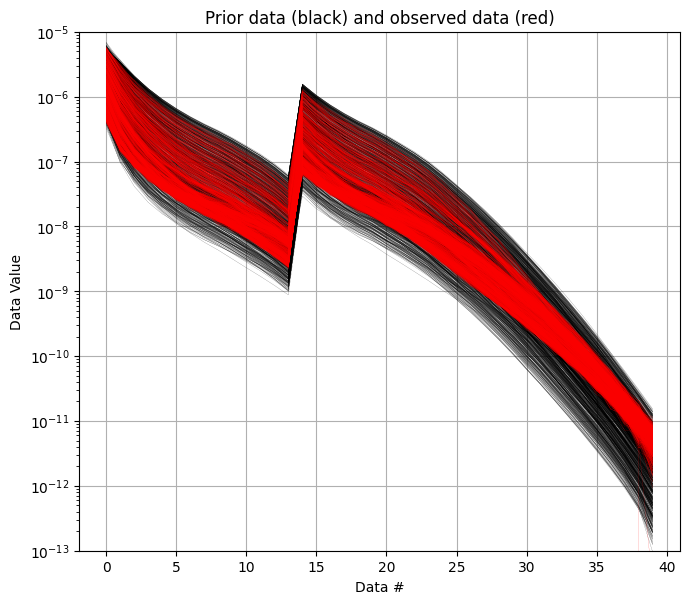

True

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex)

# plot prior and observed data to chech that the prior data span the same range as the observed data
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,alpha=1, ylim=[1e-13,1e-5], hardcopy=hardcopy) 

## Perform inversion

In [6]:
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, 
                                    parallel=parallel, 
                                    Ncpu=8,
                                    use_N_best=0
                                    )

rejection:   0%|                                               | 0/125 [00:00<?, ?it/s]

rejection:   0%|                                               | 0/125 [00:00<?, ?it/s]

rejection:   0%|                                               | 0/125 [00:00<?, ?it/s]

rejection:   0%|                                               | 0/125 [00:00<?, ?it/s]

rejection:   0%|                                               | 0/125 [00:00<?, ?it/s]

rejection:   0%|                                               | 0/125 [00:00<?, ?it/s]

rejection:   0%|                                               | 0/125 [00:00<?, ?it/s]

rejection:   0%|                                               | 0/125 [00:00<?, ?it/s]

rejection:   8%|███                                   | 10/125 [00:02<00:30,  3.73it/s]

rejection:   8%|███                                   | 10/125 [00:02<00:30,  3.72it/s]

rejection:   8%|███                                   | 10/125 [00:02<00:30,  3.74it/s]

rejection:   8%|███                                   | 10/125 [00:02<00:30,  3.75it/s]

rejection:   8%|███                                   | 10/125 [00:02<00:30,  3.76it/s]

rejection:   8%|███                                   | 10/125 [00:02<00:30,  3.72it/s]

rejection:   8%|███                                   | 10/125 [00:02<00:32,  3.57it/s]

rejection:  16%|██████                                | 20/125 [00:05<00:28,  3.73it/s]

rejection:  16%|██████                                | 20/125 [00:05<00:28,  3.74it/s]

rejection:  16%|██████                                | 20/125 [00:05<00:27,  3.76it/s]

rejection:  16%|██████                                | 20/125 [00:05<00:28,  3.74it/s]

rejection:  16%|██████                                | 20/125 [00:05<00:28,  3.74it/s]

rejection:  16%|██████                                | 20/125 [00:05<00:28,  3.72it/s]

rejection:  16%|██████                                | 20/125 [00:05<00:28,  3.65it/s]

rejection:   8%|███                                   | 10/125 [00:06<01:14,  1.55it/s]

rejection:  24%|█████████                             | 30/125 [00:08<00:25,  3.72it/s]

rejection:  24%|█████████                             | 30/125 [00:08<00:25,  3.72it/s]

rejection:  24%|█████████                             | 30/125 [00:08<00:25,  3.72it/s]

rejection:  24%|█████████                             | 30/125 [00:08<00:25,  3.71it/s]

rejection:  24%|█████████                             | 30/125 [00:08<00:25,  3.72it/s]

rejection:  24%|█████████                             | 30/125 [00:08<00:25,  3.69it/s]

rejection:  24%|█████████                             | 30/125 [00:08<00:29,  3.26it/s]

rejection:  16%|██████                                | 20/125 [00:09<00:47,  2.22it/s]

rejection:  32%|████████████▏                         | 40/125 [00:10<00:22,  3.72it/s]

rejection:  32%|████████████▏                         | 40/125 [00:10<00:22,  3.72it/s]

rejection:  32%|████████████▏                         | 40/125 [00:10<00:22,  3.72it/s]

rejection:  32%|████████████▏                         | 40/125 [00:10<00:22,  3.74it/s]

rejection:  32%|████████████▏                         | 40/125 [00:10<00:22,  3.70it/s]

rejection:  32%|████████████▏                         | 40/125 [00:10<00:22,  3.70it/s]

rejection:  24%|█████████                             | 30/125 [00:12<00:34,  2.72it/s]

rejection:  32%|████████████▏                         | 40/125 [00:13<00:29,  2.85it/s]

rejection:  40%|███████████████▏                      | 50/125 [00:13<00:20,  3.72it/s]

rejection:  40%|███████████████▏                      | 50/125 [00:13<00:20,  3.72it/s]

rejection:  40%|███████████████▏                      | 50/125 [00:13<00:20,  3.73it/s]

rejection:  40%|███████████████▏                      | 50/125 [00:13<00:20,  3.72it/s]

rejection:  40%|███████████████▏                      | 50/125 [00:13<00:20,  3.72it/s]

rejection:  32%|████████████▏                         | 40/125 [00:14<00:27,  3.04it/s]

rejection:  40%|███████████████▏                      | 50/125 [00:15<00:24,  3.12it/s]

rejection:  40%|███████████████▏                      | 50/125 [00:16<00:27,  2.75it/s]

rejection:  48%|██████████████████▏                   | 60/125 [00:16<00:17,  3.72it/s]

rejection:  48%|██████████████████▏                   | 60/125 [00:16<00:17,  3.71it/s]

rejection:  48%|██████████████████▏                   | 60/125 [00:16<00:17,  3.73it/s]

rejection:  48%|██████████████████▏                   | 60/125 [00:16<00:17,  3.72it/s]

rejection:  48%|██████████████████▏                   | 60/125 [00:16<00:17,  3.72it/s]

rejection:  40%|███████████████▏                      | 50/125 [00:17<00:22,  3.26it/s]

rejection:  48%|██████████████████▏                   | 60/125 [00:18<00:19,  3.30it/s]

rejection:  56%|█████████████████████▎                | 70/125 [00:18<00:14,  3.73it/s]

rejection:  56%|█████████████████████▎                | 70/125 [00:18<00:14,  3.72it/s]

rejection:  56%|█████████████████████▎                | 70/125 [00:18<00:14,  3.73it/s]

rejection:  48%|██████████████████▏                   | 60/125 [00:18<00:21,  2.96it/s]

rejection:  56%|█████████████████████▎                | 70/125 [00:18<00:14,  3.72it/s]

rejection:  48%|██████████████████▏                   | 60/125 [00:20<00:19,  3.40it/s]

rejection:  56%|█████████████████████▎                | 70/125 [00:20<00:17,  3.07it/s]

rejection:  56%|█████████████████████▎                | 70/125 [00:21<00:15,  3.44it/s]

rejection:  64%|████████████████████████▎             | 80/125 [00:21<00:12,  3.75it/s]

rejection:  64%|████████████████████████▎             | 80/125 [00:21<00:12,  3.73it/s]

rejection:  56%|█████████████████████▎                | 70/125 [00:21<00:17,  3.18it/s]

rejection:  64%|████████████████████████▎             | 80/125 [00:21<00:12,  3.73it/s]

rejection:  56%|█████████████████████▎                | 70/125 [00:23<00:15,  3.48it/s]

rejection:  64%|████████████████████████▎             | 80/125 [00:23<00:14,  3.07it/s]

rejection:  64%|████████████████████████▎             | 80/125 [00:23<00:13,  3.24it/s]

rejection:  64%|████████████████████████▎             | 80/125 [00:23<00:12,  3.49it/s]

rejection:  72%|███████████████████████████▎          | 90/125 [00:24<00:09,  3.72it/s]

rejection:  64%|████████████████████████▎             | 80/125 [00:24<00:13,  3.31it/s]

rejection:  72%|███████████████████████████▎          | 90/125 [00:24<00:09,  3.70it/s]

rejection:  72%|███████████████████████████▎          | 90/125 [00:25<00:10,  3.33it/s]

rejection:  64%|████████████████████████▎             | 80/125 [00:25<00:12,  3.52it/s]

rejection:  72%|███████████████████████████▎          | 90/125 [00:25<00:10,  3.25it/s]

rejection:  72%|███████████████████████████▎          | 90/125 [00:26<00:10,  3.29it/s]

rejection:  72%|███████████████████████████▎          | 90/125 [00:26<00:09,  3.57it/s]

rejection:  80%|█████████████████████████████▌       | 100/125 [00:26<00:06,  3.73it/s]

rejection:  72%|███████████████████████████▎          | 90/125 [00:27<00:10,  3.42it/s]

rejection:  80%|█████████████████████████████▌       | 100/125 [00:26<00:06,  3.71it/s]

rejection:  80%|█████████████████████████████▌       | 100/125 [00:28<00:07,  3.36it/s]

rejection:  80%|█████████████████████████████▌       | 100/125 [00:28<00:07,  3.37it/s]

rejection:  72%|███████████████████████████▎          | 90/125 [00:28<00:09,  3.55it/s]

rejection:  80%|█████████████████████████████▌       | 100/125 [00:29<00:06,  3.59it/s]

rejection:  88%|████████████████████████████████▌    | 110/125 [00:29<00:04,  3.70it/s]

rejection:  88%|████████████████████████████████▌    | 110/125 [00:29<00:04,  3.67it/s]

rejection:  80%|█████████████████████████████▌       | 100/125 [00:29<00:07,  3.47it/s]

rejection:  80%|█████████████████████████████▌       | 100/125 [00:30<00:08,  3.03it/s]

rejection:  88%|████████████████████████████████▌    | 110/125 [00:30<00:04,  3.40it/s]

rejection:  88%|████████████████████████████████▌    | 110/125 [00:31<00:04,  3.43it/s]

rejection:  80%|█████████████████████████████▌       | 100/125 [00:31<00:07,  3.56it/s]

rejection:  88%|████████████████████████████████▌    | 110/125 [00:32<00:04,  3.60it/s]

rejection:  88%|████████████████████████████████▌    | 110/125 [00:32<00:04,  3.53it/s]

rejection:  96%|███████████████████████████████████▌ | 120/125 [00:32<00:01,  3.66it/s]

rejection:  88%|████████████████████████████████▌    | 110/125 [00:32<00:04,  3.18it/s]

rejection:  96%|███████████████████████████████████▌ | 120/125 [00:33<00:01,  3.49it/s]

rejection:  96%|███████████████████████████████████▌ | 120/125 [00:34<00:01,  3.52it/s]

rejection:  88%|████████████████████████████████▌    | 110/125 [00:34<00:04,  3.60it/s]

rejection:  96%|███████████████████████████████████▌ | 120/125 [00:34<00:01,  3.66it/s]

rejection:  96%|███████████████████████████████████▌ | 120/125 [00:34<00:01,  2.84it/s]

rejection:  96%|███████████████████████████████████▌ | 120/125 [00:35<00:01,  3.62it/s]

rejection:  96%|███████████████████████████████████▌ | 120/125 [00:35<00:01,  3.39it/s]

rejection:  96%|███████████████████████████████████▌ | 120/125 [00:36<00:01,  3.86it/s]

integrate_rejection: Time= 37.1s/1000 soundings, 37.1ms/sounding, 26.9it/s. T_av=5.7, EV_av=-34.7


poststat:   0%|                                               | 0/1000 [00:00<?, ?it/s]

poststat:   0%|                                               | 0/1000 [00:00<?, ?it/s]

poststat:   0%|                                               | 0/1000 [00:00<?, ?it/s]

Plot profile for all model parameters


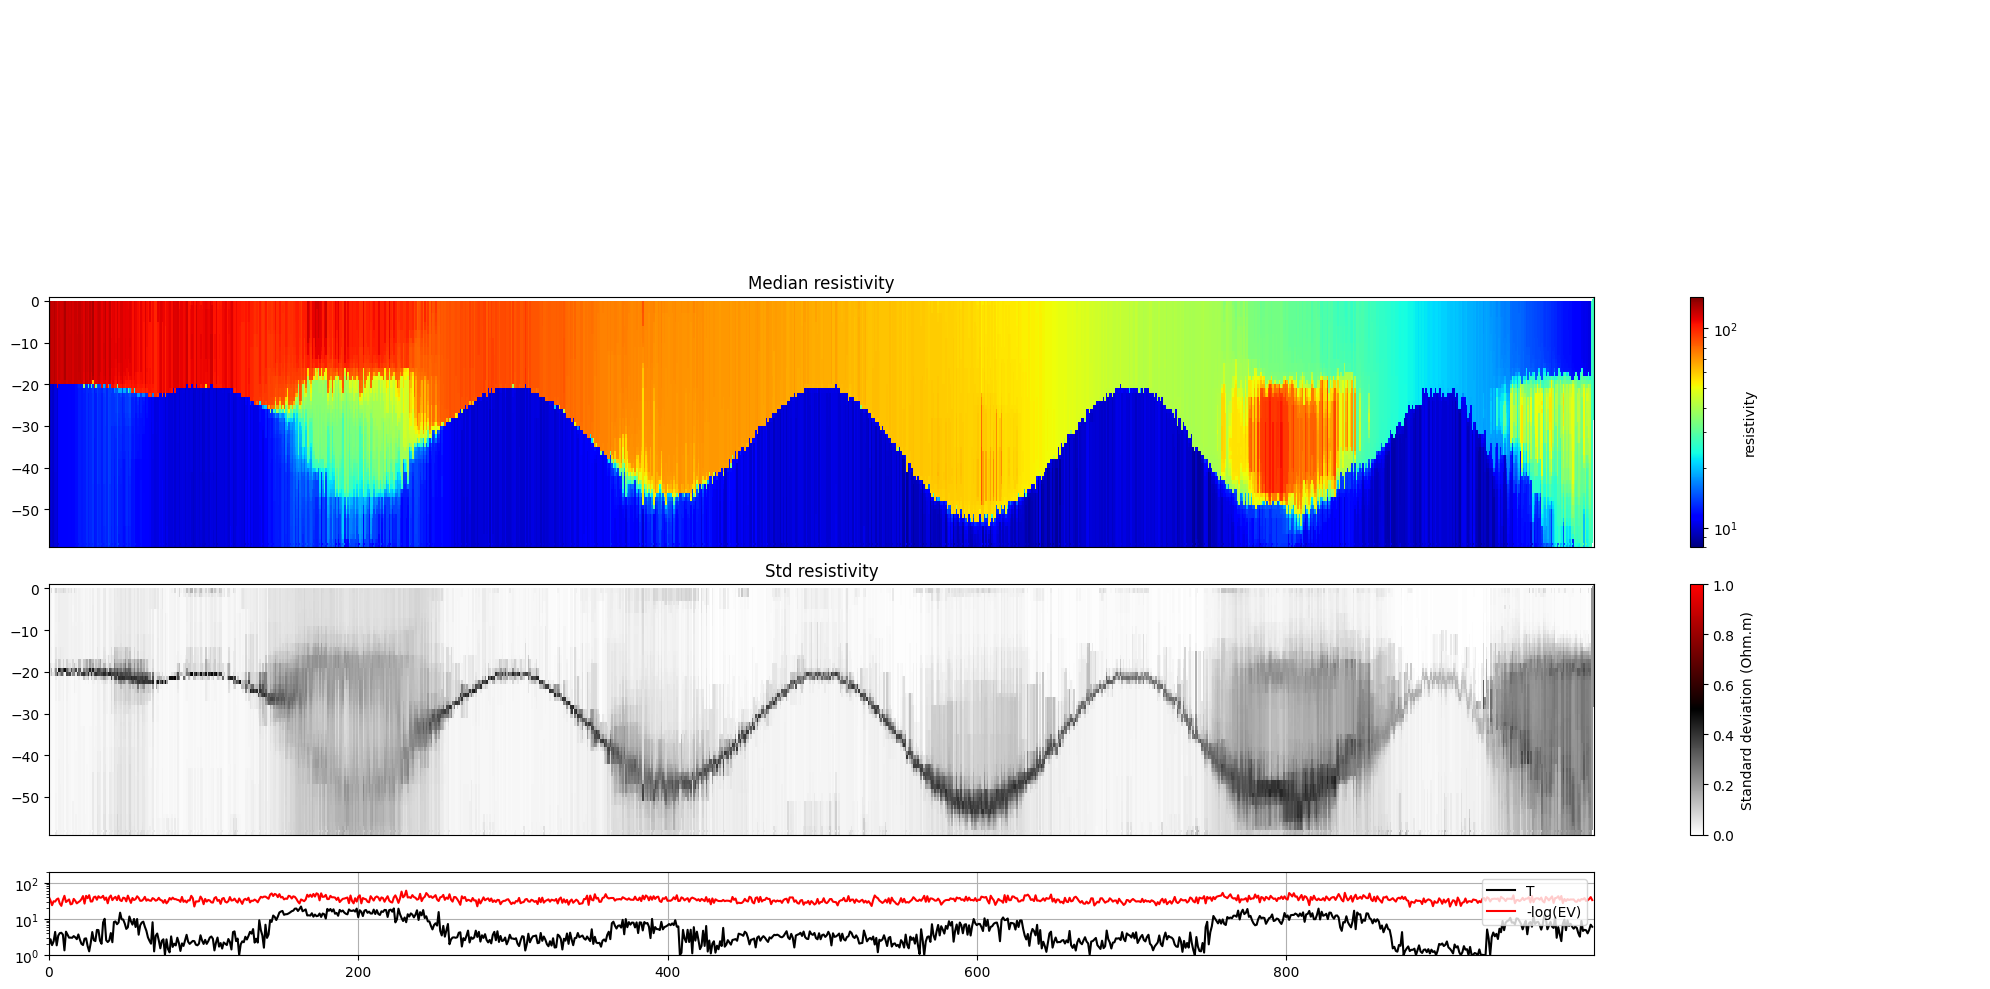

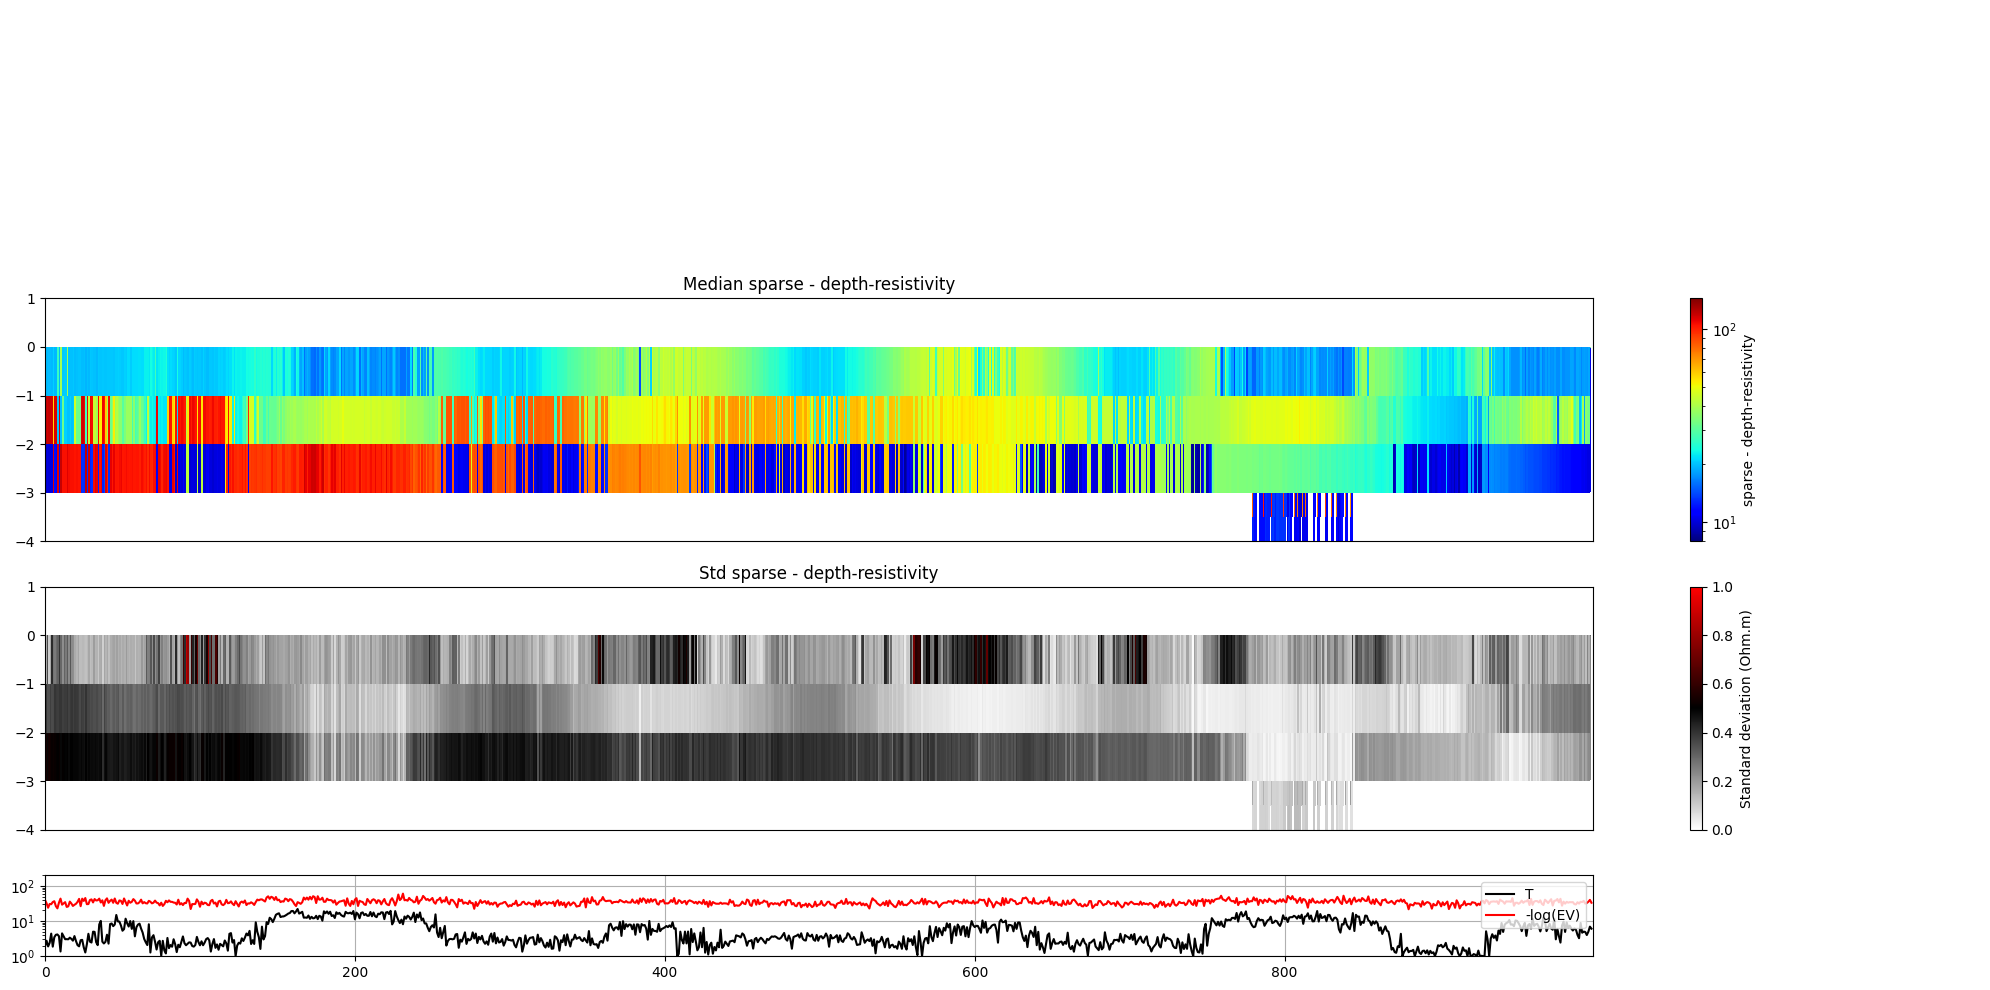

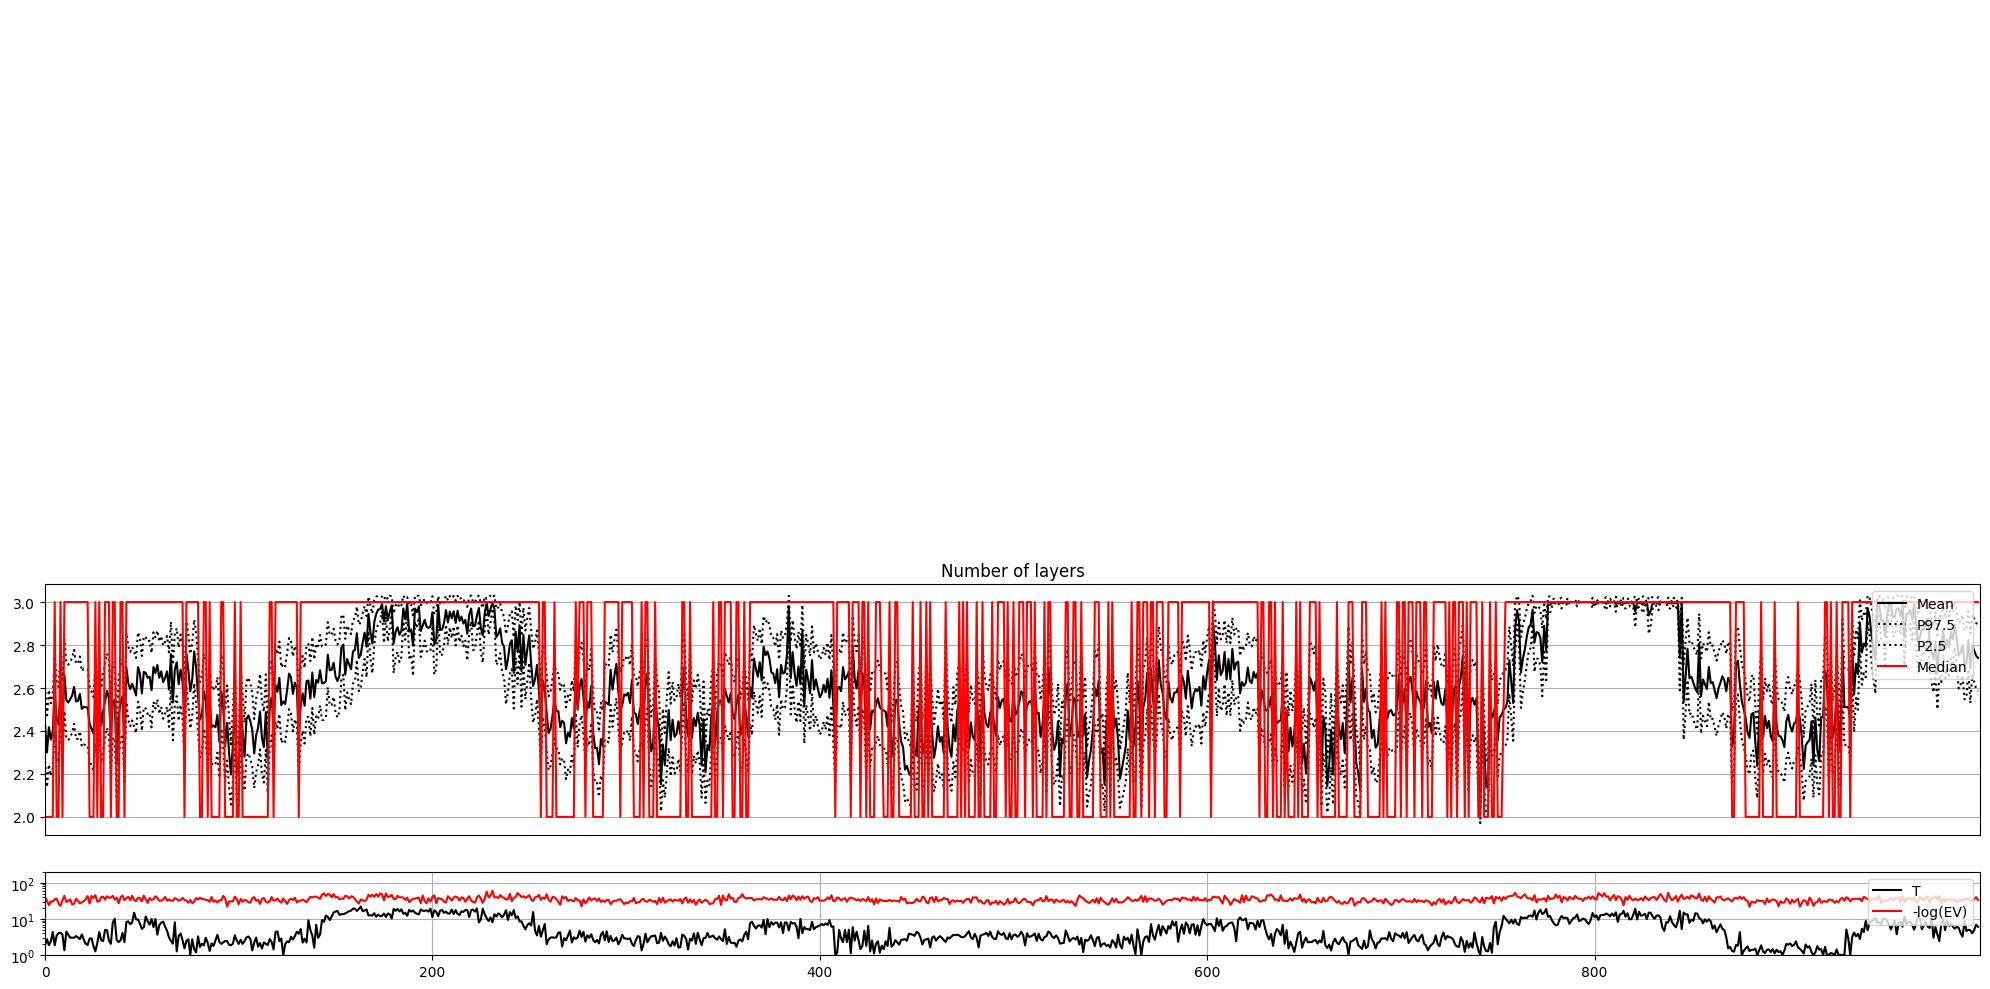

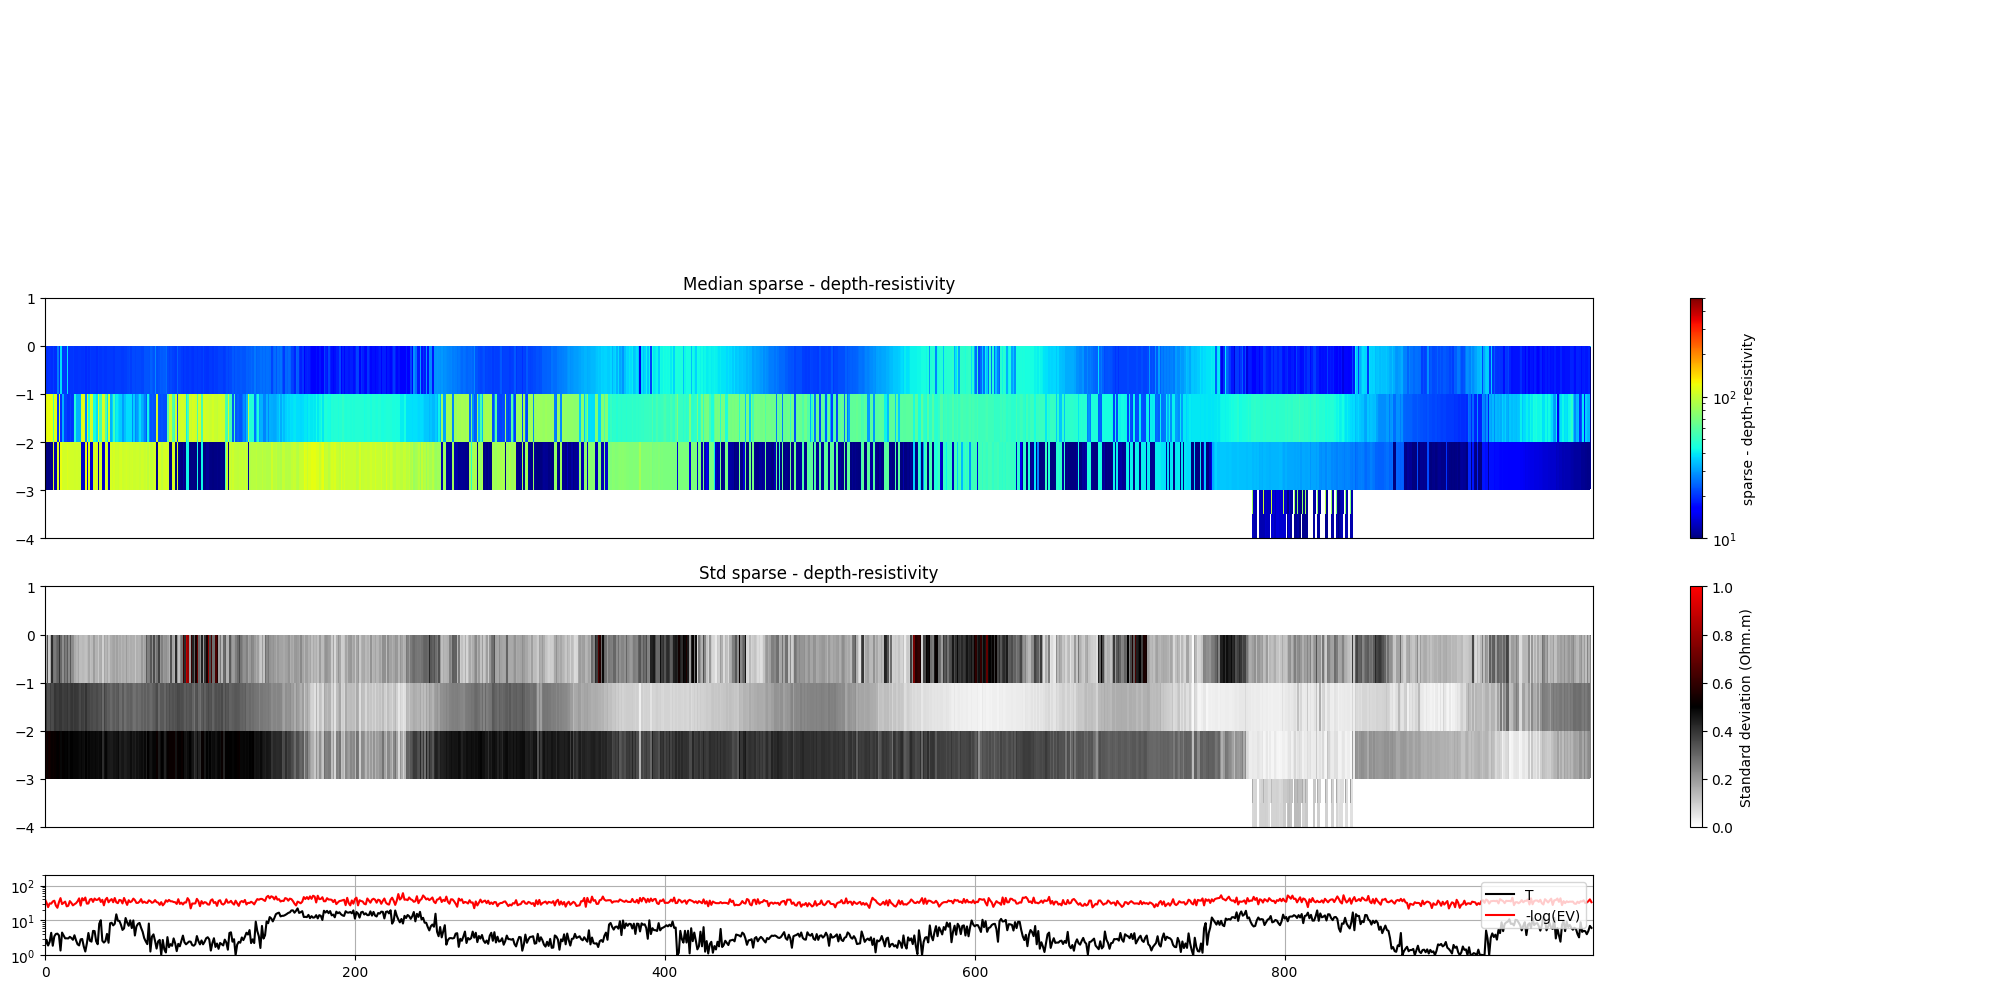

In [7]:
clim = [0.8*min(rho), 1.2*max(rho)]
ig.plot_profile(f_post_h5, i1=0, i2=1000, hardcopy=hardcopy,  clim = clim)
ig.plot_profile(f_post_h5, i1=0, i2=1000, hardcopy=hardcopy,  im=2)

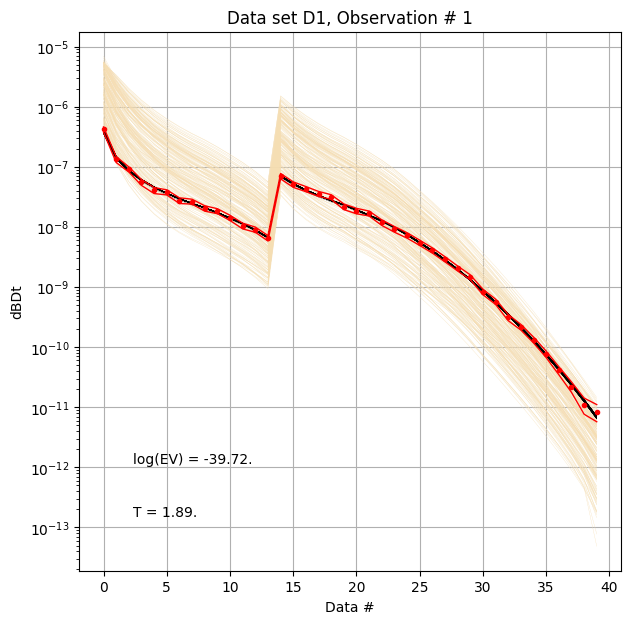

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)

## Compare reference model to posterior median

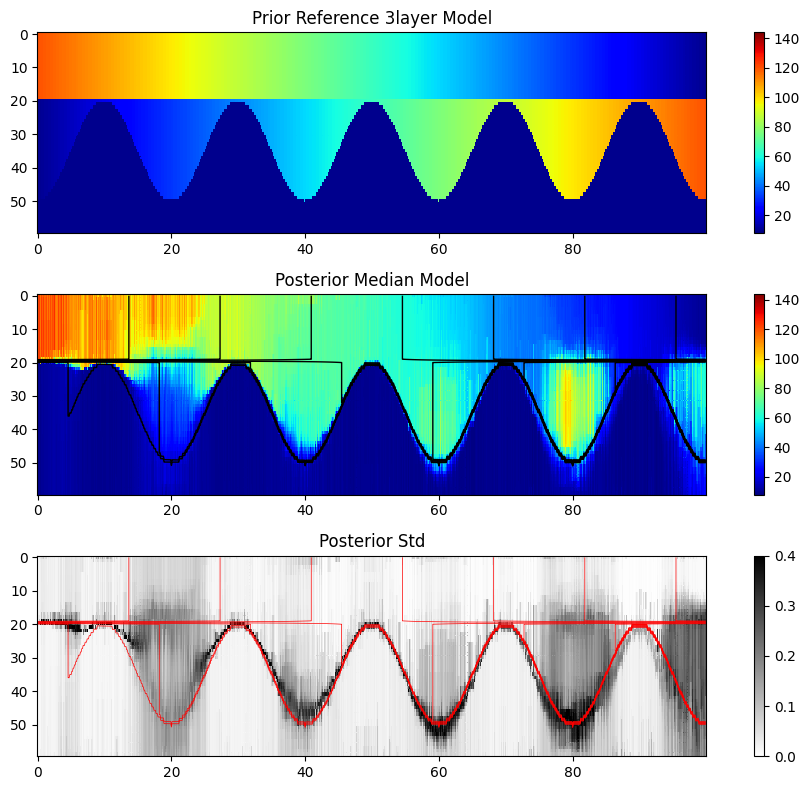

In [9]:
# Read 'M1/Median' from f_post_h5
with h5py.File(f_post_h5, 'r') as f_post:
    M_median = f_post['/M1/Median'][:]
    M_mean = f_post['/M1/Mean'][:]
    M_std = f_post['/M1/Std'][:]

with h5py.File(f_prior_h5,'r') as f_prior:
    # REad 'x' feature from f_prior
    z =  f_prior['/M1'].attrs['x']

xx, zz = np.meshgrid(x_ref, z)

# Make a figure with two subplots, each with plt.pcolor(xx,zz,M_median.T) and, plt.pcolor(xx_ref,zz_ref,M_ref.T), and use the same colorbar and x.axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

clim = [0.8*min(rho), 1.2*max(rho)]
# Fisrt subplot - ref model
c1 = ax1.pcolor(xx_ref, zz_ref, M_ref.T, clim=clim, cmap='jet')
ax1.invert_yaxis()
#ax1.axis('equal')
fig.colorbar(c1, ax=ax1)
ax1.set_title('Prior Reference %s Model' % case)

# Second subplot - Median
c2 = ax2.pcolor(xx, zz, M_mean.T, clim=clim, cmap='jet')
ax2.invert_yaxis()
#ax2.axis('equal')
fig.colorbar(c2, ax=ax2)
ax2.set_title('Posterior Median Model')
# add a contour plot of xx_ref, zz_ref, M_ref.T on top of current figure
ax2.contour(xx_ref, zz_ref, M_ref.T, colors='k', linewidths=1)

# Third subplot - Std
c3 = ax3.pcolor(xx, zz, M_std.T, clim=[0,0.4], cmap='gray_r')
ax3.invert_yaxis()
#ax3.axis('equal')
fig.colorbar(c3, ax=ax3)
ax3.set_title('Posterior Std')
# add a contour plot of xx_ref, zz_ref, M_ref.T on top of current figure
ax3.contour(xx_ref, zz_ref, M_ref.T, colors='r', linewidths=.5)

# change aspect ratio of the figure to 2:1
ax1.set_aspect(.5)
ax2.set_aspect(.5)
ax3.set_aspect(.5)

plt.tight_layout()
plt.savefig('Synthetic_%s_%s_z%d_rho%d-%d-%d_Nlay%d-%d_N%d' % (case.upper(),RHO_dist,z_max, rho[0],rho[1],rho[2],NLAY_min, NLAY_max,N))
plt.show()